**Balancing**

In [ ]:
X = data.drop('label',axis=1)
y = data['label']

n=[]
c=[]
for j,i in enumerate(data['label']):
    if i==0:
        n.append(j)
    else:
        c.append(j)


**Considering Only Open COVID Cases**

In [ ]:
OpenCovid=[]
for j,i in enumerate(data['label']):
    if data['OpenClose'].iloc[j]=="Open" and i == 1:
        OpenCovid.append(data['index'].iloc[j])

print(len(OpenCovid),'Open Covid out of',len(data))

8774 Open Covid out of 63849


In [ ]:
len(OpenCovid)

8774

In [ ]:
CovidOpen = data.iloc[OpenCovid]
X_normal = data.drop('label',axis=1).iloc[n]
y_normal = data['label'].iloc[n]
X_normal = X_normal.sample(len(OpenCovid),random_state=1)
y_normal = y_normal.sample(len(OpenCovid),random_state=1)

X_covid  = CovidOpen.drop('label',axis=1)
y_covid  = CovidOpen['label']

X=X_normal.append(X_covid)
y=y_normal.append(y_covid)
X=X.sample(frac=1)
y=y.sample(frac=1)


X_train, X_test, y_train, y_test     = train_test_split(X, y, test_size=0.2, random_state=42 , stratify = y)
X_train, X_val, y_train, y_val       = train_test_split(X_train, y_train, test_size=0.25, random_state=42,stratify = y_train)

print("Input : ",len(X))
print(" Normal : ",y.value_counts()[0])
print(" Covid  : ",y.value_counts()[1])
print("1   Train  : ",len(X_train))
print("     Normal: ",y_train.value_counts()[0])
print("     Covid : ",y_train.value_counts()[1])
print("2   Test   : ",len(X_test))
print("     Normal: ",y_test.value_counts()[0])
print("     Covid : ",y_test.value_counts()[1])
print("3   Valid. : ",len(X_val))
print("     Normal: ",y_val.value_counts()[0])
print("     Covid : ",y_val.value_counts()[1])

Input :  17548
 Normal :  8774
 Covid  :  8774
1   Train  :  10528
     Normal:  5264
     Covid :  5264
2   Test   :  3510
     Normal:  1755
     Covid :  1755
3   Valid. :  3510
     Normal:  1755
     Covid :  1755


In [ ]:
def load(primary_keys):
    datas=[]
    for key in tqdm(primary_keys):
        key = int(key)
        if data['OpenClose'][key]=='Open':
            try:
                img = Image.open(data['loc'][key])       
                npar= np.array(img)
                res = cv2.resize(npar,(224, 224), interpolation = cv2.INTER_CUBIC)
                datas.append([res, data['label'][key]])
            except Exception as e:
                print(e)
        else:
            print("Closed?",data['index'][key])
    return np.array(datas)

In [ ]:
X_train.head()

,index,loc,OpenClose
39254,39254,/content/drive/MyDrive/AllTiff/COVID-CTset/cov...,Open
44843,44843,/content/drive/MyDrive/AllTiff/COVID-CTset/cov...,Open
44915,44915,/content/drive/MyDrive/AllTiff/COVID-CTset/cov...,Open
46364,46364,/content/drive/MyDrive/AllTiff/COVID-CTset/cov...,Open
41610,41610,/content/drive/MyDrive/AllTiff/COVID-CTset/cov...,Open


In [ ]:
print(len(X_train))
print(len(X_val))
print(len(X_test))

10528
3510
3510


In [ ]:
#TIME CONSUMING

X_train_mini = X_train#[:1000] #X_train.sample(frac=.65)
X_val_mini   = X_val#[:200] 
X_test_mini  = X_test#[:200] 
train = load(list((X_train_mini['index'])))
valid = load(list(X_val_mini['index']))
test  = load(list(X_test_mini['index']))



  0%|          | 0/10528 [00:00<?, ?it/s]

  0%|          | 9/10528 [00:00<02:00, 87.23it/s]

  0%|          | 17/10528 [00:00<02:07, 82.19it/s]

Closed? 18839




  0%|          | 24/10528 [00:00<02:16, 77.05it/s]

  0%|          | 32/10528 [00:00<02:19, 75.45it/s]

  0%|          | 40/10528 [00:00<02:20, 74.58it/s]

  0%|          | 48/10528 [00:00<02:20, 74.37it/s]

  1%|          | 56/10528 [00:00<02:21, 73.99it/s]

  1%|          | 66/10528 [00:00<02:12, 78.82it/s]

Closed? 18682
Closed? 28090
Closed? 34803




  1%|          | 75/10528 [00:00<02:11, 79.76it/s]

  1%|          | 84/10528 [00:01<02:09, 80.66it/s]

  1%|          | 93/10528 [00:01<02:07, 81.62it/s]

Closed? 23600
Closed? 57325
Closed? 35395




  1%|          | 104/10528 [00:01<02:01, 86.06it/s]

  1%|          | 114/10528 [00:01<01:59, 87.19it/s]

Closed? 52746
Closed? 31879
Closed? 35019
Closed? 12598




  1%|          | 125/10528 [00:01<01:55, 90.21it/s]

Closed? 36018
Closed? 10572
Closed? 12211




  1%|▏         | 135/10528 [00:01<02:04, 83.20it/s]

  1%|▏         | 148/10528 [00:01<01:54, 90.97it/s]

  2%|▏         | 159/10528 [00:01<01:50, 94.10it/s]

Closed? 5954
Closed? 819
Closed? 14376
Closed? 13294
Closed? 28487
Closed? 60297
Closed? 63540
Closed? 24292




  2%|▏         | 170/10528 [00:01<01:48, 95.84it/s]

  2%|▏         | 180/10528 [00:02<01:53, 91.57it/s]

Closed? 3298
Closed? 55740
Closed? 34988
Closed? 53802
Closed? 27227




  2%|▏         | 190/10528 [00:02<01:52, 91.94it/s]

  2%|▏         | 202/10528 [00:02<01:46, 96.77it/s]

Closed? 8804
Closed? 16891
Closed? 59712
Closed? 20081
Closed? 36649




  2%|▏         | 212/10528 [00:02<01:57, 88.07it/s]

  2%|▏         | 222/10528 [00:02<02:00, 85.42it/s]

  2%|▏         | 234/10528 [00:02<01:52, 91.14it/s]

Closed? 18045
Closed? 22904
Closed? 30426
Closed? 35908
Closed? 24012




  2%|▏         | 244/10528 [00:02<02:00, 85.52it/s]

  2%|▏         | 254/10528 [00:02<01:57, 87.51it/s]

Closed? 5153
Closed? 11894
Closed? 63055




  2%|▏         | 263/10528 [00:03<01:59, 85.88it/s]

  3%|▎         | 273/10528 [00:03<01:56, 88.08it/s]

  3%|▎         | 283/10528 [00:03<01:55, 88.75it/s]

Closed? 18453
Closed? 63535
Closed? 55008
Closed? 54868




  3%|▎         | 292/10528 [00:03<01:57, 86.81it/s]

  3%|▎         | 301/10528 [00:03<02:00, 84.65it/s]

Closed? 36694
Closed? 55828




  3%|▎         | 310/10528 [00:03<02:06, 80.93it/s]

  3%|▎         | 319/10528 [00:03<02:07, 80.35it/s]

  3%|▎         | 328/10528 [00:03<02:10, 77.88it/s]

Closed? 33264
Closed? 19403
Closed? 22163




  3%|▎         | 338/10528 [00:03<02:06, 80.67it/s]

  3%|▎         | 347/10528 [00:04<02:05, 81.17it/s]

  3%|▎         | 356/10528 [00:04<02:04, 81.70it/s]

Closed? 3725
Closed? 1230




  3%|▎         | 367/10528 [00:04<01:57, 86.40it/s]

  4%|▎         | 377/10528 [00:04<01:56, 87.48it/s]

Closed? 31942
Closed? 29110
Closed? 27433
Closed? 30675
Closed? 14673
Closed? 21296




  4%|▎         | 386/10528 [00:04<01:55, 87.76it/s]

  4%|▍         | 397/10528 [00:04<01:50, 91.40it/s]

Closed? 11204
Closed? 56607
Closed? 6013
Closed? 32149
Closed? 4497




  4%|▍         | 407/10528 [00:04<01:55, 88.01it/s]

  4%|▍         | 422/10528 [00:04<01:43, 98.06it/s]



Closed? 63681
Closed? 3857
Closed? 59142
Closed? 17350
Closed? 22607
Closed? 54251
Closed? 63054
Closed? 52634
Closed? 2842


  4%|▍         | 433/10528 [00:04<01:44, 96.20it/s]

  4%|▍         | 443/10528 [00:05<01:50, 90.93it/s]

  4%|▍         | 455/10528 [00:05<01:44, 96.41it/s]

Closed? 58528
Closed? 23097
Closed? 52904
Closed? 15806
Closed? 23459




  4%|▍         | 466/10528 [00:05<01:43, 96.87it/s]



Closed? 36097
Closed? 26699
Closed? 54861
Closed? 58553


  5%|▍         | 476/10528 [00:05<01:48, 92.45it/s]

  5%|▍         | 487/10528 [00:05<01:45, 95.29it/s]

  5%|▍         | 498/10528 [00:05<01:43, 96.57it/s]

Closed? 503
Closed? 62390
Closed? 14674
Closed? 20190
Closed? 52600
Closed? 20983




  5%|▍         | 508/10528 [00:05<01:54, 87.45it/s]

  5%|▍         | 517/10528 [00:05<02:02, 82.03it/s]

  5%|▌         | 527/10528 [00:06<01:58, 84.31it/s]

  5%|▌         | 537/10528 [00:06<01:54, 87.04it/s]

Closed? 55720
Closed? 17177
Closed? 63627
Closed? 29586
Closed? 9174




  5%|▌         | 547/10528 [00:06<01:53, 87.95it/s]

  5%|▌         | 556/10528 [00:06<01:55, 86.39it/s]

Closed? 14658
Closed? 60630




  5%|▌         | 565/10528 [00:06<01:56, 85.74it/s]

  5%|▌         | 574/10528 [00:06<02:00, 82.28it/s]

Closed? 26471




  6%|▌         | 583/10528 [00:06<02:06, 78.78it/s]

  6%|▌         | 592/10528 [00:06<02:04, 79.88it/s]

  6%|▌         | 601/10528 [00:06<02:03, 80.43it/s]

Closed? 20977
Closed? 62629




  6%|▌         | 610/10528 [00:07<02:03, 80.47it/s]

  6%|▌         | 621/10528 [00:07<01:56, 84.97it/s]

Closed? 53530
Closed? 25870
Closed? 9311
Closed? 34000




  6%|▌         | 630/10528 [00:07<01:56, 84.73it/s]

Closed? 18165
Closed? 28578
Closed? 7000




  6%|▌         | 639/10528 [00:07<02:01, 81.32it/s]

  6%|▌         | 648/10528 [00:07<02:00, 82.26it/s]

  6%|▋         | 658/10528 [00:07<01:58, 83.56it/s]

Closed? 25797
Closed? 21286
Closed? 32194
Closed? 34056
Closed? 33721




  6%|▋         | 670/10528 [00:07<01:50, 89.37it/s]

Closed? 21656
Closed? 9584
Closed? 53270




  6%|▋         | 680/10528 [00:07<01:57, 83.55it/s]

  7%|▋         | 689/10528 [00:07<02:01, 81.09it/s]

  7%|▋         | 698/10528 [00:08<01:57, 83.43it/s]

  7%|▋         | 707/10528 [00:08<01:58, 82.80it/s]

Closed? 36170
Closed? 30244
Closed? 61416




  7%|▋         | 716/10528 [00:08<02:01, 80.48it/s]

  7%|▋         | 728/10528 [00:08<01:52, 87.16it/s]



Closed? 22208
Closed? 14656
Closed? 14411
Closed? 54262
Closed? 21714
Closed? 21055


  7%|▋         | 738/10528 [00:08<01:51, 88.16it/s]

  7%|▋         | 747/10528 [00:08<01:53, 86.26it/s]

  7%|▋         | 756/10528 [00:08<01:54, 85.53it/s]

Closed? 28618
Closed? 23563
Closed? 18640
Closed? 55758
Closed? 22916




  7%|▋         | 768/10528 [00:08<01:46, 92.06it/s]

  7%|▋         | 778/10528 [00:08<01:49, 89.27it/s]

Closed? 10014
Closed? 35980
Closed? 6772
Closed? 53307
Closed? 62166




  7%|▋         | 789/10528 [00:09<01:45, 92.25it/s]

  8%|▊         | 799/10528 [00:09<01:45, 91.99it/s]

Closed? 63098
Closed? 32874
Closed? 33310
Closed? 7128




  8%|▊         | 809/10528 [00:09<01:45, 91.70it/s]

  8%|▊         | 819/10528 [00:09<01:45, 92.04it/s]

  8%|▊         | 829/10528 [00:09<01:46, 91.26it/s]

Closed? 26709
Closed? 3050
Closed? 1202
Closed? 24348




  8%|▊         | 839/10528 [00:09<01:50, 87.60it/s]

  8%|▊         | 848/10528 [00:09<01:51, 86.62it/s]

Closed? 16828
Closed? 22246




  8%|▊         | 857/10528 [00:09<01:57, 82.21it/s]

  8%|▊         | 866/10528 [00:09<02:00, 80.11it/s]

  8%|▊         | 876/10528 [00:10<01:54, 84.23it/s]

Closed? 32995
Closed? 27289
Closed? 63772
Closed? 15137
Closed? 29963




  8%|▊         | 887/10528 [00:10<01:48, 88.98it/s]

  9%|▊         | 897/10528 [00:10<01:50, 86.86it/s]

  9%|▊         | 906/10528 [00:10<01:52, 85.45it/s]

Closed? 14853
Closed? 9603
Closed? 55055
Closed? 22935
Closed? 10261




  9%|▊         | 918/10528 [00:10<01:43, 93.17it/s]

  9%|▉         | 929/10528 [00:10<01:38, 97.50it/s]

Closed? 23960
Closed? 8004
Closed? 15088
Closed? 5467
Closed? 63473
Closed? 61311




  9%|▉         | 939/10528 [00:10<01:43, 92.45it/s]

  9%|▉         | 949/10528 [00:10<01:47, 88.88it/s]

Closed? 34806
Closed? 33720
Closed? 54465




  9%|▉         | 961/10528 [00:10<01:42, 93.78it/s]

  9%|▉         | 971/10528 [00:11<01:42, 93.63it/s]

Closed? 23915
Closed? 34989
Closed? 15992
Closed? 24471
Closed? 57085




  9%|▉         | 981/10528 [00:11<01:49, 86.93it/s]

  9%|▉         | 990/10528 [00:11<01:51, 85.18it/s]

  9%|▉         | 1000/10528 [00:11<01:50, 86.39it/s]

Closed? 7456
Closed? 22987
Closed? 61150




 10%|▉         | 1014/10528 [00:11<01:39, 95.30it/s]

 10%|▉         | 1024/10528 [00:11<01:41, 93.61it/s]

Closed? 788
Closed? 33100
Closed? 3707
Closed? 15407
Closed? 2886
Closed? 26261
Closed? 3176
Closed? 24417




 10%|▉         | 1034/10528 [00:11<01:49, 86.73it/s]

 10%|▉         | 1045/10528 [00:11<01:45, 89.46it/s]

 10%|█         | 1055/10528 [00:12<01:47, 88.37it/s]

Closed? 60028
Closed? 16913
Closed? 61627
Closed? 62160
Closed? 541
Closed? 26707




 10%|█         | 1065/10528 [00:12<01:45, 89.51it/s]

 10%|█         | 1075/10528 [00:12<01:44, 90.29it/s]

Closed? 29878
Closed? 33533
Closed? 14643




 10%|█         | 1085/10528 [00:12<01:48, 86.77it/s]

 10%|█         | 1097/10528 [00:12<01:41, 92.70it/s]

Closed? 33738
Closed? 6414
Closed? 29869
Closed? 56545
Closed? 21291
Closed? 21886




 11%|█         | 1107/10528 [00:12<01:42, 92.16it/s]

 11%|█         | 1117/10528 [00:12<01:49, 85.89it/s]

 11%|█         | 1126/10528 [00:12<01:54, 81.78it/s]

 11%|█         | 1135/10528 [00:12<01:55, 81.62it/s]

Closed? 18463
Closed? 62525




 11%|█         | 1144/10528 [00:13<01:53, 82.41it/s]

 11%|█         | 1155/10528 [00:13<01:47, 87.29it/s]

 11%|█         | 1165/10528 [00:13<01:46, 88.14it/s]

Closed? 2195
Closed? 14572
Closed? 19415
Closed? 57504
Closed? 6690
Closed? 23449




 11%|█         | 1174/10528 [00:13<01:47, 86.89it/s]

 11%|█         | 1183/10528 [00:13<01:50, 84.60it/s]

Closed? 13061
Closed? 10944
Closed? 17413
Closed? 30102
Closed? 1281




 11%|█▏        | 1196/10528 [00:13<01:40, 92.57it/s]

 11%|█▏        | 1206/10528 [00:13<01:45, 88.46it/s]

Closed? 54523
Closed? 21079
Closed? 19685




 12%|█▏        | 1216/10528 [00:13<01:47, 86.33it/s]

 12%|█▏        | 1228/10528 [00:13<01:40, 92.32it/s]

 12%|█▏        | 1238/10528 [00:14<01:40, 92.81it/s]

Closed? 31156
Closed? 5554
Closed? 33320
Closed? 61073
Closed? 13566
Closed? 28110




 12%|█▏        | 1248/10528 [00:14<01:44, 88.94it/s]

 12%|█▏        | 1258/10528 [00:14<01:46, 87.33it/s]

Closed? 59147
Closed? 13784




 12%|█▏        | 1267/10528 [00:14<01:47, 85.86it/s]

 12%|█▏        | 1276/10528 [00:14<01:52, 82.23it/s]

Closed? 7859




 12%|█▏        | 1285/10528 [00:14<01:52, 81.81it/s]

 12%|█▏        | 1294/10528 [00:14<01:52, 82.34it/s]

Closed? 23230
Closed? 61074




 12%|█▏        | 1304/10528 [00:14<01:49, 84.56it/s]

 12%|█▏        | 1315/10528 [00:14<01:42, 89.58it/s]

Closed? 28703
Closed? 54298
Closed? 59372
Closed? 19163
Closed? 10055




 13%|█▎        | 1325/10528 [00:15<01:42, 89.51it/s]



Closed? 616
Closed? 23051
Closed? 54032


 13%|█▎        | 1335/10528 [00:15<01:44, 87.59it/s]

 13%|█▎        | 1345/10528 [00:15<01:41, 90.88it/s]

Closed? 11046
Closed? 58325
Closed? 63413
Closed? 24634
Closed? 1941
Closed? 32109
Closed? 2
Closed? 35431




 13%|█▎        | 1358/10528 [00:15<01:34, 97.32it/s]

 13%|█▎        | 1368/10528 [00:15<01:37, 94.35it/s]

 13%|█▎        | 1378/10528 [00:15<01:38, 92.93it/s]

Closed? 19823
Closed? 29720
Closed? 405
Closed? 32016




 13%|█▎        | 1388/10528 [00:15<01:38, 92.79it/s]

 13%|█▎        | 1398/10528 [00:15<01:44, 87.08it/s]

Closed? 52669
Closed? 8811




 13%|█▎        | 1408/10528 [00:16<01:43, 88.05it/s]

 13%|█▎        | 1418/10528 [00:16<01:42, 88.92it/s]

Closed? 21898
Closed? 21486
Closed? 23797
Closed? 54300




 14%|█▎        | 1427/10528 [00:16<01:43, 87.77it/s]

 14%|█▎        | 1437/10528 [00:16<01:41, 89.16it/s]

Closed? 7943
Closed? 25822
Closed? 63385
Closed? 32728
Closed? 871




 14%|█▎        | 1447/10528 [00:16<01:41, 89.68it/s]

 14%|█▍        | 1456/10528 [00:16<01:46, 85.20it/s]

 14%|█▍        | 1465/10528 [00:16<01:51, 81.18it/s]

 14%|█▍        | 1475/10528 [00:16<01:47, 83.99it/s]

 14%|█▍        | 1484/10528 [00:16<01:47, 83.82it/s]

Closed? 15564
Closed? 12532
Closed? 59703
Closed? 7194




 14%|█▍        | 1493/10528 [00:17<01:48, 83.54it/s]

 14%|█▍        | 1502/10528 [00:17<01:49, 82.12it/s]

 14%|█▍        | 1511/10528 [00:17<01:48, 82.93it/s]

Closed? 30735
Closed? 61361
Closed? 32832
Closed? 58976




 14%|█▍        | 1521/10528 [00:17<01:44, 86.09it/s]

 15%|█▍        | 1530/10528 [00:17<01:48, 82.90it/s]

 15%|█▍        | 1542/10528 [00:17<01:40, 89.50it/s]

Closed? 35520
Closed? 59027
Closed? 7599
Closed? 34471
Closed? 33649
Closed? 31984




 15%|█▍        | 1552/10528 [00:17<01:39, 90.08it/s]

 15%|█▍        | 1562/10528 [00:17<01:38, 90.96it/s]

 15%|█▍        | 1575/10528 [00:17<01:31, 97.49it/s]

Closed? 8165
Closed? 31290
Closed? 54104
Closed? 12935
Closed? 55512
Closed? 15626
Closed? 15275




 15%|█▌        | 1585/10528 [00:18<01:33, 95.80it/s]

 15%|█▌        | 1595/10528 [00:18<01:40, 88.57it/s]

Closed? 36386
Closed? 30503
Closed? 23581




 15%|█▌        | 1605/10528 [00:18<01:44, 85.17it/s]

 15%|█▌        | 1614/10528 [00:18<01:44, 84.91it/s]

 15%|█▌        | 1623/10528 [00:18<01:44, 84.92it/s]

Closed? 6770
Closed? 61771
Closed? 32500
Closed? 16051




 16%|█▌        | 1634/10528 [00:18<01:40, 88.77it/s]

 16%|█▌        | 1644/10528 [00:18<01:38, 90.21it/s]

Closed? 58442
Closed? 63226
Closed? 2645
Closed? 25330




 16%|█▌        | 1654/10528 [00:18<01:37, 90.70it/s]

 16%|█▌        | 1664/10528 [00:18<01:39, 89.10it/s]

Closed? 35443
Closed? 12768




 16%|█▌        | 1674/10528 [00:19<01:37, 90.50it/s]

 16%|█▌        | 1684/10528 [00:19<01:43, 85.23it/s]

Closed? 17710
Closed? 56035
Closed? 10047
Closed? 33995
Closed? 15293




 16%|█▌        | 1694/10528 [00:19<01:39, 88.82it/s]

 16%|█▌        | 1705/10528 [00:19<01:35, 92.35it/s]

Closed? 20677
Closed? 23428
Closed? 9716




 16%|█▋        | 1715/10528 [00:19<01:41, 86.91it/s]

 16%|█▋        | 1727/10528 [00:19<01:36, 91.61it/s]

Closed? 1417
Closed? 59471
Closed? 12626
Closed? 18791
Closed? 20382
Closed? 62546
Closed? 14650




 16%|█▋        | 1737/10528 [00:21<11:30, 12.73it/s]

 17%|█▋        | 1744/10528 [00:29<53:07,  2.76it/s]

Closed? 62146
Closed? 59849




 17%|█▋        | 1749/10528 [00:34<1:27:51,  1.67it/s]

Closed? 8934




 17%|█▋        | 1753/10528 [00:38<1:38:19,  1.49it/s]

Closed? 2998




 17%|█▋        | 1756/10528 [00:40<1:42:22,  1.43it/s]

 17%|█▋        | 1758/10528 [00:41<1:36:03,  1.52it/s]

Closed? 559
Closed? 16447




 17%|█▋        | 1760/10528 [00:42<1:32:27,  1.58it/s]

 17%|█▋        | 1761/10528 [00:43<1:54:19,  1.28it/s]

 17%|█▋        | 1762/10528 [00:45<2:23:57,  1.01it/s]

 17%|█▋        | 1763/10528 [00:46<2:29:19,  1.02s/it]

 17%|█▋        | 1764/10528 [00:47<2:32:34,  1.04s/it]

 17%|█▋        | 1765/10528 [00:48<2:35:13,  1.06s/it]

 17%|█▋        | 1766/10528 [00:49<2:37:35,  1.08s/it]

 17%|█▋        | 1767/10528 [00:50<2:38:19,  1.08s/it]

 17%|█▋        | 1768/10528 [00:52<2:40:14,  1.10s/it]

Closed? 8116




 17%|█▋        | 1770/10528 [00:53<2:27:38,  1.01s/it]

 17%|█▋        | 1771/10528 [00:54<2:33:22,  1.05s/it]

 17%|█▋        | 1772/10528 [00:56<2:37:18,  1.08s/it]

 17%|█▋        | 1773/10528 [00:56<2:20:06,  1.04it/s]

Closed? 31763




 17%|█▋        | 1775/10528 [00:58<2:14:36,  1.08it/s]

 17%|█▋        | 1776/10528 [00:59<2:25:02,  1.01it/s]

 17%|█▋        | 1777/10528 [01:00<2:29:41,  1.03s/it]

 17%|█▋        | 1778/10528 [01:02<2:55:50,  1.21s/it]

 17%|█▋        | 1779/10528 [01:03<2:57:46,  1.22s/it]

 17%|█▋        | 1780/10528 [01:04<2:33:54,  1.06s/it]

 17%|█▋        | 1781/10528 [01:06<3:16:40,  1.35s/it]

 17%|█▋        | 1782/10528 [01:06<2:45:43,  1.14s/it]

 17%|█▋        | 1783/10528 [01:07<2:25:16,  1.00it/s]

 17%|█▋        | 1784/10528 [01:08<2:30:58,  1.04s/it]

 17%|█▋        | 1785/10528 [01:09<2:36:12,  1.07s/it]

 17%|█▋        | 1786/10528 [01:10<2:20:08,  1.04it/s]

 17%|█▋        | 1787/10528 [01:12<2:49:14,  1.16s/it]

 17%|█▋        | 1788/10528 [01:13<2:48:05,  1.15s/it]

 17%|█▋        | 1789/10528 [01:14<2:53:25,  1.19s/it]

 17%|█▋        | 1790/10528 [01:15<2:31:56,  1.04s/it]

Closed? 17888




 17%|█▋        | 1792/10528 [01:15<2:00:47,  1.21it/s]

Closed? 36426
Closed? 35881




 17%|█▋        | 1795/10528 [01:16<1:34:42,  1.54it/s]

Closed? 27007




 17%|█▋        | 1797/10528 [01:17<1:31:47,  1.59it/s]

 17%|█▋        | 1798/10528 [01:18<1:52:29,  1.29it/s]

 17%|█▋        | 1799/10528 [01:19<1:52:21,  1.29it/s]

 17%|█▋        | 1800/10528 [01:20<1:49:28,  1.33it/s]

 17%|█▋        | 1801/10528 [01:21<1:49:11,  1.33it/s]

 17%|█▋        | 1802/10528 [01:21<1:48:02,  1.35it/s]

 17%|█▋        | 1803/10528 [01:23<2:08:20,  1.13it/s]

 17%|█▋        | 1804/10528 [01:23<2:03:13,  1.18it/s]

Closed? 13215




 17%|█▋        | 1806/10528 [01:24<1:41:09,  1.44it/s]

Closed? 9823




 17%|█▋        | 1808/10528 [01:25<1:26:04,  1.69it/s]

 17%|█▋        | 1809/10528 [01:25<1:30:08,  1.61it/s]

 17%|█▋        | 1810/10528 [01:26<1:34:27,  1.54it/s]

 17%|█▋        | 1811/10528 [01:27<1:35:47,  1.52it/s]

Closed? 63483




 17%|█▋        | 1813/10528 [01:27<1:21:44,  1.78it/s]

Closed? 23335




 17%|█▋        | 1815/10528 [01:28<1:12:25,  2.00it/s]

 17%|█▋        | 1816/10528 [01:29<1:22:31,  1.76it/s]

 17%|█▋        | 1817/10528 [01:30<1:28:01,  1.65it/s]

 17%|█▋        | 1818/10528 [01:31<1:58:15,  1.23it/s]

 17%|█▋        | 1819/10528 [01:32<2:12:11,  1.10it/s]

Closed? 35577




 17%|█▋        | 1821/10528 [01:33<1:58:19,  1.23it/s]

 17%|█▋        | 1822/10528 [01:34<1:54:22,  1.27it/s]

 17%|█▋        | 1823/10528 [01:35<2:08:16,  1.13it/s]

 17%|█▋        | 1824/10528 [01:36<2:19:00,  1.04it/s]

 17%|█▋        | 1825/10528 [01:37<2:07:26,  1.14it/s]

 17%|█▋        | 1827/10528 [01:38<1:53:31,  1.28it/s]

Closed? 9980




 17%|█▋        | 1829/10528 [01:39<1:43:58,  1.39it/s]

 17%|█▋        | 1830/10528 [01:40<2:02:06,  1.19it/s]

 17%|█▋        | 1831/10528 [01:41<2:13:30,  1.09it/s]

 17%|█▋        | 1832/10528 [01:43<2:26:15,  1.01s/it]

 17%|█▋        | 1833/10528 [01:43<2:13:18,  1.09it/s]

 17%|█▋        | 1834/10528 [01:44<2:22:21,  1.02it/s]

 17%|█▋        | 1835/10528 [01:46<2:34:04,  1.06s/it]

 17%|█▋        | 1836/10528 [01:47<2:36:47,  1.08s/it]

 17%|█▋        | 1837/10528 [01:48<2:40:32,  1.11s/it]

 17%|█▋        | 1838/10528 [01:49<2:39:48,  1.10s/it]

 17%|█▋        | 1839/10528 [01:52<3:39:00,  1.51s/it]

 17%|█▋        | 1840/10528 [01:53<3:19:57,  1.38s/it]

 17%|█▋        | 1841/10528 [01:54<3:08:04,  1.30s/it]

 17%|█▋        | 1842/10528 [01:55<3:19:00,  1.37s/it]

 18%|█▊        | 1843/10528 [01:56<3:09:02,  1.31s/it]

Closed? 29317
Closed? 16126




 18%|█▊        | 1846/10528 [01:58<2:28:43,  1.03s/it]

Closed? 21768




 18%|█▊        | 1848/10528 [01:59<2:08:53,  1.12it/s]

 18%|█▊        | 1849/10528 [01:59<1:59:49,  1.21it/s]

 18%|█▊        | 1850/10528 [02:00<2:12:14,  1.09it/s]

 18%|█▊        | 1851/10528 [02:02<2:21:35,  1.02it/s]

 18%|█▊        | 1852/10528 [02:03<2:26:50,  1.02s/it]

 18%|█▊        | 1853/10528 [02:04<2:35:58,  1.08s/it]

Closed? 61164
Closed? 58075
Closed? 61271




 18%|█▊        | 1857/10528 [02:05<1:57:16,  1.23it/s]

 18%|█▊        | 1858/10528 [02:06<2:11:03,  1.10it/s]

 18%|█▊        | 1859/10528 [02:07<2:21:02,  1.02it/s]

 18%|█▊        | 1860/10528 [02:08<2:08:33,  1.12it/s]

 18%|█▊        | 1861/10528 [02:08<1:58:58,  1.21it/s]

 18%|█▊        | 1862/10528 [02:10<2:24:56,  1.00s/it]

Closed? 34364




 18%|█▊        | 1864/10528 [02:11<2:04:58,  1.16it/s]

 18%|█▊        | 1865/10528 [02:12<1:58:57,  1.21it/s]

 18%|█▊        | 1866/10528 [02:13<2:12:29,  1.09it/s]

 18%|█▊        | 1867/10528 [02:14<2:48:33,  1.17s/it]

 18%|█▊        | 1868/10528 [02:15<2:44:36,  1.14s/it]

 18%|█▊        | 1869/10528 [02:16<2:26:22,  1.01s/it]

 18%|█▊        | 1870/10528 [02:17<2:13:34,  1.08it/s]

 18%|█▊        | 1871/10528 [02:18<2:03:25,  1.17it/s]

 18%|█▊        | 1872/10528 [02:18<1:56:29,  1.24it/s]

Closed? 7709




 18%|█▊        | 1874/10528 [02:19<1:35:17,  1.51it/s]

 18%|█▊        | 1875/10528 [02:20<1:36:15,  1.50it/s]

 18%|█▊        | 1876/10528 [02:20<1:35:53,  1.50it/s]

 18%|█▊        | 1877/10528 [02:21<1:36:03,  1.50it/s]

 18%|█▊        | 1878/10528 [02:22<1:36:48,  1.49it/s]

 18%|█▊        | 1879/10528 [02:22<1:37:02,  1.49it/s]

 18%|█▊        | 1880/10528 [02:23<1:38:14,  1.47it/s]

 18%|█▊        | 1881/10528 [02:24<1:38:48,  1.46it/s]

 18%|█▊        | 1882/10528 [02:24<1:39:14,  1.45it/s]

 18%|█▊        | 1883/10528 [02:25<1:38:35,  1.46it/s]

Closed? 10814




 18%|█▊        | 1885/10528 [02:26<1:24:18,  1.71it/s]

Closed? 31032




 18%|█▊        | 1887/10528 [02:26<1:13:13,  1.97it/s]

 18%|█▊        | 1888/10528 [02:27<1:20:28,  1.79it/s]

 18%|█▊        | 1889/10528 [02:28<1:25:50,  1.68it/s]

 18%|█▊        | 1890/10528 [02:29<1:29:40,  1.61it/s]

 18%|█▊        | 1891/10528 [02:30<1:53:18,  1.27it/s]

 18%|█▊        | 1892/10528 [02:30<1:47:54,  1.33it/s]

 18%|█▊        | 1893/10528 [02:32<2:26:28,  1.02s/it]

 18%|█▊        | 1894/10528 [02:33<2:15:36,  1.06it/s]

 18%|█▊        | 1895/10528 [02:33<2:04:05,  1.16it/s]

Closed? 54658




 18%|█▊        | 1897/10528 [02:34<1:41:13,  1.42it/s]

 18%|█▊        | 1898/10528 [02:35<1:40:03,  1.44it/s]

Closed? 36541




 18%|█▊        | 1900/10528 [02:36<1:34:36,  1.52it/s]

 18%|█▊        | 1901/10528 [02:37<1:35:46,  1.50it/s]

Closed? 19002




 18%|█▊        | 1903/10528 [02:38<1:33:02,  1.54it/s]

 18%|█▊        | 1904/10528 [02:39<1:53:24,  1.27it/s]

 18%|█▊        | 1905/10528 [02:40<2:05:53,  1.14it/s]

Closed? 57417




 18%|█▊        | 1907/10528 [02:41<1:50:54,  1.30it/s]

 18%|█▊        | 1908/10528 [02:42<2:06:32,  1.14it/s]

 18%|█▊        | 1909/10528 [02:43<2:15:28,  1.06it/s]

Closed? 52623




 18%|█▊        | 1911/10528 [02:44<1:49:18,  1.31it/s]

 18%|█▊        | 1912/10528 [02:45<2:02:49,  1.17it/s]

 18%|█▊        | 1913/10528 [02:47<2:53:43,  1.21s/it]

 18%|█▊        | 1914/10528 [02:48<2:54:45,  1.22s/it]

Closed? 4398




 18%|█▊        | 1916/10528 [02:49<2:27:56,  1.03s/it]

 18%|█▊        | 1917/10528 [02:51<2:33:05,  1.07s/it]

 18%|█▊        | 1918/10528 [02:51<2:17:24,  1.04it/s]

 18%|█▊        | 1919/10528 [02:52<2:04:49,  1.15it/s]

 18%|█▊        | 1920/10528 [02:53<1:58:36,  1.21it/s]

 18%|█▊        | 1921/10528 [02:54<2:10:41,  1.10it/s]

 18%|█▊        | 1922/10528 [02:55<2:00:40,  1.19it/s]

 18%|█▊        | 1923/10528 [02:55<1:54:36,  1.25it/s]

 18%|█▊        | 1924/10528 [02:56<1:49:09,  1.31it/s]

 18%|█▊        | 1925/10528 [02:57<1:45:26,  1.36it/s]

 18%|█▊        | 1926/10528 [02:57<1:43:30,  1.39it/s]

 18%|█▊        | 1927/10528 [02:58<1:43:09,  1.39it/s]

 18%|█▊        | 1928/10528 [02:59<1:41:24,  1.41it/s]

 18%|█▊        | 1929/10528 [02:59<1:44:18,  1.37it/s]

 18%|█▊        | 1930/10528 [03:02<2:50:06,  1.19s/it]

Closed? 1427




 18%|█▊        | 1932/10528 [03:02<2:13:16,  1.07it/s]

 18%|█▊        | 1933/10528 [03:03<2:02:18,  1.17it/s]

Closed? 20078




 18%|█▊        | 1935/10528 [03:04<1:40:28,  1.43it/s]

 18%|█▊        | 1936/10528 [03:04<1:40:21,  1.43it/s]

Closed? 31563




 18%|█▊        | 1938/10528 [03:06<1:47:23,  1.33it/s]

 18%|█▊        | 1939/10528 [03:07<1:43:03,  1.39it/s]

Closed? 57996




 18%|█▊        | 1941/10528 [03:07<1:27:02,  1.64it/s]

 18%|█▊        | 1942/10528 [03:08<1:31:43,  1.56it/s]

 18%|█▊        | 1943/10528 [03:09<1:32:02,  1.55it/s]

 18%|█▊        | 1944/10528 [03:10<1:35:14,  1.50it/s]

 18%|█▊        | 1945/10528 [03:11<1:57:43,  1.22it/s]

 18%|█▊        | 1946/10528 [03:12<1:54:17,  1.25it/s]

 18%|█▊        | 1947/10528 [03:12<1:48:29,  1.32it/s]

 19%|█▊        | 1948/10528 [03:13<1:44:43,  1.37it/s]

Closed? 24424
Closed? 20939




 19%|█▊        | 1951/10528 [03:14<1:23:39,  1.71it/s]

 19%|█▊        | 1952/10528 [03:14<1:27:50,  1.63it/s]

 19%|█▊        | 1953/10528 [03:15<1:30:46,  1.57it/s]

 19%|█▊        | 1954/10528 [03:16<1:36:14,  1.48it/s]

 19%|█▊        | 1955/10528 [03:16<1:35:42,  1.49it/s]

 19%|█▊        | 1956/10528 [03:17<1:37:05,  1.47it/s]

 19%|█▊        | 1957/10528 [03:18<1:55:08,  1.24it/s]

Closed? 18290




 19%|█▊        | 1959/10528 [03:19<1:35:18,  1.50it/s]

 19%|█▊        | 1960/10528 [03:20<1:35:05,  1.50it/s]

 19%|█▊        | 1961/10528 [03:20<1:35:55,  1.49it/s]

 19%|█▊        | 1962/10528 [03:21<1:36:58,  1.47it/s]

Closed? 3890




 19%|█▊        | 1964/10528 [03:22<1:22:27,  1.73it/s]

 19%|█▊        | 1965/10528 [03:22<1:26:47,  1.64it/s]

 19%|█▊        | 1966/10528 [03:23<1:31:25,  1.56it/s]

 19%|█▊        | 1967/10528 [03:25<2:44:03,  1.15s/it]

 19%|█▊        | 1968/10528 [03:26<2:42:27,  1.14s/it]

Closed? 487




 19%|█▊        | 1970/10528 [03:28<2:31:20,  1.06s/it]

 19%|█▊        | 1971/10528 [03:30<2:54:50,  1.23s/it]

 19%|█▊        | 1972/10528 [03:32<3:15:51,  1.37s/it]

 19%|█▊        | 1973/10528 [03:33<3:05:31,  1.30s/it]

 19%|█▉        | 1974/10528 [03:33<2:39:02,  1.12s/it]

 19%|█▉        | 1975/10528 [03:34<2:20:53,  1.01it/s]

 19%|█▉        | 1976/10528 [03:35<2:06:52,  1.12it/s]

 19%|█▉        | 1977/10528 [03:35<1:58:01,  1.21it/s]

 19%|█▉        | 1978/10528 [03:36<1:57:37,  1.21it/s]

Closed? 59965
Closed? 55080




 19%|█▉        | 1981/10528 [03:37<1:38:09,  1.45it/s]

 19%|█▉        | 1982/10528 [03:38<1:57:16,  1.21it/s]

 19%|█▉        | 1983/10528 [03:40<2:11:04,  1.09it/s]

 19%|█▉        | 1984/10528 [03:41<2:19:51,  1.02it/s]

 19%|█▉        | 1985/10528 [03:42<2:51:22,  1.20s/it]

 19%|█▉        | 1986/10528 [03:43<2:30:49,  1.06s/it]

 19%|█▉        | 1987/10528 [03:44<2:15:55,  1.05it/s]

Closed? 36199
Closed? 25154




 19%|█▉        | 1990/10528 [03:45<1:45:14,  1.35it/s]

 19%|█▉        | 1991/10528 [03:45<1:42:52,  1.38it/s]

 19%|█▉        | 1992/10528 [03:46<1:38:56,  1.44it/s]

 19%|█▉        | 1993/10528 [03:47<1:38:37,  1.44it/s]

 19%|█▉        | 1994/10528 [03:47<1:38:37,  1.44it/s]

 19%|█▉        | 1995/10528 [03:48<1:55:39,  1.23it/s]

 19%|█▉        | 1996/10528 [03:50<2:09:44,  1.10it/s]

Closed? 15330




 19%|█▉        | 1998/10528 [03:51<1:54:52,  1.24it/s]

 19%|█▉        | 1999/10528 [03:52<2:11:12,  1.08it/s]

 19%|█▉        | 2000/10528 [03:53<2:37:16,  1.11s/it]

 19%|█▉        | 2001/10528 [03:54<2:37:46,  1.11s/it]

 19%|█▉        | 2002/10528 [03:55<2:20:18,  1.01it/s]

 19%|█▉        | 2003/10528 [03:56<2:06:15,  1.13it/s]

 19%|█▉        | 2004/10528 [03:57<2:14:37,  1.06it/s]

 19%|█▉        | 2005/10528 [03:58<2:03:12,  1.15it/s]

Closed? 32206




 19%|█▉        | 2007/10528 [03:59<1:51:17,  1.28it/s]

 19%|█▉        | 2008/10528 [04:00<2:06:11,  1.13it/s]

 19%|█▉        | 2009/10528 [04:01<2:15:58,  1.04it/s]

 19%|█▉        | 2010/10528 [04:02<2:24:40,  1.02s/it]

 19%|█▉        | 2011/10528 [04:03<2:29:48,  1.06s/it]

 19%|█▉        | 2012/10528 [04:04<2:14:37,  1.05it/s]

 19%|█▉        | 2013/10528 [04:05<2:03:37,  1.15it/s]

 19%|█▉        | 2014/10528 [04:07<2:50:16,  1.20s/it]

Closed? 26239




 19%|█▉        | 2016/10528 [04:08<2:22:40,  1.01s/it]

 19%|█▉        | 2017/10528 [04:09<2:28:53,  1.05s/it]

 19%|█▉        | 2018/10528 [04:10<2:33:38,  1.08s/it]

 19%|█▉        | 2019/10528 [04:11<2:35:30,  1.10s/it]

 19%|█▉        | 2020/10528 [04:12<2:38:14,  1.12s/it]

 19%|█▉        | 2021/10528 [04:14<2:38:59,  1.12s/it]

 19%|█▉        | 2022/10528 [04:15<2:41:51,  1.14s/it]

 19%|█▉        | 2023/10528 [04:16<2:47:48,  1.18s/it]

 19%|█▉        | 2024/10528 [04:17<2:46:58,  1.18s/it]

Closed? 24532




 19%|█▉        | 2026/10528 [04:18<2:22:15,  1.00s/it]

Closed? 2419
Closed? 59088




 19%|█▉        | 2029/10528 [04:20<1:55:59,  1.22it/s]

 19%|█▉        | 2030/10528 [04:21<2:05:57,  1.12it/s]

Closed? 56488




 19%|█▉        | 2032/10528 [04:22<2:01:44,  1.16it/s]

Closed? 61168




 19%|█▉        | 2034/10528 [04:23<1:48:52,  1.30it/s]

 19%|█▉        | 2035/10528 [04:24<2:04:21,  1.14it/s]

Closed? 62439
Closed? 15644




 19%|█▉        | 2038/10528 [04:26<1:42:37,  1.38it/s]

 19%|█▉        | 2039/10528 [04:27<2:18:27,  1.02it/s]

 19%|█▉        | 2040/10528 [04:29<2:55:04,  1.24s/it]

 19%|█▉        | 2041/10528 [04:30<2:51:34,  1.21s/it]

 19%|█▉        | 2042/10528 [04:31<2:29:56,  1.06s/it]

 19%|█▉        | 2043/10528 [04:32<2:31:36,  1.07s/it]

 19%|█▉        | 2044/10528 [04:37<5:10:47,  2.20s/it]

 19%|█▉        | 2045/10528 [04:38<4:39:53,  1.98s/it]

 19%|█▉        | 2046/10528 [04:39<3:44:44,  1.59s/it]

 19%|█▉        | 2047/10528 [04:40<3:23:03,  1.44s/it]

Closed? 59955




 19%|█▉        | 2049/10528 [04:41<2:45:57,  1.17s/it]

 19%|█▉        | 2050/10528 [04:42<2:43:57,  1.16s/it]

 19%|█▉        | 2051/10528 [04:43<2:24:34,  1.02s/it]

 19%|█▉        | 2052/10528 [04:44<2:29:22,  1.06s/it]

 20%|█▉        | 2053/10528 [04:45<2:33:39,  1.09s/it]

 20%|█▉        | 2054/10528 [04:46<2:37:09,  1.11s/it]

 20%|█▉        | 2055/10528 [04:47<2:37:27,  1.12s/it]

 20%|█▉        | 2056/10528 [04:48<2:19:27,  1.01it/s]

 20%|█▉        | 2057/10528 [04:49<2:12:28,  1.07it/s]

Closed? 2649




 20%|█▉        | 2059/10528 [04:50<1:59:44,  1.18it/s]

 20%|█▉        | 2060/10528 [04:51<2:10:38,  1.08it/s]

 20%|█▉        | 2061/10528 [04:52<2:00:02,  1.18it/s]

 20%|█▉        | 2062/10528 [04:53<1:53:52,  1.24it/s]

 20%|█▉        | 2063/10528 [04:54<2:08:57,  1.09it/s]

Closed? 21727




 20%|█▉        | 2065/10528 [04:55<1:54:20,  1.23it/s]

 20%|█▉        | 2066/10528 [04:56<1:48:51,  1.30it/s]

 20%|█▉        | 2067/10528 [04:56<1:46:31,  1.32it/s]

 20%|█▉        | 2068/10528 [04:57<1:43:36,  1.36it/s]

 20%|█▉        | 2069/10528 [04:58<2:01:48,  1.16it/s]

 20%|█▉        | 2070/10528 [04:59<1:54:06,  1.24it/s]

 20%|█▉        | 2071/10528 [05:00<1:45:58,  1.33it/s]

 20%|█▉        | 2072/10528 [05:01<2:02:46,  1.15it/s]

 20%|█▉        | 2073/10528 [05:02<1:57:20,  1.20it/s]

 20%|█▉        | 2074/10528 [05:02<1:57:34,  1.20it/s]

 20%|█▉        | 2075/10528 [05:03<1:50:48,  1.27it/s]

 20%|█▉        | 2076/10528 [05:04<1:49:29,  1.29it/s]

 20%|█▉        | 2077/10528 [05:04<1:46:16,  1.33it/s]

Closed? 36363




 20%|█▉        | 2079/10528 [05:05<1:28:16,  1.60it/s]

 20%|█▉        | 2080/10528 [05:06<1:24:54,  1.66it/s]

 20%|█▉        | 2081/10528 [05:06<1:28:38,  1.59it/s]

Closed? 58218




 20%|█▉        | 2083/10528 [05:07<1:25:24,  1.65it/s]

 20%|█▉        | 2084/10528 [05:08<1:27:55,  1.60it/s]

 20%|█▉        | 2085/10528 [05:09<1:49:29,  1.29it/s]

 20%|█▉        | 2086/10528 [05:10<2:02:51,  1.15it/s]

 20%|█▉        | 2087/10528 [05:11<2:12:53,  1.06it/s]

Closed? 121




 20%|█▉        | 2089/10528 [05:12<1:47:16,  1.31it/s]

 20%|█▉        | 2090/10528 [05:13<2:02:14,  1.15it/s]

 20%|█▉        | 2091/10528 [05:14<1:54:32,  1.23it/s]

 20%|█▉        | 2092/10528 [05:15<2:07:07,  1.11it/s]

Closed? 36264




 20%|█▉        | 2094/10528 [05:16<1:52:56,  1.24it/s]

 20%|█▉        | 2095/10528 [05:17<2:06:18,  1.11it/s]

 20%|█▉        | 2096/10528 [05:19<2:19:07,  1.01it/s]

 20%|█▉        | 2097/10528 [05:19<2:05:15,  1.12it/s]

 20%|█▉        | 2098/10528 [05:21<2:58:54,  1.27s/it]

Closed? 53798




 20%|█▉        | 2100/10528 [05:23<2:37:56,  1.12s/it]

 20%|█▉        | 2101/10528 [05:24<2:40:00,  1.14s/it]

Closed? 26328




 20%|█▉        | 2103/10528 [05:25<2:06:11,  1.11it/s]

 20%|█▉        | 2104/10528 [05:26<2:15:27,  1.04it/s]

 20%|█▉        | 2105/10528 [05:27<2:03:42,  1.13it/s]

 20%|██        | 2106/10528 [05:28<2:14:28,  1.04it/s]

 20%|██        | 2107/10528 [05:29<2:21:08,  1.01s/it]

Closed? 59218
Closed? 7318




 20%|██        | 2110/10528 [05:30<1:54:58,  1.22it/s]

 20%|██        | 2111/10528 [05:31<1:49:51,  1.28it/s]

 20%|██        | 2112/10528 [05:31<1:37:45,  1.43it/s]

 20%|██        | 2113/10528 [05:32<1:36:21,  1.46it/s]

Closed? 23146




 20%|██        | 2115/10528 [05:33<1:22:50,  1.69it/s]

 20%|██        | 2116/10528 [05:34<2:02:52,  1.14it/s]

 20%|██        | 2117/10528 [05:35<1:55:13,  1.22it/s]

Closed? 33727
Closed? 8029




 20%|██        | 2120/10528 [05:35<1:29:57,  1.56it/s]

Closed? 29916
Closed? 16074




 20%|██        | 2123/10528 [05:36<1:12:54,  1.92it/s]

 20%|██        | 2124/10528 [05:37<1:19:17,  1.77it/s]

 20%|██        | 2125/10528 [05:38<1:24:58,  1.65it/s]

 20%|██        | 2126/10528 [05:39<2:02:28,  1.14it/s]

Closed? 26536




 20%|██        | 2128/10528 [05:40<1:49:22,  1.28it/s]

 20%|██        | 2129/10528 [05:41<2:04:49,  1.12it/s]

 20%|██        | 2130/10528 [05:42<2:10:44,  1.07it/s]

 20%|██        | 2131/10528 [05:43<2:17:49,  1.02it/s]

 20%|██        | 2132/10528 [05:45<2:24:26,  1.03s/it]

 20%|██        | 2133/10528 [05:46<2:30:44,  1.08s/it]

Closed? 5330
Closed? 13416




 20%|██        | 2136/10528 [05:47<2:01:16,  1.15it/s]

 20%|██        | 2137/10528 [05:48<2:12:43,  1.05it/s]

 20%|██        | 2138/10528 [05:49<2:19:12,  1.00it/s]

 20%|██        | 2139/10528 [05:50<2:24:24,  1.03s/it]

 20%|██        | 2140/10528 [05:51<2:28:51,  1.06s/it]

 20%|██        | 2141/10528 [05:52<2:12:46,  1.05it/s]

 20%|██        | 2142/10528 [05:53<2:20:48,  1.01s/it]

 20%|██        | 2143/10528 [05:54<2:30:02,  1.07s/it]

 20%|██        | 2144/10528 [05:56<2:32:07,  1.09s/it]

 20%|██        | 2145/10528 [05:57<2:33:16,  1.10s/it]

Closed? 35662
Closed? 10342




 20%|██        | 2148/10528 [05:58<2:02:55,  1.14it/s]

 20%|██        | 2149/10528 [05:59<2:11:54,  1.06it/s]

Closed? 58422




 20%|██        | 2151/10528 [06:01<2:08:04,  1.09it/s]

 20%|██        | 2152/10528 [06:02<2:16:44,  1.02it/s]

 20%|██        | 2153/10528 [06:03<2:22:36,  1.02s/it]

 20%|██        | 2154/10528 [06:04<2:27:55,  1.06s/it]

Closed? 33493




 20%|██        | 2156/10528 [06:05<2:09:07,  1.08it/s]

 20%|██        | 2157/10528 [06:06<2:15:50,  1.03it/s]

 20%|██        | 2158/10528 [06:08<2:23:08,  1.03s/it]

 21%|██        | 2159/10528 [06:11<4:00:00,  1.72s/it]

 21%|██        | 2160/10528 [06:12<3:37:21,  1.56s/it]

 21%|██        | 2161/10528 [06:13<3:04:48,  1.33s/it]

 21%|██        | 2162/10528 [06:13<2:38:05,  1.13s/it]

 21%|██        | 2163/10528 [06:15<2:37:28,  1.13s/it]

 21%|██        | 2164/10528 [06:16<2:38:57,  1.14s/it]

 21%|██        | 2165/10528 [06:17<2:36:56,  1.13s/it]

 21%|██        | 2166/10528 [06:18<2:41:06,  1.16s/it]

 21%|██        | 2167/10528 [06:19<2:40:00,  1.15s/it]

 21%|██        | 2168/10528 [06:20<2:39:32,  1.14s/it]

Closed? 28994




 21%|██        | 2170/10528 [06:21<2:06:12,  1.10it/s]

 21%|██        | 2171/10528 [06:22<2:15:24,  1.03it/s]

Closed? 15792




 21%|██        | 2173/10528 [06:23<1:58:58,  1.17it/s]

 21%|██        | 2174/10528 [06:25<2:11:59,  1.05it/s]

 21%|██        | 2175/10528 [06:25<1:59:59,  1.16it/s]

 21%|██        | 2176/10528 [06:26<1:52:01,  1.24it/s]

 21%|██        | 2177/10528 [06:27<1:46:12,  1.31it/s]

 21%|██        | 2178/10528 [06:27<1:47:10,  1.30it/s]

 21%|██        | 2179/10528 [06:28<1:44:05,  1.34it/s]

 21%|██        | 2180/10528 [06:29<1:42:49,  1.35it/s]

 21%|██        | 2181/10528 [06:29<1:41:39,  1.37it/s]

 21%|██        | 2182/10528 [06:30<1:39:16,  1.40it/s]

 21%|██        | 2183/10528 [06:31<1:38:08,  1.42it/s]

 21%|██        | 2184/10528 [06:32<1:38:39,  1.41it/s]

 21%|██        | 2185/10528 [06:33<1:56:30,  1.19it/s]

 21%|██        | 2186/10528 [06:33<1:49:23,  1.27it/s]

 21%|██        | 2187/10528 [06:35<2:07:06,  1.09it/s]

 21%|██        | 2189/10528 [06:35<1:44:03,  1.34it/s]

 21%|██        | 2190/10528 [06:36<1:41:44,  1.37it/s]

Closed? 36077
Closed? 643




 21%|██        | 2193/10528 [06:37<1:27:12,  1.59it/s]

 21%|██        | 2194/10528 [06:38<1:29:16,  1.56it/s]

 21%|██        | 2195/10528 [06:38<1:30:54,  1.53it/s]

Closed? 16186
Closed? 22933




 21%|██        | 2198/10528 [06:40<1:26:42,  1.60it/s]

 21%|██        | 2199/10528 [06:41<1:48:05,  1.28it/s]

 21%|██        | 2200/10528 [06:42<2:02:27,  1.13it/s]

 21%|██        | 2201/10528 [06:44<2:12:37,  1.05it/s]

 21%|██        | 2202/10528 [06:45<2:19:49,  1.01s/it]

Closed? 22974




 21%|██        | 2204/10528 [06:46<2:01:36,  1.14it/s]

 21%|██        | 2205/10528 [06:47<2:10:56,  1.06it/s]

 21%|██        | 2206/10528 [06:48<2:20:27,  1.01s/it]

 21%|██        | 2207/10528 [06:49<2:25:07,  1.05s/it]

 21%|██        | 2208/10528 [06:50<2:27:16,  1.06s/it]

 21%|██        | 2209/10528 [06:51<2:29:57,  1.08s/it]

Closed? 63596
Closed? 27800




 21%|██        | 2212/10528 [06:53<2:00:24,  1.15it/s]

 21%|██        | 2213/10528 [06:54<2:11:26,  1.05it/s]

 21%|██        | 2214/10528 [06:55<2:19:09,  1.00s/it]

Closed? 63188




 21%|██        | 2216/10528 [06:56<2:00:33,  1.15it/s]

Closed? 22148




 21%|██        | 2218/10528 [06:57<1:51:14,  1.25it/s]

 21%|██        | 2219/10528 [06:59<2:30:18,  1.09s/it]

 21%|██        | 2220/10528 [07:00<2:33:09,  1.11s/it]

 21%|██        | 2222/10528 [07:01<2:10:39,  1.06it/s]

Closed? 10801




 21%|██        | 2224/10528 [07:03<2:03:38,  1.12it/s]

 21%|██        | 2225/10528 [07:04<2:13:32,  1.04it/s]

Closed? 9667




 21%|██        | 2227/10528 [07:05<1:48:16,  1.28it/s]

 21%|██        | 2228/10528 [07:06<2:01:31,  1.14it/s]

 21%|██        | 2229/10528 [07:07<2:10:19,  1.06it/s]

 21%|██        | 2230/10528 [07:08<2:20:08,  1.01s/it]

 21%|██        | 2231/10528 [07:09<2:24:58,  1.05s/it]

 21%|██        | 2232/10528 [07:10<2:29:16,  1.08s/it]

 21%|██        | 2233/10528 [07:11<2:33:23,  1.11s/it]

 21%|██        | 2234/10528 [07:13<2:54:53,  1.27s/it]

 21%|██        | 2235/10528 [07:15<3:11:51,  1.39s/it]

 21%|██        | 2236/10528 [07:15<2:41:40,  1.17s/it]

 21%|██        | 2237/10528 [07:17<2:40:42,  1.16s/it]

 21%|██▏       | 2238/10528 [07:17<2:19:55,  1.01s/it]

 21%|██▏       | 2239/10528 [07:18<2:06:15,  1.09it/s]

Closed? 59254




 21%|██▏       | 2241/10528 [07:19<1:50:48,  1.25it/s]

Closed? 27658




 21%|██▏       | 2243/10528 [07:20<1:40:49,  1.37it/s]

 21%|██▏       | 2244/10528 [07:21<2:00:32,  1.15it/s]

 21%|██▏       | 2245/10528 [07:22<2:11:50,  1.05it/s]

 21%|██▏       | 2246/10528 [07:24<2:24:22,  1.05s/it]

 21%|██▏       | 2247/10528 [07:24<2:12:21,  1.04it/s]

Closed? 29351




 21%|██▏       | 2249/10528 [07:25<1:47:05,  1.29it/s]

 21%|██▏       | 2250/10528 [07:26<1:43:25,  1.33it/s]

 21%|██▏       | 2251/10528 [07:27<1:40:31,  1.37it/s]

 21%|██▏       | 2252/10528 [07:27<1:38:46,  1.40it/s]

 21%|██▏       | 2253/10528 [07:28<1:37:25,  1.42it/s]

 21%|██▏       | 2254/10528 [07:29<1:39:01,  1.39it/s]

 21%|██▏       | 2255/10528 [07:30<2:02:34,  1.12it/s]

 21%|██▏       | 2256/10528 [07:31<1:55:27,  1.19it/s]

 21%|██▏       | 2257/10528 [07:32<2:05:35,  1.10it/s]

 21%|██▏       | 2258/10528 [07:32<1:56:48,  1.18it/s]

Closed? 34388




 21%|██▏       | 2260/10528 [07:33<1:36:30,  1.43it/s]

 21%|██▏       | 2261/10528 [07:34<1:54:27,  1.20it/s]

 21%|██▏       | 2262/10528 [07:36<2:16:34,  1.01it/s]

 21%|██▏       | 2263/10528 [07:37<2:22:21,  1.03s/it]

 22%|██▏       | 2264/10528 [07:38<2:25:18,  1.06s/it]

 22%|██▏       | 2265/10528 [07:39<2:28:02,  1.07s/it]

 22%|██▏       | 2266/10528 [07:40<2:29:51,  1.09s/it]

 22%|██▏       | 2267/10528 [07:41<2:14:56,  1.02it/s]

 22%|██▏       | 2268/10528 [07:42<2:20:09,  1.02s/it]

 22%|██▏       | 2269/10528 [07:43<2:21:48,  1.03s/it]

 22%|██▏       | 2270/10528 [07:44<2:25:14,  1.06s/it]

Closed? 15995




 22%|██▏       | 2272/10528 [07:45<2:04:14,  1.11it/s]

 22%|██▏       | 2273/10528 [07:46<2:12:57,  1.03it/s]

 22%|██▏       | 2274/10528 [07:47<2:17:46,  1.00s/it]

 22%|██▏       | 2275/10528 [07:49<2:23:24,  1.04s/it]

 22%|██▏       | 2276/10528 [07:50<2:25:28,  1.06s/it]

Closed? 24886




 22%|██▏       | 2278/10528 [07:51<2:04:52,  1.10it/s]

 22%|██▏       | 2279/10528 [07:52<2:13:02,  1.03it/s]

 22%|██▏       | 2280/10528 [07:53<2:21:59,  1.03s/it]

 22%|██▏       | 2281/10528 [07:54<2:16:21,  1.01it/s]

 22%|██▏       | 2283/10528 [07:55<1:58:51,  1.16it/s]

 22%|██▏       | 2284/10528 [07:56<2:08:10,  1.07it/s]

 22%|██▏       | 2285/10528 [07:57<2:14:19,  1.02it/s]

 22%|██▏       | 2286/10528 [07:58<2:19:39,  1.02s/it]

 22%|██▏       | 2287/10528 [08:00<2:23:17,  1.04s/it]

 22%|██▏       | 2288/10528 [08:01<2:25:23,  1.06s/it]

 22%|██▏       | 2289/10528 [08:02<2:26:15,  1.07s/it]

 22%|██▏       | 2290/10528 [08:03<2:28:10,  1.08s/it]

 22%|██▏       | 2291/10528 [08:05<3:11:19,  1.39s/it]

 22%|██▏       | 2292/10528 [08:06<2:58:14,  1.30s/it]

 22%|██▏       | 2293/10528 [08:07<2:50:46,  1.24s/it]

 22%|██▏       | 2294/10528 [08:08<2:45:48,  1.21s/it]

 22%|██▏       | 2295/10528 [08:09<2:41:03,  1.17s/it]

 22%|██▏       | 2296/10528 [08:11<3:09:46,  1

Closed? 54316




 22%|██▏       | 2299/10528 [08:13<2:21:02,  1.03s/it]

 22%|██▏       | 2300/10528 [08:14<2:25:36,  1.06s/it]

 22%|██▏       | 2301/10528 [08:15<2:26:53,  1.07s/it]

 22%|██▏       | 2302/10528 [08:16<2:11:06,  1.05it/s]

 22%|██▏       | 2303/10528 [08:18<2:39:58,  1.17s/it]

 22%|██▏       | 2304/10528 [08:19<2:38:03,  1.15s/it]

 22%|██▏       | 2305/10528 [08:20<2:37:09,  1.15s/it]

 22%|██▏       | 2306/10528 [08:22<3:23:23,  1.48s/it]

 22%|██▏       | 2307/10528 [08:23<3:08:46,  1.38s/it]

 22%|██▏       | 2308/10528 [08:24<2:56:45,  1.29s/it]

 22%|██▏       | 2309/10528 [08:25<2:47:56,  1.23s/it]

Closed? 34999




 22%|██▏       | 2311/10528 [08:26<2:10:56,  1.05it/s]

 22%|██▏       | 2312/10528 [08:27<2:22:30,  1.04s/it]

 22%|██▏       | 2313/10528 [08:29<2:28:36,  1.09s/it]

 22%|██▏       | 2314/10528 [08:30<2:27:44,  1.08s/it]

Closed? 906




 22%|██▏       | 2316/10528 [08:31<2:07:10,  1.08it/s]

 22%|██▏       | 2317/10528 [08:32<2:13:31,  1.02it/s]

Closed? 16030
Closed? 13403




 22%|██▏       | 2320/10528 [08:33<1:48:27,  1.26it/s]

 22%|██▏       | 2321/10528 [08:34<2:02:12,  1.12it/s]

Closed? 19355




 22%|██▏       | 2323/10528 [08:35<1:38:50,  1.38it/s]

Closed? 60839




 22%|██▏       | 2325/10528 [08:36<1:31:51,  1.49it/s]

 22%|██▏       | 2326/10528 [08:36<1:31:12,  1.50it/s]

 22%|██▏       | 2327/10528 [08:38<1:49:04,  1.25it/s]

 22%|██▏       | 2328/10528 [08:39<2:00:09,  1.14it/s]

 22%|██▏       | 2329/10528 [08:40<2:07:54,  1.07it/s]

 22%|██▏       | 2330/10528 [08:41<2:14:53,  1.01it/s]

 22%|██▏       | 2331/10528 [08:42<2:22:00,  1.04s/it]

 22%|██▏       | 2332/10528 [08:43<2:23:37,  1.05s/it]

 22%|██▏       | 2333/10528 [08:45<2:47:31,  1.23s/it]

 22%|██▏       | 2334/10528 [08:46<2:44:51,  1.21s/it]

 22%|██▏       | 2335/10528 [08:47<2:44:52,  1.21s/it]

 22%|██▏       | 2336/10528 [08:48<2:22:34,  1.04s/it]

Closed? 52628




 22%|██▏       | 2338/10528 [08:48<1:53:38,  1.20it/s]

 22%|██▏       | 2339/10528 [08:49<1:48:45,  1.25it/s]

 22%|██▏       | 2340/10528 [08:50<2:00:41,  1.13it/s]

 22%|██▏       | 2341/10528 [08:51<1:53:28,  1.20it/s]

 22%|██▏       | 2342/10528 [08:52<1:50:40,  1.23it/s]

 22%|██▏       | 2343/10528 [08:53<2:09:53,  1.05it/s]

 22%|██▏       | 2344/10528 [08:54<1:58:59,  1.15it/s]

 22%|██▏       | 2345/10528 [08:54<1:51:51,  1.22it/s]

 22%|██▏       | 2346/10528 [08:55<1:48:49,  1.25it/s]

 22%|██▏       | 2347/10528 [08:56<2:02:15,  1.12it/s]

 22%|██▏       | 2348/10528 [08:57<2:13:01,  1.02it/s]

 22%|██▏       | 2350/10528 [08:59<1:56:43,  1.17it/s]

 22%|██▏       | 2351/10528 [09:00<2:05:42,  1.08it/s]

Closed? 17663




 22%|██▏       | 2353/10528 [09:01<1:51:54,  1.22it/s]

 22%|██▏       | 2354/10528 [09:02<1:48:37,  1.25it/s]

 22%|██▏       | 2355/10528 [09:03<2:19:11,  1.02s/it]

 22%|██▏       | 2356/10528 [09:04<2:06:17,  1.08it/s]

 22%|██▏       | 2357/10528 [09:05<2:15:09,  1.01it/s]

 22%|██▏       | 2359/10528 [09:06<1:58:15,  1.15it/s]

 22%|██▏       | 2360/10528 [09:07<2:10:53,  1.04it/s]

 22%|██▏       | 2361/10528 [09:08<2:16:21,  1.00s/it]

 22%|██▏       | 2362/10528 [09:10<2:40:46,  1.18s/it]

 22%|██▏       | 2363/10528 [09:12<3:00:23,  1.33s/it]

 22%|██▏       | 2364/10528 [09:13<2:51:45,  1.26s/it]

 22%|██▏       | 2365/10528 [09:14<2:47:47,  1.23s/it]

 22%|██▏       | 2366/10528 [09:15<2:25:29,  1.07s/it]

 22%|██▏       | 2367/10528 [09:16<2:26:30,  1.08s/it]

Closed? 492




 23%|██▎       | 2369/10528 [09:17<2:05:15,  1.09it/s]

 23%|██▎       | 2370/10528 [09:18<2:13:38,  1.02it/s]

 23%|██▎       | 2371/10528 [09:19<2:20:20,  1.03s/it]

 23%|██▎       | 2372/10528 [09:20<2:25:08,  1.07s/it]

 23%|██▎       | 2373/10528 [09:21<2:27:02,  1.08s/it]

 23%|██▎       | 2374/10528 [09:23<2:30:27,  1.11s/it]

 23%|██▎       | 2375/10528 [09:23<2:13:06,  1.02it/s]

Closed? 13792
Closed? 34796




 23%|██▎       | 2378/10528 [09:24<1:48:01,  1.26it/s]

Closed? 5109




 23%|██▎       | 2380/10528 [09:26<1:41:39,  1.34it/s]

 23%|██▎       | 2381/10528 [09:27<1:56:33,  1.16it/s]

Closed? 20950




 23%|██▎       | 2383/10528 [09:28<1:54:18,  1.19it/s]

 23%|██▎       | 2384/10528 [09:29<1:47:19,  1.26it/s]

 23%|██▎       | 2385/10528 [09:30<2:08:57,  1.05it/s]

 23%|██▎       | 2386/10528 [09:32<2:49:29,  1.25s/it]

 23%|██▎       | 2387/10528 [09:33<2:44:19,  1.21s/it]

 23%|██▎       | 2388/10528 [09:34<2:40:15,  1.18s/it]

 23%|██▎       | 2389/10528 [09:36<2:57:18,  1.31s/it]

Closed? 12415




 23%|██▎       | 2391/10528 [09:37<2:18:21,  1.02s/it]

 23%|██▎       | 2392/10528 [09:37<2:05:13,  1.08it/s]

Closed? 20811




 23%|██▎       | 2394/10528 [09:39<1:49:58,  1.23it/s]

 23%|██▎       | 2395/10528 [09:39<1:45:33,  1.28it/s]

 23%|██▎       | 2396/10528 [09:40<1:41:11,  1.34it/s]

 23%|██▎       | 2397/10528 [09:41<1:38:17,  1.38it/s]

 23%|██▎       | 2399/10528 [09:41<1:22:58,  1.63it/s]

 23%|██▎       | 2400/10528 [09:42<1:25:33,  1.58it/s]

 23%|██▎       | 2401/10528 [09:43<1:28:24,  1.53it/s]

 23%|██▎       | 2402/10528 [09:43<1:30:54,  1.49it/s]

 23%|██▎       | 2403/10528 [09:44<1:31:16,  1.48it/s]

 23%|██▎       | 2404/10528 [09:45<1:50:28,  1.23it/s]

 23%|██▎       | 2405/10528 [09:46<1:45:13,  1.29it/s]

 23%|██▎       | 2406/10528 [09:47<2:05:22,  1.08it/s]

 23%|██▎       | 2407/10528 [09:48<2:13:18,  1.02it/s]

Closed? 28738




 23%|██▎       | 2409/10528 [09:49<1:48:26,  1.25it/s]

 23%|██▎       | 2410/10528 [09:50<2:01:57,  1.11it/s]

 23%|██▎       | 2411/10528 [09:51<1:51:46,  1.21it/s]

 23%|██▎       | 2412/10528 [09:52<2:04:09,  1.09it/s]

 23%|██▎       | 2413/10528 [09:53<1:55:25,  1.17it/s]

 23%|██▎       | 2414/10528 [09:53<1:48:34,  1.25it/s]

 23%|██▎       | 2415/10528 [09:54<1:42:49,  1.32it/s]

 23%|██▎       | 2416/10528 [09:55<1:37:55,  1.38it/s]

 23%|██▎       | 2417/10528 [09:56<1:52:29,  1.20it/s]

 23%|██▎       | 2418/10528 [09:57<2:24:37,  1.07s/it]

Closed? 22131




 23%|██▎       | 2420/10528 [09:58<1:55:29,  1.17it/s]

Closed? 29854




 23%|██▎       | 2422/10528 [09:59<1:35:33,  1.41it/s]

 23%|██▎       | 2423/10528 [09:59<1:34:24,  1.43it/s]

 23%|██▎       | 2424/10528 [10:00<1:35:05,  1.42it/s]

 23%|██▎       | 2425/10528 [10:02<2:21:49,  1.05s/it]

 23%|██▎       | 2427/10528 [10:03<2:02:38,  1.10it/s]

 23%|██▎       | 2428/10528 [10:04<2:14:11,  1.01it/s]

 23%|██▎       | 2429/10528 [10:06<2:22:49,  1.06s/it]

 23%|██▎       | 2430/10528 [10:07<2:25:11,  1.08s/it]

Closed? 27515




 23%|██▎       | 2432/10528 [10:08<2:04:40,  1.08it/s]

 23%|██▎       | 2433/10528 [10:09<1:54:51,  1.17it/s]

 23%|██▎       | 2434/10528 [10:10<2:07:22,  1.06it/s]

 23%|██▎       | 2435/10528 [10:11<2:15:56,  1.01s/it]

 23%|██▎       | 2436/10528 [10:12<2:21:52,  1.05s/it]

 23%|██▎       | 2437/10528 [10:13<2:23:02,  1.06s/it]

Closed? 60415




 23%|██▎       | 2439/10528 [10:14<2:05:34,  1.07it/s]

Closed? 28111




 23%|██▎       | 2441/10528 [10:16<1:52:03,  1.20it/s]

 23%|██▎       | 2442/10528 [10:17<2:03:31,  1.09it/s]

 23%|██▎       | 2443/10528 [10:18<2:13:04,  1.01it/s]

Closed? 12637




 23%|██▎       | 2445/10528 [10:19<1:55:43,  1.16it/s]

 23%|██▎       | 2446/10528 [10:20<2:05:08,  1.08it/s]

 23%|██▎       | 2447/10528 [10:21<2:12:23,  1.02it/s]

 23%|██▎       | 2448/10528 [10:22<2:18:48,  1.03s/it]

 23%|██▎       | 2449/10528 [10:23<2:20:38,  1.04s/it]

 23%|██▎       | 2450/10528 [10:24<2:23:34,  1.07s/it]

Closed? 14616
Closed? 28178
Closed? 29851




 23%|██▎       | 2454/10528 [10:26<1:51:49,  1.20it/s]

 23%|██▎       | 2455/10528 [10:27<2:05:00,  1.08it/s]

 23%|██▎       | 2456/10528 [10:28<2:11:21,  1.02it/s]

 23%|██▎       | 2457/10528 [10:29<2:17:28,  1.02s/it]

Closed? 16951




 23%|██▎       | 2459/10528 [10:30<1:58:50,  1.13it/s]

 23%|██▎       | 2460/10528 [10:31<2:09:23,  1.04it/s]

Closed? 10325




 23%|██▎       | 2462/10528 [10:33<2:03:36,  1.09it/s]

 23%|██▎       | 2463/10528 [10:34<2:11:34,  1.02it/s]

 23%|██▎       | 2464/10528 [10:35<2:16:29,  1.02s/it]

Closed? 6082




 23%|██▎       | 2466/10528 [10:36<1:58:20,  1.14it/s]

 23%|██▎       | 2467/10528 [10:37<2:06:30,  1.06it/s]

 23%|██▎       | 2468/10528 [10:39<2:38:57,  1.18s/it]

Closed? 12716




 23%|██▎       | 2470/10528 [10:41<2:23:06,  1.07s/it]

Closed? 63789
Closed? 10203
Closed? 6152
Closed? 11899




 24%|██▎       | 2475/10528 [10:42<1:49:10,  1.23it/s]

 24%|██▎       | 2476/10528 [10:43<2:01:26,  1.11it/s]

 24%|██▎       | 2477/10528 [10:44<2:11:24,  1.02it/s]

Closed? 35741




 24%|██▎       | 2479/10528 [10:46<2:09:58,  1.03it/s]

 24%|██▎       | 2480/10528 [10:47<2:18:23,  1.03s/it]

 24%|██▎       | 2481/10528 [10:48<2:23:06,  1.07s/it]

Closed? 63829
Closed? 62476




 24%|██▎       | 2484/10528 [10:49<1:55:07,  1.16it/s]

 24%|██▎       | 2485/10528 [10:51<2:05:19,  1.07it/s]

 24%|██▎       | 2486/10528 [10:51<1:58:41,  1.13it/s]

 24%|██▎       | 2487/10528 [10:53<2:29:28,  1.12s/it]

 24%|██▎       | 2488/10528 [10:54<2:31:03,  1.13s/it]

 24%|██▎       | 2489/10528 [10:55<2:32:37,  1.14s/it]

 24%|██▎       | 2490/10528 [10:56<2:14:55,  1.01s/it]

 24%|██▎       | 2491/10528 [10:57<2:20:10,  1.05s/it]

 24%|██▎       | 2492/10528 [10:58<2:27:22,  1.10s/it]

 24%|██▎       | 2493/10528 [10:59<2:13:59,  1.00s/it]

Closed? 56724




 24%|██▎       | 2495/10528 [11:00<1:47:29,  1.25it/s]

Closed? 36068




 24%|██▎       | 2497/10528 [11:01<1:37:43,  1.37it/s]

 24%|██▎       | 2498/10528 [11:02<1:54:09,  1.17it/s]

 24%|██▎       | 2499/10528 [11:03<2:04:47,  1.07it/s]

Closed? 35845




 24%|██▍       | 2501/10528 [11:04<1:49:39,  1.22it/s]

 24%|██▍       | 2502/10528 [11:05<2:03:46,  1.08it/s]

 24%|██▍       | 2504/10528 [11:07<2:05:21,  1.07it/s]

 24%|██▍       | 2505/10528 [11:08<2:12:52,  1.01it/s]

 24%|██▍       | 2506/10528 [11:09<2:01:09,  1.10it/s]

 24%|██▍       | 2507/10528 [11:10<2:07:42,  1.05it/s]

 24%|██▍       | 2508/10528 [11:11<2:14:12,  1.00s/it]

 24%|██▍       | 2509/10528 [11:12<2:18:01,  1.03s/it]

 24%|██▍       | 2510/10528 [11:14<2:24:17,  1.08s/it]

 24%|██▍       | 2511/10528 [11:15<2:27:12,  1.10s/it]

 24%|██▍       | 2512/10528 [11:16<2:44:32,  1.23s/it]

 24%|██▍       | 2513/10528 [11:17<2:23:27,  1.07s/it]

 24%|██▍       | 2514/10528 [11:18<2:07:15,  1.05it/s]

 24%|██▍       | 2515/10528 [11:18<1:57:21,  1.14it/s]

 24%|██▍       | 2516/10528 [11:19<1:50:52,  1.20it/s]

Closed? 30925




 24%|██▍       | 2518/10528 [11:20<1:32:08,  1.45it/s]

 24%|██▍       | 2519/10528 [11:21<1:31:35,  1.46it/s]

 24%|██▍       | 2520/10528 [11:21<1:32:26,  1.44it/s]

Closed? 14075




 24%|██▍       | 2522/10528 [11:22<1:18:45,  1.69it/s]

 24%|██▍       | 2523/10528 [11:23<1:27:31,  1.52it/s]

 24%|██▍       | 2524/10528 [11:23<1:29:05,  1.50it/s]

Closed? 52853




 24%|██▍       | 2526/10528 [11:24<1:15:54,  1.76it/s]

 24%|██▍       | 2527/10528 [11:25<1:45:50,  1.26it/s]

 24%|██▍       | 2528/10528 [11:26<1:41:35,  1.31it/s]

 24%|██▍       | 2529/10528 [11:27<1:38:37,  1.35it/s]

 24%|██▍       | 2530/10528 [11:28<1:37:51,  1.36it/s]

 24%|██▍       | 2531/10528 [11:28<1:38:20,  1.36it/s]

 24%|██▍       | 2532/10528 [11:29<1:38:00,  1.36it/s]

 24%|██▍       | 2533/10528 [11:30<1:52:44,  1.18it/s]

Closed? 53501




 24%|██▍       | 2535/10528 [11:31<1:28:43,  1.50it/s]

Closed? 9729




 24%|██▍       | 2537/10528 [11:31<1:14:44,  1.78it/s]

 24%|██▍       | 2538/10528 [11:32<1:20:31,  1.65it/s]

Closed? 31007




 24%|██▍       | 2540/10528 [11:33<1:10:36,  1.89it/s]

 24%|██▍       | 2541/10528 [11:33<1:18:43,  1.69it/s]

 24%|██▍       | 2542/10528 [11:34<1:24:33,  1.57it/s]

 24%|██▍       | 2543/10528 [11:35<1:27:01,  1.53it/s]

Closed? 12220




 24%|██▍       | 2545/10528 [11:36<1:15:15,  1.77it/s]

 24%|██▍       | 2546/10528 [11:36<1:20:31,  1.65it/s]

 24%|██▍       | 2547/10528 [11:37<1:23:23,  1.59it/s]

 24%|██▍       | 2548/10528 [11:38<1:42:59,  1.29it/s]

 24%|██▍       | 2549/10528 [11:39<1:55:45,  1.15it/s]

 24%|██▍       | 2550/10528 [11:40<2:05:47,  1.06it/s]

 24%|██▍       | 2551/10528 [11:41<2:13:14,  1.00s/it]

Closed? 25084




 24%|██▍       | 2553/10528 [11:43<1:57:17,  1.13it/s]

 24%|██▍       | 2554/10528 [11:44<2:07:22,  1.04it/s]

 24%|██▍       | 2555/10528 [11:44<1:57:17,  1.13it/s]

 24%|██▍       | 2556/10528 [11:46<2:07:30,  1.04it/s]

 24%|██▍       | 2557/10528 [11:46<1:56:27,  1.14it/s]

 24%|██▍       | 2558/10528 [11:47<1:49:31,  1.21it/s]

 24%|██▍       | 2559/10528 [11:48<1:45:49,  1.25it/s]

Closed? 9943




 24%|██▍       | 2561/10528 [11:48<1:27:31,  1.52it/s]

 24%|██▍       | 2562/10528 [11:49<1:29:31,  1.48it/s]

Closed? 34925




 24%|██▍       | 2564/10528 [11:50<1:17:29,  1.71it/s]

Closed? 34390




 24%|██▍       | 2566/10528 [11:51<1:07:31,  1.97it/s]

 24%|██▍       | 2567/10528 [11:51<1:14:19,  1.79it/s]

 24%|██▍       | 2568/10528 [11:52<1:36:34,  1.37it/s]

 24%|██▍       | 2569/10528 [11:53<1:31:45,  1.45it/s]

 24%|██▍       | 2570/10528 [11:54<1:38:59,  1.34it/s]

Closed? 21113




 24%|██▍       | 2572/10528 [11:55<1:23:54,  1.58it/s]

 24%|██▍       | 2573/10528 [11:55<1:27:34,  1.51it/s]

 24%|██▍       | 2574/10528 [11:57<1:55:55,  1.14it/s]

Closed? 19027




 24%|██▍       | 2576/10528 [11:58<1:44:58,  1.26it/s]

 24%|██▍       | 2577/10528 [11:59<1:41:16,  1.31it/s]

 24%|██▍       | 2578/10528 [11:59<1:38:20,  1.35it/s]

Closed? 8353




 25%|██▍       | 2580/10528 [12:00<1:23:04,  1.59it/s]

 25%|██▍       | 2581/10528 [12:01<1:53:13,  1.17it/s]

 25%|██▍       | 2582/10528 [12:02<2:02:34,  1.08it/s]

 25%|██▍       | 2583/10528 [12:03<1:54:00,  1.16it/s]

 25%|██▍       | 2584/10528 [12:04<1:46:22,  1.24it/s]

 25%|██▍       | 2585/10528 [12:04<1:41:30,  1.30it/s]

 25%|██▍       | 2586/10528 [12:05<1:37:42,  1.35it/s]

 25%|██▍       | 2587/10528 [12:06<1:35:16,  1.39it/s]

Closed? 60618




 25%|██▍       | 2589/10528 [12:07<1:20:38,  1.64it/s]

 25%|██▍       | 2590/10528 [12:07<1:23:36,  1.58it/s]

Closed? 32191




 25%|██▍       | 2592/10528 [12:09<1:28:39,  1.49it/s]

 25%|██▍       | 2593/10528 [12:09<1:29:38,  1.48it/s]

 25%|██▍       | 2594/10528 [12:10<1:29:45,  1.47it/s]

 25%|██▍       | 2595/10528 [12:11<1:29:50,  1.47it/s]

 25%|██▍       | 2596/10528 [12:11<1:29:42,  1.47it/s]

 25%|██▍       | 2597/10528 [12:13<1:50:33,  1.20it/s]

 25%|██▍       | 2598/10528 [12:14<2:03:07,  1.07it/s]

 25%|██▍       | 2599/10528 [12:15<2:09:33,  1.02it/s]

 25%|██▍       | 2600/10528 [12:16<2:14:30,  1.02s/it]

 25%|██▍       | 2601/10528 [12:17<2:17:47,  1.04s/it]

 25%|██▍       | 2602/10528 [12:18<2:20:31,  1.06s/it]

 25%|██▍       | 2603/10528 [12:19<2:05:27,  1.05it/s]

 25%|██▍       | 2604/10528 [12:20<1:54:27,  1.15it/s]

Closed? 58636




 25%|██▍       | 2606/10528 [12:20<1:33:31,  1.41it/s]

 25%|██▍       | 2607/10528 [12:21<1:32:32,  1.43it/s]

Closed? 19663
Closed? 35096




 25%|██▍       | 2610/10528 [12:22<1:13:44,  1.79it/s]

 25%|██▍       | 2611/10528 [12:23<1:37:11,  1.36it/s]

 25%|██▍       | 2612/10528 [12:24<1:36:23,  1.37it/s]

 25%|██▍       | 2613/10528 [12:24<1:34:21,  1.40it/s]

 25%|██▍       | 2614/10528 [12:25<1:32:10,  1.43it/s]

 25%|██▍       | 2615/10528 [12:26<1:48:08,  1.22it/s]

 25%|██▍       | 2616/10528 [12:27<1:58:41,  1.11it/s]

 25%|██▍       | 2617/10528 [12:28<1:49:46,  1.20it/s]

Closed? 9948




 25%|██▍       | 2619/10528 [12:29<1:41:17,  1.30it/s]

 25%|██▍       | 2620/10528 [12:30<1:54:39,  1.15it/s]

 25%|██▍       | 2621/10528 [12:31<2:05:04,  1.05it/s]

 25%|██▍       | 2622/10528 [12:32<1:54:14,  1.15it/s]

 25%|██▍       | 2623/10528 [12:33<1:47:27,  1.23it/s]

 25%|██▍       | 2624/10528 [12:33<1:41:40,  1.30it/s]

 25%|██▍       | 2625/10528 [12:34<1:37:36,  1.35it/s]

 25%|██▍       | 2626/10528 [12:35<1:37:25,  1.35it/s]

 25%|██▍       | 2627/10528 [12:35<1:35:27,  1.38it/s]

 25%|██▍       | 2628/10528 [12:36<1:36:23,  1.37it/s]

 25%|██▍       | 2629/10528 [12:37<1:53:05,  1.16it/s]

 25%|██▍       | 2630/10528 [12:38<1:46:16,  1.24it/s]

 25%|██▍       | 2631/10528 [12:39<1:58:22,  1.11it/s]

 25%|██▌       | 2632/10528 [12:41<2:26:12,  1.11s/it]

 25%|██▌       | 2633/10528 [12:42<2:27:43,  1.12s/it]

 25%|██▌       | 2634/10528 [12:43<2:38:40,  1.21s/it]

 25%|██▌       | 2635/10528 [12:44<2:36:54,  1.19s/it]

 25%|██▌       | 2636/10528 [12:45<2:15:57,  1

Closed? 22536




 25%|██▌       | 2640/10528 [12:48<1:43:54,  1.27it/s]

 25%|██▌       | 2641/10528 [12:49<1:46:43,  1.23it/s]

Closed? 20780




 25%|██▌       | 2643/10528 [12:49<1:27:53,  1.50it/s]

 25%|██▌       | 2644/10528 [12:50<1:47:01,  1.23it/s]

 25%|██▌       | 2645/10528 [12:51<1:58:39,  1.11it/s]

 25%|██▌       | 2646/10528 [12:53<2:11:01,  1.00it/s]

 25%|██▌       | 2647/10528 [12:53<1:58:29,  1.11it/s]

 25%|██▌       | 2648/10528 [12:54<1:41:00,  1.30it/s]

 25%|██▌       | 2649/10528 [12:55<1:38:22,  1.33it/s]

 25%|██▌       | 2650/10528 [12:55<1:38:38,  1.33it/s]

 25%|██▌       | 2651/10528 [12:57<2:12:17,  1.01s/it]

 25%|██▌       | 2652/10528 [12:58<2:02:16,  1.07it/s]

 25%|██▌       | 2653/10528 [12:58<1:59:04,  1.10it/s]

 25%|██▌       | 2654/10528 [12:59<1:49:25,  1.20it/s]

 25%|██▌       | 2655/10528 [13:00<1:46:02,  1.24it/s]

 25%|██▌       | 2656/10528 [13:01<1:57:10,  1.12it/s]

Closed? 32139




 25%|██▌       | 2658/10528 [13:02<1:35:24,  1.37it/s]

 25%|██▌       | 2659/10528 [13:02<1:33:42,  1.40it/s]

 25%|██▌       | 2660/10528 [13:04<1:53:04,  1.16it/s]

 25%|██▌       | 2661/10528 [13:04<1:48:09,  1.21it/s]

 25%|██▌       | 2662/10528 [13:05<1:59:41,  1.10it/s]

Closed? 36297




 25%|██▌       | 2664/10528 [13:06<1:36:46,  1.35it/s]

 25%|██▌       | 2665/10528 [13:07<1:52:14,  1.17it/s]

 25%|██▌       | 2666/10528 [13:08<1:47:45,  1.22it/s]

 25%|██▌       | 2667/10528 [13:09<1:42:45,  1.28it/s]

Closed? 6650




 25%|██▌       | 2669/10528 [13:09<1:26:02,  1.52it/s]

Closed? 1829
Closed? 12104
Closed? 29796




 25%|██▌       | 2674/10528 [13:10<1:06:11,  1.98it/s]

 25%|██▌       | 2675/10528 [13:11<1:14:53,  1.75it/s]

 25%|██▌       | 2676/10528 [13:12<1:19:08,  1.65it/s]

 25%|██▌       | 2677/10528 [13:13<1:40:56,  1.30it/s]

 25%|██▌       | 2678/10528 [13:14<1:59:18,  1.10it/s]

 25%|██▌       | 2679/10528 [13:15<1:51:21,  1.17it/s]

 25%|██▌       | 2680/10528 [13:15<1:42:50,  1.27it/s]

 25%|██▌       | 2681/10528 [13:16<1:38:16,  1.33it/s]

 25%|██▌       | 2682/10528 [13:17<1:37:22,  1.34it/s]

 25%|██▌       | 2683/10528 [13:17<1:39:56,  1.31it/s]

 25%|██▌       | 2684/10528 [13:18<1:44:58,  1.25it/s]

 26%|██▌       | 2685/10528 [13:20<1:58:14,  1.11it/s]

 26%|██▌       | 2686/10528 [13:20<1:50:06,  1.19it/s]

Closed? 8981
Closed? 59358




 26%|██▌       | 2690/10528 [13:21<1:23:56,  1.56it/s]

 26%|██▌       | 2691/10528 [13:22<1:43:47,  1.26it/s]

 26%|██▌       | 2692/10528 [13:23<1:58:54,  1.10it/s]

 26%|██▌       | 2693/10528 [13:24<1:49:23,  1.19it/s]

Closed? 6746




 26%|██▌       | 2695/10528 [13:25<1:31:18,  1.43it/s]

 26%|██▌       | 2696/10528 [13:25<1:31:02,  1.43it/s]

 26%|██▌       | 2697/10528 [13:26<1:32:06,  1.42it/s]

 26%|██▌       | 2698/10528 [13:27<1:31:55,  1.42it/s]

Closed? 10710




 26%|██▌       | 2700/10528 [13:28<1:26:31,  1.51it/s]

 26%|██▌       | 2701/10528 [13:29<1:45:38,  1.23it/s]

 26%|██▌       | 2702/10528 [13:30<1:57:58,  1.11it/s]

 26%|██▌       | 2703/10528 [13:31<2:04:49,  1.04it/s]

 26%|██▌       | 2704/10528 [13:32<2:12:37,  1.02s/it]

 26%|██▌       | 2705/10528 [13:34<2:16:50,  1.05s/it]

Closed? 9121




 26%|██▌       | 2707/10528 [13:35<1:58:41,  1.10it/s]

 26%|██▌       | 2708/10528 [13:36<2:08:05,  1.02it/s]

Closed? 8028




 26%|██▌       | 2710/10528 [13:37<1:52:05,  1.16it/s]

 26%|██▌       | 2711/10528 [13:38<2:02:36,  1.06it/s]

 26%|██▌       | 2712/10528 [13:39<2:09:27,  1.01it/s]

 26%|██▌       | 2713/10528 [13:40<2:16:05,  1.04s/it]

 26%|██▌       | 2714/10528 [13:42<2:18:51,  1.07s/it]

 26%|██▌       | 2715/10528 [13:43<2:21:28,  1.09s/it]

Closed? 61839




 26%|██▌       | 2717/10528 [13:43<1:51:59,  1.16it/s]

 26%|██▌       | 2718/10528 [13:44<1:45:04,  1.24it/s]

 26%|██▌       | 2719/10528 [13:45<1:57:17,  1.11it/s]

 26%|██▌       | 2720/10528 [13:46<2:08:52,  1.01it/s]

Closed? 4143




 26%|██▌       | 2722/10528 [13:47<1:44:58,  1.24it/s]

 26%|██▌       | 2723/10528 [13:48<1:57:16,  1.11it/s]

Closed? 60081




 26%|██▌       | 2725/10528 [13:50<1:49:31,  1.19it/s]

 26%|██▌       | 2726/10528 [13:50<1:41:52,  1.28it/s]

 26%|██▌       | 2727/10528 [13:51<1:36:19,  1.35it/s]

Closed? 60307




 26%|██▌       | 2729/10528 [13:52<1:20:24,  1.62it/s]

 26%|██▌       | 2730/10528 [13:53<1:40:12,  1.30it/s]

Closed? 271




 26%|██▌       | 2732/10528 [13:54<1:31:13,  1.42it/s]

Closed? 1077




 26%|██▌       | 2734/10528 [13:55<1:26:54,  1.49it/s]

Closed? 17583




 26%|██▌       | 2736/10528 [13:56<1:13:55,  1.76it/s]

 26%|██▌       | 2737/10528 [13:56<1:19:47,  1.63it/s]

 26%|██▌       | 2738/10528 [13:57<1:38:38,  1.32it/s]

 26%|██▌       | 2739/10528 [13:59<1:51:13,  1.17it/s]

 26%|██▌       | 2740/10528 [14:00<2:18:22,  1.07s/it]

 26%|██▌       | 2741/10528 [14:01<2:19:07,  1.07s/it]

 26%|██▌       | 2742/10528 [14:02<2:21:59,  1.09s/it]

 26%|██▌       | 2743/10528 [14:04<2:25:48,  1.12s/it]

Closed? 53886




 26%|██▌       | 2745/10528 [14:04<1:55:20,  1.12it/s]

 26%|██▌       | 2746/10528 [14:05<1:48:47,  1.19it/s]

Closed? 30348




 26%|██▌       | 2748/10528 [14:06<1:37:37,  1.33it/s]

 26%|██▌       | 2749/10528 [14:07<1:51:04,  1.17it/s]

 26%|██▌       | 2750/10528 [14:08<2:00:32,  1.08it/s]

 26%|██▌       | 2752/10528 [14:10<1:55:46,  1.12it/s]

Closed? 29286




 26%|██▌       | 2754/10528 [14:11<1:33:54,  1.38it/s]

 26%|██▌       | 2755/10528 [14:12<2:04:31,  1.04it/s]

 26%|██▌       | 2756/10528 [14:13<2:08:21,  1.01it/s]

 26%|██▌       | 2757/10528 [14:14<1:56:10,  1.11it/s]

Closed? 27770




 26%|██▌       | 2759/10528 [14:15<1:41:55,  1.27it/s]

 26%|██▌       | 2760/10528 [14:16<1:38:45,  1.31it/s]

 26%|██▌       | 2761/10528 [14:16<1:37:09,  1.33it/s]

 26%|██▌       | 2762/10528 [14:17<1:34:06,  1.38it/s]

 26%|██▌       | 2763/10528 [14:18<1:31:24,  1.42it/s]

Closed? 18945




 26%|██▋       | 2765/10528 [14:18<1:16:47,  1.68it/s]

 26%|██▋       | 2766/10528 [14:20<2:00:00,  1.08it/s]

 26%|██▋       | 2767/10528 [14:21<2:06:56,  1.02it/s]

 26%|██▋       | 2768/10528 [14:22<1:54:52,  1.13it/s]

Closed? 10494




 26%|██▋       | 2770/10528 [14:23<1:41:33,  1.27it/s]

 26%|██▋       | 2771/10528 [14:24<1:37:36,  1.32it/s]

 26%|██▋       | 2772/10528 [14:25<1:51:59,  1.15it/s]

 26%|██▋       | 2773/10528 [14:26<2:17:06,  1.06s/it]

 26%|██▋       | 2774/10528 [14:27<2:18:10,  1.07s/it]

 26%|██▋       | 2775/10528 [14:28<2:18:56,  1.08s/it]

 26%|██▋       | 2776/10528 [14:29<2:19:17,  1.08s/it]

 26%|██▋       | 2777/10528 [14:31<2:20:09,  1.09s/it]

Closed? 24238




 26%|██▋       | 2779/10528 [14:32<2:10:37,  1.01s/it]

 26%|██▋       | 2780/10528 [14:33<2:16:30,  1.06s/it]

 26%|██▋       | 2781/10528 [14:34<2:01:42,  1.06it/s]

 26%|██▋       | 2782/10528 [14:35<2:08:51,  1.00it/s]

 26%|██▋       | 2783/10528 [14:36<2:13:11,  1.03s/it]

 26%|██▋       | 2784/10528 [14:37<2:16:32,  1.06s/it]

 26%|██▋       | 2785/10528 [14:39<2:19:16,  1.08s/it]

 26%|██▋       | 2786/10528 [14:40<2:19:55,  1.08s/it]

 26%|██▋       | 2787/10528 [14:40<2:03:02,  1.05it/s]

 26%|██▋       | 2788/10528 [14:41<2:08:50,  1.00it/s]

 26%|██▋       | 2789/10528 [14:43<2:13:46,  1.04s/it]

 27%|██▋       | 2790/10528 [14:44<2:16:35,  1.06s/it]

 27%|██▋       | 2791/10528 [14:44<2:01:34,  1.06it/s]

 27%|██▋       | 2792/10528 [14:45<2:08:04,  1.01it/s]

 27%|██▋       | 2793/10528 [14:47<2:12:41,  1.03s/it]

 27%|██▋       | 2794/10528 [14:48<2:14:57,  1.05s/it]

 27%|██▋       | 2795/10528 [14:49<2:17:58,  1.07s/it]

 27%|██▋       | 2796/10528 [14:50<2:20:43,  1

Closed? 26390




 27%|██▋       | 2802/10528 [14:54<1:34:36,  1.36it/s]

 27%|██▋       | 2803/10528 [14:55<1:32:45,  1.39it/s]

 27%|██▋       | 2804/10528 [14:56<1:31:26,  1.41it/s]

 27%|██▋       | 2805/10528 [14:56<1:31:28,  1.41it/s]

 27%|██▋       | 2806/10528 [14:57<1:30:07,  1.43it/s]

Closed? 35912
Closed? 36558




 27%|██▋       | 2809/10528 [14:58<1:11:48,  1.79it/s]

Closed? 30661




 27%|██▋       | 2811/10528 [14:58<1:03:10,  2.04it/s]

 27%|██▋       | 2812/10528 [14:59<1:09:54,  1.84it/s]

 27%|██▋       | 2813/10528 [15:00<1:17:09,  1.67it/s]

 27%|██▋       | 2814/10528 [15:01<2:01:16,  1.06it/s]

 27%|██▋       | 2815/10528 [15:02<1:54:11,  1.13it/s]

 27%|██▋       | 2816/10528 [15:03<2:01:41,  1.06it/s]

Closed? 6688
Closed? 24143




 27%|██▋       | 2819/10528 [15:04<1:39:40,  1.29it/s]

 27%|██▋       | 2820/10528 [15:05<1:36:54,  1.33it/s]

 27%|██▋       | 2821/10528 [15:06<1:55:54,  1.11it/s]

Closed? 149




 27%|██▋       | 2823/10528 [15:07<1:36:52,  1.33it/s]

 27%|██▋       | 2824/10528 [15:08<1:34:57,  1.35it/s]

Closed? 30831




 27%|██▋       | 2826/10528 [15:09<1:28:58,  1.44it/s]

 27%|██▋       | 2827/10528 [15:10<1:45:12,  1.22it/s]

 27%|██▋       | 2828/10528 [15:11<1:56:24,  1.10it/s]

Closed? 27245




 27%|██▋       | 2830/10528 [15:12<1:35:04,  1.35it/s]

 27%|██▋       | 2831/10528 [15:13<1:33:44,  1.37it/s]

 27%|██▋       | 2832/10528 [15:13<1:33:07,  1.38it/s]

 27%|██▋       | 2833/10528 [15:14<1:31:55,  1.40it/s]

Closed? 11901




 27%|██▋       | 2835/10528 [15:15<1:17:43,  1.65it/s]

 27%|██▋       | 2836/10528 [15:16<1:21:23,  1.58it/s]

 27%|██▋       | 2837/10528 [15:16<1:24:51,  1.51it/s]

 27%|██▋       | 2838/10528 [15:17<1:45:04,  1.22it/s]

 27%|██▋       | 2839/10528 [15:19<1:56:14,  1.10it/s]

 27%|██▋       | 2840/10528 [15:20<2:05:42,  1.02it/s]

 27%|██▋       | 2841/10528 [15:21<2:32:49,  1.19s/it]

 27%|██▋       | 2842/10528 [15:22<2:28:44,  1.16s/it]

 27%|██▋       | 2843/10528 [15:24<2:29:43,  1.17s/it]

 27%|██▋       | 2844/10528 [15:24<2:10:48,  1.02s/it]

Closed? 27891




 27%|██▋       | 2846/10528 [15:25<1:53:02,  1.13it/s]

 27%|██▋       | 2847/10528 [15:27<2:01:33,  1.05it/s]

 27%|██▋       | 2848/10528 [15:28<2:09:19,  1.01s/it]

 27%|██▋       | 2849/10528 [15:28<1:57:41,  1.09it/s]

 27%|██▋       | 2850/10528 [15:30<2:22:10,  1.11s/it]

 27%|██▋       | 2851/10528 [15:31<2:22:30,  1.11s/it]

 27%|██▋       | 2852/10528 [15:32<2:10:19,  1.02s/it]

Closed? 26752




 27%|██▋       | 2854/10528 [15:33<1:45:29,  1.21it/s]

 27%|██▋       | 2855/10528 [15:33<1:41:38,  1.26it/s]

Closed? 57753




 27%|██▋       | 2857/10528 [15:35<1:37:00,  1.32it/s]

 27%|██▋       | 2858/10528 [15:36<1:50:41,  1.15it/s]

 27%|██▋       | 2859/10528 [15:37<1:44:07,  1.23it/s]

 27%|██▋       | 2860/10528 [15:37<1:39:26,  1.29it/s]

 27%|██▋       | 2861/10528 [15:38<1:53:32,  1.13it/s]

 27%|██▋       | 2862/10528 [15:39<1:45:25,  1.21it/s]

Closed? 53640
Closed? 7728




 27%|██▋       | 2865/10528 [15:41<1:33:35,  1.36it/s]

 27%|██▋       | 2866/10528 [15:41<1:32:26,  1.38it/s]

Closed? 26700




 27%|██▋       | 2868/10528 [15:42<1:17:40,  1.64it/s]

 27%|██▋       | 2869/10528 [15:43<1:21:49,  1.56it/s]

 27%|██▋       | 2870/10528 [15:43<1:24:25,  1.51it/s]

 27%|██▋       | 2871/10528 [15:44<1:26:00,  1.48it/s]

Closed? 59308




 27%|██▋       | 2873/10528 [15:45<1:21:21,  1.57it/s]

Closed? 14054




 27%|██▋       | 2875/10528 [15:46<1:10:53,  1.80it/s]

 27%|██▋       | 2876/10528 [15:47<1:30:54,  1.40it/s]

 27%|██▋       | 2877/10528 [15:48<1:43:31,  1.23it/s]

 27%|██▋       | 2878/10528 [15:49<1:54:02,  1.12it/s]

 27%|██▋       | 2879/10528 [15:50<1:47:23,  1.19it/s]

 27%|██▋       | 2880/10528 [15:51<1:57:42,  1.08it/s]

 27%|██▋       | 2881/10528 [15:52<2:04:27,  1.02it/s]

 27%|██▋       | 2882/10528 [15:53<1:52:24,  1.13it/s]

Closed? 20157
Closed? 21240




 27%|██▋       | 2885/10528 [15:53<1:27:13,  1.46it/s]

 27%|██▋       | 2886/10528 [15:55<1:42:18,  1.24it/s]

 27%|██▋       | 2887/10528 [15:55<1:38:52,  1.29it/s]

Closed? 59058




 27%|██▋       | 2889/10528 [15:56<1:22:28,  1.54it/s]

 27%|██▋       | 2890/10528 [15:57<1:23:09,  1.53it/s]

 27%|██▋       | 2891/10528 [15:57<1:24:42,  1.50it/s]

 27%|██▋       | 2892/10528 [15:58<1:24:04,  1.51it/s]

 27%|██▋       | 2893/10528 [15:59<1:23:43,  1.52it/s]

Closed? 34160




 27%|██▋       | 2895/10528 [16:00<1:29:53,  1.42it/s]

 28%|██▊       | 2896/10528 [16:01<1:28:33,  1.44it/s]

 28%|██▊       | 2897/10528 [16:02<1:28:19,  1.44it/s]

 28%|██▊       | 2898/10528 [16:02<1:26:57,  1.46it/s]

 28%|██▊       | 2899/10528 [16:03<1:26:42,  1.47it/s]

 28%|██▊       | 2900/10528 [16:04<1:26:12,  1.47it/s]

 28%|██▊       | 2901/10528 [16:04<1:25:38,  1.48it/s]

 28%|██▊       | 2902/10528 [16:05<1:25:05,  1.49it/s]

 28%|██▊       | 2903/10528 [16:07<2:07:36,  1.00s/it]

 28%|██▊       | 2904/10528 [16:08<2:13:00,  1.05s/it]

 28%|██▊       | 2905/10528 [16:09<2:15:28,  1.07s/it]

 28%|██▊       | 2906/10528 [16:10<2:16:27,  1.07s/it]

 28%|██▊       | 2907/10528 [16:11<2:17:42,  1.08s/it]

 28%|██▊       | 2908/10528 [16:12<2:18:12,  1.09s/it]

 28%|██▊       | 2909/10528 [16:13<2:18:53,  1.09s/it]

 28%|██▊       | 2910/10528 [16:14<2:04:04,  1.02it/s]

 28%|██▊       | 2911/10528 [16:15<2:07:58,  1.01s/it]

 28%|██▊       | 2912/10528 [16:16<2:11:41,  1

Closed? 36543




 28%|██▊       | 2916/10528 [16:19<1:55:00,  1.10it/s]

 28%|██▊       | 2917/10528 [16:21<2:01:34,  1.04it/s]

 28%|██▊       | 2918/10528 [16:22<2:06:48,  1.00it/s]

 28%|██▊       | 2919/10528 [16:23<2:10:12,  1.03s/it]

 28%|██▊       | 2920/10528 [16:23<1:56:34,  1.09it/s]

 28%|██▊       | 2921/10528 [16:24<1:47:18,  1.18it/s]

 28%|██▊       | 2922/10528 [16:25<1:58:53,  1.07it/s]

 28%|██▊       | 2923/10528 [16:26<2:04:36,  1.02it/s]

 28%|██▊       | 2924/10528 [16:27<2:09:21,  1.02s/it]

 28%|██▊       | 2925/10528 [16:29<2:12:03,  1.04s/it]

 28%|██▊       | 2926/10528 [16:30<2:13:39,  1.05s/it]

 28%|██▊       | 2927/10528 [16:30<1:59:43,  1.06it/s]

 28%|██▊       | 2928/10528 [16:31<1:50:06,  1.15it/s]

 28%|██▊       | 2929/10528 [16:32<2:01:54,  1.04it/s]

 28%|██▊       | 2930/10528 [16:33<1:50:13,  1.15it/s]

 28%|██▊       | 2931/10528 [16:33<1:41:13,  1.25it/s]

 28%|██▊       | 2932/10528 [16:35<1:52:53,  1.12it/s]

Closed? 25708




 28%|██▊       | 2935/10528 [16:36<1:32:50,  1.36it/s]

 28%|██▊       | 2936/10528 [16:37<1:47:30,  1.18it/s]

 28%|██▊       | 2937/10528 [16:38<1:56:27,  1.09it/s]

 28%|██▊       | 2938/10528 [16:39<2:02:11,  1.04it/s]

 28%|██▊       | 2939/10528 [16:40<2:06:49,  1.00s/it]

 28%|██▊       | 2940/10528 [16:41<1:54:50,  1.10it/s]

Closed? 21063




 28%|██▊       | 2942/10528 [16:42<1:42:07,  1.24it/s]

 28%|██▊       | 2943/10528 [16:43<1:52:50,  1.12it/s]

 28%|██▊       | 2944/10528 [16:45<2:23:52,  1.14s/it]

 28%|██▊       | 2945/10528 [16:46<2:22:02,  1.12s/it]

 28%|██▊       | 2946/10528 [16:47<2:20:30,  1.11s/it]

Closed? 32777




 28%|██▊       | 2948/10528 [16:48<1:58:12,  1.07it/s]

Closed? 32477




 28%|██▊       | 2950/10528 [16:49<1:43:27,  1.22it/s]

 28%|██▊       | 2951/10528 [16:50<1:37:06,  1.30it/s]

 28%|██▊       | 2952/10528 [16:51<1:50:46,  1.14it/s]

 28%|██▊       | 2953/10528 [16:52<2:00:44,  1.05it/s]

Closed? 3557




 28%|██▊       | 2955/10528 [16:53<1:45:45,  1.19it/s]

 28%|██▊       | 2956/10528 [16:55<2:17:20,  1.09s/it]

 28%|██▊       | 2957/10528 [16:56<2:18:51,  1.10s/it]

 28%|██▊       | 2958/10528 [16:57<2:19:59,  1.11s/it]

 28%|██▊       | 2959/10528 [16:58<2:19:19,  1.10s/it]

Closed? 25905




 28%|██▊       | 2961/10528 [16:59<1:58:53,  1.06it/s]

 28%|██▊       | 2962/10528 [17:00<1:49:02,  1.16it/s]

 28%|██▊       | 2963/10528 [17:01<1:57:13,  1.08it/s]

Closed? 29545




 28%|██▊       | 2965/10528 [17:02<1:44:01,  1.21it/s]

 28%|██▊       | 2966/10528 [17:03<1:55:39,  1.09it/s]

 28%|██▊       | 2967/10528 [17:04<2:04:59,  1.01it/s]

 28%|██▊       | 2968/10528 [17:06<2:09:10,  1.03s/it]

 28%|██▊       | 2969/10528 [17:07<2:12:27,  1.05s/it]

Closed? 34278




 28%|██▊       | 2971/10528 [17:08<1:54:07,  1.10it/s]

 28%|██▊       | 2972/10528 [17:09<2:00:28,  1.05it/s]

 28%|██▊       | 2973/10528 [17:10<2:04:43,  1.01it/s]

 28%|██▊       | 2974/10528 [17:11<2:09:39,  1.03s/it]

 28%|██▊       | 2975/10528 [17:12<2:14:17,  1.07s/it]

 28%|██▊       | 2976/10528 [17:13<2:14:28,  1.07s/it]

 28%|██▊       | 2977/10528 [17:14<2:16:52,  1.09s/it]

 28%|██▊       | 2978/10528 [17:16<2:17:59,  1.10s/it]

Closed? 60728




 28%|██▊       | 2980/10528 [17:17<1:57:19,  1.07it/s]

 28%|██▊       | 2981/10528 [17:18<2:28:18,  1.18s/it]

 28%|██▊       | 2982/10528 [17:19<2:09:36,  1.03s/it]

 28%|██▊       | 2983/10528 [17:20<1:55:26,  1.09it/s]

 28%|██▊       | 2984/10528 [17:21<2:00:47,  1.04it/s]

 28%|██▊       | 2985/10528 [17:21<1:50:28,  1.14it/s]

 28%|██▊       | 2986/10528 [17:23<1:58:05,  1.06it/s]

 28%|██▊       | 2987/10528 [17:23<1:47:53,  1.16it/s]

 28%|██▊       | 2988/10528 [17:24<1:40:21,  1.25it/s]

 28%|██▊       | 2989/10528 [17:25<1:50:43,  1.13it/s]

Closed? 32371




 28%|██▊       | 2991/10528 [17:26<1:30:55,  1.38it/s]

 28%|██▊       | 2992/10528 [17:26<1:28:57,  1.41it/s]

 28%|██▊       | 2993/10528 [17:27<1:27:10,  1.44it/s]

 28%|██▊       | 2994/10528 [17:28<1:26:30,  1.45it/s]

 28%|██▊       | 2995/10528 [17:29<1:39:41,  1.26it/s]

 28%|██▊       | 2996/10528 [17:29<1:35:10,  1.32it/s]

 28%|██▊       | 2997/10528 [17:30<1:32:14,  1.36it/s]

 28%|██▊       | 2998/10528 [17:31<1:29:33,  1.40it/s]

 28%|██▊       | 2999/10528 [17:31<1:27:53,  1.43it/s]

 28%|██▊       | 3000/10528 [17:32<1:26:40,  1.45it/s]

 29%|██▊       | 3001/10528 [17:33<1:27:55,  1.43it/s]

 29%|██▊       | 3002/10528 [17:33<1:26:53,  1.44it/s]

 29%|██▊       | 3003/10528 [17:35<1:41:37,  1.23it/s]

 29%|██▊       | 3004/10528 [17:36<1:52:04,  1.12it/s]

Closed? 1609




 29%|██▊       | 3006/10528 [17:37<1:38:49,  1.27it/s]

Closed? 12302




 29%|██▊       | 3009/10528 [17:38<1:24:03,  1.49it/s]

 29%|██▊       | 3010/10528 [17:39<1:24:07,  1.49it/s]

Closed? 59907




 29%|██▊       | 3012/10528 [17:40<1:19:20,  1.58it/s]

 29%|██▊       | 3013/10528 [17:41<1:37:58,  1.28it/s]

 29%|██▊       | 3014/10528 [17:42<1:50:01,  1.14it/s]

Closed? 20138




 29%|██▊       | 3016/10528 [17:43<1:37:43,  1.28it/s]

 29%|██▊       | 3017/10528 [17:44<1:49:18,  1.15it/s]

 29%|██▊       | 3018/10528 [17:45<1:59:56,  1.04it/s]

 29%|██▊       | 3019/10528 [17:46<2:06:09,  1.01s/it]

 29%|██▊       | 3020/10528 [17:47<2:09:29,  1.03s/it]

 29%|██▊       | 3021/10528 [17:48<1:57:27,  1.07it/s]

 29%|██▊       | 3022/10528 [17:49<2:03:19,  1.01it/s]

Closed? 56627




 29%|██▊       | 3024/10528 [17:50<1:39:55,  1.25it/s]

 29%|██▊       | 3025/10528 [17:51<1:34:56,  1.32it/s]

 29%|██▊       | 3026/10528 [17:52<1:43:33,  1.21it/s]

 29%|██▉       | 3027/10528 [17:52<1:39:21,  1.26it/s]

 29%|██▉       | 3028/10528 [17:53<1:35:13,  1.31it/s]

 29%|██▉       | 3029/10528 [17:54<1:48:58,  1.15it/s]

 29%|██▉       | 3030/10528 [17:55<1:41:58,  1.23it/s]

 29%|██▉       | 3032/10528 [17:56<1:24:48,  1.47it/s]

Closed? 15250




 29%|██▉       | 3034/10528 [17:56<1:12:02,  1.73it/s]

 29%|██▉       | 3035/10528 [17:57<1:17:15,  1.62it/s]

 29%|██▉       | 3036/10528 [17:58<1:20:26,  1.55it/s]

Closed? 17401




 29%|██▉       | 3038/10528 [17:59<1:18:02,  1.60it/s]

 29%|██▉       | 3039/10528 [18:00<1:20:45,  1.55it/s]

 29%|██▉       | 3040/10528 [18:00<1:22:05,  1.52it/s]

 29%|██▉       | 3041/10528 [18:01<1:24:47,  1.47it/s]

 29%|██▉       | 3042/10528 [18:02<1:24:57,  1.47it/s]

Closed? 29578




 29%|██▉       | 3044/10528 [18:02<1:11:46,  1.74it/s]

 29%|██▉       | 3045/10528 [18:03<1:31:12,  1.37it/s]

Closed? 21784




 29%|██▉       | 3047/10528 [18:05<1:25:22,  1.46it/s]

Closed? 13259
Closed? 28282




 29%|██▉       | 3050/10528 [18:05<1:08:10,  1.83it/s]

 29%|██▉       | 3051/10528 [18:06<1:13:32,  1.69it/s]

 29%|██▉       | 3052/10528 [18:06<1:09:41,  1.79it/s]

 29%|██▉       | 3053/10528 [18:08<1:30:19,  1.38it/s]

 29%|██▉       | 3054/10528 [18:09<2:04:35,  1.00s/it]

 29%|██▉       | 3055/10528 [18:10<2:08:53,  1.03s/it]

 29%|██▉       | 3056/10528 [18:11<1:56:02,  1.07it/s]

 29%|██▉       | 3057/10528 [18:12<1:46:39,  1.17it/s]

 29%|██▉       | 3058/10528 [18:12<1:43:02,  1.21it/s]

Closed? 25431




 29%|██▉       | 3060/10528 [18:14<1:33:07,  1.34it/s]

Closed? 60810




 29%|██▉       | 3063/10528 [18:14<1:13:58,  1.68it/s]

 29%|██▉       | 3064/10528 [18:15<1:34:44,  1.31it/s]

 29%|██▉       | 3065/10528 [18:17<1:48:30,  1.15it/s]

 29%|██▉       | 3066/10528 [18:18<1:58:54,  1.05it/s]

 29%|██▉       | 3067/10528 [18:19<2:04:55,  1.00s/it]

Closed? 60689




 29%|██▉       | 3070/10528 [18:20<1:42:07,  1.22it/s]

Closed? 4043




 29%|██▉       | 3072/10528 [18:21<1:25:05,  1.46it/s]

 29%|██▉       | 3073/10528 [18:22<1:40:18,  1.24it/s]

 29%|██▉       | 3075/10528 [18:23<1:31:26,  1.36it/s]

 29%|██▉       | 3076/10528 [18:24<1:46:22,  1.17it/s]

 29%|██▉       | 3077/10528 [18:25<1:58:19,  1.05it/s]

 29%|██▉       | 3078/10528 [18:26<2:04:18,  1.00s/it]

Closed? 15243




 29%|██▉       | 3080/10528 [18:28<1:48:19,  1.15it/s]

 29%|██▉       | 3081/10528 [18:29<1:59:09,  1.04it/s]

 29%|██▉       | 3082/10528 [18:29<1:48:11,  1.15it/s]

 29%|██▉       | 3083/10528 [18:30<1:39:59,  1.24it/s]

 29%|██▉       | 3084/10528 [18:31<1:35:36,  1.30it/s]

 29%|██▉       | 3085/10528 [18:32<1:48:16,  1.15it/s]

 29%|██▉       | 3086/10528 [18:32<1:41:13,  1.23it/s]

 29%|██▉       | 3087/10528 [18:33<1:42:50,  1.21it/s]

 29%|██▉       | 3088/10528 [18:34<1:38:31,  1.26it/s]

 29%|██▉       | 3089/10528 [18:36<2:08:05,  1.03s/it]

 29%|██▉       | 3090/10528 [18:36<1:54:53,  1.08it/s]

 29%|██▉       | 3091/10528 [18:37<1:45:32,  1.17it/s]

 29%|██▉       | 3092/10528 [18:38<1:40:27,  1.23it/s]

 29%|██▉       | 3093/10528 [18:38<1:35:28,  1.30it/s]

 29%|██▉       | 3094/10528 [18:39<1:36:38,  1.28it/s]

 29%|██▉       | 3095/10528 [18:40<1:48:30,  1.14it/s]

 29%|██▉       | 3096/10528 [18:41<1:57:37,  1.05it/s]

 29%|██▉       | 3098/10528 [18:42<1:35:10,  1

Closed? 34106




 29%|██▉       | 3101/10528 [18:44<1:36:51,  1.28it/s]

 29%|██▉       | 3102/10528 [18:46<1:49:50,  1.13it/s]

 29%|██▉       | 3103/10528 [18:47<2:00:05,  1.03it/s]

 29%|██▉       | 3104/10528 [18:48<2:05:07,  1.01s/it]

 29%|██▉       | 3105/10528 [18:48<1:52:25,  1.10it/s]

 30%|██▉       | 3106/10528 [18:49<1:44:08,  1.19it/s]

 30%|██▉       | 3107/10528 [18:50<1:37:44,  1.27it/s]

 30%|██▉       | 3108/10528 [18:51<1:34:07,  1.31it/s]

 30%|██▉       | 3109/10528 [18:51<1:30:20,  1.37it/s]

 30%|██▉       | 3110/10528 [18:52<1:29:15,  1.39it/s]

 30%|██▉       | 3111/10528 [18:53<1:45:24,  1.17it/s]

 30%|██▉       | 3112/10528 [18:54<1:41:37,  1.22it/s]

 30%|██▉       | 3113/10528 [18:54<1:37:22,  1.27it/s]

Closed? 17247




 30%|██▉       | 3115/10528 [18:55<1:21:09,  1.52it/s]

 30%|██▉       | 3116/10528 [18:56<1:22:27,  1.50it/s]

Closed? 62677




 30%|██▉       | 3118/10528 [18:57<1:10:34,  1.75it/s]

 30%|██▉       | 3119/10528 [18:58<1:31:00,  1.36it/s]

 30%|██▉       | 3120/10528 [18:58<1:29:14,  1.38it/s]

 30%|██▉       | 3121/10528 [18:59<1:27:38,  1.41it/s]

Closed? 62879




 30%|██▉       | 3123/10528 [19:00<1:22:07,  1.50it/s]

 30%|██▉       | 3124/10528 [19:01<1:24:08,  1.47it/s]

 30%|██▉       | 3125/10528 [19:02<1:23:46,  1.47it/s]

 30%|██▉       | 3126/10528 [19:03<1:45:18,  1.17it/s]

Closed? 60176




 30%|██▉       | 3128/10528 [19:04<1:26:14,  1.43it/s]

Closed? 825




 30%|██▉       | 3130/10528 [19:04<1:14:15,  1.66it/s]

 30%|██▉       | 3131/10528 [19:05<1:17:56,  1.58it/s]

 30%|██▉       | 3132/10528 [19:07<1:55:20,  1.07it/s]

 30%|██▉       | 3133/10528 [19:07<1:45:27,  1.17it/s]

 30%|██▉       | 3134/10528 [19:08<1:38:10,  1.26it/s]

 30%|██▉       | 3135/10528 [19:09<1:33:21,  1.32it/s]

 30%|██▉       | 3136/10528 [19:11<2:18:15,  1.12s/it]

 30%|██▉       | 3139/10528 [19:11<1:45:31,  1.17it/s]

 30%|██▉       | 3140/10528 [19:12<1:38:55,  1.24it/s]

 30%|██▉       | 3141/10528 [19:13<1:36:38,  1.27it/s]

 30%|██▉       | 3142/10528 [19:14<1:49:46,  1.12it/s]

Closed? 27220




 30%|██▉       | 3144/10528 [19:15<1:37:59,  1.26it/s]

 30%|██▉       | 3145/10528 [19:16<1:33:30,  1.32it/s]

Closed? 33969




 30%|██▉       | 3147/10528 [19:17<1:25:53,  1.43it/s]

 30%|██▉       | 3148/10528 [19:18<1:41:04,  1.22it/s]

 30%|██▉       | 3149/10528 [19:19<1:53:12,  1.09it/s]

 30%|██▉       | 3150/10528 [19:20<2:00:07,  1.02it/s]

Closed? 33457




 30%|██▉       | 3152/10528 [19:21<1:45:26,  1.17it/s]

 30%|██▉       | 3153/10528 [19:22<1:54:47,  1.07it/s]

 30%|██▉       | 3154/10528 [19:23<1:45:11,  1.17it/s]

Closed? 7213




 30%|██▉       | 3156/10528 [19:24<1:34:50,  1.30it/s]

 30%|██▉       | 3157/10528 [19:26<2:14:42,  1.10s/it]

 30%|██▉       | 3158/10528 [19:27<2:00:54,  1.02it/s]

 30%|███       | 3159/10528 [19:28<2:08:42,  1.05s/it]

 30%|███       | 3160/10528 [19:29<2:12:05,  1.08s/it]

Closed? 13404




 30%|███       | 3162/10528 [19:30<1:45:15,  1.17it/s]

Closed? 5186




 30%|███       | 3164/10528 [19:31<1:26:10,  1.42it/s]

 30%|███       | 3165/10528 [19:32<1:47:42,  1.14it/s]

 30%|███       | 3166/10528 [19:33<1:59:51,  1.02it/s]

Closed? 31594




 30%|███       | 3168/10528 [19:34<1:45:05,  1.17it/s]

 30%|███       | 3169/10528 [19:35<1:54:59,  1.07it/s]

Closed? 21021




 30%|███       | 3171/10528 [19:36<1:41:18,  1.21it/s]

 30%|███       | 3172/10528 [19:38<1:52:52,  1.09it/s]

 30%|███       | 3173/10528 [19:39<2:00:06,  1.02it/s]

Closed? 15799
Closed? 2055
Closed? 4282
Closed? 17657




 30%|███       | 3179/10528 [19:40<1:31:09,  1.34it/s]

 30%|███       | 3180/10528 [19:41<1:30:35,  1.35it/s]

 30%|███       | 3182/10528 [19:42<1:24:13,  1.45it/s]

 30%|███       | 3183/10528 [19:42<1:24:33,  1.45it/s]

Closed? 36167




 30%|███       | 3185/10528 [19:44<1:19:55,  1.53it/s]

 30%|███       | 3186/10528 [19:45<1:36:48,  1.26it/s]

Closed? 11113




 30%|███       | 3188/10528 [19:46<1:28:25,  1.38it/s]

 30%|███       | 3189/10528 [19:47<1:28:08,  1.39it/s]

 30%|███       | 3190/10528 [19:49<2:23:08,  1.17s/it]

 30%|███       | 3191/10528 [19:50<2:21:45,  1.16s/it]

 30%|███       | 3192/10528 [19:51<2:05:17,  1.02s/it]

 30%|███       | 3193/10528 [19:51<1:52:45,  1.08it/s]

 30%|███       | 3194/10528 [19:52<2:00:30,  1.01it/s]

 30%|███       | 3195/10528 [19:54<2:05:03,  1.02s/it]

 30%|███       | 3196/10528 [19:55<2:08:25,  1.05s/it]

 30%|███       | 3197/10528 [19:56<2:10:37,  1.07s/it]

 30%|███       | 3198/10528 [19:56<1:56:10,  1.05it/s]

 30%|███       | 3199/10528 [19:58<2:02:50,  1.01s/it]

Closed? 24047




 30%|███       | 3201/10528 [19:59<1:46:27,  1.15it/s]

 30%|███       | 3202/10528 [20:00<1:55:38,  1.06it/s]

 30%|███       | 3203/10528 [20:01<2:21:31,  1.16s/it]

Closed? 21196




 30%|███       | 3205/10528 [20:03<2:00:33,  1.01it/s]

 30%|███       | 3206/10528 [20:04<2:04:27,  1.02s/it]

 30%|███       | 3207/10528 [20:05<2:12:56,  1.09s/it]

 30%|███       | 3208/10528 [20:06<2:15:12,  1.11s/it]

 30%|███       | 3209/10528 [20:07<1:59:50,  1.02it/s]

 30%|███       | 3210/10528 [20:07<1:48:49,  1.12it/s]

 30%|███       | 3211/10528 [20:09<1:56:34,  1.05it/s]

 31%|███       | 3212/10528 [20:10<2:05:04,  1.03s/it]

 31%|███       | 3213/10528 [20:11<2:09:13,  1.06s/it]

 31%|███       | 3214/10528 [20:12<2:12:43,  1.09s/it]

 31%|███       | 3215/10528 [20:13<1:58:45,  1.03it/s]

 31%|███       | 3216/10528 [20:13<1:48:06,  1.13it/s]

Closed? 13953
Closed? 21864




 31%|███       | 3219/10528 [20:14<1:24:13,  1.45it/s]

 31%|███       | 3220/10528 [20:15<1:26:11,  1.41it/s]

 31%|███       | 3221/10528 [20:16<1:24:20,  1.44it/s]

Closed? 24043
Closed? 28673




 31%|███       | 3224/10528 [20:17<1:13:08,  1.66it/s]

 31%|███       | 3225/10528 [20:17<1:16:06,  1.60it/s]

 31%|███       | 3226/10528 [20:19<1:35:48,  1.27it/s]

 31%|███       | 3227/10528 [20:19<1:31:42,  1.33it/s]

 31%|███       | 3228/10528 [20:20<1:45:49,  1.15it/s]

 31%|███       | 3229/10528 [20:21<1:40:07,  1.21it/s]

 31%|███       | 3230/10528 [20:22<1:35:05,  1.28it/s]

 31%|███       | 3231/10528 [20:23<1:32:10,  1.32it/s]

 31%|███       | 3232/10528 [20:24<1:45:05,  1.16it/s]

 31%|███       | 3233/10528 [20:25<1:55:33,  1.05it/s]

 31%|███       | 3234/10528 [20:25<1:45:17,  1.15it/s]

 31%|███       | 3235/10528 [20:26<1:39:27,  1.22it/s]

Closed? 30255




 31%|███       | 3237/10528 [20:27<1:29:51,  1.35it/s]

 31%|███       | 3238/10528 [20:28<1:27:54,  1.38it/s]

Closed? 35503




 31%|███       | 3240/10528 [20:29<1:14:03,  1.64it/s]

 31%|███       | 3241/10528 [20:29<1:16:39,  1.58it/s]

Closed? 7244




 31%|███       | 3243/10528 [20:30<1:06:10,  1.84it/s]

 31%|███       | 3244/10528 [20:31<1:12:49,  1.67it/s]

 31%|███       | 3245/10528 [20:32<1:50:27,  1.10it/s]

 31%|███       | 3246/10528 [20:34<1:59:51,  1.01it/s]

 31%|███       | 3247/10528 [20:35<2:03:52,  1.02s/it]

Closed? 61972




 31%|███       | 3249/10528 [20:35<1:38:32,  1.23it/s]

 31%|███       | 3250/10528 [20:36<1:49:25,  1.11it/s]

 31%|███       | 3251/10528 [20:38<1:58:43,  1.02it/s]

 31%|███       | 3252/10528 [20:39<2:04:43,  1.03s/it]

 31%|███       | 3253/10528 [20:39<1:52:15,  1.08it/s]

 31%|███       | 3254/10528 [20:41<2:00:20,  1.01it/s]

Closed? 55139




 31%|███       | 3256/10528 [20:42<1:44:26,  1.16it/s]

 31%|███       | 3257/10528 [20:43<1:47:28,  1.13it/s]

Closed? 63377




 31%|███       | 3259/10528 [20:44<1:35:35,  1.27it/s]

 31%|███       | 3260/10528 [20:45<1:47:59,  1.12it/s]

 31%|███       | 3261/10528 [20:46<1:54:38,  1.06it/s]

 31%|███       | 3262/10528 [20:47<1:59:35,  1.01it/s]

 31%|███       | 3263/10528 [20:48<2:02:58,  1.02s/it]

 31%|███       | 3264/10528 [20:49<1:52:37,  1.08it/s]

 31%|███       | 3265/10528 [20:50<1:58:14,  1.02it/s]

 31%|███       | 3266/10528 [20:51<2:02:32,  1.01s/it]

 31%|███       | 3267/10528 [20:52<2:02:53,  1.02s/it]

 31%|███       | 3268/10528 [20:53<2:06:18,  1.04s/it]

 31%|███       | 3269/10528 [20:55<2:31:21,  1.25s/it]

 31%|███       | 3270/10528 [20:56<2:10:01,  1.07s/it]

 31%|███       | 3271/10528 [20:56<1:59:01,  1.02it/s]

 31%|███       | 3272/10528 [20:57<1:48:57,  1.11it/s]

 31%|███       | 3273/10528 [20:58<1:41:01,  1.20it/s]

 31%|███       | 3274/10528 [20:58<1:36:16,  1.26it/s]

 31%|███       | 3275/10528 [20:59<1:31:34,  1.32it/s]

 31%|███       | 3276/10528 [21:00<1:44:32,  1

Closed? 6289




 31%|███       | 3288/10528 [21:11<1:38:20,  1.23it/s]

Closed? 61055




 31%|███▏      | 3290/10528 [21:12<1:28:57,  1.36it/s]

 31%|███▏      | 3291/10528 [21:12<1:26:11,  1.40it/s]

Closed? 60254




 31%|███▏      | 3293/10528 [21:13<1:12:41,  1.66it/s]

 31%|███▏      | 3294/10528 [21:14<1:30:32,  1.33it/s]

Closed? 6243
Closed? 21498




 31%|███▏      | 3297/10528 [21:15<1:11:34,  1.68it/s]

 31%|███▏      | 3298/10528 [21:16<1:31:22,  1.32it/s]

 31%|███▏      | 3299/10528 [21:17<1:43:40,  1.16it/s]

 31%|███▏      | 3300/10528 [21:18<1:51:09,  1.08it/s]

 31%|███▏      | 3301/10528 [21:19<1:49:53,  1.10it/s]

 31%|███▏      | 3302/10528 [21:21<2:16:43,  1.14s/it]

Closed? 21547




 31%|███▏      | 3304/10528 [21:22<1:53:44,  1.06it/s]

 31%|███▏      | 3305/10528 [21:23<1:59:49,  1.00it/s]

 31%|███▏      | 3306/10528 [21:23<1:48:12,  1.11it/s]

 31%|███▏      | 3307/10528 [21:25<1:54:59,  1.05it/s]

 31%|███▏      | 3308/10528 [21:26<2:01:24,  1.01s/it]

 31%|███▏      | 3309/10528 [21:27<2:05:48,  1.05s/it]

 31%|███▏      | 3310/10528 [21:28<1:53:49,  1.06it/s]

 31%|███▏      | 3311/10528 [21:29<1:59:15,  1.01it/s]

 31%|███▏      | 3312/10528 [21:29<1:47:17,  1.12it/s]

Closed? 57376




 31%|███▏      | 3315/10528 [21:30<1:23:13,  1.44it/s]

 31%|███▏      | 3316/10528 [21:31<1:23:37,  1.44it/s]

 32%|███▏      | 3317/10528 [21:31<1:23:22,  1.44it/s]

 32%|███▏      | 3318/10528 [21:32<1:22:10,  1.46it/s]

 32%|███▏      | 3319/10528 [21:33<1:35:07,  1.26it/s]

 32%|███▏      | 3320/10528 [21:34<1:31:37,  1.31it/s]

 32%|███▏      | 3321/10528 [21:34<1:28:57,  1.35it/s]

 32%|███▏      | 3322/10528 [21:36<1:39:58,  1.20it/s]

 32%|███▏      | 3323/10528 [21:37<1:49:06,  1.10it/s]

Closed? 60216




 32%|███▏      | 3325/10528 [21:38<1:36:31,  1.24it/s]

 32%|███▏      | 3326/10528 [21:39<1:47:06,  1.12it/s]

 32%|███▏      | 3327/10528 [21:40<1:41:05,  1.19it/s]

 32%|███▏      | 3328/10528 [21:41<1:51:16,  1.08it/s]

Closed? 20528




 32%|███▏      | 3330/10528 [21:42<1:47:26,  1.12it/s]

 32%|███▏      | 3331/10528 [21:44<2:09:58,  1.08s/it]

 32%|███▏      | 3332/10528 [21:45<1:54:45,  1.05it/s]

 32%|███▏      | 3333/10528 [21:46<2:00:56,  1.01s/it]

 32%|███▏      | 3334/10528 [21:46<1:48:16,  1.11it/s]

 32%|███▏      | 3335/10528 [21:47<1:39:47,  1.20it/s]

 32%|███▏      | 3336/10528 [21:48<1:34:47,  1.26it/s]

 32%|███▏      | 3337/10528 [21:49<1:48:07,  1.11it/s]

 32%|███▏      | 3338/10528 [21:50<1:40:33,  1.19it/s]

 32%|███▏      | 3339/10528 [21:50<1:35:30,  1.25it/s]

 32%|███▏      | 3340/10528 [21:51<1:46:27,  1.13it/s]

 32%|███▏      | 3341/10528 [21:52<1:39:46,  1.20it/s]

 32%|███▏      | 3342/10528 [21:53<1:34:21,  1.27it/s]

 32%|███▏      | 3343/10528 [21:53<1:33:33,  1.28it/s]

 32%|███▏      | 3344/10528 [21:54<1:31:32,  1.31it/s]

Closed? 15036




 32%|███▏      | 3346/10528 [21:55<1:24:16,  1.42it/s]

 32%|███▏      | 3347/10528 [21:56<1:23:13,  1.44it/s]

 32%|███▏      | 3348/10528 [21:57<1:41:14,  1.18it/s]

 32%|███▏      | 3349/10528 [21:58<1:35:27,  1.25it/s]

 32%|███▏      | 3350/10528 [21:59<1:48:27,  1.10it/s]

Closed? 26343




 32%|███▏      | 3352/10528 [22:00<1:36:04,  1.24it/s]

Closed? 63702




 32%|███▏      | 3354/10528 [22:01<1:27:56,  1.36it/s]

 32%|███▏      | 3355/10528 [22:03<2:00:23,  1.01s/it]

 32%|███▏      | 3356/10528 [22:04<2:04:49,  1.04s/it]

 32%|███▏      | 3357/10528 [22:05<2:09:39,  1.08s/it]

 32%|███▏      | 3358/10528 [22:06<1:55:55,  1.03it/s]

Closed? 5364




 32%|███▏      | 3360/10528 [22:07<1:41:24,  1.18it/s]

Closed? 27472
Closed? 3116




 32%|███▏      | 3363/10528 [22:08<1:18:56,  1.51it/s]

 32%|███▏      | 3364/10528 [22:09<1:51:21,  1.07it/s]

Closed? 29018




 32%|███▏      | 3366/10528 [22:10<1:30:59,  1.31it/s]

 32%|███▏      | 3367/10528 [22:11<1:28:21,  1.35it/s]

Closed? 19158




 32%|███▏      | 3369/10528 [22:11<1:14:15,  1.61it/s]

 32%|███▏      | 3370/10528 [22:12<1:16:37,  1.56it/s]

 32%|███▏      | 3371/10528 [22:13<1:18:11,  1.53it/s]

 32%|███▏      | 3372/10528 [22:14<1:19:33,  1.50it/s]

 32%|███▏      | 3373/10528 [22:14<1:18:49,  1.51it/s]

 32%|███▏      | 3374/10528 [22:15<1:20:27,  1.48it/s]

 32%|███▏      | 3375/10528 [22:15<1:18:39,  1.52it/s]

 32%|███▏      | 3376/10528 [22:17<1:40:29,  1.19it/s]

 32%|███▏      | 3377/10528 [22:17<1:35:28,  1.25it/s]

 32%|███▏      | 3379/10528 [22:18<1:20:24,  1.48it/s]

 32%|███▏      | 3380/10528 [22:19<1:18:51,  1.51it/s]

Closed? 8519




 32%|███▏      | 3382/10528 [22:20<1:07:36,  1.76it/s]

 32%|███▏      | 3383/10528 [22:20<1:11:48,  1.66it/s]

 32%|███▏      | 3384/10528 [22:21<1:16:33,  1.56it/s]

 32%|███▏      | 3385/10528 [22:22<1:16:57,  1.55it/s]

Closed? 17721




 32%|███▏      | 3387/10528 [22:23<1:10:29,  1.69it/s]

 32%|███▏      | 3388/10528 [22:23<1:14:19,  1.60it/s]

 32%|███▏      | 3389/10528 [22:24<1:16:28,  1.56it/s]

 32%|███▏      | 3390/10528 [22:25<1:18:04,  1.52it/s]

 32%|███▏      | 3391/10528 [22:25<1:20:36,  1.48it/s]

Closed? 14242
Closed? 35846




 32%|███▏      | 3394/10528 [22:26<1:04:25,  1.85it/s]

 32%|███▏      | 3395/10528 [22:27<1:29:14,  1.33it/s]

 32%|███▏      | 3396/10528 [22:28<1:27:41,  1.36it/s]

 32%|███▏      | 3397/10528 [22:29<1:26:26,  1.37it/s]

 32%|███▏      | 3398/10528 [22:30<1:40:52,  1.18it/s]

 32%|███▏      | 3400/10528 [22:31<1:23:18,  1.43it/s]

 32%|███▏      | 3401/10528 [22:31<1:27:20,  1.36it/s]

 32%|███▏      | 3402/10528 [22:32<1:25:32,  1.39it/s]

 32%|███▏      | 3403/10528 [22:33<1:22:03,  1.45it/s]

 32%|███▏      | 3404/10528 [22:33<1:22:57,  1.43it/s]

 32%|███▏      | 3405/10528 [22:34<1:21:19,  1.46it/s]

 32%|███▏      | 3406/10528 [22:35<1:21:33,  1.46it/s]

Closed? 24874




 32%|███▏      | 3408/10528 [22:35<1:09:17,  1.71it/s]

 32%|███▏      | 3409/10528 [22:36<1:14:31,  1.59it/s]

 32%|███▏      | 3410/10528 [22:37<1:16:37,  1.55it/s]

 32%|███▏      | 3411/10528 [22:37<1:16:50,  1.54it/s]

 32%|███▏      | 3412/10528 [22:38<1:18:01,  1.52it/s]

 32%|███▏      | 3413/10528 [22:39<1:17:58,  1.52it/s]

 32%|███▏      | 3414/10528 [22:40<1:19:59,  1.48it/s]

Closed? 30533




 32%|███▏      | 3416/10528 [22:40<1:08:29,  1.73it/s]

 32%|███▏      | 3417/10528 [22:41<1:13:25,  1.61it/s]

 32%|███▏      | 3418/10528 [22:42<1:30:39,  1.31it/s]

 32%|███▏      | 3419/10528 [22:43<1:45:35,  1.12it/s]

 32%|███▏      | 3420/10528 [22:44<1:53:35,  1.04it/s]

 32%|███▏      | 3421/10528 [22:47<2:47:02,  1.41s/it]

 33%|███▎      | 3422/10528 [22:48<2:39:25,  1.35s/it]

 33%|███▎      | 3423/10528 [22:49<2:30:37,  1.27s/it]

 33%|███▎      | 3424/10528 [22:50<2:28:05,  1.25s/it]

 33%|███▎      | 3425/10528 [22:51<2:21:56,  1.20s/it]

 33%|███▎      | 3426/10528 [22:52<2:04:06,  1.05s/it]

 33%|███▎      | 3427/10528 [22:53<2:07:13,  1.08s/it]

 33%|███▎      | 3428/10528 [22:54<1:54:11,  1.04it/s]

 33%|███▎      | 3429/10528 [22:55<1:44:50,  1.13it/s]

 33%|███▎      | 3430/10528 [22:55<1:40:29,  1.18it/s]

 33%|███▎      | 3431/10528 [22:57<1:50:29,  1.07it/s]

 33%|███▎      | 3432/10528 [22:58<1:58:09,  1.00it/s]

 33%|███▎      | 3433/10528 [22:59<2:03:47,  1

Closed? 11340




 33%|███▎      | 3451/10528 [23:16<1:40:38,  1.17it/s]

Closed? 11795




 33%|███▎      | 3453/10528 [23:17<1:38:00,  1.20it/s]

 33%|███▎      | 3454/10528 [23:19<1:49:59,  1.07it/s]

 33%|███▎      | 3455/10528 [23:19<1:41:35,  1.16it/s]

Closed? 27785




 33%|███▎      | 3457/10528 [23:20<1:23:00,  1.42it/s]

 33%|███▎      | 3458/10528 [23:21<1:22:51,  1.42it/s]

 33%|███▎      | 3459/10528 [23:21<1:22:30,  1.43it/s]

 33%|███▎      | 3460/10528 [23:22<1:36:38,  1.22it/s]

 33%|███▎      | 3461/10528 [23:23<1:31:13,  1.29it/s]

 33%|███▎      | 3462/10528 [23:24<1:29:42,  1.31it/s]

Closed? 20069




 33%|███▎      | 3464/10528 [23:25<1:14:55,  1.57it/s]

 33%|███▎      | 3465/10528 [23:25<1:16:09,  1.55it/s]

 33%|███▎      | 3466/10528 [23:26<1:18:25,  1.50it/s]

 33%|███▎      | 3467/10528 [23:27<1:19:24,  1.48it/s]

Closed? 9746
Closed? 35374




 33%|███▎      | 3470/10528 [23:27<1:03:58,  1.84it/s]

 33%|███▎      | 3471/10528 [23:29<1:27:15,  1.35it/s]

 33%|███▎      | 3472/10528 [23:30<1:39:23,  1.18it/s]

Closed? 29100




 33%|███▎      | 3474/10528 [23:31<1:29:51,  1.31it/s]

 33%|███▎      | 3475/10528 [23:31<1:19:13,  1.48it/s]

 33%|███▎      | 3476/10528 [23:32<1:36:07,  1.22it/s]

 33%|███▎      | 3477/10528 [23:34<1:49:44,  1.07it/s]

 33%|███▎      | 3478/10528 [23:35<1:56:23,  1.01it/s]

 33%|███▎      | 3479/10528 [23:36<2:00:50,  1.03s/it]

 33%|███▎      | 3480/10528 [23:37<1:48:00,  1.09it/s]

 33%|███▎      | 3481/10528 [23:38<2:17:53,  1.17s/it]

Closed? 12225
Closed? 21158




 33%|███▎      | 3484/10528 [23:39<1:49:31,  1.07it/s]

 33%|███▎      | 3485/10528 [23:41<1:58:00,  1.01s/it]

 33%|███▎      | 3486/10528 [23:42<2:01:39,  1.04s/it]

 33%|███▎      | 3487/10528 [23:43<2:03:04,  1.05s/it]

 33%|███▎      | 3488/10528 [23:44<2:04:39,  1.06s/it]

 33%|███▎      | 3489/10528 [23:45<2:06:35,  1.08s/it]

 33%|███▎      | 3490/10528 [23:46<1:53:08,  1.04it/s]

 33%|███▎      | 3491/10528 [23:47<2:00:10,  1.02s/it]

 33%|███▎      | 3492/10528 [23:48<2:02:59,  1.05s/it]

 33%|███▎      | 3493/10528 [23:49<2:06:06,  1.08s/it]

 33%|███▎      | 3494/10528 [23:50<2:07:55,  1.09s/it]

 33%|███▎      | 3495/10528 [23:51<1:52:50,  1.04it/s]

 33%|███▎      | 3496/10528 [23:52<2:14:00,  1.14s/it]

 33%|███▎      | 3497/10528 [23:54<2:13:08,  1.14s/it]

 33%|███▎      | 3498/10528 [23:55<2:12:31,  1.13s/it]

 33%|███▎      | 3499/10528 [23:56<2:13:24,  1.14s/it]

 33%|███▎      | 3500/10528 [23:57<2:20:44,  1.20s/it]

Closed? 53742
Closed? 17689




 33%|███▎      | 3503/10528 [23:58<1:51:37,  1.05it/s]

 33%|███▎      | 3504/10528 [23:59<1:58:09,  1.01s/it]

 33%|███▎      | 3505/10528 [24:01<2:02:01,  1.04s/it]

 33%|███▎      | 3506/10528 [24:02<2:06:18,  1.08s/it]

 33%|███▎      | 3507/10528 [24:03<2:27:53,  1.26s/it]

 33%|███▎      | 3508/10528 [24:05<2:22:00,  1.21s/it]

 33%|███▎      | 3509/10528 [24:06<2:18:15,  1.18s/it]

 33%|███▎      | 3510/10528 [24:07<2:20:38,  1.20s/it]

 33%|███▎      | 3511/10528 [24:08<2:17:27,  1.18s/it]

 33%|███▎      | 3512/10528 [24:09<2:15:46,  1.16s/it]

Closed? 63675




 33%|███▎      | 3514/10528 [24:10<1:54:16,  1.02it/s]

 33%|███▎      | 3515/10528 [24:11<2:03:55,  1.06s/it]

Closed? 10874




 33%|███▎      | 3517/10528 [24:13<1:46:25,  1.10it/s]

Closed? 26229




 33%|███▎      | 3519/10528 [24:13<1:26:31,  1.35it/s]

 33%|███▎      | 3520/10528 [24:14<1:24:51,  1.38it/s]

 33%|███▎      | 3521/10528 [24:15<1:22:19,  1.42it/s]

 33%|███▎      | 3522/10528 [24:15<1:22:57,  1.41it/s]

 33%|███▎      | 3523/10528 [24:16<1:21:36,  1.43it/s]

 33%|███▎      | 3524/10528 [24:17<1:21:23,  1.43it/s]

 33%|███▎      | 3525/10528 [24:18<1:37:55,  1.19it/s]

 33%|███▎      | 3526/10528 [24:19<1:49:27,  1.07it/s]

 34%|███▎      | 3527/10528 [24:20<1:58:57,  1.02s/it]

Closed? 28855




 34%|███▎      | 3529/10528 [24:21<1:36:48,  1.20it/s]

 34%|███▎      | 3530/10528 [24:22<1:31:35,  1.27it/s]

 34%|███▎      | 3531/10528 [24:22<1:28:41,  1.31it/s]

 34%|███▎      | 3532/10528 [24:24<1:45:33,  1.10it/s]

 34%|███▎      | 3533/10528 [24:24<1:38:06,  1.19it/s]

 34%|███▎      | 3534/10528 [24:25<1:33:07,  1.25it/s]

 34%|███▎      | 3535/10528 [24:26<1:44:34,  1.11it/s]

 34%|███▎      | 3536/10528 [24:27<1:37:29,  1.20it/s]

 34%|███▎      | 3537/10528 [24:28<1:31:52,  1.27it/s]

 34%|███▎      | 3538/10528 [24:29<1:45:45,  1.10it/s]

 34%|███▎      | 3539/10528 [24:30<1:43:58,  1.12it/s]

Closed? 54208




 34%|███▎      | 3541/10528 [24:31<1:32:26,  1.26it/s]

 34%|███▎      | 3542/10528 [24:32<1:44:39,  1.11it/s]

 34%|███▎      | 3543/10528 [24:33<1:52:50,  1.03it/s]

 34%|███▎      | 3544/10528 [24:34<1:58:05,  1.01s/it]

 34%|███▎      | 3545/10528 [24:35<2:03:00,  1.06s/it]

 34%|███▎      | 3546/10528 [24:37<2:21:04,  1.21s/it]

 34%|███▎      | 3547/10528 [24:38<2:17:55,  1.19s/it]

 34%|███▎      | 3548/10528 [24:39<2:16:58,  1.18s/it]

 34%|███▎      | 3549/10528 [24:40<2:15:00,  1.16s/it]

 34%|███▎      | 3550/10528 [24:41<2:13:09,  1.15s/it]

 34%|███▎      | 3551/10528 [24:43<2:40:04,  1.38s/it]

 34%|███▎      | 3552/10528 [24:44<2:31:16,  1.30s/it]

Closed? 23480




 34%|███▍      | 3554/10528 [24:45<1:57:48,  1.01s/it]

 34%|███▍      | 3555/10528 [24:46<2:03:43,  1.06s/it]

 34%|███▍      | 3556/10528 [24:47<2:07:27,  1.10s/it]

 34%|███▍      | 3557/10528 [24:49<2:36:27,  1.35s/it]

 34%|███▍      | 3558/10528 [24:51<2:40:37,  1.38s/it]

Closed? 15339




 34%|███▍      | 3560/10528 [24:52<2:12:22,  1.14s/it]

 34%|███▍      | 3561/10528 [24:53<2:04:26,  1.07s/it]

 34%|███▍      | 3562/10528 [24:54<2:10:54,  1.13s/it]

Closed? 14654




 34%|███▍      | 3564/10528 [24:55<1:53:43,  1.02it/s]

 34%|███▍      | 3565/10528 [24:57<1:59:34,  1.03s/it]

 34%|███▍      | 3566/10528 [24:58<2:02:30,  1.06s/it]

Closed? 15090
Closed? 29737
Closed? 31433




 34%|███▍      | 3570/10528 [24:59<1:35:25,  1.22it/s]

Closed? 59135
Closed? 63479




 34%|███▍      | 3573/10528 [25:00<1:20:07,  1.45it/s]

 34%|███▍      | 3574/10528 [25:01<1:35:04,  1.22it/s]

 34%|███▍      | 3575/10528 [25:02<1:30:59,  1.27it/s]

 34%|███▍      | 3576/10528 [25:02<1:23:01,  1.40it/s]

 34%|███▍      | 3577/10528 [25:04<1:43:39,  1.12it/s]

Closed? 27641




 34%|███▍      | 3579/10528 [25:05<1:32:56,  1.25it/s]

 34%|███▍      | 3580/10528 [25:06<1:44:47,  1.11it/s]

 34%|███▍      | 3581/10528 [25:07<1:36:36,  1.20it/s]

 34%|███▍      | 3582/10528 [25:08<1:50:18,  1.05it/s]

Closed? 24819




 34%|███▍      | 3584/10528 [25:09<1:36:21,  1.20it/s]

 34%|███▍      | 3585/10528 [25:10<1:47:19,  1.08it/s]

 34%|███▍      | 3586/10528 [25:11<1:56:44,  1.01s/it]

 34%|███▍      | 3587/10528 [25:12<1:56:58,  1.01s/it]

 34%|███▍      | 3588/10528 [25:13<2:00:57,  1.05s/it]

Closed? 6004




 34%|███▍      | 3590/10528 [25:15<1:44:08,  1.11it/s]

 34%|███▍      | 3592/10528 [25:16<1:32:25,  1.25it/s]

 34%|███▍      | 3593/10528 [25:17<1:43:13,  1.12it/s]

Closed? 7761




 34%|███▍      | 3595/10528 [25:18<1:32:44,  1.25it/s]

 34%|███▍      | 3596/10528 [25:19<1:43:08,  1.12it/s]

 34%|███▍      | 3598/10528 [25:20<1:24:42,  1.36it/s]

 34%|███▍      | 3599/10528 [25:21<1:38:40,  1.17it/s]

 34%|███▍      | 3600/10528 [25:23<2:06:39,  1.10s/it]

 34%|███▍      | 3601/10528 [25:23<1:54:18,  1.01it/s]

 34%|███▍      | 3602/10528 [25:25<2:00:06,  1.04s/it]

 34%|███▍      | 3603/10528 [25:26<2:04:12,  1.08s/it]

Closed? 53916
Closed? 52703




 34%|███▍      | 3606/10528 [25:27<1:40:33,  1.15it/s]

 34%|███▍      | 3607/10528 [25:28<1:32:49,  1.24it/s]

Closed? 35803
Closed? 30971




 34%|███▍      | 3610/10528 [25:29<1:18:00,  1.48it/s]

Closed? 59335




 34%|███▍      | 3612/10528 [25:30<1:13:47,  1.56it/s]

 34%|███▍      | 3613/10528 [25:31<1:17:24,  1.49it/s]

 34%|███▍      | 3614/10528 [25:31<1:18:10,  1.47it/s]

Closed? 6649




 34%|███▍      | 3616/10528 [25:32<1:07:36,  1.70it/s]

 34%|███▍      | 3617/10528 [25:33<1:10:56,  1.62it/s]

Closed? 8725




 34%|███▍      | 3619/10528 [25:33<1:03:28,  1.81it/s]

 34%|███▍      | 3620/10528 [25:34<1:10:57,  1.62it/s]

 34%|███▍      | 3621/10528 [25:35<1:13:14,  1.57it/s]

 34%|███▍      | 3622/10528 [25:36<1:16:30,  1.50it/s]

 34%|███▍      | 3623/10528 [25:36<1:16:36,  1.50it/s]

 34%|███▍      | 3624/10528 [25:37<1:23:25,  1.38it/s]

 34%|███▍      | 3626/10528 [25:39<1:24:23,  1.36it/s]

 34%|███▍      | 3627/10528 [25:39<1:22:26,  1.40it/s]

 34%|███▍      | 3628/10528 [25:40<1:23:49,  1.37it/s]

 34%|███▍      | 3629/10528 [25:41<1:21:36,  1.41it/s]

 34%|███▍      | 3630/10528 [25:42<1:41:12,  1.14it/s]

 34%|███▍      | 3631/10528 [25:43<1:34:52,  1.21it/s]

 34%|███▍      | 3632/10528 [25:44<1:45:52,  1.09it/s]

Closed? 21618




 35%|███▍      | 3634/10528 [25:45<1:34:46,  1.21it/s]

Closed? 54908




 35%|███▍      | 3636/10528 [25:46<1:26:24,  1.33it/s]

 35%|███▍      | 3637/10528 [25:47<1:43:04,  1.11it/s]

 35%|███▍      | 3638/10528 [25:49<1:50:33,  1.04it/s]

Closed? 4571




 35%|███▍      | 3640/10528 [25:50<1:37:51,  1.17it/s]

 35%|███▍      | 3641/10528 [25:51<1:47:53,  1.06it/s]

 35%|███▍      | 3642/10528 [25:52<1:58:31,  1.03s/it]

 35%|███▍      | 3643/10528 [25:53<2:02:41,  1.07s/it]

Closed? 60795




 35%|███▍      | 3645/10528 [25:54<1:45:28,  1.09it/s]

Closed? 63286
Closed? 61956




 35%|███▍      | 3648/10528 [25:56<1:31:43,  1.25it/s]

Closed? 36100




 35%|███▍      | 3650/10528 [25:57<1:15:54,  1.51it/s]

 35%|███▍      | 3651/10528 [25:58<1:30:56,  1.26it/s]

 35%|███▍      | 3652/10528 [25:59<1:41:33,  1.13it/s]

 35%|███▍      | 3653/10528 [26:00<1:34:29,  1.21it/s]

Closed? 13744




 35%|███▍      | 3655/10528 [26:00<1:18:39,  1.46it/s]

 35%|███▍      | 3656/10528 [26:01<1:20:36,  1.42it/s]

Closed? 55185




 35%|███▍      | 3658/10528 [26:02<1:08:49,  1.66it/s]

 35%|███▍      | 3659/10528 [26:02<1:11:47,  1.59it/s]

Closed? 6277




 35%|███▍      | 3661/10528 [26:04<1:11:44,  1.60it/s]

 35%|███▍      | 3662/10528 [26:05<1:29:56,  1.27it/s]

 35%|███▍      | 3663/10528 [26:06<1:41:01,  1.13it/s]

 35%|███▍      | 3664/10528 [26:07<1:56:11,  1.02s/it]

 35%|███▍      | 3665/10528 [26:08<2:01:00,  1.06s/it]

 35%|███▍      | 3666/10528 [26:10<2:03:15,  1.08s/it]

 35%|███▍      | 3667/10528 [26:11<2:04:01,  1.08s/it]

 35%|███▍      | 3668/10528 [26:12<2:08:51,  1.13s/it]

 35%|███▍      | 3669/10528 [26:13<2:08:36,  1.13s/it]

Closed? 36286




 35%|███▍      | 3671/10528 [26:14<1:50:12,  1.04it/s]

 35%|███▍      | 3672/10528 [26:15<1:57:27,  1.03s/it]

 35%|███▍      | 3673/10528 [26:17<2:05:12,  1.10s/it]

 35%|███▍      | 3674/10528 [26:17<1:52:34,  1.01it/s]

 35%|███▍      | 3675/10528 [26:19<1:56:45,  1.02s/it]

Closed? 36698
Closed? 24780




 35%|███▍      | 3678/10528 [26:20<1:34:06,  1.21it/s]

 35%|███▍      | 3679/10528 [26:20<1:31:10,  1.25it/s]

 35%|███▍      | 3680/10528 [26:22<1:45:04,  1.09it/s]

 35%|███▍      | 3681/10528 [26:22<1:37:43,  1.17it/s]

 35%|███▍      | 3682/10528 [26:23<1:33:02,  1.23it/s]

 35%|███▍      | 3683/10528 [26:24<1:28:57,  1.28it/s]

 35%|███▍      | 3684/10528 [26:24<1:27:05,  1.31it/s]

 35%|███▌      | 3685/10528 [26:26<1:39:16,  1.15it/s]

 35%|███▌      | 3686/10528 [26:26<1:33:27,  1.22it/s]

 35%|███▌      | 3688/10528 [26:27<1:25:12,  1.34it/s]

 35%|███▌      | 3689/10528 [26:29<1:40:18,  1.14it/s]

Closed? 61632




 35%|███▌      | 3691/10528 [26:29<1:26:12,  1.32it/s]

 35%|███▌      | 3692/10528 [26:31<1:38:43,  1.15it/s]

Closed? 18557




 35%|███▌      | 3694/10528 [26:32<1:29:27,  1.27it/s]

 35%|███▌      | 3695/10528 [26:33<1:26:23,  1.32it/s]

 35%|███▌      | 3696/10528 [26:34<1:39:03,  1.15it/s]

 35%|███▌      | 3697/10528 [26:35<1:47:11,  1.06it/s]

 35%|███▌      | 3698/10528 [26:36<1:55:16,  1.01s/it]

Closed? 6907




 35%|███▌      | 3700/10528 [26:37<1:39:24,  1.14it/s]

 35%|███▌      | 3701/10528 [26:38<1:46:51,  1.06it/s]

 35%|███▌      | 3702/10528 [26:39<1:52:27,  1.01it/s]

 35%|███▌      | 3703/10528 [26:40<1:56:06,  1.02s/it]

 35%|███▌      | 3704/10528 [26:41<1:46:33,  1.07it/s]

 35%|███▌      | 3705/10528 [26:42<1:53:24,  1.00it/s]

 35%|███▌      | 3706/10528 [26:43<1:57:44,  1.04s/it]

 35%|███▌      | 3707/10528 [26:45<2:17:46,  1.21s/it]

 35%|███▌      | 3709/10528 [26:46<1:55:39,  1.02s/it]

Closed? 10011




 35%|███▌      | 3711/10528 [26:47<1:40:04,  1.14it/s]

 35%|███▌      | 3712/10528 [26:48<1:32:31,  1.23it/s]

 35%|███▌      | 3713/10528 [26:49<1:27:21,  1.30it/s]

 35%|███▌      | 3714/10528 [26:49<1:22:57,  1.37it/s]

 35%|███▌      | 3715/10528 [26:50<1:20:58,  1.40it/s]

Closed? 58377




 35%|███▌      | 3717/10528 [26:51<1:15:13,  1.51it/s]

 35%|███▌      | 3718/10528 [26:52<1:16:05,  1.49it/s]

 35%|███▌      | 3719/10528 [26:53<1:30:29,  1.25it/s]

 35%|███▌      | 3720/10528 [26:54<1:42:27,  1.11it/s]

 35%|███▌      | 3721/10528 [26:55<1:50:13,  1.03it/s]

 35%|███▌      | 3722/10528 [26:56<1:54:44,  1.01s/it]

 35%|███▌      | 3723/10528 [26:57<1:56:45,  1.03s/it]

 35%|███▌      | 3724/10528 [26:58<1:59:37,  1.05s/it]

 35%|███▌      | 3725/10528 [26:59<1:45:51,  1.07it/s]

 35%|███▌      | 3726/10528 [27:00<1:51:44,  1.01it/s]

 35%|███▌      | 3727/10528 [27:01<1:40:47,  1.12it/s]

 35%|███▌      | 3728/10528 [27:02<1:48:12,  1.05it/s]

Closed? 23183
Closed? 7775




 35%|███▌      | 3731/10528 [27:03<1:28:01,  1.29it/s]

 35%|███▌      | 3732/10528 [27:04<1:40:16,  1.13it/s]

 35%|███▌      | 3733/10528 [27:05<1:55:37,  1.02s/it]

 35%|███▌      | 3734/10528 [27:06<1:45:42,  1.07it/s]

 35%|███▌      | 3735/10528 [27:07<1:51:00,  1.02it/s]

Closed? 6450




 35%|███▌      | 3737/10528 [27:08<1:36:16,  1.18it/s]

 36%|███▌      | 3738/10528 [27:09<1:48:43,  1.04it/s]

 36%|███▌      | 3739/10528 [27:11<1:52:32,  1.01it/s]

 36%|███▌      | 3742/10528 [27:12<1:32:00,  1.23it/s]

 36%|███▌      | 3743/10528 [27:13<1:39:57,  1.13it/s]

Closed? 14214




 36%|███▌      | 3745/10528 [27:15<1:39:06,  1.14it/s]

Closed? 17071




 36%|███▌      | 3747/10528 [27:16<1:27:54,  1.29it/s]

 36%|███▌      | 3748/10528 [27:17<1:38:37,  1.15it/s]

 36%|███▌      | 3749/10528 [27:18<1:45:40,  1.07it/s]

Closed? 1646




 36%|███▌      | 3751/10528 [27:19<1:32:11,  1.23it/s]

Closed? 53326




 36%|███▌      | 3753/10528 [27:20<1:23:52,  1.35it/s]

 36%|███▌      | 3754/10528 [27:21<1:36:15,  1.17it/s]

 36%|███▌      | 3755/10528 [27:22<1:31:20,  1.24it/s]

 36%|███▌      | 3756/10528 [27:22<1:26:38,  1.30it/s]

 36%|███▌      | 3757/10528 [27:23<1:24:04,  1.34it/s]

Closed? 31402
Closed? 20914




 36%|███▌      | 3760/10528 [27:25<1:17:28,  1.46it/s]

 36%|███▌      | 3761/10528 [27:26<1:32:55,  1.21it/s]

 36%|███▌      | 3762/10528 [27:27<1:41:00,  1.12it/s]

 36%|███▌      | 3763/10528 [27:28<1:33:17,  1.21it/s]

 36%|███▌      | 3764/10528 [27:28<1:26:18,  1.31it/s]

Closed? 35317




 36%|███▌      | 3766/10528 [27:29<1:10:58,  1.59it/s]

 36%|███▌      | 3767/10528 [27:30<1:26:36,  1.30it/s]

 36%|███▌      | 3768/10528 [27:31<1:39:13,  1.14it/s]

 36%|███▌      | 3769/10528 [27:32<1:32:46,  1.21it/s]

 36%|███▌      | 3770/10528 [27:33<1:27:31,  1.29it/s]

 36%|███▌      | 3771/10528 [27:33<1:24:20,  1.34it/s]

 36%|███▌      | 3772/10528 [27:34<1:21:38,  1.38it/s]

 36%|███▌      | 3773/10528 [27:35<1:33:29,  1.20it/s]

 36%|███▌      | 3774/10528 [27:36<1:27:18,  1.29it/s]

 36%|███▌      | 3775/10528 [27:37<1:37:49,  1.15it/s]

 36%|███▌      | 3776/10528 [27:38<1:44:44,  1.07it/s]

 36%|███▌      | 3777/10528 [27:39<1:51:44,  1.01it/s]

 36%|███▌      | 3778/10528 [27:40<1:55:18,  1.03s/it]

Closed? 5589




 36%|███▌      | 3780/10528 [27:41<1:39:10,  1.13it/s]

Closed? 11230




 36%|███▌      | 3782/10528 [27:42<1:27:45,  1.28it/s]

 36%|███▌      | 3783/10528 [27:43<1:38:56,  1.14it/s]

 36%|███▌      | 3784/10528 [27:44<1:47:51,  1.04it/s]

 36%|███▌      | 3785/10528 [27:46<1:53:36,  1.01s/it]

Closed? 26767




 36%|███▌      | 3787/10528 [27:46<1:30:58,  1.23it/s]

Closed? 59640




 36%|███▌      | 3789/10528 [27:47<1:17:13,  1.45it/s]

 36%|███▌      | 3790/10528 [27:48<1:18:39,  1.43it/s]

 36%|███▌      | 3791/10528 [27:49<1:33:28,  1.20it/s]

 36%|███▌      | 3792/10528 [27:50<1:29:54,  1.25it/s]

 36%|███▌      | 3793/10528 [27:50<1:25:56,  1.31it/s]

 36%|███▌      | 3795/10528 [27:52<1:20:23,  1.40it/s]

 36%|███▌      | 3796/10528 [27:53<1:33:59,  1.19it/s]

 36%|███▌      | 3797/10528 [27:54<1:42:45,  1.09it/s]

Closed? 6845




 36%|███▌      | 3799/10528 [27:55<1:30:17,  1.24it/s]

 36%|███▌      | 3800/10528 [27:56<1:39:59,  1.12it/s]

 36%|███▌      | 3801/10528 [27:57<1:48:39,  1.03it/s]

 36%|███▌      | 3802/10528 [27:58<1:46:26,  1.05it/s]

 36%|███▌      | 3803/10528 [27:59<1:53:42,  1.01s/it]

 36%|███▌      | 3804/10528 [28:00<1:42:54,  1.09it/s]

 36%|███▌      | 3805/10528 [28:01<1:50:10,  1.02it/s]

Closed? 24599




 36%|███▌      | 3807/10528 [28:02<1:36:12,  1.16it/s]

 36%|███▌      | 3808/10528 [28:03<1:30:48,  1.23it/s]

 36%|███▌      | 3809/10528 [28:04<1:41:11,  1.11it/s]

 36%|███▌      | 3810/10528 [28:05<1:48:25,  1.03it/s]

 36%|███▌      | 3811/10528 [28:06<1:39:42,  1.12it/s]

 36%|███▌      | 3812/10528 [28:07<1:34:03,  1.19it/s]

Closed? 6745
Closed? 31939




 36%|███▌      | 3815/10528 [28:07<1:13:39,  1.52it/s]

 36%|███▌      | 3816/10528 [28:08<1:14:41,  1.50it/s]

 36%|███▋      | 3817/10528 [28:09<1:14:19,  1.50it/s]

Closed? 8532




 36%|███▋      | 3819/10528 [28:10<1:11:18,  1.57it/s]

 36%|███▋      | 3820/10528 [28:10<1:12:28,  1.54it/s]

 36%|███▋      | 3821/10528 [28:12<1:48:38,  1.03it/s]

 36%|███▋      | 3822/10528 [28:13<1:40:02,  1.12it/s]

 36%|███▋      | 3823/10528 [28:14<1:35:57,  1.16it/s]

 36%|███▋      | 3824/10528 [28:14<1:30:31,  1.23it/s]

 36%|███▋      | 3825/10528 [28:15<1:26:29,  1.29it/s]

Closed? 58907




 36%|███▋      | 3827/10528 [28:16<1:18:43,  1.42it/s]

 36%|███▋      | 3828/10528 [28:17<1:17:40,  1.44it/s]

 36%|███▋      | 3829/10528 [28:18<1:32:12,  1.21it/s]

 36%|███▋      | 3830/10528 [28:19<1:28:40,  1.26it/s]

 36%|███▋      | 3831/10528 [28:19<1:24:03,  1.33it/s]

 36%|███▋      | 3832/10528 [28:20<1:38:35,  1.13it/s]

 36%|███▋      | 3833/10528 [28:21<1:31:41,  1.22it/s]

Closed? 10204
Closed? 59465




 36%|███▋      | 3836/10528 [28:22<1:12:39,  1.54it/s]

 36%|███▋      | 3837/10528 [28:23<1:28:19,  1.26it/s]

 36%|███▋      | 3838/10528 [28:24<1:40:03,  1.11it/s]

 36%|███▋      | 3839/10528 [28:25<1:47:31,  1.04it/s]

 36%|███▋      | 3840/10528 [28:26<1:54:00,  1.02s/it]

 36%|███▋      | 3841/10528 [28:28<1:56:09,  1.04s/it]

Closed? 11746




 37%|███▋      | 3843/10528 [28:29<1:40:27,  1.11it/s]

 37%|███▋      | 3844/10528 [28:30<1:47:12,  1.04it/s]

 37%|███▋      | 3845/10528 [28:31<1:52:13,  1.01s/it]

 37%|███▋      | 3846/10528 [28:32<2:12:01,  1.19s/it]

 37%|███▋      | 3847/10528 [28:33<1:56:43,  1.05s/it]

 37%|███▋      | 3848/10528 [28:34<2:00:19,  1.08s/it]

 37%|███▋      | 3849/10528 [28:36<2:01:52,  1.09s/it]

 37%|███▋      | 3850/10528 [28:37<2:03:26,  1.11s/it]

 37%|███▋      | 3851/10528 [28:37<1:49:19,  1.02it/s]

Closed? 15663




 37%|███▋      | 3853/10528 [28:38<1:28:31,  1.26it/s]

 37%|███▋      | 3854/10528 [28:39<1:39:20,  1.12it/s]

 37%|███▋      | 3855/10528 [28:40<1:50:18,  1.01it/s]

 37%|███▋      | 3856/10528 [28:41<1:40:31,  1.11it/s]

 37%|███▋      | 3857/10528 [28:42<1:32:52,  1.20it/s]

 37%|███▋      | 3858/10528 [28:43<1:41:59,  1.09it/s]

 37%|███▋      | 3859/10528 [28:44<2:02:49,  1.11s/it]

 37%|███▋      | 3860/10528 [28:46<2:05:56,  1.13s/it]

 37%|███▋      | 3861/10528 [28:47<2:04:18,  1.12s/it]

 37%|███▋      | 3862/10528 [28:48<2:05:28,  1.13s/it]

Closed? 55613
Closed? 59159




 37%|███▋      | 3865/10528 [28:49<1:44:55,  1.06it/s]

 37%|███▋      | 3866/10528 [28:51<1:51:05,  1.00s/it]

Closed? 1164




 37%|███▋      | 3868/10528 [28:51<1:25:53,  1.29it/s]

 37%|███▋      | 3869/10528 [28:52<1:38:04,  1.13it/s]

 37%|███▋      | 3870/10528 [28:53<1:45:35,  1.05it/s]

 37%|███▋      | 3871/10528 [28:54<1:51:28,  1.00s/it]

 37%|███▋      | 3872/10528 [28:56<1:55:52,  1.04s/it]

 37%|███▋      | 3873/10528 [28:57<1:58:28,  1.07s/it]

 37%|███▋      | 3874/10528 [28:58<2:00:33,  1.09s/it]

 37%|███▋      | 3875/10528 [28:58<1:46:59,  1.04it/s]

Closed? 25679




 37%|███▋      | 3877/10528 [29:00<1:33:59,  1.18it/s]

 37%|███▋      | 3878/10528 [29:01<1:43:00,  1.08it/s]

 37%|███▋      | 3879/10528 [29:02<1:49:05,  1.02it/s]

 37%|███▋      | 3880/10528 [29:03<1:53:32,  1.02s/it]

 37%|███▋      | 3881/10528 [29:04<1:56:34,  1.05s/it]

Closed? 26627




 37%|███▋      | 3883/10528 [29:05<1:40:41,  1.10it/s]

 37%|███▋      | 3884/10528 [29:07<2:05:30,  1.13s/it]

Closed? 7863




 37%|███▋      | 3886/10528 [29:08<1:46:18,  1.04it/s]

 37%|███▋      | 3887/10528 [29:09<1:36:39,  1.15it/s]

 37%|███▋      | 3888/10528 [29:10<1:46:19,  1.04it/s]

 37%|███▋      | 3889/10528 [29:11<1:51:24,  1.01s/it]

 37%|███▋      | 3890/10528 [29:12<1:55:43,  1.05s/it]

 37%|███▋      | 3891/10528 [29:13<1:57:18,  1.06s/it]

 37%|███▋      | 3892/10528 [29:14<1:59:02,  1.08s/it]

 37%|███▋      | 3893/10528 [29:15<2:00:46,  1.09s/it]

 37%|███▋      | 3894/10528 [29:16<1:47:42,  1.03it/s]

Closed? 59023
Closed? 10984
Closed? 10441




 37%|███▋      | 3898/10528 [29:17<1:24:36,  1.31it/s]

 37%|███▋      | 3899/10528 [29:18<1:39:32,  1.11it/s]

 37%|███▋      | 3900/10528 [29:20<1:46:21,  1.04it/s]

Closed? 61440




 37%|███▋      | 3902/10528 [29:21<1:32:59,  1.19it/s]

 37%|███▋      | 3903/10528 [29:22<1:56:53,  1.06s/it]

 37%|███▋      | 3904/10528 [29:23<1:58:09,  1.07s/it]

 37%|███▋      | 3905/10528 [29:25<2:01:22,  1.10s/it]

 37%|███▋      | 3906/10528 [29:25<1:48:06,  1.02it/s]

 37%|███▋      | 3907/10528 [29:26<1:37:59,  1.13it/s]

 37%|███▋      | 3908/10528 [29:27<1:45:57,  1.04it/s]

 37%|███▋      | 3909/10528 [29:28<1:52:22,  1.02s/it]

 37%|███▋      | 3910/10528 [29:29<1:41:02,  1.09it/s]

 37%|███▋      | 3911/10528 [29:30<1:51:30,  1.01s/it]

 37%|███▋      | 3912/10528 [29:31<1:40:12,  1.10it/s]

Closed? 55708
Closed? 61599
Closed? 31891




 37%|███▋      | 3916/10528 [29:32<1:19:25,  1.39it/s]

 37%|███▋      | 3917/10528 [29:33<1:18:33,  1.40it/s]

 37%|███▋      | 3918/10528 [29:33<1:18:58,  1.39it/s]

 37%|███▋      | 3919/10528 [29:34<1:17:59,  1.41it/s]

 37%|███▋      | 3920/10528 [29:35<1:20:07,  1.37it/s]

Closed? 34842




 37%|███▋      | 3922/10528 [29:36<1:14:20,  1.48it/s]

Closed? 12618
Closed? 27190
Closed? 25491
Closed? 23539




 37%|███▋      | 3927/10528 [29:37<56:47,  1.94it/s]  

 37%|███▋      | 3928/10528 [29:37<1:02:47,  1.75it/s]

 37%|███▋      | 3929/10528 [29:38<1:06:00,  1.67it/s]

 37%|███▋      | 3930/10528 [29:39<1:08:53,  1.60it/s]

 37%|███▋      | 3931/10528 [29:40<1:25:15,  1.29it/s]

 37%|███▋      | 3932/10528 [29:40<1:22:13,  1.34it/s]

 37%|███▋      | 3933/10528 [29:42<1:52:48,  1.03s/it]

 37%|███▋      | 3934/10528 [29:43<1:42:33,  1.07it/s]

 37%|███▋      | 3935/10528 [29:44<1:34:38,  1.16it/s]

 37%|███▋      | 3936/10528 [29:44<1:28:17,  1.24it/s]

 37%|███▋      | 3937/10528 [29:45<1:25:25,  1.29it/s]

 37%|███▋      | 3938/10528 [29:46<1:22:12,  1.34it/s]

 37%|███▋      | 3939/10528 [29:46<1:19:55,  1.37it/s]

Closed? 31568
Closed? 4738




 37%|███▋      | 3942/10528 [29:47<1:03:36,  1.73it/s]

 37%|███▋      | 3943/10528 [29:48<1:10:39,  1.55it/s]

 37%|███▋      | 3944/10528 [29:49<1:26:39,  1.27it/s]

Closed? 20782
Closed? 16321




 37%|███▋      | 3947/10528 [29:50<1:08:36,  1.60it/s]

 38%|███▊      | 3948/10528 [29:51<1:30:11,  1.22it/s]

Closed? 1745
Closed? 9090
Closed? 20960




 38%|███▊      | 3952/10528 [29:52<1:12:48,  1.51it/s]

 38%|███▊      | 3953/10528 [29:53<1:28:34,  1.24it/s]

 38%|███▊      | 3954/10528 [29:54<1:38:26,  1.11it/s]

 38%|███▊      | 3955/10528 [29:55<1:46:02,  1.03it/s]

 38%|███▊      | 3956/10528 [29:57<1:51:10,  1.01s/it]

 38%|███▊      | 3957/10528 [29:58<1:56:50,  1.07s/it]

 38%|███▊      | 3958/10528 [29:58<1:44:21,  1.05it/s]

 38%|███▊      | 3959/10528 [30:00<1:52:02,  1.02s/it]

 38%|███▊      | 3960/10528 [30:01<1:53:15,  1.03s/it]

 38%|███▊      | 3961/10528 [30:02<1:55:09,  1.05s/it]

 38%|███▊      | 3962/10528 [30:03<2:00:12,  1.10s/it]

 38%|███▊      | 3963/10528 [30:04<2:00:58,  1.11s/it]

 38%|███▊      | 3964/10528 [30:06<2:16:54,  1.25s/it]

 38%|███▊      | 3966/10528 [30:07<1:54:05,  1.04s/it]

 38%|███▊      | 3967/10528 [30:08<1:42:38,  1.07it/s]

Closed? 25094
Closed? 30872
Closed? 4593




 38%|███▊      | 3971/10528 [30:09<1:20:55,  1.35it/s]

 38%|███▊      | 3972/10528 [30:10<1:34:39,  1.15it/s]

 38%|███▊      | 3973/10528 [30:11<1:55:12,  1.05s/it]

 38%|███▊      | 3974/10528 [30:13<1:58:46,  1.09s/it]

 38%|███▊      | 3975/10528 [30:13<1:44:26,  1.05it/s]

 38%|███▊      | 3976/10528 [30:14<1:35:33,  1.14it/s]

Closed? 28173




 38%|███▊      | 3978/10528 [30:15<1:18:04,  1.40it/s]

 38%|███▊      | 3979/10528 [30:16<1:31:59,  1.19it/s]

 38%|███▊      | 3980/10528 [30:16<1:27:47,  1.24it/s]

 38%|███▊      | 3981/10528 [30:17<1:38:14,  1.11it/s]

Closed? 20849




 38%|███▊      | 3983/10528 [30:19<1:26:59,  1.25it/s]

Closed? 36503




 38%|███▊      | 3985/10528 [30:20<1:19:12,  1.38it/s]

 38%|███▊      | 3986/10528 [30:21<1:25:19,  1.28it/s]

 38%|███▊      | 3987/10528 [30:22<1:35:41,  1.14it/s]

Closed? 5233




 38%|███▊      | 3989/10528 [30:23<1:34:23,  1.15it/s]

Closed? 56469




 38%|███▊      | 3991/10528 [30:24<1:17:16,  1.41it/s]

 38%|███▊      | 3992/10528 [30:25<1:16:44,  1.42it/s]

 38%|███▊      | 3993/10528 [30:26<1:16:44,  1.42it/s]

Closed? 15000
Closed? 33011




 38%|███▊      | 3996/10528 [30:27<1:05:42,  1.66it/s]

 38%|███▊      | 3997/10528 [30:28<1:21:37,  1.33it/s]

 38%|███▊      | 3998/10528 [30:28<1:18:53,  1.38it/s]

 38%|███▊      | 3999/10528 [30:29<1:16:54,  1.41it/s]

 38%|███▊      | 4000/10528 [30:30<1:16:22,  1.42it/s]

 38%|███▊      | 4001/10528 [30:30<1:17:16,  1.41it/s]

 38%|███▊      | 4002/10528 [30:31<1:16:02,  1.43it/s]

 38%|███▊      | 4003/10528 [30:32<1:18:04,  1.39it/s]

 38%|███▊      | 4004/10528 [30:33<1:30:12,  1.21it/s]

 38%|███▊      | 4005/10528 [30:34<1:40:07,  1.09it/s]

 38%|███▊      | 4006/10528 [30:35<1:46:38,  1.02it/s]

 38%|███▊      | 4007/10528 [30:36<1:51:31,  1.03s/it]

 38%|███▊      | 4008/10528 [30:37<1:54:19,  1.05s/it]

 38%|███▊      | 4009/10528 [30:39<1:55:28,  1.06s/it]

 38%|███▊      | 4010/10528 [30:40<1:57:35,  1.08s/it]

 38%|███▊      | 4011/10528 [30:40<1:44:44,  1.04it/s]

 38%|███▊      | 4012/10528 [30:41<1:49:05,  1.00s/it]

 38%|███▊      | 4013/10528 [30:43<1:51:40,  1

Closed? 20946




 38%|███▊      | 4024/10528 [30:54<1:50:31,  1.02s/it]

 38%|███▊      | 4025/10528 [30:56<1:55:56,  1.07s/it]

Closed? 15770




 38%|███▊      | 4027/10528 [30:57<1:39:48,  1.09it/s]

Closed? 10099




 38%|███▊      | 4029/10528 [30:58<1:28:05,  1.23it/s]

 38%|███▊      | 4030/10528 [30:59<1:38:06,  1.10it/s]

 38%|███▊      | 4031/10528 [31:00<1:46:02,  1.02it/s]

 38%|███▊      | 4032/10528 [31:01<1:50:34,  1.02s/it]

 38%|███▊      | 4033/10528 [31:02<1:54:12,  1.06s/it]

 38%|███▊      | 4034/10528 [31:03<1:55:33,  1.07s/it]

 38%|███▊      | 4035/10528 [31:05<1:58:16,  1.09s/it]

 38%|███▊      | 4036/10528 [31:06<1:58:23,  1.09s/it]

 38%|███▊      | 4037/10528 [31:07<2:00:29,  1.11s/it]

 38%|███▊      | 4038/10528 [31:08<1:47:14,  1.01it/s]

Closed? 20548
Closed? 13835




 38%|███▊      | 4041/10528 [31:09<1:27:01,  1.24it/s]

 38%|███▊      | 4042/10528 [31:10<1:37:20,  1.11it/s]

 38%|███▊      | 4043/10528 [31:11<1:31:39,  1.18it/s]

 38%|███▊      | 4044/10528 [31:12<1:40:17,  1.08it/s]

 38%|███▊      | 4045/10528 [31:13<1:46:36,  1.01it/s]

Closed? 30023
Closed? 31992




 38%|███▊      | 4048/10528 [31:14<1:27:02,  1.24it/s]

 38%|███▊      | 4050/10528 [31:15<1:19:39,  1.36it/s]

 38%|███▊      | 4051/10528 [31:16<1:33:53,  1.15it/s]

 38%|███▊      | 4052/10528 [31:18<1:46:54,  1.01it/s]

Closed? 62760




 39%|███▊      | 4054/10528 [31:19<1:33:25,  1.16it/s]

 39%|███▊      | 4055/10528 [31:20<1:40:33,  1.07it/s]

Closed? 35636




 39%|███▊      | 4057/10528 [31:21<1:28:02,  1.23it/s]

 39%|███▊      | 4058/10528 [31:22<1:26:22,  1.25it/s]

 39%|███▊      | 4059/10528 [31:23<1:36:23,  1.12it/s]

 39%|███▊      | 4060/10528 [31:24<1:33:04,  1.16it/s]

 39%|███▊      | 4061/10528 [31:24<1:28:50,  1.21it/s]

Closed? 25147




 39%|███▊      | 4063/10528 [31:25<1:13:21,  1.47it/s]

Closed? 60446
Closed? 11892




 39%|███▊      | 4066/10528 [31:26<58:36,  1.84it/s]  

 39%|███▊      | 4067/10528 [31:27<1:17:09,  1.40it/s]

 39%|███▊      | 4068/10528 [31:27<1:16:01,  1.42it/s]

 39%|███▊      | 4069/10528 [31:29<1:46:05,  1.01it/s]

 39%|███▊      | 4070/10528 [31:30<1:36:04,  1.12it/s]

 39%|███▊      | 4071/10528 [31:31<1:44:15,  1.03it/s]

 39%|███▊      | 4072/10528 [31:32<1:35:22,  1.13it/s]

 39%|███▊      | 4073/10528 [31:33<1:43:38,  1.04it/s]

 39%|███▊      | 4074/10528 [31:34<1:48:38,  1.01s/it]

 39%|███▊      | 4075/10528 [31:35<1:52:21,  1.04s/it]

Closed? 22879




 39%|███▊      | 4077/10528 [31:36<1:30:31,  1.19it/s]

 39%|███▊      | 4078/10528 [31:37<1:39:56,  1.08it/s]

 39%|███▊      | 4079/10528 [31:38<1:45:40,  1.02it/s]

Closed? 25085




 39%|███▉      | 4081/10528 [31:39<1:31:33,  1.17it/s]

 39%|███▉      | 4082/10528 [31:40<1:40:30,  1.07it/s]

 39%|███▉      | 4083/10528 [31:41<1:47:13,  1.00it/s]

 39%|███▉      | 4084/10528 [31:42<1:37:14,  1.10it/s]

 39%|███▉      | 4085/10528 [31:43<1:30:34,  1.19it/s]

Closed? 18626




 39%|███▉      | 4087/10528 [31:44<1:22:10,  1.31it/s]

 39%|███▉      | 4088/10528 [31:45<1:34:38,  1.13it/s]

 39%|███▉      | 4089/10528 [31:46<1:43:01,  1.04it/s]

Closed? 34951




 39%|███▉      | 4091/10528 [31:47<1:23:19,  1.29it/s]

 39%|███▉      | 4092/10528 [31:48<1:50:58,  1.03s/it]

 39%|███▉      | 4093/10528 [31:50<2:11:13,  1.22s/it]

 39%|███▉      | 4094/10528 [31:51<2:07:10,  1.19s/it]

Closed? 7462
Closed? 21112




 39%|███▉      | 4097/10528 [31:53<1:43:15,  1.04it/s]

 39%|███▉      | 4098/10528 [31:54<1:48:47,  1.02s/it]

Closed? 7597




 39%|███▉      | 4100/10528 [31:55<1:33:51,  1.14it/s]

Closed? 14122




 39%|███▉      | 4102/10528 [31:56<1:23:52,  1.28it/s]

 39%|███▉      | 4103/10528 [31:57<1:34:13,  1.14it/s]

 39%|███▉      | 4104/10528 [31:58<1:42:52,  1.04it/s]

 39%|███▉      | 4105/10528 [31:59<1:49:25,  1.02s/it]

 39%|███▉      | 4106/10528 [32:01<1:53:09,  1.06s/it]

 39%|███▉      | 4107/10528 [32:02<1:54:45,  1.07s/it]

 39%|███▉      | 4108/10528 [32:03<2:11:31,  1.23s/it]

 39%|███▉      | 4109/10528 [32:05<2:20:29,  1.31s/it]

 39%|███▉      | 4110/10528 [32:06<2:14:15,  1.26s/it]

 39%|███▉      | 4111/10528 [32:07<2:09:12,  1.21s/it]

 39%|███▉      | 4112/10528 [32:08<2:07:31,  1.19s/it]

 39%|███▉      | 4113/10528 [32:09<2:05:44,  1.18s/it]

 39%|███▉      | 4114/10528 [32:10<2:04:36,  1.17s/it]

 39%|███▉      | 4115/10528 [32:11<1:56:35,  1.09s/it]

Closed? 57333




 39%|███▉      | 4117/10528 [32:12<1:39:11,  1.08it/s]

 39%|███▉      | 4118/10528 [32:14<1:50:08,  1.03s/it]

 39%|███▉      | 4119/10528 [32:14<1:39:27,  1.07it/s]

 39%|███▉      | 4120/10528 [32:15<1:32:55,  1.15it/s]

 39%|███▉      | 4121/10528 [32:16<1:26:21,  1.24it/s]

 39%|███▉      | 4122/10528 [32:16<1:22:30,  1.29it/s]

 39%|███▉      | 4123/10528 [32:17<1:19:23,  1.34it/s]

Closed? 17977




 39%|███▉      | 4125/10528 [32:18<1:06:46,  1.60it/s]

 39%|███▉      | 4126/10528 [32:19<1:08:56,  1.55it/s]

Closed? 8080




 39%|███▉      | 4128/10528 [32:19<59:23,  1.80it/s]  

 39%|███▉      | 4129/10528 [32:20<1:03:58,  1.67it/s]

Closed? 13668




 39%|███▉      | 4131/10528 [32:21<55:44,  1.91it/s]  

 39%|███▉      | 4132/10528 [32:21<1:01:10,  1.74it/s]

 39%|███▉      | 4133/10528 [32:22<1:06:29,  1.60it/s]

 39%|███▉      | 4134/10528 [32:23<1:08:12,  1.56it/s]

 39%|███▉      | 4135/10528 [32:23<1:09:36,  1.53it/s]

 39%|███▉      | 4136/10528 [32:25<1:25:10,  1.25it/s]

 39%|███▉      | 4137/10528 [32:25<1:23:17,  1.28it/s]

Closed? 29559




 39%|███▉      | 4140/10528 [32:26<1:05:50,  1.62it/s]

 39%|███▉      | 4141/10528 [32:27<1:07:45,  1.57it/s]

 39%|███▉      | 4142/10528 [32:28<1:22:35,  1.29it/s]

 39%|███▉      | 4143/10528 [32:28<1:19:53,  1.33it/s]

 39%|███▉      | 4144/10528 [32:30<1:32:59,  1.14it/s]

 39%|███▉      | 4145/10528 [32:31<1:41:10,  1.05it/s]

 39%|███▉      | 4146/10528 [32:32<1:46:11,  1.00it/s]

 39%|███▉      | 4147/10528 [32:33<1:49:21,  1.03s/it]

 39%|███▉      | 4148/10528 [32:35<2:12:19,  1.24s/it]

 39%|███▉      | 4149/10528 [32:36<2:08:07,  1.21s/it]

Closed? 59463




 39%|███▉      | 4151/10528 [32:37<1:51:53,  1.05s/it]

Closed? 53053




 39%|███▉      | 4153/10528 [32:38<1:36:37,  1.10it/s]

 39%|███▉      | 4154/10528 [32:39<1:43:09,  1.03it/s]

Closed? 6555
Closed? 60245




 39%|███▉      | 4157/10528 [32:40<1:19:50,  1.33it/s]

 39%|███▉      | 4158/10528 [32:41<1:32:31,  1.15it/s]

 40%|███▉      | 4159/10528 [32:42<1:40:13,  1.06it/s]

Closed? 54716




 40%|███▉      | 4161/10528 [32:44<1:28:06,  1.20it/s]

 40%|███▉      | 4162/10528 [32:45<1:38:49,  1.07it/s]

 40%|███▉      | 4163/10528 [32:46<1:45:40,  1.00it/s]

Closed? 62188
Closed? 24074




 40%|███▉      | 4166/10528 [32:47<1:21:20,  1.30it/s]

 40%|███▉      | 4167/10528 [32:47<1:19:41,  1.33it/s]

Closed? 11457
Closed? 3859




 40%|███▉      | 4170/10528 [32:48<1:07:43,  1.56it/s]

 40%|███▉      | 4171/10528 [32:50<1:24:18,  1.26it/s]

 40%|███▉      | 4172/10528 [32:51<1:34:56,  1.12it/s]

 40%|███▉      | 4173/10528 [32:52<1:43:43,  1.02it/s]

 40%|███▉      | 4174/10528 [32:53<1:50:01,  1.04s/it]

 40%|███▉      | 4175/10528 [32:54<1:52:28,  1.06s/it]

 40%|███▉      | 4176/10528 [32:55<1:38:58,  1.07it/s]

 40%|███▉      | 4177/10528 [32:56<2:01:18,  1.15s/it]

Closed? 25021




 40%|███▉      | 4179/10528 [32:58<1:43:00,  1.03it/s]

 40%|███▉      | 4180/10528 [32:59<1:47:30,  1.02s/it]

 40%|███▉      | 4181/10528 [33:00<1:52:30,  1.06s/it]

 40%|███▉      | 4182/10528 [33:01<1:53:46,  1.08s/it]

 40%|███▉      | 4183/10528 [33:02<1:55:59,  1.10s/it]

 40%|███▉      | 4184/10528 [33:03<1:57:30,  1.11s/it]

Closed? 16168




 40%|███▉      | 4186/10528 [33:04<1:39:28,  1.06it/s]

 40%|███▉      | 4187/10528 [33:06<1:45:31,  1.00it/s]

 40%|███▉      | 4188/10528 [33:07<2:04:19,  1.18s/it]

 40%|███▉      | 4189/10528 [33:08<1:49:14,  1.03s/it]

 40%|███▉      | 4190/10528 [33:09<1:38:50,  1.07it/s]

 40%|███▉      | 4191/10528 [33:09<1:31:17,  1.16it/s]

 40%|███▉      | 4192/10528 [33:10<1:25:47,  1.23it/s]

 40%|███▉      | 4193/10528 [33:11<1:34:47,  1.11it/s]

 40%|███▉      | 4194/10528 [33:12<1:27:57,  1.20it/s]

 40%|███▉      | 4195/10528 [33:12<1:23:16,  1.27it/s]

Closed? 7182




 40%|███▉      | 4197/10528 [33:13<1:09:08,  1.53it/s]

 40%|███▉      | 4198/10528 [33:14<1:23:46,  1.26it/s]

 40%|███▉      | 4199/10528 [33:15<1:20:13,  1.31it/s]

 40%|███▉      | 4200/10528 [33:16<1:20:28,  1.31it/s]

 40%|███▉      | 4201/10528 [33:16<1:17:34,  1.36it/s]

 40%|███▉      | 4202/10528 [33:17<1:16:54,  1.37it/s]

 40%|███▉      | 4203/10528 [33:19<1:58:47,  1.13s/it]

 40%|███▉      | 4204/10528 [33:20<1:44:23,  1.01it/s]

 40%|███▉      | 4205/10528 [33:21<1:47:31,  1.02s/it]

 40%|███▉      | 4206/10528 [33:22<1:36:54,  1.09it/s]

Closed? 19744
Closed? 56455
Closed? 34540




 40%|███▉      | 4210/10528 [33:22<1:13:02,  1.44it/s]

 40%|███▉      | 4211/10528 [33:23<1:27:52,  1.20it/s]

 40%|████      | 4212/10528 [33:24<1:24:39,  1.24it/s]

 40%|████      | 4213/10528 [33:25<1:21:07,  1.30it/s]

 40%|████      | 4214/10528 [33:26<1:22:47,  1.27it/s]

 40%|████      | 4215/10528 [33:26<1:20:13,  1.31it/s]

Closed? 7712




 40%|████      | 4217/10528 [33:27<1:08:14,  1.54it/s]

 40%|████      | 4218/10528 [33:29<1:48:13,  1.03s/it]

 40%|████      | 4219/10528 [33:30<1:56:30,  1.11s/it]

 40%|████      | 4220/10528 [33:31<1:57:12,  1.11s/it]

 40%|████      | 4221/10528 [33:33<1:59:46,  1.14s/it]

 40%|████      | 4222/10528 [33:34<2:07:39,  1.21s/it]

 40%|████      | 4223/10528 [33:35<2:14:10,  1.28s/it]

 40%|████      | 4224/10528 [33:37<2:08:53,  1.23s/it]

 40%|████      | 4225/10528 [33:38<2:10:05,  1.24s/it]

 40%|████      | 4226/10528 [33:39<2:06:47,  1.21s/it]

Closed? 25180
Closed? 23656




 40%|████      | 4229/10528 [33:40<1:35:45,  1.10it/s]

 40%|████      | 4230/10528 [33:42<2:08:51,  1.23s/it]

Closed? 53552




 40%|████      | 4232/10528 [33:43<1:47:46,  1.03s/it]

Closed? 30418




 40%|████      | 4235/10528 [33:44<1:27:17,  1.20it/s]

 40%|████      | 4236/10528 [33:45<1:38:38,  1.06it/s]

Closed? 53423




 40%|████      | 4238/10528 [33:46<1:26:19,  1.21it/s]

 40%|████      | 4239/10528 [33:47<1:37:14,  1.08it/s]

Closed? 60418
Closed? 15299




 40%|████      | 4242/10528 [33:48<1:15:24,  1.39it/s]

 40%|████      | 4243/10528 [33:49<1:33:39,  1.12it/s]

 40%|████      | 4244/10528 [33:50<1:27:08,  1.20it/s]

 40%|████      | 4245/10528 [33:51<1:41:14,  1.03it/s]

 40%|████      | 4246/10528 [33:52<1:37:01,  1.08it/s]

 40%|████      | 4247/10528 [33:53<1:29:45,  1.17it/s]

Closed? 57232




 40%|████      | 4249/10528 [33:54<1:14:29,  1.40it/s]

 40%|████      | 4250/10528 [33:54<1:14:53,  1.40it/s]

 40%|████      | 4251/10528 [33:55<1:28:03,  1.19it/s]

 40%|████      | 4252/10528 [33:56<1:24:54,  1.23it/s]

 40%|████      | 4253/10528 [33:57<1:22:04,  1.27it/s]

 40%|████      | 4254/10528 [33:58<1:19:02,  1.32it/s]

 40%|████      | 4255/10528 [33:58<1:17:49,  1.34it/s]

 40%|████      | 4256/10528 [33:59<1:30:11,  1.16it/s]

 40%|████      | 4257/10528 [34:01<1:39:55,  1.05it/s]

 40%|████      | 4258/10528 [34:02<1:44:34,  1.00s/it]

 40%|████      | 4259/10528 [34:03<1:50:20,  1.06s/it]

 40%|████      | 4260/10528 [34:04<1:52:28,  1.08s/it]

 40%|████      | 4261/10528 [34:05<1:54:25,  1.10s/it]

 40%|████      | 4262/10528 [34:07<2:26:37,  1.40s/it]

 40%|████      | 4263/10528 [34:08<2:17:55,  1.32s/it]

 41%|████      | 4264/10528 [34:10<2:12:04,  1.27s/it]

 41%|████      | 4265/10528 [34:11<2:08:22,  1.23s/it]

 41%|████      | 4267/10528 [34:12<1:47:40,  1

Closed? 13262




 41%|████      | 4273/10528 [34:17<1:33:00,  1.12it/s]

 41%|████      | 4274/10528 [34:18<1:28:05,  1.18it/s]

 41%|████      | 4275/10528 [34:19<1:37:32,  1.07it/s]

 41%|████      | 4276/10528 [34:20<1:30:37,  1.15it/s]

 41%|████      | 4277/10528 [34:21<1:38:29,  1.06it/s]

 41%|████      | 4278/10528 [34:22<1:44:13,  1.00s/it]

 41%|████      | 4279/10528 [34:23<1:47:11,  1.03s/it]

 41%|████      | 4280/10528 [34:24<1:37:37,  1.07it/s]

 41%|████      | 4282/10528 [34:25<1:19:28,  1.31it/s]

 41%|████      | 4283/10528 [34:26<1:30:14,  1.15it/s]

 41%|████      | 4284/10528 [34:27<1:39:10,  1.05it/s]

 41%|████      | 4285/10528 [34:28<1:45:11,  1.01s/it]

 41%|████      | 4286/10528 [34:29<1:48:26,  1.04s/it]

 41%|████      | 4287/10528 [34:30<1:49:35,  1.05s/it]

 41%|████      | 4288/10528 [34:31<1:51:58,  1.08s/it]

 41%|████      | 4289/10528 [34:33<1:54:09,  1.10s/it]

 41%|████      | 4290/10528 [34:34<1:55:22,  1.11s/it]

Closed? 56903




 41%|████      | 4292/10528 [34:35<1:38:01,  1.06it/s]

 41%|████      | 4293/10528 [34:36<1:42:36,  1.01it/s]

 41%|████      | 4294/10528 [34:37<1:47:44,  1.04s/it]

 41%|████      | 4295/10528 [34:38<1:49:25,  1.05s/it]

 41%|████      | 4296/10528 [34:39<1:52:47,  1.09s/it]

 41%|████      | 4297/10528 [34:41<1:55:36,  1.11s/it]

Closed? 26258




 41%|████      | 4299/10528 [34:42<1:38:31,  1.05it/s]

 41%|████      | 4300/10528 [34:43<2:04:25,  1.20s/it]

 41%|████      | 4301/10528 [34:45<2:00:40,  1.16s/it]

Closed? 55556
Closed? 12426




 41%|████      | 4304/10528 [34:46<1:36:05,  1.08it/s]

 41%|████      | 4305/10528 [34:47<1:42:31,  1.01it/s]

 41%|████      | 4306/10528 [34:48<1:47:59,  1.04s/it]

 41%|████      | 4307/10528 [34:49<1:37:40,  1.06it/s]

 41%|████      | 4308/10528 [34:50<1:42:48,  1.01it/s]

 41%|████      | 4309/10528 [34:51<2:01:40,  1.17s/it]

 41%|████      | 4310/10528 [34:52<1:46:06,  1.02s/it]

Closed? 10




 41%|████      | 4312/10528 [34:54<1:42:14,  1.01it/s]

Closed? 14267




 41%|████      | 4314/10528 [34:55<1:28:37,  1.17it/s]

Closed? 23547




 41%|████      | 4316/10528 [34:56<1:19:55,  1.30it/s]

Closed? 24056




 41%|████      | 4318/10528 [34:57<1:13:34,  1.41it/s]

Closed? 9414




 41%|████      | 4320/10528 [34:58<1:08:55,  1.50it/s]

 41%|████      | 4321/10528 [35:00<1:23:31,  1.24it/s]

Closed? 31546




 41%|████      | 4323/10528 [35:00<1:09:28,  1.49it/s]

Closed? 54858




 41%|████      | 4325/10528 [35:01<1:06:35,  1.55it/s]

 41%|████      | 4326/10528 [35:03<1:21:03,  1.28it/s]

 41%|████      | 4327/10528 [35:04<1:30:40,  1.14it/s]

 41%|████      | 4328/10528 [35:05<1:37:02,  1.06it/s]

 41%|████      | 4329/10528 [35:06<1:44:42,  1.01s/it]

 41%|████      | 4330/10528 [35:07<1:33:34,  1.10it/s]

 41%|████      | 4331/10528 [35:07<1:27:57,  1.17it/s]

 41%|████      | 4332/10528 [35:08<1:36:59,  1.06it/s]

 41%|████      | 4333/10528 [35:10<1:42:42,  1.01it/s]

Closed? 23195
Closed? 33354




 41%|████      | 4336/10528 [35:11<1:24:19,  1.22it/s]

 41%|████      | 4337/10528 [35:11<1:21:07,  1.27it/s]

 41%|████      | 4338/10528 [35:13<1:53:02,  1.10s/it]

Closed? 33213




 41%|████      | 4340/10528 [35:14<1:30:43,  1.14it/s]

 41%|████      | 4341/10528 [35:15<1:40:03,  1.03it/s]

 41%|████      | 4342/10528 [35:16<1:47:09,  1.04s/it]

 41%|████▏     | 4343/10528 [35:17<1:36:02,  1.07it/s]

Closed? 61951
Closed? 29741




 41%|████▏     | 4346/10528 [35:18<1:19:10,  1.30it/s]

 41%|████▏     | 4347/10528 [35:19<1:30:37,  1.14it/s]

 41%|████▏     | 4348/10528 [35:20<1:37:58,  1.05it/s]

 41%|████▏     | 4349/10528 [35:21<1:30:40,  1.14it/s]

Closed? 18244




 41%|████▏     | 4351/10528 [35:22<1:20:50,  1.27it/s]

 41%|████▏     | 4352/10528 [35:23<1:31:16,  1.13it/s]

 41%|████▏     | 4353/10528 [35:25<1:58:09,  1.15s/it]

 41%|████▏     | 4354/10528 [35:26<1:46:03,  1.03s/it]

 41%|████▏     | 4355/10528 [35:28<2:08:10,  1.25s/it]

 41%|████▏     | 4356/10528 [35:29<2:04:40,  1.21s/it]

Closed? 9807




 41%|████▏     | 4358/10528 [35:30<1:47:04,  1.04s/it]

 41%|████▏     | 4359/10528 [35:31<1:50:25,  1.07s/it]

 41%|████▏     | 4360/10528 [35:33<2:05:40,  1.22s/it]

 41%|████▏     | 4361/10528 [35:34<1:48:55,  1.06s/it]

 41%|████▏     | 4362/10528 [35:34<1:37:24,  1.06it/s]

 41%|████▏     | 4363/10528 [35:35<1:30:14,  1.14it/s]

 41%|████▏     | 4364/10528 [35:35<1:18:37,  1.31it/s]

Closed? 32369




 41%|████▏     | 4366/10528 [35:36<1:05:33,  1.57it/s]

Closed? 3722




 41%|████▏     | 4368/10528 [35:37<56:20,  1.82it/s]  

 41%|████▏     | 4369/10528 [35:38<1:01:17,  1.67it/s]

 42%|████▏     | 4370/10528 [35:38<1:04:29,  1.59it/s]

 42%|████▏     | 4371/10528 [35:39<1:10:31,  1.45it/s]

 42%|████▏     | 4372/10528 [35:40<1:23:14,  1.23it/s]

 42%|████▏     | 4373/10528 [35:41<1:33:02,  1.10it/s]

 42%|████▏     | 4374/10528 [35:42<1:26:10,  1.19it/s]

 42%|████▏     | 4375/10528 [35:43<1:36:51,  1.06it/s]

 42%|████▏     | 4376/10528 [35:44<1:41:18,  1.01it/s]

 42%|████▏     | 4377/10528 [35:45<1:43:51,  1.01s/it]

Closed? 59957
Closed? 8175




 42%|████▏     | 4380/10528 [35:46<1:23:44,  1.22it/s]

 42%|████▏     | 4381/10528 [35:47<1:32:03,  1.11it/s]

 42%|████▏     | 4382/10528 [35:49<1:38:33,  1.04it/s]

 42%|████▏     | 4383/10528 [35:50<1:56:48,  1.14s/it]

 42%|████▏     | 4384/10528 [35:51<1:55:51,  1.13s/it]

 42%|████▏     | 4385/10528 [35:52<1:54:51,  1.12s/it]

Closed? 11540




 42%|████▏     | 4387/10528 [35:53<1:37:09,  1.05it/s]

Closed? 17365
Closed? 63736




 42%|████▏     | 4390/10528 [35:55<1:19:02,  1.29it/s]

Closed? 33958




 42%|████▏     | 4392/10528 [35:56<1:21:24,  1.26it/s]

Closed? 34848
Closed? 29828




 42%|████▏     | 4395/10528 [35:57<1:03:58,  1.60it/s]

 42%|████▏     | 4396/10528 [35:58<1:18:46,  1.30it/s]

 42%|████▏     | 4397/10528 [35:59<1:29:44,  1.14it/s]

 42%|████▏     | 4398/10528 [36:00<1:38:14,  1.04it/s]

 42%|████▏     | 4399/10528 [36:01<1:42:10,  1.00s/it]

 42%|████▏     | 4400/10528 [36:02<1:44:43,  1.03s/it]

 42%|████▏     | 4401/10528 [36:04<1:47:50,  1.06s/it]

 42%|████▏     | 4402/10528 [36:05<1:48:25,  1.06s/it]

 42%|████▏     | 4403/10528 [36:06<1:49:37,  1.07s/it]

 42%|████▏     | 4404/10528 [36:07<1:50:38,  1.08s/it]

Closed? 1751




 42%|████▏     | 4406/10528 [36:08<1:34:22,  1.08it/s]

 42%|████▏     | 4407/10528 [36:09<1:40:21,  1.02it/s]

 42%|████▏     | 4408/10528 [36:10<1:30:48,  1.12it/s]

 42%|████▏     | 4409/10528 [36:11<1:38:14,  1.04it/s]

 42%|████▏     | 4410/10528 [36:12<1:44:00,  1.02s/it]

 42%|████▏     | 4411/10528 [36:13<1:47:04,  1.05s/it]

 42%|████▏     | 4412/10528 [36:14<1:49:24,  1.07s/it]

 42%|████▏     | 4413/10528 [36:15<1:38:02,  1.04it/s]

 42%|████▏     | 4414/10528 [36:17<1:57:31,  1.15s/it]

 42%|████▏     | 4415/10528 [36:18<1:57:27,  1.15s/it]

 42%|████▏     | 4416/10528 [36:19<1:44:43,  1.03s/it]

 42%|████▏     | 4417/10528 [36:20<1:47:22,  1.05s/it]

 42%|████▏     | 4418/10528 [36:21<1:48:50,  1.07s/it]

 42%|████▏     | 4419/10528 [36:22<1:50:06,  1.08s/it]

 42%|████▏     | 4420/10528 [36:23<1:50:57,  1.09s/it]

 42%|████▏     | 4421/10528 [36:24<1:49:25,  1.08s/it]

 42%|████▏     | 4422/10528 [36:25<1:51:23,  1.09s/it]

 42%|████▏     | 4423/10528 [36:26<1:38:36,  1

Closed? 23373




 42%|████▏     | 4425/10528 [36:27<1:26:24,  1.18it/s]

 42%|████▏     | 4426/10528 [36:28<1:21:01,  1.26it/s]

Closed? 9745




 42%|████▏     | 4428/10528 [36:28<1:07:10,  1.51it/s]

 42%|████▏     | 4429/10528 [36:29<1:07:29,  1.51it/s]

 42%|████▏     | 4430/10528 [36:31<1:36:50,  1.05it/s]

 42%|████▏     | 4431/10528 [36:32<1:40:28,  1.01it/s]

 42%|████▏     | 4432/10528 [36:32<1:30:51,  1.12it/s]

 42%|████▏     | 4433/10528 [36:33<1:36:41,  1.05it/s]

 42%|████▏     | 4434/10528 [36:35<1:43:12,  1.02s/it]

 42%|████▏     | 4435/10528 [36:35<1:32:02,  1.10it/s]

 42%|████▏     | 4436/10528 [36:36<1:37:58,  1.04it/s]

 42%|████▏     | 4437/10528 [36:37<1:31:22,  1.11it/s]

 42%|████▏     | 4438/10528 [36:38<1:38:12,  1.03it/s]

 42%|████▏     | 4439/10528 [36:39<1:29:03,  1.14it/s]

 42%|████▏     | 4440/10528 [36:40<1:39:34,  1.02it/s]

 42%|████▏     | 4441/10528 [36:41<1:42:38,  1.01s/it]

 42%|████▏     | 4442/10528 [36:42<1:46:36,  1.05s/it]

 42%|████▏     | 4443/10528 [36:43<1:48:35,  1.07s/it]

 42%|████▏     | 4444/10528 [36:45<1:50:35,  1.09s/it]

 42%|████▏     | 4445/10528 [36:45<1:38:44,  1

Closed? 16600
Closed? 19970




 42%|████▏     | 4452/10528 [36:51<1:29:46,  1.13it/s]

Closed? 26234




 42%|████▏     | 4454/10528 [36:52<1:20:16,  1.26it/s]

 42%|████▏     | 4455/10528 [36:53<1:17:17,  1.31it/s]

Closed? 13282
Closed? 501




 42%|████▏     | 4458/10528 [36:54<1:05:29,  1.54it/s]

 42%|████▏     | 4459/10528 [36:55<1:20:02,  1.26it/s]

 42%|████▏     | 4460/10528 [36:57<1:46:29,  1.05s/it]

 42%|████▏     | 4461/10528 [36:58<1:49:05,  1.08s/it]

 42%|████▏     | 4462/10528 [37:00<2:12:06,  1.31s/it]

 42%|████▏     | 4463/10528 [37:01<2:07:09,  1.26s/it]

 42%|████▏     | 4464/10528 [37:02<2:03:50,  1.23s/it]

 42%|████▏     | 4465/10528 [37:03<1:48:15,  1.07s/it]

 42%|████▏     | 4466/10528 [37:04<1:50:13,  1.09s/it]

 42%|████▏     | 4467/10528 [37:05<1:37:19,  1.04it/s]

 42%|████▏     | 4468/10528 [37:06<1:42:29,  1.01s/it]

 42%|████▏     | 4469/10528 [37:07<1:46:30,  1.05s/it]

 42%|████▏     | 4470/10528 [37:08<1:48:29,  1.07s/it]

 42%|████▏     | 4471/10528 [37:09<1:52:59,  1.12s/it]

Closed? 19972




 42%|████▏     | 4473/10528 [37:10<1:30:57,  1.11it/s]

 42%|████▏     | 4474/10528 [37:11<1:41:14,  1.00s/it]

 43%|████▎     | 4475/10528 [37:12<1:45:48,  1.05s/it]

 43%|████▎     | 4476/10528 [37:13<1:34:10,  1.07it/s]

Closed? 196




 43%|████▎     | 4478/10528 [37:14<1:22:24,  1.22it/s]

 43%|████▎     | 4479/10528 [37:15<1:32:22,  1.09it/s]

 43%|████▎     | 4481/10528 [37:16<1:22:05,  1.23it/s]

 43%|████▎     | 4482/10528 [37:18<1:31:51,  1.10it/s]

Closed? 21129
Closed? 5893




 43%|████▎     | 4485/10528 [37:18<1:11:17,  1.41it/s]

Closed? 34130




 43%|████▎     | 4487/10528 [37:19<1:01:24,  1.64it/s]

 43%|████▎     | 4488/10528 [37:20<1:03:34,  1.58it/s]

 43%|████▎     | 4489/10528 [37:21<1:23:39,  1.20it/s]

 43%|████▎     | 4490/10528 [37:22<1:19:54,  1.26it/s]

 43%|████▎     | 4491/10528 [37:22<1:16:22,  1.32it/s]

Closed? 34913
Closed? 30567




 43%|████▎     | 4494/10528 [37:23<1:00:27,  1.66it/s]

 43%|████▎     | 4495/10528 [37:24<1:16:06,  1.32it/s]

 43%|████▎     | 4496/10528 [37:25<1:15:05,  1.34it/s]

 43%|████▎     | 4497/10528 [37:26<1:14:11,  1.35it/s]

 43%|████▎     | 4498/10528 [37:26<1:06:02,  1.52it/s]

Closed? 36954




 43%|████▎     | 4500/10528 [37:27<1:03:01,  1.59it/s]

 43%|████▎     | 4501/10528 [37:28<1:05:18,  1.54it/s]

 43%|████▎     | 4502/10528 [37:29<1:07:57,  1.48it/s]

 43%|████▎     | 4503/10528 [37:30<1:22:24,  1.22it/s]

 43%|████▎     | 4504/10528 [37:31<1:31:07,  1.10it/s]

 43%|████▎     | 4505/10528 [37:32<1:37:57,  1.02it/s]

 43%|████▎     | 4506/10528 [37:33<1:40:47,  1.00s/it]

 43%|████▎     | 4507/10528 [37:34<1:44:34,  1.04s/it]

 43%|████▎     | 4508/10528 [37:35<1:47:43,  1.07s/it]

 43%|████▎     | 4509/10528 [37:37<1:48:34,  1.08s/it]

 43%|████▎     | 4510/10528 [37:38<1:50:50,  1.11s/it]

 43%|████▎     | 4511/10528 [37:39<1:46:38,  1.06s/it]

 43%|████▎     | 4512/10528 [37:39<1:35:18,  1.05it/s]

 43%|████▎     | 4513/10528 [37:41<1:41:03,  1.01s/it]

 43%|████▎     | 4514/10528 [37:42<1:44:13,  1.04s/it]

 43%|████▎     | 4515/10528 [37:43<1:48:06,  1.08s/it]

 43%|████▎     | 4516/10528 [37:44<1:50:17,  1.10s/it]

 43%|████▎     | 4517/10528 [37:45<1:52:23,  1

Closed? 2066




 43%|████▎     | 4521/10528 [37:49<1:37:12,  1.03it/s]

 43%|████▎     | 4522/10528 [37:50<1:41:32,  1.01s/it]

 43%|████▎     | 4523/10528 [37:51<1:45:48,  1.06s/it]

 43%|████▎     | 4524/10528 [37:52<1:48:30,  1.08s/it]

Closed? 36319




 43%|████▎     | 4526/10528 [37:53<1:36:31,  1.04it/s]

 43%|████▎     | 4527/10528 [37:55<1:45:52,  1.06s/it]

 43%|████▎     | 4528/10528 [37:56<1:48:22,  1.08s/it]

 43%|████▎     | 4529/10528 [37:57<2:02:31,  1.23s/it]

 43%|████▎     | 4530/10528 [37:59<1:59:27,  1.19s/it]

 43%|████▎     | 4531/10528 [38:00<1:57:24,  1.17s/it]

 43%|████▎     | 4532/10528 [38:00<1:42:49,  1.03s/it]

 43%|████▎     | 4533/10528 [38:01<1:33:11,  1.07it/s]

 43%|████▎     | 4534/10528 [38:02<1:25:31,  1.17it/s]

 43%|████▎     | 4535/10528 [38:02<1:20:16,  1.24it/s]

 43%|████▎     | 4536/10528 [38:03<1:15:21,  1.33it/s]

 43%|████▎     | 4537/10528 [38:04<1:13:03,  1.37it/s]

 43%|████▎     | 4538/10528 [38:04<1:11:03,  1.40it/s]

Closed? 33833




 43%|████▎     | 4540/10528 [38:05<59:46,  1.67it/s]  

 43%|████▎     | 4541/10528 [38:06<1:03:39,  1.57it/s]

 43%|████▎     | 4542/10528 [38:06<1:05:29,  1.52it/s]

 43%|████▎     | 4543/10528 [38:08<1:19:16,  1.26it/s]

 43%|████▎     | 4544/10528 [38:08<1:17:13,  1.29it/s]

 43%|████▎     | 4545/10528 [38:10<1:43:32,  1.04s/it]

 43%|████▎     | 4546/10528 [38:11<1:45:47,  1.06s/it]

Closed? 21683




 43%|████▎     | 4548/10528 [38:12<1:31:13,  1.09it/s]

 43%|████▎     | 4549/10528 [38:13<1:37:28,  1.02it/s]

 43%|████▎     | 4550/10528 [38:14<1:41:17,  1.02s/it]

 43%|████▎     | 4551/10528 [38:16<1:45:08,  1.06s/it]

 43%|████▎     | 4552/10528 [38:17<1:50:43,  1.11s/it]

 43%|████▎     | 4553/10528 [38:18<1:38:01,  1.02it/s]

 43%|████▎     | 4554/10528 [38:19<1:43:09,  1.04s/it]

 43%|████▎     | 4555/10528 [38:20<1:47:03,  1.08s/it]

Closed? 31648




 43%|████▎     | 4557/10528 [38:21<1:32:00,  1.08it/s]

 43%|████▎     | 4558/10528 [38:22<1:38:49,  1.01it/s]

Closed? 4323




 43%|████▎     | 4561/10528 [38:23<1:20:58,  1.23it/s]

 43%|████▎     | 4562/10528 [38:25<1:30:48,  1.10it/s]

 43%|████▎     | 4563/10528 [38:26<1:37:40,  1.02it/s]

 43%|████▎     | 4564/10528 [38:27<1:42:04,  1.03s/it]

Closed? 18669
Closed? 61280




 43%|████▎     | 4567/10528 [38:28<1:22:31,  1.20it/s]

 43%|████▎     | 4568/10528 [38:29<1:31:10,  1.09it/s]

 43%|████▎     | 4569/10528 [38:30<1:36:55,  1.02it/s]

 43%|████▎     | 4570/10528 [38:31<1:41:02,  1.02s/it]

 43%|████▎     | 4571/10528 [38:32<1:43:39,  1.04s/it]

 43%|████▎     | 4572/10528 [38:34<1:46:10,  1.07s/it]

 43%|████▎     | 4573/10528 [38:35<1:47:57,  1.09s/it]

 43%|████▎     | 4574/10528 [38:36<1:49:29,  1.10s/it]

 43%|████▎     | 4575/10528 [38:37<2:03:42,  1.25s/it]

 43%|████▎     | 4576/10528 [38:38<1:58:36,  1.20s/it]

 43%|████▎     | 4577/10528 [38:39<1:44:36,  1.05s/it]

 43%|████▎     | 4578/10528 [38:40<1:46:59,  1.08s/it]

 43%|████▎     | 4579/10528 [38:41<1:50:37,  1.12s/it]

Closed? 9995




 44%|████▎     | 4581/10528 [38:43<1:35:36,  1.04it/s]

 44%|████▎     | 4582/10528 [38:44<1:39:44,  1.01s/it]

Closed? 57030




 44%|████▎     | 4584/10528 [38:45<1:26:17,  1.15it/s]

 44%|████▎     | 4585/10528 [38:46<1:32:58,  1.07it/s]

 44%|████▎     | 4586/10528 [38:47<1:39:13,  1.00s/it]

 44%|████▎     | 4587/10528 [38:48<1:43:29,  1.05s/it]

Closed? 12619




 44%|████▎     | 4589/10528 [38:49<1:29:29,  1.11it/s]

 44%|████▎     | 4590/10528 [38:51<1:36:09,  1.03it/s]

Closed? 16594




 44%|████▎     | 4592/10528 [38:52<1:24:35,  1.17it/s]

Closed? 32673
Closed? 28306




 44%|████▎     | 4595/10528 [38:53<1:10:32,  1.40it/s]

 44%|████▎     | 4596/10528 [38:54<1:23:01,  1.19it/s]

 44%|████▎     | 4597/10528 [38:55<1:31:57,  1.07it/s]

 44%|████▎     | 4598/10528 [38:56<1:39:01,  1.00s/it]

Closed? 8924




 44%|████▎     | 4600/10528 [38:58<1:27:11,  1.13it/s]

 44%|████▎     | 4601/10528 [38:59<1:34:53,  1.04it/s]

 44%|████▎     | 4602/10528 [39:00<1:40:15,  1.02s/it]

 44%|████▎     | 4603/10528 [39:01<1:44:02,  1.05s/it]

 44%|████▎     | 4604/10528 [39:02<1:46:55,  1.08s/it]

 44%|████▍     | 4606/10528 [39:03<1:32:14,  1.07it/s]

 44%|████▍     | 4607/10528 [39:04<1:38:05,  1.01it/s]

 44%|████▍     | 4608/10528 [39:06<1:41:37,  1.03s/it]

 44%|████▍     | 4609/10528 [39:07<1:43:50,  1.05s/it]

 44%|████▍     | 4610/10528 [39:08<1:45:39,  1.07s/it]

 44%|████▍     | 4611/10528 [39:09<1:49:10,  1.11s/it]

Closed? 30921




 44%|████▍     | 4613/10528 [39:10<1:26:30,  1.14it/s]

 44%|████▍     | 4614/10528 [39:11<1:33:43,  1.05it/s]

 44%|████▍     | 4615/10528 [39:12<1:43:54,  1.05s/it]

 44%|████▍     | 4616/10528 [39:13<1:48:22,  1.10s/it]

 44%|████▍     | 4617/10528 [39:14<1:48:44,  1.10s/it]

 44%|████▍     | 4618/10528 [39:16<1:50:11,  1.12s/it]

 44%|████▍     | 4619/10528 [39:17<1:49:38,  1.11s/it]

 44%|████▍     | 4620/10528 [39:18<1:51:11,  1.13s/it]

 44%|████▍     | 4621/10528 [39:19<1:52:11,  1.14s/it]

 44%|████▍     | 4622/10528 [39:20<1:39:56,  1.02s/it]

 44%|████▍     | 4623/10528 [39:20<1:30:13,  1.09it/s]

Closed? 54732




 44%|████▍     | 4625/10528 [39:22<1:20:34,  1.22it/s]

 44%|████▍     | 4626/10528 [39:22<1:18:07,  1.26it/s]

Closed? 3435




 44%|████▍     | 4628/10528 [39:23<1:05:18,  1.51it/s]

Closed? 34856




 44%|████▍     | 4631/10528 [39:24<56:58,  1.72it/s]  

 44%|████▍     | 4632/10528 [39:25<1:14:00,  1.33it/s]

Closed? 63309




 44%|████▍     | 4634/10528 [39:26<1:08:28,  1.43it/s]

 44%|████▍     | 4635/10528 [39:28<1:21:38,  1.20it/s]

 44%|████▍     | 4636/10528 [39:29<1:31:01,  1.08it/s]

Closed? 19761




 44%|████▍     | 4638/10528 [39:30<1:21:05,  1.21it/s]

 44%|████▍     | 4639/10528 [39:31<1:32:14,  1.06it/s]

Closed? 21203




 44%|████▍     | 4641/10528 [39:32<1:21:46,  1.20it/s]

Closed? 4691




 44%|████▍     | 4643/10528 [39:33<1:07:17,  1.46it/s]

 44%|████▍     | 4644/10528 [39:34<1:21:04,  1.21it/s]

 44%|████▍     | 4645/10528 [39:35<1:29:28,  1.10it/s]

 44%|████▍     | 4646/10528 [39:36<1:33:53,  1.04it/s]

 44%|████▍     | 4647/10528 [39:37<1:39:33,  1.02s/it]

 44%|████▍     | 4648/10528 [39:39<1:41:39,  1.04s/it]

Closed? 27856




 44%|████▍     | 4650/10528 [39:40<1:28:25,  1.11it/s]

 44%|████▍     | 4651/10528 [39:41<1:51:07,  1.13s/it]

 44%|████▍     | 4652/10528 [39:42<1:37:26,  1.01it/s]

 44%|████▍     | 4653/10528 [39:44<1:49:36,  1.12s/it]

Closed? 16906
Closed? 34123




 44%|████▍     | 4656/10528 [39:45<1:28:05,  1.11it/s]

 44%|████▍     | 4657/10528 [39:46<1:34:59,  1.03it/s]

 44%|████▍     | 4658/10528 [39:47<1:38:48,  1.01s/it]

 44%|████▍     | 4659/10528 [39:48<1:29:17,  1.10it/s]

 44%|████▍     | 4660/10528 [39:50<2:05:28,  1.28s/it]

Closed? 5343




 44%|████▍     | 4662/10528 [39:51<1:44:33,  1.07s/it]

 44%|████▍     | 4663/10528 [39:52<1:48:07,  1.11s/it]

 44%|████▍     | 4664/10528 [39:53<1:49:45,  1.12s/it]

 44%|████▍     | 4665/10528 [39:54<1:36:34,  1.01it/s]

 44%|████▍     | 4666/10528 [39:55<1:47:54,  1.10s/it]

 44%|████▍     | 4667/10528 [39:56<1:36:56,  1.01it/s]

Closed? 27325




 44%|████▍     | 4669/10528 [39:57<1:17:54,  1.25it/s]

 44%|████▍     | 4670/10528 [39:57<1:15:03,  1.30it/s]

 44%|████▍     | 4671/10528 [39:58<1:13:04,  1.34it/s]

Closed? 422
Closed? 5024




 44%|████▍     | 4674/10528 [39:59<57:39,  1.69it/s]  

 44%|████▍     | 4675/10528 [39:59<1:00:14,  1.62it/s]

 44%|████▍     | 4676/10528 [40:00<1:03:04,  1.55it/s]

Closed? 33048
Closed? 1267




 44%|████▍     | 4679/10528 [40:01<50:50,  1.92it/s]  

 44%|████▍     | 4680/10528 [40:02<1:09:42,  1.40it/s]

Closed? 790




 44%|████▍     | 4682/10528 [40:03<58:46,  1.66it/s]  

 44%|████▍     | 4683/10528 [40:03<1:03:34,  1.53it/s]

 44%|████▍     | 4684/10528 [40:04<1:06:10,  1.47it/s]

 45%|████▍     | 4685/10528 [40:05<1:19:08,  1.23it/s]

 45%|████▍     | 4686/10528 [40:06<1:15:13,  1.29it/s]

Closed? 1988




 45%|████▍     | 4688/10528 [40:07<1:09:16,  1.40it/s]

 45%|████▍     | 4689/10528 [40:08<1:21:01,  1.20it/s]

Closed? 16050




 45%|████▍     | 4691/10528 [40:10<1:23:15,  1.17it/s]

 45%|████▍     | 4692/10528 [40:11<1:30:40,  1.07it/s]

Closed? 21559




 45%|████▍     | 4694/10528 [40:12<1:20:11,  1.21it/s]

 45%|████▍     | 4695/10528 [40:14<1:31:04,  1.07it/s]

 45%|████▍     | 4696/10528 [40:15<1:36:36,  1.01it/s]

 45%|████▍     | 4697/10528 [40:16<1:40:32,  1.03s/it]

 45%|████▍     | 4698/10528 [40:17<1:30:19,  1.08it/s]

 45%|████▍     | 4699/10528 [40:18<1:35:34,  1.02it/s]

 45%|████▍     | 4700/10528 [40:18<1:29:27,  1.09it/s]

 45%|████▍     | 4701/10528 [40:19<1:22:40,  1.17it/s]

 45%|████▍     | 4702/10528 [40:20<1:29:30,  1.08it/s]

 45%|████▍     | 4703/10528 [40:21<1:34:36,  1.03it/s]

 45%|████▍     | 4704/10528 [40:22<1:26:13,  1.13it/s]

 45%|████▍     | 4705/10528 [40:23<1:31:26,  1.06it/s]

 45%|████▍     | 4706/10528 [40:24<1:36:55,  1.00it/s]

 45%|████▍     | 4707/10528 [40:25<1:42:08,  1.05s/it]

Closed? 3946




 45%|████▍     | 4709/10528 [40:26<1:21:37,  1.19it/s]

 45%|████▍     | 4710/10528 [40:27<1:29:49,  1.08it/s]

 45%|████▍     | 4711/10528 [40:28<1:22:31,  1.17it/s]

 45%|████▍     | 4712/10528 [40:29<1:30:52,  1.07it/s]

 45%|████▍     | 4713/10528 [40:30<1:23:53,  1.16it/s]

 45%|████▍     | 4714/10528 [40:31<1:32:06,  1.05it/s]

 45%|████▍     | 4715/10528 [40:31<1:24:09,  1.15it/s]

 45%|████▍     | 4716/10528 [40:32<1:18:38,  1.23it/s]

 45%|████▍     | 4717/10528 [40:33<1:14:57,  1.29it/s]

Closed? 10087




 45%|████▍     | 4719/10528 [40:34<1:01:52,  1.56it/s]

 45%|████▍     | 4720/10528 [40:35<1:16:17,  1.27it/s]

 45%|████▍     | 4721/10528 [40:35<1:13:43,  1.31it/s]

 45%|████▍     | 4722/10528 [40:36<1:10:38,  1.37it/s]

 45%|████▍     | 4723/10528 [40:37<1:09:24,  1.39it/s]

 45%|████▍     | 4724/10528 [40:37<1:09:50,  1.39it/s]

Closed? 61901




 45%|████▍     | 4726/10528 [40:39<1:06:26,  1.46it/s]

 45%|████▍     | 4727/10528 [40:39<1:05:58,  1.47it/s]

 45%|████▍     | 4728/10528 [40:40<1:06:37,  1.45it/s]

 45%|████▍     | 4729/10528 [40:41<1:07:07,  1.44it/s]

 45%|████▍     | 4730/10528 [40:42<1:22:55,  1.17it/s]

 45%|████▍     | 4731/10528 [40:43<1:30:38,  1.07it/s]

 45%|████▍     | 4733/10528 [40:44<1:13:24,  1.32it/s]

 45%|████▍     | 4734/10528 [40:45<1:22:57,  1.16it/s]

 45%|████▍     | 4735/10528 [40:46<1:17:32,  1.25it/s]

Closed? 11896




 45%|████▍     | 4737/10528 [40:46<1:04:28,  1.50it/s]

 45%|████▌     | 4738/10528 [40:47<1:03:55,  1.51it/s]

Closed? 31552




 45%|████▌     | 4740/10528 [40:48<54:06,  1.78it/s]  

Closed? 2723




 45%|████▌     | 4742/10528 [40:49<53:42,  1.80it/s]

 45%|████▌     | 4743/10528 [40:50<1:09:09,  1.39it/s]

 45%|████▌     | 4744/10528 [40:50<1:08:29,  1.41it/s]

 45%|████▌     | 4745/10528 [40:52<1:19:45,  1.21it/s]

Closed? 16550




 45%|████▌     | 4747/10528 [40:53<1:15:32,  1.28it/s]

 45%|████▌     | 4748/10528 [40:55<1:41:03,  1.05s/it]

 45%|████▌     | 4749/10528 [40:56<1:41:39,  1.06s/it]

 45%|████▌     | 4750/10528 [40:57<1:45:11,  1.09s/it]

Closed? 36629




 45%|████▌     | 4752/10528 [40:58<1:28:08,  1.09it/s]

 45%|████▌     | 4753/10528 [40:58<1:19:45,  1.21it/s]

 45%|████▌     | 4754/10528 [40:59<1:15:27,  1.28it/s]

 45%|████▌     | 4755/10528 [41:00<1:24:37,  1.14it/s]

 45%|████▌     | 4756/10528 [41:01<1:29:44,  1.07it/s]

 45%|████▌     | 4757/10528 [41:02<1:33:35,  1.03it/s]

 45%|████▌     | 4758/10528 [41:03<1:37:47,  1.02s/it]

 45%|████▌     | 4759/10528 [41:05<1:41:18,  1.05s/it]

 45%|████▌     | 4760/10528 [41:06<1:41:43,  1.06s/it]

 45%|████▌     | 4761/10528 [41:07<1:42:13,  1.06s/it]

 45%|████▌     | 4762/10528 [41:08<1:47:13,  1.12s/it]

 45%|████▌     | 4763/10528 [41:09<1:46:55,  1.11s/it]

 45%|████▌     | 4764/10528 [41:10<1:47:33,  1.12s/it]

Closed? 31866




 45%|████▌     | 4766/10528 [41:11<1:31:11,  1.05it/s]

 45%|████▌     | 4767/10528 [41:12<1:23:26,  1.15it/s]

 45%|████▌     | 4768/10528 [41:13<1:29:57,  1.07it/s]

 45%|████▌     | 4769/10528 [41:14<1:36:50,  1.01s/it]

 45%|████▌     | 4770/10528 [41:15<1:40:11,  1.04s/it]

 45%|████▌     | 4771/10528 [41:16<1:41:42,  1.06s/it]

 45%|████▌     | 4772/10528 [41:18<1:42:09,  1.06s/it]

 45%|████▌     | 4773/10528 [41:19<1:44:57,  1.09s/it]

 45%|████▌     | 4774/10528 [41:20<1:45:05,  1.10s/it]

 45%|████▌     | 4775/10528 [41:21<1:45:03,  1.10s/it]

 45%|████▌     | 4776/10528 [41:22<1:46:10,  1.11s/it]

 45%|████▌     | 4777/10528 [41:23<1:46:43,  1.11s/it]

Closed? 54441
Closed? 11440




 45%|████▌     | 4781/10528 [41:24<1:19:30,  1.20it/s]

 45%|████▌     | 4782/10528 [41:25<1:27:19,  1.10it/s]

 45%|████▌     | 4783/10528 [41:26<1:31:31,  1.05it/s]

 45%|████▌     | 4784/10528 [41:27<1:35:22,  1.00it/s]

 45%|████▌     | 4785/10528 [41:28<1:38:10,  1.03s/it]

 45%|████▌     | 4786/10528 [41:30<2:02:08,  1.28s/it]

 45%|████▌     | 4787/10528 [41:31<1:57:27,  1.23s/it]

 45%|████▌     | 4788/10528 [41:32<1:52:29,  1.18s/it]

 45%|████▌     | 4789/10528 [41:33<1:39:03,  1.04s/it]

 45%|████▌     | 4790/10528 [41:34<1:41:01,  1.06s/it]

 46%|████▌     | 4791/10528 [41:35<1:42:20,  1.07s/it]

 46%|████▌     | 4792/10528 [41:36<1:42:42,  1.07s/it]

 46%|████▌     | 4793/10528 [41:37<1:42:46,  1.08s/it]

 46%|████▌     | 4794/10528 [41:38<1:43:31,  1.08s/it]

 46%|████▌     | 4795/10528 [41:40<1:43:44,  1.09s/it]

 46%|████▌     | 4796/10528 [41:41<1:55:56,  1.21s/it]

Closed? 34555




 46%|████▌     | 4798/10528 [41:42<1:37:05,  1.02s/it]

 46%|████▌     | 4799/10528 [41:43<1:27:32,  1.09it/s]

Closed? 5372




 46%|████▌     | 4801/10528 [41:44<1:11:36,  1.33it/s]

 46%|████▌     | 4802/10528 [41:44<1:09:59,  1.36it/s]

 46%|████▌     | 4803/10528 [41:45<1:07:22,  1.42it/s]

 46%|████▌     | 4804/10528 [41:46<1:06:58,  1.42it/s]

 46%|████▌     | 4805/10528 [41:46<1:07:29,  1.41it/s]

 46%|████▌     | 4806/10528 [41:47<1:07:05,  1.42it/s]

 46%|████▌     | 4807/10528 [41:48<1:06:36,  1.43it/s]

 46%|████▌     | 4808/10528 [41:48<1:09:27,  1.37it/s]

 46%|████▌     | 4809/10528 [41:50<1:22:03,  1.16it/s]

 46%|████▌     | 4810/10528 [41:51<1:29:44,  1.06it/s]

 46%|████▌     | 4811/10528 [41:52<1:34:43,  1.01it/s]

 46%|████▌     | 4812/10528 [41:53<1:38:43,  1.04s/it]

 46%|████▌     | 4813/10528 [41:54<1:41:03,  1.06s/it]

 46%|████▌     | 4814/10528 [41:55<1:42:41,  1.08s/it]

Closed? 59457




 46%|████▌     | 4816/10528 [41:56<1:28:32,  1.08it/s]

 46%|████▌     | 4817/10528 [41:58<1:39:15,  1.04s/it]

Closed? 6685




 46%|████▌     | 4819/10528 [41:59<1:26:14,  1.10it/s]

 46%|████▌     | 4820/10528 [42:00<1:32:15,  1.03it/s]

 46%|████▌     | 4821/10528 [42:01<1:36:59,  1.02s/it]

 46%|████▌     | 4822/10528 [42:02<1:41:08,  1.06s/it]

 46%|████▌     | 4823/10528 [42:04<1:56:32,  1.23s/it]

 46%|████▌     | 4824/10528 [42:05<1:54:12,  1.20s/it]

Closed? 56501
Closed? 29177




 46%|████▌     | 4827/10528 [42:06<1:30:34,  1.05it/s]

 46%|████▌     | 4828/10528 [42:07<1:35:47,  1.01s/it]

 46%|████▌     | 4829/10528 [42:08<1:38:15,  1.03s/it]

 46%|████▌     | 4830/10528 [42:10<1:40:48,  1.06s/it]

 46%|████▌     | 4831/10528 [42:10<1:30:36,  1.05it/s]

 46%|████▌     | 4832/10528 [42:11<1:22:57,  1.14it/s]

 46%|████▌     | 4833/10528 [42:12<1:30:05,  1.05it/s]

 46%|████▌     | 4834/10528 [42:13<1:23:44,  1.13it/s]

 46%|████▌     | 4835/10528 [42:14<1:30:15,  1.05it/s]

 46%|████▌     | 4836/10528 [42:15<1:32:36,  1.02it/s]

 46%|████▌     | 4837/10528 [42:16<1:37:49,  1.03s/it]

 46%|████▌     | 4838/10528 [42:17<1:39:46,  1.05s/it]

Closed? 19135




 46%|████▌     | 4840/10528 [42:18<1:19:45,  1.19it/s]

 46%|████▌     | 4841/10528 [42:19<1:27:21,  1.09it/s]

 46%|████▌     | 4842/10528 [42:20<1:32:29,  1.02it/s]

Closed? 56801




 46%|████▌     | 4844/10528 [42:21<1:20:16,  1.18it/s]

 46%|████▌     | 4845/10528 [42:22<1:15:38,  1.25it/s]

 46%|████▌     | 4846/10528 [42:23<1:27:12,  1.09it/s]

 46%|████▌     | 4847/10528 [42:24<1:34:07,  1.01it/s]

 46%|████▌     | 4848/10528 [42:25<1:20:09,  1.18it/s]

 46%|████▌     | 4849/10528 [42:26<1:29:47,  1.05it/s]

 46%|████▌     | 4850/10528 [42:27<1:34:01,  1.01it/s]

 46%|████▌     | 4851/10528 [42:28<1:36:01,  1.01s/it]

 46%|████▌     | 4852/10528 [42:29<1:36:39,  1.02s/it]

Closed? 23793




 46%|████▌     | 4854/10528 [42:30<1:23:40,  1.13it/s]

Closed? 26134




 46%|████▌     | 4856/10528 [42:31<1:14:32,  1.27it/s]

 46%|████▌     | 4857/10528 [42:33<1:23:54,  1.13it/s]

 46%|████▌     | 4858/10528 [42:34<1:31:55,  1.03it/s]

 46%|████▌     | 4859/10528 [42:35<1:36:16,  1.02s/it]

 46%|████▌     | 4860/10528 [42:36<1:39:53,  1.06s/it]

 46%|████▌     | 4861/10528 [42:37<1:41:10,  1.07s/it]

 46%|████▌     | 4862/10528 [42:38<1:43:17,  1.09s/it]

 46%|████▌     | 4863/10528 [42:39<1:44:43,  1.11s/it]

 46%|████▌     | 4864/10528 [42:41<1:45:32,  1.12s/it]

 46%|████▌     | 4865/10528 [42:42<1:47:03,  1.13s/it]

 46%|████▌     | 4866/10528 [42:43<1:47:50,  1.14s/it]

 46%|████▌     | 4867/10528 [42:44<1:46:52,  1.13s/it]

Closed? 34027




 46%|████▌     | 4869/10528 [42:45<1:25:30,  1.10it/s]

 46%|████▋     | 4870/10528 [42:46<1:32:03,  1.02it/s]

 46%|████▋     | 4871/10528 [42:47<1:36:09,  1.02s/it]

 46%|████▋     | 4872/10528 [42:48<1:38:28,  1.04s/it]

 46%|████▋     | 4873/10528 [42:49<1:41:35,  1.08s/it]

 46%|████▋     | 4874/10528 [42:50<1:42:45,  1.09s/it]

 46%|████▋     | 4875/10528 [42:52<1:44:34,  1.11s/it]

 46%|████▋     | 4876/10528 [42:53<1:43:45,  1.10s/it]

 46%|████▋     | 4877/10528 [42:54<1:45:00,  1.12s/it]

 46%|████▋     | 4878/10528 [42:55<2:02:35,  1.30s/it]

 46%|████▋     | 4879/10528 [42:57<1:58:17,  1.26s/it]

 46%|████▋     | 4880/10528 [42:58<1:53:57,  1.21s/it]

 46%|████▋     | 4881/10528 [42:59<1:51:04,  1.18s/it]

 46%|████▋     | 4882/10528 [43:00<1:49:09,  1.16s/it]

 46%|████▋     | 4883/10528 [43:01<1:54:58,  1.22s/it]

 46%|████▋     | 4884/10528 [43:02<1:53:11,  1.20s/it]

 46%|████▋     | 4885/10528 [43:04<1:52:12,  1.19s/it]

 46%|████▋     | 4886/10528 [43:05<1:50:55,  1

Closed? 36127




 46%|████▋     | 4893/10528 [43:11<1:21:38,  1.15it/s]

 46%|████▋     | 4894/10528 [43:12<1:28:19,  1.06it/s]

 46%|████▋     | 4895/10528 [43:13<1:35:29,  1.02s/it]

 47%|████▋     | 4896/10528 [43:14<1:36:51,  1.03s/it]

Closed? 6072




 47%|████▋     | 4898/10528 [43:15<1:24:06,  1.12it/s]

 47%|████▋     | 4899/10528 [43:16<1:33:12,  1.01it/s]

 47%|████▋     | 4900/10528 [43:18<1:35:54,  1.02s/it]

 47%|████▋     | 4901/10528 [43:19<1:39:14,  1.06s/it]

 47%|████▋     | 4902/10528 [43:20<1:41:35,  1.08s/it]

 47%|████▋     | 4903/10528 [43:21<1:42:35,  1.09s/it]

 47%|████▋     | 4904/10528 [43:22<1:43:31,  1.10s/it]

 47%|████▋     | 4905/10528 [43:23<1:44:33,  1.12s/it]

 47%|████▋     | 4906/10528 [43:24<1:46:35,  1.14s/it]

 47%|████▋     | 4907/10528 [43:25<1:32:31,  1.01it/s]

 47%|████▋     | 4908/10528 [43:26<1:36:28,  1.03s/it]

Closed? 12989




 47%|████▋     | 4910/10528 [43:27<1:23:44,  1.12it/s]

 47%|████▋     | 4911/10528 [43:28<1:30:08,  1.04it/s]

 47%|████▋     | 4912/10528 [43:29<1:22:04,  1.14it/s]

 47%|████▋     | 4913/10528 [43:30<1:30:36,  1.03it/s]

 47%|████▋     | 4914/10528 [43:31<1:33:41,  1.00s/it]

 47%|████▋     | 4915/10528 [43:32<1:36:37,  1.03s/it]

 47%|████▋     | 4916/10528 [43:34<1:39:18,  1.06s/it]

 47%|████▋     | 4918/10528 [43:35<1:24:55,  1.10it/s]

 47%|████▋     | 4919/10528 [43:36<1:32:43,  1.01it/s]

 47%|████▋     | 4920/10528 [43:37<1:39:54,  1.07s/it]

 47%|████▋     | 4921/10528 [43:38<1:41:02,  1.08s/it]

 47%|████▋     | 4922/10528 [43:39<1:44:44,  1.12s/it]

Closed? 32374




 47%|████▋     | 4924/10528 [43:41<1:29:22,  1.05it/s]

 47%|████▋     | 4925/10528 [43:41<1:21:00,  1.15it/s]

Closed? 27426




 47%|████▋     | 4927/10528 [43:42<1:05:48,  1.42it/s]

 47%|████▋     | 4928/10528 [43:43<1:16:35,  1.22it/s]

 47%|████▋     | 4929/10528 [43:44<1:24:14,  1.11it/s]

 47%|████▋     | 4931/10528 [43:45<1:08:33,  1.36it/s]

 47%|████▋     | 4932/10528 [43:46<1:19:26,  1.17it/s]

 47%|████▋     | 4933/10528 [43:48<1:45:22,  1.13s/it]

 47%|████▋     | 4934/10528 [43:49<1:47:00,  1.15s/it]

 47%|████▋     | 4935/10528 [43:50<1:34:39,  1.02s/it]

 47%|████▋     | 4936/10528 [43:51<1:48:38,  1.17s/it]

 47%|████▋     | 4937/10528 [43:52<1:47:21,  1.15s/it]

 47%|████▋     | 4938/10528 [43:53<1:46:30,  1.14s/it]

 47%|████▋     | 4939/10528 [43:54<1:46:50,  1.15s/it]

 47%|████▋     | 4940/10528 [43:56<1:46:01,  1.14s/it]

 47%|████▋     | 4941/10528 [43:57<1:45:01,  1.13s/it]

Closed? 25726




 47%|████▋     | 4943/10528 [43:58<1:29:01,  1.05it/s]

Closed? 31716




 47%|████▋     | 4945/10528 [44:00<1:26:56,  1.07it/s]

 47%|████▋     | 4946/10528 [44:01<1:32:04,  1.01it/s]

 47%|████▋     | 4947/10528 [44:02<1:36:31,  1.04s/it]

 47%|████▋     | 4948/10528 [44:03<1:27:03,  1.07it/s]

 47%|████▋     | 4949/10528 [44:04<1:32:59,  1.00s/it]

 47%|████▋     | 4950/10528 [44:04<1:19:03,  1.18it/s]

Closed? 10276




 47%|████▋     | 4952/10528 [44:06<1:17:56,  1.19it/s]

 47%|████▋     | 4953/10528 [44:07<1:26:34,  1.07it/s]

Closed? 16291
Closed? 34723
Closed? 29203




 47%|████▋     | 4957/10528 [44:08<1:08:23,  1.36it/s]

 47%|████▋     | 4958/10528 [44:10<1:33:42,  1.01s/it]

Closed? 53534
Closed? 59604




 47%|████▋     | 4961/10528 [44:11<1:16:02,  1.22it/s]

 47%|████▋     | 4962/10528 [44:12<1:24:29,  1.10it/s]

 47%|████▋     | 4963/10528 [44:14<1:42:18,  1.10s/it]

 47%|████▋     | 4965/10528 [44:15<1:34:45,  1.02s/it]

 47%|████▋     | 4966/10528 [44:16<1:24:54,  1.09it/s]

 47%|████▋     | 4967/10528 [44:17<1:19:26,  1.17it/s]

 47%|████▋     | 4968/10528 [44:17<1:15:14,  1.23it/s]

 47%|████▋     | 4969/10528 [44:18<1:12:02,  1.29it/s]

 47%|████▋     | 4970/10528 [44:19<1:09:55,  1.32it/s]

 47%|████▋     | 4971/10528 [44:20<1:11:40,  1.29it/s]

 47%|████▋     | 4972/10528 [44:21<1:21:25,  1.14it/s]

 47%|████▋     | 4973/10528 [44:21<1:16:12,  1.21it/s]

 47%|████▋     | 4974/10528 [44:22<1:24:58,  1.09it/s]

 47%|████▋     | 4975/10528 [44:24<1:30:02,  1.03it/s]

 47%|████▋     | 4976/10528 [44:25<1:36:29,  1.04s/it]

 47%|████▋     | 4977/10528 [44:26<1:40:10,  1.08s/it]

 47%|████▋     | 4978/10528 [44:27<1:41:21,  1.10s/it]

Closed? 52758
Closed? 16479
Closed? 23502




 47%|████▋     | 4982/10528 [44:28<1:18:55,  1.17it/s]

 47%|████▋     | 4983/10528 [44:29<1:26:26,  1.07it/s]

 47%|████▋     | 4984/10528 [44:30<1:30:03,  1.03it/s]

 47%|████▋     | 4985/10528 [44:32<1:34:36,  1.02s/it]

 47%|████▋     | 4986/10528 [44:32<1:25:09,  1.08it/s]

Closed? 26686




 47%|████▋     | 4988/10528 [44:33<1:12:26,  1.27it/s]

 47%|████▋     | 4989/10528 [44:34<1:22:08,  1.12it/s]

 47%|████▋     | 4990/10528 [44:35<1:28:43,  1.04it/s]

 47%|████▋     | 4991/10528 [44:37<1:32:53,  1.01s/it]

Closed? 30646




 47%|████▋     | 4993/10528 [44:38<1:20:33,  1.15it/s]

 47%|████▋     | 4994/10528 [44:39<1:27:31,  1.05it/s]

 47%|████▋     | 4995/10528 [44:40<1:32:26,  1.00s/it]

 47%|████▋     | 4996/10528 [44:41<1:35:24,  1.03s/it]

 47%|████▋     | 4997/10528 [44:42<1:37:50,  1.06s/it]

 47%|████▋     | 4998/10528 [44:43<1:39:54,  1.08s/it]

 47%|████▋     | 4999/10528 [44:44<1:40:46,  1.09s/it]

 47%|████▋     | 5000/10528 [44:45<1:29:14,  1.03it/s]

 48%|████▊     | 5001/10528 [44:46<1:22:02,  1.12it/s]

 48%|████▊     | 5002/10528 [44:47<1:16:11,  1.21it/s]

 48%|████▊     | 5003/10528 [44:47<1:12:44,  1.27it/s]

 48%|████▊     | 5004/10528 [44:48<1:10:52,  1.30it/s]

 48%|████▊     | 5005/10528 [44:49<1:08:51,  1.34it/s]

 48%|████▊     | 5006/10528 [44:49<1:07:06,  1.37it/s]

 48%|████▊     | 5007/10528 [44:50<1:06:41,  1.38it/s]

 48%|████▊     | 5008/10528 [44:51<1:05:23,  1.41it/s]

 48%|████▊     | 5009/10528 [44:52<1:16:26,  1.20it/s]

 48%|████▊     | 5010/10528 [44:54<1:46:06,  1

Closed? 29338




 48%|████▊     | 5013/10528 [44:56<1:20:33,  1.14it/s]

 48%|████▊     | 5014/10528 [44:57<1:28:28,  1.04it/s]

 48%|████▊     | 5016/10528 [44:58<1:17:56,  1.18it/s]

 48%|████▊     | 5017/10528 [44:59<1:28:58,  1.03it/s]

 48%|████▊     | 5018/10528 [45:00<1:37:20,  1.06s/it]

 48%|████▊     | 5019/10528 [45:01<1:38:24,  1.07s/it]

 48%|████▊     | 5020/10528 [45:02<1:27:21,  1.05it/s]

 48%|████▊     | 5022/10528 [45:03<1:11:02,  1.29it/s]

 48%|████▊     | 5023/10528 [45:04<1:20:14,  1.14it/s]

 48%|████▊     | 5024/10528 [45:05<1:30:18,  1.02it/s]

 48%|████▊     | 5025/10528 [45:06<1:33:40,  1.02s/it]

 48%|████▊     | 5026/10528 [45:07<1:36:46,  1.06s/it]

 48%|████▊     | 5027/10528 [45:09<1:40:32,  1.10s/it]

 48%|████▊     | 5028/10528 [45:10<1:41:11,  1.10s/it]

 48%|████▊     | 5029/10528 [45:11<1:42:33,  1.12s/it]

 48%|████▊     | 5030/10528 [45:12<1:43:06,  1.13s/it]

 48%|████▊     | 5031/10528 [45:13<1:43:07,  1.13s/it]

 48%|████▊     | 5032/10528 [45:14<1:45:12,  1

Closed? 62666




 48%|████▊     | 5048/10528 [45:31<1:28:20,  1.03it/s]

 48%|████▊     | 5049/10528 [45:32<1:32:49,  1.02s/it]

Closed? 6665




 48%|████▊     | 5051/10528 [45:33<1:20:41,  1.13it/s]

 48%|████▊     | 5052/10528 [45:34<1:27:42,  1.04it/s]

Closed? 6882




 48%|████▊     | 5054/10528 [45:35<1:16:39,  1.19it/s]

 48%|████▊     | 5055/10528 [45:36<1:23:46,  1.09it/s]

 48%|████▊     | 5056/10528 [45:37<1:28:39,  1.03it/s]

 48%|████▊     | 5057/10528 [45:39<1:32:44,  1.02s/it]

Closed? 22173




 48%|████▊     | 5059/10528 [45:40<1:20:23,  1.13it/s]

 48%|████▊     | 5060/10528 [45:41<1:27:26,  1.04it/s]

 48%|████▊     | 5061/10528 [45:42<1:32:33,  1.02s/it]

Closed? 17793




 48%|████▊     | 5063/10528 [45:43<1:19:58,  1.14it/s]

 48%|████▊     | 5064/10528 [45:44<1:25:34,  1.06it/s]

Closed? 25948




 48%|████▊     | 5066/10528 [45:46<1:21:50,  1.11it/s]

Closed? 58733
Closed? 60427
Closed? 26325




 48%|████▊     | 5070/10528 [45:47<1:04:58,  1.40it/s]

 48%|████▊     | 5071/10528 [45:48<1:16:08,  1.19it/s]

 48%|████▊     | 5072/10528 [45:49<1:23:40,  1.09it/s]

 48%|████▊     | 5073/10528 [45:50<1:29:11,  1.02it/s]

 48%|████▊     | 5074/10528 [45:51<1:32:53,  1.02s/it]

 48%|████▊     | 5075/10528 [45:53<1:35:59,  1.06s/it]

 48%|████▊     | 5077/10528 [45:54<1:33:47,  1.03s/it]

 48%|████▊     | 5078/10528 [45:56<1:36:49,  1.07s/it]

Closed? 25945




 48%|████▊     | 5080/10528 [45:57<1:23:33,  1.09it/s]

 48%|████▊     | 5081/10528 [45:58<1:18:27,  1.16it/s]

 48%|████▊     | 5082/10528 [45:59<1:26:53,  1.04it/s]

 48%|████▊     | 5083/10528 [46:00<1:32:05,  1.01s/it]

 48%|████▊     | 5084/10528 [46:01<1:31:41,  1.01s/it]

Closed? 34668




 48%|████▊     | 5086/10528 [46:02<1:20:59,  1.12it/s]

 48%|████▊     | 5087/10528 [46:03<1:28:23,  1.03it/s]

Closed? 13514




 48%|████▊     | 5089/10528 [46:04<1:16:44,  1.18it/s]

 48%|████▊     | 5090/10528 [46:05<1:24:41,  1.07it/s]

 48%|████▊     | 5091/10528 [46:07<1:30:01,  1.01it/s]

Closed? 59004




 48%|████▊     | 5093/10528 [46:08<1:26:29,  1.05it/s]

 48%|████▊     | 5094/10528 [46:09<1:31:51,  1.01s/it]

 48%|████▊     | 5095/10528 [46:10<1:22:55,  1.09it/s]

 48%|████▊     | 5096/10528 [46:11<1:29:07,  1.02it/s]

 48%|████▊     | 5097/10528 [46:12<1:21:16,  1.11it/s]

 48%|████▊     | 5099/10528 [46:13<1:12:26,  1.25it/s]

Closed? 5824




 48%|████▊     | 5101/10528 [46:14<1:00:58,  1.48it/s]

 48%|████▊     | 5102/10528 [46:15<1:01:38,  1.47it/s]

 48%|████▊     | 5103/10528 [46:15<1:02:01,  1.46it/s]

 48%|████▊     | 5104/10528 [46:16<1:02:29,  1.45it/s]

 48%|████▊     | 5105/10528 [46:17<1:02:11,  1.45it/s]

 48%|████▊     | 5106/10528 [46:18<1:13:28,  1.23it/s]

 49%|████▊     | 5107/10528 [46:18<1:09:58,  1.29it/s]

 49%|████▊     | 5108/10528 [46:19<1:08:21,  1.32it/s]

 49%|████▊     | 5109/10528 [46:20<1:06:48,  1.35it/s]

 49%|████▊     | 5110/10528 [46:21<1:17:58,  1.16it/s]

 49%|████▊     | 5111/10528 [46:22<1:12:55,  1.24it/s]

 49%|████▊     | 5112/10528 [46:22<1:10:28,  1.28it/s]

 49%|████▊     | 5113/10528 [46:23<1:09:53,  1.29it/s]

Closed? 54676




 49%|████▊     | 5115/10528 [46:24<58:01,  1.55it/s]  

 49%|████▊     | 5116/10528 [46:25<1:11:22,  1.26it/s]

 49%|████▊     | 5117/10528 [46:26<1:20:36,  1.12it/s]

 49%|████▊     | 5118/10528 [46:27<1:26:25,  1.04it/s]

 49%|████▊     | 5119/10528 [46:28<1:31:04,  1.01s/it]

 49%|████▊     | 5120/10528 [46:30<1:35:02,  1.05s/it]

 49%|████▊     | 5121/10528 [46:30<1:24:33,  1.07it/s]

 49%|████▊     | 5122/10528 [46:32<1:39:25,  1.10s/it]

 49%|████▊     | 5123/10528 [46:33<1:39:51,  1.11s/it]

 49%|████▊     | 5124/10528 [46:34<1:40:16,  1.11s/it]

 49%|████▊     | 5125/10528 [46:35<1:40:27,  1.12s/it]

Closed? 36123




 49%|████▊     | 5127/10528 [46:36<1:25:28,  1.05it/s]

 49%|████▊     | 5128/10528 [46:37<1:30:40,  1.01s/it]

Closed? 6396
Closed? 23537




 49%|████▊     | 5131/10528 [46:38<1:13:49,  1.22it/s]

 49%|████▊     | 5132/10528 [46:40<1:21:54,  1.10it/s]

 49%|████▉     | 5133/10528 [46:41<1:27:44,  1.02it/s]

Closed? 18250
Closed? 26559




 49%|████▉     | 5136/10528 [46:42<1:12:23,  1.24it/s]

 49%|████▉     | 5137/10528 [46:43<1:20:59,  1.11it/s]

Closed? 2382




 49%|████▉     | 5139/10528 [46:44<1:11:35,  1.25it/s]

 49%|████▉     | 5140/10528 [46:45<1:07:57,  1.32it/s]

 49%|████▉     | 5141/10528 [46:46<1:16:08,  1.18it/s]

 49%|████▉     | 5142/10528 [46:47<1:22:21,  1.09it/s]

 49%|████▉     | 5143/10528 [46:48<1:26:34,  1.04it/s]

 49%|████▉     | 5144/10528 [46:49<1:30:47,  1.01s/it]

 49%|████▉     | 5145/10528 [46:51<1:44:31,  1.17s/it]

 49%|████▉     | 5146/10528 [46:51<1:30:58,  1.01s/it]

 49%|████▉     | 5147/10528 [46:52<1:22:00,  1.09it/s]

 49%|████▉     | 5148/10528 [46:53<1:26:14,  1.04it/s]

 49%|████▉     | 5149/10528 [46:54<1:19:25,  1.13it/s]

 49%|████▉     | 5150/10528 [46:55<1:14:27,  1.20it/s]

 49%|████▉     | 5151/10528 [46:55<1:10:15,  1.28it/s]

 49%|████▉     | 5152/10528 [46:56<1:07:41,  1.32it/s]

 49%|████▉     | 5153/10528 [46:57<1:16:32,  1.17it/s]

 49%|████▉     | 5154/10528 [46:58<1:10:55,  1.26it/s]

 49%|████▉     | 5155/10528 [46:58<1:06:06,  1.35it/s]

 49%|████▉     | 5156/10528 [46:59<1:04:04,  1

Closed? 11243




 49%|████▉     | 5163/10528 [47:06<1:19:55,  1.12it/s]

Closed? 28141




 49%|████▉     | 5165/10528 [47:07<1:10:29,  1.27it/s]

 49%|████▉     | 5166/10528 [47:08<1:19:44,  1.12it/s]

 49%|████▉     | 5167/10528 [47:09<1:25:38,  1.04it/s]

 49%|████▉     | 5168/10528 [47:10<1:28:29,  1.01it/s]

 49%|████▉     | 5169/10528 [47:11<1:31:19,  1.02s/it]

 49%|████▉     | 5170/10528 [47:12<1:22:25,  1.08it/s]

 49%|████▉     | 5171/10528 [47:13<1:27:06,  1.02it/s]

 49%|████▉     | 5172/10528 [47:14<1:18:44,  1.13it/s]

 49%|████▉     | 5173/10528 [47:15<1:23:48,  1.06it/s]

Closed? 8863
Closed? 2733




 49%|████▉     | 5176/10528 [47:16<1:08:48,  1.30it/s]

Closed? 36940




 49%|████▉     | 5178/10528 [47:16<57:51,  1.54it/s]  

 49%|████▉     | 5179/10528 [47:18<1:09:21,  1.29it/s]

 49%|████▉     | 5180/10528 [47:19<1:18:09,  1.14it/s]

Closed? 29735




 49%|████▉     | 5182/10528 [47:20<1:09:29,  1.28it/s]

 49%|████▉     | 5183/10528 [47:21<1:20:36,  1.11it/s]

 49%|████▉     | 5184/10528 [47:22<1:14:05,  1.20it/s]

 49%|████▉     | 5185/10528 [47:22<1:10:21,  1.27it/s]

 49%|████▉     | 5186/10528 [47:23<1:06:35,  1.34it/s]

 49%|████▉     | 5187/10528 [47:24<1:15:14,  1.18it/s]

 49%|████▉     | 5188/10528 [47:25<1:10:39,  1.26it/s]

 49%|████▉     | 5189/10528 [47:27<1:37:02,  1.09s/it]

 49%|████▉     | 5190/10528 [47:28<1:37:21,  1.09s/it]

 49%|████▉     | 5191/10528 [47:28<1:26:47,  1.02it/s]

 49%|████▉     | 5192/10528 [47:29<1:30:01,  1.01s/it]

 49%|████▉     | 5193/10528 [47:31<1:43:23,  1.16s/it]

 49%|████▉     | 5194/10528 [47:32<1:41:16,  1.14s/it]

 49%|████▉     | 5195/10528 [47:33<1:39:44,  1.12s/it]

 49%|████▉     | 5196/10528 [47:34<1:40:01,  1.13s/it]

 49%|████▉     | 5197/10528 [47:35<1:40:37,  1.13s/it]

 49%|████▉     | 5198/10528 [47:36<1:39:45,  1.12s/it]

 49%|████▉     | 5199/10528 [47:37<1:28:34,  1

Closed? 57863




 49%|████▉     | 5202/10528 [47:39<1:18:43,  1.13it/s]

 49%|████▉     | 5203/10528 [47:40<1:24:25,  1.05it/s]

 49%|████▉     | 5204/10528 [47:42<1:28:18,  1.00it/s]

 49%|████▉     | 5205/10528 [47:43<1:29:40,  1.01s/it]

 49%|████▉     | 5206/10528 [47:44<1:31:53,  1.04s/it]

 49%|████▉     | 5207/10528 [47:45<1:34:17,  1.06s/it]

 49%|████▉     | 5208/10528 [47:46<1:35:55,  1.08s/it]

Closed? 56743




 49%|████▉     | 5210/10528 [47:47<1:23:58,  1.06it/s]

 49%|████▉     | 5211/10528 [47:48<1:28:45,  1.00s/it]

 50%|████▉     | 5212/10528 [47:49<1:31:48,  1.04s/it]

 50%|████▉     | 5213/10528 [47:50<1:23:05,  1.07it/s]

 50%|████▉     | 5214/10528 [47:51<1:16:22,  1.16it/s]

 50%|████▉     | 5215/10528 [47:52<1:11:43,  1.23it/s]

 50%|████▉     | 5216/10528 [47:52<1:08:04,  1.30it/s]

 50%|████▉     | 5217/10528 [47:53<1:18:20,  1.13it/s]

 50%|████▉     | 5218/10528 [47:54<1:13:46,  1.20it/s]

 50%|████▉     | 5220/10528 [47:55<1:00:53,  1.45it/s]

 50%|████▉     | 5221/10528 [47:56<1:11:44,  1.23it/s]

 50%|████▉     | 5222/10528 [47:57<1:08:08,  1.30it/s]

 50%|████▉     | 5223/10528 [47:57<1:06:02,  1.34it/s]

 50%|████▉     | 5224/10528 [47:58<1:15:33,  1.17it/s]

 50%|████▉     | 5225/10528 [48:00<1:23:22,  1.06it/s]

Closed? 63036




 50%|████▉     | 5227/10528 [48:01<1:13:48,  1.20it/s]

 50%|████▉     | 5228/10528 [48:02<1:21:26,  1.08it/s]

Closed? 24538




 50%|████▉     | 5230/10528 [48:03<1:12:36,  1.22it/s]

Closed? 14555
Closed? 31174




 50%|████▉     | 5233/10528 [48:04<1:00:46,  1.45it/s]

 50%|████▉     | 5234/10528 [48:05<1:01:12,  1.44it/s]

 50%|████▉     | 5235/10528 [48:06<1:12:18,  1.22it/s]

 50%|████▉     | 5236/10528 [48:07<1:20:30,  1.10it/s]

 50%|████▉     | 5237/10528 [48:08<1:27:18,  1.01it/s]

 50%|████▉     | 5238/10528 [48:09<1:18:42,  1.12it/s]

 50%|████▉     | 5239/10528 [48:10<1:24:41,  1.04it/s]

 50%|████▉     | 5240/10528 [48:11<1:28:56,  1.01s/it]

 50%|████▉     | 5241/10528 [48:12<1:19:58,  1.10it/s]

Closed? 4913




 50%|████▉     | 5243/10528 [48:13<1:05:08,  1.35it/s]

 50%|████▉     | 5244/10528 [48:14<1:16:11,  1.16it/s]

 50%|████▉     | 5245/10528 [48:15<1:21:43,  1.08it/s]

 50%|████▉     | 5246/10528 [48:16<1:26:32,  1.02it/s]

Closed? 57063




 50%|████▉     | 5248/10528 [48:17<1:10:01,  1.26it/s]

Closed? 17024




 50%|████▉     | 5250/10528 [48:18<1:03:12,  1.39it/s]

 50%|████▉     | 5251/10528 [48:19<1:15:10,  1.17it/s]

 50%|████▉     | 5252/10528 [48:20<1:22:39,  1.06it/s]

 50%|████▉     | 5253/10528 [48:21<1:28:14,  1.00s/it]

Closed? 59243
Closed? 59515




 50%|████▉     | 5256/10528 [48:22<1:11:37,  1.23it/s]

Closed? 9070
Closed? 10245




 50%|████▉     | 5259/10528 [48:23<59:51,  1.47it/s]  

Closed? 55611




 50%|████▉     | 5261/10528 [48:24<56:35,  1.55it/s]

 50%|████▉     | 5262/10528 [48:26<1:29:07,  1.02s/it]

 50%|████▉     | 5263/10528 [48:27<1:31:34,  1.04s/it]

Closed? 14873




 50%|█████     | 5265/10528 [48:29<1:18:40,  1.11it/s]

Closed? 30939




 50%|█████     | 5267/10528 [48:29<1:04:33,  1.36it/s]

 50%|█████     | 5268/10528 [48:30<1:13:57,  1.19it/s]

 50%|█████     | 5269/10528 [48:32<1:21:41,  1.07it/s]

 50%|█████     | 5270/10528 [48:33<1:27:24,  1.00it/s]

 50%|█████     | 5271/10528 [48:34<1:28:55,  1.01s/it]

 50%|█████     | 5272/10528 [48:35<1:31:46,  1.05s/it]

 50%|█████     | 5273/10528 [48:36<1:46:00,  1.21s/it]

 50%|█████     | 5274/10528 [48:38<1:42:35,  1.17s/it]

 50%|█████     | 5275/10528 [48:39<1:41:38,  1.16s/it]

Closed? 34823




 50%|█████     | 5277/10528 [48:40<1:26:26,  1.01it/s]

 50%|█████     | 5278/10528 [48:41<1:32:52,  1.06s/it]

 50%|█████     | 5279/10528 [48:42<1:34:11,  1.08s/it]

 50%|█████     | 5280/10528 [48:43<1:35:12,  1.09s/it]

 50%|█████     | 5281/10528 [48:44<1:37:51,  1.12s/it]

 50%|█████     | 5282/10528 [48:46<1:37:12,  1.11s/it]

 50%|█████     | 5283/10528 [48:47<1:37:39,  1.12s/it]

 50%|█████     | 5285/10528 [48:48<1:22:47,  1.06it/s]

 50%|█████     | 5286/10528 [48:49<1:27:15,  1.00it/s]

Closed? 13739




 50%|█████     | 5288/10528 [48:50<1:10:29,  1.24it/s]

 50%|█████     | 5289/10528 [48:51<1:18:52,  1.11it/s]

Closed? 13689
Closed? 23056




 50%|█████     | 5293/10528 [48:52<1:02:50,  1.39it/s]

 50%|█████     | 5294/10528 [48:53<1:13:21,  1.19it/s]

 50%|█████     | 5295/10528 [48:54<1:09:42,  1.25it/s]

 50%|█████     | 5296/10528 [48:55<1:18:03,  1.12it/s]

Closed? 16607




 50%|█████     | 5298/10528 [48:56<1:09:34,  1.25it/s]

 50%|█████     | 5299/10528 [48:57<1:17:41,  1.12it/s]

 50%|█████     | 5300/10528 [48:58<1:23:54,  1.04it/s]

 50%|█████     | 5301/10528 [48:59<1:16:52,  1.13it/s]

Closed? 60005




 50%|█████     | 5303/10528 [49:00<1:09:56,  1.25it/s]

Closed? 36086




 50%|█████     | 5305/10528 [49:01<1:03:23,  1.37it/s]

Closed? 11297




 50%|█████     | 5307/10528 [49:02<58:49,  1.48it/s]  

 50%|█████     | 5308/10528 [49:04<1:10:00,  1.24it/s]

 50%|█████     | 5309/10528 [49:05<1:31:01,  1.05s/it]

Closed? 3142




 50%|█████     | 5311/10528 [49:06<1:12:42,  1.20it/s]

Closed? 26834




 50%|█████     | 5313/10528 [49:07<1:05:26,  1.33it/s]

 50%|█████     | 5314/10528 [49:08<1:04:06,  1.36it/s]

 50%|█████     | 5315/10528 [49:09<1:15:07,  1.16it/s]

Closed? 18401




 51%|█████     | 5317/10528 [49:10<1:07:04,  1.29it/s]

Closed? 18096




 51%|█████     | 5319/10528 [49:11<1:02:12,  1.40it/s]

 51%|█████     | 5320/10528 [49:12<1:12:21,  1.20it/s]

Closed? 57782




 51%|█████     | 5322/10528 [49:13<1:05:41,  1.32it/s]

 51%|█████     | 5323/10528 [49:15<1:16:52,  1.13it/s]

Closed? 33637
Closed? 58341




 51%|█████     | 5326/10528 [49:16<1:03:30,  1.37it/s]

 51%|█████     | 5327/10528 [49:17<1:24:52,  1.02it/s]

 51%|█████     | 5328/10528 [49:18<1:29:20,  1.03s/it]

Closed? 52935




 51%|█████     | 5330/10528 [49:19<1:16:49,  1.13it/s]

 51%|█████     | 5331/10528 [49:21<1:22:57,  1.04it/s]

 51%|█████     | 5332/10528 [49:22<1:27:38,  1.01s/it]

 51%|█████     | 5333/10528 [49:23<1:30:42,  1.05s/it]

 51%|█████     | 5334/10528 [49:24<1:33:27,  1.08s/it]

 51%|█████     | 5335/10528 [49:25<1:34:25,  1.09s/it]

 51%|█████     | 5336/10528 [49:26<1:35:29,  1.10s/it]

 51%|█████     | 5337/10528 [49:27<1:36:04,  1.11s/it]

 51%|█████     | 5338/10528 [49:29<1:36:00,  1.11s/it]

 51%|█████     | 5339/10528 [49:30<1:36:58,  1.12s/it]

 51%|█████     | 5340/10528 [49:31<1:38:33,  1.14s/it]

 51%|█████     | 5341/10528 [49:32<1:37:30,  1.13s/it]

 51%|█████     | 5342/10528 [49:33<1:37:15,  1.13s/it]

 51%|█████     | 5343/10528 [49:34<1:37:40,  1.13s/it]

Closed? 24707




 51%|█████     | 5345/10528 [49:35<1:22:59,  1.04it/s]

 51%|█████     | 5346/10528 [49:36<1:27:01,  1.01s/it]

 51%|█████     | 5347/10528 [49:38<1:29:02,  1.03s/it]

 51%|█████     | 5348/10528 [49:39<1:32:02,  1.07s/it]

Closed? 6803




 51%|█████     | 5350/10528 [49:40<1:19:27,  1.09it/s]

 51%|█████     | 5351/10528 [49:41<1:24:35,  1.02it/s]

 51%|█████     | 5352/10528 [49:42<1:28:05,  1.02s/it]

 51%|█████     | 5353/10528 [49:44<1:42:15,  1.19s/it]

 51%|█████     | 5354/10528 [49:45<1:40:18,  1.16s/it]

 51%|█████     | 5355/10528 [49:46<1:39:05,  1.15s/it]

 51%|█████     | 5356/10528 [49:47<1:39:54,  1.16s/it]

Closed? 27350




 51%|█████     | 5358/10528 [49:49<1:31:51,  1.07s/it]

 51%|█████     | 5359/10528 [49:50<1:33:10,  1.08s/it]

 51%|█████     | 5360/10528 [49:51<1:34:41,  1.10s/it]

 51%|█████     | 5361/10528 [49:52<1:42:19,  1.19s/it]

 51%|█████     | 5362/10528 [49:54<1:40:41,  1.17s/it]

Closed? 16967




 51%|█████     | 5364/10528 [49:54<1:19:18,  1.09it/s]

 51%|█████     | 5365/10528 [49:55<1:24:25,  1.02it/s]

Closed? 35400




 51%|█████     | 5367/10528 [49:57<1:14:50,  1.15it/s]

 51%|█████     | 5368/10528 [49:58<1:21:48,  1.05it/s]

 51%|█████     | 5370/10528 [49:59<1:17:39,  1.11it/s]

 51%|█████     | 5371/10528 [50:00<1:24:28,  1.02it/s]

Closed? 11370
Closed? 15291




 51%|█████     | 5374/10528 [50:02<1:08:34,  1.25it/s]

Closed? 30814




 51%|█████     | 5376/10528 [50:03<1:04:42,  1.33it/s]

 51%|█████     | 5377/10528 [50:04<1:14:28,  1.15it/s]

Closed? 54721
Closed? 23208
Closed? 16262




 51%|█████     | 5381/10528 [50:05<59:21,  1.45it/s]  

 51%|█████     | 5382/10528 [50:06<1:13:09,  1.17it/s]

 51%|█████     | 5383/10528 [50:07<1:20:34,  1.06it/s]

 51%|█████     | 5384/10528 [50:08<1:15:21,  1.14it/s]

 51%|█████     | 5385/10528 [50:09<1:22:35,  1.04it/s]

 51%|█████     | 5386/10528 [50:11<1:26:54,  1.01s/it]

 51%|█████     | 5387/10528 [50:12<1:30:17,  1.05s/it]

Closed? 59357




 51%|█████     | 5389/10528 [50:13<1:17:49,  1.10it/s]

 51%|█████     | 5390/10528 [50:14<1:22:49,  1.03it/s]

 51%|█████     | 5391/10528 [50:15<1:26:58,  1.02s/it]

 51%|█████     | 5392/10528 [50:16<1:29:17,  1.04s/it]

 51%|█████     | 5393/10528 [50:17<1:31:55,  1.07s/it]

 51%|█████     | 5394/10528 [50:18<1:33:05,  1.09s/it]

 51%|█████     | 5395/10528 [50:20<1:34:07,  1.10s/it]

 51%|█████▏    | 5396/10528 [50:20<1:24:42,  1.01it/s]

 51%|█████▏    | 5397/10528 [50:21<1:18:02,  1.10it/s]

 51%|█████▏    | 5398/10528 [50:22<1:24:01,  1.02it/s]

 51%|█████▏    | 5399/10528 [50:23<1:17:48,  1.10it/s]

Closed? 54180




 51%|█████▏    | 5401/10528 [50:24<1:03:49,  1.34it/s]

 51%|█████▏    | 5402/10528 [50:24<1:02:30,  1.37it/s]

Closed? 33846




 51%|█████▏    | 5404/10528 [50:25<58:39,  1.46it/s]  

Closed? 25389




 51%|█████▏    | 5406/10528 [50:27<56:09,  1.52it/s]

 51%|█████▏    | 5408/10528 [50:28<53:53,  1.58it/s]

 51%|█████▏    | 5409/10528 [50:29<1:06:15,  1.29it/s]

 51%|█████▏    | 5410/10528 [50:30<1:15:32,  1.13it/s]

 51%|█████▏    | 5411/10528 [50:31<1:10:05,  1.22it/s]

 51%|█████▏    | 5412/10528 [50:32<1:20:15,  1.06it/s]

 51%|█████▏    | 5413/10528 [50:33<1:26:12,  1.01s/it]

 51%|█████▏    | 5414/10528 [50:34<1:29:01,  1.04s/it]

 51%|█████▏    | 5415/10528 [50:35<1:31:43,  1.08s/it]

 51%|█████▏    | 5416/10528 [50:36<1:30:51,  1.07s/it]

 51%|█████▏    | 5417/10528 [50:38<1:32:11,  1.08s/it]

 51%|█████▏    | 5418/10528 [50:39<1:33:22,  1.10s/it]

 51%|█████▏    | 5419/10528 [50:40<1:34:52,  1.11s/it]

 51%|█████▏    | 5420/10528 [50:41<1:24:01,  1.01it/s]

 51%|█████▏    | 5421/10528 [50:42<1:28:14,  1.04s/it]

 52%|█████▏    | 5422/10528 [50:42<1:20:24,  1.06it/s]

 52%|█████▏    | 5423/10528 [50:43<1:13:17,  1.16it/s]

 52%|█████▏    | 5424/10528 [50:44<1:09:15,  1.23i

Closed? 35434




 52%|█████▏    | 5428/10528 [50:47<1:10:53,  1.20it/s]

 52%|█████▏    | 5429/10528 [50:48<1:18:03,  1.09it/s]

 52%|█████▏    | 5430/10528 [50:49<1:22:43,  1.03it/s]

 52%|█████▏    | 5431/10528 [50:50<1:25:47,  1.01s/it]

 52%|█████▏    | 5432/10528 [50:52<1:28:43,  1.04s/it]

 52%|█████▏    | 5433/10528 [50:53<1:31:13,  1.07s/it]

Closed? 36333




 52%|█████▏    | 5435/10528 [50:54<1:17:43,  1.09it/s]

 52%|█████▏    | 5436/10528 [50:55<1:17:11,  1.10it/s]

 52%|█████▏    | 5437/10528 [50:56<1:22:01,  1.03it/s]

 52%|█████▏    | 5438/10528 [50:57<1:24:45,  1.00it/s]

 52%|█████▏    | 5439/10528 [50:58<1:26:17,  1.02s/it]

 52%|█████▏    | 5440/10528 [50:59<1:27:14,  1.03s/it]

 52%|█████▏    | 5441/10528 [51:00<1:27:51,  1.04s/it]

 52%|█████▏    | 5442/10528 [51:01<1:29:10,  1.05s/it]

 52%|█████▏    | 5443/10528 [51:02<1:30:28,  1.07s/it]

 52%|█████▏    | 5444/10528 [51:03<1:32:22,  1.09s/it]

 52%|█████▏    | 5445/10528 [51:05<1:46:03,  1.25s/it]

 52%|█████▏    | 5446/10528 [51:06<1:33:08,  1.10s/it]

 52%|█████▏    | 5447/10528 [51:07<1:34:31,  1.12s/it]

 52%|█████▏    | 5448/10528 [51:08<1:24:44,  1.00s/it]

 52%|█████▏    | 5449/10528 [51:08<1:16:13,  1.11it/s]

 52%|█████▏    | 5450/10528 [51:09<1:10:23,  1.20it/s]

 52%|█████▏    | 5451/10528 [51:10<1:06:42,  1.27it/s]

 52%|█████▏    | 5452/10528 [51:11<1:25:57,  1

Closed? 34007




 52%|█████▏    | 5454/10528 [51:12<1:08:52,  1.23it/s]

 52%|█████▏    | 5455/10528 [51:13<1:05:31,  1.29it/s]

 52%|█████▏    | 5456/10528 [51:13<1:02:40,  1.35it/s]

 52%|█████▏    | 5457/10528 [51:14<1:00:59,  1.39it/s]

 52%|█████▏    | 5458/10528 [51:15<1:00:08,  1.41it/s]

 52%|█████▏    | 5459/10528 [51:15<59:47,  1.41it/s]  

 52%|█████▏    | 5460/10528 [51:16<59:44,  1.41it/s]

 52%|█████▏    | 5461/10528 [51:17<59:50,  1.41it/s]

 52%|█████▏    | 5462/10528 [51:17<58:54,  1.43it/s]

 52%|█████▏    | 5463/10528 [51:18<1:00:01,  1.41it/s]

 52%|█████▏    | 5464/10528 [51:19<1:01:58,  1.36it/s]

 52%|█████▏    | 5465/10528 [51:20<1:02:12,  1.36it/s]

 52%|█████▏    | 5466/10528 [51:20<1:00:59,  1.38it/s]

Closed? 8598




 52%|█████▏    | 5468/10528 [51:21<51:18,  1.64it/s]  

 52%|█████▏    | 5469/10528 [51:22<1:05:24,  1.29it/s]

 52%|█████▏    | 5470/10528 [51:23<1:03:22,  1.33it/s]

 52%|█████▏    | 5471/10528 [51:24<1:01:59,  1.36it/s]

 52%|█████▏    | 5472/10528 [51:24<1:00:55,  1.38it/s]

 52%|█████▏    | 5473/10528 [51:25<1:00:33,  1.39it/s]

 52%|█████▏    | 5474/10528 [51:26<1:11:59,  1.17it/s]

 52%|█████▏    | 5475/10528 [51:27<1:07:31,  1.25it/s]

 52%|█████▏    | 5476/10528 [51:27<1:04:13,  1.31it/s]

 52%|█████▏    | 5477/10528 [51:28<1:01:35,  1.37it/s]

 52%|█████▏    | 5478/10528 [51:29<59:45,  1.41it/s]  

 52%|█████▏    | 5479/10528 [51:30<1:08:53,  1.22it/s]

 52%|█████▏    | 5480/10528 [51:31<1:04:48,  1.30it/s]

 52%|█████▏    | 5481/10528 [51:31<1:03:37,  1.32it/s]

 52%|█████▏    | 5482/10528 [51:32<1:03:06,  1.33it/s]

 52%|█████▏    | 5483/10528 [51:33<1:02:37,  1.34it/s]

 52%|█████▏    | 5484/10528 [51:33<1:00:31,  1.39it/s]

 52%|█████▏    | 5485/10528 [51:34<59:27,  1.4

Closed? 59963




 52%|█████▏    | 5487/10528 [51:35<55:32,  1.51it/s]

 52%|█████▏    | 5488/10528 [51:36<1:07:46,  1.24it/s]

 52%|█████▏    | 5489/10528 [51:37<1:14:32,  1.13it/s]

 52%|█████▏    | 5490/10528 [51:39<1:20:09,  1.05it/s]

Closed? 20027




 52%|█████▏    | 5492/10528 [51:40<1:09:57,  1.20it/s]

 52%|█████▏    | 5493/10528 [51:41<1:18:02,  1.08it/s]

 52%|█████▏    | 5494/10528 [51:42<1:23:11,  1.01it/s]

 52%|█████▏    | 5495/10528 [51:43<1:15:46,  1.11it/s]

Closed? 22911




 52%|█████▏    | 5497/10528 [51:44<1:06:48,  1.26it/s]

 52%|█████▏    | 5498/10528 [51:45<1:14:31,  1.12it/s]

 52%|█████▏    | 5499/10528 [51:45<1:09:05,  1.21it/s]

 52%|█████▏    | 5500/10528 [51:47<1:16:15,  1.10it/s]

Closed? 1917




 52%|█████▏    | 5502/10528 [51:48<1:14:04,  1.13it/s]

 52%|█████▏    | 5503/10528 [51:49<1:19:10,  1.06it/s]

 52%|█████▏    | 5504/10528 [51:51<1:33:30,  1.12s/it]

 52%|█████▏    | 5505/10528 [51:52<1:33:14,  1.11s/it]

Closed? 16381




 52%|█████▏    | 5507/10528 [51:53<1:19:03,  1.06it/s]

 52%|█████▏    | 5508/10528 [51:54<1:12:48,  1.15it/s]

 52%|█████▏    | 5509/10528 [51:54<1:09:20,  1.21it/s]

 52%|█████▏    | 5510/10528 [51:55<1:05:45,  1.27it/s]

Closed? 13389




 52%|█████▏    | 5512/10528 [51:56<59:50,  1.40it/s]  

 52%|█████▏    | 5513/10528 [51:57<1:10:05,  1.19it/s]

 52%|█████▏    | 5514/10528 [51:58<1:07:45,  1.23it/s]

Closed? 22543




 52%|█████▏    | 5516/10528 [51:59<1:01:35,  1.36it/s]

 52%|█████▏    | 5517/10528 [52:00<1:00:22,  1.38it/s]

 52%|█████▏    | 5518/10528 [52:01<59:33,  1.40it/s]  

 52%|█████▏    | 5519/10528 [52:02<1:12:16,  1.15it/s]

 52%|█████▏    | 5520/10528 [52:03<1:21:24,  1.03it/s]

 52%|█████▏    | 5521/10528 [52:04<1:14:04,  1.13it/s]

 52%|█████▏    | 5522/10528 [52:05<1:19:31,  1.05it/s]

 52%|█████▏    | 5523/10528 [52:06<1:14:05,  1.13it/s]

 52%|█████▏    | 5524/10528 [52:06<1:09:12,  1.21it/s]

 52%|█████▏    | 5525/10528 [52:07<1:05:19,  1.28it/s]

Closed? 63116




 52%|█████▏    | 5527/10528 [52:08<59:53,  1.39it/s]  

 53%|█████▎    | 5528/10528 [52:09<1:12:32,  1.15it/s]

 53%|█████▎    | 5529/10528 [52:10<1:19:25,  1.05it/s]

 53%|█████▎    | 5530/10528 [52:12<1:23:35,  1.00s/it]

 53%|█████▎    | 5531/10528 [52:13<1:25:32,  1.03s/it]

 53%|█████▎    | 5532/10528 [52:14<1:27:15,  1.05s/it]

 53%|█████▎    | 5533/10528 [52:15<1:28:45,  1.07s/it]

 53%|█████▎    | 5534/10528 [52:16<1:31:18,  1.10s/it]

 53%|█████▎    | 5535/10528 [52:17<1:33:28,  1.12s/it]

 53%|█████▎    | 5536/10528 [52:18<1:32:56,  1.12s/it]

Closed? 36965




 53%|█████▎    | 5538/10528 [52:20<1:26:31,  1.04s/it]

 53%|█████▎    | 5539/10528 [52:21<1:28:01,  1.06s/it]

 53%|█████▎    | 5540/10528 [52:22<1:29:12,  1.07s/it]

 53%|█████▎    | 5541/10528 [52:23<1:30:10,  1.08s/it]

 53%|█████▎    | 5542/10528 [52:25<1:32:00,  1.11s/it]

 53%|█████▎    | 5543/10528 [52:25<1:22:52,  1.00it/s]

 53%|█████▎    | 5544/10528 [52:26<1:26:46,  1.04s/it]

 53%|█████▎    | 5545/10528 [52:28<1:29:20,  1.08s/it]

 53%|█████▎    | 5546/10528 [52:29<1:30:23,  1.09s/it]

 53%|█████▎    | 5547/10528 [52:30<1:31:43,  1.10s/it]

 53%|█████▎    | 5548/10528 [52:31<1:31:36,  1.10s/it]

 53%|█████▎    | 5549/10528 [52:32<1:27:51,  1.06s/it]

 53%|█████▎    | 5550/10528 [52:33<1:28:58,  1.07s/it]

 53%|█████▎    | 5551/10528 [52:34<1:30:37,  1.09s/it]

 53%|█████▎    | 5552/10528 [52:36<1:42:01,  1.23s/it]

 53%|█████▎    | 5553/10528 [52:37<1:44:10,  1.26s/it]

 53%|█████▎    | 5554/10528 [52:38<1:30:05,  1.09s/it]

Closed? 9401
Closed? 32915
Closed? 59584
Closed? 54636




 53%|█████▎    | 5559/10528 [52:39<1:08:57,  1.20it/s]

 53%|█████▎    | 5560/10528 [52:40<1:18:01,  1.06it/s]

 53%|█████▎    | 5561/10528 [52:41<1:11:10,  1.16it/s]

 53%|█████▎    | 5562/10528 [52:41<1:07:17,  1.23it/s]

 53%|█████▎    | 5563/10528 [52:42<1:03:59,  1.29it/s]

 53%|█████▎    | 5564/10528 [52:43<1:02:31,  1.32it/s]

 53%|█████▎    | 5565/10528 [52:44<1:00:54,  1.36it/s]

Closed? 8536




 53%|█████▎    | 5568/10528 [52:45<51:56,  1.59it/s]  

Closed? 8051




 53%|█████▎    | 5570/10528 [52:46<51:06,  1.62it/s]

 53%|█████▎    | 5571/10528 [52:47<52:45,  1.57it/s]

 53%|█████▎    | 5572/10528 [52:48<1:07:39,  1.22it/s]

 53%|█████▎    | 5573/10528 [52:49<1:15:07,  1.10it/s]

Closed? 21811




 53%|█████▎    | 5575/10528 [52:50<1:01:07,  1.35it/s]

 53%|█████▎    | 5576/10528 [52:50<1:00:05,  1.37it/s]

 53%|█████▎    | 5577/10528 [52:51<1:09:58,  1.18it/s]

 53%|█████▎    | 5578/10528 [52:52<1:05:30,  1.26it/s]

Closed? 57425
Closed? 52834




 53%|█████▎    | 5581/10528 [52:53<51:45,  1.59it/s]  

 53%|█████▎    | 5582/10528 [52:54<53:44,  1.53it/s]

 53%|█████▎    | 5583/10528 [52:54<54:33,  1.51it/s]

 53%|█████▎    | 5584/10528 [52:56<1:12:49,  1.13it/s]

Closed? 36287
Closed? 13122




 53%|█████▎    | 5587/10528 [52:56<57:00,  1.44it/s]  

Closed? 14607
Closed? 60327




 53%|█████▎    | 5590/10528 [52:57<45:33,  1.81it/s]

 53%|█████▎    | 5591/10528 [52:58<48:32,  1.70it/s]

 53%|█████▎    | 5592/10528 [52:58<51:14,  1.61it/s]

 53%|█████▎    | 5593/10528 [53:00<1:03:47,  1.29it/s]

 53%|█████▎    | 5594/10528 [53:01<1:13:10,  1.12it/s]

 53%|█████▎    | 5595/10528 [53:02<1:18:42,  1.04it/s]

Closed? 57311




 53%|█████▎    | 5597/10528 [53:03<1:08:49,  1.19it/s]

 53%|█████▎    | 5598/10528 [53:04<1:15:31,  1.09it/s]

 53%|█████▎    | 5599/10528 [53:05<1:10:08,  1.17it/s]

 53%|█████▎    | 5600/10528 [53:06<1:16:26,  1.07it/s]

 53%|█████▎    | 5601/10528 [53:07<1:20:55,  1.01it/s]

 53%|█████▎    | 5602/10528 [53:08<1:13:05,  1.12it/s]

Closed? 54079
Closed? 27913
Closed? 62920




 53%|█████▎    | 5606/10528 [53:08<55:45,  1.47it/s]  

 53%|█████▎    | 5608/10528 [53:10<52:37,  1.56it/s]

Closed? 62902




 53%|█████▎    | 5610/10528 [53:11<50:19,  1.63it/s]

 53%|█████▎    | 5611/10528 [53:12<1:04:36,  1.27it/s]

Closed? 60632




 53%|█████▎    | 5613/10528 [53:13<1:00:38,  1.35it/s]

 53%|█████▎    | 5614/10528 [53:14<1:10:20,  1.16it/s]

 53%|█████▎    | 5615/10528 [53:15<1:16:12,  1.07it/s]

 53%|█████▎    | 5616/10528 [53:16<1:21:10,  1.01it/s]

 53%|█████▎    | 5617/10528 [53:18<1:24:23,  1.03s/it]

 53%|█████▎    | 5618/10528 [53:19<1:27:36,  1.07s/it]

 53%|█████▎    | 5619/10528 [53:19<1:17:58,  1.05it/s]

 53%|█████▎    | 5620/10528 [53:20<1:12:12,  1.13it/s]

 53%|█████▎    | 5621/10528 [53:21<1:17:14,  1.06it/s]

 53%|█████▎    | 5622/10528 [53:22<1:22:03,  1.00s/it]

 53%|█████▎    | 5623/10528 [53:24<1:26:25,  1.06s/it]

 53%|█████▎    | 5624/10528 [53:25<1:27:40,  1.07s/it]

 53%|█████▎    | 5625/10528 [53:26<1:29:04,  1.09s/it]

Closed? 19009
Closed? 5238




 53%|█████▎    | 5628/10528 [53:27<1:11:39,  1.14it/s]

Closed? 61662




 53%|█████▎    | 5630/10528 [53:28<1:03:22,  1.29it/s]

 53%|█████▎    | 5631/10528 [53:29<1:12:17,  1.13it/s]

 53%|█████▎    | 5632/10528 [53:30<1:17:46,  1.05it/s]

 54%|█████▎    | 5633/10528 [53:31<1:22:11,  1.01s/it]

 54%|█████▎    | 5634/10528 [53:33<1:37:09,  1.19s/it]

 54%|█████▎    | 5635/10528 [53:34<1:25:28,  1.05s/it]

 54%|█████▎    | 5636/10528 [53:35<1:28:20,  1.08s/it]

 54%|█████▎    | 5637/10528 [53:36<1:20:00,  1.02it/s]

 54%|█████▎    | 5638/10528 [53:37<1:23:30,  1.02s/it]

 54%|█████▎    | 5639/10528 [53:38<1:25:34,  1.05s/it]

Closed? 56457
Closed? 54299
Closed? 20193




 54%|█████▎    | 5643/10528 [53:39<1:06:35,  1.22it/s]

 54%|█████▎    | 5644/10528 [53:40<1:14:24,  1.09it/s]

Closed? 32491




 54%|█████▎    | 5646/10528 [53:41<59:58,  1.36it/s]  

 54%|█████▎    | 5647/10528 [53:42<1:11:36,  1.14it/s]

 54%|█████▎    | 5648/10528 [53:43<1:08:12,  1.19it/s]

 54%|█████▎    | 5649/10528 [53:44<1:13:36,  1.10it/s]

 54%|█████▎    | 5650/10528 [53:45<1:17:45,  1.05it/s]

 54%|█████▎    | 5651/10528 [53:46<1:21:15,  1.00it/s]

 54%|█████▎    | 5652/10528 [53:47<1:23:11,  1.02s/it]

 54%|█████▎    | 5653/10528 [53:48<1:25:19,  1.05s/it]

 54%|█████▎    | 5654/10528 [53:49<1:26:42,  1.07s/it]

 54%|█████▎    | 5655/10528 [53:51<1:38:42,  1.22s/it]

 54%|█████▎    | 5656/10528 [53:52<1:35:50,  1.18s/it]

Closed? 26822




 54%|█████▎    | 5658/10528 [53:53<1:22:34,  1.02s/it]

 54%|█████▍    | 5659/10528 [53:54<1:24:33,  1.04s/it]

 54%|█████▍    | 5660/10528 [53:55<1:26:34,  1.07s/it]

 54%|█████▍    | 5661/10528 [53:57<1:27:56,  1.08s/it]

 54%|█████▍    | 5662/10528 [53:58<1:28:24,  1.09s/it]

 54%|█████▍    | 5663/10528 [53:59<1:29:30,  1.10s/it]

 54%|█████▍    | 5664/10528 [54:00<1:29:37,  1.11s/it]

Closed? 1839




 54%|█████▍    | 5666/10528 [54:01<1:16:18,  1.06it/s]

Closed? 2863




 54%|█████▍    | 5668/10528 [54:02<1:06:36,  1.22it/s]

Closed? 54034




 54%|█████▍    | 5670/10528 [54:03<59:48,  1.35it/s]  

 54%|█████▍    | 5671/10528 [54:04<1:07:12,  1.20it/s]

 54%|█████▍    | 5672/10528 [54:05<1:14:08,  1.09it/s]

 54%|█████▍    | 5673/10528 [54:06<1:18:31,  1.03it/s]

 54%|█████▍    | 5674/10528 [54:08<1:21:38,  1.01s/it]

 54%|█████▍    | 5675/10528 [54:09<1:24:21,  1.04s/it]

 54%|█████▍    | 5676/10528 [54:10<1:26:54,  1.07s/it]

Closed? 62750




 54%|█████▍    | 5678/10528 [54:11<1:14:09,  1.09it/s]

 54%|█████▍    | 5679/10528 [54:12<1:20:07,  1.01it/s]

 54%|█████▍    | 5680/10528 [54:13<1:22:23,  1.02s/it]

 54%|█████▍    | 5681/10528 [54:15<1:34:20,  1.17s/it]

 54%|█████▍    | 5682/10528 [54:16<1:43:57,  1.29s/it]

 54%|█████▍    | 5683/10528 [54:18<1:44:08,  1.29s/it]

 54%|█████▍    | 5684/10528 [54:19<1:39:21,  1.23s/it]

 54%|█████▍    | 5685/10528 [54:20<1:36:11,  1.19s/it]

 54%|█████▍    | 5686/10528 [54:21<1:36:52,  1.20s/it]

 54%|█████▍    | 5687/10528 [54:22<1:34:13,  1.17s/it]

 54%|█████▍    | 5688/10528 [54:23<1:21:44,  1.01s/it]

Closed? 57120




 54%|█████▍    | 5690/10528 [54:23<1:05:31,  1.23it/s]

Closed? 2732
Closed? 62870




 54%|█████▍    | 5693/10528 [54:24<51:22,  1.57it/s]  

 54%|█████▍    | 5694/10528 [54:25<1:01:48,  1.30it/s]

Closed? 58894




 54%|█████▍    | 5696/10528 [54:26<52:08,  1.54it/s]  

 54%|█████▍    | 5697/10528 [54:27<1:03:27,  1.27it/s]

 54%|█████▍    | 5698/10528 [54:28<1:01:49,  1.30it/s]

 54%|█████▍    | 5700/10528 [54:28<51:28,  1.56it/s]  

 54%|█████▍    | 5701/10528 [54:30<1:03:01,  1.28it/s]

 54%|█████▍    | 5702/10528 [54:30<59:57,  1.34it/s]  

 54%|█████▍    | 5703/10528 [54:31<1:09:00,  1.17it/s]

 54%|█████▍    | 5704/10528 [54:32<1:15:26,  1.07it/s]

 54%|█████▍    | 5705/10528 [54:34<1:22:02,  1.02s/it]

 54%|█████▍    | 5706/10528 [54:34<1:12:09,  1.11it/s]

 54%|█████▍    | 5707/10528 [54:35<1:07:42,  1.19it/s]

 54%|█████▍    | 5708/10528 [54:36<1:03:47,  1.26it/s]

Closed? 17353




 54%|█████▍    | 5710/10528 [54:37<58:21,  1.38it/s]  

 54%|█████▍    | 5711/10528 [54:38<1:05:12,  1.23it/s]

 54%|█████▍    | 5712/10528 [54:39<1:11:40,  1.12it/s]

 54%|█████▍    | 5713/10528 [54:40<1:17:02,  1.04it/s]

 54%|█████▍    | 5714/10528 [54:41<1:22:07,  1.02s/it]

Closed? 18723




 54%|█████▍    | 5716/10528 [54:42<1:05:32,  1.22it/s]

 54%|█████▍    | 5717/10528 [54:44<1:31:26,  1.14s/it]

 54%|█████▍    | 5718/10528 [54:45<1:30:45,  1.13s/it]

 54%|█████▍    | 5719/10528 [54:46<1:29:31,  1.12s/it]

 54%|█████▍    | 5720/10528 [54:47<1:30:27,  1.13s/it]

 54%|█████▍    | 5721/10528 [54:48<1:31:22,  1.14s/it]

 54%|█████▍    | 5722/10528 [54:49<1:31:28,  1.14s/it]

 54%|█████▍    | 5723/10528 [54:50<1:29:57,  1.12s/it]

Closed? 4286
Closed? 4319
Closed? 26370
Closed? 56477




 54%|█████▍    | 5728/10528 [54:52<1:08:24,  1.17it/s]

Closed? 20842




 54%|█████▍    | 5730/10528 [54:53<1:01:13,  1.31it/s]

 54%|█████▍    | 5731/10528 [54:54<1:09:27,  1.15it/s]

Closed? 16686




 54%|█████▍    | 5733/10528 [54:54<56:22,  1.42it/s]  

 54%|█████▍    | 5734/10528 [54:56<1:06:34,  1.20it/s]

 54%|█████▍    | 5735/10528 [54:57<1:12:25,  1.10it/s]

 54%|█████▍    | 5736/10528 [54:58<1:16:59,  1.04it/s]

 54%|█████▍    | 5737/10528 [54:59<1:21:49,  1.02s/it]

 55%|█████▍    | 5738/10528 [55:00<1:23:21,  1.04s/it]

 55%|█████▍    | 5739/10528 [55:01<1:24:44,  1.06s/it]

 55%|█████▍    | 5740/10528 [55:02<1:25:47,  1.08s/it]

 55%|█████▍    | 5741/10528 [55:03<1:27:20,  1.09s/it]

 55%|█████▍    | 5742/10528 [55:05<1:27:50,  1.10s/it]

 55%|█████▍    | 5744/10528 [55:06<1:14:32,  1.07it/s]

 55%|█████▍    | 5745/10528 [55:07<1:18:51,  1.01it/s]

 55%|█████▍    | 5746/10528 [55:08<1:21:15,  1.02s/it]

 55%|█████▍    | 5747/10528 [55:09<1:23:59,  1.05s/it]

Closed? 189
Closed? 3328




 55%|█████▍    | 5750/10528 [55:10<1:07:15,  1.18it/s]

 55%|█████▍    | 5751/10528 [55:11<1:15:10,  1.06it/s]

Closed? 28495




 55%|█████▍    | 5753/10528 [55:12<1:05:57,  1.21it/s]

 55%|█████▍    | 5754/10528 [55:13<1:13:16,  1.09it/s]

 55%|█████▍    | 5755/10528 [55:15<1:17:02,  1.03it/s]

 55%|█████▍    | 5756/10528 [55:16<1:19:38,  1.00s/it]

 55%|█████▍    | 5757/10528 [55:17<1:22:01,  1.03s/it]

 55%|█████▍    | 5758/10528 [55:17<1:12:48,  1.09it/s]

 55%|█████▍    | 5759/10528 [55:18<1:06:55,  1.19it/s]

 55%|█████▍    | 5760/10528 [55:19<1:02:31,  1.27it/s]

 55%|█████▍    | 5761/10528 [55:19<59:20,  1.34it/s]  

Closed? 13837




 55%|█████▍    | 5763/10528 [55:20<54:15,  1.46it/s]

 55%|█████▍    | 5764/10528 [55:21<54:04,  1.47it/s]

 55%|█████▍    | 5765/10528 [55:22<52:41,  1.51it/s]

 55%|█████▍    | 5766/10528 [55:22<52:57,  1.50it/s]

 55%|█████▍    | 5767/10528 [55:23<53:05,  1.49it/s]

Closed? 54148




 55%|█████▍    | 5769/10528 [55:24<45:22,  1.75it/s]

Closed? 52876




 55%|█████▍    | 5771/10528 [55:24<39:27,  2.01it/s]

 55%|█████▍    | 5772/10528 [55:25<52:49,  1.50it/s]

 55%|█████▍    | 5773/10528 [55:26<1:01:49,  1.28it/s]

 55%|█████▍    | 5774/10528 [55:28<1:11:01,  1.12it/s]

 55%|█████▍    | 5775/10528 [55:29<1:15:48,  1.04it/s]

Closed? 63126




 55%|█████▍    | 5777/10528 [55:30<1:05:42,  1.21it/s]

Closed? 62730




 55%|█████▍    | 5779/10528 [55:30<51:24,  1.54it/s]  

 55%|█████▍    | 5780/10528 [55:31<1:02:24,  1.27it/s]

 55%|█████▍    | 5781/10528 [55:32<1:03:38,  1.24it/s]

 55%|█████▍    | 5782/10528 [55:33<1:01:24,  1.29it/s]

 55%|█████▍    | 5783/10528 [55:34<58:53,  1.34it/s]  

 55%|█████▍    | 5784/10528 [55:34<58:48,  1.34it/s]

 55%|█████▍    | 5785/10528 [55:35<1:06:09,  1.19it/s]

 55%|█████▍    | 5786/10528 [55:36<1:07:41,  1.17it/s]

 55%|█████▍    | 5787/10528 [55:37<1:03:42,  1.24it/s]

 55%|█████▍    | 5788/10528 [55:38<1:00:18,  1.31it/s]

 55%|█████▍    | 5789/10528 [55:39<1:07:07,  1.18it/s]

 55%|█████▍    | 5790/10528 [55:39<1:02:29,  1.26it/s]

 55%|█████▌    | 5791/10528 [55:40<1:00:15,  1.31it/s]

 55%|█████▌    | 5792/10528 [55:41<1:11:06,  1.11it/s]

 55%|█████▌    | 5793/10528 [55:42<1:05:33,  1.20it/s]

 55%|█████▌    | 5794/10528 [55:43<1:01:15,  1.29it/s]

 55%|█████▌    | 5795/10528 [55:43<58:19,  1.35it/s]  

 55%|█████▌    | 5796/10528 [55:44<1:07:08,  1.1

Closed? 56896




 55%|█████▌    | 5810/10528 [55:58<1:12:43,  1.08it/s]

 55%|█████▌    | 5811/10528 [56:00<1:17:42,  1.01it/s]

Closed? 61878




 55%|█████▌    | 5813/10528 [56:01<1:07:41,  1.16it/s]

 55%|█████▌    | 5814/10528 [56:02<1:14:06,  1.06it/s]

 55%|█████▌    | 5815/10528 [56:03<1:18:06,  1.01it/s]

Closed? 13230




 55%|█████▌    | 5817/10528 [56:04<1:08:14,  1.15it/s]

Closed? 36455




 55%|█████▌    | 5819/10528 [56:05<1:00:41,  1.29it/s]

 55%|█████▌    | 5820/10528 [56:06<1:11:03,  1.10it/s]

Closed? 36782
Closed? 1762




 55%|█████▌    | 5823/10528 [56:08<58:51,  1.33it/s]  

 55%|█████▌    | 5824/10528 [56:09<1:20:52,  1.03s/it]

 55%|█████▌    | 5825/10528 [56:10<1:13:12,  1.07it/s]

Closed? 3564
Closed? 505
Closed? 60320




 55%|█████▌    | 5829/10528 [56:11<55:20,  1.42it/s]  

 55%|█████▌    | 5830/10528 [56:11<50:15,  1.56it/s]

 55%|█████▌    | 5831/10528 [56:12<52:03,  1.50it/s]

 55%|█████▌    | 5832/10528 [56:13<53:32,  1.46it/s]

 55%|█████▌    | 5833/10528 [56:13<53:21,  1.47it/s]

 55%|█████▌    | 5834/10528 [56:15<1:04:35,  1.21it/s]

 55%|█████▌    | 5835/10528 [56:16<1:11:17,  1.10it/s]

 55%|█████▌    | 5836/10528 [56:17<1:15:59,  1.03it/s]

 55%|█████▌    | 5837/10528 [56:18<1:19:31,  1.02s/it]

 55%|█████▌    | 5838/10528 [56:20<1:41:01,  1.29s/it]

 55%|█████▌    | 5839/10528 [56:20<1:26:42,  1.11s/it]

Closed? 52665
Closed? 6670




 55%|█████▌    | 5842/10528 [56:21<1:05:54,  1.18it/s]

 55%|█████▌    | 5843/10528 [56:22<1:02:20,  1.25it/s]

 56%|█████▌    | 5844/10528 [56:23<59:48,  1.31it/s]  

Closed? 27820




 56%|█████▌    | 5846/10528 [56:24<54:57,  1.42it/s]

 56%|█████▌    | 5847/10528 [56:25<1:04:22,  1.21it/s]

 56%|█████▌    | 5848/10528 [56:26<1:11:13,  1.10it/s]

Closed? 59635




 56%|█████▌    | 5850/10528 [56:27<1:02:51,  1.24it/s]

 56%|█████▌    | 5851/10528 [56:28<1:10:04,  1.11it/s]

 56%|█████▌    | 5852/10528 [56:29<1:04:57,  1.20it/s]

Closed? 31337




 56%|█████▌    | 5854/10528 [56:29<53:16,  1.46it/s]  

 56%|█████▌    | 5855/10528 [56:31<1:03:45,  1.22it/s]

 56%|█████▌    | 5856/10528 [56:31<1:00:35,  1.29it/s]

 56%|█████▌    | 5857/10528 [56:32<58:24,  1.33it/s]  

 56%|█████▌    | 5858/10528 [56:33<56:36,  1.38it/s]

 56%|█████▌    | 5859/10528 [56:33<55:45,  1.40it/s]

 56%|█████▌    | 5860/10528 [56:34<55:24,  1.40it/s]

 56%|█████▌    | 5861/10528 [56:35<54:35,  1.42it/s]

 56%|█████▌    | 5862/10528 [56:35<54:39,  1.42it/s]

 56%|█████▌    | 5863/10528 [56:36<54:04,  1.44it/s]

 56%|█████▌    | 5864/10528 [56:37<1:05:25,  1.19it/s]

 56%|█████▌    | 5865/10528 [56:39<1:27:38,  1.13s/it]

 56%|█████▌    | 5866/10528 [56:40<1:28:25,  1.14s/it]

 56%|█████▌    | 5867/10528 [56:41<1:27:58,  1.13s/it]

 56%|█████▌    | 5868/10528 [56:42<1:28:13,  1.14s/it]

Closed? 14367




 56%|█████▌    | 5870/10528 [56:44<1:14:46,  1.04it/s]

Closed? 52950




 56%|█████▌    | 5872/10528 [56:45<1:05:08,  1.19it/s]

Closed? 1892
Closed? 32022




 56%|█████▌    | 5875/10528 [56:46<54:21,  1.43it/s]  

Closed? 20059
Closed? 18001




 56%|█████▌    | 5878/10528 [56:47<46:44,  1.66it/s]

 56%|█████▌    | 5879/10528 [56:48<58:00,  1.34it/s]

 56%|█████▌    | 5880/10528 [56:49<1:05:32,  1.18it/s]

 56%|█████▌    | 5881/10528 [56:50<1:17:28,  1.00s/it]

Closed? 15125




 56%|█████▌    | 5883/10528 [56:52<1:07:06,  1.15it/s]

 56%|█████▌    | 5884/10528 [56:53<1:11:50,  1.08it/s]

 56%|█████▌    | 5885/10528 [56:54<1:14:39,  1.04it/s]

Closed? 12640




 56%|█████▌    | 5887/10528 [56:55<1:04:31,  1.20it/s]

 56%|█████▌    | 5888/10528 [56:55<1:00:34,  1.28it/s]

 56%|█████▌    | 5889/10528 [56:57<1:08:26,  1.13it/s]

 56%|█████▌    | 5890/10528 [56:57<1:08:29,  1.13it/s]

 56%|█████▌    | 5891/10528 [56:59<1:13:01,  1.06it/s]

 56%|█████▌    | 5892/10528 [56:59<1:07:34,  1.14it/s]

 56%|█████▌    | 5893/10528 [57:00<1:12:33,  1.06it/s]

Closed? 31506




 56%|█████▌    | 5895/10528 [57:01<1:03:11,  1.22it/s]

 56%|█████▌    | 5896/10528 [57:03<1:10:09,  1.10it/s]

Closed? 57538




 56%|█████▌    | 5898/10528 [57:04<1:02:09,  1.24it/s]

 56%|█████▌    | 5899/10528 [57:05<1:09:00,  1.12it/s]

 56%|█████▌    | 5900/10528 [57:06<1:13:21,  1.05it/s]

 56%|█████▌    | 5901/10528 [57:07<1:16:23,  1.01it/s]

 56%|█████▌    | 5902/10528 [57:08<1:18:54,  1.02s/it]

 56%|█████▌    | 5903/10528 [57:09<1:20:30,  1.04s/it]

 56%|█████▌    | 5904/10528 [57:10<1:22:17,  1.07s/it]

 56%|█████▌    | 5905/10528 [57:12<1:42:13,  1.33s/it]

 56%|█████▌    | 5906/10528 [57:13<1:36:02,  1.25s/it]

 56%|█████▌    | 5907/10528 [57:14<1:32:01,  1.19s/it]

 56%|█████▌    | 5908/10528 [57:15<1:19:43,  1.04s/it]

 56%|█████▌    | 5909/10528 [57:16<1:11:30,  1.08it/s]

Closed? 21229




 56%|█████▌    | 5911/10528 [57:16<58:04,  1.33it/s]  

 56%|█████▌    | 5912/10528 [57:17<55:43,  1.38it/s]

 56%|█████▌    | 5913/10528 [57:18<54:54,  1.40it/s]

 56%|█████▌    | 5914/10528 [57:18<53:54,  1.43it/s]

 56%|█████▌    | 5915/10528 [57:19<1:03:22,  1.21it/s]

 56%|█████▌    | 5916/10528 [57:21<1:10:14,  1.09it/s]

 56%|█████▌    | 5917/10528 [57:22<1:15:10,  1.02it/s]

 56%|█████▌    | 5918/10528 [57:23<1:17:59,  1.02s/it]

 56%|█████▌    | 5919/10528 [57:24<1:20:00,  1.04s/it]

 56%|█████▌    | 5920/10528 [57:26<1:32:21,  1.20s/it]

 56%|█████▌    | 5921/10528 [57:27<1:30:05,  1.17s/it]

 56%|█████▋    | 5922/10528 [57:28<1:28:18,  1.15s/it]

 56%|█████▋    | 5923/10528 [57:29<1:26:42,  1.13s/it]

 56%|█████▋    | 5924/10528 [57:30<1:26:08,  1.12s/it]

 56%|█████▋    | 5925/10528 [57:31<1:25:28,  1.11s/it]

 56%|█████▋    | 5926/10528 [57:32<1:25:11,  1.11s/it]

 56%|█████▋    | 5927/10528 [57:33<1:25:00,  1.11s/it]

 56%|█████▋    | 5928/10528 [57:34<1:24:26,  1.10s/i

Closed? 4928




 56%|█████▋    | 5939/10528 [57:43<46:42,  1.64it/s]

 56%|█████▋    | 5940/10528 [57:44<57:56,  1.32it/s]

Closed? 59982




 56%|█████▋    | 5942/10528 [57:44<48:21,  1.58it/s]

 56%|█████▋    | 5943/10528 [57:45<50:33,  1.51it/s]

 56%|█████▋    | 5944/10528 [57:46<51:16,  1.49it/s]

 56%|█████▋    | 5945/10528 [57:46<46:44,  1.63it/s]

Closed? 29199




 56%|█████▋    | 5947/10528 [57:47<40:35,  1.88it/s]

 56%|█████▋    | 5948/10528 [57:48<54:23,  1.40it/s]

 57%|█████▋    | 5949/10528 [57:49<53:37,  1.42it/s]

 57%|█████▋    | 5950/10528 [57:50<54:55,  1.39it/s]

 57%|█████▋    | 5951/10528 [57:50<53:58,  1.41it/s]

 57%|█████▋    | 5952/10528 [57:51<53:59,  1.41it/s]

 57%|█████▋    | 5954/10528 [57:52<51:14,  1.49it/s]

Closed? 59512
Closed? 34172




 57%|█████▋    | 5957/10528 [57:53<45:40,  1.67it/s]

 57%|█████▋    | 5958/10528 [57:54<57:35,  1.32it/s]

 57%|█████▋    | 5959/10528 [57:56<1:05:13,  1.17it/s]

 57%|█████▋    | 5960/10528 [57:57<1:10:20,  1.08it/s]

 57%|█████▋    | 5961/10528 [57:58<1:17:14,  1.01s/it]

 57%|█████▋    | 5962/10528 [57:59<1:19:49,  1.05s/it]

 57%|█████▋    | 5963/10528 [58:00<1:22:08,  1.08s/it]

 57%|█████▋    | 5964/10528 [58:01<1:23:29,  1.10s/it]

 57%|█████▋    | 5965/10528 [58:02<1:23:50,  1.10s/it]

 57%|█████▋    | 5966/10528 [58:04<1:24:20,  1.11s/it]

Closed? 7299




 57%|█████▋    | 5968/10528 [58:05<1:11:38,  1.06it/s]

 57%|█████▋    | 5969/10528 [58:06<1:15:28,  1.01it/s]

Closed? 54677




 57%|█████▋    | 5971/10528 [58:07<1:06:03,  1.15it/s]

 57%|█████▋    | 5972/10528 [58:08<1:11:30,  1.06it/s]

 57%|█████▋    | 5973/10528 [58:09<1:15:07,  1.01it/s]

 57%|█████▋    | 5974/10528 [58:10<1:17:53,  1.03s/it]

 57%|█████▋    | 5975/10528 [58:11<1:20:49,  1.07s/it]

 57%|█████▋    | 5976/10528 [58:13<1:21:42,  1.08s/it]

Closed? 53337




 57%|█████▋    | 5978/10528 [58:14<1:09:47,  1.09it/s]

 57%|█████▋    | 5979/10528 [58:15<1:14:11,  1.02it/s]

Closed? 30699




 57%|█████▋    | 5981/10528 [58:16<1:04:50,  1.17it/s]

 57%|█████▋    | 5982/10528 [58:17<1:10:53,  1.07it/s]

 57%|█████▋    | 5983/10528 [58:18<1:05:09,  1.16it/s]

 57%|█████▋    | 5984/10528 [58:19<1:12:06,  1.05it/s]

 57%|█████▋    | 5985/10528 [58:20<1:11:58,  1.05it/s]

Closed? 18964
Closed? 56495




 57%|█████▋    | 5988/10528 [58:21<59:06,  1.28it/s]  

Closed? 61031




 57%|█████▋    | 5990/10528 [58:22<54:29,  1.39it/s]

 57%|█████▋    | 5991/10528 [58:23<1:03:17,  1.19it/s]

 57%|█████▋    | 5992/10528 [58:24<1:10:50,  1.07it/s]

 57%|█████▋    | 5993/10528 [58:25<1:14:35,  1.01it/s]

 57%|█████▋    | 5994/10528 [58:27<1:17:39,  1.03s/it]

 57%|█████▋    | 5995/10528 [58:28<1:21:24,  1.08s/it]

 57%|█████▋    | 5996/10528 [58:29<1:22:35,  1.09s/it]

 57%|█████▋    | 5997/10528 [58:30<1:22:36,  1.09s/it]

 57%|█████▋    | 5998/10528 [58:31<1:23:31,  1.11s/it]

 57%|█████▋    | 5999/10528 [58:32<1:24:13,  1.12s/it]

 57%|█████▋    | 6000/10528 [58:33<1:24:31,  1.12s/it]

 57%|█████▋    | 6001/10528 [58:35<1:25:40,  1.14s/it]

 57%|█████▋    | 6002/10528 [58:36<1:25:36,  1.13s/it]

Closed? 36708




 57%|█████▋    | 6005/10528 [58:37<1:08:19,  1.10it/s]

 57%|█████▋    | 6006/10528 [58:38<1:12:30,  1.04it/s]

 57%|█████▋    | 6007/10528 [58:39<1:15:31,  1.00s/it]

 57%|█████▋    | 6008/10528 [58:41<1:31:27,  1.21s/it]

 57%|█████▋    | 6009/10528 [58:42<1:29:35,  1.19s/it]

 57%|█████▋    | 6010/10528 [58:43<1:29:01,  1.18s/it]

 57%|█████▋    | 6011/10528 [58:44<1:28:06,  1.17s/it]

 57%|█████▋    | 6012/10528 [58:45<1:28:00,  1.17s/it]

 57%|█████▋    | 6013/10528 [58:47<1:27:48,  1.17s/it]

 57%|█████▋    | 6014/10528 [58:47<1:17:14,  1.03s/it]

 57%|█████▋    | 6015/10528 [58:48<1:19:43,  1.06s/it]

 57%|█████▋    | 6016/10528 [58:49<1:20:31,  1.07s/it]

 57%|█████▋    | 6017/10528 [58:51<1:21:36,  1.09s/it]

 57%|█████▋    | 6018/10528 [58:52<1:29:19,  1.19s/it]

 57%|█████▋    | 6019/10528 [58:53<1:27:38,  1.17s/it]

 57%|█████▋    | 6020/10528 [58:54<1:27:07,  1.16s/it]

 57%|█████▋    | 6021/10528 [58:55<1:26:25,  1.15s/it]

 57%|█████▋    | 6022/10528 [58:57<1:28:23,  1

Closed? 20073




 57%|█████▋    | 6037/10528 [59:10<47:44,  1.57it/s]

 57%|█████▋    | 6038/10528 [59:10<48:41,  1.54it/s]

 57%|█████▋    | 6039/10528 [59:11<49:49,  1.50it/s]

 57%|█████▋    | 6040/10528 [59:12<51:13,  1.46it/s]

 57%|█████▋    | 6041/10528 [59:12<51:07,  1.46it/s]

 57%|█████▋    | 6042/10528 [59:14<1:02:00,  1.21it/s]

 57%|█████▋    | 6043/10528 [59:14<58:36,  1.28it/s]  

 57%|█████▋    | 6044/10528 [59:16<1:20:50,  1.08s/it]

 57%|█████▋    | 6045/10528 [59:17<1:12:00,  1.04it/s]

 57%|█████▋    | 6046/10528 [59:18<1:11:38,  1.04it/s]

 57%|█████▋    | 6047/10528 [59:18<1:05:54,  1.13it/s]

Closed? 53492




 57%|█████▋    | 6049/10528 [59:19<54:33,  1.37it/s]  

 57%|█████▋    | 6050/10528 [59:20<1:02:40,  1.19it/s]

 57%|█████▋    | 6051/10528 [59:21<1:08:58,  1.08it/s]

 57%|█████▋    | 6052/10528 [59:22<1:13:30,  1.01it/s]

 57%|█████▋    | 6053/10528 [59:24<1:16:37,  1.03s/it]

 58%|█████▊    | 6054/10528 [59:25<1:18:50,  1.06s/it]

 58%|█████▊    | 6055/10528 [59:26<1:18:53,  1.06s/it]

 58%|█████▊    | 6056/10528 [59:27<1:20:56,  1.09s/it]

 58%|█████▊    | 6057/10528 [59:28<1:21:41,  1.10s/it]

 58%|█████▊    | 6058/10528 [59:29<1:22:52,  1.11s/it]

 58%|█████▊    | 6059/10528 [59:30<1:24:27,  1.13s/it]

 58%|█████▊    | 6060/10528 [59:31<1:14:10,  1.00it/s]

 58%|█████▊    | 6061/10528 [59:32<1:17:04,  1.04s/it]

 58%|█████▊    | 6062/10528 [59:33<1:18:10,  1.05s/it]

 58%|█████▊    | 6063/10528 [59:34<1:11:39,  1.04it/s]

 58%|█████▊    | 6064/10528 [59:35<1:15:32,  1.02s/it]

 58%|█████▊    | 6065/10528 [59:36<1:17:29,  1.04s/it]

 58%|█████▊    | 6066/10528 [59:37<1:19:17,  1

Closed? 61020




 58%|█████▊    | 6071/10528 [59:42<1:10:57,  1.05it/s]

 58%|█████▊    | 6072/10528 [59:43<1:14:30,  1.00s/it]

 58%|█████▊    | 6073/10528 [59:44<1:16:41,  1.03s/it]

 58%|█████▊    | 6074/10528 [59:45<1:18:42,  1.06s/it]

 58%|█████▊    | 6075/10528 [59:46<1:20:18,  1.08s/it]

 58%|█████▊    | 6076/10528 [59:48<1:21:49,  1.10s/it]

 58%|█████▊    | 6077/10528 [59:49<1:21:16,  1.10s/it]

 58%|█████▊    | 6078/10528 [59:50<1:22:20,  1.11s/it]

Closed? 25854




 58%|█████▊    | 6080/10528 [59:52<1:19:43,  1.08s/it]

 58%|█████▊    | 6081/10528 [59:53<1:11:42,  1.03it/s]

 58%|█████▊    | 6082/10528 [59:54<1:15:11,  1.01s/it]

 58%|█████▊    | 6084/10528 [59:55<1:05:17,  1.13it/s]

 58%|█████▊    | 6085/10528 [59:56<1:10:58,  1.04it/s]

 58%|█████▊    | 6086/10528 [59:57<1:15:06,  1.01s/it]

 58%|█████▊    | 6087/10528 [59:58<1:17:27,  1.05s/it]

 58%|█████▊    | 6088/10528 [59:59<1:20:49,  1.09s/it]

 58%|█████▊    | 6089/10528 [1:00:01<1:22:16,  1.11s/it]

 58%|█████▊    | 6090/10528 [1:00:02<1:21:49,  1.11s/it]

 58%|█████▊    | 6091/10528 [1:00:03<1:21:44,  1.11s/it]

 58%|█████▊    | 6092/10528 [1:00:04<1:22:03,  1.11s/it]

 58%|█████▊    | 6093/10528 [1:00:05<1:22:57,  1.12s/it]

 58%|█████▊    | 6094/10528 [1:00:07<1:34:27,  1.28s/it]

 58%|█████▊    | 6095/10528 [1:00:08<1:30:42,  1.23s/it]

Closed? 6139




 58%|█████▊    | 6097/10528 [1:00:09<1:16:04,  1.03s/it]

 58%|█████▊    | 6099/10528 [1:00:10<1:06:13,  1.11it/s]

 58%|█████▊    | 6100/10528 [1:00:11<1:11:54,  1.03it/s]

 58%|█████▊    | 6101/10528 [1:00:12<1:04:09,  1.15it/s]

 58%|█████▊    | 6102/10528 [1:00:13<1:10:23,  1.05it/s]

 58%|█████▊    | 6103/10528 [1:00:14<1:04:06,  1.15it/s]

 58%|█████▊    | 6104/10528 [1:00:14<1:01:01,  1.21it/s]

 58%|█████▊    | 6105/10528 [1:00:15<58:05,  1.27it/s]  

 58%|█████▊    | 6106/10528 [1:00:16<56:29,  1.30it/s]

 58%|█████▊    | 6107/10528 [1:00:17<57:19,  1.29it/s]

 58%|█████▊    | 6108/10528 [1:00:18<1:05:00,  1.13it/s]

 58%|█████▊    | 6109/10528 [1:00:18<1:00:46,  1.21it/s]

 58%|█████▊    | 6110/10528 [1:00:19<59:19,  1.24it/s]  

 58%|█████▊    | 6111/10528 [1:00:20<1:05:55,  1.12it/s]

Closed? 14356
Closed? 55675




 58%|█████▊    | 6114/10528 [1:00:21<54:29,  1.35it/s]  

 58%|█████▊    | 6115/10528 [1:00:23<1:02:43,  1.17it/s]

Closed? 36367
Closed? 17125




 58%|█████▊    | 6118/10528 [1:00:24<52:02,  1.41it/s]  

 58%|█████▊    | 6119/10528 [1:00:25<56:16,  1.31it/s]

 58%|█████▊    | 6121/10528 [1:00:26<52:19,  1.40it/s]

 58%|█████▊    | 6122/10528 [1:00:26<51:22,  1.43it/s]

 58%|█████▊    | 6123/10528 [1:00:28<1:00:17,  1.22it/s]

 58%|█████▊    | 6124/10528 [1:00:29<1:06:49,  1.10it/s]

 58%|█████▊    | 6125/10528 [1:00:30<1:11:22,  1.03it/s]

 58%|█████▊    | 6126/10528 [1:00:31<1:26:59,  1.19s/it]

 58%|█████▊    | 6127/10528 [1:00:33<1:25:56,  1.17s/it]

 58%|█████▊    | 6128/10528 [1:00:34<1:24:39,  1.15s/it]

 58%|█████▊    | 6129/10528 [1:00:35<1:23:38,  1.14s/it]

 58%|█████▊    | 6130/10528 [1:00:36<1:22:42,  1.13s/it]

 58%|█████▊    | 6131/10528 [1:00:37<1:22:45,  1.13s/it]

Closed? 8581




 58%|█████▊    | 6133/10528 [1:00:38<1:09:57,  1.05it/s]

 58%|█████▊    | 6134/10528 [1:00:39<1:13:36,  1.01s/it]

Closed? 16036




 58%|█████▊    | 6136/10528 [1:00:40<1:01:31,  1.19it/s]

 58%|█████▊    | 6137/10528 [1:00:41<1:07:52,  1.08it/s]

 58%|█████▊    | 6138/10528 [1:00:42<1:11:49,  1.02it/s]

 58%|█████▊    | 6139/10528 [1:00:44<1:15:19,  1.03s/it]

 58%|█████▊    | 6140/10528 [1:00:45<1:17:38,  1.06s/it]

 58%|█████▊    | 6141/10528 [1:00:46<1:18:49,  1.08s/it]

 58%|█████▊    | 6142/10528 [1:00:47<1:20:19,  1.10s/it]

Closed? 13479
Closed? 18804
Closed? 57748




 58%|█████▊    | 6146/10528 [1:00:48<1:02:20,  1.17it/s]

Closed? 31210
Closed? 24840




 58%|█████▊    | 6149/10528 [1:00:49<51:54,  1.41it/s]  

 58%|█████▊    | 6150/10528 [1:00:50<51:04,  1.43it/s]

 58%|█████▊    | 6151/10528 [1:00:51<1:00:18,  1.21it/s]

 58%|█████▊    | 6152/10528 [1:00:52<1:07:11,  1.09it/s]

 58%|█████▊    | 6153/10528 [1:00:53<1:12:10,  1.01it/s]

 58%|█████▊    | 6154/10528 [1:00:54<1:15:00,  1.03s/it]

 58%|█████▊    | 6155/10528 [1:00:56<1:16:57,  1.06s/it]

 58%|█████▊    | 6156/10528 [1:00:57<1:17:39,  1.07s/it]

 58%|█████▊    | 6157/10528 [1:00:58<1:15:24,  1.04s/it]

 58%|█████▊    | 6158/10528 [1:00:59<1:17:43,  1.07s/it]

 59%|█████▊    | 6159/10528 [1:01:00<1:18:54,  1.08s/it]

Closed? 28022




 59%|█████▊    | 6161/10528 [1:01:01<1:08:59,  1.05it/s]

 59%|█████▊    | 6162/10528 [1:01:02<1:12:47,  1.00s/it]

 59%|█████▊    | 6163/10528 [1:01:03<1:15:46,  1.04s/it]

Closed? 59033




 59%|█████▊    | 6165/10528 [1:01:05<1:05:12,  1.12it/s]

 59%|█████▊    | 6166/10528 [1:01:06<1:09:38,  1.04it/s]

 59%|█████▊    | 6167/10528 [1:01:07<1:13:23,  1.01s/it]

 59%|█████▊    | 6168/10528 [1:01:08<1:16:10,  1.05s/it]

 59%|█████▊    | 6169/10528 [1:01:09<1:08:40,  1.06it/s]

 59%|█████▊    | 6170/10528 [1:01:10<1:12:27,  1.00it/s]

 59%|█████▊    | 6171/10528 [1:01:11<1:15:12,  1.04s/it]

Closed? 61622
Closed? 36937




 59%|█████▊    | 6174/10528 [1:01:12<1:01:01,  1.19it/s]

Closed? 57427




 59%|█████▊    | 6176/10528 [1:01:13<55:15,  1.31it/s]  

 59%|█████▊    | 6177/10528 [1:01:14<1:03:56,  1.13it/s]

 59%|█████▊    | 6178/10528 [1:01:15<1:09:27,  1.04it/s]

 59%|█████▊    | 6179/10528 [1:01:17<1:13:21,  1.01s/it]

Closed? 23538
Closed? 848




 59%|█████▊    | 6182/10528 [1:01:18<59:16,  1.22it/s]  

 59%|█████▊    | 6183/10528 [1:01:19<1:05:34,  1.10it/s]

 59%|█████▊    | 6184/10528 [1:01:20<1:10:38,  1.02it/s]

Closed? 62672
Closed? 13090




 59%|█████▉    | 6187/10528 [1:01:21<57:38,  1.26it/s]  

 59%|█████▉    | 6188/10528 [1:01:22<1:05:07,  1.11it/s]

 59%|█████▉    | 6189/10528 [1:01:23<59:59,  1.21it/s]  

Closed? 53783




 59%|█████▉    | 6191/10528 [1:01:24<54:20,  1.33it/s]

Closed? 19705




 59%|█████▉    | 6193/10528 [1:01:25<50:10,  1.44it/s]

 59%|█████▉    | 6194/10528 [1:01:26<1:00:48,  1.19it/s]

Closed? 30782




 59%|█████▉    | 6196/10528 [1:01:27<54:42,  1.32it/s]  

 59%|█████▉    | 6197/10528 [1:01:29<1:01:56,  1.17it/s]

 59%|█████▉    | 6198/10528 [1:01:30<1:07:40,  1.07it/s]

Closed? 20556




 59%|█████▉    | 6200/10528 [1:01:31<59:47,  1.21it/s]  

 59%|█████▉    | 6201/10528 [1:01:32<1:06:21,  1.09it/s]

 59%|█████▉    | 6202/10528 [1:01:33<1:10:28,  1.02it/s]

Closed? 22057




 59%|█████▉    | 6204/10528 [1:01:34<1:01:44,  1.17it/s]

 59%|█████▉    | 6205/10528 [1:01:35<1:07:34,  1.07it/s]

 59%|█████▉    | 6206/10528 [1:01:37<1:20:52,  1.12s/it]

 59%|█████▉    | 6207/10528 [1:01:39<1:32:18,  1.28s/it]

 59%|█████▉    | 6208/10528 [1:01:40<1:28:49,  1.23s/it]

 59%|█████▉    | 6209/10528 [1:01:40<1:17:31,  1.08s/it]

 59%|█████▉    | 6210/10528 [1:01:41<1:09:53,  1.03it/s]

 59%|█████▉    | 6211/10528 [1:01:42<1:12:40,  1.01s/it]

 59%|█████▉    | 6212/10528 [1:01:43<1:14:34,  1.04s/it]

 59%|█████▉    | 6213/10528 [1:01:44<1:06:41,  1.08it/s]

Closed? 61232




 59%|█████▉    | 6215/10528 [1:01:45<58:17,  1.23it/s]  

 59%|█████▉    | 6216/10528 [1:01:46<56:07,  1.28it/s]

 59%|█████▉    | 6217/10528 [1:01:47<1:03:42,  1.13it/s]

 59%|█████▉    | 6218/10528 [1:01:48<1:09:20,  1.04it/s]

 59%|█████▉    | 6219/10528 [1:01:49<1:12:32,  1.01s/it]

 59%|█████▉    | 6220/10528 [1:01:50<1:14:26,  1.04s/it]

 59%|█████▉    | 6221/10528 [1:01:51<1:15:32,  1.05s/it]

 59%|█████▉    | 6222/10528 [1:01:52<1:17:27,  1.08s/it]

 59%|█████▉    | 6223/10528 [1:01:54<1:17:19,  1.08s/it]

 59%|█████▉    | 6224/10528 [1:01:55<1:17:38,  1.08s/it]

 59%|█████▉    | 6225/10528 [1:01:56<1:17:33,  1.08s/it]

 59%|█████▉    | 6226/10528 [1:01:57<1:27:36,  1.22s/it]

Closed? 5874




 59%|█████▉    | 6228/10528 [1:01:58<1:13:00,  1.02s/it]

 59%|█████▉    | 6229/10528 [1:01:59<1:14:30,  1.04s/it]

 59%|█████▉    | 6230/10528 [1:02:01<1:15:47,  1.06s/it]

 59%|█████▉    | 6231/10528 [1:02:02<1:16:29,  1.07s/it]

 59%|█████▉    | 6232/10528 [1:02:02<1:07:52,  1.06it/s]

 59%|█████▉    | 6233/10528 [1:02:03<1:10:49,  1.01it/s]

Closed? 34096




 59%|█████▉    | 6235/10528 [1:02:05<1:01:32,  1.16it/s]

 59%|█████▉    | 6236/10528 [1:02:06<1:06:28,  1.08it/s]

Closed? 31248




 59%|█████▉    | 6238/10528 [1:02:07<58:35,  1.22it/s]  

 59%|█████▉    | 6239/10528 [1:02:08<1:04:08,  1.11it/s]

Closed? 23935
Closed? 27587




 59%|█████▉    | 6242/10528 [1:02:09<52:48,  1.35it/s]  

 59%|█████▉    | 6243/10528 [1:02:10<55:57,  1.28it/s]

 59%|█████▉    | 6244/10528 [1:02:11<1:02:15,  1.15it/s]

 59%|█████▉    | 6245/10528 [1:02:12<1:08:00,  1.05it/s]

Closed? 21950




 59%|█████▉    | 6247/10528 [1:02:13<59:29,  1.20it/s]  

 59%|█████▉    | 6248/10528 [1:02:14<1:01:08,  1.17it/s]

 59%|█████▉    | 6249/10528 [1:02:15<1:08:58,  1.03it/s]

 59%|█████▉    | 6250/10528 [1:02:17<1:28:58,  1.25s/it]

 59%|█████▉    | 6251/10528 [1:02:18<1:28:27,  1.24s/it]

 59%|█████▉    | 6252/10528 [1:02:20<1:25:39,  1.20s/it]

 59%|█████▉    | 6253/10528 [1:02:20<1:14:08,  1.04s/it]

Closed? 21535




 59%|█████▉    | 6255/10528 [1:02:21<1:03:34,  1.12it/s]

 59%|█████▉    | 6256/10528 [1:02:22<1:08:34,  1.04it/s]

 59%|█████▉    | 6257/10528 [1:02:24<1:12:53,  1.02s/it]

 59%|█████▉    | 6258/10528 [1:02:24<1:09:34,  1.02it/s]

Closed? 54254




 59%|█████▉    | 6260/10528 [1:02:26<1:00:36,  1.17it/s]

 59%|█████▉    | 6261/10528 [1:02:27<1:05:17,  1.09it/s]

 59%|█████▉    | 6262/10528 [1:02:28<1:08:48,  1.03it/s]

 59%|█████▉    | 6264/10528 [1:02:29<59:56,  1.19it/s]  

 60%|█████▉    | 6265/10528 [1:02:29<56:04,  1.27it/s]

 60%|█████▉    | 6266/10528 [1:02:30<53:34,  1.33it/s]

 60%|█████▉    | 6267/10528 [1:02:31<51:22,  1.38it/s]

 60%|█████▉    | 6268/10528 [1:02:32<58:54,  1.21it/s]

 60%|█████▉    | 6269/10528 [1:02:33<1:04:14,  1.11it/s]

Closed? 11541




 60%|█████▉    | 6271/10528 [1:02:35<1:02:58,  1.13it/s]

Closed? 31539




 60%|█████▉    | 6273/10528 [1:02:35<51:26,  1.38it/s]  

 60%|█████▉    | 6274/10528 [1:02:36<59:19,  1.20it/s]

 60%|█████▉    | 6275/10528 [1:02:38<1:05:56,  1.07it/s]

 60%|█████▉    | 6276/10528 [1:02:39<1:10:24,  1.01it/s]

 60%|█████▉    | 6277/10528 [1:02:40<1:12:28,  1.02s/it]

Closed? 20162
Closed? 4046




 60%|█████▉    | 6280/10528 [1:02:41<58:39,  1.21it/s]  

Closed? 34564




 60%|█████▉    | 6283/10528 [1:02:42<49:05,  1.44it/s]

 60%|█████▉    | 6284/10528 [1:02:43<48:50,  1.45it/s]

 60%|█████▉    | 6285/10528 [1:02:44<57:46,  1.22it/s]

 60%|█████▉    | 6286/10528 [1:02:45<55:42,  1.27it/s]

 60%|█████▉    | 6287/10528 [1:02:45<53:14,  1.33it/s]

 60%|█████▉    | 6288/10528 [1:02:46<52:21,  1.35it/s]

 60%|█████▉    | 6289/10528 [1:02:47<51:48,  1.36it/s]

 60%|█████▉    | 6290/10528 [1:02:47<51:30,  1.37it/s]

 60%|█████▉    | 6291/10528 [1:02:48<50:30,  1.40it/s]

 60%|█████▉    | 6292/10528 [1:02:49<51:09,  1.38it/s]

 60%|█████▉    | 6293/10528 [1:02:50<49:52,  1.42it/s]

 60%|█████▉    | 6294/10528 [1:02:50<49:48,  1.42it/s]

Closed? 55837




 60%|█████▉    | 6296/10528 [1:02:51<42:01,  1.68it/s]

 60%|█████▉    | 6297/10528 [1:02:52<44:08,  1.60it/s]

 60%|█████▉    | 6298/10528 [1:02:52<45:27,  1.55it/s]

 60%|█████▉    | 6299/10528 [1:02:53<46:29,  1.52it/s]

 60%|█████▉    | 6300/10528 [1:02:54<56:51,  1.24it/s]

 60%|█████▉    | 6301/10528 [1:02:55<55:02,  1.28it/s]

 60%|█████▉    | 6302/10528 [1:02:56<52:57,  1.33it/s]

 60%|█████▉    | 6303/10528 [1:02:56<51:17,  1.37it/s]

 60%|█████▉    | 6304/10528 [1:02:57<59:32,  1.18it/s]

 60%|█████▉    | 6305/10528 [1:02:58<56:38,  1.24it/s]

 60%|█████▉    | 6306/10528 [1:02:59<1:06:01,  1.07it/s]

Closed? 7376




 60%|█████▉    | 6308/10528 [1:03:00<58:33,  1.20it/s]  

 60%|█████▉    | 6309/10528 [1:03:02<1:04:29,  1.09it/s]

Closed? 9609




 60%|█████▉    | 6311/10528 [1:03:03<56:54,  1.24it/s]  

 60%|█████▉    | 6312/10528 [1:03:04<1:04:08,  1.10it/s]

 60%|█████▉    | 6313/10528 [1:03:05<59:05,  1.19it/s]  

 60%|█████▉    | 6314/10528 [1:03:06<1:05:21,  1.07it/s]

 60%|█████▉    | 6315/10528 [1:03:08<1:35:22,  1.36s/it]

 60%|█████▉    | 6316/10528 [1:03:09<1:29:44,  1.28s/it]

 60%|██████    | 6317/10528 [1:03:10<1:27:22,  1.25s/it]

Closed? 16986




 60%|██████    | 6319/10528 [1:03:11<1:12:53,  1.04s/it]

 60%|██████    | 6320/10528 [1:03:13<1:14:59,  1.07s/it]

 60%|██████    | 6321/10528 [1:03:14<1:16:27,  1.09s/it]

 60%|██████    | 6322/10528 [1:03:15<1:17:39,  1.11s/it]

 60%|██████    | 6323/10528 [1:03:16<1:17:16,  1.10s/it]

 60%|██████    | 6324/10528 [1:03:17<1:18:05,  1.11s/it]

 60%|██████    | 6325/10528 [1:03:18<1:18:38,  1.12s/it]

 60%|██████    | 6326/10528 [1:03:19<1:09:39,  1.01it/s]

 60%|██████    | 6327/10528 [1:03:20<1:15:04,  1.07s/it]

 60%|██████    | 6328/10528 [1:03:21<1:17:03,  1.10s/it]

 60%|██████    | 6329/10528 [1:03:23<1:19:26,  1.14s/it]

Closed? 24384
Closed? 13143




 60%|██████    | 6332/10528 [1:03:24<1:03:33,  1.10it/s]

 60%|██████    | 6333/10528 [1:03:25<1:08:30,  1.02it/s]

 60%|██████    | 6334/10528 [1:03:26<1:11:59,  1.03s/it]

 60%|██████    | 6335/10528 [1:03:27<1:13:50,  1.06s/it]

 60%|██████    | 6336/10528 [1:03:28<1:05:53,  1.06it/s]

 60%|██████    | 6337/10528 [1:03:29<1:10:20,  1.01s/it]

 60%|██████    | 6338/10528 [1:03:30<1:12:31,  1.04s/it]

Closed? 7201




 60%|██████    | 6340/10528 [1:03:31<1:02:41,  1.11it/s]

Closed? 56730




 60%|██████    | 6342/10528 [1:03:32<55:18,  1.26it/s]  

Closed? 12969




 60%|██████    | 6344/10528 [1:03:33<50:13,  1.39it/s]

 60%|██████    | 6345/10528 [1:03:35<58:45,  1.19it/s]

 60%|██████    | 6346/10528 [1:03:36<1:04:50,  1.07it/s]

 60%|██████    | 6347/10528 [1:03:37<1:09:11,  1.01it/s]

 60%|██████    | 6348/10528 [1:03:38<1:11:42,  1.03s/it]

 60%|██████    | 6349/10528 [1:03:39<1:14:37,  1.07s/it]

 60%|██████    | 6350/10528 [1:03:40<1:15:31,  1.08s/it]

 60%|██████    | 6351/10528 [1:03:41<1:16:00,  1.09s/it]

 60%|██████    | 6352/10528 [1:03:42<1:06:55,  1.04it/s]

 60%|██████    | 6353/10528 [1:03:44<1:20:29,  1.16s/it]

 60%|██████    | 6354/10528 [1:03:46<1:39:19,  1.43s/it]

 60%|██████    | 6355/10528 [1:03:47<1:31:41,  1.32s/it]

 60%|██████    | 6356/10528 [1:03:48<1:27:11,  1.25s/it]

Closed? 20956




 60%|██████    | 6358/10528 [1:03:49<1:13:35,  1.06s/it]

Closed? 62772




 60%|██████    | 6360/10528 [1:03:50<1:03:03,  1.10it/s]

 60%|██████    | 6361/10528 [1:03:51<1:06:55,  1.04it/s]

 60%|██████    | 6362/10528 [1:03:53<1:21:17,  1.17s/it]

 60%|██████    | 6363/10528 [1:03:54<1:11:09,  1.03s/it]

 60%|██████    | 6364/10528 [1:03:54<1:06:43,  1.04it/s]

 60%|██████    | 6365/10528 [1:03:55<1:00:39,  1.14it/s]

 60%|██████    | 6366/10528 [1:03:56<1:05:25,  1.06it/s]

 60%|██████    | 6367/10528 [1:03:57<59:07,  1.17it/s]  

 60%|██████    | 6368/10528 [1:03:58<1:05:06,  1.06it/s]

Closed? 24013




 61%|██████    | 6370/10528 [1:03:59<56:41,  1.22it/s]  

 61%|██████    | 6371/10528 [1:04:00<1:02:10,  1.11it/s]

 61%|██████    | 6372/10528 [1:04:01<58:08,  1.19it/s]  

Closed? 60761




 61%|██████    | 6374/10528 [1:04:02<52:00,  1.33it/s]

 61%|██████    | 6375/10528 [1:04:03<51:05,  1.35it/s]

 61%|██████    | 6376/10528 [1:04:04<58:29,  1.18it/s]

 61%|██████    | 6377/10528 [1:04:05<1:03:36,  1.09it/s]

 61%|██████    | 6378/10528 [1:04:06<1:08:40,  1.01it/s]

 61%|██████    | 6379/10528 [1:04:07<1:01:43,  1.12it/s]

 61%|██████    | 6380/10528 [1:04:07<56:51,  1.22it/s]  

 61%|██████    | 6381/10528 [1:04:08<1:02:59,  1.10it/s]

 61%|██████    | 6382/10528 [1:04:09<1:07:13,  1.03it/s]

Closed? 17839




 61%|██████    | 6384/10528 [1:04:11<58:19,  1.18it/s]  

 61%|██████    | 6385/10528 [1:04:11<55:13,  1.25it/s]

 61%|██████    | 6386/10528 [1:04:12<1:01:03,  1.13it/s]

 61%|██████    | 6387/10528 [1:04:13<1:06:41,  1.03it/s]

 61%|██████    | 6388/10528 [1:04:15<1:09:47,  1.01s/it]

 61%|██████    | 6389/10528 [1:04:16<1:11:01,  1.03s/it]

 61%|██████    | 6390/10528 [1:04:17<1:12:31,  1.05s/it]

 61%|██████    | 6391/10528 [1:04:18<1:14:47,  1.08s/it]

Closed? 5986




 61%|██████    | 6393/10528 [1:04:19<1:03:42,  1.08it/s]

 61%|██████    | 6394/10528 [1:04:20<1:06:37,  1.03it/s]

 61%|██████    | 6395/10528 [1:04:21<1:09:59,  1.02s/it]

 61%|██████    | 6396/10528 [1:04:22<1:12:22,  1.05s/it]

 61%|██████    | 6397/10528 [1:04:23<1:12:58,  1.06s/it]

Closed? 26863




 61%|██████    | 6399/10528 [1:04:25<1:03:02,  1.09it/s]

 61%|██████    | 6400/10528 [1:04:26<1:07:02,  1.03it/s]

 61%|██████    | 6401/10528 [1:04:26<1:00:31,  1.14it/s]

 61%|██████    | 6402/10528 [1:04:27<1:04:26,  1.07it/s]

 61%|██████    | 6403/10528 [1:04:29<1:08:27,  1.00it/s]

Closed? 25802




 61%|██████    | 6405/10528 [1:04:30<59:17,  1.16it/s]  

Closed? 9461




 61%|██████    | 6407/10528 [1:04:31<53:00,  1.30it/s]

 61%|██████    | 6408/10528 [1:04:31<50:58,  1.35it/s]

 61%|██████    | 6409/10528 [1:04:33<59:20,  1.16it/s]

 61%|██████    | 6410/10528 [1:04:34<1:03:50,  1.08it/s]

 61%|██████    | 6411/10528 [1:04:35<1:07:06,  1.02it/s]

 61%|██████    | 6412/10528 [1:04:36<1:09:50,  1.02s/it]

 61%|██████    | 6413/10528 [1:04:37<1:11:28,  1.04s/it]

Closed? 36887
Closed? 12723




 61%|██████    | 6416/10528 [1:04:38<57:10,  1.20it/s]  

 61%|██████    | 6417/10528 [1:04:39<1:02:06,  1.10it/s]

Closed? 14348




 61%|██████    | 6419/10528 [1:04:40<54:59,  1.25it/s]  

 61%|██████    | 6421/10528 [1:04:41<49:25,  1.39it/s]

 61%|██████    | 6422/10528 [1:04:42<56:30,  1.21it/s]

 61%|██████    | 6423/10528 [1:04:44<1:03:08,  1.08it/s]

 61%|██████    | 6424/10528 [1:04:44<58:00,  1.18it/s]  

 61%|██████    | 6425/10528 [1:04:45<1:04:32,  1.06it/s]

Closed? 25274




 61%|██████    | 6427/10528 [1:04:46<52:15,  1.31it/s]  

 61%|██████    | 6428/10528 [1:04:47<1:01:40,  1.11it/s]

 61%|██████    | 6429/10528 [1:04:48<1:05:47,  1.04it/s]

Closed? 54024




 61%|██████    | 6431/10528 [1:04:50<57:29,  1.19it/s]  

Closed? 25758




 61%|██████    | 6433/10528 [1:04:51<51:53,  1.32it/s]

 61%|██████    | 6434/10528 [1:04:52<1:00:21,  1.13it/s]

 61%|██████    | 6435/10528 [1:04:53<1:05:24,  1.04it/s]

Closed? 3839




 61%|██████    | 6437/10528 [1:04:54<58:00,  1.18it/s]  

 61%|██████    | 6438/10528 [1:04:55<54:32,  1.25it/s]

Closed? 23826




 61%|██████    | 6441/10528 [1:04:56<45:54,  1.48it/s]

 61%|██████    | 6442/10528 [1:04:57<54:59,  1.24it/s]

 61%|██████    | 6443/10528 [1:04:58<1:03:16,  1.08it/s]

Closed? 62942




 61%|██████    | 6445/10528 [1:04:59<55:36,  1.22it/s]  

Closed? 24799




 61%|██████    | 6447/10528 [1:05:01<50:30,  1.35it/s]

Closed? 30792
Closed? 436




 61%|██████▏   | 6450/10528 [1:05:02<42:47,  1.59it/s]

 61%|██████▏   | 6451/10528 [1:05:03<57:15,  1.19it/s]

 61%|██████▏   | 6452/10528 [1:05:04<1:02:24,  1.09it/s]

 61%|██████▏   | 6453/10528 [1:05:05<1:06:41,  1.02it/s]

 61%|██████▏   | 6454/10528 [1:05:06<1:08:46,  1.01s/it]

 61%|██████▏   | 6455/10528 [1:05:07<1:11:05,  1.05s/it]

 61%|██████▏   | 6456/10528 [1:05:09<1:12:25,  1.07s/it]

 61%|██████▏   | 6457/10528 [1:05:10<1:13:59,  1.09s/it]

 61%|██████▏   | 6458/10528 [1:05:11<1:15:12,  1.11s/it]

 61%|██████▏   | 6459/10528 [1:05:12<1:16:20,  1.13s/it]

 61%|██████▏   | 6460/10528 [1:05:13<1:16:11,  1.12s/it]

 61%|██████▏   | 6461/10528 [1:05:14<1:17:02,  1.14s/it]

Closed? 7209




 61%|██████▏   | 6463/10528 [1:05:15<1:05:20,  1.04it/s]

 61%|██████▏   | 6464/10528 [1:05:16<1:00:40,  1.12it/s]

 61%|██████▏   | 6465/10528 [1:05:17<1:05:16,  1.04it/s]

 61%|██████▏   | 6466/10528 [1:05:18<1:08:45,  1.02s/it]

 61%|██████▏   | 6467/10528 [1:05:20<1:11:41,  1.06s/it]

 61%|██████▏   | 6468/10528 [1:05:21<1:13:17,  1.08s/it]

 61%|██████▏   | 6469/10528 [1:05:22<1:14:08,  1.10s/it]

Closed? 24566




 61%|██████▏   | 6471/10528 [1:05:23<1:03:16,  1.07it/s]

 61%|██████▏   | 6472/10528 [1:05:24<1:06:43,  1.01it/s]

 61%|██████▏   | 6473/10528 [1:05:25<1:09:41,  1.03s/it]

 61%|██████▏   | 6474/10528 [1:05:26<1:02:28,  1.08it/s]

 62%|██████▏   | 6475/10528 [1:05:27<1:07:02,  1.01it/s]

 62%|██████▏   | 6476/10528 [1:05:28<1:08:44,  1.02s/it]

 62%|██████▏   | 6477/10528 [1:05:30<1:16:15,  1.13s/it]

 62%|██████▏   | 6478/10528 [1:05:31<1:25:50,  1.27s/it]

 62%|██████▏   | 6479/10528 [1:05:32<1:23:12,  1.23s/it]

 62%|██████▏   | 6481/10528 [1:05:33<1:05:24,  1.03it/s]

 62%|██████▏   | 6482/10528 [1:05:34<1:08:27,  1.02s/it]

Closed? 22167




 62%|██████▏   | 6484/10528 [1:05:35<59:40,  1.13it/s]  

 62%|██████▏   | 6485/10528 [1:05:36<1:04:27,  1.05it/s]

 62%|██████▏   | 6486/10528 [1:05:38<1:08:53,  1.02s/it]

 62%|██████▏   | 6487/10528 [1:05:39<1:11:49,  1.07s/it]

 62%|██████▏   | 6488/10528 [1:05:40<1:12:59,  1.08s/it]

 62%|██████▏   | 6489/10528 [1:05:41<1:12:52,  1.08s/it]

Closed? 13255




 62%|██████▏   | 6491/10528 [1:05:42<1:02:17,  1.08it/s]

 62%|██████▏   | 6492/10528 [1:05:43<1:06:29,  1.01it/s]

 62%|██████▏   | 6493/10528 [1:05:44<1:09:00,  1.03s/it]

 62%|██████▏   | 6494/10528 [1:05:45<1:02:33,  1.07it/s]

 62%|██████▏   | 6495/10528 [1:05:46<1:08:03,  1.01s/it]

Closed? 54869




 62%|██████▏   | 6497/10528 [1:05:47<54:24,  1.23it/s]  

 62%|██████▏   | 6498/10528 [1:05:48<1:00:06,  1.12it/s]

 62%|██████▏   | 6499/10528 [1:05:49<1:07:51,  1.01s/it]

 62%|██████▏   | 6500/10528 [1:05:50<1:10:08,  1.04s/it]

 62%|██████▏   | 6501/10528 [1:05:52<1:11:45,  1.07s/it]

 62%|██████▏   | 6502/10528 [1:05:53<1:13:02,  1.09s/it]

 62%|██████▏   | 6503/10528 [1:05:54<1:16:45,  1.14s/it]

 62%|██████▏   | 6504/10528 [1:05:55<1:17:04,  1.15s/it]

 62%|██████▏   | 6505/10528 [1:05:57<1:26:29,  1.29s/it]

Closed? 27480




 62%|██████▏   | 6507/10528 [1:05:58<1:11:51,  1.07s/it]

 62%|██████▏   | 6508/10528 [1:05:59<1:13:38,  1.10s/it]

 62%|██████▏   | 6509/10528 [1:06:00<1:14:17,  1.11s/it]

 62%|██████▏   | 6510/10528 [1:06:01<1:15:11,  1.12s/it]

 62%|██████▏   | 6511/10528 [1:06:02<1:14:56,  1.12s/it]

 62%|██████▏   | 6512/10528 [1:06:03<1:13:37,  1.10s/it]

 62%|██████▏   | 6513/10528 [1:06:05<1:14:14,  1.11s/it]

 62%|██████▏   | 6514/10528 [1:06:06<1:14:51,  1.12s/it]

 62%|██████▏   | 6515/10528 [1:06:07<1:15:01,  1.12s/it]

Closed? 14529




 62%|██████▏   | 6517/10528 [1:06:08<1:03:01,  1.06it/s]

 62%|██████▏   | 6518/10528 [1:06:09<1:07:33,  1.01s/it]

 62%|██████▏   | 6519/10528 [1:06:10<1:09:29,  1.04s/it]

 62%|██████▏   | 6520/10528 [1:06:11<1:11:23,  1.07s/it]

 62%|██████▏   | 6521/10528 [1:06:12<1:13:02,  1.09s/it]

Closed? 7752
Closed? 34080




 62%|██████▏   | 6524/10528 [1:06:13<55:45,  1.20it/s]  

 62%|██████▏   | 6525/10528 [1:06:15<1:08:09,  1.02s/it]

 62%|██████▏   | 6526/10528 [1:06:16<1:10:22,  1.06s/it]

 62%|██████▏   | 6527/10528 [1:06:16<1:03:11,  1.06it/s]

 62%|██████▏   | 6528/10528 [1:06:18<1:06:44,  1.00s/it]

 62%|██████▏   | 6529/10528 [1:06:18<1:00:31,  1.10it/s]

 62%|██████▏   | 6530/10528 [1:06:19<56:08,  1.19it/s]  

Closed? 59769




 62%|██████▏   | 6533/10528 [1:06:20<47:11,  1.41it/s]

Closed? 9101




 62%|██████▏   | 6535/10528 [1:06:21<44:59,  1.48it/s]

Closed? 34469




 62%|██████▏   | 6537/10528 [1:06:22<42:43,  1.56it/s]

 62%|██████▏   | 6538/10528 [1:06:24<51:36,  1.29it/s]

 62%|██████▏   | 6539/10528 [1:06:25<58:13,  1.14it/s]

 62%|██████▏   | 6540/10528 [1:06:26<1:04:04,  1.04it/s]

 62%|██████▏   | 6541/10528 [1:06:27<1:07:40,  1.02s/it]

Closed? 61006




 62%|██████▏   | 6543/10528 [1:06:28<53:54,  1.23it/s]  

Closed? 62058




 62%|██████▏   | 6545/10528 [1:06:29<48:55,  1.36it/s]

 62%|██████▏   | 6546/10528 [1:06:30<57:19,  1.16it/s]

 62%|██████▏   | 6547/10528 [1:06:31<1:03:12,  1.05it/s]

Closed? 12966




 62%|██████▏   | 6549/10528 [1:06:32<55:34,  1.19it/s]  

 62%|██████▏   | 6550/10528 [1:06:33<1:01:17,  1.08it/s]

 62%|██████▏   | 6551/10528 [1:06:35<1:09:16,  1.05s/it]

 62%|██████▏   | 6552/10528 [1:06:35<1:02:24,  1.06it/s]

Closed? 31596




 62%|██████▏   | 6554/10528 [1:06:36<50:36,  1.31it/s]  

Closed? 56710
Closed? 5226
Closed? 21197




 62%|██████▏   | 6558/10528 [1:06:37<38:48,  1.70it/s]

 62%|██████▏   | 6559/10528 [1:06:38<59:52,  1.10it/s]

 62%|██████▏   | 6560/10528 [1:06:39<55:28,  1.19it/s]

Closed? 14092




 62%|██████▏   | 6562/10528 [1:06:40<49:55,  1.32it/s]

 62%|██████▏   | 6563/10528 [1:06:41<57:15,  1.15it/s]

 62%|██████▏   | 6564/10528 [1:06:42<1:02:15,  1.06it/s]

 62%|██████▏   | 6565/10528 [1:06:44<1:05:24,  1.01it/s]

 62%|██████▏   | 6566/10528 [1:06:45<1:08:53,  1.04s/it]

 62%|██████▏   | 6567/10528 [1:06:46<1:11:07,  1.08s/it]

Closed? 22424




 62%|██████▏   | 6570/10528 [1:06:48<1:00:33,  1.09it/s]

Closed? 59947
Closed? 18607




 62%|██████▏   | 6573/10528 [1:06:48<46:54,  1.41it/s]  

Closed? 16108




 62%|██████▏   | 6575/10528 [1:06:49<44:16,  1.49it/s]

 62%|██████▏   | 6576/10528 [1:06:50<45:33,  1.45it/s]

 62%|██████▏   | 6577/10528 [1:06:51<53:40,  1.23it/s]

 62%|██████▏   | 6578/10528 [1:06:52<1:00:06,  1.10it/s]

 62%|██████▏   | 6579/10528 [1:06:53<1:04:02,  1.03it/s]

 62%|██████▎   | 6580/10528 [1:06:55<1:05:22,  1.01it/s]

Closed? 28479




 63%|██████▎   | 6582/10528 [1:06:56<57:20,  1.15it/s]  

 63%|██████▎   | 6583/10528 [1:06:57<1:02:09,  1.06it/s]

 63%|██████▎   | 6584/10528 [1:06:58<1:05:16,  1.01it/s]

 63%|██████▎   | 6585/10528 [1:06:59<1:07:54,  1.03s/it]

 63%|██████▎   | 6586/10528 [1:07:00<1:09:11,  1.05s/it]

 63%|██████▎   | 6587/10528 [1:07:01<1:09:59,  1.07s/it]

Closed? 24215




 63%|██████▎   | 6589/10528 [1:07:02<55:52,  1.18it/s]  

Closed? 22317




 63%|██████▎   | 6591/10528 [1:07:03<50:00,  1.31it/s]

 63%|██████▎   | 6592/10528 [1:07:04<48:21,  1.36it/s]

 63%|██████▎   | 6593/10528 [1:07:05<56:09,  1.17it/s]

 63%|██████▎   | 6595/10528 [1:07:06<50:26,  1.30it/s]

 63%|██████▎   | 6596/10528 [1:07:07<48:11,  1.36it/s]

 63%|██████▎   | 6597/10528 [1:07:07<47:15,  1.39it/s]

 63%|██████▎   | 6598/10528 [1:07:08<48:10,  1.36it/s]

 63%|██████▎   | 6599/10528 [1:07:09<56:27,  1.16it/s]

 63%|██████▎   | 6600/10528 [1:07:10<1:01:51,  1.06it/s]

 63%|██████▎   | 6601/10528 [1:07:12<1:05:15,  1.00it/s]

 63%|██████▎   | 6602/10528 [1:07:13<1:07:41,  1.03s/it]

 63%|██████▎   | 6603/10528 [1:07:14<1:09:42,  1.07s/it]

 63%|██████▎   | 6604/10528 [1:07:15<1:10:29,  1.08s/it]

Closed? 30676




 63%|██████▎   | 6606/10528 [1:07:16<1:00:26,  1.08it/s]

 63%|██████▎   | 6607/10528 [1:07:17<1:04:41,  1.01it/s]

 63%|██████▎   | 6608/10528 [1:07:18<1:07:39,  1.04s/it]

 63%|██████▎   | 6609/10528 [1:07:19<1:09:32,  1.06s/it]

 63%|██████▎   | 6610/10528 [1:07:21<1:12:41,  1.11s/it]

 63%|██████▎   | 6611/10528 [1:07:21<1:03:55,  1.02it/s]

 63%|██████▎   | 6612/10528 [1:07:22<59:24,  1.10it/s]  

 63%|██████▎   | 6613/10528 [1:07:23<1:03:28,  1.03it/s]

 63%|██████▎   | 6614/10528 [1:07:24<1:06:02,  1.01s/it]

 63%|██████▎   | 6615/10528 [1:07:25<59:46,  1.09it/s]  

 63%|██████▎   | 6616/10528 [1:07:26<1:04:30,  1.01it/s]

 63%|██████▎   | 6617/10528 [1:07:27<58:56,  1.11it/s]  

 63%|██████▎   | 6618/10528 [1:07:28<55:13,  1.18it/s]

 63%|██████▎   | 6619/10528 [1:07:29<59:57,  1.09it/s]

 63%|██████▎   | 6620/10528 [1:07:30<1:03:39,  1.02it/s]

 63%|██████▎   | 6621/10528 [1:07:31<1:06:19,  1.02s/it]

 63%|██████▎   | 6622/10528 [1:07:32<1:08:40,  1.06s/it]

 63%|██████▎   |

Closed? 14364




 63%|██████▎   | 6629/10528 [1:07:39<1:01:23,  1.06it/s]

Closed? 12238




 63%|██████▎   | 6631/10528 [1:07:40<55:21,  1.17it/s]  

 63%|██████▎   | 6632/10528 [1:07:41<1:00:23,  1.08it/s]

 63%|██████▎   | 6633/10528 [1:07:42<1:04:16,  1.01it/s]

 63%|██████▎   | 6634/10528 [1:07:43<1:07:56,  1.05s/it]

 63%|██████▎   | 6635/10528 [1:07:45<1:08:30,  1.06s/it]

 63%|██████▎   | 6636/10528 [1:07:46<1:09:18,  1.07s/it]

 63%|██████▎   | 6637/10528 [1:07:47<1:10:11,  1.08s/it]

 63%|██████▎   | 6638/10528 [1:07:48<1:10:28,  1.09s/it]

 63%|██████▎   | 6639/10528 [1:07:49<1:10:40,  1.09s/it]

 63%|██████▎   | 6640/10528 [1:07:50<1:11:06,  1.10s/it]

Closed? 10958




 63%|██████▎   | 6642/10528 [1:07:51<1:00:09,  1.08it/s]

 63%|██████▎   | 6643/10528 [1:07:52<1:03:06,  1.03it/s]

 63%|██████▎   | 6644/10528 [1:07:53<1:05:35,  1.01s/it]

 63%|██████▎   | 6645/10528 [1:07:54<59:01,  1.10it/s]  

 63%|██████▎   | 6646/10528 [1:07:55<1:02:49,  1.03it/s]

 63%|██████▎   | 6647/10528 [1:07:56<56:52,  1.14it/s]  

Closed? 14855




 63%|██████▎   | 6649/10528 [1:07:57<50:37,  1.28it/s]

 63%|██████▎   | 6650/10528 [1:07:58<57:12,  1.13it/s]

 63%|██████▎   | 6651/10528 [1:07:59<49:52,  1.30it/s]

 63%|██████▎   | 6652/10528 [1:08:00<56:14,  1.15it/s]

 63%|██████▎   | 6653/10528 [1:08:00<52:27,  1.23it/s]

 63%|██████▎   | 6654/10528 [1:08:01<49:18,  1.31it/s]

 63%|██████▎   | 6655/10528 [1:08:02<56:12,  1.15it/s]

 63%|██████▎   | 6656/10528 [1:08:03<1:00:26,  1.07it/s]

 63%|██████▎   | 6657/10528 [1:08:04<1:03:20,  1.02it/s]

 63%|██████▎   | 6658/10528 [1:08:05<1:05:09,  1.01s/it]

 63%|██████▎   | 6659/10528 [1:08:06<1:08:15,  1.06s/it]

Closed? 34613
Closed? 392




 63%|██████▎   | 6662/10528 [1:08:08<54:41,  1.18it/s]  

Closed? 19497




 63%|██████▎   | 6664/10528 [1:08:08<44:57,  1.43it/s]

 63%|██████▎   | 6665/10528 [1:08:09<51:55,  1.24it/s]

Closed? 27194
Closed? 19860




 63%|██████▎   | 6668/10528 [1:08:10<43:12,  1.49it/s]

 63%|██████▎   | 6669/10528 [1:08:11<51:37,  1.25it/s]

 63%|██████▎   | 6670/10528 [1:08:13<57:22,  1.12it/s]

 63%|██████▎   | 6671/10528 [1:08:14<1:02:52,  1.02it/s]

 63%|██████▎   | 6672/10528 [1:08:15<1:04:36,  1.01s/it]

 63%|██████▎   | 6673/10528 [1:08:16<1:05:48,  1.02s/it]

 63%|██████▎   | 6674/10528 [1:08:17<59:06,  1.09it/s]  

Closed? 19291




 63%|██████▎   | 6676/10528 [1:08:17<48:01,  1.34it/s]

 63%|██████▎   | 6677/10528 [1:08:18<54:41,  1.17it/s]

 63%|██████▎   | 6678/10528 [1:08:20<1:00:19,  1.06it/s]

 63%|██████▎   | 6679/10528 [1:08:21<1:03:44,  1.01it/s]

 63%|██████▎   | 6680/10528 [1:08:22<1:06:17,  1.03s/it]

 63%|██████▎   | 6681/10528 [1:08:23<1:07:08,  1.05s/it]

Closed? 29618




 63%|██████▎   | 6683/10528 [1:08:24<53:38,  1.19it/s]  

 63%|██████▎   | 6684/10528 [1:08:24<50:48,  1.26it/s]

 63%|██████▎   | 6685/10528 [1:08:25<48:47,  1.31it/s]

Closed? 6474




 64%|██████▎   | 6687/10528 [1:08:26<44:33,  1.44it/s]

 64%|██████▎   | 6688/10528 [1:08:27<52:51,  1.21it/s]

 64%|██████▎   | 6689/10528 [1:08:28<58:24,  1.10it/s]

 64%|██████▎   | 6690/10528 [1:08:29<1:03:52,  1.00it/s]

 64%|██████▎   | 6691/10528 [1:08:31<1:06:07,  1.03s/it]

 64%|██████▎   | 6692/10528 [1:08:32<1:07:40,  1.06s/it]

 64%|██████▎   | 6693/10528 [1:08:33<1:08:22,  1.07s/it]

 64%|██████▎   | 6694/10528 [1:08:34<1:09:12,  1.08s/it]

Closed? 57533




 64%|██████▎   | 6696/10528 [1:08:35<59:16,  1.08it/s]  

Closed? 5856




 64%|██████▎   | 6698/10528 [1:08:36<52:06,  1.23it/s]

 64%|██████▎   | 6699/10528 [1:08:37<58:33,  1.09it/s]

 64%|██████▎   | 6700/10528 [1:08:38<58:14,  1.10it/s]

Closed? 9921
Closed? 15257




 64%|██████▎   | 6703/10528 [1:08:39<47:29,  1.34it/s]

 64%|██████▎   | 6704/10528 [1:08:40<56:41,  1.12it/s]

 64%|██████▎   | 6705/10528 [1:08:42<1:00:49,  1.05it/s]

 64%|██████▎   | 6707/10528 [1:08:43<1:00:31,  1.05it/s]

 64%|██████▎   | 6708/10528 [1:08:44<1:03:07,  1.01it/s]

 64%|██████▎   | 6709/10528 [1:08:46<1:05:40,  1.03s/it]

Closed? 29995




 64%|██████▎   | 6711/10528 [1:08:47<57:07,  1.11it/s]  

 64%|██████▍   | 6712/10528 [1:08:48<1:01:18,  1.04it/s]

Closed? 33228




 64%|██████▍   | 6714/10528 [1:08:49<53:42,  1.18it/s]  

 64%|██████▍   | 6715/10528 [1:08:50<1:00:03,  1.06it/s]

 64%|██████▍   | 6716/10528 [1:08:51<1:02:10,  1.02it/s]

Closed? 2002
Closed? 6217




 64%|██████▍   | 6719/10528 [1:08:52<50:42,  1.25it/s]  

 64%|██████▍   | 6720/10528 [1:08:54<57:09,  1.11it/s]

 64%|██████▍   | 6721/10528 [1:08:55<1:01:28,  1.03it/s]

Closed? 62571




 64%|██████▍   | 6723/10528 [1:08:56<54:19,  1.17it/s]  

 64%|██████▍   | 6724/10528 [1:08:57<59:56,  1.06it/s]

 64%|██████▍   | 6725/10528 [1:08:58<1:03:27,  1.00s/it]

 64%|██████▍   | 6726/10528 [1:08:59<1:06:35,  1.05s/it]

 64%|██████▍   | 6727/10528 [1:09:00<1:07:55,  1.07s/it]

 64%|██████▍   | 6728/10528 [1:09:02<1:08:40,  1.08s/it]

Closed? 23598
Closed? 23577
Closed? 59781




 64%|██████▍   | 6732/10528 [1:09:03<55:58,  1.13it/s]  

 64%|██████▍   | 6733/10528 [1:09:04<51:56,  1.22it/s]

 64%|██████▍   | 6734/10528 [1:09:05<58:32,  1.08it/s]

 64%|██████▍   | 6735/10528 [1:09:06<1:02:33,  1.01it/s]

 64%|██████▍   | 6736/10528 [1:09:07<1:05:26,  1.04s/it]

 64%|██████▍   | 6737/10528 [1:09:09<1:08:25,  1.08s/it]

Closed? 655




 64%|██████▍   | 6739/10528 [1:09:10<58:40,  1.08it/s]  

 64%|██████▍   | 6740/10528 [1:09:11<1:03:33,  1.01s/it]

 64%|██████▍   | 6741/10528 [1:09:12<1:05:37,  1.04s/it]

 64%|██████▍   | 6742/10528 [1:09:13<1:06:49,  1.06s/it]

 64%|██████▍   | 6744/10528 [1:09:14<57:16,  1.10it/s]  

 64%|██████▍   | 6745/10528 [1:09:15<53:10,  1.19it/s]

Closed? 21046




 64%|██████▍   | 6747/10528 [1:09:16<48:08,  1.31it/s]

 64%|██████▍   | 6748/10528 [1:09:18<1:08:19,  1.08s/it]

Closed? 55580
Closed? 8303




 64%|██████▍   | 6751/10528 [1:09:19<54:54,  1.15it/s]  

 64%|██████▍   | 6752/10528 [1:09:20<59:27,  1.06it/s]

 64%|██████▍   | 6753/10528 [1:09:21<55:48,  1.13it/s]

 64%|██████▍   | 6754/10528 [1:09:22<59:54,  1.05it/s]

 64%|██████▍   | 6755/10528 [1:09:23<54:37,  1.15it/s]

Closed? 22871




 64%|██████▍   | 6757/10528 [1:09:23<44:52,  1.40it/s]

 64%|██████▍   | 6758/10528 [1:09:24<44:20,  1.42it/s]

 64%|██████▍   | 6759/10528 [1:09:25<54:20,  1.16it/s]

 64%|██████▍   | 6760/10528 [1:09:26<1:00:03,  1.05it/s]

Closed? 25935




 64%|██████▍   | 6762/10528 [1:09:27<48:29,  1.29it/s]  

 64%|██████▍   | 6763/10528 [1:09:28<46:27,  1.35it/s]

Closed? 63734




 64%|██████▍   | 6765/10528 [1:09:28<38:54,  1.61it/s]

 64%|██████▍   | 6766/10528 [1:09:29<40:08,  1.56it/s]

 64%|██████▍   | 6767/10528 [1:09:30<49:28,  1.27it/s]

 64%|██████▍   | 6768/10528 [1:09:31<48:24,  1.29it/s]

Closed? 29357




 64%|██████▍   | 6770/10528 [1:09:32<44:20,  1.41it/s]

 64%|██████▍   | 6771/10528 [1:09:33<43:59,  1.42it/s]

Closed? 29858




 64%|██████▍   | 6773/10528 [1:09:34<41:49,  1.50it/s]

 64%|██████▍   | 6775/10528 [1:09:36<48:04,  1.30it/s]

 64%|██████▍   | 6776/10528 [1:09:37<55:53,  1.12it/s]

 64%|██████▍   | 6777/10528 [1:09:38<1:00:30,  1.03it/s]

 64%|██████▍   | 6778/10528 [1:09:40<1:04:45,  1.04s/it]

 64%|██████▍   | 6779/10528 [1:09:41<1:06:09,  1.06s/it]

Closed? 20937




 64%|██████▍   | 6781/10528 [1:09:42<56:56,  1.10it/s]  

 64%|██████▍   | 6782/10528 [1:09:43<1:00:51,  1.03it/s]

 64%|██████▍   | 6783/10528 [1:09:44<56:26,  1.11it/s]  

 64%|██████▍   | 6784/10528 [1:09:45<1:01:05,  1.02it/s]

 64%|██████▍   | 6785/10528 [1:09:46<1:04:25,  1.03s/it]

Closed? 29302




 64%|██████▍   | 6787/10528 [1:09:47<55:50,  1.12it/s]  

 64%|██████▍   | 6788/10528 [1:09:48<1:00:08,  1.04it/s]

 64%|██████▍   | 6789/10528 [1:09:49<1:03:52,  1.02s/it]

Closed? 33813




 65%|██████▍   | 6791/10528 [1:09:51<55:13,  1.13it/s]  

 65%|██████▍   | 6792/10528 [1:09:51<53:47,  1.16it/s]

 65%|██████▍   | 6793/10528 [1:09:52<58:20,  1.07it/s]

 65%|██████▍   | 6794/10528 [1:09:54<1:02:03,  1.00it/s]

 65%|██████▍   | 6795/10528 [1:09:59<2:26:38,  2.36s/it]

 65%|██████▍   | 6796/10528 [1:10:01<2:10:07,  2.09s/it]

 65%|██████▍   | 6797/10528 [1:10:02<1:54:14,  1.84s/it]

 65%|██████▍   | 6798/10528 [1:10:03<1:44:31,  1.68s/it]

Closed? 4931




 65%|██████▍   | 6800/10528 [1:10:04<1:23:41,  1.35s/it]

Closed? 31491




 65%|██████▍   | 6802/10528 [1:10:05<1:09:01,  1.11s/it]

Closed? 21056




 65%|██████▍   | 6804/10528 [1:10:07<58:36,  1.06it/s]  

 65%|██████▍   | 6805/10528 [1:10:07<54:05,  1.15it/s]

 65%|██████▍   | 6806/10528 [1:10:08<1:01:09,  1.01it/s]

Closed? 8034




 65%|██████▍   | 6808/10528 [1:10:10<1:00:49,  1.02it/s]

Closed? 17279
Closed? 10111




 65%|██████▍   | 6811/10528 [1:10:11<48:39,  1.27it/s]  

 65%|██████▍   | 6812/10528 [1:10:13<1:10:12,  1.13s/it]

 65%|██████▍   | 6813/10528 [1:10:14<1:09:49,  1.13s/it]

 65%|██████▍   | 6814/10528 [1:10:16<1:14:02,  1.20s/it]

 65%|██████▍   | 6815/10528 [1:10:17<1:04:57,  1.05s/it]

 65%|██████▍   | 6816/10528 [1:10:18<1:20:37,  1.30s/it]

 65%|██████▍   | 6817/10528 [1:10:20<1:17:22,  1.25s/it]

Closed? 25865




 65%|██████▍   | 6819/10528 [1:10:20<1:02:02,  1.00s/it]

 65%|██████▍   | 6820/10528 [1:10:21<55:41,  1.11it/s]  

 65%|██████▍   | 6821/10528 [1:10:22<51:17,  1.20it/s]

 65%|██████▍   | 6822/10528 [1:10:23<50:31,  1.22it/s]

Closed? 31923




 65%|██████▍   | 6824/10528 [1:10:23<42:28,  1.45it/s]

 65%|██████▍   | 6825/10528 [1:10:24<42:40,  1.45it/s]

 65%|██████▍   | 6826/10528 [1:10:25<42:19,  1.46it/s]

 65%|██████▍   | 6827/10528 [1:10:26<46:39,  1.32it/s]

 65%|██████▍   | 6828/10528 [1:10:27<56:40,  1.09it/s]

 65%|██████▍   | 6829/10528 [1:10:28<52:20,  1.18it/s]

 65%|██████▍   | 6830/10528 [1:10:28<49:51,  1.24it/s]

 65%|██████▍   | 6831/10528 [1:10:29<56:13,  1.10it/s]

 65%|██████▍   | 6832/10528 [1:10:30<56:59,  1.08it/s]

 65%|██████▍   | 6833/10528 [1:10:31<53:10,  1.16it/s]

 65%|██████▍   | 6834/10528 [1:10:32<51:19,  1.20it/s]

Closed? 17127




 65%|██████▍   | 6836/10528 [1:10:33<42:11,  1.46it/s]

 65%|██████▍   | 6837/10528 [1:10:33<44:16,  1.39it/s]

Closed? 26100




 65%|██████▍   | 6839/10528 [1:10:34<37:17,  1.65it/s]

Closed? 6303




 65%|██████▍   | 6841/10528 [1:10:35<33:07,  1.86it/s]

 65%|██████▍   | 6842/10528 [1:10:36<36:09,  1.70it/s]

 65%|██████▍   | 6843/10528 [1:10:36<38:57,  1.58it/s]

 65%|██████▌   | 6844/10528 [1:10:37<40:12,  1.53it/s]

Closed? 28396




 65%|██████▌   | 6846/10528 [1:10:38<34:23,  1.78it/s]

 65%|██████▌   | 6847/10528 [1:10:38<37:27,  1.64it/s]

 65%|██████▌   | 6848/10528 [1:10:39<39:02,  1.57it/s]

 65%|██████▌   | 6849/10528 [1:10:40<40:37,  1.51it/s]

Closed? 29895




 65%|██████▌   | 6851/10528 [1:10:41<35:10,  1.74it/s]

 65%|██████▌   | 6852/10528 [1:10:41<37:38,  1.63it/s]

 65%|██████▌   | 6853/10528 [1:10:42<39:17,  1.56it/s]

 65%|██████▌   | 6854/10528 [1:10:43<40:51,  1.50it/s]

 65%|██████▌   | 6855/10528 [1:10:43<42:12,  1.45it/s]

 65%|██████▌   | 6856/10528 [1:10:44<38:44,  1.58it/s]

 65%|██████▌   | 6857/10528 [1:10:45<48:58,  1.25it/s]

 65%|██████▌   | 6858/10528 [1:10:46<46:47,  1.31it/s]

 65%|██████▌   | 6859/10528 [1:10:46<45:51,  1.33it/s]

 65%|██████▌   | 6860/10528 [1:10:47<44:21,  1.38it/s]

 65%|██████▌   | 6861/10528 [1:10:48<44:41,  1.37it/s]

 65%|██████▌   | 6862/10528 [1:10:49<43:32,  1.40it/s]

Closed? 26342
Closed? 15519
Closed? 61874




 65%|██████▌   | 6866/10528 [1:10:49<33:27,  1.82it/s]

 65%|██████▌   | 6867/10528 [1:10:50<35:47,  1.70it/s]

Closed? 3329




 65%|██████▌   | 6869/10528 [1:10:50<29:22,  2.08it/s]

 65%|██████▌   | 6870/10528 [1:10:51<36:28,  1.67it/s]

 65%|██████▌   | 6871/10528 [1:10:52<46:24,  1.31it/s]

 65%|██████▌   | 6872/10528 [1:10:53<52:12,  1.17it/s]

Closed? 63571
Closed? 4317




 65%|██████▌   | 6875/10528 [1:10:55<43:13,  1.41it/s]

 65%|██████▌   | 6876/10528 [1:10:56<50:27,  1.21it/s]

 65%|██████▌   | 6877/10528 [1:10:57<56:04,  1.09it/s]

 65%|██████▌   | 6878/10528 [1:10:58<59:57,  1.01it/s]

 65%|██████▌   | 6879/10528 [1:10:59<1:01:55,  1.02s/it]

 65%|██████▌   | 6880/10528 [1:11:00<55:27,  1.10it/s]  

 65%|██████▌   | 6881/10528 [1:11:00<50:48,  1.20it/s]

Closed? 6715




 65%|██████▌   | 6883/10528 [1:11:02<47:26,  1.28it/s]

 65%|██████▌   | 6884/10528 [1:11:03<52:50,  1.15it/s]

Closed? 18039




 65%|██████▌   | 6886/10528 [1:11:04<47:08,  1.29it/s]

Closed? 19573




 65%|██████▌   | 6888/10528 [1:11:05<43:08,  1.41it/s]

 65%|██████▌   | 6889/10528 [1:11:06<49:15,  1.23it/s]

Closed? 7520
Closed? 2887
Closed? 34944
Closed? 63797




 65%|██████▌   | 6894/10528 [1:11:07<38:37,  1.57it/s]

 65%|██████▌   | 6895/10528 [1:11:08<47:37,  1.27it/s]

 66%|██████▌   | 6896/10528 [1:11:09<53:38,  1.13it/s]

Closed? 32556




 66%|██████▌   | 6898/10528 [1:11:11<47:19,  1.28it/s]

 66%|██████▌   | 6899/10528 [1:11:12<53:33,  1.13it/s]

 66%|██████▌   | 6900/10528 [1:11:13<58:02,  1.04it/s]

 66%|██████▌   | 6901/10528 [1:11:14<1:01:01,  1.01s/it]

 66%|██████▌   | 6902/10528 [1:11:15<1:03:42,  1.05s/it]

 66%|██████▌   | 6903/10528 [1:11:16<1:04:24,  1.07s/it]

 66%|██████▌   | 6904/10528 [1:11:17<1:04:38,  1.07s/it]

 66%|██████▌   | 6905/10528 [1:11:18<1:04:34,  1.07s/it]

 66%|██████▌   | 6906/10528 [1:11:19<56:57,  1.06it/s]  

 66%|██████▌   | 6907/10528 [1:11:20<59:29,  1.01it/s]

Closed? 55650




 66%|██████▌   | 6909/10528 [1:11:21<51:31,  1.17it/s]

 66%|██████▌   | 6910/10528 [1:11:22<56:31,  1.07it/s]

 66%|██████▌   | 6911/10528 [1:11:23<59:31,  1.01it/s]

Closed? 57800




 66%|██████▌   | 6913/10528 [1:11:24<51:16,  1.17it/s]

 66%|██████▌   | 6914/10528 [1:11:26<55:13,  1.09it/s]

 66%|██████▌   | 6915/10528 [1:11:27<57:57,  1.04it/s]

 66%|██████▌   | 6916/10528 [1:11:28<1:01:09,  1.02s/it]

 66%|██████▌   | 6917/10528 [1:11:29<1:02:15,  1.03s/it]

 66%|██████▌   | 6918/10528 [1:11:30<1:03:32,  1.06s/it]

Closed? 24408




 66%|██████▌   | 6920/10528 [1:11:31<54:18,  1.11it/s]  

 66%|██████▌   | 6921/10528 [1:11:32<58:46,  1.02it/s]

Closed? 59615
Closed? 21473




 66%|██████▌   | 6924/10528 [1:11:33<44:03,  1.36it/s]

 66%|██████▌   | 6925/10528 [1:11:34<50:49,  1.18it/s]

 66%|██████▌   | 6926/10528 [1:11:34<47:35,  1.26it/s]

 66%|██████▌   | 6927/10528 [1:11:36<52:54,  1.13it/s]

 66%|██████▌   | 6928/10528 [1:11:36<49:53,  1.20it/s]

 66%|██████▌   | 6929/10528 [1:11:37<56:12,  1.07it/s]

Closed? 7322




 66%|██████▌   | 6931/10528 [1:11:38<45:30,  1.32it/s]

Closed? 36417




 66%|██████▌   | 6933/10528 [1:11:39<41:47,  1.43it/s]

 66%|██████▌   | 6934/10528 [1:11:40<42:02,  1.43it/s]

 66%|██████▌   | 6935/10528 [1:11:41<41:27,  1.44it/s]

 66%|██████▌   | 6936/10528 [1:11:41<41:56,  1.43it/s]

 66%|██████▌   | 6937/10528 [1:11:42<41:00,  1.46it/s]

 66%|██████▌   | 6938/10528 [1:11:43<40:01,  1.49it/s]

 66%|██████▌   | 6939/10528 [1:11:43<39:57,  1.50it/s]

 66%|██████▌   | 6940/10528 [1:11:44<40:27,  1.48it/s]

 66%|██████▌   | 6941/10528 [1:11:44<37:16,  1.60it/s]

Closed? 57474
Closed? 6700




 66%|██████▌   | 6944/10528 [1:11:46<35:36,  1.68it/s]

 66%|██████▌   | 6945/10528 [1:11:47<45:01,  1.33it/s]

Closed? 11136
Closed? 19481




 66%|██████▌   | 6948/10528 [1:11:48<38:06,  1.57it/s]

 66%|██████▌   | 6949/10528 [1:11:49<46:43,  1.28it/s]

 66%|██████▌   | 6950/10528 [1:11:51<53:29,  1.11it/s]

Closed? 9312




 66%|██████▌   | 6952/10528 [1:11:52<47:16,  1.26it/s]

 66%|██████▌   | 6953/10528 [1:11:52<45:00,  1.32it/s]

 66%|██████▌   | 6954/10528 [1:11:53<51:56,  1.15it/s]

 66%|██████▌   | 6955/10528 [1:11:54<48:47,  1.22it/s]

Closed? 54276




 66%|██████▌   | 6957/10528 [1:11:55<44:09,  1.35it/s]

 66%|██████▌   | 6958/10528 [1:11:56<43:03,  1.38it/s]

 66%|██████▌   | 6959/10528 [1:11:57<49:55,  1.19it/s]

Closed? 15332




 66%|██████▌   | 6961/10528 [1:11:58<40:56,  1.45it/s]

 66%|██████▌   | 6962/10528 [1:11:59<48:55,  1.21it/s]

 66%|██████▌   | 6963/10528 [1:12:00<54:00,  1.10it/s]

 66%|██████▌   | 6964/10528 [1:12:01<57:55,  1.03it/s]

 66%|██████▌   | 6965/10528 [1:12:02<1:00:22,  1.02s/it]

 66%|██████▌   | 6966/10528 [1:12:03<1:02:22,  1.05s/it]

 66%|██████▌   | 6967/10528 [1:12:04<1:03:52,  1.08s/it]

 66%|██████▌   | 6968/10528 [1:12:06<1:04:07,  1.08s/it]

 66%|██████▌   | 6969/10528 [1:12:07<1:04:43,  1.09s/it]

Closed? 62736




 66%|██████▌   | 6971/10528 [1:12:08<55:16,  1.07it/s]  

Closed? 23895




 66%|██████▌   | 6973/10528 [1:12:09<48:22,  1.22it/s]

 66%|██████▌   | 6974/10528 [1:12:10<46:17,  1.28it/s]

 66%|██████▋   | 6975/10528 [1:12:11<52:39,  1.12it/s]

 66%|██████▋   | 6976/10528 [1:12:12<57:44,  1.03it/s]

Closed? 53631




 66%|██████▋   | 6978/10528 [1:12:13<50:16,  1.18it/s]

 66%|██████▋   | 6979/10528 [1:12:14<55:41,  1.06it/s]

 66%|██████▋   | 6980/10528 [1:12:15<1:00:52,  1.03s/it]

 66%|██████▋   | 6981/10528 [1:12:16<55:47,  1.06it/s]  

Closed? 12980
Closed? 11329




 66%|██████▋   | 6984/10528 [1:12:17<45:39,  1.29it/s]

 66%|██████▋   | 6985/10528 [1:12:18<52:06,  1.13it/s]

 66%|██████▋   | 6986/10528 [1:12:19<48:48,  1.21it/s]

Closed? 1840




 66%|██████▋   | 6988/10528 [1:12:20<44:16,  1.33it/s]

Closed? 9298




 66%|██████▋   | 6990/10528 [1:12:21<41:05,  1.44it/s]

 66%|██████▋   | 6991/10528 [1:12:23<48:53,  1.21it/s]

 66%|██████▋   | 6992/10528 [1:12:24<54:10,  1.09it/s]

 66%|██████▋   | 6993/10528 [1:12:24<50:12,  1.17it/s]

 66%|██████▋   | 6994/10528 [1:12:25<47:24,  1.24it/s]

 66%|██████▋   | 6995/10528 [1:12:26<45:40,  1.29it/s]

 66%|██████▋   | 6996/10528 [1:12:26<44:15,  1.33it/s]

 66%|██████▋   | 6997/10528 [1:12:28<51:29,  1.14it/s]

 66%|██████▋   | 6998/10528 [1:12:28<50:36,  1.16it/s]

 66%|██████▋   | 6999/10528 [1:12:30<56:19,  1.04it/s]

 66%|██████▋   | 7000/10528 [1:12:31<59:52,  1.02s/it]

 66%|██████▋   | 7001/10528 [1:12:32<53:54,  1.09it/s]

Closed? 59306




 67%|██████▋   | 7003/10528 [1:12:33<47:41,  1.23it/s]

 67%|██████▋   | 7004/10528 [1:12:33<45:59,  1.28it/s]

 67%|██████▋   | 7005/10528 [1:12:34<44:11,  1.33it/s]

Closed? 10424




 67%|██████▋   | 7007/10528 [1:12:36<45:09,  1.30it/s]

 67%|██████▋   | 7008/10528 [1:12:37<53:05,  1.10it/s]

 67%|██████▋   | 7009/10528 [1:12:38<57:10,  1.03it/s]

 67%|██████▋   | 7010/10528 [1:12:39<1:00:15,  1.03s/it]

 67%|██████▋   | 7011/10528 [1:12:40<1:02:14,  1.06s/it]

 67%|██████▋   | 7012/10528 [1:12:41<55:23,  1.06it/s]  

 67%|██████▋   | 7013/10528 [1:12:42<50:58,  1.15it/s]

 67%|██████▋   | 7014/10528 [1:12:43<54:58,  1.07it/s]

 67%|██████▋   | 7015/10528 [1:12:44<58:54,  1.01s/it]

 67%|██████▋   | 7016/10528 [1:12:45<59:59,  1.02s/it]

 67%|██████▋   | 7017/10528 [1:12:46<1:01:38,  1.05s/it]

 67%|██████▋   | 7018/10528 [1:12:47<1:02:45,  1.07s/it]

 67%|██████▋   | 7019/10528 [1:12:48<1:03:08,  1.08s/it]

Closed? 54807
Closed? 18900




 67%|██████▋   | 7022/10528 [1:12:49<50:29,  1.16it/s]  

 67%|██████▋   | 7023/10528 [1:12:51<55:09,  1.06it/s]

Closed? 53882




 67%|██████▋   | 7025/10528 [1:12:52<48:29,  1.20it/s]

Closed? 14405




 67%|██████▋   | 7027/10528 [1:12:53<43:40,  1.34it/s]

 67%|██████▋   | 7028/10528 [1:12:54<49:59,  1.17it/s]

 67%|██████▋   | 7029/10528 [1:12:55<57:24,  1.02it/s]

 67%|██████▋   | 7030/10528 [1:12:56<55:25,  1.05it/s]

 67%|██████▋   | 7031/10528 [1:12:57<57:57,  1.01it/s]

Closed? 3883




 67%|██████▋   | 7033/10528 [1:12:58<45:38,  1.28it/s]

 67%|██████▋   | 7034/10528 [1:12:59<51:11,  1.14it/s]

 67%|██████▋   | 7035/10528 [1:13:00<55:25,  1.05it/s]

 67%|██████▋   | 7036/10528 [1:13:01<57:49,  1.01it/s]

 67%|██████▋   | 7037/10528 [1:13:02<59:32,  1.02s/it]

Closed? 6888




 67%|██████▋   | 7039/10528 [1:13:03<51:09,  1.14it/s]

 67%|██████▋   | 7040/10528 [1:13:04<56:24,  1.03it/s]

 67%|██████▋   | 7041/10528 [1:13:06<58:25,  1.01s/it]

 67%|██████▋   | 7042/10528 [1:13:07<59:37,  1.03s/it]

 67%|██████▋   | 7043/10528 [1:13:08<1:00:39,  1.04s/it]

 67%|██████▋   | 7044/10528 [1:13:08<54:30,  1.07it/s]  

 67%|██████▋   | 7045/10528 [1:13:09<49:49,  1.17it/s]

 67%|██████▋   | 7046/10528 [1:13:10<55:14,  1.05it/s]

 67%|██████▋   | 7047/10528 [1:13:11<50:11,  1.16it/s]

 67%|██████▋   | 7048/10528 [1:13:12<46:18,  1.25it/s]

 67%|██████▋   | 7049/10528 [1:13:12<45:04,  1.29it/s]

 67%|██████▋   | 7050/10528 [1:13:13<43:41,  1.33it/s]

Closed? 34993




 67%|██████▋   | 7052/10528 [1:13:14<36:18,  1.60it/s]

 67%|██████▋   | 7053/10528 [1:13:14<36:57,  1.57it/s]

 67%|██████▋   | 7054/10528 [1:13:15<37:42,  1.54it/s]

 67%|██████▋   | 7055/10528 [1:13:16<45:21,  1.28it/s]

Closed? 62421




 67%|██████▋   | 7057/10528 [1:13:17<37:44,  1.53it/s]

 67%|██████▋   | 7058/10528 [1:13:18<44:46,  1.29it/s]

 67%|██████▋   | 7059/10528 [1:13:19<50:07,  1.15it/s]

 67%|██████▋   | 7060/10528 [1:13:20<54:14,  1.07it/s]

 67%|██████▋   | 7061/10528 [1:13:21<56:21,  1.03it/s]

 67%|██████▋   | 7062/10528 [1:13:22<58:05,  1.01s/it]

 67%|██████▋   | 7063/10528 [1:13:23<51:55,  1.11it/s]

 67%|██████▋   | 7064/10528 [1:13:24<56:07,  1.03it/s]

 67%|██████▋   | 7065/10528 [1:13:25<59:19,  1.03s/it]

 67%|██████▋   | 7066/10528 [1:13:26<53:02,  1.09it/s]

Closed? 35089




 67%|██████▋   | 7068/10528 [1:13:26<43:20,  1.33it/s]

 67%|██████▋   | 7069/10528 [1:13:28<49:04,  1.17it/s]

 67%|██████▋   | 7070/10528 [1:13:28<41:56,  1.37it/s]

 67%|██████▋   | 7071/10528 [1:13:29<41:59,  1.37it/s]

 67%|██████▋   | 7072/10528 [1:13:29<41:12,  1.40it/s]

 67%|██████▋   | 7073/10528 [1:13:30<40:59,  1.40it/s]

 67%|██████▋   | 7074/10528 [1:13:31<40:31,  1.42it/s]

 67%|██████▋   | 7075/10528 [1:13:32<47:05,  1.22it/s]

 67%|██████▋   | 7076/10528 [1:13:33<52:05,  1.10it/s]

 67%|██████▋   | 7077/10528 [1:13:34<55:37,  1.03it/s]

 67%|██████▋   | 7078/10528 [1:13:35<57:39,  1.00s/it]

 67%|██████▋   | 7079/10528 [1:13:36<59:55,  1.04s/it]

 67%|██████▋   | 7080/10528 [1:13:37<1:01:56,  1.08s/it]

 67%|██████▋   | 7081/10528 [1:13:38<54:51,  1.05it/s]  

 67%|██████▋   | 7082/10528 [1:13:39<57:43,  1.00s/it]

 67%|██████▋   | 7083/10528 [1:13:40<59:02,  1.03s/it]

Closed? 28902




 67%|██████▋   | 7085/10528 [1:13:41<50:38,  1.13it/s]

 67%|██████▋   | 7086/10528 [1:13:43<1:03:57,  1.11s/it]

 67%|██████▋   | 7087/10528 [1:13:44<1:04:06,  1.12s/it]

 67%|██████▋   | 7088/10528 [1:13:45<1:03:49,  1.11s/it]

 67%|██████▋   | 7089/10528 [1:13:46<1:04:10,  1.12s/it]

 67%|██████▋   | 7090/10528 [1:13:48<1:04:22,  1.12s/it]

Closed? 23909




 67%|██████▋   | 7092/10528 [1:13:49<55:06,  1.04it/s]  

Closed? 58999




 67%|██████▋   | 7095/10528 [1:13:50<45:34,  1.26it/s]

 67%|██████▋   | 7096/10528 [1:13:51<47:25,  1.21it/s]

Closed? 9824




 67%|██████▋   | 7099/10528 [1:13:52<39:35,  1.44it/s]

Closed? 20968
Closed? 9975
Closed? 17756
Closed? 18967




 67%|██████▋   | 7104/10528 [1:13:53<31:24,  1.82it/s]

 67%|██████▋   | 7105/10528 [1:13:54<41:46,  1.37it/s]

 67%|██████▋   | 7106/10528 [1:13:55<48:59,  1.16it/s]

 68%|██████▊   | 7107/10528 [1:13:56<46:02,  1.24it/s]

Closed? 33985




 68%|██████▊   | 7109/10528 [1:13:57<41:50,  1.36it/s]

 68%|██████▊   | 7110/10528 [1:13:58<49:01,  1.16it/s]

 68%|██████▊   | 7111/10528 [1:13:59<52:55,  1.08it/s]

 68%|██████▊   | 7112/10528 [1:14:01<55:47,  1.02it/s]

 68%|██████▊   | 7114/10528 [1:14:02<48:30,  1.17it/s]

 68%|██████▊   | 7115/10528 [1:14:02<46:05,  1.23it/s]

Closed? 58223




 68%|██████▊   | 7117/10528 [1:14:04<41:51,  1.36it/s]

 68%|██████▊   | 7118/10528 [1:14:04<41:37,  1.37it/s]

 68%|██████▊   | 7119/10528 [1:14:05<40:49,  1.39it/s]

 68%|██████▊   | 7120/10528 [1:14:06<40:43,  1.39it/s]

 68%|██████▊   | 7121/10528 [1:14:07<47:22,  1.20it/s]

 68%|██████▊   | 7122/10528 [1:14:08<52:31,  1.08it/s]

Closed? 384




 68%|██████▊   | 7124/10528 [1:14:09<46:20,  1.22it/s]

 68%|██████▊   | 7125/10528 [1:14:10<52:02,  1.09it/s]

Closed? 21566




 68%|██████▊   | 7127/10528 [1:14:11<46:00,  1.23it/s]

 68%|██████▊   | 7128/10528 [1:14:12<44:20,  1.28it/s]

Closed? 17884
Closed? 62756




 68%|██████▊   | 7131/10528 [1:14:13<37:23,  1.51it/s]

 68%|██████▊   | 7132/10528 [1:14:14<45:42,  1.24it/s]

 68%|██████▊   | 7133/10528 [1:14:15<43:45,  1.29it/s]

 68%|██████▊   | 7134/10528 [1:14:16<41:16,  1.37it/s]

 68%|██████▊   | 7135/10528 [1:14:16<41:51,  1.35it/s]

 68%|██████▊   | 7136/10528 [1:14:17<40:43,  1.39it/s]

Closed? 54260




 68%|██████▊   | 7138/10528 [1:14:18<34:11,  1.65it/s]

 68%|██████▊   | 7139/10528 [1:14:18<36:17,  1.56it/s]

 68%|██████▊   | 7140/10528 [1:14:19<36:52,  1.53it/s]

 68%|██████▊   | 7141/10528 [1:14:20<38:33,  1.46it/s]

 68%|██████▊   | 7142/10528 [1:14:21<38:57,  1.45it/s]

 68%|██████▊   | 7143/10528 [1:14:21<38:38,  1.46it/s]

 68%|██████▊   | 7144/10528 [1:14:22<38:49,  1.45it/s]

 68%|██████▊   | 7145/10528 [1:14:24<57:34,  1.02s/it]

Closed? 12681




 68%|██████▊   | 7147/10528 [1:14:25<49:54,  1.13it/s]

 68%|██████▊   | 7148/10528 [1:14:26<57:42,  1.02s/it]

 68%|██████▊   | 7149/10528 [1:14:27<51:37,  1.09it/s]

Closed? 25386




 68%|██████▊   | 7151/10528 [1:14:28<42:00,  1.34it/s]

 68%|██████▊   | 7152/10528 [1:14:28<40:45,  1.38it/s]

 68%|██████▊   | 7153/10528 [1:14:29<40:48,  1.38it/s]

 68%|██████▊   | 7154/10528 [1:14:30<40:11,  1.40it/s]

 68%|██████▊   | 7155/10528 [1:14:30<39:47,  1.41it/s]

 68%|██████▊   | 7156/10528 [1:14:31<41:12,  1.36it/s]

 68%|██████▊   | 7157/10528 [1:14:32<40:24,  1.39it/s]

 68%|██████▊   | 7158/10528 [1:14:33<40:03,  1.40it/s]

Closed? 13875




 68%|██████▊   | 7160/10528 [1:14:33<34:17,  1.64it/s]

Closed? 4496




 68%|██████▊   | 7162/10528 [1:14:34<29:39,  1.89it/s]

 68%|██████▊   | 7163/10528 [1:14:35<39:15,  1.43it/s]

Closed? 8380




 68%|██████▊   | 7165/10528 [1:14:36<37:08,  1.51it/s]

 68%|██████▊   | 7166/10528 [1:14:37<45:00,  1.24it/s]

Closed? 3739




 68%|██████▊   | 7168/10528 [1:14:39<41:21,  1.35it/s]

 68%|██████▊   | 7169/10528 [1:14:40<47:47,  1.17it/s]

 68%|██████▊   | 7170/10528 [1:14:41<53:33,  1.04it/s]

 68%|██████▊   | 7171/10528 [1:14:42<56:26,  1.01s/it]

 68%|██████▊   | 7172/10528 [1:14:43<58:38,  1.05s/it]

 68%|██████▊   | 7173/10528 [1:14:44<59:51,  1.07s/it]

 68%|██████▊   | 7174/10528 [1:14:45<1:00:41,  1.09s/it]

Closed? 4627




 68%|██████▊   | 7177/10528 [1:14:46<46:16,  1.21it/s]  

 68%|██████▊   | 7178/10528 [1:14:47<50:56,  1.10it/s]

 68%|██████▊   | 7179/10528 [1:14:48<47:41,  1.17it/s]

 68%|██████▊   | 7180/10528 [1:14:49<44:11,  1.26it/s]

 68%|██████▊   | 7181/10528 [1:14:49<41:42,  1.34it/s]

 68%|██████▊   | 7182/10528 [1:14:50<40:37,  1.37it/s]

 68%|██████▊   | 7183/10528 [1:14:50<39:14,  1.42it/s]

 68%|██████▊   | 7184/10528 [1:14:51<38:16,  1.46it/s]

 68%|██████▊   | 7185/10528 [1:14:52<37:55,  1.47it/s]

 68%|██████▊   | 7186/10528 [1:14:52<37:44,  1.48it/s]

 68%|██████▊   | 7187/10528 [1:14:53<37:32,  1.48it/s]

 68%|██████▊   | 7188/10528 [1:14:54<37:23,  1.49it/s]

Closed? 33145




 68%|██████▊   | 7190/10528 [1:14:54<31:51,  1.75it/s]

 68%|██████▊   | 7191/10528 [1:14:55<32:28,  1.71it/s]

 68%|██████▊   | 7192/10528 [1:14:56<33:55,  1.64it/s]

Closed? 56428




 68%|██████▊   | 7194/10528 [1:14:56<29:28,  1.89it/s]

 68%|██████▊   | 7195/10528 [1:14:57<31:56,  1.74it/s]

 68%|██████▊   | 7196/10528 [1:14:58<33:22,  1.66it/s]

 68%|██████▊   | 7197/10528 [1:14:58<34:32,  1.61it/s]

Closed? 30534




 68%|██████▊   | 7199/10528 [1:15:00<33:15,  1.67it/s]

 68%|██████▊   | 7200/10528 [1:15:01<41:40,  1.33it/s]

 68%|██████▊   | 7201/10528 [1:15:01<40:21,  1.37it/s]

 68%|██████▊   | 7202/10528 [1:15:02<46:37,  1.19it/s]

 68%|██████▊   | 7203/10528 [1:15:04<50:59,  1.09it/s]

 68%|██████▊   | 7204/10528 [1:15:05<53:55,  1.03it/s]

 68%|██████▊   | 7205/10528 [1:15:06<57:08,  1.03s/it]

Closed? 6475




 68%|██████▊   | 7207/10528 [1:15:07<49:02,  1.13it/s]

 68%|██████▊   | 7208/10528 [1:15:08<53:12,  1.04it/s]

Closed? 60846




 68%|██████▊   | 7210/10528 [1:15:09<46:32,  1.19it/s]

 68%|██████▊   | 7211/10528 [1:15:10<50:31,  1.09it/s]

 69%|██████▊   | 7212/10528 [1:15:11<47:10,  1.17it/s]

Closed? 4272
Closed? 21102




 69%|██████▊   | 7215/10528 [1:15:12<39:00,  1.42it/s]

 69%|██████▊   | 7216/10528 [1:15:13<45:37,  1.21it/s]

Closed? 35408




 69%|██████▊   | 7218/10528 [1:15:14<41:11,  1.34it/s]

 69%|██████▊   | 7219/10528 [1:15:15<46:48,  1.18it/s]

 69%|██████▊   | 7220/10528 [1:15:16<50:13,  1.10it/s]

 69%|██████▊   | 7221/10528 [1:15:18<53:50,  1.02it/s]

 69%|██████▊   | 7222/10528 [1:15:19<55:48,  1.01s/it]

 69%|██████▊   | 7223/10528 [1:15:20<57:43,  1.05s/it]

 69%|██████▊   | 7224/10528 [1:15:21<58:10,  1.06s/it]

 69%|██████▊   | 7225/10528 [1:15:22<51:46,  1.06it/s]

 69%|██████▊   | 7226/10528 [1:15:22<47:03,  1.17it/s]

 69%|██████▊   | 7227/10528 [1:15:23<50:43,  1.08it/s]

 69%|██████▊   | 7228/10528 [1:15:24<53:51,  1.02it/s]

 69%|██████▊   | 7229/10528 [1:15:25<55:51,  1.02s/it]

 69%|██████▊   | 7230/10528 [1:15:27<57:14,  1.04s/it]

 69%|██████▊   | 7231/10528 [1:15:28<58:16,  1.06s/it]

 69%|██████▊   | 7232/10528 [1:15:29<59:26,  1.08s/it]

 69%|██████▊   | 7233/10528 [1:15:30<59:58,  1.09s/it]

 69%|██████▊   | 7234/10528 [1:15:31<1:00:27,  1.10s/it]

 69%|██████▊   | 7235/10528 [1:15:32<53:05, 

Closed? 7900
Closed? 30910
Closed? 17016




 69%|██████▉   | 7241/10528 [1:15:35<44:14,  1.24it/s]

 69%|██████▉   | 7242/10528 [1:15:36<49:13,  1.11it/s]

 69%|██████▉   | 7243/10528 [1:15:37<45:47,  1.20it/s]

 69%|██████▉   | 7244/10528 [1:15:38<50:11,  1.09it/s]

 69%|██████▉   | 7245/10528 [1:15:39<46:52,  1.17it/s]

Closed? 62276
Closed? 12333




 69%|██████▉   | 7248/10528 [1:15:39<36:22,  1.50it/s]

Closed? 16603




 69%|██████▉   | 7250/10528 [1:15:40<30:49,  1.77it/s]

 69%|██████▉   | 7251/10528 [1:15:41<32:21,  1.69it/s]

 69%|██████▉   | 7252/10528 [1:15:41<33:49,  1.61it/s]

Closed? 6137
Closed? 12380




 69%|██████▉   | 7255/10528 [1:15:42<27:12,  2.00it/s]

Closed? 17812




 69%|██████▉   | 7257/10528 [1:15:43<24:31,  2.22it/s]

 69%|██████▉   | 7258/10528 [1:15:43<28:09,  1.94it/s]

Closed? 36916




 69%|██████▉   | 7260/10528 [1:15:44<25:11,  2.16it/s]

 69%|██████▉   | 7261/10528 [1:15:45<34:48,  1.56it/s]

Closed? 16003




 69%|██████▉   | 7263/10528 [1:15:46<29:55,  1.82it/s]

Closed? 63336
Closed? 4247




 69%|██████▉   | 7266/10528 [1:15:47<26:47,  2.03it/s]

Closed? 6103




 69%|██████▉   | 7268/10528 [1:15:48<25:11,  2.16it/s]

Closed? 55483




 69%|██████▉   | 7270/10528 [1:15:48<23:18,  2.33it/s]

 69%|██████▉   | 7271/10528 [1:15:49<27:59,  1.94it/s]

 69%|██████▉   | 7272/10528 [1:15:50<37:22,  1.45it/s]

 69%|██████▉   | 7273/10528 [1:15:51<37:20,  1.45it/s]

 69%|██████▉   | 7274/10528 [1:15:51<37:16,  1.46it/s]

 69%|██████▉   | 7275/10528 [1:15:52<36:49,  1.47it/s]

 69%|██████▉   | 7276/10528 [1:15:53<43:04,  1.26it/s]

Closed? 9687




 69%|██████▉   | 7278/10528 [1:15:54<38:46,  1.40it/s]

 69%|██████▉   | 7279/10528 [1:15:55<45:22,  1.19it/s]

 69%|██████▉   | 7280/10528 [1:15:56<43:06,  1.26it/s]

 69%|██████▉   | 7281/10528 [1:15:57<40:55,  1.32it/s]

 69%|██████▉   | 7282/10528 [1:15:57<40:15,  1.34it/s]

 69%|██████▉   | 7283/10528 [1:15:58<35:34,  1.52it/s]

 69%|██████▉   | 7284/10528 [1:15:59<34:54,  1.55it/s]

 69%|██████▉   | 7285/10528 [1:15:59<35:08,  1.54it/s]

 69%|██████▉   | 7286/10528 [1:16:00<42:33,  1.27it/s]

 69%|██████▉   | 7287/10528 [1:16:02<56:07,  1.04s/it]

 69%|██████▉   | 7288/10528 [1:16:03<56:57,  1.05s/it]

 69%|██████▉   | 7289/10528 [1:16:04<51:25,  1.05it/s]

 69%|██████▉   | 7290/10528 [1:16:04<46:53,  1.15it/s]

 69%|██████▉   | 7291/10528 [1:16:05<50:16,  1.07it/s]

 69%|██████▉   | 7292/10528 [1:16:06<45:55,  1.17it/s]

 69%|██████▉   | 7293/10528 [1:16:07<42:52,  1.26it/s]

 69%|██████▉   | 7294/10528 [1:16:08<42:23,  1.27it/s]

Closed? 62079
Closed? 35999




 69%|██████▉   | 7297/10528 [1:16:09<35:24,  1.52it/s]

Closed? 1013
Closed? 2880
Closed? 9446




 69%|██████▉   | 7301/10528 [1:16:10<29:28,  1.83it/s]

 69%|██████▉   | 7302/10528 [1:16:11<38:05,  1.41it/s]

 69%|██████▉   | 7303/10528 [1:16:12<46:30,  1.16it/s]

 69%|██████▉   | 7304/10528 [1:16:13<50:07,  1.07it/s]

 69%|██████▉   | 7305/10528 [1:16:14<52:25,  1.02it/s]

 69%|██████▉   | 7306/10528 [1:16:15<54:51,  1.02s/it]

 69%|██████▉   | 7307/10528 [1:16:17<56:54,  1.06s/it]

Closed? 25667




 69%|██████▉   | 7309/10528 [1:16:18<48:39,  1.10it/s]

 69%|██████▉   | 7310/10528 [1:16:19<50:20,  1.07it/s]

 69%|██████▉   | 7311/10528 [1:16:20<54:03,  1.01s/it]

 69%|██████▉   | 7312/10528 [1:16:21<55:20,  1.03s/it]

 69%|██████▉   | 7313/10528 [1:16:22<56:06,  1.05s/it]

Closed? 31786




 69%|██████▉   | 7315/10528 [1:16:23<48:20,  1.11it/s]

 69%|██████▉   | 7316/10528 [1:16:24<54:10,  1.01s/it]

 70%|██████▉   | 7317/10528 [1:16:26<55:55,  1.05s/it]

 70%|██████▉   | 7318/10528 [1:16:26<50:31,  1.06it/s]

 70%|██████▉   | 7319/10528 [1:16:27<53:13,  1.00it/s]

 70%|██████▉   | 7320/10528 [1:16:28<54:59,  1.03s/it]

Closed? 29420




 70%|██████▉   | 7322/10528 [1:16:30<47:15,  1.13it/s]

 70%|██████▉   | 7323/10528 [1:16:31<50:33,  1.06it/s]

Closed? 2782




 70%|██████▉   | 7326/10528 [1:16:32<41:09,  1.30it/s]

 70%|██████▉   | 7327/10528 [1:16:33<46:03,  1.16it/s]

 70%|██████▉   | 7328/10528 [1:16:34<50:20,  1.06it/s]

 70%|██████▉   | 7329/10528 [1:16:35<52:44,  1.01it/s]

 70%|██████▉   | 7330/10528 [1:16:36<54:15,  1.02s/it]

 70%|██████▉   | 7331/10528 [1:16:37<55:31,  1.04s/it]

 70%|██████▉   | 7332/10528 [1:16:38<56:37,  1.06s/it]

 70%|██████▉   | 7333/10528 [1:16:39<57:30,  1.08s/it]

 70%|██████▉   | 7334/10528 [1:16:41<57:58,  1.09s/it]

 70%|██████▉   | 7335/10528 [1:16:42<58:12,  1.09s/it]

 70%|██████▉   | 7336/10528 [1:16:43<58:42,  1.10s/it]

 70%|██████▉   | 7337/10528 [1:16:44<58:06,  1.09s/it]

 70%|██████▉   | 7338/10528 [1:16:45<58:52,  1.11s/it]

 70%|██████▉   | 7339/10528 [1:16:46<59:21,  1.12s/it]

 70%|██████▉   | 7340/10528 [1:16:47<52:16,  1.02it/s]

 70%|██████▉   | 7341/10528 [1:16:47<47:25,  1.12it/s]

 70%|██████▉   | 7342/10528 [1:16:49<51:27,  1.03it/s]

Closed? 17098




 70%|██████▉   | 7344/10528 [1:16:49<39:56,  1.33it/s]

 70%|██████▉   | 7345/10528 [1:16:50<38:36,  1.37it/s]

 70%|██████▉   | 7346/10528 [1:16:51<38:28,  1.38it/s]

Closed? 31807




 70%|██████▉   | 7348/10528 [1:16:52<35:52,  1.48it/s]

 70%|██████▉   | 7349/10528 [1:16:53<42:56,  1.23it/s]

 70%|██████▉   | 7350/10528 [1:16:53<41:10,  1.29it/s]

 70%|██████▉   | 7351/10528 [1:16:54<36:19,  1.46it/s]

 70%|██████▉   | 7352/10528 [1:16:55<43:19,  1.22it/s]

 70%|██████▉   | 7353/10528 [1:16:56<41:04,  1.29it/s]

 70%|██████▉   | 7354/10528 [1:16:56<39:38,  1.33it/s]

Closed? 844




 70%|██████▉   | 7356/10528 [1:16:57<33:06,  1.60it/s]

 70%|██████▉   | 7357/10528 [1:16:58<34:06,  1.55it/s]

Closed? 29201




 70%|██████▉   | 7359/10528 [1:16:58<29:19,  1.80it/s]

 70%|██████▉   | 7360/10528 [1:16:59<32:06,  1.64it/s]

 70%|██████▉   | 7361/10528 [1:17:00<34:01,  1.55it/s]

Closed? 26626
Closed? 25864




 70%|██████▉   | 7364/10528 [1:17:01<27:32,  1.91it/s]

 70%|██████▉   | 7365/10528 [1:17:01<29:57,  1.76it/s]

Closed? 6929




 70%|██████▉   | 7367/10528 [1:17:02<26:27,  1.99it/s]

Closed? 35611
Closed? 55772




 70%|███████   | 7370/10528 [1:17:03<21:06,  2.49it/s]

 70%|███████   | 7371/10528 [1:17:04<32:22,  1.63it/s]

 70%|███████   | 7373/10528 [1:17:04<28:10,  1.87it/s]

 70%|███████   | 7374/10528 [1:17:05<31:25,  1.67it/s]

 70%|███████   | 7375/10528 [1:17:06<33:26,  1.57it/s]

 70%|███████   | 7376/10528 [1:17:06<33:55,  1.55it/s]

 70%|███████   | 7377/10528 [1:17:08<40:49,  1.29it/s]

Closed? 209




 70%|███████   | 7379/10528 [1:17:09<37:26,  1.40it/s]

 70%|███████   | 7380/10528 [1:17:09<37:32,  1.40it/s]

Closed? 14903




 70%|███████   | 7382/10528 [1:17:10<31:57,  1.64it/s]

 70%|███████   | 7383/10528 [1:17:11<39:23,  1.33it/s]

Closed? 557




 70%|███████   | 7385/10528 [1:17:12<34:40,  1.51it/s]

 70%|███████   | 7386/10528 [1:17:13<41:41,  1.26it/s]

Closed? 11527




 70%|███████   | 7388/10528 [1:17:14<33:13,  1.58it/s]

 70%|███████   | 7389/10528 [1:17:14<33:48,  1.55it/s]

 70%|███████   | 7390/10528 [1:17:15<35:03,  1.49it/s]

 70%|███████   | 7391/10528 [1:17:16<35:10,  1.49it/s]

 70%|███████   | 7392/10528 [1:17:17<43:41,  1.20it/s]

 70%|███████   | 7393/10528 [1:17:18<44:09,  1.18it/s]

Closed? 56861




 70%|███████   | 7395/10528 [1:17:19<40:08,  1.30it/s]

 70%|███████   | 7396/10528 [1:17:20<45:54,  1.14it/s]

Closed? 35193




 70%|███████   | 7398/10528 [1:17:21<37:21,  1.40it/s]

 70%|███████   | 7399/10528 [1:17:22<37:13,  1.40it/s]

 70%|███████   | 7401/10528 [1:17:22<31:02,  1.68it/s]

Closed? 12353
Closed? 7254




 70%|███████   | 7404/10528 [1:17:23<25:30,  2.04it/s]

 70%|███████   | 7405/10528 [1:17:24<31:23,  1.66it/s]

Closed? 2878




 70%|███████   | 7407/10528 [1:17:25<27:26,  1.90it/s]

 70%|███████   | 7408/10528 [1:17:25<29:38,  1.75it/s]

Closed? 543




 70%|███████   | 7410/10528 [1:17:26<26:05,  1.99it/s]

 70%|███████   | 7411/10528 [1:17:27<29:11,  1.78it/s]

 70%|███████   | 7412/10528 [1:17:27<31:49,  1.63it/s]

 70%|███████   | 7413/10528 [1:17:28<32:39,  1.59it/s]

 70%|███████   | 7414/10528 [1:17:29<34:06,  1.52it/s]

Closed? 25876




 70%|███████   | 7416/10528 [1:17:30<32:46,  1.58it/s]

 70%|███████   | 7417/10528 [1:17:31<33:44,  1.54it/s]

 70%|███████   | 7418/10528 [1:17:31<30:56,  1.68it/s]

 70%|███████   | 7419/10528 [1:17:32<31:14,  1.66it/s]

 70%|███████   | 7420/10528 [1:17:32<32:17,  1.60it/s]

 70%|███████   | 7421/10528 [1:17:33<33:09,  1.56it/s]

 70%|███████   | 7422/10528 [1:17:34<33:21,  1.55it/s]

 71%|███████   | 7423/10528 [1:17:35<48:40,  1.06it/s]

 71%|███████   | 7424/10528 [1:17:37<56:46,  1.10s/it]

 71%|███████   | 7425/10528 [1:17:38<57:16,  1.11s/it]

Closed? 55906




 71%|███████   | 7427/10528 [1:17:39<48:39,  1.06it/s]

 71%|███████   | 7428/10528 [1:17:40<44:50,  1.15it/s]

 71%|███████   | 7429/10528 [1:17:41<48:21,  1.07it/s]

 71%|███████   | 7430/10528 [1:17:42<45:15,  1.14it/s]

 71%|███████   | 7431/10528 [1:17:42<42:29,  1.21it/s]

 71%|███████   | 7432/10528 [1:17:43<40:38,  1.27it/s]

Closed? 19572




 71%|███████   | 7434/10528 [1:17:44<37:08,  1.39it/s]

 71%|███████   | 7435/10528 [1:17:45<44:31,  1.16it/s]

 71%|███████   | 7436/10528 [1:17:46<48:50,  1.06it/s]

 71%|███████   | 7437/10528 [1:17:48<53:00,  1.03s/it]

Closed? 19096
Closed? 7921




 71%|███████   | 7440/10528 [1:17:49<42:44,  1.20it/s]

 71%|███████   | 7441/10528 [1:17:50<47:38,  1.08it/s]

 71%|███████   | 7442/10528 [1:17:51<43:47,  1.17it/s]

 71%|███████   | 7443/10528 [1:17:52<47:49,  1.08it/s]

 71%|███████   | 7444/10528 [1:17:53<50:48,  1.01it/s]

 71%|███████   | 7445/10528 [1:17:54<53:34,  1.04s/it]

Closed? 9809




 71%|███████   | 7447/10528 [1:17:55<42:40,  1.20it/s]

Closed? 6997




 71%|███████   | 7449/10528 [1:17:56<38:44,  1.32it/s]

 71%|███████   | 7450/10528 [1:17:57<44:17,  1.16it/s]

 71%|███████   | 7451/10528 [1:17:58<48:23,  1.06it/s]

 71%|███████   | 7452/10528 [1:17:59<51:12,  1.00it/s]

 71%|███████   | 7453/10528 [1:18:00<53:31,  1.04s/it]

 71%|███████   | 7454/10528 [1:18:01<55:25,  1.08s/it]

 71%|███████   | 7455/10528 [1:18:02<52:41,  1.03s/it]

 71%|███████   | 7456/10528 [1:18:03<47:56,  1.07it/s]

Closed? 53442




 71%|███████   | 7458/10528 [1:18:04<41:59,  1.22it/s]

 71%|███████   | 7459/10528 [1:18:05<47:39,  1.07it/s]

 71%|███████   | 7460/10528 [1:18:07<51:43,  1.01s/it]

 71%|███████   | 7461/10528 [1:18:07<47:17,  1.08it/s]

 71%|███████   | 7462/10528 [1:18:09<51:22,  1.01s/it]

Closed? 11254




 71%|███████   | 7464/10528 [1:18:10<44:03,  1.16it/s]

 71%|███████   | 7465/10528 [1:18:11<47:30,  1.07it/s]

 71%|███████   | 7466/10528 [1:18:12<50:38,  1.01it/s]

 71%|███████   | 7467/10528 [1:18:13<52:51,  1.04s/it]

 71%|███████   | 7468/10528 [1:18:14<54:17,  1.06s/it]

 71%|███████   | 7469/10528 [1:18:15<55:18,  1.08s/it]

Closed? 34499




 71%|███████   | 7471/10528 [1:18:16<47:13,  1.08it/s]

Closed? 19255




 71%|███████   | 7473/10528 [1:18:17<38:16,  1.33it/s]

 71%|███████   | 7474/10528 [1:18:19<50:06,  1.02it/s]

 71%|███████   | 7475/10528 [1:18:20<52:07,  1.02s/it]

 71%|███████   | 7478/10528 [1:18:20<40:15,  1.26it/s]

 71%|███████   | 7479/10528 [1:18:22<45:10,  1.12it/s]

 71%|███████   | 7480/10528 [1:18:23<48:41,  1.04it/s]

 71%|███████   | 7481/10528 [1:18:24<51:04,  1.01s/it]

 71%|███████   | 7482/10528 [1:18:25<52:49,  1.04s/it]

 71%|███████   | 7483/10528 [1:18:26<54:09,  1.07s/it]

 71%|███████   | 7484/10528 [1:18:27<54:41,  1.08s/it]

 71%|███████   | 7485/10528 [1:18:28<48:57,  1.04it/s]

Closed? 59224




 71%|███████   | 7487/10528 [1:18:28<39:21,  1.29it/s]

 71%|███████   | 7488/10528 [1:18:29<38:17,  1.32it/s]

 71%|███████   | 7489/10528 [1:18:30<37:19,  1.36it/s]

 71%|███████   | 7490/10528 [1:18:31<38:13,  1.32it/s]

 71%|███████   | 7492/10528 [1:18:31<32:01,  1.58it/s]

 71%|███████   | 7493/10528 [1:18:32<32:44,  1.55it/s]

 71%|███████   | 7494/10528 [1:18:33<33:26,  1.51it/s]

 71%|███████   | 7495/10528 [1:18:33<33:51,  1.49it/s]

 71%|███████   | 7496/10528 [1:18:34<34:33,  1.46it/s]

 71%|███████   | 7497/10528 [1:18:35<34:24,  1.47it/s]

Closed? 16487




 71%|███████   | 7499/10528 [1:18:35<29:08,  1.73it/s]

 71%|███████   | 7500/10528 [1:18:36<30:48,  1.64it/s]

 71%|███████   | 7501/10528 [1:18:37<32:04,  1.57it/s]

Closed? 16371




 71%|███████▏  | 7503/10528 [1:18:38<27:40,  1.82it/s]

 71%|███████▏  | 7504/10528 [1:18:38<26:44,  1.88it/s]

 71%|███████▏  | 7505/10528 [1:18:39<29:10,  1.73it/s]

 71%|███████▏  | 7506/10528 [1:18:39<30:33,  1.65it/s]

 71%|███████▏  | 7507/10528 [1:18:40<31:19,  1.61it/s]

Closed? 36619




 71%|███████▏  | 7509/10528 [1:18:41<27:14,  1.85it/s]

 71%|███████▏  | 7510/10528 [1:18:42<36:20,  1.38it/s]

Closed? 23342




 71%|███████▏  | 7512/10528 [1:18:43<30:42,  1.64it/s]

 71%|███████▏  | 7513/10528 [1:18:43<31:46,  1.58it/s]

Closed? 20689
Closed? 2582




 71%|███████▏  | 7516/10528 [1:18:44<27:41,  1.81it/s]

 71%|███████▏  | 7517/10528 [1:18:45<29:00,  1.73it/s]

 71%|███████▏  | 7518/10528 [1:18:46<30:02,  1.67it/s]

 71%|███████▏  | 7519/10528 [1:18:46<31:18,  1.60it/s]

 71%|███████▏  | 7520/10528 [1:18:48<47:28,  1.06it/s]

 71%|███████▏  | 7521/10528 [1:18:49<43:19,  1.16it/s]

 71%|███████▏  | 7522/10528 [1:18:49<40:38,  1.23it/s]

 71%|███████▏  | 7523/10528 [1:18:50<38:53,  1.29it/s]

 71%|███████▏  | 7524/10528 [1:18:51<37:11,  1.35it/s]

 71%|███████▏  | 7525/10528 [1:18:52<42:26,  1.18it/s]

 71%|███████▏  | 7526/10528 [1:18:53<42:03,  1.19it/s]

 71%|███████▏  | 7527/10528 [1:18:53<39:13,  1.28it/s]

 72%|███████▏  | 7528/10528 [1:18:54<37:12,  1.34it/s]

 72%|███████▏  | 7529/10528 [1:18:55<42:10,  1.19it/s]

Closed? 8222




 72%|███████▏  | 7531/10528 [1:18:56<37:36,  1.33it/s]

 72%|███████▏  | 7532/10528 [1:18:57<42:41,  1.17it/s]

 72%|███████▏  | 7533/10528 [1:18:58<46:06,  1.08it/s]

 72%|███████▏  | 7534/10528 [1:18:59<48:12,  1.03it/s]

 72%|███████▏  | 7535/10528 [1:19:01<50:52,  1.02s/it]

 72%|███████▏  | 7536/10528 [1:19:01<45:21,  1.10it/s]

 72%|███████▏  | 7537/10528 [1:19:02<41:16,  1.21it/s]

 72%|███████▏  | 7538/10528 [1:19:03<39:10,  1.27it/s]

Closed? 56144




 72%|███████▏  | 7540/10528 [1:19:05<43:15,  1.15it/s]

 72%|███████▏  | 7541/10528 [1:19:06<47:06,  1.06it/s]

Closed? 8384




 72%|███████▏  | 7543/10528 [1:19:07<41:07,  1.21it/s]

 72%|███████▏  | 7544/10528 [1:19:08<44:53,  1.11it/s]

 72%|███████▏  | 7545/10528 [1:19:10<54:51,  1.10s/it]

 72%|███████▏  | 7546/10528 [1:19:11<54:24,  1.09s/it]

 72%|███████▏  | 7547/10528 [1:19:12<54:09,  1.09s/it]

 72%|███████▏  | 7548/10528 [1:19:13<54:34,  1.10s/it]

 72%|███████▏  | 7549/10528 [1:19:14<56:21,  1.14s/it]

 72%|███████▏  | 7550/10528 [1:19:15<56:13,  1.13s/it]

 72%|███████▏  | 7551/10528 [1:19:16<56:18,  1.13s/it]

 72%|███████▏  | 7552/10528 [1:19:17<55:40,  1.12s/it]

Closed? 35342




 72%|███████▏  | 7554/10528 [1:19:18<43:50,  1.13it/s]

 72%|███████▏  | 7555/10528 [1:19:19<47:05,  1.05it/s]

Closed? 62265




 72%|███████▏  | 7557/10528 [1:19:20<38:04,  1.30it/s]

 72%|███████▏  | 7558/10528 [1:19:21<36:50,  1.34it/s]

 72%|███████▏  | 7559/10528 [1:19:22<42:33,  1.16it/s]

 72%|███████▏  | 7560/10528 [1:19:22<39:42,  1.25it/s]

 72%|███████▏  | 7561/10528 [1:19:23<37:49,  1.31it/s]

 72%|███████▏  | 7562/10528 [1:19:24<37:01,  1.33it/s]

 72%|███████▏  | 7563/10528 [1:19:24<35:40,  1.38it/s]

Closed? 28828
Closed? 30942




 72%|███████▏  | 7566/10528 [1:19:25<30:14,  1.63it/s]

Closed? 16274




 72%|███████▏  | 7568/10528 [1:19:27<30:01,  1.64it/s]

Closed? 54398




 72%|███████▏  | 7570/10528 [1:19:28<27:40,  1.78it/s]

Closed? 23314




 72%|███████▏  | 7572/10528 [1:19:29<27:38,  1.78it/s]

 72%|███████▏  | 7573/10528 [1:19:30<35:14,  1.40it/s]

 72%|███████▏  | 7574/10528 [1:19:31<41:19,  1.19it/s]

 72%|███████▏  | 7575/10528 [1:19:32<45:16,  1.09it/s]

 72%|███████▏  | 7576/10528 [1:19:33<47:57,  1.03it/s]

 72%|███████▏  | 7577/10528 [1:19:34<49:49,  1.01s/it]

 72%|███████▏  | 7578/10528 [1:19:35<44:51,  1.10it/s]

 72%|███████▏  | 7579/10528 [1:19:36<48:13,  1.02it/s]

 72%|███████▏  | 7580/10528 [1:19:37<49:59,  1.02s/it]

 72%|███████▏  | 7581/10528 [1:19:38<50:46,  1.03s/it]

 72%|███████▏  | 7582/10528 [1:19:39<51:56,  1.06s/it]

 72%|███████▏  | 7583/10528 [1:19:40<46:19,  1.06it/s]

 72%|███████▏  | 7585/10528 [1:19:41<37:41,  1.30it/s]

 72%|███████▏  | 7586/10528 [1:19:42<43:02,  1.14it/s]

 72%|███████▏  | 7587/10528 [1:19:43<40:55,  1.20it/s]

 72%|███████▏  | 7588/10528 [1:19:43<38:31,  1.27it/s]

 72%|███████▏  | 7589/10528 [1:19:44<36:32,  1.34it/s]

 72%|███████▏  | 7590/10528 [1:19:45<35:42,  1

Closed? 28662




 72%|███████▏  | 7607/10528 [1:19:56<28:52,  1.69it/s]

 72%|███████▏  | 7608/10528 [1:19:57<31:32,  1.54it/s]

 72%|███████▏  | 7609/10528 [1:19:58<31:59,  1.52it/s]

 72%|███████▏  | 7610/10528 [1:19:58<32:44,  1.49it/s]

 72%|███████▏  | 7611/10528 [1:19:59<32:50,  1.48it/s]

 72%|███████▏  | 7612/10528 [1:20:00<32:47,  1.48it/s]

 72%|███████▏  | 7613/10528 [1:20:01<40:55,  1.19it/s]

 72%|███████▏  | 7614/10528 [1:20:02<39:02,  1.24it/s]

 72%|███████▏  | 7615/10528 [1:20:03<43:43,  1.11it/s]

 72%|███████▏  | 7616/10528 [1:20:04<47:14,  1.03it/s]

 72%|███████▏  | 7617/10528 [1:20:05<49:41,  1.02s/it]

Closed? 8168




 72%|███████▏  | 7619/10528 [1:20:06<43:18,  1.12it/s]

 72%|███████▏  | 7620/10528 [1:20:07<46:49,  1.03it/s]

 72%|███████▏  | 7621/10528 [1:20:08<48:47,  1.01s/it]

 72%|███████▏  | 7622/10528 [1:20:10<50:42,  1.05s/it]

Closed? 8559
Closed? 9407




 72%|███████▏  | 7625/10528 [1:20:10<38:45,  1.25it/s]

 72%|███████▏  | 7626/10528 [1:20:12<45:08,  1.07it/s]

 72%|███████▏  | 7627/10528 [1:20:13<48:31,  1.00s/it]

 72%|███████▏  | 7628/10528 [1:20:14<50:14,  1.04s/it]

 72%|███████▏  | 7629/10528 [1:20:15<51:42,  1.07s/it]

 72%|███████▏  | 7630/10528 [1:20:16<52:40,  1.09s/it]

 72%|███████▏  | 7631/10528 [1:20:17<52:24,  1.09s/it]

 72%|███████▏  | 7632/10528 [1:20:18<53:07,  1.10s/it]

 73%|███████▎  | 7633/10528 [1:20:19<53:22,  1.11s/it]

 73%|███████▎  | 7634/10528 [1:20:21<1:04:22,  1.33s/it]

 73%|███████▎  | 7635/10528 [1:20:23<1:05:20,  1.36s/it]

 73%|███████▎  | 7636/10528 [1:20:24<1:08:26,  1.42s/it]

 73%|███████▎  | 7637/10528 [1:20:25<1:04:22,  1.34s/it]

 73%|███████▎  | 7638/10528 [1:20:27<1:01:37,  1.28s/it]

Closed? 54836




 73%|███████▎  | 7640/10528 [1:20:28<51:12,  1.06s/it]  

Closed? 53401




 73%|███████▎  | 7642/10528 [1:20:29<43:52,  1.10it/s]

 73%|███████▎  | 7643/10528 [1:20:29<40:25,  1.19it/s]

 73%|███████▎  | 7644/10528 [1:20:31<44:22,  1.08it/s]

 73%|███████▎  | 7645/10528 [1:20:32<47:24,  1.01it/s]

 73%|███████▎  | 7646/10528 [1:20:33<50:16,  1.05s/it]

 73%|███████▎  | 7647/10528 [1:20:34<51:19,  1.07s/it]

 73%|███████▎  | 7648/10528 [1:20:35<52:13,  1.09s/it]

 73%|███████▎  | 7649/10528 [1:20:36<52:04,  1.09s/it]

 73%|███████▎  | 7650/10528 [1:20:37<45:56,  1.04it/s]

 73%|███████▎  | 7651/10528 [1:20:38<48:55,  1.02s/it]

 73%|███████▎  | 7652/10528 [1:20:39<44:18,  1.08it/s]

 73%|███████▎  | 7653/10528 [1:20:40<47:19,  1.01it/s]

 73%|███████▎  | 7654/10528 [1:20:41<49:10,  1.03s/it]

 73%|███████▎  | 7655/10528 [1:20:42<50:51,  1.06s/it]

 73%|███████▎  | 7656/10528 [1:20:43<48:56,  1.02s/it]

 73%|███████▎  | 7657/10528 [1:20:44<50:59,  1.07s/it]

 73%|███████▎  | 7658/10528 [1:20:45<52:10,  1.09s/it]

 73%|███████▎  | 7659/10528 [1:20:46<46:45,  1

Closed? 58836




 73%|███████▎  | 7664/10528 [1:20:51<44:02,  1.08it/s]

 73%|███████▎  | 7665/10528 [1:20:52<46:50,  1.02it/s]

 73%|███████▎  | 7667/10528 [1:20:53<40:55,  1.17it/s]

 73%|███████▎  | 7668/10528 [1:20:54<44:54,  1.06it/s]

 73%|███████▎  | 7669/10528 [1:20:55<47:15,  1.01it/s]

 73%|███████▎  | 7670/10528 [1:20:56<48:57,  1.03s/it]

 73%|███████▎  | 7671/10528 [1:20:57<50:42,  1.07s/it]

 73%|███████▎  | 7672/10528 [1:20:58<45:50,  1.04it/s]

 73%|███████▎  | 7673/10528 [1:20:59<48:15,  1.01s/it]

 73%|███████▎  | 7674/10528 [1:21:00<44:13,  1.08it/s]

 73%|███████▎  | 7675/10528 [1:21:01<46:45,  1.02it/s]

 73%|███████▎  | 7676/10528 [1:21:02<42:47,  1.11it/s]

 73%|███████▎  | 7677/10528 [1:21:03<39:34,  1.20it/s]

 73%|███████▎  | 7678/10528 [1:21:03<37:05,  1.28it/s]

 73%|███████▎  | 7679/10528 [1:21:04<41:56,  1.13it/s]

 73%|███████▎  | 7680/10528 [1:21:05<39:12,  1.21it/s]

 73%|███████▎  | 7681/10528 [1:21:06<37:14,  1.27it/s]

 73%|███████▎  | 7682/10528 [1:21:06<35:51,  1

Closed? 57775




 73%|███████▎  | 7705/10528 [1:21:27<42:41,  1.10it/s]

 73%|███████▎  | 7706/10528 [1:21:28<46:33,  1.01it/s]

 73%|███████▎  | 7707/10528 [1:21:29<48:30,  1.03s/it]

Closed? 35907




 73%|███████▎  | 7709/10528 [1:21:30<41:58,  1.12it/s]

 73%|███████▎  | 7710/10528 [1:21:31<45:02,  1.04it/s]

 73%|███████▎  | 7711/10528 [1:21:32<47:43,  1.02s/it]

 73%|███████▎  | 7712/10528 [1:21:34<49:45,  1.06s/it]

 73%|███████▎  | 7713/10528 [1:21:35<50:53,  1.08s/it]

 73%|███████▎  | 7714/10528 [1:21:35<44:57,  1.04it/s]

Closed? 22477




 73%|███████▎  | 7716/10528 [1:21:36<36:15,  1.29it/s]

 73%|███████▎  | 7717/10528 [1:21:37<40:55,  1.14it/s]

 73%|███████▎  | 7718/10528 [1:21:38<38:24,  1.22it/s]

 73%|███████▎  | 7719/10528 [1:21:39<42:25,  1.10it/s]

 73%|███████▎  | 7720/10528 [1:21:40<39:21,  1.19it/s]

 73%|███████▎  | 7721/10528 [1:21:40<37:35,  1.24it/s]

 73%|███████▎  | 7722/10528 [1:21:41<35:44,  1.31it/s]

 73%|███████▎  | 7723/10528 [1:21:42<34:28,  1.36it/s]

 73%|███████▎  | 7724/10528 [1:21:42<33:42,  1.39it/s]

 73%|███████▎  | 7725/10528 [1:21:43<39:11,  1.19it/s]

 73%|███████▎  | 7726/10528 [1:21:45<43:17,  1.08it/s]

 73%|███████▎  | 7727/10528 [1:21:45<39:34,  1.18it/s]

 73%|███████▎  | 7728/10528 [1:21:46<37:13,  1.25it/s]

 73%|███████▎  | 7729/10528 [1:21:47<41:59,  1.11it/s]

 73%|███████▎  | 7730/10528 [1:21:48<45:04,  1.03it/s]

 73%|███████▎  | 7731/10528 [1:21:49<47:43,  1.02s/it]

 73%|███████▎  | 7732/10528 [1:21:50<49:10,  1.06s/it]

 73%|███████▎  | 7733/10528 [1:21:52<49:30,  1

Closed? 31457




 74%|███████▎  | 7739/10528 [1:21:57<40:12,  1.16it/s]

 74%|███████▎  | 7740/10528 [1:21:58<47:01,  1.01s/it]

Closed? 54876




 74%|███████▎  | 7742/10528 [1:21:59<40:58,  1.13it/s]

 74%|███████▎  | 7743/10528 [1:22:00<38:22,  1.21it/s]

 74%|███████▎  | 7744/10528 [1:22:01<42:21,  1.10it/s]

 74%|███████▎  | 7745/10528 [1:22:02<39:02,  1.19it/s]

 74%|███████▎  | 7746/10528 [1:22:03<43:01,  1.08it/s]

 74%|███████▎  | 7747/10528 [1:22:04<39:41,  1.17it/s]

 74%|███████▎  | 7748/10528 [1:22:05<43:19,  1.07it/s]

 74%|███████▎  | 7749/10528 [1:22:05<39:30,  1.17it/s]

 74%|███████▎  | 7750/10528 [1:22:06<37:18,  1.24it/s]

 74%|███████▎  | 7751/10528 [1:22:07<35:44,  1.30it/s]

Closed? 6895




 74%|███████▎  | 7753/10528 [1:22:07<29:41,  1.56it/s]

 74%|███████▎  | 7754/10528 [1:22:08<30:18,  1.53it/s]

 74%|███████▎  | 7755/10528 [1:22:09<36:38,  1.26it/s]

 74%|███████▎  | 7756/10528 [1:22:10<35:23,  1.31it/s]

 74%|███████▎  | 7757/10528 [1:22:11<40:37,  1.14it/s]

Closed? 19926




 74%|███████▎  | 7759/10528 [1:22:12<33:19,  1.38it/s]

 74%|███████▎  | 7760/10528 [1:22:13<39:08,  1.18it/s]

Closed? 8914




 74%|███████▎  | 7762/10528 [1:22:14<32:09,  1.43it/s]

 74%|███████▎  | 7763/10528 [1:22:15<38:18,  1.20it/s]

Closed? 58268
Closed? 33831




 74%|███████▍  | 7766/10528 [1:22:16<32:26,  1.42it/s]

 74%|███████▍  | 7767/10528 [1:22:17<38:02,  1.21it/s]

 74%|███████▍  | 7768/10528 [1:22:18<42:01,  1.09it/s]

 74%|███████▍  | 7769/10528 [1:22:19<44:47,  1.03it/s]

 74%|███████▍  | 7770/10528 [1:22:21<46:43,  1.02s/it]

 74%|███████▍  | 7771/10528 [1:22:22<48:38,  1.06s/it]

 74%|███████▍  | 7772/10528 [1:22:23<49:04,  1.07s/it]

 74%|███████▍  | 7773/10528 [1:22:24<49:42,  1.08s/it]

 74%|███████▍  | 7774/10528 [1:22:25<50:10,  1.09s/it]

 74%|███████▍  | 7775/10528 [1:22:26<50:31,  1.10s/it]

 74%|███████▍  | 7776/10528 [1:22:27<50:27,  1.10s/it]

 74%|███████▍  | 7777/10528 [1:22:28<50:42,  1.11s/it]

 74%|███████▍  | 7778/10528 [1:22:29<51:19,  1.12s/it]

 74%|███████▍  | 7779/10528 [1:22:31<51:27,  1.12s/it]

 74%|███████▍  | 7780/10528 [1:22:32<50:59,  1.11s/it]

 74%|███████▍  | 7781/10528 [1:22:33<52:22,  1.14s/it]

 74%|███████▍  | 7782/10528 [1:22:34<52:11,  1.14s/it]

 74%|███████▍  | 7783/10528 [1:22:35<51:44,  1

Closed? 54018




 74%|███████▍  | 7786/10528 [1:22:37<43:28,  1.05it/s]

 74%|███████▍  | 7787/10528 [1:22:38<45:48,  1.00s/it]

 74%|███████▍  | 7788/10528 [1:22:40<47:38,  1.04s/it]

 74%|███████▍  | 7789/10528 [1:22:41<49:52,  1.09s/it]

Closed? 57520




 74%|███████▍  | 7791/10528 [1:22:42<42:28,  1.07it/s]

 74%|███████▍  | 7792/10528 [1:22:43<44:30,  1.02it/s]

Closed? 17325




 74%|███████▍  | 7794/10528 [1:22:44<38:46,  1.18it/s]

Closed? 36083




 74%|███████▍  | 7796/10528 [1:22:45<34:41,  1.31it/s]

 74%|███████▍  | 7798/10528 [1:22:46<31:52,  1.43it/s]

 74%|███████▍  | 7799/10528 [1:22:48<37:57,  1.20it/s]

Closed? 25321




 74%|███████▍  | 7801/10528 [1:22:48<31:11,  1.46it/s]

 74%|███████▍  | 7802/10528 [1:22:49<31:26,  1.44it/s]

 74%|███████▍  | 7803/10528 [1:22:50<32:08,  1.41it/s]

 74%|███████▍  | 7804/10528 [1:22:50<31:46,  1.43it/s]

 74%|███████▍  | 7805/10528 [1:22:51<30:36,  1.48it/s]

 74%|███████▍  | 7806/10528 [1:22:52<36:17,  1.25it/s]

 74%|███████▍  | 7807/10528 [1:22:53<40:41,  1.11it/s]

 74%|███████▍  | 7808/10528 [1:22:54<44:16,  1.02it/s]

 74%|███████▍  | 7809/10528 [1:22:55<46:15,  1.02s/it]

 74%|███████▍  | 7810/10528 [1:22:57<47:17,  1.04s/it]

Closed? 29780




 74%|███████▍  | 7812/10528 [1:22:58<40:29,  1.12it/s]

 74%|███████▍  | 7813/10528 [1:22:59<43:11,  1.05it/s]

 74%|███████▍  | 7814/10528 [1:23:00<45:32,  1.01s/it]

Closed? 21264




 74%|███████▍  | 7816/10528 [1:23:01<40:43,  1.11it/s]

 74%|███████▍  | 7817/10528 [1:23:02<37:32,  1.20it/s]

 74%|███████▍  | 7818/10528 [1:23:02<35:16,  1.28it/s]

 74%|███████▍  | 7819/10528 [1:23:04<40:15,  1.12it/s]

 74%|███████▍  | 7820/10528 [1:23:05<43:50,  1.03it/s]

 74%|███████▍  | 7821/10528 [1:23:06<40:36,  1.11it/s]

 74%|███████▍  | 7822/10528 [1:23:06<37:59,  1.19it/s]

 74%|███████▍  | 7823/10528 [1:23:07<41:39,  1.08it/s]

 74%|███████▍  | 7824/10528 [1:23:08<44:05,  1.02it/s]

 74%|███████▍  | 7825/10528 [1:23:10<46:21,  1.03s/it]

 74%|███████▍  | 7826/10528 [1:23:11<47:26,  1.05s/it]

 74%|███████▍  | 7827/10528 [1:23:11<42:16,  1.06it/s]

Closed? 34088




 74%|███████▍  | 7829/10528 [1:23:13<37:52,  1.19it/s]

Closed? 12993
Closed? 29467
Closed? 54649




 74%|███████▍  | 7833/10528 [1:23:13<28:45,  1.56it/s]

 74%|███████▍  | 7834/10528 [1:23:14<35:10,  1.28it/s]

Closed? 21607




 74%|███████▍  | 7836/10528 [1:23:16<32:15,  1.39it/s]

 74%|███████▍  | 7838/10528 [1:23:17<30:04,  1.49it/s]

 74%|███████▍  | 7839/10528 [1:23:18<35:56,  1.25it/s]

 74%|███████▍  | 7840/10528 [1:23:19<40:34,  1.10it/s]

 74%|███████▍  | 7841/10528 [1:23:20<43:42,  1.02it/s]

 74%|███████▍  | 7842/10528 [1:23:21<45:53,  1.03s/it]

 74%|███████▍  | 7843/10528 [1:23:22<47:07,  1.05s/it]

 75%|███████▍  | 7844/10528 [1:23:23<47:21,  1.06s/it]

 75%|███████▍  | 7845/10528 [1:23:25<48:23,  1.08s/it]

 75%|███████▍  | 7846/10528 [1:23:26<48:53,  1.09s/it]

 75%|███████▍  | 7847/10528 [1:23:27<49:56,  1.12s/it]

 75%|███████▍  | 7848/10528 [1:23:28<51:35,  1.15s/it]

Closed? 55518




 75%|███████▍  | 7850/10528 [1:23:29<40:44,  1.10it/s]

 75%|███████▍  | 7851/10528 [1:23:30<46:32,  1.04s/it]

Closed? 31023




 75%|███████▍  | 7853/10528 [1:23:31<40:08,  1.11it/s]

 75%|███████▍  | 7854/10528 [1:23:32<43:22,  1.03it/s]

 75%|███████▍  | 7855/10528 [1:23:33<42:40,  1.04it/s]

 75%|███████▍  | 7856/10528 [1:23:34<44:55,  1.01s/it]

 75%|███████▍  | 7857/10528 [1:23:35<40:21,  1.10it/s]

 75%|███████▍  | 7858/10528 [1:23:36<43:31,  1.02it/s]

 75%|███████▍  | 7859/10528 [1:23:37<45:38,  1.03s/it]

 75%|███████▍  | 7860/10528 [1:23:38<46:14,  1.04s/it]

 75%|███████▍  | 7861/10528 [1:23:40<47:38,  1.07s/it]

 75%|███████▍  | 7862/10528 [1:23:41<48:37,  1.09s/it]

 75%|███████▍  | 7863/10528 [1:23:42<48:49,  1.10s/it]

 75%|███████▍  | 7864/10528 [1:23:43<49:07,  1.11s/it]

 75%|███████▍  | 7865/10528 [1:23:44<49:10,  1.11s/it]

 75%|███████▍  | 7866/10528 [1:23:45<49:12,  1.11s/it]

 75%|███████▍  | 7867/10528 [1:23:46<49:20,  1.11s/it]

 75%|███████▍  | 7868/10528 [1:23:47<49:45,  1.12s/it]

 75%|███████▍  | 7869/10528 [1:23:49<49:42,  1.12s/it]

Closed? 35099




 75%|███████▍  | 7871/10528 [1:23:50<41:53,  1.06it/s]

 75%|███████▍  | 7872/10528 [1:23:51<44:02,  1.01it/s]

 75%|███████▍  | 7873/10528 [1:23:52<45:20,  1.02s/it]

 75%|███████▍  | 7874/10528 [1:23:53<41:21,  1.07it/s]

 75%|███████▍  | 7875/10528 [1:23:54<43:42,  1.01it/s]

 75%|███████▍  | 7876/10528 [1:23:55<45:51,  1.04s/it]

 75%|███████▍  | 7877/10528 [1:23:56<46:55,  1.06s/it]

 75%|███████▍  | 7878/10528 [1:23:57<42:46,  1.03it/s]

 75%|███████▍  | 7879/10528 [1:23:58<44:42,  1.01s/it]

 75%|███████▍  | 7880/10528 [1:23:59<45:58,  1.04s/it]

 75%|███████▍  | 7881/10528 [1:24:00<40:13,  1.10it/s]

Closed? 24660




 75%|███████▍  | 7883/10528 [1:24:00<32:48,  1.34it/s]

 75%|███████▍  | 7884/10528 [1:24:01<32:05,  1.37it/s]

 75%|███████▍  | 7885/10528 [1:24:02<32:09,  1.37it/s]

 75%|███████▍  | 7886/10528 [1:24:02<31:43,  1.39it/s]

 75%|███████▍  | 7887/10528 [1:24:03<31:37,  1.39it/s]

Closed? 32306




 75%|███████▍  | 7889/10528 [1:24:04<26:29,  1.66it/s]

 75%|███████▍  | 7890/10528 [1:24:04<27:17,  1.61it/s]

 75%|███████▍  | 7891/10528 [1:24:06<34:13,  1.28it/s]

 75%|███████▍  | 7892/10528 [1:24:06<33:25,  1.31it/s]

 75%|███████▍  | 7893/10528 [1:24:07<38:33,  1.14it/s]

 75%|███████▍  | 7894/10528 [1:24:08<36:11,  1.21it/s]

 75%|███████▍  | 7895/10528 [1:24:09<34:24,  1.28it/s]

Closed? 31619




 75%|███████▌  | 7897/10528 [1:24:10<28:37,  1.53it/s]

 75%|███████▌  | 7898/10528 [1:24:10<28:43,  1.53it/s]

 75%|███████▌  | 7899/10528 [1:24:11<29:13,  1.50it/s]

 75%|███████▌  | 7900/10528 [1:24:12<29:41,  1.48it/s]

 75%|███████▌  | 7901/10528 [1:24:12<30:51,  1.42it/s]

 75%|███████▌  | 7902/10528 [1:24:13<30:38,  1.43it/s]

 75%|███████▌  | 7903/10528 [1:24:14<30:16,  1.45it/s]

 75%|███████▌  | 7904/10528 [1:24:14<29:50,  1.47it/s]

Closed? 26392




 75%|███████▌  | 7906/10528 [1:24:15<25:19,  1.73it/s]

 75%|███████▌  | 7907/10528 [1:24:16<26:30,  1.65it/s]

 75%|███████▌  | 7908/10528 [1:24:16<27:48,  1.57it/s]

 75%|███████▌  | 7909/10528 [1:24:18<33:37,  1.30it/s]

 75%|███████▌  | 7910/10528 [1:24:19<38:31,  1.13it/s]

 75%|███████▌  | 7911/10528 [1:24:20<41:59,  1.04it/s]

 75%|███████▌  | 7912/10528 [1:24:21<43:58,  1.01s/it]

 75%|███████▌  | 7913/10528 [1:24:22<39:41,  1.10it/s]

Closed? 30117




 75%|███████▌  | 7915/10528 [1:24:23<35:00,  1.24it/s]

 75%|███████▌  | 7916/10528 [1:24:24<36:00,  1.21it/s]

 75%|███████▌  | 7917/10528 [1:24:24<33:59,  1.28it/s]

 75%|███████▌  | 7918/10528 [1:24:25<38:33,  1.13it/s]

 75%|███████▌  | 7919/10528 [1:24:27<41:55,  1.04it/s]

 75%|███████▌  | 7920/10528 [1:24:28<44:09,  1.02s/it]

Closed? 55727
Closed? 26724
Closed? 31715




 75%|███████▌  | 7924/10528 [1:24:28<33:02,  1.31it/s]

Closed? 31709




 75%|███████▌  | 7926/10528 [1:24:29<26:09,  1.66it/s]

 75%|███████▌  | 7927/10528 [1:24:30<27:00,  1.60it/s]

 75%|███████▌  | 7928/10528 [1:24:30<27:47,  1.56it/s]

 75%|███████▌  | 7929/10528 [1:24:31<28:22,  1.53it/s]

 75%|███████▌  | 7930/10528 [1:24:31<27:35,  1.57it/s]

 75%|███████▌  | 7931/10528 [1:24:32<28:06,  1.54it/s]

 75%|███████▌  | 7932/10528 [1:24:33<34:31,  1.25it/s]

 75%|███████▌  | 7933/10528 [1:24:34<38:48,  1.11it/s]

 75%|███████▌  | 7934/10528 [1:24:35<36:23,  1.19it/s]

 75%|███████▌  | 7935/10528 [1:24:36<34:39,  1.25it/s]

 75%|███████▌  | 7936/10528 [1:24:37<34:37,  1.25it/s]

Closed? 32172
Closed? 30183
Closed? 16450




 75%|███████▌  | 7940/10528 [1:24:37<26:20,  1.64it/s]

 75%|███████▌  | 7941/10528 [1:24:38<33:31,  1.29it/s]

Closed? 30180




 75%|███████▌  | 7943/10528 [1:24:40<31:12,  1.38it/s]

 75%|███████▌  | 7944/10528 [1:24:41<36:01,  1.20it/s]

 75%|███████▌  | 7945/10528 [1:24:42<39:50,  1.08it/s]

 75%|███████▌  | 7946/10528 [1:24:43<42:38,  1.01it/s]

 75%|███████▌  | 7947/10528 [1:24:44<44:19,  1.03s/it]

 75%|███████▌  | 7948/10528 [1:24:45<39:49,  1.08it/s]

 76%|███████▌  | 7949/10528 [1:24:46<42:19,  1.02it/s]

 76%|███████▌  | 7950/10528 [1:24:47<43:59,  1.02s/it]

 76%|███████▌  | 7951/10528 [1:24:48<44:38,  1.04s/it]

 76%|███████▌  | 7952/10528 [1:24:49<45:31,  1.06s/it]

 76%|███████▌  | 7953/10528 [1:24:51<47:33,  1.11s/it]

 76%|███████▌  | 7954/10528 [1:24:52<48:08,  1.12s/it]

 76%|███████▌  | 7955/10528 [1:24:53<48:12,  1.12s/it]

 76%|███████▌  | 7956/10528 [1:24:54<48:01,  1.12s/it]

 76%|███████▌  | 7957/10528 [1:24:55<52:52,  1.23s/it]

 76%|███████▌  | 7958/10528 [1:24:57<51:33,  1.20s/it]

 76%|███████▌  | 7959/10528 [1:24:57<45:17,  1.06s/it]

Closed? 7172




 76%|███████▌  | 7961/10528 [1:24:58<36:09,  1.18it/s]

 76%|███████▌  | 7962/10528 [1:24:59<33:58,  1.26it/s]

 76%|███████▌  | 7963/10528 [1:24:59<32:58,  1.30it/s]

 76%|███████▌  | 7964/10528 [1:25:00<37:28,  1.14it/s]

 76%|███████▌  | 7965/10528 [1:25:01<34:52,  1.22it/s]

 76%|███████▌  | 7966/10528 [1:25:02<34:56,  1.22it/s]

Closed? 33131




 76%|███████▌  | 7969/10528 [1:25:03<27:37,  1.54it/s]

 76%|███████▌  | 7970/10528 [1:25:04<33:19,  1.28it/s]

 76%|███████▌  | 7971/10528 [1:25:04<32:03,  1.33it/s]

 76%|███████▌  | 7972/10528 [1:25:05<31:31,  1.35it/s]

 76%|███████▌  | 7973/10528 [1:25:06<32:53,  1.29it/s]

 76%|███████▌  | 7974/10528 [1:25:07<36:54,  1.15it/s]

Closed? 6760




 76%|███████▌  | 7976/10528 [1:25:08<30:07,  1.41it/s]

Closed? 61601




 76%|███████▌  | 7978/10528 [1:25:09<28:12,  1.51it/s]

 76%|███████▌  | 7979/10528 [1:25:10<28:57,  1.47it/s]

Closed? 25092




 76%|███████▌  | 7981/10528 [1:25:11<28:56,  1.47it/s]

Closed? 7737




 76%|███████▌  | 7983/10528 [1:25:12<27:49,  1.52it/s]

 76%|███████▌  | 7984/10528 [1:25:13<34:30,  1.23it/s]

 76%|███████▌  | 7985/10528 [1:25:15<38:44,  1.09it/s]

 76%|███████▌  | 7986/10528 [1:25:16<41:12,  1.03it/s]

 76%|███████▌  | 7987/10528 [1:25:17<43:07,  1.02s/it]

 76%|███████▌  | 7988/10528 [1:25:17<38:41,  1.09it/s]

 76%|███████▌  | 7989/10528 [1:25:19<41:26,  1.02it/s]

 76%|███████▌  | 7990/10528 [1:25:20<43:08,  1.02s/it]

Closed? 20958
Closed? 63101




 76%|███████▌  | 7993/10528 [1:25:21<35:05,  1.20it/s]

 76%|███████▌  | 7994/10528 [1:25:22<38:48,  1.09it/s]

 76%|███████▌  | 7995/10528 [1:25:23<45:12,  1.07s/it]

 76%|███████▌  | 7996/10528 [1:25:24<40:37,  1.04it/s]

 76%|███████▌  | 7997/10528 [1:25:25<43:09,  1.02s/it]

Closed? 21873
Closed? 15015




 76%|███████▌  | 8000/10528 [1:25:26<32:09,  1.31it/s]

 76%|███████▌  | 8001/10528 [1:25:26<30:58,  1.36it/s]

 76%|███████▌  | 8002/10528 [1:25:27<30:31,  1.38it/s]

 76%|███████▌  | 8003/10528 [1:25:28<29:49,  1.41it/s]

 76%|███████▌  | 8004/10528 [1:25:28<29:28,  1.43it/s]

 76%|███████▌  | 8005/10528 [1:25:29<29:30,  1.43it/s]

 76%|███████▌  | 8006/10528 [1:25:30<29:43,  1.41it/s]

 76%|███████▌  | 8007/10528 [1:25:31<29:14,  1.44it/s]

Closed? 25705




 76%|███████▌  | 8009/10528 [1:25:31<25:13,  1.66it/s]

 76%|███████▌  | 8010/10528 [1:25:32<26:51,  1.56it/s]

 76%|███████▌  | 8011/10528 [1:25:33<27:28,  1.53it/s]

 76%|███████▌  | 8012/10528 [1:25:33<28:36,  1.47it/s]

 76%|███████▌  | 8013/10528 [1:25:34<28:15,  1.48it/s]

 76%|███████▌  | 8014/10528 [1:25:35<28:33,  1.47it/s]

 76%|███████▌  | 8015/10528 [1:25:36<29:02,  1.44it/s]

 76%|███████▌  | 8016/10528 [1:25:36<29:00,  1.44it/s]

 76%|███████▌  | 8017/10528 [1:25:37<28:16,  1.48it/s]

 76%|███████▌  | 8018/10528 [1:25:39<50:32,  1.21s/it]

 76%|███████▌  | 8019/10528 [1:25:40<49:23,  1.18s/it]

Closed? 14664
Closed? 10064
Closed? 22496




 76%|███████▌  | 8023/10528 [1:25:42<37:56,  1.10it/s]

 76%|███████▌  | 8024/10528 [1:25:42<34:58,  1.19it/s]

 76%|███████▌  | 8025/10528 [1:25:43<38:56,  1.07it/s]

 76%|███████▌  | 8026/10528 [1:25:44<40:59,  1.02it/s]

 76%|███████▌  | 8027/10528 [1:25:46<42:43,  1.03s/it]

 76%|███████▋  | 8028/10528 [1:25:47<44:08,  1.06s/it]

 76%|███████▋  | 8029/10528 [1:25:47<39:38,  1.05it/s]

 76%|███████▋  | 8030/10528 [1:25:49<41:48,  1.00s/it]

 76%|███████▋  | 8031/10528 [1:25:50<42:55,  1.03s/it]

 76%|███████▋  | 8032/10528 [1:25:51<44:44,  1.08s/it]

 76%|███████▋  | 8033/10528 [1:25:52<45:43,  1.10s/it]

 76%|███████▋  | 8034/10528 [1:25:53<49:28,  1.19s/it]

 76%|███████▋  | 8035/10528 [1:25:55<48:38,  1.17s/it]

Closed? 835
Closed? 2901




 76%|███████▋  | 8038/10528 [1:25:56<38:36,  1.07it/s]

 76%|███████▋  | 8039/10528 [1:25:57<39:51,  1.04it/s]

 76%|███████▋  | 8040/10528 [1:25:58<41:52,  1.01s/it]

 76%|███████▋  | 8041/10528 [1:25:59<44:11,  1.07s/it]

 76%|███████▋  | 8042/10528 [1:26:00<44:38,  1.08s/it]

 76%|███████▋  | 8043/10528 [1:26:01<44:43,  1.08s/it]

 76%|███████▋  | 8044/10528 [1:26:02<44:41,  1.08s/it]

 76%|███████▋  | 8045/10528 [1:26:03<44:45,  1.08s/it]

Closed? 27274




 76%|███████▋  | 8048/10528 [1:26:04<35:48,  1.15it/s]

 76%|███████▋  | 8049/10528 [1:26:06<38:31,  1.07it/s]

 76%|███████▋  | 8050/10528 [1:26:07<42:00,  1.02s/it]

 76%|███████▋  | 8051/10528 [1:26:08<42:08,  1.02s/it]

 76%|███████▋  | 8052/10528 [1:26:09<43:30,  1.05s/it]

 76%|███████▋  | 8053/10528 [1:26:10<38:33,  1.07it/s]

 77%|███████▋  | 8054/10528 [1:26:11<40:32,  1.02it/s]

 77%|███████▋  | 8055/10528 [1:26:12<42:18,  1.03s/it]

 77%|███████▋  | 8056/10528 [1:26:13<43:19,  1.05s/it]

Closed? 16611




 77%|███████▋  | 8058/10528 [1:26:14<34:25,  1.20it/s]

Closed? 26541




 77%|███████▋  | 8060/10528 [1:26:15<31:07,  1.32it/s]

Closed? 55366




 77%|███████▋  | 8062/10528 [1:26:16<28:33,  1.44it/s]

Closed? 53841




 77%|███████▋  | 8064/10528 [1:26:16<24:03,  1.71it/s]

 77%|███████▋  | 8065/10528 [1:26:18<37:02,  1.11it/s]

 77%|███████▋  | 8066/10528 [1:26:19<33:52,  1.21it/s]

Closed? 29422




 77%|███████▋  | 8068/10528 [1:26:20<31:16,  1.31it/s]

Closed? 53839




 77%|███████▋  | 8070/10528 [1:26:21<26:00,  1.58it/s]

 77%|███████▋  | 8071/10528 [1:26:21<26:31,  1.54it/s]

 77%|███████▋  | 8072/10528 [1:26:22<27:03,  1.51it/s]

 77%|███████▋  | 8073/10528 [1:26:23<32:31,  1.26it/s]

 77%|███████▋  | 8074/10528 [1:26:24<31:16,  1.31it/s]

 77%|███████▋  | 8075/10528 [1:26:25<35:41,  1.15it/s]

Closed? 21523




 77%|███████▋  | 8077/10528 [1:26:26<31:46,  1.29it/s]

Closed? 62234
Closed? 34853




 77%|███████▋  | 8080/10528 [1:26:27<24:43,  1.65it/s]

 77%|███████▋  | 8081/10528 [1:26:27<26:03,  1.56it/s]

 77%|███████▋  | 8082/10528 [1:26:28<31:22,  1.30it/s]

 77%|███████▋  | 8083/10528 [1:26:30<35:23,  1.15it/s]

 77%|███████▋  | 8084/10528 [1:26:31<45:41,  1.12s/it]

 77%|███████▋  | 8085/10528 [1:26:32<40:27,  1.01it/s]

 77%|███████▋  | 8086/10528 [1:26:33<36:46,  1.11it/s]

 77%|███████▋  | 8087/10528 [1:26:33<34:37,  1.17it/s]

 77%|███████▋  | 8088/10528 [1:26:34<32:24,  1.26it/s]

Closed? 18385
Closed? 16413




 77%|███████▋  | 8091/10528 [1:26:35<25:25,  1.60it/s]

 77%|███████▋  | 8092/10528 [1:26:35<25:59,  1.56it/s]

 77%|███████▋  | 8093/10528 [1:26:36<25:58,  1.56it/s]

 77%|███████▋  | 8094/10528 [1:26:37<26:07,  1.55it/s]

Closed? 23434
Closed? 4075




 77%|███████▋  | 8097/10528 [1:26:38<22:48,  1.78it/s]

 77%|███████▋  | 8098/10528 [1:26:39<23:57,  1.69it/s]

 77%|███████▋  | 8099/10528 [1:26:39<25:41,  1.58it/s]

Closed? 7160




 77%|███████▋  | 8101/10528 [1:26:40<22:07,  1.83it/s]

 77%|███████▋  | 8102/10528 [1:26:41<23:20,  1.73it/s]

 77%|███████▋  | 8103/10528 [1:26:41<24:22,  1.66it/s]

 77%|███████▋  | 8104/10528 [1:26:42<31:05,  1.30it/s]

 77%|███████▋  | 8105/10528 [1:26:43<30:20,  1.33it/s]

 77%|███████▋  | 8106/10528 [1:26:44<29:32,  1.37it/s]

 77%|███████▋  | 8107/10528 [1:26:45<29:22,  1.37it/s]

 77%|███████▋  | 8108/10528 [1:26:46<41:29,  1.03s/it]

 77%|███████▋  | 8109/10528 [1:26:47<43:13,  1.07s/it]

Closed? 6023




 77%|███████▋  | 8111/10528 [1:26:49<37:20,  1.08it/s]

 77%|███████▋  | 8112/10528 [1:26:50<39:59,  1.01it/s]

 77%|███████▋  | 8113/10528 [1:26:51<41:34,  1.03s/it]

 77%|███████▋  | 8114/10528 [1:26:52<43:02,  1.07s/it]

 77%|███████▋  | 8115/10528 [1:26:53<43:46,  1.09s/it]

Closed? 32257




 77%|███████▋  | 8117/10528 [1:26:54<37:53,  1.06it/s]

 77%|███████▋  | 8118/10528 [1:26:55<39:54,  1.01it/s]

 77%|███████▋  | 8119/10528 [1:26:57<42:04,  1.05s/it]

Closed? 8473




 77%|███████▋  | 8121/10528 [1:26:58<35:56,  1.12it/s]

 77%|███████▋  | 8122/10528 [1:26:59<38:48,  1.03it/s]

 77%|███████▋  | 8123/10528 [1:27:00<40:25,  1.01s/it]

 77%|███████▋  | 8124/10528 [1:27:01<36:32,  1.10it/s]

 77%|███████▋  | 8125/10528 [1:27:01<34:23,  1.16it/s]

 77%|███████▋  | 8126/10528 [1:27:03<37:47,  1.06it/s]

 77%|███████▋  | 8127/10528 [1:27:04<40:24,  1.01s/it]

 77%|███████▋  | 8128/10528 [1:27:04<36:47,  1.09it/s]

Closed? 58444




 77%|███████▋  | 8130/10528 [1:27:05<31:20,  1.28it/s]

Closed? 21088




 77%|███████▋  | 8132/10528 [1:27:07<32:22,  1.23it/s]

 77%|███████▋  | 8133/10528 [1:27:08<30:55,  1.29it/s]

 77%|███████▋  | 8134/10528 [1:27:09<34:54,  1.14it/s]

 77%|███████▋  | 8135/10528 [1:27:10<32:21,  1.23it/s]

 77%|███████▋  | 8136/10528 [1:27:10<31:34,  1.26it/s]

 77%|███████▋  | 8137/10528 [1:27:11<35:36,  1.12it/s]

 77%|███████▋  | 8138/10528 [1:27:12<32:57,  1.21it/s]

 77%|███████▋  | 8139/10528 [1:27:13<31:22,  1.27it/s]

 77%|███████▋  | 8140/10528 [1:27:13<30:18,  1.31it/s]

Closed? 61052
Closed? 63115




 77%|███████▋  | 8143/10528 [1:27:14<23:53,  1.66it/s]

 77%|███████▋  | 8144/10528 [1:27:15<24:50,  1.60it/s]

 77%|███████▋  | 8145/10528 [1:27:16<30:49,  1.29it/s]

 77%|███████▋  | 8146/10528 [1:27:17<29:42,  1.34it/s]

 77%|███████▋  | 8147/10528 [1:27:17<29:15,  1.36it/s]

 77%|███████▋  | 8148/10528 [1:27:18<29:10,  1.36it/s]

 77%|███████▋  | 8149/10528 [1:27:19<28:30,  1.39it/s]

Closed? 60587




 77%|███████▋  | 8151/10528 [1:27:19<22:47,  1.74it/s]

 77%|███████▋  | 8152/10528 [1:27:20<24:05,  1.64it/s]

 77%|███████▋  | 8153/10528 [1:27:21<25:03,  1.58it/s]

 77%|███████▋  | 8154/10528 [1:27:21<25:53,  1.53it/s]

 77%|███████▋  | 8155/10528 [1:27:22<25:21,  1.56it/s]

 77%|███████▋  | 8156/10528 [1:27:24<36:54,  1.07it/s]

 77%|███████▋  | 8157/10528 [1:27:24<33:49,  1.17it/s]

 77%|███████▋  | 8158/10528 [1:27:25<31:51,  1.24it/s]

 77%|███████▋  | 8159/10528 [1:27:26<37:39,  1.05it/s]

 78%|███████▊  | 8160/10528 [1:27:27<39:58,  1.01s/it]

 78%|███████▊  | 8161/10528 [1:27:29<41:50,  1.06s/it]

Closed? 22695




 78%|███████▊  | 8163/10528 [1:27:30<35:36,  1.11it/s]

 78%|███████▊  | 8164/10528 [1:27:31<44:01,  1.12s/it]

Closed? 25829
Closed? 10063




 78%|███████▊  | 8167/10528 [1:27:32<35:11,  1.12it/s]

 78%|███████▊  | 8168/10528 [1:27:33<32:40,  1.20it/s]

 78%|███████▊  | 8169/10528 [1:27:34<35:55,  1.09it/s]

 78%|███████▊  | 8170/10528 [1:27:35<38:14,  1.03it/s]

Closed? 5827




 78%|███████▊  | 8172/10528 [1:27:37<36:34,  1.07it/s]

 78%|███████▊  | 8173/10528 [1:27:38<38:38,  1.02it/s]

 78%|███████▊  | 8174/10528 [1:27:39<40:09,  1.02s/it]

Closed? 59426
Closed? 22919




 78%|███████▊  | 8177/10528 [1:27:40<32:36,  1.20it/s]

Closed? 6706




 78%|███████▊  | 8179/10528 [1:27:41<25:29,  1.54it/s]

 78%|███████▊  | 8180/10528 [1:27:41<23:21,  1.67it/s]

 78%|███████▊  | 8181/10528 [1:27:42<24:14,  1.61it/s]

 78%|███████▊  | 8182/10528 [1:27:42<22:59,  1.70it/s]

 78%|███████▊  | 8183/10528 [1:27:43<24:02,  1.63it/s]

 78%|███████▊  | 8184/10528 [1:27:44<24:51,  1.57it/s]

 78%|███████▊  | 8185/10528 [1:27:45<26:00,  1.50it/s]

 78%|███████▊  | 8186/10528 [1:27:45<26:20,  1.48it/s]

 78%|███████▊  | 8187/10528 [1:27:46<26:19,  1.48it/s]

 78%|███████▊  | 8188/10528 [1:27:47<26:32,  1.47it/s]

 78%|███████▊  | 8189/10528 [1:27:47<26:38,  1.46it/s]

 78%|███████▊  | 8190/10528 [1:27:48<31:42,  1.23it/s]

 78%|███████▊  | 8191/10528 [1:27:50<35:11,  1.11it/s]

Closed? 25885




 78%|███████▊  | 8193/10528 [1:27:51<31:27,  1.24it/s]

 78%|███████▊  | 8194/10528 [1:27:52<34:25,  1.13it/s]

 78%|███████▊  | 8195/10528 [1:27:52<31:55,  1.22it/s]

Closed? 53715




 78%|███████▊  | 8197/10528 [1:27:54<28:56,  1.34it/s]

 78%|███████▊  | 8198/10528 [1:27:55<33:25,  1.16it/s]

 78%|███████▊  | 8199/10528 [1:27:56<35:59,  1.08it/s]

Closed? 11409




 78%|███████▊  | 8201/10528 [1:27:56<29:12,  1.33it/s]

Closed? 8075




 78%|███████▊  | 8203/10528 [1:27:58<27:53,  1.39it/s]

 78%|███████▊  | 8204/10528 [1:27:59<33:01,  1.17it/s]

 78%|███████▊  | 8205/10528 [1:28:00<36:01,  1.07it/s]

 78%|███████▊  | 8206/10528 [1:28:01<38:20,  1.01it/s]

 78%|███████▊  | 8207/10528 [1:28:02<40:00,  1.03s/it]

 78%|███████▊  | 8208/10528 [1:28:03<40:54,  1.06s/it]

 78%|███████▊  | 8209/10528 [1:28:05<42:18,  1.09s/it]

 78%|███████▊  | 8210/10528 [1:28:06<42:06,  1.09s/it]

 78%|███████▊  | 8211/10528 [1:28:07<42:28,  1.10s/it]

 78%|███████▊  | 8212/10528 [1:28:08<39:46,  1.03s/it]

 78%|███████▊  | 8213/10528 [1:28:09<40:23,  1.05s/it]

 78%|███████▊  | 8214/10528 [1:28:10<41:09,  1.07s/it]

 78%|███████▊  | 8215/10528 [1:28:11<36:53,  1.05it/s]

 78%|███████▊  | 8216/10528 [1:28:11<33:36,  1.15it/s]

 78%|███████▊  | 8217/10528 [1:28:12<31:20,  1.23it/s]

 78%|███████▊  | 8218/10528 [1:28:13<34:50,  1.11it/s]

 78%|███████▊  | 8219/10528 [1:28:14<32:22,  1.19it/s]

 78%|███████▊  | 8220/10528 [1:28:14<30:29,  1

Closed? 3247




 78%|███████▊  | 8223/10528 [1:28:16<24:54,  1.54it/s]

 78%|███████▊  | 8224/10528 [1:28:17<26:00,  1.48it/s]

 78%|███████▊  | 8225/10528 [1:28:17<26:32,  1.45it/s]

 78%|███████▊  | 8226/10528 [1:28:18<25:59,  1.48it/s]

 78%|███████▊  | 8227/10528 [1:28:19<26:00,  1.47it/s]

 78%|███████▊  | 8228/10528 [1:28:19<26:58,  1.42it/s]

 78%|███████▊  | 8229/10528 [1:28:20<26:43,  1.43it/s]

 78%|███████▊  | 8230/10528 [1:28:21<26:27,  1.45it/s]

Closed? 29978




 78%|███████▊  | 8232/10528 [1:28:21<22:34,  1.70it/s]

 78%|███████▊  | 8233/10528 [1:28:22<23:35,  1.62it/s]

 78%|███████▊  | 8234/10528 [1:28:23<24:23,  1.57it/s]

Closed? 22872




 78%|███████▊  | 8236/10528 [1:28:24<23:55,  1.60it/s]

 78%|███████▊  | 8237/10528 [1:28:25<29:52,  1.28it/s]

 78%|███████▊  | 8238/10528 [1:28:26<33:53,  1.13it/s]

 78%|███████▊  | 8239/10528 [1:28:27<31:45,  1.20it/s]

 78%|███████▊  | 8240/10528 [1:28:28<34:49,  1.09it/s]

 78%|███████▊  | 8241/10528 [1:28:29<37:13,  1.02it/s]

 78%|███████▊  | 8242/10528 [1:28:30<40:12,  1.06s/it]

 78%|███████▊  | 8243/10528 [1:28:32<46:15,  1.21s/it]

 78%|███████▊  | 8244/10528 [1:28:33<44:57,  1.18s/it]

 78%|███████▊  | 8245/10528 [1:28:34<44:05,  1.16s/it]

 78%|███████▊  | 8247/10528 [1:28:35<37:16,  1.02it/s]

Closed? 959
Closed? 62719




 78%|███████▊  | 8250/10528 [1:28:37<30:18,  1.25it/s]

 78%|███████▊  | 8251/10528 [1:28:38<34:24,  1.10it/s]

 78%|███████▊  | 8252/10528 [1:28:39<36:46,  1.03it/s]

 78%|███████▊  | 8253/10528 [1:28:40<38:40,  1.02s/it]

 78%|███████▊  | 8254/10528 [1:28:41<40:16,  1.06s/it]

 78%|███████▊  | 8255/10528 [1:28:42<40:53,  1.08s/it]

 78%|███████▊  | 8256/10528 [1:28:43<36:22,  1.04it/s]

Closed? 59827




 78%|███████▊  | 8258/10528 [1:28:44<31:54,  1.19it/s]

Closed? 19490




 78%|███████▊  | 8260/10528 [1:28:45<28:25,  1.33it/s]

 78%|███████▊  | 8261/10528 [1:28:46<32:31,  1.16it/s]

 78%|███████▊  | 8262/10528 [1:28:47<31:21,  1.20it/s]

 78%|███████▊  | 8263/10528 [1:28:48<34:15,  1.10it/s]

 78%|███████▊  | 8264/10528 [1:28:49<36:30,  1.03it/s]

 79%|███████▊  | 8265/10528 [1:28:50<38:03,  1.01s/it]

Closed? 4621




 79%|███████▊  | 8267/10528 [1:28:51<30:24,  1.24it/s]

Closed? 19988




 79%|███████▊  | 8269/10528 [1:28:52<28:26,  1.32it/s]

 79%|███████▊  | 8270/10528 [1:28:53<32:30,  1.16it/s]

 79%|███████▊  | 8271/10528 [1:28:54<35:13,  1.07it/s]

 79%|███████▊  | 8272/10528 [1:28:56<37:10,  1.01it/s]

 79%|███████▊  | 8273/10528 [1:28:57<38:16,  1.02s/it]

 79%|███████▊  | 8274/10528 [1:28:58<39:10,  1.04s/it]

Closed? 1159




 79%|███████▊  | 8276/10528 [1:28:59<33:40,  1.11it/s]

Closed? 53195




 79%|███████▊  | 8278/10528 [1:29:00<27:17,  1.37it/s]

 79%|███████▊  | 8279/10528 [1:29:01<31:37,  1.18it/s]

 79%|███████▊  | 8280/10528 [1:29:02<34:32,  1.08it/s]

 79%|███████▊  | 8281/10528 [1:29:03<36:19,  1.03it/s]

 79%|███████▊  | 8282/10528 [1:29:04<38:13,  1.02s/it]

 79%|███████▊  | 8283/10528 [1:29:05<39:01,  1.04s/it]

 79%|███████▊  | 8284/10528 [1:29:06<39:48,  1.06s/it]

 79%|███████▊  | 8285/10528 [1:29:07<40:00,  1.07s/it]

 79%|███████▊  | 8286/10528 [1:29:08<40:22,  1.08s/it]

Closed? 6804




 79%|███████▊  | 8288/10528 [1:29:09<34:31,  1.08it/s]

 79%|███████▊  | 8289/10528 [1:29:11<36:08,  1.03it/s]

 79%|███████▊  | 8290/10528 [1:29:12<37:03,  1.01it/s]

 79%|███████▉  | 8291/10528 [1:29:13<38:17,  1.03s/it]

 79%|███████▉  | 8292/10528 [1:29:13<31:58,  1.17it/s]

 79%|███████▉  | 8293/10528 [1:29:14<29:46,  1.25it/s]

 79%|███████▉  | 8294/10528 [1:29:15<28:13,  1.32it/s]

 79%|███████▉  | 8295/10528 [1:29:15<27:18,  1.36it/s]

 79%|███████▉  | 8296/10528 [1:29:16<26:38,  1.40it/s]

 79%|███████▉  | 8297/10528 [1:29:16<25:31,  1.46it/s]

 79%|███████▉  | 8298/10528 [1:29:17<25:27,  1.46it/s]

 79%|███████▉  | 8299/10528 [1:29:18<25:50,  1.44it/s]

 79%|███████▉  | 8300/10528 [1:29:19<30:25,  1.22it/s]

 79%|███████▉  | 8301/10528 [1:29:20<28:43,  1.29it/s]

 79%|███████▉  | 8302/10528 [1:29:20<27:52,  1.33it/s]

Closed? 54899




 79%|███████▉  | 8304/10528 [1:29:21<23:24,  1.58it/s]

 79%|███████▉  | 8305/10528 [1:29:22<23:47,  1.56it/s]

 79%|███████▉  | 8307/10528 [1:29:22<20:29,  1.81it/s]

Closed? 33701




 79%|███████▉  | 8309/10528 [1:29:23<17:54,  2.07it/s]

 79%|███████▉  | 8310/10528 [1:29:24<20:07,  1.84it/s]

 79%|███████▉  | 8311/10528 [1:29:25<22:25,  1.65it/s]

 79%|███████▉  | 8312/10528 [1:29:25<23:04,  1.60it/s]

 79%|███████▉  | 8313/10528 [1:29:26<23:42,  1.56it/s]

 79%|███████▉  | 8314/10528 [1:29:27<24:06,  1.53it/s]

 79%|███████▉  | 8315/10528 [1:29:27<24:00,  1.54it/s]

 79%|███████▉  | 8316/10528 [1:29:28<24:16,  1.52it/s]

 79%|███████▉  | 8317/10528 [1:29:29<31:02,  1.19it/s]

 79%|███████▉  | 8318/10528 [1:29:30<29:01,  1.27it/s]

 79%|███████▉  | 8319/10528 [1:29:30<27:58,  1.32it/s]

 79%|███████▉  | 8320/10528 [1:29:31<26:49,  1.37it/s]

Closed? 26677




 79%|███████▉  | 8322/10528 [1:29:32<22:39,  1.62it/s]

 79%|███████▉  | 8323/10528 [1:29:33<27:28,  1.34it/s]

 79%|███████▉  | 8324/10528 [1:29:34<26:47,  1.37it/s]

 79%|███████▉  | 8325/10528 [1:29:34<26:05,  1.41it/s]

 79%|███████▉  | 8326/10528 [1:29:35<25:26,  1.44it/s]

 79%|███████▉  | 8327/10528 [1:29:36<30:17,  1.21it/s]

 79%|███████▉  | 8328/10528 [1:29:37<28:37,  1.28it/s]

 79%|███████▉  | 8329/10528 [1:29:37<27:36,  1.33it/s]

 79%|███████▉  | 8330/10528 [1:29:38<26:49,  1.37it/s]

 79%|███████▉  | 8331/10528 [1:29:39<30:51,  1.19it/s]

 79%|███████▉  | 8332/10528 [1:29:42<47:27,  1.30s/it]

Closed? 62494




 79%|███████▉  | 8334/10528 [1:29:43<39:30,  1.08s/it]

 79%|███████▉  | 8335/10528 [1:29:44<39:13,  1.07s/it]

 79%|███████▉  | 8336/10528 [1:29:45<39:35,  1.08s/it]

 79%|███████▉  | 8337/10528 [1:29:46<39:37,  1.09s/it]

 79%|███████▉  | 8338/10528 [1:29:47<39:41,  1.09s/it]

 79%|███████▉  | 8339/10528 [1:29:48<39:36,  1.09s/it]

 79%|███████▉  | 8340/10528 [1:29:49<40:10,  1.10s/it]

 79%|███████▉  | 8341/10528 [1:29:50<40:35,  1.11s/it]

 79%|███████▉  | 8342/10528 [1:29:51<35:25,  1.03it/s]

 79%|███████▉  | 8343/10528 [1:29:52<36:42,  1.01s/it]

Closed? 31025




 79%|███████▉  | 8345/10528 [1:29:53<31:47,  1.14it/s]

 79%|███████▉  | 8346/10528 [1:29:54<34:15,  1.06it/s]

 79%|███████▉  | 8347/10528 [1:29:56<37:07,  1.02s/it]

Closed? 20564
Closed? 63374




 79%|███████▉  | 8350/10528 [1:29:57<29:57,  1.21it/s]

 79%|███████▉  | 8351/10528 [1:29:58<32:43,  1.11it/s]

 79%|███████▉  | 8352/10528 [1:29:59<34:46,  1.04it/s]

 79%|███████▉  | 8353/10528 [1:30:00<36:19,  1.00s/it]

 79%|███████▉  | 8354/10528 [1:30:01<38:19,  1.06s/it]

Closed? 32973
Closed? 4416




 79%|███████▉  | 8357/10528 [1:30:02<30:45,  1.18it/s]

 79%|███████▉  | 8358/10528 [1:30:03<28:55,  1.25it/s]

 79%|███████▉  | 8359/10528 [1:30:04<27:39,  1.31it/s]

 79%|███████▉  | 8360/10528 [1:30:05<31:33,  1.14it/s]

Closed? 24808




 79%|███████▉  | 8362/10528 [1:30:05<25:40,  1.41it/s]

Closed? 62634




 79%|███████▉  | 8364/10528 [1:30:06<21:28,  1.68it/s]

 79%|███████▉  | 8365/10528 [1:30:07<23:08,  1.56it/s]

 79%|███████▉  | 8366/10528 [1:30:07<23:27,  1.54it/s]

 79%|███████▉  | 8367/10528 [1:30:08<23:32,  1.53it/s]

 79%|███████▉  | 8368/10528 [1:30:09<23:41,  1.52it/s]

 79%|███████▉  | 8369/10528 [1:30:10<24:43,  1.46it/s]

Closed? 34182




 80%|███████▉  | 8371/10528 [1:30:10<20:44,  1.73it/s]

 80%|███████▉  | 8372/10528 [1:30:11<21:43,  1.65it/s]

 80%|███████▉  | 8373/10528 [1:30:12<26:53,  1.34it/s]

 80%|███████▉  | 8374/10528 [1:30:13<25:55,  1.39it/s]

 80%|███████▉  | 8375/10528 [1:30:14<29:42,  1.21it/s]

 80%|███████▉  | 8377/10528 [1:30:15<26:48,  1.34it/s]

 80%|███████▉  | 8378/10528 [1:30:16<31:39,  1.13it/s]

 80%|███████▉  | 8379/10528 [1:30:17<34:02,  1.05it/s]

 80%|███████▉  | 8380/10528 [1:30:18<35:09,  1.02it/s]

 80%|███████▉  | 8381/10528 [1:30:19<36:17,  1.01s/it]

 80%|███████▉  | 8382/10528 [1:30:20<37:11,  1.04s/it]

 80%|███████▉  | 8384/10528 [1:30:21<29:41,  1.20it/s]

 80%|███████▉  | 8385/10528 [1:30:22<28:01,  1.27it/s]

Closed? 1533




 80%|███████▉  | 8387/10528 [1:30:23<25:32,  1.40it/s]

 80%|███████▉  | 8388/10528 [1:30:24<29:36,  1.20it/s]

Closed? 14660




 80%|███████▉  | 8390/10528 [1:30:25<26:38,  1.34it/s]

 80%|███████▉  | 8391/10528 [1:30:26<30:38,  1.16it/s]

 80%|███████▉  | 8392/10528 [1:30:27<29:39,  1.20it/s]

 80%|███████▉  | 8393/10528 [1:30:28<32:38,  1.09it/s]

Closed? 62779




 80%|███████▉  | 8395/10528 [1:30:29<28:35,  1.24it/s]

Closed? 8712
Closed? 23912




 80%|███████▉  | 8398/10528 [1:30:30<23:56,  1.48it/s]

 80%|███████▉  | 8399/10528 [1:30:31<29:22,  1.21it/s]

 80%|███████▉  | 8400/10528 [1:30:33<32:55,  1.08it/s]

 80%|███████▉  | 8401/10528 [1:30:34<34:40,  1.02it/s]

 80%|███████▉  | 8402/10528 [1:30:35<35:57,  1.01s/it]

 80%|███████▉  | 8403/10528 [1:30:36<37:09,  1.05s/it]

 80%|███████▉  | 8404/10528 [1:30:37<38:22,  1.08s/it]

Closed? 55181
Closed? 29524




 80%|███████▉  | 8407/10528 [1:30:38<30:41,  1.15it/s]

 80%|███████▉  | 8408/10528 [1:30:39<33:01,  1.07it/s]

 80%|███████▉  | 8409/10528 [1:30:40<30:11,  1.17it/s]

 80%|███████▉  | 8410/10528 [1:30:41<32:37,  1.08it/s]

 80%|███████▉  | 8411/10528 [1:30:42<34:53,  1.01it/s]

 80%|███████▉  | 8412/10528 [1:30:43<36:08,  1.02s/it]

 80%|███████▉  | 8413/10528 [1:30:45<43:46,  1.24s/it]

 80%|███████▉  | 8414/10528 [1:30:46<42:14,  1.20s/it]

 80%|███████▉  | 8415/10528 [1:30:47<41:33,  1.18s/it]

 80%|███████▉  | 8416/10528 [1:30:48<40:22,  1.15s/it]

 80%|███████▉  | 8417/10528 [1:30:49<40:42,  1.16s/it]

 80%|███████▉  | 8418/10528 [1:30:51<39:59,  1.14s/it]

 80%|███████▉  | 8419/10528 [1:30:52<39:22,  1.12s/it]

 80%|███████▉  | 8420/10528 [1:30:53<39:03,  1.11s/it]

 80%|███████▉  | 8421/10528 [1:30:54<38:46,  1.10s/it]

 80%|███████▉  | 8422/10528 [1:30:55<38:46,  1.10s/it]

 80%|████████  | 8423/10528 [1:30:56<38:49,  1.11s/it]

Closed? 6113




 80%|████████  | 8425/10528 [1:30:57<32:48,  1.07it/s]

 80%|████████  | 8426/10528 [1:30:58<29:48,  1.18it/s]

 80%|████████  | 8427/10528 [1:30:59<32:13,  1.09it/s]

 80%|████████  | 8428/10528 [1:30:59<27:22,  1.28it/s]

 80%|████████  | 8429/10528 [1:31:00<26:33,  1.32it/s]

 80%|████████  | 8430/10528 [1:31:01<25:33,  1.37it/s]

 80%|████████  | 8431/10528 [1:31:01<24:44,  1.41it/s]

 80%|████████  | 8432/10528 [1:31:02<24:31,  1.42it/s]

 80%|████████  | 8433/10528 [1:31:03<24:09,  1.45it/s]

Closed? 15779




 80%|████████  | 8435/10528 [1:31:03<20:23,  1.71it/s]

 80%|████████  | 8436/10528 [1:31:04<25:35,  1.36it/s]

Closed? 19347




 80%|████████  | 8438/10528 [1:31:05<21:40,  1.61it/s]

 80%|████████  | 8439/10528 [1:31:07<31:14,  1.11it/s]

 80%|████████  | 8440/10528 [1:31:07<28:41,  1.21it/s]

 80%|████████  | 8441/10528 [1:31:08<27:21,  1.27it/s]

 80%|████████  | 8442/10528 [1:31:09<26:05,  1.33it/s]

 80%|████████  | 8443/10528 [1:31:09<25:11,  1.38it/s]

 80%|████████  | 8444/10528 [1:31:11<29:06,  1.19it/s]

 80%|████████  | 8445/10528 [1:31:11<27:51,  1.25it/s]

 80%|████████  | 8446/10528 [1:31:12<26:28,  1.31it/s]

 80%|████████  | 8447/10528 [1:31:13<25:28,  1.36it/s]

 80%|████████  | 8448/10528 [1:31:13<24:37,  1.41it/s]

 80%|████████  | 8450/10528 [1:31:14<20:50,  1.66it/s]

 80%|████████  | 8451/10528 [1:31:15<21:46,  1.59it/s]

 80%|████████  | 8452/10528 [1:31:15<22:22,  1.55it/s]

 80%|████████  | 8453/10528 [1:31:16<23:20,  1.48it/s]

 80%|████████  | 8454/10528 [1:31:17<27:51,  1.24it/s]

 80%|████████  | 8455/10528 [1:31:18<30:59,  1.12it/s]

Closed? 55247




 80%|████████  | 8457/10528 [1:31:20<28:06,  1.23it/s]

 80%|████████  | 8458/10528 [1:31:21<30:39,  1.13it/s]

 80%|████████  | 8459/10528 [1:31:22<33:00,  1.04it/s]

 80%|████████  | 8460/10528 [1:31:23<34:35,  1.00s/it]

 80%|████████  | 8461/10528 [1:31:24<35:26,  1.03s/it]

 80%|████████  | 8462/10528 [1:31:25<36:35,  1.06s/it]

 80%|████████  | 8463/10528 [1:31:26<36:57,  1.07s/it]

 80%|████████  | 8464/10528 [1:31:27<33:23,  1.03it/s]

 80%|████████  | 8465/10528 [1:31:28<35:51,  1.04s/it]

 80%|████████  | 8466/10528 [1:31:29<36:24,  1.06s/it]

 80%|████████  | 8467/10528 [1:31:30<36:43,  1.07s/it]

 80%|████████  | 8468/10528 [1:31:31<32:32,  1.06it/s]

 80%|████████  | 8469/10528 [1:31:32<33:55,  1.01it/s]

Closed? 34309




 80%|████████  | 8471/10528 [1:31:33<29:24,  1.17it/s]

 80%|████████  | 8472/10528 [1:31:34<27:39,  1.24it/s]

 80%|████████  | 8473/10528 [1:31:35<30:22,  1.13it/s]

 80%|████████  | 8474/10528 [1:31:36<27:58,  1.22it/s]

 80%|████████  | 8475/10528 [1:31:37<31:22,  1.09it/s]

 81%|████████  | 8476/10528 [1:31:38<34:13,  1.00s/it]

 81%|████████  | 8477/10528 [1:31:39<35:33,  1.04s/it]

 81%|████████  | 8478/10528 [1:31:40<31:41,  1.08it/s]

 81%|████████  | 8479/10528 [1:31:41<33:34,  1.02it/s]

 81%|████████  | 8480/10528 [1:31:42<39:08,  1.15s/it]

 81%|████████  | 8481/10528 [1:31:43<38:43,  1.13s/it]

Closed? 7458
Closed? 4183




 81%|████████  | 8484/10528 [1:31:45<32:44,  1.04it/s]

 81%|████████  | 8485/10528 [1:31:46<34:09,  1.00s/it]

 81%|████████  | 8486/10528 [1:31:47<36:18,  1.07s/it]

 81%|████████  | 8487/10528 [1:31:48<32:32,  1.05it/s]

Closed? 15447




 81%|████████  | 8489/10528 [1:31:49<28:42,  1.18it/s]

 81%|████████  | 8490/10528 [1:31:50<27:04,  1.25it/s]

 81%|████████  | 8491/10528 [1:31:51<30:03,  1.13it/s]

 81%|████████  | 8492/10528 [1:31:52<28:16,  1.20it/s]

Closed? 14449
Closed? 28208




 81%|████████  | 8495/10528 [1:31:52<22:00,  1.54it/s]

 81%|████████  | 8496/10528 [1:31:53<26:20,  1.29it/s]

Closed? 18186




 81%|████████  | 8498/10528 [1:31:54<21:59,  1.54it/s]

 81%|████████  | 8499/10528 [1:31:55<26:21,  1.28it/s]

 81%|████████  | 8500/10528 [1:31:56<25:19,  1.33it/s]

 81%|████████  | 8501/10528 [1:31:57<24:24,  1.38it/s]

 81%|████████  | 8502/10528 [1:31:57<23:50,  1.42it/s]

 81%|████████  | 8503/10528 [1:31:58<23:19,  1.45it/s]

 81%|████████  | 8504/10528 [1:31:59<23:18,  1.45it/s]

 81%|████████  | 8505/10528 [1:31:59<23:00,  1.47it/s]

Closed? 34427




 81%|████████  | 8507/10528 [1:32:00<21:37,  1.56it/s]

 81%|████████  | 8508/10528 [1:32:01<21:44,  1.55it/s]

 81%|████████  | 8509/10528 [1:32:02<21:35,  1.56it/s]

 81%|████████  | 8510/10528 [1:32:02<21:32,  1.56it/s]

 81%|████████  | 8511/10528 [1:32:03<21:54,  1.53it/s]

 81%|████████  | 8512/10528 [1:32:04<21:55,  1.53it/s]

 81%|████████  | 8513/10528 [1:32:04<21:59,  1.53it/s]

 81%|████████  | 8514/10528 [1:32:05<22:51,  1.47it/s]

 81%|████████  | 8515/10528 [1:32:06<22:42,  1.48it/s]

 81%|████████  | 8516/10528 [1:32:06<22:37,  1.48it/s]

 81%|████████  | 8517/10528 [1:32:07<22:40,  1.48it/s]

 81%|████████  | 8518/10528 [1:32:08<22:24,  1.50it/s]

Closed? 19649
Closed? 54123




 81%|████████  | 8521/10528 [1:32:08<17:59,  1.86it/s]

Closed? 26329




 81%|████████  | 8523/10528 [1:32:09<15:45,  2.12it/s]

 81%|████████  | 8524/10528 [1:32:11<29:42,  1.12it/s]

 81%|████████  | 8525/10528 [1:32:13<43:21,  1.30s/it]

Closed? 26735
Closed? 11729




 81%|████████  | 8528/10528 [1:32:14<33:51,  1.02s/it]

Closed? 677
Closed? 26096




 81%|████████  | 8531/10528 [1:32:16<29:40,  1.12it/s]

Closed? 498




 81%|████████  | 8533/10528 [1:32:18<28:02,  1.19it/s]

 81%|████████  | 8534/10528 [1:32:19<31:55,  1.04it/s]

 81%|████████  | 8535/10528 [1:32:20<33:42,  1.01s/it]

 81%|████████  | 8536/10528 [1:32:21<36:31,  1.10s/it]

 81%|████████  | 8537/10528 [1:32:22<36:28,  1.10s/it]

Closed? 19632




 81%|████████  | 8541/10528 [1:32:23<28:17,  1.17it/s]

Closed? 30788




 81%|████████  | 8543/10528 [1:32:24<25:08,  1.32it/s]

 81%|████████  | 8544/10528 [1:32:26<28:20,  1.17it/s]

 81%|████████  | 8545/10528 [1:32:27<30:50,  1.07it/s]

 81%|████████  | 8546/10528 [1:32:28<32:37,  1.01it/s]

 81%|████████  | 8547/10528 [1:32:29<34:05,  1.03s/it]

 81%|████████  | 8548/10528 [1:32:30<34:51,  1.06s/it]

 81%|████████  | 8549/10528 [1:32:31<30:37,  1.08it/s]

 81%|████████  | 8550/10528 [1:32:32<32:29,  1.01it/s]

 81%|████████  | 8551/10528 [1:32:33<33:42,  1.02s/it]

 81%|████████  | 8552/10528 [1:32:34<34:34,  1.05s/it]

 81%|████████  | 8553/10528 [1:32:35<34:57,  1.06s/it]

 81%|████████▏ | 8554/10528 [1:32:36<31:10,  1.06it/s]

 81%|████████▏ | 8555/10528 [1:32:37<34:15,  1.04s/it]

 81%|████████▏ | 8556/10528 [1:32:38<35:02,  1.07s/it]

 81%|████████▏ | 8557/10528 [1:32:39<31:12,  1.05it/s]

 81%|████████▏ | 8558/10528 [1:32:40<32:19,  1.02it/s]

 81%|████████▏ | 8559/10528 [1:32:41<33:17,  1.01s/it]

 81%|████████▏ | 8560/10528 [1:32:42<34:10,  1

Closed? 63042
Closed? 18970




 81%|████████▏ | 8571/10528 [1:32:52<27:09,  1.20it/s]

 81%|████████▏ | 8572/10528 [1:32:52<25:59,  1.25it/s]

 81%|████████▏ | 8573/10528 [1:32:54<29:33,  1.10it/s]

 81%|████████▏ | 8574/10528 [1:32:55<31:31,  1.03it/s]

 81%|████████▏ | 8575/10528 [1:32:56<33:15,  1.02s/it]

Closed? 29753




 81%|████████▏ | 8577/10528 [1:32:57<28:42,  1.13it/s]

 81%|████████▏ | 8578/10528 [1:32:58<31:02,  1.05it/s]

 81%|████████▏ | 8579/10528 [1:33:00<40:05,  1.23s/it]

 81%|████████▏ | 8580/10528 [1:33:01<38:54,  1.20s/it]

 82%|████████▏ | 8581/10528 [1:33:02<38:10,  1.18s/it]

 82%|████████▏ | 8582/10528 [1:33:03<38:07,  1.18s/it]

 82%|████████▏ | 8583/10528 [1:33:05<37:43,  1.16s/it]

 82%|████████▏ | 8584/10528 [1:33:06<37:31,  1.16s/it]

 82%|████████▏ | 8585/10528 [1:33:07<36:29,  1.13s/it]

 82%|████████▏ | 8586/10528 [1:33:08<36:56,  1.14s/it]

 82%|████████▏ | 8587/10528 [1:33:09<36:37,  1.13s/it]

 82%|████████▏ | 8588/10528 [1:33:10<36:29,  1.13s/it]

 82%|████████▏ | 8589/10528 [1:33:11<36:39,  1.13s/it]

 82%|████████▏ | 8590/10528 [1:33:12<36:23,  1.13s/it]

 82%|████████▏ | 8591/10528 [1:33:14<35:58,  1.11s/it]

 82%|████████▏ | 8592/10528 [1:33:15<36:20,  1.13s/it]

 82%|████████▏ | 8593/10528 [1:33:16<36:02,  1.12s/it]

 82%|████████▏ | 8594/10528 [1:33:17<36:03,  1

Closed? 6830
Closed? 61025




 82%|████████▏ | 8597/10528 [1:33:18<28:45,  1.12it/s]

 82%|████████▏ | 8598/10528 [1:33:19<30:59,  1.04it/s]

 82%|████████▏ | 8599/10528 [1:33:20<32:03,  1.00it/s]

 82%|████████▏ | 8600/10528 [1:33:21<33:24,  1.04s/it]

 82%|████████▏ | 8601/10528 [1:33:22<34:15,  1.07s/it]

 82%|████████▏ | 8602/10528 [1:33:23<30:38,  1.05it/s]

 82%|████████▏ | 8603/10528 [1:33:24<32:21,  1.01s/it]

Closed? 10633




 82%|████████▏ | 8605/10528 [1:33:25<27:48,  1.15it/s]

 82%|████████▏ | 8606/10528 [1:33:26<25:56,  1.23it/s]

 82%|████████▏ | 8607/10528 [1:33:27<28:54,  1.11it/s]

 82%|████████▏ | 8608/10528 [1:33:28<30:46,  1.04it/s]

Closed? 6711
Closed? 6517




 82%|████████▏ | 8611/10528 [1:33:29<25:02,  1.28it/s]

Closed? 5163
Closed? 20072




 82%|████████▏ | 8614/10528 [1:33:30<19:42,  1.62it/s]

Closed? 53456




 82%|████████▏ | 8616/10528 [1:33:31<19:30,  1.63it/s]

 82%|████████▏ | 8617/10528 [1:33:32<24:41,  1.29it/s]

 82%|████████▏ | 8618/10528 [1:33:34<27:56,  1.14it/s]

Closed? 33938




 82%|████████▏ | 8620/10528 [1:33:34<22:59,  1.38it/s]

 82%|████████▏ | 8621/10528 [1:33:35<22:30,  1.41it/s]

Closed? 26310




 82%|████████▏ | 8623/10528 [1:33:37<24:43,  1.28it/s]

 82%|████████▏ | 8624/10528 [1:33:38<28:05,  1.13it/s]

 82%|████████▏ | 8625/10528 [1:33:39<30:10,  1.05it/s]

 82%|████████▏ | 8626/10528 [1:33:41<42:15,  1.33s/it]

 82%|████████▏ | 8627/10528 [1:33:42<40:01,  1.26s/it]

 82%|████████▏ | 8628/10528 [1:33:43<38:29,  1.22s/it]

 82%|████████▏ | 8629/10528 [1:33:44<34:42,  1.10s/it]

 82%|████████▏ | 8630/10528 [1:33:45<34:42,  1.10s/it]

 82%|████████▏ | 8631/10528 [1:33:46<30:46,  1.03it/s]

 82%|████████▏ | 8632/10528 [1:33:47<32:02,  1.01s/it]

 82%|████████▏ | 8633/10528 [1:33:48<32:59,  1.04s/it]

 82%|████████▏ | 8634/10528 [1:33:50<34:26,  1.09s/it]

 82%|████████▏ | 8635/10528 [1:33:51<34:34,  1.10s/it]

 82%|████████▏ | 8636/10528 [1:33:52<34:28,  1.09s/it]

Closed? 13271




 82%|████████▏ | 8638/10528 [1:33:53<29:29,  1.07it/s]

 82%|████████▏ | 8639/10528 [1:33:54<31:10,  1.01it/s]

Closed? 27647




 82%|████████▏ | 8641/10528 [1:33:55<27:08,  1.16it/s]

Closed? 17811




 82%|████████▏ | 8643/10528 [1:33:57<27:42,  1.13it/s]

 82%|████████▏ | 8644/10528 [1:33:58<29:53,  1.05it/s]

 82%|████████▏ | 8645/10528 [1:34:00<38:44,  1.23s/it]

Closed? 18866




 82%|████████▏ | 8647/10528 [1:34:01<33:56,  1.08s/it]

 82%|████████▏ | 8648/10528 [1:34:03<34:01,  1.09s/it]

 82%|████████▏ | 8649/10528 [1:34:04<34:28,  1.10s/it]

Closed? 62436
Closed? 14667




 82%|████████▏ | 8652/10528 [1:34:05<27:37,  1.13it/s]

 82%|████████▏ | 8653/10528 [1:34:06<26:13,  1.19it/s]

 82%|████████▏ | 8654/10528 [1:34:06<24:36,  1.27it/s]

 82%|████████▏ | 8655/10528 [1:34:07<24:40,  1.26it/s]

 82%|████████▏ | 8656/10528 [1:34:08<23:33,  1.32it/s]

Closed? 21956




 82%|████████▏ | 8658/10528 [1:34:08<19:40,  1.58it/s]

 82%|████████▏ | 8659/10528 [1:34:10<25:31,  1.22it/s]

Closed? 15172




 82%|████████▏ | 8661/10528 [1:34:11<23:06,  1.35it/s]

 82%|████████▏ | 8662/10528 [1:34:11<22:51,  1.36it/s]

 82%|████████▏ | 8663/10528 [1:34:13<26:32,  1.17it/s]

Closed? 22372




 82%|████████▏ | 8665/10528 [1:34:13<21:32,  1.44it/s]

 82%|████████▏ | 8666/10528 [1:34:14<21:45,  1.43it/s]

 82%|████████▏ | 8667/10528 [1:34:15<26:28,  1.17it/s]

 82%|████████▏ | 8668/10528 [1:34:16<24:52,  1.25it/s]

 82%|████████▏ | 8669/10528 [1:34:17<27:33,  1.12it/s]

Closed? 27452




 82%|████████▏ | 8671/10528 [1:34:18<24:41,  1.25it/s]

 82%|████████▏ | 8672/10528 [1:34:19<27:33,  1.12it/s]

Closed? 33376
Closed? 3571




 82%|████████▏ | 8675/10528 [1:34:20<23:01,  1.34it/s]

 82%|████████▏ | 8676/10528 [1:34:22<27:17,  1.13it/s]

 82%|████████▏ | 8677/10528 [1:34:23<30:21,  1.02it/s]

 82%|████████▏ | 8678/10528 [1:34:24<28:54,  1.07it/s]

Closed? 33580




 82%|████████▏ | 8680/10528 [1:34:24<23:30,  1.31it/s]

 82%|████████▏ | 8681/10528 [1:34:25<22:53,  1.34it/s]

 82%|████████▏ | 8682/10528 [1:34:26<22:58,  1.34it/s]

 82%|████████▏ | 8683/10528 [1:34:27<22:25,  1.37it/s]

 82%|████████▏ | 8684/10528 [1:34:29<34:16,  1.12s/it]

 82%|████████▏ | 8685/10528 [1:34:30<35:17,  1.15s/it]

 83%|████████▎ | 8686/10528 [1:34:32<42:35,  1.39s/it]

 83%|████████▎ | 8687/10528 [1:34:33<39:57,  1.30s/it]

 83%|████████▎ | 8688/10528 [1:34:34<38:26,  1.25s/it]

Closed? 27470




 83%|████████▎ | 8691/10528 [1:34:35<30:17,  1.01it/s]

 83%|████████▎ | 8692/10528 [1:34:36<32:10,  1.05s/it]

Closed? 12866




 83%|████████▎ | 8694/10528 [1:34:38<29:01,  1.05it/s]

 83%|████████▎ | 8695/10528 [1:34:38<26:54,  1.14it/s]

 83%|████████▎ | 8696/10528 [1:34:40<29:13,  1.04it/s]

 83%|████████▎ | 8697/10528 [1:34:41<32:04,  1.05s/it]

 83%|████████▎ | 8698/10528 [1:34:42<32:29,  1.07s/it]

 83%|████████▎ | 8699/10528 [1:34:43<32:54,  1.08s/it]

Closed? 17295
Closed? 11513




 83%|████████▎ | 8702/10528 [1:34:45<28:13,  1.08it/s]

 83%|████████▎ | 8703/10528 [1:34:46<31:21,  1.03s/it]

 83%|████████▎ | 8704/10528 [1:34:47<32:10,  1.06s/it]

 83%|████████▎ | 8705/10528 [1:34:48<32:55,  1.08s/it]

 83%|████████▎ | 8706/10528 [1:34:50<37:59,  1.25s/it]

 83%|████████▎ | 8707/10528 [1:34:51<36:01,  1.19s/it]

 83%|████████▎ | 8708/10528 [1:34:52<31:13,  1.03s/it]

 83%|████████▎ | 8709/10528 [1:34:52<27:38,  1.10it/s]

Closed? 30656




 83%|████████▎ | 8711/10528 [1:34:53<24:27,  1.24it/s]

Closed? 30674




 83%|████████▎ | 8713/10528 [1:34:54<20:09,  1.50it/s]

 83%|████████▎ | 8714/10528 [1:34:55<20:23,  1.48it/s]

Closed? 19902




 83%|████████▎ | 8716/10528 [1:34:55<17:21,  1.74it/s]

Closed? 35807




 83%|████████▎ | 8718/10528 [1:34:56<15:08,  1.99it/s]

 83%|████████▎ | 8719/10528 [1:34:57<17:03,  1.77it/s]

 83%|████████▎ | 8720/10528 [1:34:57<18:04,  1.67it/s]

Closed? 56555




 83%|████████▎ | 8722/10528 [1:34:58<15:43,  1.91it/s]

 83%|████████▎ | 8723/10528 [1:34:59<21:20,  1.41it/s]

 83%|████████▎ | 8724/10528 [1:35:00<21:13,  1.42it/s]

Closed? 56716




 83%|████████▎ | 8726/10528 [1:35:01<18:02,  1.66it/s]

Closed? 11802




 83%|████████▎ | 8728/10528 [1:35:02<17:35,  1.71it/s]

 83%|████████▎ | 8729/10528 [1:35:03<18:35,  1.61it/s]

 83%|████████▎ | 8730/10528 [1:35:04<22:37,  1.32it/s]

 83%|████████▎ | 8731/10528 [1:35:05<26:04,  1.15it/s]

 83%|████████▎ | 8732/10528 [1:35:05<24:51,  1.20it/s]

 83%|████████▎ | 8733/10528 [1:35:07<27:22,  1.09it/s]

 83%|████████▎ | 8734/10528 [1:35:08<28:55,  1.03it/s]

 83%|████████▎ | 8735/10528 [1:35:09<30:31,  1.02s/it]

 83%|████████▎ | 8736/10528 [1:35:10<31:26,  1.05s/it]

Closed? 19589




 83%|████████▎ | 8738/10528 [1:35:11<26:54,  1.11it/s]

 83%|████████▎ | 8739/10528 [1:35:12<28:38,  1.04it/s]

 83%|████████▎ | 8740/10528 [1:35:13<26:12,  1.14it/s]

 83%|████████▎ | 8741/10528 [1:35:14<28:32,  1.04it/s]

 83%|████████▎ | 8742/10528 [1:35:16<36:30,  1.23s/it]

 83%|████████▎ | 8743/10528 [1:35:16<31:28,  1.06s/it]

 83%|████████▎ | 8744/10528 [1:35:18<32:05,  1.08s/it]

 83%|████████▎ | 8745/10528 [1:35:19<32:32,  1.09s/it]

Closed? 9039




 83%|████████▎ | 8747/10528 [1:35:20<27:45,  1.07it/s]

 83%|████████▎ | 8748/10528 [1:35:21<29:13,  1.02it/s]

 83%|████████▎ | 8749/10528 [1:35:22<30:27,  1.03s/it]

 83%|████████▎ | 8750/10528 [1:35:24<35:26,  1.20s/it]

 83%|████████▎ | 8751/10528 [1:35:25<35:16,  1.19s/it]

Closed? 27511




 83%|████████▎ | 8753/10528 [1:35:26<29:42,  1.00s/it]

 83%|████████▎ | 8754/10528 [1:35:27<30:50,  1.04s/it]

 83%|████████▎ | 8755/10528 [1:35:28<31:44,  1.07s/it]

Closed? 3399




 83%|████████▎ | 8757/10528 [1:35:29<27:18,  1.08it/s]

 83%|████████▎ | 8758/10528 [1:35:31<36:02,  1.22s/it]

 83%|████████▎ | 8759/10528 [1:35:32<35:02,  1.19s/it]

 83%|████████▎ | 8760/10528 [1:35:34<34:37,  1.17s/it]

 83%|████████▎ | 8761/10528 [1:35:35<34:09,  1.16s/it]

 83%|████████▎ | 8762/10528 [1:35:36<33:44,  1.15s/it]

 83%|████████▎ | 8763/10528 [1:35:37<33:14,  1.13s/it]

 83%|████████▎ | 8764/10528 [1:35:38<33:19,  1.13s/it]

 83%|████████▎ | 8765/10528 [1:35:39<32:57,  1.12s/it]

 83%|████████▎ | 8766/10528 [1:35:40<32:49,  1.12s/it]

 83%|████████▎ | 8767/10528 [1:35:41<33:03,  1.13s/it]

 83%|████████▎ | 8768/10528 [1:35:42<31:11,  1.06s/it]

 83%|████████▎ | 8769/10528 [1:35:43<31:28,  1.07s/it]

 83%|████████▎ | 8771/10528 [1:35:45<27:12,  1.08it/s]

 83%|████████▎ | 8772/10528 [1:35:46<28:47,  1.02it/s]

 83%|████████▎ | 8773/10528 [1:35:47<30:26,  1.04s/it]

 83%|████████▎ | 8774/10528 [1:35:48<27:10,  1.08it/s]

 83%|████████▎ | 8775/10528 [1:35:49<28:37,  1

Closed? 142




 84%|████████▎ | 8808/10528 [1:36:16<20:35,  1.39it/s]

 84%|████████▎ | 8809/10528 [1:36:17<24:03,  1.19it/s]

 84%|████████▎ | 8810/10528 [1:36:17<22:30,  1.27it/s]

 84%|████████▎ | 8811/10528 [1:36:18<21:28,  1.33it/s]

 84%|████████▎ | 8812/10528 [1:36:19<20:49,  1.37it/s]

 84%|████████▎ | 8813/10528 [1:36:19<20:31,  1.39it/s]

 84%|████████▎ | 8814/10528 [1:36:20<23:46,  1.20it/s]

 84%|████████▎ | 8815/10528 [1:36:22<26:14,  1.09it/s]

 84%|████████▎ | 8816/10528 [1:36:23<28:07,  1.01it/s]

 84%|████████▎ | 8817/10528 [1:36:24<26:38,  1.07it/s]

 84%|████████▍ | 8818/10528 [1:36:24<24:56,  1.14it/s]

 84%|████████▍ | 8819/10528 [1:36:25<23:27,  1.21it/s]

Closed? 63146




 84%|████████▍ | 8821/10528 [1:36:26<18:59,  1.50it/s]

 84%|████████▍ | 8822/10528 [1:36:26<19:04,  1.49it/s]

 84%|████████▍ | 8823/10528 [1:36:27<19:14,  1.48it/s]

 84%|████████▍ | 8824/10528 [1:36:28<20:22,  1.39it/s]

 84%|████████▍ | 8825/10528 [1:36:29<25:09,  1.13it/s]

 84%|████████▍ | 8826/10528 [1:36:30<24:35,  1.15it/s]

 84%|████████▍ | 8827/10528 [1:36:31<26:59,  1.05it/s]

 84%|████████▍ | 8828/10528 [1:36:33<34:48,  1.23s/it]

 84%|████████▍ | 8829/10528 [1:36:34<33:52,  1.20s/it]

 84%|████████▍ | 8830/10528 [1:36:35<29:37,  1.05s/it]

Closed? 62737




 84%|████████▍ | 8832/10528 [1:36:35<23:45,  1.19it/s]

 84%|████████▍ | 8833/10528 [1:36:36<22:28,  1.26it/s]

 84%|████████▍ | 8834/10528 [1:36:37<19:45,  1.43it/s]

 84%|████████▍ | 8835/10528 [1:36:38<23:14,  1.21it/s]

 84%|████████▍ | 8836/10528 [1:36:39<25:42,  1.10it/s]

Closed? 23187
Closed? 3490




 84%|████████▍ | 8839/10528 [1:36:39<19:24,  1.45it/s]

Closed? 55330




 84%|████████▍ | 8841/10528 [1:36:40<16:43,  1.68it/s]

 84%|████████▍ | 8842/10528 [1:36:41<17:31,  1.60it/s]

 84%|████████▍ | 8843/10528 [1:36:42<18:21,  1.53it/s]

 84%|████████▍ | 8844/10528 [1:36:42<18:33,  1.51it/s]

 84%|████████▍ | 8845/10528 [1:36:43<18:48,  1.49it/s]

 84%|████████▍ | 8846/10528 [1:36:44<18:48,  1.49it/s]

 84%|████████▍ | 8847/10528 [1:36:44<19:05,  1.47it/s]

 84%|████████▍ | 8848/10528 [1:36:45<19:51,  1.41it/s]

 84%|████████▍ | 8849/10528 [1:36:46<23:23,  1.20it/s]

 84%|████████▍ | 8850/10528 [1:36:47<22:06,  1.26it/s]

 84%|████████▍ | 8851/10528 [1:36:48<25:19,  1.10it/s]

 84%|████████▍ | 8852/10528 [1:36:49<27:08,  1.03it/s]

 84%|████████▍ | 8853/10528 [1:36:50<26:31,  1.05it/s]

Closed? 31198




 84%|████████▍ | 8855/10528 [1:36:51<23:15,  1.20it/s]

 84%|████████▍ | 8856/10528 [1:36:52<25:30,  1.09it/s]

Closed? 14362




 84%|████████▍ | 8858/10528 [1:36:53<22:26,  1.24it/s]

 84%|████████▍ | 8859/10528 [1:36:54<21:35,  1.29it/s]

 84%|████████▍ | 8860/10528 [1:36:55<21:22,  1.30it/s]

Closed? 18558




 84%|████████▍ | 8862/10528 [1:36:56<19:40,  1.41it/s]

 84%|████████▍ | 8863/10528 [1:36:57<19:10,  1.45it/s]

Closed? 19577




 84%|████████▍ | 8865/10528 [1:36:58<18:29,  1.50it/s]

 84%|████████▍ | 8866/10528 [1:36:59<22:18,  1.24it/s]

 84%|████████▍ | 8867/10528 [1:37:00<21:33,  1.28it/s]

 84%|████████▍ | 8868/10528 [1:37:01<25:29,  1.09it/s]

 84%|████████▍ | 8869/10528 [1:37:02<27:24,  1.01it/s]

Closed? 33201




 84%|████████▍ | 8871/10528 [1:37:03<24:00,  1.15it/s]

 84%|████████▍ | 8872/10528 [1:37:04<26:23,  1.05it/s]

Closed? 10369




 84%|████████▍ | 8874/10528 [1:37:06<23:09,  1.19it/s]

 84%|████████▍ | 8875/10528 [1:37:06<21:37,  1.27it/s]

 84%|████████▍ | 8876/10528 [1:37:07<24:20,  1.13it/s]

 84%|████████▍ | 8877/10528 [1:37:08<22:39,  1.21it/s]

 84%|████████▍ | 8878/10528 [1:37:09<23:39,  1.16it/s]

 84%|████████▍ | 8879/10528 [1:37:10<25:36,  1.07it/s]

 84%|████████▍ | 8880/10528 [1:37:11<24:49,  1.11it/s]

Closed? 24120




 84%|████████▍ | 8882/10528 [1:37:12<20:07,  1.36it/s]

 84%|████████▍ | 8883/10528 [1:37:13<23:06,  1.19it/s]

 84%|████████▍ | 8884/10528 [1:37:14<25:20,  1.08it/s]

 84%|████████▍ | 8885/10528 [1:37:15<27:14,  1.01it/s]

 84%|████████▍ | 8886/10528 [1:37:16<24:35,  1.11it/s]

 84%|████████▍ | 8887/10528 [1:37:16<22:33,  1.21it/s]

Closed? 61882




 84%|████████▍ | 8889/10528 [1:37:17<18:30,  1.48it/s]

 84%|████████▍ | 8890/10528 [1:37:18<22:32,  1.21it/s]

 84%|████████▍ | 8891/10528 [1:37:19<21:50,  1.25it/s]

 84%|████████▍ | 8892/10528 [1:37:20<21:04,  1.29it/s]

 84%|████████▍ | 8893/10528 [1:37:20<20:14,  1.35it/s]

 84%|████████▍ | 8894/10528 [1:37:21<23:52,  1.14it/s]

 84%|████████▍ | 8895/10528 [1:37:23<25:31,  1.07it/s]

Closed? 35320




 85%|████████▍ | 8897/10528 [1:37:24<22:24,  1.21it/s]

Closed? 20458




 85%|████████▍ | 8899/10528 [1:37:25<20:40,  1.31it/s]

 85%|████████▍ | 8900/10528 [1:37:26<23:29,  1.16it/s]

 85%|████████▍ | 8901/10528 [1:37:27<26:00,  1.04it/s]

Closed? 32656




 85%|████████▍ | 8903/10528 [1:37:28<22:49,  1.19it/s]

 85%|████████▍ | 8904/10528 [1:37:29<25:07,  1.08it/s]

Closed? 4339




 85%|████████▍ | 8906/10528 [1:37:30<20:43,  1.30it/s]

 85%|████████▍ | 8907/10528 [1:37:31<24:05,  1.12it/s]

 85%|████████▍ | 8908/10528 [1:37:32<22:21,  1.21it/s]

 85%|████████▍ | 8909/10528 [1:37:33<21:29,  1.26it/s]

 85%|████████▍ | 8910/10528 [1:37:34<20:38,  1.31it/s]

 85%|████████▍ | 8911/10528 [1:37:34<20:02,  1.34it/s]

 85%|████████▍ | 8912/10528 [1:37:35<19:32,  1.38it/s]

 85%|████████▍ | 8913/10528 [1:37:36<19:02,  1.41it/s]

 85%|████████▍ | 8914/10528 [1:37:36<19:03,  1.41it/s]

 85%|████████▍ | 8915/10528 [1:37:37<22:28,  1.20it/s]

 85%|████████▍ | 8916/10528 [1:37:39<24:43,  1.09it/s]

 85%|████████▍ | 8917/10528 [1:37:40<26:30,  1.01it/s]

 85%|████████▍ | 8918/10528 [1:37:41<27:38,  1.03s/it]

Closed? 26137




 85%|████████▍ | 8920/10528 [1:37:42<23:52,  1.12it/s]

 85%|████████▍ | 8921/10528 [1:37:43<26:00,  1.03it/s]

Closed? 16138




 85%|████████▍ | 8923/10528 [1:37:44<23:06,  1.16it/s]

 85%|████████▍ | 8924/10528 [1:37:45<25:44,  1.04it/s]

Closed? 6835
Closed? 34315




 85%|████████▍ | 8927/10528 [1:37:47<20:55,  1.28it/s]

 85%|████████▍ | 8928/10528 [1:37:48<23:40,  1.13it/s]

 85%|████████▍ | 8929/10528 [1:37:49<25:34,  1.04it/s]

 85%|████████▍ | 8930/10528 [1:37:50<27:24,  1.03s/it]

 85%|████████▍ | 8931/10528 [1:37:51<28:26,  1.07s/it]

 85%|████████▍ | 8932/10528 [1:37:52<29:21,  1.10s/it]

 85%|████████▍ | 8933/10528 [1:37:54<29:29,  1.11s/it]

 85%|████████▍ | 8934/10528 [1:37:54<27:51,  1.05s/it]

 85%|████████▍ | 8935/10528 [1:37:55<24:47,  1.07it/s]

 85%|████████▍ | 8936/10528 [1:37:57<30:16,  1.14s/it]

 85%|████████▍ | 8937/10528 [1:37:58<29:57,  1.13s/it]

Closed? 8806




 85%|████████▍ | 8939/10528 [1:37:59<25:31,  1.04it/s]

 85%|████████▍ | 8940/10528 [1:38:00<26:42,  1.01s/it]

 85%|████████▍ | 8941/10528 [1:38:01<27:32,  1.04s/it]

 85%|████████▍ | 8942/10528 [1:38:02<28:12,  1.07s/it]

 85%|████████▍ | 8943/10528 [1:38:04<29:33,  1.12s/it]

 85%|████████▍ | 8944/10528 [1:38:05<29:45,  1.13s/it]

 85%|████████▍ | 8945/10528 [1:38:06<29:54,  1.13s/it]

 85%|████████▍ | 8946/10528 [1:38:07<29:55,  1.14s/it]

Closed? 12997




 85%|████████▍ | 8948/10528 [1:38:08<25:24,  1.04it/s]

 85%|████████▌ | 8949/10528 [1:38:09<26:38,  1.01s/it]

 85%|████████▌ | 8950/10528 [1:38:11<28:58,  1.10s/it]

 85%|████████▌ | 8951/10528 [1:38:12<29:05,  1.11s/it]

 85%|████████▌ | 8952/10528 [1:38:13<29:24,  1.12s/it]

 85%|████████▌ | 8953/10528 [1:38:14<29:20,  1.12s/it]

 85%|████████▌ | 8954/10528 [1:38:15<29:18,  1.12s/it]

 85%|████████▌ | 8955/10528 [1:38:16<29:08,  1.11s/it]

 85%|████████▌ | 8956/10528 [1:38:17<25:40,  1.02it/s]

 85%|████████▌ | 8957/10528 [1:38:18<26:59,  1.03s/it]

 85%|████████▌ | 8958/10528 [1:38:19<27:56,  1.07s/it]

 85%|████████▌ | 8959/10528 [1:38:20<28:34,  1.09s/it]

Closed? 5701




 85%|████████▌ | 8961/10528 [1:38:21<24:14,  1.08it/s]

 85%|████████▌ | 8962/10528 [1:38:22<22:11,  1.18it/s]

Closed? 9938




 85%|████████▌ | 8964/10528 [1:38:23<20:12,  1.29it/s]

Closed? 31015




 85%|████████▌ | 8966/10528 [1:38:25<19:16,  1.35it/s]

 85%|████████▌ | 8967/10528 [1:38:26<23:14,  1.12it/s]

Closed? 33644




 85%|████████▌ | 8969/10528 [1:38:27<20:33,  1.26it/s]

 85%|████████▌ | 8970/10528 [1:38:28<23:14,  1.12it/s]

 85%|████████▌ | 8971/10528 [1:38:29<25:07,  1.03it/s]

 85%|████████▌ | 8972/10528 [1:38:30<26:13,  1.01s/it]

 85%|████████▌ | 8973/10528 [1:38:31<23:35,  1.10it/s]

 85%|████████▌ | 8974/10528 [1:38:32<22:48,  1.14it/s]

 85%|████████▌ | 8975/10528 [1:38:32<19:33,  1.32it/s]

 85%|████████▌ | 8976/10528 [1:38:33<19:08,  1.35it/s]

 85%|████████▌ | 8977/10528 [1:38:34<18:53,  1.37it/s]

 85%|████████▌ | 8978/10528 [1:38:34<18:06,  1.43it/s]

 85%|████████▌ | 8979/10528 [1:38:35<21:32,  1.20it/s]

 85%|████████▌ | 8980/10528 [1:38:36<20:19,  1.27it/s]

 85%|████████▌ | 8981/10528 [1:38:37<22:45,  1.13it/s]

 85%|████████▌ | 8982/10528 [1:38:38<21:10,  1.22it/s]

 85%|████████▌ | 8983/10528 [1:38:39<23:27,  1.10it/s]

 85%|████████▌ | 8984/10528 [1:38:40<25:09,  1.02it/s]

 85%|████████▌ | 8985/10528 [1:38:41<22:44,  1.13it/s]

 85%|████████▌ | 8986/10528 [1:38:42<21:30,  1

Closed? 21458




 86%|████████▌ | 9004/10528 [1:38:59<17:53,  1.42it/s]

 86%|████████▌ | 9005/10528 [1:39:00<17:35,  1.44it/s]

 86%|████████▌ | 9006/10528 [1:39:01<17:32,  1.45it/s]

 86%|████████▌ | 9007/10528 [1:39:01<18:24,  1.38it/s]

 86%|████████▌ | 9008/10528 [1:39:02<18:28,  1.37it/s]

 86%|████████▌ | 9009/10528 [1:39:03<21:24,  1.18it/s]

 86%|████████▌ | 9011/10528 [1:39:04<17:25,  1.45it/s]

 86%|████████▌ | 9012/10528 [1:39:05<17:18,  1.46it/s]

 86%|████████▌ | 9013/10528 [1:39:06<20:30,  1.23it/s]

 86%|████████▌ | 9014/10528 [1:39:06<19:21,  1.30it/s]

 86%|████████▌ | 9015/10528 [1:39:07<19:36,  1.29it/s]

 86%|████████▌ | 9016/10528 [1:39:08<18:50,  1.34it/s]

 86%|████████▌ | 9017/10528 [1:39:09<18:30,  1.36it/s]

Closed? 14893
Closed? 20614




 86%|████████▌ | 9020/10528 [1:39:09<14:36,  1.72it/s]

 86%|████████▌ | 9021/10528 [1:39:11<19:50,  1.27it/s]

Closed? 4704




 86%|████████▌ | 9023/10528 [1:39:11<16:29,  1.52it/s]

 86%|████████▌ | 9024/10528 [1:39:12<16:31,  1.52it/s]

 86%|████████▌ | 9025/10528 [1:39:13<19:59,  1.25it/s]

 86%|████████▌ | 9026/10528 [1:39:14<22:21,  1.12it/s]

 86%|████████▌ | 9027/10528 [1:39:15<24:09,  1.04it/s]

 86%|████████▌ | 9028/10528 [1:39:16<25:57,  1.04s/it]

 86%|████████▌ | 9029/10528 [1:39:18<26:43,  1.07s/it]

 86%|████████▌ | 9030/10528 [1:39:19<28:05,  1.13s/it]

 86%|████████▌ | 9031/10528 [1:39:20<29:01,  1.16s/it]

 86%|████████▌ | 9032/10528 [1:39:22<31:59,  1.28s/it]

Closed? 3067




 86%|████████▌ | 9034/10528 [1:39:23<26:27,  1.06s/it]

 86%|████████▌ | 9035/10528 [1:39:24<26:53,  1.08s/it]

 86%|████████▌ | 9036/10528 [1:39:25<26:59,  1.09s/it]

 86%|████████▌ | 9037/10528 [1:39:26<27:24,  1.10s/it]

 86%|████████▌ | 9038/10528 [1:39:27<27:37,  1.11s/it]

Closed? 13135




 86%|████████▌ | 9040/10528 [1:39:28<23:44,  1.04it/s]

Closed? 35964




 86%|████████▌ | 9042/10528 [1:39:30<20:46,  1.19it/s]

Closed? 15883
Closed? 27291




 86%|████████▌ | 9045/10528 [1:39:31<17:13,  1.43it/s]

 86%|████████▌ | 9046/10528 [1:39:32<20:28,  1.21it/s]

 86%|████████▌ | 9047/10528 [1:39:33<22:44,  1.09it/s]

Closed? 28401




 86%|████████▌ | 9049/10528 [1:39:34<20:09,  1.22it/s]

 86%|████████▌ | 9050/10528 [1:39:35<23:02,  1.07it/s]

 86%|████████▌ | 9051/10528 [1:39:36<24:16,  1.01it/s]

 86%|████████▌ | 9052/10528 [1:39:37<22:03,  1.12it/s]

 86%|████████▌ | 9053/10528 [1:39:38<20:26,  1.20it/s]

Closed? 12165




 86%|████████▌ | 9055/10528 [1:39:38<16:46,  1.46it/s]

 86%|████████▌ | 9056/10528 [1:39:39<16:46,  1.46it/s]

 86%|████████▌ | 9057/10528 [1:39:40<20:02,  1.22it/s]

 86%|████████▌ | 9058/10528 [1:39:41<22:29,  1.09it/s]

 86%|████████▌ | 9059/10528 [1:39:43<24:09,  1.01it/s]

 86%|████████▌ | 9060/10528 [1:39:44<25:22,  1.04s/it]

Closed? 3069




 86%|████████▌ | 9062/10528 [1:39:44<20:23,  1.20it/s]

 86%|████████▌ | 9063/10528 [1:39:46<22:25,  1.09it/s]

 86%|████████▌ | 9064/10528 [1:39:47<23:49,  1.02it/s]

 86%|████████▌ | 9065/10528 [1:39:48<25:00,  1.03s/it]

 86%|████████▌ | 9066/10528 [1:39:49<25:41,  1.05s/it]

Closed? 33306




 86%|████████▌ | 9068/10528 [1:39:50<21:47,  1.12it/s]

Closed? 14622
Closed? 13574




 86%|████████▌ | 9071/10528 [1:39:51<17:56,  1.35it/s]

 86%|████████▌ | 9072/10528 [1:39:52<17:22,  1.40it/s]

 86%|████████▌ | 9073/10528 [1:39:53<19:56,  1.22it/s]

 86%|████████▌ | 9074/10528 [1:39:54<19:00,  1.28it/s]

 86%|████████▌ | 9075/10528 [1:39:55<21:18,  1.14it/s]

 86%|████████▌ | 9076/10528 [1:39:56<23:00,  1.05it/s]

 86%|████████▌ | 9077/10528 [1:39:57<24:00,  1.01it/s]

 86%|████████▌ | 9078/10528 [1:39:58<24:44,  1.02s/it]

 86%|████████▌ | 9079/10528 [1:39:59<23:41,  1.02it/s]

 86%|████████▌ | 9080/10528 [1:40:00<25:41,  1.06s/it]

 86%|████████▋ | 9081/10528 [1:40:01<22:57,  1.05it/s]

 86%|████████▋ | 9082/10528 [1:40:01<20:54,  1.15it/s]

 86%|████████▋ | 9083/10528 [1:40:02<19:37,  1.23it/s]

 86%|████████▋ | 9084/10528 [1:40:03<18:27,  1.30it/s]

 86%|████████▋ | 9085/10528 [1:40:04<17:58,  1.34it/s]

 86%|████████▋ | 9086/10528 [1:40:05<24:31,  1.02s/it]

 86%|████████▋ | 9087/10528 [1:40:06<24:53,  1.04s/it]

 86%|████████▋ | 9088/10528 [1:40:07<25:14,  1

Closed? 28312
Closed? 52741




 86%|████████▋ | 9092/10528 [1:40:10<20:27,  1.17it/s]

Closed? 60889




 86%|████████▋ | 9094/10528 [1:40:11<18:12,  1.31it/s]

 86%|████████▋ | 9095/10528 [1:40:12<21:46,  1.10it/s]

 86%|████████▋ | 9096/10528 [1:40:13<23:10,  1.03it/s]

 86%|████████▋ | 9097/10528 [1:40:14<24:24,  1.02s/it]

 86%|████████▋ | 9098/10528 [1:40:15<24:51,  1.04s/it]

 86%|████████▋ | 9099/10528 [1:40:16<24:08,  1.01s/it]

 86%|████████▋ | 9100/10528 [1:40:17<25:21,  1.07s/it]

 86%|████████▋ | 9101/10528 [1:40:18<25:21,  1.07s/it]

Closed? 28136




 86%|████████▋ | 9103/10528 [1:40:19<21:34,  1.10it/s]

Closed? 11810




 86%|████████▋ | 9105/10528 [1:40:21<19:00,  1.25it/s]

 86%|████████▋ | 9106/10528 [1:40:21<18:08,  1.31it/s]

 87%|████████▋ | 9107/10528 [1:40:22<20:35,  1.15it/s]

Closed? 12129




 87%|████████▋ | 9109/10528 [1:40:23<18:18,  1.29it/s]

 87%|████████▋ | 9110/10528 [1:40:25<20:35,  1.15it/s]

 87%|████████▋ | 9111/10528 [1:40:25<19:29,  1.21it/s]

 87%|████████▋ | 9112/10528 [1:40:26<21:45,  1.08it/s]

 87%|████████▋ | 9113/10528 [1:40:28<23:02,  1.02it/s]

 87%|████████▋ | 9114/10528 [1:40:29<23:52,  1.01s/it]

 87%|████████▋ | 9115/10528 [1:40:30<24:54,  1.06s/it]

Closed? 60043




 87%|████████▋ | 9117/10528 [1:40:31<21:24,  1.10it/s]

Closed? 9171




 87%|████████▋ | 9119/10528 [1:40:32<18:46,  1.25it/s]

Closed? 9189




 87%|████████▋ | 9121/10528 [1:40:33<16:59,  1.38it/s]

 87%|████████▋ | 9122/10528 [1:40:35<24:26,  1.04s/it]

 87%|████████▋ | 9123/10528 [1:40:36<24:48,  1.06s/it]

 87%|████████▋ | 9124/10528 [1:40:37<25:11,  1.08s/it]

 87%|████████▋ | 9125/10528 [1:40:38<25:06,  1.07s/it]

 87%|████████▋ | 9126/10528 [1:40:39<25:38,  1.10s/it]

 87%|████████▋ | 9127/10528 [1:40:41<30:22,  1.30s/it]

 87%|████████▋ | 9128/10528 [1:40:42<28:52,  1.24s/it]

 87%|████████▋ | 9129/10528 [1:40:43<24:52,  1.07s/it]

 87%|████████▋ | 9130/10528 [1:40:44<24:50,  1.07s/it]

 87%|████████▋ | 9131/10528 [1:40:45<26:28,  1.14s/it]

 87%|████████▋ | 9132/10528 [1:40:46<26:29,  1.14s/it]

 87%|████████▋ | 9133/10528 [1:40:48<27:42,  1.19s/it]

 87%|████████▋ | 9134/10528 [1:40:49<27:05,  1.17s/it]

 87%|████████▋ | 9135/10528 [1:40:50<26:48,  1.15s/it]

 87%|████████▋ | 9136/10528 [1:40:51<26:33,  1.14s/it]

Closed? 17243
Closed? 62778




 87%|████████▋ | 9139/10528 [1:40:52<21:17,  1.09it/s]

 87%|████████▋ | 9140/10528 [1:40:53<22:39,  1.02it/s]

 87%|████████▋ | 9141/10528 [1:40:54<20:37,  1.12it/s]

 87%|████████▋ | 9142/10528 [1:40:55<22:12,  1.04it/s]

 87%|████████▋ | 9143/10528 [1:40:57<24:43,  1.07s/it]

 87%|████████▋ | 9144/10528 [1:40:58<25:08,  1.09s/it]

 87%|████████▋ | 9145/10528 [1:40:59<25:03,  1.09s/it]

 87%|████████▋ | 9146/10528 [1:41:00<25:23,  1.10s/it]

 87%|████████▋ | 9147/10528 [1:41:01<25:55,  1.13s/it]

 87%|████████▋ | 9148/10528 [1:41:02<25:45,  1.12s/it]

 87%|████████▋ | 9149/10528 [1:41:03<25:57,  1.13s/it]

 87%|████████▋ | 9150/10528 [1:41:04<22:45,  1.01it/s]

Closed? 388
Closed? 25511




 87%|████████▋ | 9153/10528 [1:41:05<18:26,  1.24it/s]

Closed? 14507




 87%|████████▋ | 9155/10528 [1:41:06<16:40,  1.37it/s]

 87%|████████▋ | 9156/10528 [1:41:07<20:06,  1.14it/s]

 87%|████████▋ | 9157/10528 [1:41:08<18:49,  1.21it/s]

Closed? 84




 87%|████████▋ | 9159/10528 [1:41:09<16:57,  1.35it/s]

 87%|████████▋ | 9160/10528 [1:41:10<19:37,  1.16it/s]

Closed? 7578




 87%|████████▋ | 9162/10528 [1:41:12<17:40,  1.29it/s]

Closed? 57352




 87%|████████▋ | 9164/10528 [1:41:13<16:21,  1.39it/s]

 87%|████████▋ | 9165/10528 [1:41:14<19:06,  1.19it/s]

 87%|████████▋ | 9166/10528 [1:41:15<20:53,  1.09it/s]

 87%|████████▋ | 9167/10528 [1:41:16<22:11,  1.02it/s]

 87%|████████▋ | 9168/10528 [1:41:17<23:39,  1.04s/it]

 87%|████████▋ | 9169/10528 [1:41:18<24:03,  1.06s/it]

 87%|████████▋ | 9170/10528 [1:41:19<24:24,  1.08s/it]

Closed? 12472




 87%|████████▋ | 9172/10528 [1:41:20<19:30,  1.16it/s]

 87%|████████▋ | 9173/10528 [1:41:21<19:02,  1.19it/s]

 87%|████████▋ | 9174/10528 [1:41:22<18:00,  1.25it/s]

 87%|████████▋ | 9175/10528 [1:41:22<17:06,  1.32it/s]

 87%|████████▋ | 9176/10528 [1:41:23<19:32,  1.15it/s]

Closed? 58154




 87%|████████▋ | 9178/10528 [1:41:24<15:53,  1.42it/s]

Closed? 35075




 87%|████████▋ | 9180/10528 [1:41:25<13:24,  1.68it/s]

 87%|████████▋ | 9181/10528 [1:41:26<16:54,  1.33it/s]

 87%|████████▋ | 9182/10528 [1:41:27<16:19,  1.37it/s]

 87%|████████▋ | 9183/10528 [1:41:28<18:54,  1.19it/s]

Closed? 32323




 87%|████████▋ | 9186/10528 [1:41:28<14:48,  1.51it/s]

 87%|████████▋ | 9187/10528 [1:41:30<18:06,  1.23it/s]

 87%|████████▋ | 9188/10528 [1:41:31<20:21,  1.10it/s]

 87%|████████▋ | 9189/10528 [1:41:31<18:59,  1.17it/s]

 87%|████████▋ | 9190/10528 [1:41:32<17:47,  1.25it/s]

 87%|████████▋ | 9191/10528 [1:41:33<17:41,  1.26it/s]

 87%|████████▋ | 9192/10528 [1:41:34<17:17,  1.29it/s]

 87%|████████▋ | 9193/10528 [1:41:34<16:57,  1.31it/s]

 87%|████████▋ | 9194/10528 [1:41:35<16:25,  1.35it/s]

 87%|████████▋ | 9195/10528 [1:41:36<16:18,  1.36it/s]

 87%|████████▋ | 9196/10528 [1:41:36<15:51,  1.40it/s]

 87%|████████▋ | 9198/10528 [1:41:37<13:16,  1.67it/s]

 87%|████████▋ | 9199/10528 [1:41:38<13:51,  1.60it/s]

 87%|████████▋ | 9200/10528 [1:41:38<14:05,  1.57it/s]

Closed? 3831




 87%|████████▋ | 9202/10528 [1:41:39<12:13,  1.81it/s]

 87%|████████▋ | 9203/10528 [1:41:40<13:29,  1.64it/s]

 87%|████████▋ | 9204/10528 [1:41:41<16:41,  1.32it/s]

 87%|████████▋ | 9205/10528 [1:41:42<18:52,  1.17it/s]

 87%|████████▋ | 9206/10528 [1:41:43<20:45,  1.06it/s]

 87%|████████▋ | 9207/10528 [1:41:44<21:38,  1.02it/s]

 87%|████████▋ | 9208/10528 [1:41:46<23:10,  1.05s/it]

 87%|████████▋ | 9209/10528 [1:41:47<23:30,  1.07s/it]

 87%|████████▋ | 9210/10528 [1:41:47<20:36,  1.07it/s]

 87%|████████▋ | 9211/10528 [1:41:48<21:27,  1.02it/s]

 88%|████████▊ | 9212/10528 [1:41:49<22:13,  1.01s/it]

 88%|████████▊ | 9213/10528 [1:41:51<23:00,  1.05s/it]

 88%|████████▊ | 9214/10528 [1:41:52<23:15,  1.06s/it]

 88%|████████▊ | 9215/10528 [1:41:53<23:43,  1.08s/it]

Closed? 58892




 88%|████████▊ | 9217/10528 [1:41:54<20:23,  1.07it/s]

Closed? 18802




 88%|████████▊ | 9219/10528 [1:41:55<16:24,  1.33it/s]

 88%|████████▊ | 9220/10528 [1:41:56<18:37,  1.17it/s]

 88%|████████▊ | 9221/10528 [1:41:57<20:41,  1.05it/s]

 88%|████████▊ | 9222/10528 [1:41:58<21:39,  1.00it/s]

 88%|████████▊ | 9223/10528 [1:41:59<22:11,  1.02s/it]

 88%|████████▊ | 9224/10528 [1:42:00<22:36,  1.04s/it]

 88%|████████▊ | 9225/10528 [1:42:01<23:19,  1.07s/it]

Closed? 26070




 88%|████████▊ | 9227/10528 [1:42:03<22:20,  1.03s/it]

 88%|████████▊ | 9228/10528 [1:42:04<22:42,  1.05s/it]

 88%|████████▊ | 9229/10528 [1:42:05<20:03,  1.08it/s]

Closed? 24377




 88%|████████▊ | 9232/10528 [1:42:06<16:21,  1.32it/s]

 88%|████████▊ | 9233/10528 [1:42:07<15:48,  1.37it/s]

 88%|████████▊ | 9234/10528 [1:42:08<18:14,  1.18it/s]

 88%|████████▊ | 9235/10528 [1:42:08<17:02,  1.26it/s]

 88%|████████▊ | 9236/10528 [1:42:10<22:03,  1.02s/it]

Closed? 20067




 88%|████████▊ | 9238/10528 [1:42:11<19:10,  1.12it/s]

 88%|████████▊ | 9239/10528 [1:42:12<20:27,  1.05it/s]

Closed? 9208
Closed? 31929
Closed? 30961




 88%|████████▊ | 9243/10528 [1:42:13<16:00,  1.34it/s]

Closed? 12627




 88%|████████▊ | 9245/10528 [1:42:14<13:30,  1.58it/s]

 88%|████████▊ | 9246/10528 [1:42:15<16:46,  1.27it/s]

 88%|████████▊ | 9247/10528 [1:42:16<18:59,  1.12it/s]

Closed? 61900




 88%|████████▊ | 9249/10528 [1:42:17<16:43,  1.27it/s]

Closed? 17055




 88%|████████▊ | 9251/10528 [1:42:18<15:06,  1.41it/s]

 88%|████████▊ | 9252/10528 [1:42:20<17:53,  1.19it/s]

 88%|████████▊ | 9253/10528 [1:42:21<19:42,  1.08it/s]

 88%|████████▊ | 9254/10528 [1:42:21<17:46,  1.20it/s]

 88%|████████▊ | 9255/10528 [1:42:22<16:45,  1.27it/s]

 88%|████████▊ | 9256/10528 [1:42:23<16:01,  1.32it/s]

 88%|████████▊ | 9257/10528 [1:42:23<15:42,  1.35it/s]

 88%|████████▊ | 9258/10528 [1:42:24<15:11,  1.39it/s]

 88%|████████▊ | 9259/10528 [1:42:25<14:46,  1.43it/s]

 88%|████████▊ | 9260/10528 [1:42:25<14:44,  1.43it/s]

 88%|████████▊ | 9261/10528 [1:42:27<17:11,  1.23it/s]

Closed? 32955




 88%|████████▊ | 9263/10528 [1:42:28<15:24,  1.37it/s]

 88%|████████▊ | 9264/10528 [1:42:29<17:44,  1.19it/s]

 88%|████████▊ | 9265/10528 [1:42:30<19:10,  1.10it/s]

 88%|████████▊ | 9266/10528 [1:42:30<17:40,  1.19it/s]

 88%|████████▊ | 9267/10528 [1:42:32<19:24,  1.08it/s]

 88%|████████▊ | 9268/10528 [1:42:32<16:25,  1.28it/s]

 88%|████████▊ | 9269/10528 [1:42:33<16:19,  1.28it/s]

 88%|████████▊ | 9270/10528 [1:42:33<15:46,  1.33it/s]

Closed? 55564




 88%|████████▊ | 9272/10528 [1:42:34<13:12,  1.58it/s]

 88%|████████▊ | 9273/10528 [1:42:35<13:42,  1.53it/s]

 88%|████████▊ | 9274/10528 [1:42:36<13:58,  1.50it/s]

 88%|████████▊ | 9275/10528 [1:42:36<14:10,  1.47it/s]

 88%|████████▊ | 9276/10528 [1:42:37<14:19,  1.46it/s]

 88%|████████▊ | 9277/10528 [1:42:38<14:15,  1.46it/s]

 88%|████████▊ | 9278/10528 [1:42:39<16:49,  1.24it/s]

 88%|████████▊ | 9279/10528 [1:42:40<19:25,  1.07it/s]

 88%|████████▊ | 9280/10528 [1:42:41<17:51,  1.16it/s]

 88%|████████▊ | 9281/10528 [1:42:42<19:30,  1.07it/s]

Closed? 5988




 88%|████████▊ | 9283/10528 [1:42:43<17:03,  1.22it/s]

 88%|████████▊ | 9284/10528 [1:42:44<16:13,  1.28it/s]

 88%|████████▊ | 9285/10528 [1:42:44<15:43,  1.32it/s]

Closed? 33479




 88%|████████▊ | 9287/10528 [1:42:45<13:08,  1.57it/s]

Closed? 23049




 88%|████████▊ | 9289/10528 [1:42:46<11:19,  1.82it/s]

 88%|████████▊ | 9290/10528 [1:42:46<12:01,  1.72it/s]

Closed? 20166




 88%|████████▊ | 9292/10528 [1:42:47<10:32,  1.95it/s]

 88%|████████▊ | 9293/10528 [1:42:48<11:37,  1.77it/s]

Closed? 55233




 88%|████████▊ | 9295/10528 [1:42:48<10:21,  1.98it/s]

 88%|████████▊ | 9296/10528 [1:42:49<11:22,  1.80it/s]

 88%|████████▊ | 9297/10528 [1:42:50<14:59,  1.37it/s]

 88%|████████▊ | 9298/10528 [1:42:51<13:23,  1.53it/s]

 88%|████████▊ | 9299/10528 [1:42:51<13:33,  1.51it/s]

Closed? 20930




 88%|████████▊ | 9301/10528 [1:42:52<12:01,  1.70it/s]

 88%|████████▊ | 9302/10528 [1:42:53<12:30,  1.63it/s]

 88%|████████▊ | 9303/10528 [1:42:54<15:47,  1.29it/s]

 88%|████████▊ | 9304/10528 [1:42:55<15:10,  1.34it/s]

Closed? 24065




 88%|████████▊ | 9307/10528 [1:42:55<12:03,  1.69it/s]

 88%|████████▊ | 9308/10528 [1:42:56<12:47,  1.59it/s]

 88%|████████▊ | 9309/10528 [1:42:57<13:02,  1.56it/s]

 88%|████████▊ | 9310/10528 [1:42:58<13:20,  1.52it/s]

 88%|████████▊ | 9311/10528 [1:42:59<16:05,  1.26it/s]

 88%|████████▊ | 9312/10528 [1:43:00<18:03,  1.12it/s]

 88%|████████▊ | 9313/10528 [1:43:00<16:54,  1.20it/s]

 88%|████████▊ | 9314/10528 [1:43:02<18:33,  1.09it/s]

 88%|████████▊ | 9315/10528 [1:43:03<19:59,  1.01it/s]

Closed? 31639
Closed? 9086




 89%|████████▊ | 9318/10528 [1:43:03<15:19,  1.32it/s]

 89%|████████▊ | 9319/10528 [1:43:04<14:42,  1.37it/s]

 89%|████████▊ | 9320/10528 [1:43:05<14:25,  1.40it/s]

 89%|████████▊ | 9321/10528 [1:43:05<14:21,  1.40it/s]

 89%|████████▊ | 9322/10528 [1:43:07<16:41,  1.20it/s]

Closed? 31133




 89%|████████▊ | 9324/10528 [1:43:08<15:03,  1.33it/s]

 89%|████████▊ | 9325/10528 [1:43:10<21:15,  1.06s/it]

 89%|████████▊ | 9326/10528 [1:43:11<21:24,  1.07s/it]

 89%|████████▊ | 9327/10528 [1:43:12<21:44,  1.09s/it]

 89%|████████▊ | 9328/10528 [1:43:13<22:06,  1.11s/it]

 89%|████████▊ | 9329/10528 [1:43:14<19:31,  1.02it/s]

 89%|████████▊ | 9330/10528 [1:43:15<20:38,  1.03s/it]

 89%|████████▊ | 9331/10528 [1:43:16<20:56,  1.05s/it]

 89%|████████▊ | 9332/10528 [1:43:17<21:27,  1.08s/it]

 89%|████████▊ | 9333/10528 [1:43:18<19:02,  1.05it/s]

 89%|████████▊ | 9334/10528 [1:43:19<20:13,  1.02s/it]

 89%|████████▊ | 9335/10528 [1:43:20<19:15,  1.03it/s]

 89%|████████▊ | 9336/10528 [1:43:20<17:37,  1.13it/s]

 89%|████████▊ | 9337/10528 [1:43:21<16:24,  1.21it/s]

 89%|████████▊ | 9338/10528 [1:43:22<15:35,  1.27it/s]

 89%|████████▊ | 9339/10528 [1:43:23<17:32,  1.13it/s]

 89%|████████▊ | 9340/10528 [1:43:24<16:25,  1.21it/s]

 89%|████████▊ | 9341/10528 [1:43:25<17:38,  1

Closed? 60385




 89%|████████▉ | 9344/10528 [1:43:27<17:12,  1.15it/s]

 89%|████████▉ | 9345/10528 [1:43:28<15:58,  1.23it/s]

 89%|████████▉ | 9346/10528 [1:43:29<17:47,  1.11it/s]

 89%|████████▉ | 9347/10528 [1:43:29<16:31,  1.19it/s]

Closed? 59699




 89%|████████▉ | 9349/10528 [1:43:30<13:36,  1.44it/s]

 89%|████████▉ | 9350/10528 [1:43:31<13:37,  1.44it/s]

 89%|████████▉ | 9351/10528 [1:43:32<13:31,  1.45it/s]

 89%|████████▉ | 9352/10528 [1:43:32<13:31,  1.45it/s]

 89%|████████▉ | 9353/10528 [1:43:33<13:34,  1.44it/s]

Closed? 35843
Closed? 2045




 89%|████████▉ | 9356/10528 [1:43:34<11:41,  1.67it/s]

 89%|████████▉ | 9357/10528 [1:43:35<14:33,  1.34it/s]

Closed? 30084
Closed? 31358




 89%|████████▉ | 9360/10528 [1:43:36<12:24,  1.57it/s]

 89%|████████▉ | 9361/10528 [1:43:37<15:09,  1.28it/s]

 89%|████████▉ | 9362/10528 [1:43:38<16:59,  1.14it/s]

 89%|████████▉ | 9363/10528 [1:43:40<18:18,  1.06it/s]

Closed? 30949
Closed? 30803




 89%|████████▉ | 9366/10528 [1:43:41<14:58,  1.29it/s]

Closed? 20173




 89%|████████▉ | 9368/10528 [1:43:42<13:53,  1.39it/s]

 89%|████████▉ | 9369/10528 [1:43:43<16:13,  1.19it/s]

 89%|████████▉ | 9370/10528 [1:43:44<18:01,  1.07it/s]

 89%|████████▉ | 9371/10528 [1:43:45<19:38,  1.02s/it]

 89%|████████▉ | 9372/10528 [1:43:46<17:47,  1.08it/s]

 89%|████████▉ | 9373/10528 [1:43:47<19:03,  1.01it/s]

 89%|████████▉ | 9374/10528 [1:43:48<20:22,  1.06s/it]

 89%|████████▉ | 9375/10528 [1:43:50<20:37,  1.07s/it]

 89%|████████▉ | 9376/10528 [1:43:51<20:54,  1.09s/it]

 89%|████████▉ | 9377/10528 [1:43:52<21:08,  1.10s/it]

 89%|████████▉ | 9378/10528 [1:43:53<20:04,  1.05s/it]

 89%|████████▉ | 9379/10528 [1:43:54<20:34,  1.07s/it]

 89%|████████▉ | 9380/10528 [1:43:55<20:56,  1.09s/it]

 89%|████████▉ | 9381/10528 [1:43:57<25:08,  1.31s/it]

 89%|████████▉ | 9382/10528 [1:43:58<23:47,  1.25s/it]

Closed? 22348




 89%|████████▉ | 9384/10528 [1:43:59<19:48,  1.04s/it]

Closed? 3272
Closed? 36996
Closed? 23841




 89%|████████▉ | 9388/10528 [1:44:00<15:26,  1.23it/s]

 89%|████████▉ | 9389/10528 [1:44:01<17:14,  1.10it/s]

 89%|████████▉ | 9390/10528 [1:44:03<18:58,  1.00s/it]

Closed? 35566




 89%|████████▉ | 9392/10528 [1:44:04<16:28,  1.15it/s]

 89%|████████▉ | 9393/10528 [1:44:05<17:56,  1.05it/s]

Closed? 19960
Closed? 33365




 89%|████████▉ | 9396/10528 [1:44:06<14:39,  1.29it/s]

Closed? 57114
Closed? 32550




 89%|████████▉ | 9399/10528 [1:44:06<11:06,  1.69it/s]

 89%|████████▉ | 9400/10528 [1:44:08<14:05,  1.33it/s]

 89%|████████▉ | 9401/10528 [1:44:09<16:48,  1.12it/s]

 89%|████████▉ | 9403/10528 [1:44:10<14:49,  1.26it/s]

 89%|████████▉ | 9404/10528 [1:44:11<16:51,  1.11it/s]

 89%|████████▉ | 9405/10528 [1:44:12<18:07,  1.03it/s]

 89%|████████▉ | 9406/10528 [1:44:13<18:55,  1.01s/it]

 89%|████████▉ | 9407/10528 [1:44:14<18:43,  1.00s/it]

Closed? 17985




 89%|████████▉ | 9409/10528 [1:44:15<16:14,  1.15it/s]

 89%|████████▉ | 9410/10528 [1:44:16<15:04,  1.24it/s]

 89%|████████▉ | 9411/10528 [1:44:17<14:35,  1.28it/s]

 89%|████████▉ | 9412/10528 [1:44:17<14:13,  1.31it/s]

 89%|████████▉ | 9413/10528 [1:44:19<16:14,  1.14it/s]

 89%|████████▉ | 9414/10528 [1:44:19<15:13,  1.22it/s]

Closed? 88




 89%|████████▉ | 9416/10528 [1:44:20<12:27,  1.49it/s]

 89%|████████▉ | 9417/10528 [1:44:21<12:48,  1.45it/s]

Closed? 30029




 89%|████████▉ | 9419/10528 [1:44:21<10:50,  1.70it/s]

 89%|████████▉ | 9420/10528 [1:44:22<11:32,  1.60it/s]

 89%|████████▉ | 9421/10528 [1:44:23<12:02,  1.53it/s]

Closed? 61798




 90%|████████▉ | 9423/10528 [1:44:23<10:15,  1.80it/s]

 90%|████████▉ | 9424/10528 [1:44:24<10:57,  1.68it/s]

 90%|████████▉ | 9425/10528 [1:44:25<12:01,  1.53it/s]

 90%|████████▉ | 9426/10528 [1:44:26<14:26,  1.27it/s]

 90%|████████▉ | 9427/10528 [1:44:27<13:54,  1.32it/s]

 90%|████████▉ | 9428/10528 [1:44:28<14:29,  1.27it/s]

 90%|████████▉ | 9429/10528 [1:44:28<13:44,  1.33it/s]

 90%|████████▉ | 9430/10528 [1:44:29<13:27,  1.36it/s]

 90%|████████▉ | 9431/10528 [1:44:30<13:12,  1.38it/s]

Closed? 14828




 90%|████████▉ | 9433/10528 [1:44:30<11:04,  1.65it/s]

 90%|████████▉ | 9434/10528 [1:44:31<12:26,  1.47it/s]

 90%|████████▉ | 9435/10528 [1:44:32<12:51,  1.42it/s]

 90%|████████▉ | 9436/10528 [1:44:33<15:00,  1.21it/s]

 90%|████████▉ | 9437/10528 [1:44:34<16:45,  1.09it/s]

 90%|████████▉ | 9438/10528 [1:44:35<17:44,  1.02it/s]

 90%|████████▉ | 9439/10528 [1:44:36<16:13,  1.12it/s]

 90%|████████▉ | 9440/10528 [1:44:37<17:33,  1.03it/s]

 90%|████████▉ | 9441/10528 [1:44:38<15:58,  1.13it/s]

 90%|████████▉ | 9442/10528 [1:44:39<15:03,  1.20it/s]

Closed? 14601




 90%|████████▉ | 9444/10528 [1:44:39<12:18,  1.47it/s]

 90%|████████▉ | 9445/10528 [1:44:40<12:15,  1.47it/s]

 90%|████████▉ | 9446/10528 [1:44:41<12:10,  1.48it/s]

 90%|████████▉ | 9447/10528 [1:44:41<12:07,  1.49it/s]

 90%|████████▉ | 9448/10528 [1:44:42<14:33,  1.24it/s]

 90%|████████▉ | 9449/10528 [1:44:43<16:23,  1.10it/s]

 90%|████████▉ | 9450/10528 [1:44:44<16:30,  1.09it/s]

 90%|████████▉ | 9451/10528 [1:44:46<17:35,  1.02it/s]

 90%|████████▉ | 9452/10528 [1:44:47<18:19,  1.02s/it]

 90%|████████▉ | 9453/10528 [1:44:48<18:56,  1.06s/it]

 90%|████████▉ | 9454/10528 [1:44:49<19:36,  1.10s/it]

 90%|████████▉ | 9455/10528 [1:44:50<20:11,  1.13s/it]

 90%|████████▉ | 9456/10528 [1:44:51<20:10,  1.13s/it]

 90%|████████▉ | 9457/10528 [1:44:52<19:04,  1.07s/it]

 90%|████████▉ | 9458/10528 [1:44:53<19:19,  1.08s/it]

 90%|████████▉ | 9459/10528 [1:44:55<19:43,  1.11s/it]

 90%|████████▉ | 9460/10528 [1:44:56<19:44,  1.11s/it]

 90%|████████▉ | 9461/10528 [1:44:57<19:53,  1

Closed? 16016




 90%|████████▉ | 9471/10528 [1:45:07<16:37,  1.06it/s]

Closed? 34187




 90%|████████▉ | 9473/10528 [1:45:08<14:34,  1.21it/s]

 90%|████████▉ | 9474/10528 [1:45:09<16:55,  1.04it/s]

 90%|████████▉ | 9475/10528 [1:45:10<17:54,  1.02s/it]

 90%|█████████ | 9476/10528 [1:45:12<18:38,  1.06s/it]

Closed? 26847




 90%|█████████ | 9478/10528 [1:45:13<16:09,  1.08it/s]

 90%|█████████ | 9479/10528 [1:45:14<17:04,  1.02it/s]

 90%|█████████ | 9480/10528 [1:45:15<17:48,  1.02s/it]

Closed? 7735




 90%|█████████ | 9482/10528 [1:45:16<15:26,  1.13it/s]

 90%|█████████ | 9483/10528 [1:45:17<16:46,  1.04it/s]

 90%|█████████ | 9484/10528 [1:45:18<17:39,  1.01s/it]

 90%|█████████ | 9485/10528 [1:45:21<24:29,  1.41s/it]

 90%|█████████ | 9486/10528 [1:45:22<22:57,  1.32s/it]

 90%|█████████ | 9487/10528 [1:45:23<19:39,  1.13s/it]

 90%|█████████ | 9488/10528 [1:45:24<19:33,  1.13s/it]

 90%|█████████ | 9489/10528 [1:45:24<17:15,  1.00it/s]

 90%|█████████ | 9490/10528 [1:45:25<17:46,  1.03s/it]

Closed? 53770




 90%|█████████ | 9492/10528 [1:45:27<15:16,  1.13it/s]

Closed? 61644
Closed? 23493




 90%|█████████ | 9495/10528 [1:45:28<12:37,  1.36it/s]

 90%|█████████ | 9496/10528 [1:45:29<14:31,  1.18it/s]

 90%|█████████ | 9497/10528 [1:45:30<15:52,  1.08it/s]

 90%|█████████ | 9498/10528 [1:45:31<17:03,  1.01it/s]

 90%|█████████ | 9499/10528 [1:45:32<15:28,  1.11it/s]

 90%|█████████ | 9500/10528 [1:45:32<14:29,  1.18it/s]

Closed? 14867




 90%|█████████ | 9502/10528 [1:45:33<11:47,  1.45it/s]

 90%|█████████ | 9503/10528 [1:45:34<14:08,  1.21it/s]

 90%|█████████ | 9504/10528 [1:45:35<13:20,  1.28it/s]

 90%|█████████ | 9505/10528 [1:45:36<12:52,  1.32it/s]

Closed? 22556




 90%|█████████ | 9507/10528 [1:45:36<10:59,  1.55it/s]

 90%|█████████ | 9508/10528 [1:45:37<11:09,  1.52it/s]

 90%|█████████ | 9509/10528 [1:45:38<11:30,  1.47it/s]

Closed? 31321




 90%|█████████ | 9511/10528 [1:45:38<09:43,  1.74it/s]

 90%|█████████ | 9512/10528 [1:45:39<10:18,  1.64it/s]

 90%|█████████ | 9513/10528 [1:45:40<12:58,  1.30it/s]

 90%|█████████ | 9514/10528 [1:45:41<12:38,  1.34it/s]

 90%|█████████ | 9515/10528 [1:45:42<14:53,  1.13it/s]

 90%|█████████ | 9516/10528 [1:45:43<13:45,  1.23it/s]

 90%|█████████ | 9517/10528 [1:45:44<15:21,  1.10it/s]

 90%|█████████ | 9518/10528 [1:45:45<14:06,  1.19it/s]

 90%|█████████ | 9519/10528 [1:45:45<13:18,  1.26it/s]

Closed? 63068




 90%|█████████ | 9521/10528 [1:45:46<11:03,  1.52it/s]

 90%|█████████ | 9522/10528 [1:45:47<11:11,  1.50it/s]

 90%|█████████ | 9523/10528 [1:45:47<11:20,  1.48it/s]

 90%|█████████ | 9524/10528 [1:45:48<11:16,  1.49it/s]

 90%|█████████ | 9525/10528 [1:45:49<11:37,  1.44it/s]

 90%|█████████ | 9526/10528 [1:45:50<12:47,  1.30it/s]

 90%|█████████ | 9527/10528 [1:45:50<12:22,  1.35it/s]

 91%|█████████ | 9528/10528 [1:45:52<14:19,  1.16it/s]

 91%|█████████ | 9529/10528 [1:45:52<13:27,  1.24it/s]

 91%|█████████ | 9530/10528 [1:45:53<14:00,  1.19it/s]

 91%|█████████ | 9531/10528 [1:45:54<13:09,  1.26it/s]

 91%|█████████ | 9532/10528 [1:45:55<12:32,  1.32it/s]

 91%|█████████ | 9534/10528 [1:45:55<10:29,  1.58it/s]

Closed? 957




 91%|█████████ | 9536/10528 [1:45:56<09:04,  1.82it/s]

 91%|█████████ | 9537/10528 [1:45:57<11:56,  1.38it/s]

 91%|█████████ | 9538/10528 [1:45:58<11:40,  1.41it/s]

 91%|█████████ | 9539/10528 [1:45:58<11:28,  1.44it/s]

 91%|█████████ | 9540/10528 [1:45:59<11:32,  1.43it/s]

Closed? 9046




 91%|█████████ | 9542/10528 [1:46:00<09:38,  1.70it/s]

 91%|█████████ | 9543/10528 [1:46:00<10:08,  1.62it/s]

 91%|█████████ | 9544/10528 [1:46:01<10:26,  1.57it/s]

 91%|█████████ | 9545/10528 [1:46:02<12:47,  1.28it/s]

Closed? 63147




 91%|█████████ | 9547/10528 [1:46:03<10:38,  1.54it/s]

 91%|█████████ | 9548/10528 [1:46:04<10:44,  1.52it/s]

 91%|█████████ | 9549/10528 [1:46:05<12:56,  1.26it/s]

 91%|█████████ | 9550/10528 [1:46:05<11:24,  1.43it/s]

 91%|█████████ | 9551/10528 [1:46:06<11:18,  1.44it/s]

Closed? 1228




 91%|█████████ | 9553/10528 [1:46:06<09:08,  1.78it/s]

 91%|█████████ | 9554/10528 [1:46:07<09:44,  1.67it/s]

 91%|█████████ | 9555/10528 [1:46:08<09:58,  1.63it/s]

 91%|█████████ | 9556/10528 [1:46:08<10:17,  1.58it/s]

 91%|█████████ | 9557/10528 [1:46:09<10:30,  1.54it/s]

 91%|█████████ | 9558/10528 [1:46:10<10:51,  1.49it/s]

 91%|█████████ | 9559/10528 [1:46:10<09:53,  1.63it/s]

Closed? 24038




 91%|█████████ | 9561/10528 [1:46:11<08:37,  1.87it/s]

 91%|█████████ | 9562/10528 [1:46:12<09:15,  1.74it/s]

 91%|█████████ | 9563/10528 [1:46:12<09:54,  1.62it/s]

 91%|█████████ | 9564/10528 [1:46:13<10:14,  1.57it/s]

Closed? 7105




 91%|█████████ | 9566/10528 [1:46:14<08:48,  1.82it/s]

 91%|█████████ | 9567/10528 [1:46:14<09:33,  1.68it/s]

 91%|█████████ | 9568/10528 [1:46:15<10:46,  1.49it/s]

 91%|█████████ | 9569/10528 [1:46:16<10:46,  1.48it/s]

 91%|█████████ | 9570/10528 [1:46:17<10:47,  1.48it/s]

 91%|█████████ | 9571/10528 [1:46:18<12:57,  1.23it/s]

 91%|█████████ | 9572/10528 [1:46:18<12:19,  1.29it/s]

 91%|█████████ | 9573/10528 [1:46:19<12:01,  1.32it/s]

 91%|█████████ | 9574/10528 [1:46:20<11:44,  1.35it/s]

 91%|█████████ | 9575/10528 [1:46:21<11:26,  1.39it/s]

 91%|█████████ | 9576/10528 [1:46:21<11:22,  1.39it/s]

 91%|█████████ | 9577/10528 [1:46:22<11:22,  1.39it/s]

Closed? 7234




 91%|█████████ | 9579/10528 [1:46:23<10:41,  1.48it/s]

 91%|█████████ | 9580/10528 [1:46:24<13:00,  1.21it/s]

 91%|█████████ | 9581/10528 [1:46:25<14:25,  1.09it/s]

 91%|█████████ | 9582/10528 [1:46:27<15:20,  1.03it/s]

 91%|█████████ | 9583/10528 [1:46:28<15:58,  1.01s/it]

 91%|█████████ | 9584/10528 [1:46:29<16:17,  1.04s/it]

 91%|█████████ | 9585/10528 [1:46:30<16:57,  1.08s/it]

 91%|█████████ | 9586/10528 [1:46:31<17:02,  1.09s/it]

 91%|█████████ | 9587/10528 [1:46:32<17:07,  1.09s/it]

 91%|█████████ | 9588/10528 [1:46:33<17:39,  1.13s/it]

 91%|█████████ | 9589/10528 [1:46:34<17:42,  1.13s/it]

 91%|█████████ | 9590/10528 [1:46:36<17:54,  1.15s/it]

 91%|█████████ | 9591/10528 [1:46:37<17:38,  1.13s/it]

 91%|█████████ | 9592/10528 [1:46:38<17:30,  1.12s/it]

 91%|█████████ | 9593/10528 [1:46:39<17:30,  1.12s/it]

 91%|█████████ | 9594/10528 [1:46:40<17:41,  1.14s/it]

Closed? 17651
Closed? 24381




 91%|█████████ | 9598/10528 [1:46:41<13:38,  1.14it/s]

 91%|█████████ | 9599/10528 [1:46:42<14:48,  1.05it/s]

 91%|█████████ | 9600/10528 [1:46:44<15:34,  1.01s/it]

 91%|█████████ | 9601/10528 [1:46:45<16:01,  1.04s/it]

 91%|█████████ | 9602/10528 [1:46:46<16:28,  1.07s/it]

 91%|█████████ | 9603/10528 [1:46:47<17:30,  1.14s/it]

 91%|█████████ | 9604/10528 [1:46:48<17:27,  1.13s/it]

 91%|█████████ | 9605/10528 [1:46:49<17:06,  1.11s/it]

 91%|█████████ | 9606/10528 [1:46:50<17:10,  1.12s/it]

 91%|█████████▏| 9607/10528 [1:46:52<17:06,  1.11s/it]

 91%|█████████▏| 9608/10528 [1:46:53<16:53,  1.10s/it]

 91%|█████████▏| 9609/10528 [1:46:54<17:02,  1.11s/it]

 91%|█████████▏| 9610/10528 [1:46:55<16:54,  1.11s/it]

Closed? 35485




 91%|█████████▏| 9612/10528 [1:46:57<16:04,  1.05s/it]

 91%|█████████▏| 9613/10528 [1:46:58<16:36,  1.09s/it]

 91%|█████████▏| 9614/10528 [1:46:59<16:41,  1.10s/it]

 91%|█████████▏| 9615/10528 [1:47:00<16:45,  1.10s/it]

 91%|█████████▏| 9616/10528 [1:47:01<16:58,  1.12s/it]

Closed? 56425




 91%|█████████▏| 9618/10528 [1:47:02<14:15,  1.06it/s]

 91%|█████████▏| 9619/10528 [1:47:03<14:49,  1.02it/s]

 91%|█████████▏| 9620/10528 [1:47:05<17:48,  1.18s/it]

 91%|█████████▏| 9621/10528 [1:47:06<17:31,  1.16s/it]

 91%|█████████▏| 9622/10528 [1:47:07<17:08,  1.14s/it]

 91%|█████████▏| 9623/10528 [1:47:09<18:41,  1.24s/it]

 91%|█████████▏| 9624/10528 [1:47:10<18:04,  1.20s/it]

 91%|█████████▏| 9625/10528 [1:47:11<17:34,  1.17s/it]

 91%|█████████▏| 9626/10528 [1:47:12<17:12,  1.14s/it]

Closed? 14717




 91%|█████████▏| 9628/10528 [1:47:13<14:31,  1.03it/s]

 91%|█████████▏| 9629/10528 [1:47:14<15:30,  1.03s/it]

 91%|█████████▏| 9630/10528 [1:47:15<15:48,  1.06s/it]

 91%|█████████▏| 9631/10528 [1:47:16<15:58,  1.07s/it]

Closed? 32668




 91%|█████████▏| 9633/10528 [1:47:18<13:36,  1.10it/s]

 92%|█████████▏| 9634/10528 [1:47:19<14:17,  1.04it/s]

Closed? 9029
Closed? 61685




 92%|█████████▏| 9637/10528 [1:47:20<11:35,  1.28it/s]

 92%|█████████▏| 9638/10528 [1:47:21<12:58,  1.14it/s]

 92%|█████████▏| 9639/10528 [1:47:22<13:56,  1.06it/s]

 92%|█████████▏| 9640/10528 [1:47:23<14:50,  1.00s/it]

 92%|█████████▏| 9641/10528 [1:47:24<15:15,  1.03s/it]

 92%|█████████▏| 9642/10528 [1:47:25<15:28,  1.05s/it]

 92%|█████████▏| 9643/10528 [1:47:26<15:34,  1.06s/it]

 92%|█████████▏| 9644/10528 [1:47:27<15:38,  1.06s/it]

 92%|█████████▏| 9645/10528 [1:47:28<13:47,  1.07it/s]

 92%|█████████▏| 9646/10528 [1:47:29<14:32,  1.01it/s]

 92%|█████████▏| 9647/10528 [1:47:30<15:07,  1.03s/it]

 92%|█████████▏| 9648/10528 [1:47:31<15:17,  1.04s/it]

 92%|█████████▏| 9649/10528 [1:47:32<15:36,  1.07s/it]

Closed? 59185




 92%|█████████▏| 9651/10528 [1:47:34<13:16,  1.10it/s]

 92%|█████████▏| 9652/10528 [1:47:34<11:54,  1.23it/s]

 92%|█████████▏| 9653/10528 [1:47:35<11:20,  1.29it/s]

 92%|█████████▏| 9654/10528 [1:47:36<11:05,  1.31it/s]

 92%|█████████▏| 9655/10528 [1:47:37<12:34,  1.16it/s]

 92%|█████████▏| 9656/10528 [1:47:37<11:49,  1.23it/s]

Closed? 15289




 92%|█████████▏| 9658/10528 [1:47:38<09:41,  1.49it/s]

 92%|█████████▏| 9659/10528 [1:47:39<09:38,  1.50it/s]

 92%|█████████▏| 9660/10528 [1:47:40<11:22,  1.27it/s]

 92%|█████████▏| 9661/10528 [1:47:41<12:46,  1.13it/s]

 92%|█████████▏| 9662/10528 [1:47:42<13:45,  1.05it/s]

 92%|█████████▏| 9663/10528 [1:47:43<14:27,  1.00s/it]

Closed? 30763




 92%|█████████▏| 9665/10528 [1:47:44<12:28,  1.15it/s]

Closed? 21615




 92%|█████████▏| 9667/10528 [1:47:45<10:11,  1.41it/s]

 92%|█████████▏| 9668/10528 [1:47:46<12:12,  1.17it/s]

Closed? 31323




 92%|█████████▏| 9670/10528 [1:47:47<10:51,  1.32it/s]

Closed? 55163




 92%|█████████▏| 9672/10528 [1:47:48<09:54,  1.44it/s]

 92%|█████████▏| 9673/10528 [1:47:49<11:37,  1.23it/s]

 92%|█████████▏| 9674/10528 [1:47:50<12:46,  1.11it/s]

 92%|█████████▏| 9675/10528 [1:47:51<13:26,  1.06it/s]

Closed? 14623




 92%|█████████▏| 9677/10528 [1:47:53<11:40,  1.22it/s]

 92%|█████████▏| 9678/10528 [1:47:54<12:55,  1.10it/s]

 92%|█████████▏| 9679/10528 [1:47:55<14:04,  1.01it/s]

 92%|█████████▏| 9680/10528 [1:47:56<12:41,  1.11it/s]

 92%|█████████▏| 9681/10528 [1:47:57<13:33,  1.04it/s]

Closed? 5321




 92%|█████████▏| 9683/10528 [1:47:58<11:46,  1.20it/s]

 92%|█████████▏| 9684/10528 [1:47:59<12:55,  1.09it/s]

 92%|█████████▏| 9685/10528 [1:48:00<11:50,  1.19it/s]

 92%|█████████▏| 9686/10528 [1:48:01<12:56,  1.08it/s]

 92%|█████████▏| 9687/10528 [1:48:01<11:52,  1.18it/s]

 92%|█████████▏| 9688/10528 [1:48:02<11:09,  1.25it/s]

 92%|█████████▏| 9689/10528 [1:48:03<10:51,  1.29it/s]

 92%|█████████▏| 9690/10528 [1:48:03<10:27,  1.34it/s]

 92%|█████████▏| 9691/10528 [1:48:04<10:23,  1.34it/s]

 92%|█████████▏| 9692/10528 [1:48:05<11:45,  1.18it/s]

 92%|█████████▏| 9693/10528 [1:48:06<11:00,  1.26it/s]

 92%|█████████▏| 9694/10528 [1:48:07<10:34,  1.32it/s]

Closed? 33317




 92%|█████████▏| 9696/10528 [1:48:07<08:47,  1.58it/s]

 92%|█████████▏| 9697/10528 [1:48:08<09:06,  1.52it/s]

 92%|█████████▏| 9698/10528 [1:48:09<09:11,  1.51it/s]

 92%|█████████▏| 9699/10528 [1:48:09<09:09,  1.51it/s]

 92%|█████████▏| 9700/10528 [1:48:10<09:14,  1.49it/s]

Closed? 10039
Closed? 9018




 92%|█████████▏| 9703/10528 [1:48:11<07:24,  1.86it/s]

Closed? 14368




 92%|█████████▏| 9705/10528 [1:48:11<06:29,  2.11it/s]

 92%|█████████▏| 9706/10528 [1:48:12<07:24,  1.85it/s]

 92%|█████████▏| 9707/10528 [1:48:13<07:54,  1.73it/s]

 92%|█████████▏| 9708/10528 [1:48:13<08:17,  1.65it/s]

 92%|█████████▏| 9709/10528 [1:48:14<09:02,  1.51it/s]

 92%|█████████▏| 9710/10528 [1:48:15<09:09,  1.49it/s]

Closed? 13292




 92%|█████████▏| 9712/10528 [1:48:16<07:47,  1.75it/s]

Closed? 1886




 92%|█████████▏| 9714/10528 [1:48:17<07:34,  1.79it/s]

 92%|█████████▏| 9715/10528 [1:48:18<09:37,  1.41it/s]

Closed? 5137




 92%|█████████▏| 9717/10528 [1:48:19<09:03,  1.49it/s]

 92%|█████████▏| 9718/10528 [1:48:20<10:53,  1.24it/s]

Closed? 57309




 92%|█████████▏| 9720/10528 [1:48:21<09:47,  1.37it/s]

 92%|█████████▏| 9721/10528 [1:48:22<09:29,  1.42it/s]

 92%|█████████▏| 9722/10528 [1:48:23<11:12,  1.20it/s]

 92%|█████████▏| 9723/10528 [1:48:24<12:16,  1.09it/s]

 92%|█████████▏| 9724/10528 [1:48:25<13:10,  1.02it/s]

 92%|█████████▏| 9725/10528 [1:48:26<13:44,  1.03s/it]

Closed? 27263




 92%|█████████▏| 9727/10528 [1:48:27<11:44,  1.14it/s]

 92%|█████████▏| 9728/10528 [1:48:28<12:29,  1.07it/s]

Closed? 21536




 92%|█████████▏| 9730/10528 [1:48:29<10:03,  1.32it/s]

Closed? 33593




 92%|█████████▏| 9732/10528 [1:48:30<09:11,  1.44it/s]

 92%|█████████▏| 9733/10528 [1:48:31<10:50,  1.22it/s]

Closed? 53186




 92%|█████████▏| 9735/10528 [1:48:32<09:45,  1.35it/s]

 92%|█████████▏| 9736/10528 [1:48:33<11:13,  1.18it/s]

 92%|█████████▏| 9737/10528 [1:48:34<10:33,  1.25it/s]

 92%|█████████▏| 9738/10528 [1:48:35<11:57,  1.10it/s]

 93%|█████████▎| 9739/10528 [1:48:36<12:47,  1.03it/s]

Closed? 7896




 93%|█████████▎| 9741/10528 [1:48:38<11:10,  1.17it/s]

 93%|█████████▎| 9742/10528 [1:48:39<12:08,  1.08it/s]

 93%|█████████▎| 9743/10528 [1:48:40<12:52,  1.02it/s]

 93%|█████████▎| 9744/10528 [1:48:41<13:21,  1.02s/it]

Closed? 27443
Closed? 25833




 93%|█████████▎| 9747/10528 [1:48:42<10:48,  1.20it/s]

Closed? 17008




 93%|█████████▎| 9749/10528 [1:48:43<09:42,  1.34it/s]

 93%|█████████▎| 9750/10528 [1:48:44<11:17,  1.15it/s]

 93%|█████████▎| 9751/10528 [1:48:45<12:09,  1.06it/s]

 93%|█████████▎| 9752/10528 [1:48:46<12:51,  1.01it/s]

 93%|█████████▎| 9753/10528 [1:48:48<13:15,  1.03s/it]

 93%|█████████▎| 9754/10528 [1:48:49<13:51,  1.07s/it]

 93%|█████████▎| 9755/10528 [1:48:50<14:28,  1.12s/it]

 93%|█████████▎| 9756/10528 [1:48:51<14:26,  1.12s/it]

Closed? 36480




 93%|█████████▎| 9758/10528 [1:48:52<12:11,  1.05it/s]

Closed? 1580




 93%|█████████▎| 9760/10528 [1:48:53<09:49,  1.30it/s]

 93%|█████████▎| 9761/10528 [1:48:54<11:41,  1.09it/s]

Closed? 53716




 93%|█████████▎| 9763/10528 [1:48:55<10:21,  1.23it/s]

 93%|█████████▎| 9764/10528 [1:48:56<11:31,  1.11it/s]

 93%|█████████▎| 9765/10528 [1:48:58<12:27,  1.02it/s]

Closed? 55006




 93%|█████████▎| 9767/10528 [1:48:59<10:52,  1.17it/s]

 93%|█████████▎| 9768/10528 [1:49:00<11:52,  1.07it/s]

 93%|█████████▎| 9769/10528 [1:49:01<12:37,  1.00it/s]

 93%|█████████▎| 9770/10528 [1:49:02<13:10,  1.04s/it]

Closed? 18975




 93%|█████████▎| 9772/10528 [1:49:03<11:22,  1.11it/s]

 93%|█████████▎| 9773/10528 [1:49:04<12:07,  1.04it/s]

 93%|█████████▎| 9774/10528 [1:49:05<12:10,  1.03it/s]

 93%|█████████▎| 9775/10528 [1:49:06<11:07,  1.13it/s]

 93%|█████████▎| 9776/10528 [1:49:07<12:02,  1.04it/s]

 93%|█████████▎| 9777/10528 [1:49:08<10:55,  1.14it/s]

Closed? 23596




 93%|█████████▎| 9779/10528 [1:49:09<09:43,  1.28it/s]

 93%|█████████▎| 9780/10528 [1:49:10<11:02,  1.13it/s]

 93%|█████████▎| 9781/10528 [1:49:11<12:00,  1.04it/s]

 93%|█████████▎| 9782/10528 [1:49:12<10:57,  1.13it/s]

 93%|█████████▎| 9783/10528 [1:49:12<09:30,  1.31it/s]

Closed? 13217




 93%|█████████▎| 9785/10528 [1:49:13<07:53,  1.57it/s]

 93%|█████████▎| 9786/10528 [1:49:14<08:07,  1.52it/s]

 93%|█████████▎| 9787/10528 [1:49:15<08:09,  1.51it/s]

 93%|█████████▎| 9788/10528 [1:49:16<09:55,  1.24it/s]

 93%|█████████▎| 9789/10528 [1:49:16<09:37,  1.28it/s]

 93%|█████████▎| 9790/10528 [1:49:17<09:10,  1.34it/s]

 93%|█████████▎| 9791/10528 [1:49:18<08:56,  1.37it/s]

 93%|█████████▎| 9792/10528 [1:49:18<08:42,  1.41it/s]

Closed? 3768
Closed? 28903




 93%|█████████▎| 9795/10528 [1:49:19<06:56,  1.76it/s]

 93%|█████████▎| 9796/10528 [1:49:20<07:32,  1.62it/s]

 93%|█████████▎| 9797/10528 [1:49:21<07:49,  1.56it/s]

 93%|█████████▎| 9798/10528 [1:49:21<07:52,  1.54it/s]

Closed? 5030




 93%|█████████▎| 9800/10528 [1:49:22<06:47,  1.79it/s]

Closed? 2207




 93%|█████████▎| 9802/10528 [1:49:23<06:02,  2.00it/s]

 93%|█████████▎| 9803/10528 [1:49:23<06:44,  1.79it/s]

 93%|█████████▎| 9804/10528 [1:49:24<07:10,  1.68it/s]

Closed? 32891




 93%|█████████▎| 9806/10528 [1:49:25<07:05,  1.70it/s]

 93%|█████████▎| 9807/10528 [1:49:26<07:19,  1.64it/s]

 93%|█████████▎| 9808/10528 [1:49:27<07:42,  1.56it/s]

 93%|█████████▎| 9809/10528 [1:49:28<09:32,  1.26it/s]

 93%|█████████▎| 9810/10528 [1:49:28<09:10,  1.30it/s]

 93%|█████████▎| 9811/10528 [1:49:29<08:51,  1.35it/s]

 93%|█████████▎| 9812/10528 [1:49:30<08:51,  1.35it/s]

 93%|█████████▎| 9813/10528 [1:49:30<08:36,  1.38it/s]

 93%|█████████▎| 9814/10528 [1:49:31<08:29,  1.40it/s]

 93%|█████████▎| 9815/10528 [1:49:32<10:01,  1.18it/s]

 93%|█████████▎| 9816/10528 [1:49:33<11:09,  1.06it/s]

 93%|█████████▎| 9817/10528 [1:49:34<10:11,  1.16it/s]

 93%|█████████▎| 9818/10528 [1:49:35<11:18,  1.05it/s]

 93%|█████████▎| 9819/10528 [1:49:36<11:52,  1.00s/it]

 93%|█████████▎| 9820/10528 [1:49:38<12:18,  1.04s/it]

 93%|█████████▎| 9821/10528 [1:49:39<12:26,  1.06s/it]

 93%|█████████▎| 9822/10528 [1:49:40<12:34,  1.07s/it]

 93%|█████████▎| 9823/10528 [1:49:41<12:43,  1

Closed? 55955
Closed? 55213




 93%|█████████▎| 9838/10528 [1:49:54<09:11,  1.25it/s]

 93%|█████████▎| 9839/10528 [1:49:55<08:43,  1.32it/s]

 93%|█████████▎| 9840/10528 [1:49:56<09:56,  1.15it/s]

 93%|█████████▎| 9841/10528 [1:49:57<10:26,  1.10it/s]

 93%|█████████▎| 9842/10528 [1:49:58<11:05,  1.03it/s]

 93%|█████████▎| 9843/10528 [1:49:59<09:57,  1.15it/s]

 94%|█████████▎| 9844/10528 [1:50:00<09:17,  1.23it/s]

 94%|█████████▎| 9845/10528 [1:50:00<08:43,  1.31it/s]

 94%|█████████▎| 9846/10528 [1:50:01<08:25,  1.35it/s]

Closed? 34968




 94%|█████████▎| 9848/10528 [1:50:02<06:58,  1.63it/s]

 94%|█████████▎| 9849/10528 [1:50:03<08:45,  1.29it/s]

 94%|█████████▎| 9850/10528 [1:50:04<09:47,  1.15it/s]

Closed? 24911




 94%|█████████▎| 9852/10528 [1:50:05<08:44,  1.29it/s]

 94%|█████████▎| 9853/10528 [1:50:06<09:49,  1.15it/s]

 94%|█████████▎| 9854/10528 [1:50:07<09:09,  1.23it/s]

 94%|█████████▎| 9855/10528 [1:50:07<08:33,  1.31it/s]

 94%|█████████▎| 9856/10528 [1:50:08<09:55,  1.13it/s]

 94%|█████████▎| 9857/10528 [1:50:10<10:37,  1.05it/s]

 94%|█████████▎| 9858/10528 [1:50:11<11:04,  1.01it/s]

 94%|█████████▎| 9859/10528 [1:50:12<11:33,  1.04s/it]

 94%|█████████▎| 9860/10528 [1:50:13<11:41,  1.05s/it]

Closed? 31036




 94%|█████████▎| 9862/10528 [1:50:14<09:57,  1.11it/s]

 94%|█████████▎| 9863/10528 [1:50:15<10:35,  1.05it/s]

 94%|█████████▎| 9864/10528 [1:50:16<11:04,  1.00s/it]

 94%|█████████▎| 9865/10528 [1:50:17<11:27,  1.04s/it]

 94%|█████████▎| 9866/10528 [1:50:18<11:39,  1.06s/it]

 94%|█████████▎| 9867/10528 [1:50:19<11:42,  1.06s/it]

 94%|█████████▎| 9868/10528 [1:50:20<11:08,  1.01s/it]

 94%|█████████▎| 9869/10528 [1:50:21<11:20,  1.03s/it]

 94%|█████████▍| 9870/10528 [1:50:23<11:35,  1.06s/it]

 94%|█████████▍| 9871/10528 [1:50:24<11:39,  1.06s/it]

 94%|█████████▍| 9872/10528 [1:50:24<10:36,  1.03it/s]

 94%|█████████▍| 9873/10528 [1:50:25<09:33,  1.14it/s]

 94%|█████████▍| 9874/10528 [1:50:26<08:54,  1.22it/s]

 94%|█████████▍| 9875/10528 [1:50:26<08:26,  1.29it/s]

Closed? 28682




 94%|█████████▍| 9877/10528 [1:50:27<07:00,  1.55it/s]

 94%|█████████▍| 9878/10528 [1:50:28<07:08,  1.52it/s]

 94%|█████████▍| 9879/10528 [1:50:29<08:30,  1.27it/s]

 94%|█████████▍| 9880/10528 [1:50:30<09:30,  1.14it/s]

 94%|█████████▍| 9881/10528 [1:50:31<08:47,  1.23it/s]

 94%|█████████▍| 9882/10528 [1:50:32<09:41,  1.11it/s]

 94%|█████████▍| 9883/10528 [1:50:33<10:14,  1.05it/s]

 94%|█████████▍| 9884/10528 [1:50:33<09:23,  1.14it/s]

 94%|█████████▍| 9885/10528 [1:50:34<08:49,  1.21it/s]

 94%|█████████▍| 9886/10528 [1:50:35<08:18,  1.29it/s]

 94%|█████████▍| 9887/10528 [1:50:36<09:42,  1.10it/s]

 94%|█████████▍| 9888/10528 [1:50:37<08:57,  1.19it/s]

 94%|█████████▍| 9889/10528 [1:50:37<08:24,  1.27it/s]

 94%|█████████▍| 9890/10528 [1:50:39<09:33,  1.11it/s]

 94%|█████████▍| 9891/10528 [1:50:39<09:18,  1.14it/s]

 94%|█████████▍| 9892/10528 [1:50:40<08:42,  1.22it/s]

Closed? 24380




 94%|█████████▍| 9894/10528 [1:50:41<07:09,  1.48it/s]

 94%|█████████▍| 9895/10528 [1:50:42<08:42,  1.21it/s]

 94%|█████████▍| 9896/10528 [1:50:43<08:24,  1.25it/s]

Closed? 15286




 94%|█████████▍| 9898/10528 [1:50:43<06:57,  1.51it/s]

 94%|█████████▍| 9899/10528 [1:50:44<06:56,  1.51it/s]

 94%|█████████▍| 9900/10528 [1:50:45<08:27,  1.24it/s]

 94%|█████████▍| 9901/10528 [1:50:46<07:45,  1.35it/s]

Closed? 21173




 94%|█████████▍| 9903/10528 [1:50:46<06:27,  1.61it/s]

Closed? 27950




 94%|█████████▍| 9905/10528 [1:50:47<05:33,  1.87it/s]

 94%|█████████▍| 9906/10528 [1:50:48<06:00,  1.73it/s]

 94%|█████████▍| 9907/10528 [1:50:49<07:42,  1.34it/s]

 94%|█████████▍| 9908/10528 [1:50:50<07:24,  1.39it/s]

 94%|█████████▍| 9909/10528 [1:50:50<07:12,  1.43it/s]

Closed? 20047




 94%|█████████▍| 9911/10528 [1:50:51<06:03,  1.70it/s]

Closed? 36795




 94%|█████████▍| 9913/10528 [1:50:52<05:12,  1.97it/s]

Closed? 59492
Closed? 14661




 94%|█████████▍| 9917/10528 [1:50:52<04:07,  2.46it/s]

 94%|█████████▍| 9918/10528 [1:50:53<04:53,  2.08it/s]

 94%|█████████▍| 9919/10528 [1:50:54<06:42,  1.51it/s]

Closed? 2450




 94%|█████████▍| 9921/10528 [1:50:55<06:22,  1.59it/s]

 94%|█████████▍| 9922/10528 [1:50:56<06:26,  1.57it/s]

 94%|█████████▍| 9923/10528 [1:50:57<06:59,  1.44it/s]

 94%|█████████▍| 9924/10528 [1:50:57<07:03,  1.43it/s]

 94%|█████████▍| 9925/10528 [1:50:58<07:02,  1.43it/s]

 94%|█████████▍| 9926/10528 [1:50:59<07:08,  1.41it/s]

 94%|█████████▍| 9927/10528 [1:51:00<08:17,  1.21it/s]

 94%|█████████▍| 9928/10528 [1:51:00<07:49,  1.28it/s]

Closed? 33217




 94%|█████████▍| 9930/10528 [1:51:01<06:26,  1.55it/s]

 94%|█████████▍| 9931/10528 [1:51:02<06:26,  1.55it/s]

Closed? 61546




 94%|█████████▍| 9933/10528 [1:51:02<05:28,  1.81it/s]

 94%|█████████▍| 9934/10528 [1:51:03<05:47,  1.71it/s]

 94%|█████████▍| 9935/10528 [1:51:04<07:21,  1.34it/s]

 94%|█████████▍| 9936/10528 [1:51:05<08:24,  1.17it/s]

 94%|█████████▍| 9937/10528 [1:51:06<09:05,  1.08it/s]

 94%|█████████▍| 9938/10528 [1:51:07<09:35,  1.03it/s]

 94%|█████████▍| 9939/10528 [1:51:09<09:57,  1.02s/it]

Closed? 27915
Closed? 35389




 94%|█████████▍| 9942/10528 [1:51:10<07:58,  1.22it/s]

 94%|█████████▍| 9943/10528 [1:51:11<10:06,  1.04s/it]

 94%|█████████▍| 9944/10528 [1:51:12<09:12,  1.06it/s]

 94%|█████████▍| 9945/10528 [1:51:13<09:35,  1.01it/s]

 94%|█████████▍| 9946/10528 [1:51:14<08:42,  1.11it/s]

 94%|█████████▍| 9947/10528 [1:51:14<07:29,  1.29it/s]

 94%|█████████▍| 9948/10528 [1:51:15<07:14,  1.33it/s]

 95%|█████████▍| 9949/10528 [1:51:16<06:58,  1.38it/s]

 95%|█████████▍| 9950/10528 [1:51:16<06:59,  1.38it/s]

 95%|█████████▍| 9951/10528 [1:51:17<06:48,  1.41it/s]

 95%|█████████▍| 9952/10528 [1:51:18<06:45,  1.42it/s]

 95%|█████████▍| 9953/10528 [1:51:18<06:36,  1.45it/s]

 95%|█████████▍| 9954/10528 [1:51:19<06:30,  1.47it/s]

 95%|█████████▍| 9955/10528 [1:51:20<07:42,  1.24it/s]

 95%|█████████▍| 9956/10528 [1:51:21<08:31,  1.12it/s]

Closed? 647




 95%|█████████▍| 9958/10528 [1:51:22<07:33,  1.26it/s]

 95%|█████████▍| 9959/10528 [1:51:23<07:13,  1.31it/s]

 95%|█████████▍| 9960/10528 [1:51:24<08:18,  1.14it/s]

 95%|█████████▍| 9961/10528 [1:51:25<08:59,  1.05it/s]

 95%|█████████▍| 9962/10528 [1:51:26<09:21,  1.01it/s]

 95%|█████████▍| 9963/10528 [1:51:27<09:36,  1.02s/it]

 95%|█████████▍| 9964/10528 [1:51:29<11:54,  1.27s/it]

Closed? 12043




 95%|█████████▍| 9966/10528 [1:51:30<09:56,  1.06s/it]

 95%|█████████▍| 9967/10528 [1:51:32<10:01,  1.07s/it]

Closed? 28908




 95%|█████████▍| 9969/10528 [1:51:33<08:35,  1.08it/s]

Closed? 14511




 95%|█████████▍| 9971/10528 [1:51:34<07:32,  1.23it/s]

 95%|█████████▍| 9972/10528 [1:51:34<07:10,  1.29it/s]

 95%|█████████▍| 9973/10528 [1:51:36<08:05,  1.14it/s]

 95%|█████████▍| 9974/10528 [1:51:37<08:46,  1.05it/s]

 95%|█████████▍| 9975/10528 [1:51:37<07:57,  1.16it/s]

 95%|█████████▍| 9976/10528 [1:51:38<07:25,  1.24it/s]

 95%|█████████▍| 9977/10528 [1:51:39<08:13,  1.12it/s]

Closed? 34491




 95%|█████████▍| 9979/10528 [1:51:40<06:43,  1.36it/s]

 95%|█████████▍| 9980/10528 [1:51:41<07:40,  1.19it/s]

Closed? 58195




 95%|█████████▍| 9982/10528 [1:51:42<06:15,  1.45it/s]

 95%|█████████▍| 9983/10528 [1:51:43<07:20,  1.24it/s]

 95%|█████████▍| 9984/10528 [1:51:44<08:10,  1.11it/s]

 95%|█████████▍| 9985/10528 [1:51:45<08:54,  1.02it/s]

Closed? 18757




 95%|█████████▍| 9987/10528 [1:51:46<07:47,  1.16it/s]

Closed? 36581




 95%|█████████▍| 9989/10528 [1:51:47<07:01,  1.28it/s]

 95%|█████████▍| 9990/10528 [1:51:48<07:56,  1.13it/s]

 95%|█████████▍| 9991/10528 [1:51:50<08:35,  1.04it/s]

 95%|█████████▍| 9992/10528 [1:51:51<09:10,  1.03s/it]

 95%|█████████▍| 9993/10528 [1:51:52<08:54,  1.00it/s]

 95%|█████████▍| 9994/10528 [1:51:52<08:09,  1.09it/s]

Closed? 30506




 95%|█████████▍| 9996/10528 [1:51:54<07:20,  1.21it/s]

 95%|█████████▍| 9997/10528 [1:51:54<07:04,  1.25it/s]

 95%|█████████▍| 9998/10528 [1:51:56<07:51,  1.12it/s]

 95%|█████████▍| 9999/10528 [1:51:56<07:12,  1.22it/s]

 95%|█████████▍| 10000/10528 [1:51:57<07:57,  1.11it/s]

 95%|█████████▍| 10001/10528 [1:51:58<08:24,  1.04it/s]

 95%|█████████▌| 10002/10528 [1:51:59<08:48,  1.01s/it]

 95%|█████████▌| 10003/10528 [1:52:01<09:15,  1.06s/it]

 95%|█████████▌| 10004/10528 [1:52:01<08:20,  1.05it/s]

 95%|█████████▌| 10005/10528 [1:52:02<07:36,  1.15it/s]

 95%|█████████▌| 10006/10528 [1:52:03<07:05,  1.23it/s]

 95%|█████████▌| 10007/10528 [1:52:04<08:02,  1.08it/s]

 95%|█████████▌| 10008/10528 [1:52:05<07:23,  1.17it/s]

 95%|█████████▌| 10009/10528 [1:52:05<07:12,  1.20it/s]

 95%|█████████▌| 10010/10528 [1:52:06<06:48,  1.27it/s]

 95%|█████████▌| 10011/10528 [1:52:07<06:34,  1.31it/s]

Closed? 20994




 95%|█████████▌| 10013/10528 [1:52:07<05:27,  1.57it/s]

 95%|█████████▌| 10014/10528 [1:52:08<05:00,  1.71it/s]

 95%|█████████▌| 10015/10528 [1:52:09<05:13,  1.64it/s]

 95%|█████████▌| 10016/10528 [1:52:09<04:49,  1.77it/s]

 95%|█████████▌| 10017/10528 [1:52:10<05:07,  1.66it/s]

Closed? 28164




 95%|█████████▌| 10019/10528 [1:52:10<04:27,  1.90it/s]

Closed? 53341




 95%|█████████▌| 10021/10528 [1:52:11<03:57,  2.13it/s]

 95%|█████████▌| 10022/10528 [1:52:12<04:29,  1.88it/s]

 95%|█████████▌| 10023/10528 [1:52:13<05:05,  1.66it/s]

 95%|█████████▌| 10024/10528 [1:52:13<05:23,  1.56it/s]

Closed? 57171




 95%|█████████▌| 10026/10528 [1:52:14<04:36,  1.81it/s]

 95%|█████████▌| 10027/10528 [1:52:15<06:05,  1.37it/s]

Closed? 29264




 95%|█████████▌| 10029/10528 [1:52:16<05:04,  1.64it/s]

 95%|█████████▌| 10030/10528 [1:52:17<06:20,  1.31it/s]

 95%|█████████▌| 10031/10528 [1:52:19<09:06,  1.10s/it]

 95%|█████████▌| 10032/10528 [1:52:20<09:13,  1.12s/it]

 95%|█████████▌| 10033/10528 [1:52:21<09:13,  1.12s/it]

 95%|█████████▌| 10034/10528 [1:52:22<09:14,  1.12s/it]

 95%|█████████▌| 10035/10528 [1:52:23<09:24,  1.15s/it]

 95%|█████████▌| 10036/10528 [1:52:25<09:29,  1.16s/it]

 95%|█████████▌| 10037/10528 [1:52:25<08:25,  1.03s/it]

 95%|█████████▌| 10038/10528 [1:52:26<07:38,  1.07it/s]

 95%|█████████▌| 10039/10528 [1:52:27<08:03,  1.01it/s]

 95%|█████████▌| 10040/10528 [1:52:28<08:18,  1.02s/it]

Closed? 13892




 95%|█████████▌| 10042/10528 [1:52:29<07:08,  1.13it/s]

 95%|█████████▌| 10043/10528 [1:52:30<07:43,  1.05it/s]

Closed? 7707




 95%|█████████▌| 10045/10528 [1:52:32<06:45,  1.19it/s]

 95%|█████████▌| 10046/10528 [1:52:33<07:30,  1.07it/s]

 95%|█████████▌| 10047/10528 [1:52:34<08:03,  1.00s/it]

 95%|█████████▌| 10048/10528 [1:52:35<08:19,  1.04s/it]

 95%|█████████▌| 10049/10528 [1:52:36<08:29,  1.06s/it]

 95%|█████████▌| 10050/10528 [1:52:37<08:38,  1.09s/it]

 95%|█████████▌| 10051/10528 [1:52:38<08:40,  1.09s/it]

 95%|█████████▌| 10052/10528 [1:52:40<08:49,  1.11s/it]

 95%|█████████▌| 10053/10528 [1:52:41<08:53,  1.12s/it]

 95%|█████████▌| 10054/10528 [1:52:41<07:36,  1.04it/s]

 96%|█████████▌| 10055/10528 [1:52:42<07:59,  1.01s/it]

 96%|█████████▌| 10056/10528 [1:52:44<08:16,  1.05s/it]

 96%|█████████▌| 10057/10528 [1:52:44<07:23,  1.06it/s]

 96%|█████████▌| 10058/10528 [1:52:45<06:44,  1.16it/s]

 96%|█████████▌| 10059/10528 [1:52:46<06:24,  1.22it/s]

 96%|█████████▌| 10060/10528 [1:52:46<06:03,  1.29it/s]

 96%|█████████▌| 10061/10528 [1:52:48<06:58,  1.12it/s]

 96%|█████████▌| 10062/10528 

Closed? 14651




 96%|█████████▌| 10066/10528 [1:52:52<06:58,  1.10it/s]

 96%|█████████▌| 10067/10528 [1:52:53<07:25,  1.04it/s]

 96%|█████████▌| 10068/10528 [1:52:54<06:43,  1.14it/s]

 96%|█████████▌| 10069/10528 [1:52:55<07:15,  1.05it/s]

Closed? 6652




 96%|█████████▌| 10071/10528 [1:52:56<06:22,  1.19it/s]

 96%|█████████▌| 10072/10528 [1:52:57<07:00,  1.09it/s]

 96%|█████████▌| 10073/10528 [1:52:58<07:30,  1.01it/s]

 96%|█████████▌| 10074/10528 [1:53:00<07:48,  1.03s/it]

 96%|█████████▌| 10075/10528 [1:53:01<08:03,  1.07s/it]

 96%|█████████▌| 10076/10528 [1:53:02<08:06,  1.08s/it]

 96%|█████████▌| 10077/10528 [1:53:03<08:10,  1.09s/it]

 96%|█████████▌| 10078/10528 [1:53:04<08:18,  1.11s/it]

Closed? 27836




 96%|█████████▌| 10080/10528 [1:53:05<07:01,  1.06it/s]

 96%|█████████▌| 10081/10528 [1:53:06<07:34,  1.02s/it]

 96%|█████████▌| 10082/10528 [1:53:07<06:50,  1.09it/s]

 96%|█████████▌| 10083/10528 [1:53:08<07:15,  1.02it/s]

Closed? 460




 96%|█████████▌| 10085/10528 [1:53:09<06:18,  1.17it/s]

Closed? 54278




 96%|█████████▌| 10087/10528 [1:53:10<04:56,  1.49it/s]

 96%|█████████▌| 10088/10528 [1:53:10<05:01,  1.46it/s]

 96%|█████████▌| 10089/10528 [1:53:11<05:07,  1.43it/s]

 96%|█████████▌| 10090/10528 [1:53:12<05:07,  1.43it/s]

Closed? 22932




 96%|█████████▌| 10092/10528 [1:53:13<04:18,  1.69it/s]

 96%|█████████▌| 10093/10528 [1:53:13<04:35,  1.58it/s]

 96%|█████████▌| 10094/10528 [1:53:14<04:43,  1.53it/s]

 96%|█████████▌| 10095/10528 [1:53:15<04:52,  1.48it/s]

 96%|█████████▌| 10096/10528 [1:53:15<04:56,  1.46it/s]

 96%|█████████▌| 10097/10528 [1:53:16<04:54,  1.46it/s]

Closed? 19063




 96%|█████████▌| 10099/10528 [1:53:17<04:45,  1.50it/s]

 96%|█████████▌| 10100/10528 [1:53:18<05:33,  1.28it/s]

Closed? 56201




 96%|█████████▌| 10102/10528 [1:53:19<04:35,  1.55it/s]

Closed? 62528




 96%|█████████▌| 10104/10528 [1:53:20<04:25,  1.60it/s]

Closed? 15185




 96%|█████████▌| 10106/10528 [1:53:22<04:35,  1.53it/s]

 96%|█████████▌| 10107/10528 [1:53:22<04:39,  1.50it/s]

Closed? 34729




 96%|█████████▌| 10109/10528 [1:53:24<04:28,  1.56it/s]

 96%|█████████▌| 10110/10528 [1:53:25<05:29,  1.27it/s]

 96%|█████████▌| 10111/10528 [1:53:26<06:07,  1.14it/s]

 96%|█████████▌| 10112/10528 [1:53:27<06:39,  1.04it/s]

Closed? 62447




 96%|█████████▌| 10114/10528 [1:53:28<05:21,  1.29it/s]

 96%|█████████▌| 10115/10528 [1:53:29<06:10,  1.11it/s]

 96%|█████████▌| 10116/10528 [1:53:30<06:34,  1.04it/s]

Closed? 3750




 96%|█████████▌| 10118/10528 [1:53:31<05:43,  1.20it/s]

 96%|█████████▌| 10119/10528 [1:53:32<06:18,  1.08it/s]

 96%|█████████▌| 10120/10528 [1:53:33<06:43,  1.01it/s]

 96%|█████████▌| 10121/10528 [1:53:34<07:03,  1.04s/it]

Closed? 5902




 96%|█████████▌| 10123/10528 [1:53:36<06:03,  1.12it/s]

 96%|█████████▌| 10124/10528 [1:53:37<06:30,  1.03it/s]

 96%|█████████▌| 10125/10528 [1:53:38<06:54,  1.03s/it]

 96%|█████████▌| 10126/10528 [1:53:39<07:05,  1.06s/it]

 96%|█████████▌| 10127/10528 [1:53:40<07:18,  1.09s/it]

 96%|█████████▌| 10128/10528 [1:53:41<07:19,  1.10s/it]

 96%|█████████▌| 10129/10528 [1:53:42<07:18,  1.10s/it]

 96%|█████████▌| 10130/10528 [1:53:44<08:45,  1.32s/it]

 96%|█████████▌| 10131/10528 [1:53:45<08:22,  1.27s/it]

 96%|█████████▌| 10132/10528 [1:53:46<08:05,  1.23s/it]

 96%|█████████▌| 10133/10528 [1:53:47<07:00,  1.07s/it]

Closed? 18759




 96%|█████████▋| 10135/10528 [1:53:48<05:32,  1.18it/s]

 96%|█████████▋| 10136/10528 [1:53:48<05:10,  1.26it/s]

 96%|█████████▋| 10137/10528 [1:53:49<04:58,  1.31it/s]

 96%|█████████▋| 10138/10528 [1:53:50<04:47,  1.36it/s]

Closed? 31868




 96%|█████████▋| 10140/10528 [1:53:51<04:01,  1.61it/s]

 96%|█████████▋| 10141/10528 [1:53:51<04:07,  1.56it/s]

 96%|█████████▋| 10142/10528 [1:53:52<04:14,  1.52it/s]

 96%|█████████▋| 10143/10528 [1:53:53<04:16,  1.50it/s]

 96%|█████████▋| 10144/10528 [1:53:53<04:19,  1.48it/s]

 96%|█████████▋| 10145/10528 [1:53:54<05:11,  1.23it/s]

 96%|█████████▋| 10146/10528 [1:53:56<05:52,  1.08it/s]

 96%|█████████▋| 10147/10528 [1:53:56<05:26,  1.17it/s]

 96%|█████████▋| 10148/10528 [1:53:57<05:54,  1.07it/s]

 96%|█████████▋| 10149/10528 [1:53:59<06:13,  1.02it/s]

 96%|█████████▋| 10150/10528 [1:53:59<05:39,  1.11it/s]

 96%|█████████▋| 10151/10528 [1:54:00<06:03,  1.04it/s]

 96%|█████████▋| 10152/10528 [1:54:01<05:29,  1.14it/s]

 96%|█████████▋| 10153/10528 [1:54:02<05:04,  1.23it/s]

 96%|█████████▋| 10154/10528 [1:54:02<04:48,  1.29it/s]

 96%|█████████▋| 10155/10528 [1:54:03<04:42,  1.32it/s]

 96%|█████████▋| 10156/10528 [1:54:04<05:23,  1.15it/s]

 96%|█████████▋| 10157/10528 

Closed? 30519




 97%|█████████▋| 10163/10528 [1:54:11<05:40,  1.07it/s]

 97%|█████████▋| 10164/10528 [1:54:13<07:24,  1.22s/it]

 97%|█████████▋| 10165/10528 [1:54:14<07:07,  1.18s/it]

 97%|█████████▋| 10166/10528 [1:54:15<07:00,  1.16s/it]

 97%|█████████▋| 10167/10528 [1:54:16<06:56,  1.15s/it]

 97%|█████████▋| 10168/10528 [1:54:17<06:50,  1.14s/it]

 97%|█████████▋| 10169/10528 [1:54:19<06:47,  1.14s/it]

 97%|█████████▋| 10170/10528 [1:54:20<06:43,  1.13s/it]

 97%|█████████▋| 10171/10528 [1:54:21<06:42,  1.13s/it]

 97%|█████████▋| 10172/10528 [1:54:22<06:56,  1.17s/it]

 97%|█████████▋| 10173/10528 [1:54:23<06:07,  1.04s/it]

 97%|█████████▋| 10174/10528 [1:54:24<06:11,  1.05s/it]

Closed? 59553




 97%|█████████▋| 10176/10528 [1:54:25<05:18,  1.11it/s]

 97%|█████████▋| 10177/10528 [1:54:26<05:18,  1.10it/s]

 97%|█████████▋| 10178/10528 [1:54:27<05:37,  1.04it/s]

 97%|█████████▋| 10179/10528 [1:54:28<05:52,  1.01s/it]

 97%|█████████▋| 10180/10528 [1:54:29<06:05,  1.05s/it]

 97%|█████████▋| 10181/10528 [1:54:30<06:20,  1.10s/it]

 97%|█████████▋| 10182/10528 [1:54:32<06:22,  1.10s/it]

Closed? 204




 97%|█████████▋| 10184/10528 [1:54:32<05:03,  1.13it/s]

Closed? 9175




 97%|█████████▋| 10186/10528 [1:54:33<04:31,  1.26it/s]

 97%|█████████▋| 10187/10528 [1:54:34<04:20,  1.31it/s]

Closed? 10442




 97%|█████████▋| 10189/10528 [1:54:35<03:59,  1.42it/s]

 97%|█████████▋| 10190/10528 [1:54:36<04:48,  1.17it/s]

 97%|█████████▋| 10191/10528 [1:54:38<05:15,  1.07it/s]

 97%|█████████▋| 10192/10528 [1:54:39<05:34,  1.00it/s]

 97%|█████████▋| 10193/10528 [1:54:40<05:48,  1.04s/it]

Closed? 17746




 97%|█████████▋| 10195/10528 [1:54:41<04:59,  1.11it/s]

 97%|█████████▋| 10196/10528 [1:54:42<05:20,  1.04it/s]

 97%|█████████▋| 10197/10528 [1:54:43<05:31,  1.00s/it]

 97%|█████████▋| 10198/10528 [1:54:44<05:41,  1.04s/it]

Closed? 23018




 97%|█████████▋| 10200/10528 [1:54:45<04:52,  1.12it/s]

 97%|█████████▋| 10201/10528 [1:54:47<05:54,  1.08s/it]

 97%|█████████▋| 10202/10528 [1:54:48<05:55,  1.09s/it]

 97%|█████████▋| 10203/10528 [1:54:49<05:54,  1.09s/it]

 97%|█████████▋| 10204/10528 [1:54:50<05:50,  1.08s/it]

 97%|█████████▋| 10205/10528 [1:54:51<05:48,  1.08s/it]

 97%|█████████▋| 10206/10528 [1:54:52<05:49,  1.09s/it]

 97%|█████████▋| 10207/10528 [1:54:54<05:52,  1.10s/it]

 97%|█████████▋| 10208/10528 [1:54:55<05:52,  1.10s/it]

 97%|█████████▋| 10209/10528 [1:54:56<05:49,  1.09s/it]

Closed? 29195
Closed? 13096
Closed? 23540




 97%|█████████▋| 10213/10528 [1:54:57<04:27,  1.18it/s]

Closed? 11711




 97%|█████████▋| 10215/10528 [1:54:58<03:57,  1.32it/s]

Closed? 61813




 97%|█████████▋| 10217/10528 [1:54:59<03:35,  1.44it/s]

 97%|█████████▋| 10218/10528 [1:55:00<04:11,  1.23it/s]

 97%|█████████▋| 10219/10528 [1:55:01<04:37,  1.11it/s]

 97%|█████████▋| 10220/10528 [1:55:02<04:54,  1.05it/s]

 97%|█████████▋| 10221/10528 [1:55:03<05:07,  1.00s/it]

 97%|█████████▋| 10222/10528 [1:55:04<04:39,  1.10it/s]

 97%|█████████▋| 10223/10528 [1:55:05<04:51,  1.04it/s]

 97%|█████████▋| 10225/10528 [1:55:06<03:56,  1.28it/s]

 97%|█████████▋| 10226/10528 [1:55:07<04:26,  1.13it/s]

 97%|█████████▋| 10227/10528 [1:55:08<04:44,  1.06it/s]

 97%|█████████▋| 10228/10528 [1:55:09<04:59,  1.00it/s]

Closed? 10020




 97%|█████████▋| 10230/10528 [1:55:10<04:19,  1.15it/s]

Closed? 696




 97%|█████████▋| 10232/10528 [1:55:12<03:56,  1.25it/s]

Closed? 35203




 97%|█████████▋| 10234/10528 [1:55:12<03:14,  1.51it/s]

 97%|█████████▋| 10235/10528 [1:55:13<03:51,  1.26it/s]

 97%|█████████▋| 10236/10528 [1:55:15<04:18,  1.13it/s]

Closed? 8472




 97%|█████████▋| 10238/10528 [1:55:16<03:49,  1.27it/s]

 97%|█████████▋| 10239/10528 [1:55:17<04:11,  1.15it/s]

 97%|█████████▋| 10240/10528 [1:55:18<04:29,  1.07it/s]

 97%|█████████▋| 10241/10528 [1:55:19<04:42,  1.02it/s]

 97%|█████████▋| 10242/10528 [1:55:20<04:54,  1.03s/it]

 97%|█████████▋| 10243/10528 [1:55:21<04:58,  1.05s/it]

 97%|█████████▋| 10244/10528 [1:55:22<05:04,  1.07s/it]

 97%|█████████▋| 10245/10528 [1:55:23<05:07,  1.09s/it]

Closed? 20747




 97%|█████████▋| 10247/10528 [1:55:24<04:02,  1.16it/s]

 97%|█████████▋| 10248/10528 [1:55:25<04:21,  1.07it/s]

 97%|█████████▋| 10249/10528 [1:55:26<04:36,  1.01it/s]

 97%|█████████▋| 10250/10528 [1:55:27<04:46,  1.03s/it]

 97%|█████████▋| 10251/10528 [1:55:28<04:15,  1.08it/s]

 97%|█████████▋| 10252/10528 [1:55:29<04:31,  1.02it/s]

Closed? 15634




 97%|█████████▋| 10254/10528 [1:55:30<03:54,  1.17it/s]

 97%|█████████▋| 10255/10528 [1:55:31<04:13,  1.08it/s]

 97%|█████████▋| 10256/10528 [1:55:33<04:26,  1.02it/s]

 97%|█████████▋| 10257/10528 [1:55:34<04:59,  1.10s/it]

 97%|█████████▋| 10258/10528 [1:55:35<04:57,  1.10s/it]

 97%|█████████▋| 10259/10528 [1:55:37<05:28,  1.22s/it]

 97%|█████████▋| 10260/10528 [1:55:38<05:19,  1.19s/it]

 97%|█████████▋| 10261/10528 [1:55:39<05:54,  1.33s/it]

 97%|█████████▋| 10262/10528 [1:55:40<05:36,  1.26s/it]

 97%|█████████▋| 10263/10528 [1:55:42<05:23,  1.22s/it]

Closed? 16185
Closed? 62017




 98%|█████████▊| 10266/10528 [1:55:43<04:17,  1.02it/s]

 98%|█████████▊| 10267/10528 [1:55:45<05:28,  1.26s/it]

Closed? 5094
Closed? 34692




 98%|█████████▊| 10270/10528 [1:55:46<04:16,  1.01it/s]

 98%|█████████▊| 10271/10528 [1:55:47<04:28,  1.05s/it]

 98%|█████████▊| 10272/10528 [1:55:48<04:35,  1.07s/it]

 98%|█████████▊| 10273/10528 [1:55:49<04:03,  1.05it/s]

 98%|█████████▊| 10274/10528 [1:55:50<04:15,  1.01s/it]

Closed? 3762




 98%|█████████▊| 10276/10528 [1:55:51<03:43,  1.13it/s]

 98%|█████████▊| 10277/10528 [1:55:52<04:02,  1.03it/s]

 98%|█████████▊| 10278/10528 [1:55:53<04:16,  1.03s/it]

 98%|█████████▊| 10279/10528 [1:55:54<03:50,  1.08it/s]

Closed? 30733




 98%|█████████▊| 10281/10528 [1:55:55<03:21,  1.22it/s]

 98%|█████████▊| 10283/10528 [1:55:56<03:01,  1.35it/s]

 98%|█████████▊| 10284/10528 [1:55:57<03:24,  1.19it/s]

 98%|█████████▊| 10285/10528 [1:55:58<03:15,  1.25it/s]

 98%|█████████▊| 10286/10528 [1:55:59<03:05,  1.30it/s]

 98%|█████████▊| 10287/10528 [1:56:00<03:03,  1.31it/s]

 98%|█████████▊| 10288/10528 [1:56:01<03:27,  1.16it/s]

 98%|█████████▊| 10289/10528 [1:56:01<03:09,  1.26it/s]

 98%|█████████▊| 10290/10528 [1:56:02<03:01,  1.31it/s]

 98%|█████████▊| 10291/10528 [1:56:03<02:56,  1.34it/s]

Closed? 30303




 98%|█████████▊| 10293/10528 [1:56:03<02:26,  1.60it/s]

 98%|█████████▊| 10294/10528 [1:56:04<02:33,  1.53it/s]

 98%|█████████▊| 10295/10528 [1:56:05<02:31,  1.54it/s]

 98%|█████████▊| 10296/10528 [1:56:06<02:33,  1.51it/s]

 98%|█████████▊| 10297/10528 [1:56:06<02:35,  1.49it/s]

Closed? 35608




 98%|█████████▊| 10299/10528 [1:56:07<02:11,  1.74it/s]

 98%|█████████▊| 10300/10528 [1:56:08<02:27,  1.55it/s]

 98%|█████████▊| 10301/10528 [1:56:08<02:32,  1.49it/s]

 98%|█████████▊| 10302/10528 [1:56:09<02:34,  1.46it/s]

 98%|█████████▊| 10303/10528 [1:56:10<02:34,  1.46it/s]

 98%|█████████▊| 10304/10528 [1:56:11<02:33,  1.46it/s]

 98%|█████████▊| 10305/10528 [1:56:11<02:31,  1.47it/s]

 98%|█████████▊| 10306/10528 [1:56:12<02:30,  1.47it/s]

 98%|█████████▊| 10307/10528 [1:56:13<02:30,  1.47it/s]

Closed? 11953
Closed? 4386




 98%|█████████▊| 10310/10528 [1:56:13<01:59,  1.83it/s]

 98%|█████████▊| 10311/10528 [1:56:14<02:08,  1.69it/s]

 98%|█████████▊| 10312/10528 [1:56:15<02:43,  1.32it/s]

 98%|█████████▊| 10313/10528 [1:56:16<03:04,  1.17it/s]

 98%|█████████▊| 10314/10528 [1:56:17<03:24,  1.05it/s]

 98%|█████████▊| 10315/10528 [1:56:19<03:34,  1.01s/it]

 98%|█████████▊| 10316/10528 [1:56:20<03:41,  1.05s/it]

 98%|█████████▊| 10317/10528 [1:56:21<03:49,  1.09s/it]

 98%|█████████▊| 10318/10528 [1:56:22<03:48,  1.09s/it]

Closed? 6043




 98%|█████████▊| 10320/10528 [1:56:23<03:12,  1.08it/s]

 98%|█████████▊| 10321/10528 [1:56:24<02:57,  1.17it/s]

Closed? 10957




 98%|█████████▊| 10323/10528 [1:56:25<02:36,  1.31it/s]

 98%|█████████▊| 10324/10528 [1:56:26<02:56,  1.15it/s]

 98%|█████████▊| 10325/10528 [1:56:27<02:52,  1.17it/s]

 98%|█████████▊| 10326/10528 [1:56:28<03:11,  1.05it/s]

 98%|█████████▊| 10327/10528 [1:56:29<02:55,  1.15it/s]

 98%|█████████▊| 10328/10528 [1:56:29<02:40,  1.25it/s]

 98%|█████████▊| 10329/10528 [1:56:30<02:33,  1.29it/s]

 98%|█████████▊| 10330/10528 [1:56:31<02:28,  1.33it/s]

 98%|█████████▊| 10331/10528 [1:56:31<02:23,  1.38it/s]

 98%|█████████▊| 10332/10528 [1:56:32<02:21,  1.39it/s]

 98%|█████████▊| 10333/10528 [1:56:33<02:18,  1.41it/s]

 98%|█████████▊| 10334/10528 [1:56:33<02:15,  1.43it/s]

 98%|█████████▊| 10335/10528 [1:56:35<02:42,  1.19it/s]

 98%|█████████▊| 10336/10528 [1:56:35<02:31,  1.26it/s]

 98%|█████████▊| 10337/10528 [1:56:36<02:26,  1.30it/s]

 98%|█████████▊| 10338/10528 [1:56:38<03:32,  1.12s/it]

 98%|█████████▊| 10339/10528 [1:56:39<03:06,  1.02it/s]

 98%|█████████▊| 10340/10528 

Closed? 10008




 98%|█████████▊| 10344/10528 [1:56:43<02:59,  1.02it/s]

 98%|█████████▊| 10345/10528 [1:56:44<02:54,  1.05it/s]

 98%|█████████▊| 10346/10528 [1:56:45<02:38,  1.15it/s]

Closed? 58243




 98%|█████████▊| 10348/10528 [1:56:46<02:20,  1.29it/s]

Closed? 8212




 98%|█████████▊| 10350/10528 [1:56:47<02:06,  1.40it/s]

 98%|█████████▊| 10352/10528 [1:56:48<01:57,  1.49it/s]

 98%|█████████▊| 10353/10528 [1:56:49<02:23,  1.22it/s]

Closed? 1264
Closed? 19229




 98%|█████████▊| 10356/10528 [1:56:51<01:57,  1.46it/s]

Closed? 59567




 98%|█████████▊| 10358/10528 [1:56:52<01:50,  1.54it/s]

 98%|█████████▊| 10359/10528 [1:56:52<01:52,  1.50it/s]

 98%|█████████▊| 10360/10528 [1:56:54<02:17,  1.23it/s]

 98%|█████████▊| 10361/10528 [1:56:54<02:09,  1.29it/s]

 98%|█████████▊| 10362/10528 [1:56:55<02:03,  1.34it/s]

 98%|█████████▊| 10363/10528 [1:56:56<02:02,  1.35it/s]

 98%|█████████▊| 10364/10528 [1:56:57<02:20,  1.16it/s]

 98%|█████████▊| 10365/10528 [1:56:58<02:37,  1.04it/s]

Closed? 22635




 98%|█████████▊| 10367/10528 [1:56:59<02:17,  1.17it/s]

Closed? 54510
Closed? 24066




 98%|█████████▊| 10370/10528 [1:57:00<01:52,  1.40it/s]

 99%|█████████▊| 10371/10528 [1:57:01<01:54,  1.37it/s]

Closed? 3728




 99%|█████████▊| 10373/10528 [1:57:02<01:35,  1.62it/s]

 99%|█████████▊| 10374/10528 [1:57:03<01:38,  1.57it/s]

Closed? 20143




 99%|█████████▊| 10376/10528 [1:57:04<01:33,  1.63it/s]

 99%|█████████▊| 10377/10528 [1:57:05<01:55,  1.31it/s]

 99%|█████████▊| 10378/10528 [1:57:06<02:11,  1.14it/s]

 99%|█████████▊| 10379/10528 [1:57:07<02:01,  1.22it/s]

 99%|█████████▊| 10380/10528 [1:57:08<02:20,  1.05it/s]

Closed? 6218




 99%|█████████▊| 10382/10528 [1:57:09<02:01,  1.20it/s]

 99%|█████████▊| 10383/10528 [1:57:10<02:13,  1.08it/s]

 99%|█████████▊| 10384/10528 [1:57:11<02:20,  1.02it/s]

 99%|█████████▊| 10385/10528 [1:57:12<02:25,  1.01s/it]

 99%|█████████▊| 10386/10528 [1:57:13<02:30,  1.06s/it]

Closed? 36307
Closed? 17454
Closed? 27286




 99%|█████████▊| 10390/10528 [1:57:14<01:50,  1.25it/s]

 99%|█████████▊| 10391/10528 [1:57:15<01:36,  1.42it/s]

Closed? 8901




 99%|█████████▊| 10393/10528 [1:57:16<01:29,  1.51it/s]

 99%|█████████▊| 10394/10528 [1:57:17<01:30,  1.48it/s]

 99%|█████████▊| 10395/10528 [1:57:18<01:47,  1.23it/s]

 99%|█████████▊| 10396/10528 [1:57:19<01:58,  1.12it/s]

Closed? 30834




 99%|█████████▉| 10399/10528 [1:57:20<01:36,  1.33it/s]

 99%|█████████▉| 10400/10528 [1:57:21<01:50,  1.15it/s]

 99%|█████████▉| 10401/10528 [1:57:22<01:59,  1.06it/s]

 99%|█████████▉| 10402/10528 [1:57:23<02:07,  1.01s/it]

Closed? 7524




 99%|█████████▉| 10404/10528 [1:57:25<01:48,  1.14it/s]

 99%|█████████▉| 10405/10528 [1:57:26<01:57,  1.05it/s]

Closed? 27558




 99%|█████████▉| 10407/10528 [1:57:27<01:41,  1.19it/s]

 99%|█████████▉| 10408/10528 [1:57:28<01:53,  1.05it/s]

 99%|█████████▉| 10409/10528 [1:57:29<01:43,  1.15it/s]

 99%|█████████▉| 10410/10528 [1:57:30<01:52,  1.05it/s]

Closed? 5528




 99%|█████████▉| 10412/10528 [1:57:31<01:37,  1.19it/s]

 99%|█████████▉| 10413/10528 [1:57:32<01:46,  1.08it/s]

 99%|█████████▉| 10414/10528 [1:57:33<01:37,  1.17it/s]

 99%|█████████▉| 10415/10528 [1:57:34<01:35,  1.19it/s]

 99%|█████████▉| 10416/10528 [1:57:35<01:44,  1.07it/s]

Closed? 32012




 99%|█████████▉| 10419/10528 [1:57:36<01:18,  1.38it/s]

Closed? 35736




 99%|█████████▉| 10421/10528 [1:57:36<01:04,  1.65it/s]

 99%|█████████▉| 10422/10528 [1:57:37<01:06,  1.60it/s]

 99%|█████████▉| 10423/10528 [1:57:38<01:08,  1.52it/s]

 99%|█████████▉| 10424/10528 [1:57:38<01:08,  1.52it/s]

 99%|█████████▉| 10426/10528 [1:57:39<00:58,  1.74it/s]

 99%|█████████▉| 10427/10528 [1:57:40<01:06,  1.53it/s]

 99%|█████████▉| 10428/10528 [1:57:41<01:06,  1.51it/s]

 99%|█████████▉| 10429/10528 [1:57:41<01:06,  1.50it/s]

 99%|█████████▉| 10430/10528 [1:57:42<01:07,  1.45it/s]

 99%|█████████▉| 10431/10528 [1:57:43<01:06,  1.46it/s]

 99%|█████████▉| 10432/10528 [1:57:43<01:08,  1.39it/s]

 99%|█████████▉| 10433/10528 [1:57:44<01:08,  1.39it/s]

 99%|█████████▉| 10434/10528 [1:57:45<01:09,  1.36it/s]

 99%|█████████▉| 10435/10528 [1:57:46<01:06,  1.39it/s]

 99%|█████████▉| 10436/10528 [1:57:46<01:05,  1.40it/s]

 99%|█████████▉| 10437/10528 [1:57:47<01:04,  1.40it/s]

 99%|█████████▉| 10438/10528 [1:57:48<01:03,  1.43it/s]

 99%|█████████▉| 10439/10528 

Closed? 26075
Closed? 6897




100%|█████████▉| 10482/10528 [1:58:31<00:42,  1.09it/s]

100%|█████████▉| 10483/10528 [1:58:32<00:43,  1.03it/s]

Closed? 32725




100%|█████████▉| 10485/10528 [1:58:33<00:33,  1.29it/s]

100%|█████████▉| 10486/10528 [1:58:34<00:36,  1.14it/s]

100%|█████████▉| 10487/10528 [1:58:35<00:38,  1.05it/s]

Closed? 13036




100%|█████████▉| 10489/10528 [1:58:36<00:32,  1.20it/s]

100%|█████████▉| 10490/10528 [1:58:37<00:34,  1.09it/s]

100%|█████████▉| 10491/10528 [1:58:38<00:31,  1.18it/s]

100%|█████████▉| 10492/10528 [1:58:39<00:33,  1.08it/s]

100%|█████████▉| 10493/10528 [1:58:40<00:34,  1.02it/s]

100%|█████████▉| 10494/10528 [1:58:41<00:35,  1.04s/it]

100%|█████████▉| 10495/10528 [1:58:42<00:35,  1.07s/it]

100%|█████████▉| 10496/10528 [1:58:43<00:34,  1.07s/it]

100%|█████████▉| 10497/10528 [1:58:44<00:33,  1.09s/it]

100%|█████████▉| 10498/10528 [1:58:46<00:32,  1.10s/it]

Closed? 20263




100%|█████████▉| 10500/10528 [1:58:47<00:26,  1.07it/s]

Closed? 9679




100%|█████████▉| 10502/10528 [1:58:48<00:21,  1.21it/s]

100%|█████████▉| 10503/10528 [1:58:49<00:22,  1.09it/s]

100%|█████████▉| 10504/10528 [1:58:50<00:23,  1.03it/s]

Closed? 34179




100%|█████████▉| 10506/10528 [1:58:51<00:18,  1.17it/s]

Closed? 29074




100%|█████████▉| 10508/10528 [1:58:52<00:15,  1.30it/s]

Closed? 8389




100%|█████████▉| 10510/10528 [1:58:53<00:12,  1.41it/s]

100%|█████████▉| 10511/10528 [1:58:55<00:14,  1.21it/s]

100%|█████████▉| 10512/10528 [1:58:56<00:14,  1.07it/s]

100%|█████████▉| 10513/10528 [1:58:57<00:14,  1.00it/s]

100%|█████████▉| 10514/10528 [1:58:58<00:12,  1.09it/s]

100%|█████████▉| 10515/10528 [1:58:59<00:12,  1.01it/s]

100%|█████████▉| 10516/10528 [1:59:00<00:12,  1.02s/it]

100%|█████████▉| 10517/10528 [1:59:01<00:11,  1.05s/it]

100%|█████████▉| 10518/10528 [1:59:02<00:10,  1.07s/it]

Closed? 13629
Closed? 2039




100%|█████████▉| 10521/10528 [1:59:03<00:06,  1.16it/s]

100%|█████████▉| 10522/10528 [1:59:04<00:05,  1.05it/s]

100%|█████████▉| 10523/10528 [1:59:05<00:04,  1.15it/s]

100%|█████████▉| 10524/10528 [1:59:06<00:03,  1.06it/s]

100%|█████████▉| 10525/10528 [1:59:07<00:02,  1.00it/s]

100%|█████████▉| 10526/10528 [1:59:08<00:02,  1.04s/it]

100%|██████████| 10528/10528 [1:59:10<00:00,  1.47it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


  0%|          | 0/3510 [00:00<?, ?it/s]

Closed? 30984




  0%|          | 1/3510 [00:01<1:05:20,  1.12s/it]

  0%|          | 2/3510 [00:01<57:45,  1.01it/s]  

  0%|          | 3/3510 [00:03<1:02:56,  1.08s/it]

  0%|          | 4/3510 [00:04<1:03:53,  1.09s/it]

  0%|          | 5/3510 [00:05<1:04:01,  1.10s/it]

  0%|          | 6/3510 [00:05<55:43,  1.05it/s]  

  0%|          | 7/3510 [00:07<58:15,  1.00it/s]

  0%|          | 8/3510 [00:08<1:00:03,  1.03s/it]

  0%|          | 9/3510 [00:09<1:01:09,  1.05s/it]

  0%|          | 10/3510 [00:09<54:47,  1.06it/s] 

  0%|          | 11/3510 [00:11<57:57,  1.01it/s]

Closed? 13550
Closed? 14551
Closed? 7460
Closed? 31579




  0%|          | 16/3510 [00:12<44:30,  1.31it/s]

  0%|          | 17/3510 [00:13<51:26,  1.13it/s]

  1%|          | 18/3510 [00:14<55:10,  1.05it/s]

  1%|          | 19/3510 [00:15<58:46,  1.01s/it]

  1%|          | 20/3510 [00:16<1:01:41,  1.06s/it]

  1%|          | 21/3510 [00:17<1:03:22,  1.09s/it]

  1%|          | 22/3510 [00:19<1:04:03,  1.10s/it]

  1%|          | 23/3510 [00:20<1:04:07,  1.10s/it]

  1%|          | 24/3510 [00:20<57:01,  1.02it/s]  

Closed? 23403




  1%|          | 26/3510 [00:21<45:49,  1.27it/s]

Closed? 1441




  1%|          | 28/3510 [00:22<38:10,  1.52it/s]

  1%|          | 29/3510 [00:23<54:40,  1.06it/s]

  1%|          | 30/3510 [00:24<50:07,  1.16it/s]

  1%|          | 31/3510 [00:25<46:58,  1.23it/s]

Closed? 32732




  1%|          | 33/3510 [00:25<37:21,  1.55it/s]

  1%|          | 34/3510 [00:26<37:56,  1.53it/s]

  1%|          | 35/3510 [00:27<38:50,  1.49it/s]

  1%|          | 36/3510 [00:27<39:15,  1.48it/s]

  1%|          | 37/3510 [00:28<39:12,  1.48it/s]

  1%|          | 38/3510 [00:29<49:11,  1.18it/s]

  1%|          | 39/3510 [00:30<53:57,  1.07it/s]

  1%|          | 40/3510 [00:32<57:26,  1.01it/s]

  1%|          | 41/3510 [00:33<59:41,  1.03s/it]

  1%|          | 42/3510 [00:33<53:47,  1.07it/s]

  1%|          | 43/3510 [00:34<49:55,  1.16it/s]

  1%|▏         | 44/3510 [00:35<46:55,  1.23it/s]

  1%|▏         | 45/3510 [00:35<44:19,  1.30it/s]

  1%|▏         | 46/3510 [00:36<42:47,  1.35it/s]

  1%|▏         | 47/3510 [00:37<38:19,  1.51it/s]

  1%|▏         | 48/3510 [00:37<38:55,  1.48it/s]

  1%|▏         | 49/3510 [00:38<39:06,  1.48it/s]

Closed? 30527




  1%|▏         | 51/3510 [00:39<33:44,  1.71it/s]

Closed? 54509




  2%|▏         | 53/3510 [00:39<29:53,  1.93it/s]

  2%|▏         | 54/3510 [00:40<32:28,  1.77it/s]

  2%|▏         | 55/3510 [00:41<31:02,  1.85it/s]

  2%|▏         | 56/3510 [00:41<33:37,  1.71it/s]

  2%|▏         | 57/3510 [00:42<35:14,  1.63it/s]

  2%|▏         | 58/3510 [00:43<36:17,  1.59it/s]

  2%|▏         | 59/3510 [00:43<37:38,  1.53it/s]

  2%|▏         | 60/3510 [00:44<38:44,  1.48it/s]

  2%|▏         | 61/3510 [00:45<39:37,  1.45it/s]

  2%|▏         | 62/3510 [00:46<47:00,  1.22it/s]

  2%|▏         | 63/3510 [00:47<43:42,  1.31it/s]

  2%|▏         | 64/3510 [00:47<42:45,  1.34it/s]

  2%|▏         | 65/3510 [00:48<42:19,  1.36it/s]

  2%|▏         | 66/3510 [00:49<40:59,  1.40it/s]

  2%|▏         | 67/3510 [00:49<40:56,  1.40it/s]

  2%|▏         | 68/3510 [00:50<42:28,  1.35it/s]

  2%|▏         | 69/3510 [00:51<48:59,  1.17it/s]

  2%|▏         | 70/3510 [00:52<54:52,  1.04it/s]

  2%|▏         | 71/3510 [00:54<57:32,  1.00s/it]

  2%|▏         | 72/3510 [00:

Closed? 18300




  2%|▏         | 77/3510 [00:58<44:30,  1.29it/s]

  2%|▏         | 78/3510 [00:58<43:15,  1.32it/s]

  2%|▏         | 79/3510 [00:59<41:52,  1.37it/s]

  2%|▏         | 80/3510 [01:00<41:37,  1.37it/s]

  2%|▏         | 81/3510 [01:00<40:27,  1.41it/s]

  2%|▏         | 82/3510 [01:02<48:09,  1.19it/s]

Closed? 7034




  2%|▏         | 84/3510 [01:02<39:28,  1.45it/s]

Closed? 10409




  2%|▏         | 86/3510 [01:03<33:18,  1.71it/s]

  2%|▏         | 87/3510 [01:04<34:58,  1.63it/s]

  3%|▎         | 88/3510 [01:04<36:02,  1.58it/s]

  3%|▎         | 89/3510 [01:05<44:05,  1.29it/s]

  3%|▎         | 90/3510 [01:06<42:36,  1.34it/s]

Closed? 59760




  3%|▎         | 92/3510 [01:07<35:26,  1.61it/s]

  3%|▎         | 93/3510 [01:07<37:02,  1.54it/s]

  3%|▎         | 94/3510 [01:08<37:30,  1.52it/s]

  3%|▎         | 95/3510 [01:09<45:05,  1.26it/s]

  3%|▎         | 96/3510 [01:10<43:17,  1.31it/s]

  3%|▎         | 97/3510 [01:11<42:09,  1.35it/s]

  3%|▎         | 98/3510 [01:11<41:05,  1.38it/s]

Closed? 21144
Closed? 54505




  3%|▎         | 101/3510 [01:13<35:56,  1.58it/s]

  3%|▎         | 102/3510 [01:13<36:22,  1.56it/s]

  3%|▎         | 103/3510 [01:14<43:42,  1.30it/s]

Closed? 2000




  3%|▎         | 106/3510 [01:15<34:49,  1.63it/s]

  3%|▎         | 107/3510 [01:16<35:58,  1.58it/s]

  3%|▎         | 108/3510 [01:17<44:27,  1.28it/s]

  3%|▎         | 109/3510 [01:18<50:37,  1.12it/s]

  3%|▎         | 110/3510 [01:19<47:15,  1.20it/s]

Closed? 10068




  3%|▎         | 112/3510 [01:19<39:02,  1.45it/s]

Closed? 62511




  3%|▎         | 114/3510 [01:20<33:10,  1.71it/s]

  3%|▎         | 115/3510 [01:21<34:49,  1.63it/s]

  3%|▎         | 116/3510 [01:21<35:52,  1.58it/s]

  3%|▎         | 117/3510 [01:22<36:30,  1.55it/s]

  3%|▎         | 118/3510 [01:23<37:33,  1.51it/s]

  3%|▎         | 119/3510 [01:23<38:10,  1.48it/s]

  3%|▎         | 120/3510 [01:24<38:43,  1.46it/s]

  3%|▎         | 121/3510 [01:25<38:25,  1.47it/s]

  3%|▎         | 122/3510 [01:26<39:10,  1.44it/s]

  4%|▎         | 123/3510 [01:26<38:57,  1.45it/s]

Closed? 802




  4%|▎         | 125/3510 [01:27<32:58,  1.71it/s]

Closed? 527




  4%|▎         | 127/3510 [01:28<28:49,  1.96it/s]

Closed? 31558
Closed? 1850




  4%|▎         | 130/3510 [01:29<27:37,  2.04it/s]

  4%|▎         | 131/3510 [01:30<31:03,  1.81it/s]

  4%|▍         | 132/3510 [01:30<33:15,  1.69it/s]

  4%|▍         | 133/3510 [01:31<35:06,  1.60it/s]

  4%|▍         | 134/3510 [01:32<37:01,  1.52it/s]

  4%|▍         | 135/3510 [01:32<37:22,  1.50it/s]

  4%|▍         | 136/3510 [01:33<37:42,  1.49it/s]

  4%|▍         | 137/3510 [01:34<38:52,  1.45it/s]

  4%|▍         | 138/3510 [01:35<46:19,  1.21it/s]

  4%|▍         | 139/3510 [01:36<51:03,  1.10it/s]

  4%|▍         | 140/3510 [01:37<48:00,  1.17it/s]

  4%|▍         | 141/3510 [01:38<52:03,  1.08it/s]

Closed? 36523




  4%|▍         | 143/3510 [01:39<45:22,  1.24it/s]

  4%|▍         | 144/3510 [01:40<50:11,  1.12it/s]

  4%|▍         | 145/3510 [01:41<53:13,  1.05it/s]

  4%|▍         | 146/3510 [01:42<55:32,  1.01it/s]

  4%|▍         | 147/3510 [01:43<57:38,  1.03s/it]

  4%|▍         | 148/3510 [01:44<58:29,  1.04s/it]

Closed? 10514
Closed? 24803




  4%|▍         | 151/3510 [01:46<47:08,  1.19it/s]

  4%|▍         | 152/3510 [01:47<50:53,  1.10it/s]

  4%|▍         | 153/3510 [01:48<54:27,  1.03it/s]

  4%|▍         | 154/3510 [01:49<57:03,  1.02s/it]

Closed? 12428




  4%|▍         | 156/3510 [01:50<50:51,  1.10it/s]

  4%|▍         | 157/3510 [01:51<54:16,  1.03it/s]

  5%|▍         | 158/3510 [01:52<56:01,  1.00s/it]

Closed? 63683
Closed? 59585




  5%|▍         | 161/3510 [01:54<45:38,  1.22it/s]

  5%|▍         | 162/3510 [01:54<43:12,  1.29it/s]

  5%|▍         | 163/3510 [01:55<48:50,  1.14it/s]

  5%|▍         | 164/3510 [01:56<52:52,  1.05it/s]

  5%|▍         | 165/3510 [01:57<49:35,  1.12it/s]

  5%|▍         | 166/3510 [01:58<53:03,  1.05it/s]

  5%|▍         | 167/3510 [01:59<55:20,  1.01it/s]

Closed? 21415




  5%|▍         | 169/3510 [02:01<48:41,  1.14it/s]

Closed? 24645




  5%|▍         | 172/3510 [02:02<41:07,  1.35it/s]

  5%|▍         | 173/3510 [02:03<47:20,  1.17it/s]

  5%|▍         | 174/3510 [02:04<51:15,  1.08it/s]

  5%|▍         | 175/3510 [02:05<54:08,  1.03it/s]

  5%|▌         | 176/3510 [02:06<55:50,  1.01s/it]

  5%|▌         | 177/3510 [02:07<56:58,  1.03s/it]

  5%|▌         | 178/3510 [02:08<51:18,  1.08it/s]

  5%|▌         | 179/3510 [02:09<47:04,  1.18it/s]

  5%|▌         | 180/3510 [02:10<51:05,  1.09it/s]

Closed? 26000
Closed? 60656
Closed? 6151




  5%|▌         | 184/3510 [02:10<38:36,  1.44it/s]

  5%|▌         | 186/3510 [02:11<32:53,  1.68it/s]

  5%|▌         | 187/3510 [02:12<33:44,  1.64it/s]

Closed? 34371




  5%|▌         | 189/3510 [02:13<32:57,  1.68it/s]

  5%|▌         | 190/3510 [02:14<34:54,  1.58it/s]

Closed? 53679




  5%|▌         | 193/3510 [02:14<28:19,  1.95it/s]

  6%|▌         | 194/3510 [02:15<30:54,  1.79it/s]

Closed? 57468




  6%|▌         | 196/3510 [02:16<31:36,  1.75it/s]

  6%|▌         | 197/3510 [02:17<33:06,  1.67it/s]

  6%|▌         | 198/3510 [02:18<41:40,  1.32it/s]

  6%|▌         | 199/3510 [02:19<46:11,  1.19it/s]

  6%|▌         | 200/3510 [02:20<51:05,  1.08it/s]

  6%|▌         | 201/3510 [02:21<53:36,  1.03it/s]

Closed? 1283




  6%|▌         | 203/3510 [02:22<46:32,  1.18it/s]

  6%|▌         | 204/3510 [02:23<51:29,  1.07it/s]

Closed? 1918




  6%|▌         | 206/3510 [02:25<45:32,  1.21it/s]

  6%|▌         | 207/3510 [02:26<49:55,  1.10it/s]

  6%|▌         | 208/3510 [02:27<53:43,  1.02it/s]

  6%|▌         | 209/3510 [02:28<56:06,  1.02s/it]

  6%|▌         | 210/3510 [02:29<58:53,  1.07s/it]

  6%|▌         | 211/3510 [02:30<55:25,  1.01s/it]

  6%|▌         | 212/3510 [02:31<57:10,  1.04s/it]

Closed? 34411




  6%|▌         | 214/3510 [02:32<48:52,  1.12it/s]

  6%|▌         | 215/3510 [02:33<52:30,  1.05it/s]

  6%|▌         | 216/3510 [02:34<48:23,  1.13it/s]

  6%|▌         | 217/3510 [02:35<52:28,  1.05it/s]

  6%|▌         | 218/3510 [02:36<48:06,  1.14it/s]

  6%|▌         | 219/3510 [02:37<45:41,  1.20it/s]

  6%|▋         | 220/3510 [02:38<49:08,  1.12it/s]

Closed? 35464




  6%|▋         | 222/3510 [02:38<40:12,  1.36it/s]

  6%|▋         | 223/3510 [02:39<46:09,  1.19it/s]

Closed? 34489
Closed? 62926




  6%|▋         | 226/3510 [02:41<38:18,  1.43it/s]

  6%|▋         | 227/3510 [02:42<45:56,  1.19it/s]

  6%|▋         | 228/3510 [02:43<50:40,  1.08it/s]

  7%|▋         | 229/3510 [02:44<53:32,  1.02it/s]

  7%|▋         | 230/3510 [02:45<55:33,  1.02s/it]

  7%|▋         | 231/3510 [02:46<57:26,  1.05s/it]

  7%|▋         | 232/3510 [02:47<58:38,  1.07s/it]

  7%|▋         | 233/3510 [02:48<52:15,  1.05it/s]

  7%|▋         | 234/3510 [02:49<55:34,  1.02s/it]

  7%|▋         | 235/3510 [02:50<58:18,  1.07s/it]

  7%|▋         | 236/3510 [02:52<1:00:03,  1.10s/it]

  7%|▋         | 237/3510 [02:52<56:49,  1.04s/it]  

Closed? 30679




  7%|▋         | 239/3510 [02:54<49:03,  1.11it/s]

  7%|▋         | 240/3510 [02:55<52:48,  1.03it/s]

Closed? 3841




  7%|▋         | 242/3510 [02:56<46:14,  1.18it/s]

  7%|▋         | 243/3510 [02:57<50:58,  1.07it/s]

Closed? 9666




  7%|▋         | 245/3510 [02:58<45:00,  1.21it/s]

Closed? 14842




  7%|▋         | 247/3510 [02:59<41:35,  1.31it/s]

Closed? 24959




  7%|▋         | 249/3510 [03:00<38:31,  1.41it/s]

  7%|▋         | 250/3510 [03:02<45:00,  1.21it/s]

Closed? 33459




  7%|▋         | 252/3510 [03:03<40:25,  1.34it/s]

  7%|▋         | 253/3510 [03:04<47:17,  1.15it/s]

  7%|▋         | 254/3510 [03:05<51:43,  1.05it/s]

  7%|▋         | 255/3510 [03:06<54:44,  1.01s/it]

  7%|▋         | 256/3510 [03:07<56:21,  1.04s/it]

Closed? 33851




  7%|▋         | 258/3510 [03:08<48:31,  1.12it/s]

  7%|▋         | 259/3510 [03:10<52:05,  1.04it/s]

  7%|▋         | 260/3510 [03:10<47:32,  1.14it/s]

  7%|▋         | 261/3510 [03:11<51:18,  1.06it/s]

Closed? 26176
Closed? 5160




  8%|▊         | 264/3510 [03:12<39:35,  1.37it/s]

  8%|▊         | 265/3510 [03:13<38:57,  1.39it/s]

  8%|▊         | 266/3510 [03:13<38:05,  1.42it/s]

  8%|▊         | 267/3510 [03:14<38:03,  1.42it/s]

Closed? 25056




  8%|▊         | 269/3510 [03:15<35:57,  1.50it/s]

  8%|▊         | 270/3510 [03:16<36:22,  1.48it/s]

  8%|▊         | 271/3510 [03:17<37:06,  1.46it/s]

  8%|▊         | 272/3510 [03:17<37:55,  1.42it/s]

Closed? 3219




  8%|▊         | 274/3510 [03:18<31:57,  1.69it/s]

  8%|▊         | 275/3510 [03:19<32:57,  1.64it/s]

Closed? 61628




  8%|▊         | 277/3510 [03:19<28:38,  1.88it/s]

  8%|▊         | 278/3510 [03:20<30:54,  1.74it/s]

  8%|▊         | 279/3510 [03:21<33:10,  1.62it/s]

  8%|▊         | 280/3510 [03:21<34:34,  1.56it/s]

  8%|▊         | 281/3510 [03:23<43:14,  1.24it/s]

  8%|▊         | 282/3510 [03:23<41:55,  1.28it/s]

  8%|▊         | 283/3510 [03:24<40:11,  1.34it/s]

Closed? 15648




  8%|▊         | 285/3510 [03:25<33:39,  1.60it/s]

  8%|▊         | 286/3510 [03:25<34:44,  1.55it/s]

  8%|▊         | 287/3510 [03:26<35:30,  1.51it/s]

  8%|▊         | 288/3510 [03:27<35:09,  1.53it/s]

  8%|▊         | 289/3510 [03:27<35:53,  1.50it/s]

Closed? 13054




  8%|▊         | 291/3510 [03:28<31:27,  1.71it/s]

  8%|▊         | 292/3510 [03:29<39:35,  1.35it/s]

  8%|▊         | 293/3510 [03:30<39:00,  1.37it/s]

  8%|▊         | 294/3510 [03:31<37:57,  1.41it/s]

  8%|▊         | 295/3510 [03:31<38:13,  1.40it/s]

  8%|▊         | 296/3510 [03:32<38:16,  1.40it/s]

  8%|▊         | 297/3510 [03:33<37:59,  1.41it/s]

  8%|▊         | 298/3510 [03:33<34:36,  1.55it/s]

  9%|▊         | 299/3510 [03:34<34:49,  1.54it/s]

  9%|▊         | 300/3510 [03:35<34:58,  1.53it/s]

Closed? 7592




  9%|▊         | 302/3510 [03:35<30:11,  1.77it/s]

  9%|▊         | 303/3510 [03:36<32:27,  1.65it/s]

  9%|▊         | 304/3510 [03:37<34:21,  1.55it/s]

  9%|▊         | 305/3510 [03:37<34:34,  1.55it/s]

  9%|▊         | 306/3510 [03:38<34:56,  1.53it/s]

  9%|▊         | 307/3510 [03:39<35:14,  1.51it/s]

  9%|▉         | 308/3510 [03:39<35:33,  1.50it/s]

  9%|▉         | 309/3510 [03:40<35:24,  1.51it/s]

Closed? 26412




  9%|▉         | 311/3510 [03:41<29:53,  1.78it/s]

Closed? 19181




  9%|▉         | 313/3510 [03:41<26:23,  2.02it/s]

  9%|▉         | 314/3510 [03:42<28:50,  1.85it/s]

Closed? 62417




  9%|▉         | 316/3510 [03:43<25:36,  2.08it/s]

  9%|▉         | 317/3510 [03:43<28:38,  1.86it/s]

  9%|▉         | 318/3510 [03:44<30:52,  1.72it/s]

Closed? 61252




  9%|▉         | 320/3510 [03:45<30:12,  1.76it/s]

Closed? 23917




  9%|▉         | 322/3510 [03:46<26:32,  2.00it/s]

  9%|▉         | 323/3510 [03:47<28:47,  1.85it/s]

  9%|▉         | 324/3510 [03:47<30:40,  1.73it/s]

  9%|▉         | 325/3510 [03:48<32:53,  1.61it/s]

  9%|▉         | 326/3510 [03:49<33:49,  1.57it/s]

  9%|▉         | 327/3510 [03:49<34:05,  1.56it/s]

  9%|▉         | 328/3510 [03:50<41:23,  1.28it/s]

  9%|▉         | 329/3510 [03:51<39:32,  1.34it/s]

  9%|▉         | 330/3510 [03:52<38:47,  1.37it/s]

Closed? 53071




  9%|▉         | 332/3510 [03:52<32:24,  1.63it/s]

  9%|▉         | 333/3510 [03:53<33:18,  1.59it/s]

 10%|▉         | 334/3510 [03:54<34:48,  1.52it/s]

 10%|▉         | 335/3510 [03:55<41:03,  1.29it/s]

 10%|▉         | 336/3510 [03:56<45:56,  1.15it/s]

 10%|▉         | 337/3510 [03:57<49:23,  1.07it/s]

Closed? 29789




 10%|▉         | 339/3510 [03:58<43:23,  1.22it/s]

 10%|▉         | 340/3510 [03:59<47:51,  1.10it/s]

 10%|▉         | 341/3510 [04:00<51:38,  1.02it/s]

 10%|▉         | 342/3510 [04:01<53:49,  1.02s/it]

 10%|▉         | 343/3510 [04:03<54:56,  1.04s/it]

 10%|▉         | 344/3510 [04:04<55:26,  1.05s/it]

 10%|▉         | 345/3510 [04:05<56:20,  1.07s/it]

Closed? 15233




 10%|▉         | 347/3510 [04:05<44:49,  1.18it/s]

 10%|▉         | 348/3510 [04:07<48:48,  1.08it/s]

 10%|▉         | 349/3510 [04:07<44:57,  1.17it/s]

Closed? 26232




 10%|█         | 351/3510 [04:08<36:52,  1.43it/s]

 10%|█         | 352/3510 [04:09<39:25,  1.34it/s]

 10%|█         | 353/3510 [04:10<44:32,  1.18it/s]

 10%|█         | 354/3510 [04:11<48:07,  1.09it/s]

Closed? 16232




 10%|█         | 356/3510 [04:12<43:21,  1.21it/s]

 10%|█         | 357/3510 [04:13<48:24,  1.09it/s]

 10%|█         | 358/3510 [04:14<44:39,  1.18it/s]

 10%|█         | 359/3510 [04:15<47:50,  1.10it/s]

Closed? 791




 10%|█         | 361/3510 [04:16<42:03,  1.25it/s]

 10%|█         | 362/3510 [04:17<40:00,  1.31it/s]

 10%|█         | 363/3510 [04:18<45:39,  1.15it/s]

Closed? 6701




 10%|█         | 365/3510 [04:19<40:56,  1.28it/s]

Closed? 29704




 10%|█         | 367/3510 [04:20<37:24,  1.40it/s]

 10%|█         | 368/3510 [04:21<43:07,  1.21it/s]

 11%|█         | 369/3510 [04:22<44:37,  1.17it/s]

 11%|█         | 370/3510 [04:23<47:41,  1.10it/s]

 11%|█         | 371/3510 [04:24<50:31,  1.04it/s]

 11%|█         | 372/3510 [04:25<52:28,  1.00s/it]

 11%|█         | 373/3510 [04:27<54:11,  1.04s/it]

 11%|█         | 374/3510 [04:27<49:15,  1.06it/s]

 11%|█         | 375/3510 [04:28<51:41,  1.01it/s]

 11%|█         | 376/3510 [04:29<53:51,  1.03s/it]

 11%|█         | 377/3510 [04:30<47:59,  1.09it/s]

 11%|█         | 378/3510 [04:31<51:39,  1.01it/s]

 11%|█         | 379/3510 [04:32<46:33,  1.12it/s]

 11%|█         | 380/3510 [04:33<43:36,  1.20it/s]

 11%|█         | 381/3510 [04:33<40:05,  1.30it/s]

 11%|█         | 382/3510 [04:34<45:08,  1.15it/s]

 11%|█         | 383/3510 [04:36<50:39,  1.03it/s]

 11%|█         | 384/3510 [04:37<52:31,  1.01s/it]

Closed? 26384




 11%|█         | 386/3510 [04:38<45:26,  1.15it/s]

 11%|█         | 387/3510 [04:39<43:15,  1.20it/s]

 11%|█         | 388/3510 [04:40<48:07,  1.08it/s]

 11%|█         | 389/3510 [04:41<50:39,  1.03it/s]

 11%|█         | 390/3510 [04:41<45:46,  1.14it/s]

 11%|█         | 391/3510 [04:42<42:27,  1.22it/s]

 11%|█         | 392/3510 [04:43<40:13,  1.29it/s]

 11%|█         | 393/3510 [04:43<38:34,  1.35it/s]

 11%|█         | 394/3510 [04:45<44:52,  1.16it/s]

Closed? 52867




 11%|█▏        | 396/3510 [04:46<38:44,  1.34it/s]

 11%|█▏        | 397/3510 [04:47<43:48,  1.18it/s]

 11%|█▏        | 398/3510 [04:48<47:46,  1.09it/s]

 11%|█▏        | 399/3510 [04:49<50:43,  1.02it/s]

 11%|█▏        | 400/3510 [04:50<52:26,  1.01s/it]

 11%|█▏        | 401/3510 [04:51<54:03,  1.04s/it]

 11%|█▏        | 402/3510 [04:52<55:25,  1.07s/it]

 11%|█▏        | 403/3510 [04:53<56:08,  1.08s/it]

 12%|█▏        | 404/3510 [04:54<56:12,  1.09s/it]

Closed? 11606




 12%|█▏        | 406/3510 [04:55<47:42,  1.08it/s]

 12%|█▏        | 407/3510 [04:57<50:23,  1.03it/s]

 12%|█▏        | 408/3510 [04:57<45:53,  1.13it/s]

 12%|█▏        | 409/3510 [04:58<50:10,  1.03it/s]

 12%|█▏        | 410/3510 [04:59<52:20,  1.01s/it]

Closed? 60669




 12%|█▏        | 412/3510 [05:01<44:52,  1.15it/s]

 12%|█▏        | 413/3510 [05:02<48:46,  1.06it/s]

 12%|█▏        | 414/3510 [05:03<51:01,  1.01it/s]

 12%|█▏        | 415/3510 [05:04<53:02,  1.03s/it]

 12%|█▏        | 416/3510 [05:05<52:59,  1.03s/it]

 12%|█▏        | 417/3510 [05:06<55:38,  1.08s/it]

 12%|█▏        | 418/3510 [05:07<56:34,  1.10s/it]

 12%|█▏        | 419/3510 [05:08<56:05,  1.09s/it]

Closed? 22930
Closed? 33383
Closed? 26764
Closed? 26401




 12%|█▏        | 424/3510 [05:10<42:50,  1.20it/s]

 12%|█▏        | 425/3510 [05:11<46:58,  1.09it/s]

 12%|█▏        | 426/3510 [05:12<49:50,  1.03it/s]

 12%|█▏        | 427/3510 [05:12<45:45,  1.12it/s]

 12%|█▏        | 428/3510 [05:13<48:30,  1.06it/s]

 12%|█▏        | 429/3510 [05:15<50:22,  1.02it/s]

 12%|█▏        | 430/3510 [05:15<45:48,  1.12it/s]

 12%|█▏        | 431/3510 [05:16<42:29,  1.21it/s]

 12%|█▏        | 432/3510 [05:18<58:46,  1.15s/it]

 12%|█▏        | 433/3510 [05:19<58:25,  1.14s/it]

 12%|█▏        | 434/3510 [05:20<57:29,  1.12s/it]

 12%|█▏        | 435/3510 [05:21<57:07,  1.11s/it]

 12%|█▏        | 436/3510 [05:22<56:53,  1.11s/it]

 12%|█▏        | 437/3510 [05:23<56:32,  1.10s/it]

 12%|█▏        | 438/3510 [05:24<56:27,  1.10s/it]

 13%|█▎        | 439/3510 [05:26<1:08:10,  1.33s/it]

 13%|█▎        | 440/3510 [05:27<1:04:25,  1.26s/it]

Closed? 28821




 13%|█▎        | 442/3510 [05:29<53:55,  1.05s/it]  

 13%|█▎        | 443/3510 [05:30<54:28,  1.07s/it]

Closed? 59980




 13%|█▎        | 445/3510 [05:30<43:15,  1.18it/s]

Closed? 1554




 13%|█▎        | 447/3510 [05:31<38:51,  1.31it/s]

 13%|█▎        | 448/3510 [05:32<43:54,  1.16it/s]

 13%|█▎        | 449/3510 [05:34<47:39,  1.07it/s]

 13%|█▎        | 450/3510 [05:35<50:08,  1.02it/s]

 13%|█▎        | 451/3510 [05:36<51:37,  1.01s/it]

Closed? 3165




 13%|█▎        | 453/3510 [05:37<44:37,  1.14it/s]

 13%|█▎        | 454/3510 [05:38<48:17,  1.05it/s]

 13%|█▎        | 455/3510 [05:39<51:15,  1.01s/it]

 13%|█▎        | 456/3510 [05:40<46:25,  1.10it/s]

 13%|█▎        | 457/3510 [05:41<49:54,  1.02it/s]

 13%|█▎        | 458/3510 [05:42<52:21,  1.03s/it]

 13%|█▎        | 459/3510 [05:43<53:12,  1.05s/it]

 13%|█▎        | 460/3510 [05:44<54:01,  1.06s/it]

Closed? 12277




 13%|█▎        | 462/3510 [05:45<46:06,  1.10it/s]

 13%|█▎        | 463/3510 [05:47<50:37,  1.00it/s]

Closed? 5167
Closed? 3079




 13%|█▎        | 466/3510 [05:48<40:54,  1.24it/s]

 13%|█▎        | 467/3510 [05:48<39:20,  1.29it/s]

 13%|█▎        | 468/3510 [05:49<43:55,  1.15it/s]

 13%|█▎        | 469/3510 [05:50<40:39,  1.25it/s]

Closed? 15733




 13%|█▎        | 471/3510 [05:51<33:37,  1.51it/s]

 13%|█▎        | 472/3510 [05:52<34:43,  1.46it/s]

 13%|█▎        | 473/3510 [05:52<34:22,  1.47it/s]

 14%|█▎        | 474/3510 [05:53<34:57,  1.45it/s]

Closed? 63834
Closed? 1118




 14%|█▎        | 477/3510 [05:54<27:52,  1.81it/s]

 14%|█▎        | 478/3510 [05:55<37:20,  1.35it/s]

 14%|█▎        | 479/3510 [05:55<36:18,  1.39it/s]

 14%|█▎        | 480/3510 [05:57<42:35,  1.19it/s]

 14%|█▎        | 481/3510 [05:57<40:21,  1.25it/s]

 14%|█▎        | 482/3510 [05:58<36:05,  1.40it/s]

 14%|█▍        | 483/3510 [05:58<35:37,  1.42it/s]

 14%|█▍        | 484/3510 [05:59<34:50,  1.45it/s]

 14%|█▍        | 485/3510 [06:00<35:12,  1.43it/s]

 14%|█▍        | 486/3510 [06:01<34:49,  1.45it/s]

 14%|█▍        | 487/3510 [06:01<34:27,  1.46it/s]

 14%|█▍        | 488/3510 [06:02<34:35,  1.46it/s]

 14%|█▍        | 489/3510 [06:03<34:47,  1.45it/s]

 14%|█▍        | 490/3510 [06:03<35:34,  1.41it/s]

 14%|█▍        | 491/3510 [06:04<41:06,  1.22it/s]

Closed? 20151




 14%|█▍        | 493/3510 [06:05<33:41,  1.49it/s]

 14%|█▍        | 494/3510 [06:06<33:37,  1.49it/s]

 14%|█▍        | 495/3510 [06:06<33:47,  1.49it/s]

 14%|█▍        | 496/3510 [06:07<34:51,  1.44it/s]

 14%|█▍        | 497/3510 [06:08<34:33,  1.45it/s]

 14%|█▍        | 498/3510 [06:09<34:34,  1.45it/s]

Closed? 63066
Closed? 27331




 14%|█▍        | 501/3510 [06:09<27:29,  1.82it/s]

Closed? 2090




 14%|█▍        | 503/3510 [06:10<27:19,  1.83it/s]

 14%|█▍        | 504/3510 [06:11<36:16,  1.38it/s]

 14%|█▍        | 505/3510 [06:12<35:19,  1.42it/s]

 14%|█▍        | 506/3510 [06:13<35:00,  1.43it/s]

 14%|█▍        | 507/3510 [06:13<34:31,  1.45it/s]

 14%|█▍        | 508/3510 [06:15<41:18,  1.21it/s]

 15%|█▍        | 509/3510 [06:15<38:46,  1.29it/s]

 15%|█▍        | 510/3510 [06:16<37:57,  1.32it/s]

 15%|█▍        | 511/3510 [06:17<37:14,  1.34it/s]

 15%|█▍        | 512/3510 [06:17<36:37,  1.36it/s]

 15%|█▍        | 513/3510 [06:18<35:52,  1.39it/s]

 15%|█▍        | 514/3510 [06:19<35:37,  1.40it/s]

 15%|█▍        | 515/3510 [06:19<35:16,  1.42it/s]

 15%|█▍        | 516/3510 [06:21<42:04,  1.19it/s]

 15%|█▍        | 517/3510 [06:22<47:11,  1.06it/s]

 15%|█▍        | 518/3510 [06:23<49:15,  1.01it/s]

 15%|█▍        | 519/3510 [06:24<50:49,  1.02s/it]

 15%|█▍        | 520/3510 [06:25<51:36,  1.04s/it]

 15%|█▍        | 521/3510 [06:26<53:21,  1.07s/it]

 15%|█▍   

Closed? 14711




 15%|█▌        | 536/3510 [06:38<31:02,  1.60it/s]

 15%|█▌        | 537/3510 [06:39<32:20,  1.53it/s]

 15%|█▌        | 538/3510 [06:40<33:01,  1.50it/s]

 15%|█▌        | 539/3510 [06:41<40:08,  1.23it/s]

 15%|█▌        | 540/3510 [06:42<38:36,  1.28it/s]

 15%|█▌        | 541/3510 [06:43<43:26,  1.14it/s]

 15%|█▌        | 542/3510 [06:44<46:52,  1.06it/s]

 15%|█▌        | 543/3510 [06:45<49:21,  1.00it/s]

 15%|█▌        | 544/3510 [06:46<51:03,  1.03s/it]

 16%|█▌        | 545/3510 [06:47<51:59,  1.05s/it]

 16%|█▌        | 546/3510 [06:48<51:44,  1.05s/it]

 16%|█▌        | 547/3510 [06:49<52:44,  1.07s/it]

 16%|█▌        | 548/3510 [06:50<45:58,  1.07it/s]

 16%|█▌        | 549/3510 [06:51<45:44,  1.08it/s]

 16%|█▌        | 550/3510 [06:52<48:18,  1.02it/s]

 16%|█▌        | 551/3510 [06:53<49:59,  1.01s/it]

 16%|█▌        | 552/3510 [06:54<52:28,  1.06s/it]

Closed? 7030




 16%|█▌        | 554/3510 [06:55<44:47,  1.10it/s]

 16%|█▌        | 555/3510 [06:57<48:38,  1.01it/s]

 16%|█▌        | 556/3510 [06:58<50:50,  1.03s/it]

 16%|█▌        | 557/3510 [06:58<45:40,  1.08it/s]

 16%|█▌        | 558/3510 [07:00<49:05,  1.00it/s]

Closed? 22949




 16%|█▌        | 560/3510 [07:01<43:28,  1.13it/s]

 16%|█▌        | 561/3510 [07:02<47:03,  1.04it/s]

 16%|█▌        | 562/3510 [07:03<43:02,  1.14it/s]

 16%|█▌        | 563/3510 [07:04<46:26,  1.06it/s]

 16%|█▌        | 564/3510 [07:05<49:53,  1.02s/it]

 16%|█▌        | 565/3510 [07:06<51:23,  1.05s/it]

 16%|█▌        | 566/3510 [07:07<53:44,  1.10s/it]

 16%|█▌        | 567/3510 [07:08<53:58,  1.10s/it]

 16%|█▌        | 568/3510 [07:09<54:26,  1.11s/it]

 16%|█▌        | 569/3510 [07:11<55:05,  1.12s/it]

 16%|█▌        | 570/3510 [07:11<48:59,  1.00it/s]

 16%|█▋        | 571/3510 [07:12<51:32,  1.05s/it]

Closed? 4331




 16%|█▋        | 573/3510 [07:14<44:39,  1.10it/s]

 16%|█▋        | 574/3510 [07:15<48:00,  1.02it/s]

 16%|█▋        | 575/3510 [07:16<48:53,  1.00it/s]

 16%|█▋        | 576/3510 [07:17<50:34,  1.03s/it]

 16%|█▋        | 577/3510 [07:18<51:22,  1.05s/it]

 16%|█▋        | 578/3510 [07:19<49:55,  1.02s/it]

 16%|█▋        | 579/3510 [07:20<52:08,  1.07s/it]

 17%|█▋        | 580/3510 [07:21<52:47,  1.08s/it]

 17%|█▋        | 581/3510 [07:22<52:52,  1.08s/it]

 17%|█▋        | 582/3510 [07:23<46:57,  1.04it/s]

 17%|█▋        | 583/3510 [07:24<49:14,  1.01s/it]

Closed? 36854
Closed? 34957




 17%|█▋        | 586/3510 [07:26<43:34,  1.12it/s]

 17%|█▋        | 587/3510 [07:27<46:50,  1.04it/s]

Closed? 53888
Closed? 12812
Closed? 13124




 17%|█▋        | 591/3510 [07:28<36:48,  1.32it/s]

 17%|█▋        | 592/3510 [07:29<41:44,  1.17it/s]

 17%|█▋        | 593/3510 [07:31<45:35,  1.07it/s]

 17%|█▋        | 594/3510 [07:31<41:42,  1.17it/s]

 17%|█▋        | 595/3510 [07:32<46:19,  1.05it/s]

 17%|█▋        | 596/3510 [07:33<48:34,  1.00s/it]

 17%|█▋        | 597/3510 [07:35<50:21,  1.04s/it]

Closed? 6405




 17%|█▋        | 599/3510 [07:36<43:32,  1.11it/s]

 17%|█▋        | 600/3510 [07:37<47:09,  1.03it/s]

Closed? 25045




 17%|█▋        | 602/3510 [07:38<41:13,  1.18it/s]

Closed? 24438
Closed? 28215




 17%|█▋        | 605/3510 [07:39<34:20,  1.41it/s]

 17%|█▋        | 606/3510 [07:40<40:15,  1.20it/s]

 17%|█▋        | 607/3510 [07:41<44:33,  1.09it/s]

Closed? 14638




 17%|█▋        | 609/3510 [07:43<39:24,  1.23it/s]

 17%|█▋        | 610/3510 [07:44<43:46,  1.10it/s]

Closed? 13716
Closed? 21842
Closed? 35218




 18%|█▊        | 615/3510 [07:45<33:52,  1.42it/s]

 18%|█▊        | 616/3510 [07:46<39:55,  1.21it/s]

 18%|█▊        | 617/3510 [07:47<43:58,  1.10it/s]

 18%|█▊        | 618/3510 [07:48<46:53,  1.03it/s]

 18%|█▊        | 619/3510 [07:49<49:04,  1.02s/it]

 18%|█▊        | 620/3510 [07:50<44:24,  1.08it/s]

 18%|█▊        | 621/3510 [07:51<47:24,  1.02it/s]

 18%|█▊        | 622/3510 [07:52<49:09,  1.02s/it]

 18%|█▊        | 623/3510 [07:53<44:23,  1.08it/s]

Closed? 2128




 18%|█▊        | 625/3510 [07:54<38:44,  1.24it/s]

 18%|█▊        | 626/3510 [07:55<43:14,  1.11it/s]

 18%|█▊        | 627/3510 [07:56<46:10,  1.04it/s]

 18%|█▊        | 628/3510 [07:57<48:17,  1.01s/it]

Closed? 63780




 18%|█▊        | 630/3510 [07:58<41:34,  1.15it/s]

 18%|█▊        | 631/3510 [07:59<45:03,  1.06it/s]

Closed? 59913




 18%|█▊        | 633/3510 [08:01<39:56,  1.20it/s]

 18%|█▊        | 634/3510 [08:02<45:50,  1.05it/s]

 18%|█▊        | 635/3510 [08:03<48:08,  1.00s/it]

 18%|█▊        | 636/3510 [08:04<51:02,  1.07s/it]

 18%|█▊        | 637/3510 [08:05<45:39,  1.05it/s]

 18%|█▊        | 638/3510 [08:06<47:46,  1.00it/s]

 18%|█▊        | 639/3510 [08:07<49:16,  1.03s/it]

 18%|█▊        | 640/3510 [08:08<50:40,  1.06s/it]

 18%|█▊        | 641/3510 [08:09<51:31,  1.08s/it]

 18%|█▊        | 642/3510 [08:10<49:23,  1.03s/it]

 18%|█▊        | 643/3510 [08:11<51:18,  1.07s/it]

Closed? 24089




 18%|█▊        | 645/3510 [08:13<43:33,  1.10it/s]

 18%|█▊        | 646/3510 [08:14<46:46,  1.02it/s]

 18%|█▊        | 647/3510 [08:14<42:22,  1.13it/s]

 18%|█▊        | 648/3510 [08:15<39:18,  1.21it/s]

 18%|█▊        | 649/3510 [08:16<36:38,  1.30it/s]

 19%|█▊        | 650/3510 [08:16<35:51,  1.33it/s]

Closed? 54309
Closed? 61927




 19%|█▊        | 653/3510 [08:17<28:25,  1.67it/s]

 19%|█▊        | 654/3510 [08:18<29:31,  1.61it/s]

 19%|█▊        | 655/3510 [08:18<30:05,  1.58it/s]

 19%|█▊        | 656/3510 [08:20<37:19,  1.27it/s]

 19%|█▊        | 657/3510 [08:20<36:20,  1.31it/s]

 19%|█▊        | 658/3510 [08:21<35:45,  1.33it/s]

 19%|█▉        | 659/3510 [08:21<31:38,  1.50it/s]

 19%|█▉        | 660/3510 [08:22<32:19,  1.47it/s]

 19%|█▉        | 661/3510 [08:23<32:08,  1.48it/s]

 19%|█▉        | 662/3510 [08:24<38:12,  1.24it/s]

Closed? 59896




 19%|█▉        | 664/3510 [08:25<31:34,  1.50it/s]

 19%|█▉        | 665/3510 [08:25<32:00,  1.48it/s]

Closed? 33567




 19%|█▉        | 667/3510 [08:26<27:10,  1.74it/s]

 19%|█▉        | 668/3510 [08:27<28:47,  1.65it/s]

 19%|█▉        | 669/3510 [08:27<30:08,  1.57it/s]

 19%|█▉        | 670/3510 [08:28<30:32,  1.55it/s]

 19%|█▉        | 671/3510 [08:29<31:13,  1.52it/s]

 19%|█▉        | 672/3510 [08:29<32:21,  1.46it/s]

 19%|█▉        | 673/3510 [08:30<32:47,  1.44it/s]

 19%|█▉        | 674/3510 [08:31<33:30,  1.41it/s]

 19%|█▉        | 675/3510 [08:32<32:09,  1.47it/s]

 19%|█▉        | 676/3510 [08:32<31:47,  1.49it/s]

Closed? 58896




 19%|█▉        | 678/3510 [08:33<27:30,  1.72it/s]

 19%|█▉        | 679/3510 [08:34<28:40,  1.65it/s]

 19%|█▉        | 680/3510 [08:34<29:55,  1.58it/s]

 19%|█▉        | 681/3510 [08:35<30:21,  1.55it/s]

 19%|█▉        | 682/3510 [08:36<31:01,  1.52it/s]

 19%|█▉        | 683/3510 [08:36<30:57,  1.52it/s]

Closed? 9998




 20%|█▉        | 685/3510 [08:37<29:34,  1.59it/s]

 20%|█▉        | 686/3510 [08:38<30:19,  1.55it/s]

Closed? 12506




 20%|█▉        | 688/3510 [08:39<28:42,  1.64it/s]

 20%|█▉        | 689/3510 [08:40<36:27,  1.29it/s]

 20%|█▉        | 690/3510 [08:42<42:18,  1.11it/s]

Closed? 21989




 20%|█▉        | 692/3510 [08:43<37:24,  1.26it/s]

 20%|█▉        | 693/3510 [08:44<41:41,  1.13it/s]

 20%|█▉        | 694/3510 [08:45<44:32,  1.05it/s]

Closed? 58818




 20%|█▉        | 696/3510 [08:46<39:04,  1.20it/s]

 20%|█▉        | 697/3510 [08:47<39:26,  1.19it/s]

 20%|█▉        | 698/3510 [08:48<43:40,  1.07it/s]

 20%|█▉        | 700/3510 [08:49<35:19,  1.33it/s]

 20%|█▉        | 701/3510 [08:49<34:08,  1.37it/s]

 20%|██        | 702/3510 [08:50<33:01,  1.42it/s]

 20%|██        | 703/3510 [08:51<32:53,  1.42it/s]

 20%|██        | 704/3510 [08:52<38:31,  1.21it/s]

 20%|██        | 705/3510 [08:53<42:19,  1.10it/s]

Closed? 7587




 20%|██        | 707/3510 [08:54<34:51,  1.34it/s]

 20%|██        | 708/3510 [08:54<35:06,  1.33it/s]

Closed? 6230




 20%|██        | 710/3510 [08:55<29:26,  1.59it/s]

 20%|██        | 711/3510 [08:56<29:56,  1.56it/s]

 20%|██        | 712/3510 [08:56<30:31,  1.53it/s]

Closed? 27867




 20%|██        | 714/3510 [08:57<26:20,  1.77it/s]

Closed? 33456




 20%|██        | 716/3510 [08:58<23:02,  2.02it/s]

 20%|██        | 717/3510 [08:59<31:22,  1.48it/s]

 20%|██        | 718/3510 [09:00<31:30,  1.48it/s]

 20%|██        | 719/3510 [09:00<31:16,  1.49it/s]

 21%|██        | 720/3510 [09:01<28:20,  1.64it/s]

 21%|██        | 721/3510 [09:01<29:15,  1.59it/s]

 21%|██        | 722/3510 [09:02<29:53,  1.55it/s]

 21%|██        | 723/3510 [09:03<30:03,  1.55it/s]

 21%|██        | 724/3510 [09:03<30:46,  1.51it/s]

Closed? 18528
Closed? 15721




 21%|██        | 728/3510 [09:06<34:19,  1.35it/s]

 21%|██        | 729/3510 [09:06<33:23,  1.39it/s]

 21%|██        | 730/3510 [09:07<33:13,  1.39it/s]

 21%|██        | 731/3510 [09:08<38:27,  1.20it/s]

 21%|██        | 732/3510 [09:09<36:30,  1.27it/s]

 21%|██        | 733/3510 [09:10<41:08,  1.12it/s]

 21%|██        | 734/3510 [09:11<44:14,  1.05it/s]

 21%|██        | 735/3510 [09:12<40:19,  1.15it/s]

 21%|██        | 736/3510 [09:12<38:25,  1.20it/s]

 21%|██        | 737/3510 [09:13<36:35,  1.26it/s]

Closed? 16042




 21%|██        | 739/3510 [09:14<30:14,  1.53it/s]

 21%|██        | 740/3510 [09:14<30:37,  1.51it/s]

 21%|██        | 741/3510 [09:15<30:38,  1.51it/s]

Closed? 2219




 21%|██        | 743/3510 [09:16<26:41,  1.73it/s]

 21%|██        | 744/3510 [09:17<27:44,  1.66it/s]

Closed? 20205




 21%|██▏       | 746/3510 [09:17<24:11,  1.90it/s]

 21%|██▏       | 747/3510 [09:18<31:44,  1.45it/s]

 21%|██▏       | 748/3510 [09:19<31:17,  1.47it/s]

 21%|██▏       | 749/3510 [09:20<30:58,  1.49it/s]

Closed? 58069




 21%|██▏       | 751/3510 [09:20<26:16,  1.75it/s]

Closed? 12649




 21%|██▏       | 753/3510 [09:21<25:45,  1.78it/s]

 22%|██▏       | 755/3510 [09:23<25:38,  1.79it/s]

Closed? 55043




 22%|██▏       | 757/3510 [09:24<25:48,  1.78it/s]

 22%|██▏       | 758/3510 [09:25<33:31,  1.37it/s]

 22%|██▏       | 759/3510 [09:25<32:48,  1.40it/s]

Closed? 30880




 22%|██▏       | 761/3510 [09:27<30:21,  1.51it/s]

 22%|██▏       | 762/3510 [09:28<36:22,  1.26it/s]

 22%|██▏       | 763/3510 [09:29<40:50,  1.12it/s]

Closed? 60950




 22%|██▏       | 765/3510 [09:30<36:20,  1.26it/s]

 22%|██▏       | 766/3510 [09:31<40:11,  1.14it/s]

 22%|██▏       | 767/3510 [09:32<37:48,  1.21it/s]

Closed? 29017




 22%|██▏       | 769/3510 [09:33<34:03,  1.34it/s]

 22%|██▏       | 770/3510 [09:34<38:35,  1.18it/s]

Closed? 8316




 22%|██▏       | 772/3510 [09:35<34:35,  1.32it/s]

 22%|██▏       | 773/3510 [09:36<39:06,  1.17it/s]

 22%|██▏       | 774/3510 [09:37<42:18,  1.08it/s]

 22%|██▏       | 775/3510 [09:38<44:28,  1.02it/s]

 22%|██▏       | 776/3510 [09:39<45:59,  1.01s/it]

Closed? 14952




 22%|██▏       | 778/3510 [09:40<39:48,  1.14it/s]

 22%|██▏       | 779/3510 [09:42<43:14,  1.05it/s]

Closed? 36622
Closed? 36320




 22%|██▏       | 782/3510 [09:43<35:06,  1.30it/s]

 22%|██▏       | 783/3510 [09:44<39:36,  1.15it/s]

 22%|██▏       | 784/3510 [09:45<45:12,  1.01it/s]

 22%|██▏       | 785/3510 [09:46<46:14,  1.02s/it]

Closed? 1255




 22%|██▏       | 787/3510 [09:47<39:55,  1.14it/s]

 22%|██▏       | 788/3510 [09:48<43:13,  1.05it/s]

 22%|██▏       | 789/3510 [09:49<44:54,  1.01it/s]

 23%|██▎       | 790/3510 [09:51<46:30,  1.03s/it]

 23%|██▎       | 791/3510 [09:52<47:31,  1.05s/it]

 23%|██▎       | 792/3510 [09:53<48:36,  1.07s/it]

Closed? 6718




 23%|██▎       | 794/3510 [09:54<41:33,  1.09it/s]

 23%|██▎       | 795/3510 [09:55<43:27,  1.04it/s]

 23%|██▎       | 796/3510 [09:56<39:37,  1.14it/s]

 23%|██▎       | 797/3510 [09:57<43:11,  1.05it/s]

 23%|██▎       | 798/3510 [09:58<45:12,  1.00s/it]

 23%|██▎       | 799/3510 [09:59<46:37,  1.03s/it]

 23%|██▎       | 800/3510 [10:00<47:36,  1.05s/it]

 23%|██▎       | 801/3510 [10:01<47:58,  1.06s/it]

 23%|██▎       | 802/3510 [10:02<49:03,  1.09s/it]

 23%|██▎       | 804/3510 [10:03<41:49,  1.08it/s]

 23%|██▎       | 805/3510 [10:04<44:00,  1.02it/s]

 23%|██▎       | 806/3510 [10:06<45:20,  1.01s/it]

 23%|██▎       | 807/3510 [10:07<46:15,  1.03s/it]

 23%|██▎       | 808/3510 [10:08<46:46,  1.04s/it]

 23%|██▎       | 809/3510 [10:09<47:28,  1.05s/it]

 23%|██▎       | 810/3510 [10:10<48:05,  1.07s/it]

 23%|██▎       | 811/3510 [10:11<49:10,  1.09s/it]

 23%|██▎       | 812/3510 [10:12<50:13,  1.12s/it]

Closed? 12508




 23%|██▎       | 814/3510 [10:13<42:29,  1.06it/s]

 23%|██▎       | 815/3510 [10:14<43:27,  1.03it/s]

 23%|██▎       | 816/3510 [10:15<45:05,  1.00s/it]

 23%|██▎       | 817/3510 [10:17<46:26,  1.03s/it]

 23%|██▎       | 818/3510 [10:18<47:46,  1.06s/it]

 23%|██▎       | 819/3510 [10:19<48:35,  1.08s/it]

 23%|██▎       | 820/3510 [10:20<49:03,  1.09s/it]

 23%|██▎       | 821/3510 [10:21<48:49,  1.09s/it]

 23%|██▎       | 822/3510 [10:22<49:27,  1.10s/it]

 23%|██▎       | 823/3510 [10:23<50:52,  1.14s/it]

 23%|██▎       | 824/3510 [10:25<51:38,  1.15s/it]

 24%|██▎       | 825/3510 [10:25<45:24,  1.01s/it]

Closed? 3896
Closed? 2600




 24%|██▎       | 828/3510 [10:26<36:43,  1.22it/s]

 24%|██▎       | 829/3510 [10:27<34:18,  1.30it/s]

 24%|██▎       | 830/3510 [10:28<33:02,  1.35it/s]

Closed? 25756




 24%|██▎       | 832/3510 [10:28<27:30,  1.62it/s]

Closed? 12675




 24%|██▍       | 834/3510 [10:29<23:51,  1.87it/s]

Closed? 56292




 24%|██▍       | 836/3510 [10:30<21:06,  2.11it/s]

 24%|██▍       | 837/3510 [10:31<29:17,  1.52it/s]

 24%|██▍       | 838/3510 [10:31<29:41,  1.50it/s]

Closed? 25907




 24%|██▍       | 840/3510 [10:32<25:30,  1.74it/s]

 24%|██▍       | 841/3510 [10:33<27:18,  1.63it/s]

 24%|██▍       | 842/3510 [10:34<28:09,  1.58it/s]

 24%|██▍       | 843/3510 [10:34<28:39,  1.55it/s]

 24%|██▍       | 844/3510 [10:35<30:34,  1.45it/s]

 24%|██▍       | 845/3510 [10:36<36:39,  1.21it/s]

 24%|██▍       | 846/3510 [10:37<40:34,  1.09it/s]

 24%|██▍       | 847/3510 [10:38<43:10,  1.03it/s]

 24%|██▍       | 848/3510 [10:39<44:52,  1.01s/it]

Closed? 31382




 24%|██▍       | 851/3510 [10:41<36:18,  1.22it/s]

 24%|██▍       | 852/3510 [10:42<40:05,  1.11it/s]

Closed? 35328




 24%|██▍       | 854/3510 [10:43<35:49,  1.24it/s]

 24%|██▍       | 855/3510 [10:44<36:42,  1.21it/s]

 24%|██▍       | 856/3510 [10:45<40:16,  1.10it/s]

 24%|██▍       | 857/3510 [10:46<42:39,  1.04it/s]

 24%|██▍       | 858/3510 [10:47<44:25,  1.01s/it]

 24%|██▍       | 859/3510 [10:48<40:58,  1.08it/s]

 25%|██▍       | 860/3510 [10:49<43:02,  1.03it/s]

 25%|██▍       | 861/3510 [10:50<44:53,  1.02s/it]

 25%|██▍       | 862/3510 [10:51<46:06,  1.04s/it]

 25%|██▍       | 863/3510 [10:52<47:32,  1.08s/it]

 25%|██▍       | 864/3510 [10:53<47:22,  1.07s/it]

Closed? 34816




 25%|██▍       | 866/3510 [10:54<40:29,  1.09it/s]

Closed? 17964




 25%|██▍       | 868/3510 [10:56<36:10,  1.22it/s]

 25%|██▍       | 869/3510 [10:57<37:13,  1.18it/s]

Closed? 53753




 25%|██▍       | 871/3510 [10:58<33:57,  1.30it/s]

 25%|██▍       | 872/3510 [10:58<32:27,  1.35it/s]

Closed? 2953




 25%|██▍       | 874/3510 [11:00<30:49,  1.43it/s]

 25%|██▍       | 875/3510 [11:01<36:28,  1.20it/s]

 25%|██▍       | 876/3510 [11:02<44:38,  1.02s/it]

 25%|██▍       | 877/3510 [11:03<46:06,  1.05s/it]

 25%|██▌       | 878/3510 [11:04<46:52,  1.07s/it]

 25%|██▌       | 879/3510 [11:05<47:01,  1.07s/it]

 25%|██▌       | 880/3510 [11:07<47:35,  1.09s/it]

 25%|██▌       | 881/3510 [11:08<45:06,  1.03s/it]

 25%|██▌       | 882/3510 [11:09<45:51,  1.05s/it]

Closed? 35292




 25%|██▌       | 884/3510 [11:10<40:00,  1.09it/s]

Closed? 815




 25%|██▌       | 886/3510 [11:11<36:23,  1.20it/s]

Closed? 1325




 25%|██▌       | 888/3510 [11:12<32:27,  1.35it/s]

 25%|██▌       | 889/3510 [11:13<37:08,  1.18it/s]

 25%|██▌       | 890/3510 [11:14<41:05,  1.06it/s]

 25%|██▌       | 891/3510 [11:15<38:33,  1.13it/s]

Closed? 25410




 25%|██▌       | 893/3510 [11:16<31:23,  1.39it/s]

Closed? 61169




 25%|██▌       | 895/3510 [11:17<29:23,  1.48it/s]

 26%|██▌       | 896/3510 [11:19<45:23,  1.04s/it]

 26%|██▌       | 897/3510 [11:20<47:50,  1.10s/it]

 26%|██▌       | 898/3510 [11:22<54:34,  1.25s/it]

 26%|██▌       | 899/3510 [11:22<47:07,  1.08s/it]

 26%|██▌       | 900/3510 [11:24<47:39,  1.10s/it]

 26%|██▌       | 901/3510 [11:25<47:29,  1.09s/it]

 26%|██▌       | 902/3510 [11:25<42:09,  1.03it/s]

 26%|██▌       | 903/3510 [11:26<43:51,  1.01s/it]

Closed? 29366




 26%|██▌       | 905/3510 [11:28<37:58,  1.14it/s]

 26%|██▌       | 906/3510 [11:29<40:52,  1.06it/s]

Closed? 55225




 26%|██▌       | 908/3510 [11:30<35:37,  1.22it/s]

Closed? 4948




 26%|██▌       | 910/3510 [11:31<31:54,  1.36it/s]

 26%|██▌       | 911/3510 [11:32<36:37,  1.18it/s]

 26%|██▌       | 912/3510 [11:33<33:49,  1.28it/s]

 26%|██▌       | 913/3510 [11:33<32:37,  1.33it/s]

 26%|██▌       | 914/3510 [11:34<37:41,  1.15it/s]

 26%|██▌       | 915/3510 [11:35<35:22,  1.22it/s]

 26%|██▌       | 916/3510 [11:36<33:33,  1.29it/s]

 26%|██▌       | 917/3510 [11:36<32:16,  1.34it/s]

 26%|██▌       | 918/3510 [11:37<36:35,  1.18it/s]

Closed? 19282
Closed? 19958




 26%|██▌       | 921/3510 [11:39<30:20,  1.42it/s]

 26%|██▋       | 922/3510 [11:39<30:46,  1.40it/s]

 26%|██▋       | 923/3510 [11:40<30:27,  1.42it/s]

 26%|██▋       | 924/3510 [11:41<30:06,  1.43it/s]

 26%|██▋       | 925/3510 [11:41<29:20,  1.47it/s]

 26%|██▋       | 926/3510 [11:42<29:28,  1.46it/s]

 26%|██▋       | 927/3510 [11:43<29:20,  1.47it/s]

 26%|██▋       | 928/3510 [11:43<29:46,  1.44it/s]

 26%|██▋       | 929/3510 [11:44<30:09,  1.43it/s]

 26%|██▋       | 930/3510 [11:45<29:34,  1.45it/s]

 27%|██▋       | 931/3510 [11:45<29:20,  1.47it/s]

 27%|██▋       | 932/3510 [11:46<29:23,  1.46it/s]

 27%|██▋       | 933/3510 [11:47<29:52,  1.44it/s]

 27%|██▋       | 934/3510 [11:48<30:03,  1.43it/s]

 27%|██▋       | 935/3510 [11:49<35:57,  1.19it/s]

 27%|██▋       | 936/3510 [11:49<33:58,  1.26it/s]

 27%|██▋       | 937/3510 [11:51<37:56,  1.13it/s]

 27%|██▋       | 938/3510 [11:51<35:14,  1.22it/s]

 27%|██▋       | 939/3510 [11:52<38:47,  1.10it/s]

 27%|██▋  

Closed? 10027




 27%|██▋       | 953/3510 [12:05<35:27,  1.20it/s]

 27%|██▋       | 954/3510 [12:06<39:13,  1.09it/s]

 27%|██▋       | 955/3510 [12:07<41:56,  1.02it/s]

 27%|██▋       | 956/3510 [12:08<44:17,  1.04s/it]

 27%|██▋       | 957/3510 [12:10<46:10,  1.09s/it]

 27%|██▋       | 958/3510 [12:11<46:40,  1.10s/it]

 27%|██▋       | 959/3510 [12:12<47:24,  1.12s/it]

 27%|██▋       | 960/3510 [12:13<47:16,  1.11s/it]

 27%|██▋       | 961/3510 [12:14<47:33,  1.12s/it]

Closed? 20518
Closed? 13505




 27%|██▋       | 964/3510 [12:15<38:04,  1.11it/s]

 27%|██▋       | 965/3510 [12:16<41:15,  1.03it/s]

 28%|██▊       | 966/3510 [12:17<42:42,  1.01s/it]

 28%|██▊       | 967/3510 [12:19<43:57,  1.04s/it]

Closed? 13429




 28%|██▊       | 969/3510 [12:20<37:47,  1.12it/s]

 28%|██▊       | 970/3510 [12:21<41:02,  1.03it/s]

 28%|██▊       | 971/3510 [12:22<42:46,  1.01s/it]

Closed? 56101




 28%|██▊       | 973/3510 [12:23<36:52,  1.15it/s]

Closed? 59562




 28%|██▊       | 975/3510 [12:24<33:02,  1.28it/s]

 28%|██▊       | 976/3510 [12:25<37:13,  1.13it/s]

 28%|██▊       | 977/3510 [12:26<40:04,  1.05it/s]

 28%|██▊       | 978/3510 [12:27<42:04,  1.00it/s]

 28%|██▊       | 979/3510 [12:29<43:32,  1.03s/it]

 28%|██▊       | 980/3510 [12:29<38:55,  1.08it/s]

 28%|██▊       | 981/3510 [12:30<41:59,  1.00it/s]

 28%|██▊       | 982/3510 [12:31<37:58,  1.11it/s]

 28%|██▊       | 983/3510 [12:32<40:26,  1.04it/s]

Closed? 27567




 28%|██▊       | 985/3510 [12:33<35:40,  1.18it/s]

 28%|██▊       | 986/3510 [12:34<39:19,  1.07it/s]

 28%|██▊       | 987/3510 [12:36<41:26,  1.01it/s]

 28%|██▊       | 988/3510 [12:37<43:27,  1.03s/it]

 28%|██▊       | 989/3510 [12:38<41:23,  1.02it/s]

Closed? 28841




 28%|██▊       | 991/3510 [12:39<35:48,  1.17it/s]

 28%|██▊       | 992/3510 [12:40<38:46,  1.08it/s]

Closed? 17650




 28%|██▊       | 994/3510 [12:41<34:32,  1.21it/s]

 28%|██▊       | 995/3510 [12:42<33:08,  1.26it/s]

 28%|██▊       | 996/3510 [12:43<37:37,  1.11it/s]

 28%|██▊       | 997/3510 [12:44<40:26,  1.04it/s]

 28%|██▊       | 998/3510 [12:45<42:59,  1.03s/it]

Closed? 33979




 28%|██▊       | 1000/3510 [12:46<36:57,  1.13it/s]

 29%|██▊       | 1001/3510 [12:47<39:48,  1.05it/s]

 29%|██▊       | 1002/3510 [12:48<41:34,  1.01it/s]

 29%|██▊       | 1003/3510 [12:50<43:24,  1.04s/it]

 29%|██▊       | 1004/3510 [12:51<44:55,  1.08s/it]

 29%|██▊       | 1005/3510 [12:52<45:22,  1.09s/it]

 29%|██▊       | 1006/3510 [12:53<45:30,  1.09s/it]

 29%|██▊       | 1007/3510 [12:54<45:54,  1.10s/it]

 29%|██▊       | 1008/3510 [12:55<40:55,  1.02it/s]

Closed? 60338
Closed? 30086




 29%|██▉       | 1011/3510 [12:56<33:21,  1.25it/s]

 29%|██▉       | 1012/3510 [12:57<32:05,  1.30it/s]

 29%|██▉       | 1013/3510 [12:58<36:06,  1.15it/s]

 29%|██▉       | 1014/3510 [12:59<39:18,  1.06it/s]

 29%|██▉       | 1015/3510 [13:00<35:49,  1.16it/s]

 29%|██▉       | 1016/3510 [13:01<38:51,  1.07it/s]

 29%|██▉       | 1017/3510 [13:01<35:25,  1.17it/s]

 29%|██▉       | 1018/3510 [13:02<33:22,  1.24it/s]

 29%|██▉       | 1019/3510 [13:03<38:10,  1.09it/s]

 29%|██▉       | 1020/3510 [13:04<35:38,  1.16it/s]

 29%|██▉       | 1021/3510 [13:05<33:13,  1.25it/s]

 29%|██▉       | 1022/3510 [13:06<37:43,  1.10it/s]

 29%|██▉       | 1023/3510 [13:06<34:50,  1.19it/s]

 29%|██▉       | 1024/3510 [13:08<39:48,  1.04it/s]

 29%|██▉       | 1025/3510 [13:09<49:26,  1.19s/it]

 29%|██▉       | 1026/3510 [13:11<49:20,  1.19s/it]

 29%|██▉       | 1027/3510 [13:12<49:28,  1.20s/it]

 29%|██▉       | 1028/3510 [13:13<48:59,  1.18s/it]

 29%|██▉       | 1029/3510 [13:14<47:58,  1.

Closed? 7860




 29%|██▉       | 1032/3510 [13:16<40:07,  1.03it/s]

 29%|██▉       | 1033/3510 [13:17<41:43,  1.01s/it]

 29%|██▉       | 1034/3510 [13:18<43:07,  1.04s/it]

 29%|██▉       | 1035/3510 [13:20<44:10,  1.07s/it]

 30%|██▉       | 1036/3510 [13:20<39:41,  1.04it/s]

Closed? 32430




 30%|██▉       | 1038/3510 [13:21<31:53,  1.29it/s]

Closed? 24416




 30%|██▉       | 1040/3510 [13:22<26:26,  1.56it/s]

 30%|██▉       | 1041/3510 [13:22<27:06,  1.52it/s]

 30%|██▉       | 1042/3510 [13:23<27:15,  1.51it/s]

 30%|██▉       | 1043/3510 [13:24<27:39,  1.49it/s]

Closed? 3078




 30%|██▉       | 1045/3510 [13:24<23:43,  1.73it/s]

 30%|██▉       | 1046/3510 [13:25<24:40,  1.66it/s]

 30%|██▉       | 1047/3510 [13:26<26:32,  1.55it/s]

 30%|██▉       | 1048/3510 [13:27<26:51,  1.53it/s]

 30%|██▉       | 1049/3510 [13:27<27:17,  1.50it/s]

 30%|██▉       | 1050/3510 [13:28<27:13,  1.51it/s]

 30%|██▉       | 1051/3510 [13:29<33:07,  1.24it/s]

Closed? 32409




 30%|███       | 1053/3510 [13:30<27:37,  1.48it/s]

 30%|███       | 1054/3510 [13:30<27:47,  1.47it/s]

 30%|███       | 1055/3510 [13:31<27:55,  1.46it/s]

 30%|███       | 1056/3510 [13:32<27:41,  1.48it/s]

 30%|███       | 1057/3510 [13:33<33:12,  1.23it/s]

 30%|███       | 1058/3510 [13:34<32:17,  1.27it/s]

 30%|███       | 1059/3510 [13:35<36:13,  1.13it/s]

 30%|███       | 1060/3510 [13:36<38:38,  1.06it/s]

 30%|███       | 1061/3510 [13:37<40:36,  1.00it/s]

Closed? 11034




 30%|███       | 1063/3510 [13:38<35:33,  1.15it/s]

Closed? 9213




 30%|███       | 1065/3510 [13:39<31:31,  1.29it/s]

 30%|███       | 1066/3510 [13:40<36:38,  1.11it/s]

 30%|███       | 1067/3510 [13:41<38:40,  1.05it/s]

 30%|███       | 1068/3510 [13:43<39:57,  1.02it/s]

Closed? 23374
Closed? 4115
Closed? 62861




 31%|███       | 1073/3510 [13:44<30:38,  1.33it/s]

 31%|███       | 1074/3510 [13:45<34:50,  1.17it/s]

Closed? 18621
Closed? 1945




 31%|███       | 1077/3510 [13:46<31:06,  1.30it/s]

 31%|███       | 1078/3510 [13:47<33:56,  1.19it/s]

 31%|███       | 1079/3510 [13:48<35:15,  1.15it/s]

 31%|███       | 1080/3510 [13:49<30:24,  1.33it/s]

 31%|███       | 1081/3510 [13:49<29:10,  1.39it/s]

 31%|███       | 1082/3510 [13:50<29:03,  1.39it/s]

 31%|███       | 1083/3510 [13:51<28:44,  1.41it/s]

Closed? 89




 31%|███       | 1085/3510 [13:52<24:14,  1.67it/s]

 31%|███       | 1086/3510 [13:52<25:38,  1.58it/s]

 31%|███       | 1087/3510 [13:53<26:03,  1.55it/s]

 31%|███       | 1088/3510 [13:54<26:23,  1.53it/s]

 31%|███       | 1089/3510 [13:54<26:55,  1.50it/s]

Closed? 7082
Closed? 5155




 31%|███       | 1092/3510 [13:55<20:36,  1.95it/s]

Closed? 22942
Closed? 28897




 31%|███       | 1095/3510 [13:55<16:53,  2.38it/s]

 31%|███       | 1096/3510 [13:56<25:15,  1.59it/s]

 31%|███▏      | 1097/3510 [13:57<25:50,  1.56it/s]

 31%|███▏      | 1098/3510 [13:58<26:02,  1.54it/s]

 31%|███▏      | 1099/3510 [13:59<31:21,  1.28it/s]

 31%|███▏      | 1100/3510 [14:00<34:56,  1.15it/s]

 31%|███▏      | 1101/3510 [14:01<37:45,  1.06it/s]

 31%|███▏      | 1102/3510 [14:03<48:49,  1.22s/it]

 31%|███▏      | 1103/3510 [14:04<47:59,  1.20s/it]

 31%|███▏      | 1104/3510 [14:05<47:13,  1.18s/it]

 31%|███▏      | 1105/3510 [14:06<46:46,  1.17s/it]

 32%|███▏      | 1106/3510 [14:07<41:44,  1.04s/it]

 32%|███▏      | 1107/3510 [14:08<42:27,  1.06s/it]

 32%|███▏      | 1108/3510 [14:09<42:47,  1.07s/it]

 32%|███▏      | 1109/3510 [14:10<42:17,  1.06s/it]

 32%|███▏      | 1110/3510 [14:11<37:35,  1.06it/s]

 32%|███▏      | 1111/3510 [14:12<39:41,  1.01it/s]

 32%|███▏      | 1112/3510 [14:13<35:05,  1.14it/s]

 32%|███▏      | 1113/3510 [14:13<32:33,  1.

Closed? 57156




 32%|███▏      | 1126/3510 [14:25<28:51,  1.38it/s]

Closed? 34145




 32%|███▏      | 1128/3510 [14:26<23:52,  1.66it/s]

Closed? 6444




 32%|███▏      | 1130/3510 [14:26<20:35,  1.93it/s]

 32%|███▏      | 1131/3510 [14:27<27:14,  1.46it/s]

Closed? 26730




 32%|███▏      | 1133/3510 [14:28<25:28,  1.56it/s]

 32%|███▏      | 1134/3510 [14:29<26:05,  1.52it/s]

 32%|███▏      | 1135/3510 [14:30<26:14,  1.51it/s]

 32%|███▏      | 1136/3510 [14:31<26:29,  1.49it/s]

 32%|███▏      | 1137/3510 [14:31<26:58,  1.47it/s]

 32%|███▏      | 1138/3510 [14:32<26:47,  1.48it/s]

 32%|███▏      | 1139/3510 [14:33<27:06,  1.46it/s]

 32%|███▏      | 1140/3510 [14:34<32:20,  1.22it/s]

 33%|███▎      | 1141/3510 [14:34<31:02,  1.27it/s]

 33%|███▎      | 1142/3510 [14:35<29:49,  1.32it/s]

 33%|███▎      | 1143/3510 [14:36<28:53,  1.37it/s]

 33%|███▎      | 1144/3510 [14:36<28:19,  1.39it/s]

 33%|███▎      | 1145/3510 [14:38<33:07,  1.19it/s]

 33%|███▎      | 1146/3510 [14:38<31:23,  1.25it/s]

 33%|███▎      | 1147/3510 [14:39<30:07,  1.31it/s]

 33%|███▎      | 1148/3510 [14:40<34:40,  1.14it/s]

 33%|███▎      | 1149/3510 [14:41<32:12,  1.22it/s]

 33%|███▎      | 1150/3510 [14:42<30:59,  1.27it/s]

 33%|███▎      | 1151/3510 [14:42<30:06,  1.

Closed? 21495




 33%|███▎      | 1154/3510 [14:44<27:49,  1.41it/s]

 33%|███▎      | 1155/3510 [14:45<33:34,  1.17it/s]

 33%|███▎      | 1156/3510 [14:46<36:57,  1.06it/s]

 33%|███▎      | 1158/3510 [14:48<32:32,  1.20it/s]

 33%|███▎      | 1159/3510 [14:49<36:12,  1.08it/s]

 33%|███▎      | 1160/3510 [14:50<38:12,  1.02it/s]

Closed? 63774




 33%|███▎      | 1162/3510 [14:51<33:01,  1.18it/s]

Closed? 23003




 33%|███▎      | 1164/3510 [14:52<29:37,  1.32it/s]

 33%|███▎      | 1165/3510 [14:53<36:14,  1.08it/s]

 33%|███▎      | 1166/3510 [14:54<33:19,  1.17it/s]

 33%|███▎      | 1167/3510 [14:55<36:36,  1.07it/s]

 33%|███▎      | 1168/3510 [14:56<38:44,  1.01it/s]

 33%|███▎      | 1169/3510 [14:57<40:07,  1.03s/it]

 33%|███▎      | 1170/3510 [14:58<40:53,  1.05s/it]

 33%|███▎      | 1171/3510 [15:00<42:25,  1.09s/it]

Closed? 15360
Closed? 30037




 33%|███▎      | 1174/3510 [15:01<34:03,  1.14it/s]

 33%|███▎      | 1175/3510 [15:02<37:32,  1.04it/s]

 34%|███▎      | 1176/3510 [15:03<40:03,  1.03s/it]

 34%|███▎      | 1177/3510 [15:04<41:10,  1.06s/it]

Closed? 55378




 34%|███▎      | 1179/3510 [15:05<32:43,  1.19it/s]

Closed? 8626




 34%|███▎      | 1181/3510 [15:06<29:57,  1.30it/s]

 34%|███▎      | 1182/3510 [15:07<28:55,  1.34it/s]

 34%|███▎      | 1183/3510 [15:08<32:57,  1.18it/s]

 34%|███▎      | 1184/3510 [15:09<35:54,  1.08it/s]

 34%|███▍      | 1185/3510 [15:10<38:11,  1.01it/s]

 34%|███▍      | 1186/3510 [15:11<35:59,  1.08it/s]

 34%|███▍      | 1187/3510 [15:12<38:11,  1.01it/s]

 34%|███▍      | 1188/3510 [15:13<39:41,  1.03s/it]

 34%|███▍      | 1189/3510 [15:14<40:50,  1.06s/it]

 34%|███▍      | 1190/3510 [15:15<41:08,  1.06s/it]

 34%|███▍      | 1191/3510 [15:16<41:58,  1.09s/it]

 34%|███▍      | 1192/3510 [15:18<42:35,  1.10s/it]

 34%|███▍      | 1193/3510 [15:19<42:58,  1.11s/it]

 34%|███▍      | 1194/3510 [15:20<43:26,  1.13s/it]

 34%|███▍      | 1195/3510 [15:21<43:07,  1.12s/it]

Closed? 10124




 34%|███▍      | 1197/3510 [15:22<34:04,  1.13it/s]

 34%|███▍      | 1198/3510 [15:23<36:55,  1.04it/s]

 34%|███▍      | 1199/3510 [15:24<39:14,  1.02s/it]

 34%|███▍      | 1200/3510 [15:25<40:09,  1.04s/it]

 34%|███▍      | 1201/3510 [15:26<41:09,  1.07s/it]

 34%|███▍      | 1202/3510 [15:27<42:14,  1.10s/it]

 34%|███▍      | 1203/3510 [15:29<43:53,  1.14s/it]

 34%|███▍      | 1204/3510 [15:30<44:14,  1.15s/it]

 34%|███▍      | 1205/3510 [15:31<44:12,  1.15s/it]

 34%|███▍      | 1206/3510 [15:32<38:40,  1.01s/it]

 34%|███▍      | 1207/3510 [15:33<43:06,  1.12s/it]

 34%|███▍      | 1208/3510 [15:34<42:55,  1.12s/it]

Closed? 19544




 34%|███▍      | 1210/3510 [15:35<36:27,  1.05it/s]

 35%|███▍      | 1211/3510 [15:36<38:12,  1.00it/s]

 35%|███▍      | 1212/3510 [15:37<39:07,  1.02s/it]

 35%|███▍      | 1213/3510 [15:38<39:42,  1.04s/it]

 35%|███▍      | 1214/3510 [15:39<37:58,  1.01it/s]

 35%|███▍      | 1215/3510 [15:40<39:16,  1.03s/it]

 35%|███▍      | 1216/3510 [15:42<40:42,  1.06s/it]

 35%|███▍      | 1217/3510 [15:42<36:05,  1.06it/s]

 35%|███▍      | 1218/3510 [15:43<37:45,  1.01it/s]

 35%|███▍      | 1219/3510 [15:44<38:57,  1.02s/it]

 35%|███▍      | 1220/3510 [15:46<41:35,  1.09s/it]

Closed? 11102
Closed? 30254
Closed? 1205
Closed? 55099




 35%|███▍      | 1225/3510 [15:47<31:36,  1.21it/s]

Closed? 26739
Closed? 22354
Closed? 3873




 35%|███▌      | 1229/3510 [15:48<25:09,  1.51it/s]

 35%|███▌      | 1230/3510 [15:49<30:10,  1.26it/s]

 35%|███▌      | 1231/3510 [15:50<34:13,  1.11it/s]

 35%|███▌      | 1232/3510 [15:51<36:02,  1.05it/s]

 35%|███▌      | 1233/3510 [15:52<37:37,  1.01it/s]

 35%|███▌      | 1234/3510 [15:53<38:47,  1.02s/it]

 35%|███▌      | 1235/3510 [15:55<40:00,  1.06s/it]

 35%|███▌      | 1236/3510 [15:56<41:56,  1.11s/it]

Closed? 28527
Closed? 58561




 35%|███▌      | 1239/3510 [15:57<33:35,  1.13it/s]

 35%|███▌      | 1240/3510 [15:58<36:26,  1.04it/s]

Closed? 30264




 35%|███▌      | 1242/3510 [15:59<31:35,  1.20it/s]

 35%|███▌      | 1243/3510 [16:00<34:20,  1.10it/s]

 35%|███▌      | 1244/3510 [16:01<36:18,  1.04it/s]

 35%|███▌      | 1245/3510 [16:02<37:56,  1.01s/it]

 35%|███▌      | 1246/3510 [16:04<39:07,  1.04s/it]

 36%|███▌      | 1247/3510 [16:05<39:26,  1.05s/it]

 36%|███▌      | 1248/3510 [16:06<40:00,  1.06s/it]

 36%|███▌      | 1249/3510 [16:07<39:50,  1.06s/it]

 36%|███▌      | 1250/3510 [16:09<50:26,  1.34s/it]

 36%|███▌      | 1251/3510 [16:10<47:18,  1.26s/it]

 36%|███▌      | 1252/3510 [16:11<45:10,  1.20s/it]

 36%|███▌      | 1253/3510 [16:12<44:08,  1.17s/it]

 36%|███▌      | 1254/3510 [16:13<43:00,  1.14s/it]

 36%|███▌      | 1255/3510 [16:14<37:25,  1.00it/s]

 36%|███▌      | 1256/3510 [16:15<38:31,  1.03s/it]

 36%|███▌      | 1257/3510 [16:16<40:46,  1.09s/it]

 36%|███▌      | 1258/3510 [16:17<40:43,  1.08s/it]

 36%|███▌      | 1259/3510 [16:18<41:07,  1.10s/it]

 36%|███▌      | 1260/3510 [16:19<41:27,  1.

Closed? 5849




 36%|███▌      | 1268/3510 [16:25<28:32,  1.31it/s]

 36%|███▌      | 1269/3510 [16:26<32:08,  1.16it/s]

 36%|███▌      | 1270/3510 [16:27<30:49,  1.21it/s]

 36%|███▌      | 1271/3510 [16:28<29:02,  1.28it/s]

 36%|███▌      | 1272/3510 [16:28<28:18,  1.32it/s]

 36%|███▋      | 1273/3510 [16:29<26:57,  1.38it/s]

 36%|███▋      | 1274/3510 [16:30<34:33,  1.08it/s]

 36%|███▋      | 1275/3510 [16:31<36:17,  1.03it/s]

 36%|███▋      | 1276/3510 [16:32<37:28,  1.01s/it]

 36%|███▋      | 1277/3510 [16:33<33:54,  1.10it/s]

Closed? 24743




 36%|███▋      | 1279/3510 [16:34<27:28,  1.35it/s]

 36%|███▋      | 1280/3510 [16:34<26:54,  1.38it/s]

 36%|███▋      | 1281/3510 [16:36<31:39,  1.17it/s]

 37%|███▋      | 1282/3510 [16:37<37:37,  1.01s/it]

 37%|███▋      | 1283/3510 [16:38<38:48,  1.05s/it]

 37%|███▋      | 1284/3510 [16:39<40:32,  1.09s/it]

 37%|███▋      | 1285/3510 [16:40<40:36,  1.09s/it]

 37%|███▋      | 1286/3510 [16:42<40:35,  1.10s/it]

 37%|███▋      | 1287/3510 [16:43<40:39,  1.10s/it]

Closed? 9270
Closed? 34442




 37%|███▋      | 1290/3510 [16:44<32:40,  1.13it/s]

 37%|███▋      | 1291/3510 [16:45<35:03,  1.06it/s]

 37%|███▋      | 1292/3510 [16:46<32:06,  1.15it/s]

 37%|███▋      | 1293/3510 [16:47<34:52,  1.06it/s]

 37%|███▋      | 1294/3510 [16:47<32:25,  1.14it/s]

 37%|███▋      | 1295/3510 [16:49<38:32,  1.04s/it]

 37%|███▋      | 1296/3510 [16:50<39:08,  1.06s/it]

 37%|███▋      | 1297/3510 [16:51<34:58,  1.05it/s]

 37%|███▋      | 1298/3510 [16:52<36:44,  1.00it/s]

 37%|███▋      | 1299/3510 [16:53<38:38,  1.05s/it]

 37%|███▋      | 1300/3510 [16:54<33:40,  1.09it/s]

 37%|███▋      | 1301/3510 [16:54<30:55,  1.19it/s]

 37%|███▋      | 1302/3510 [16:55<29:20,  1.25it/s]

Closed? 7507




 37%|███▋      | 1304/3510 [16:56<24:20,  1.51it/s]

 37%|███▋      | 1305/3510 [16:57<29:38,  1.24it/s]

Closed? 54971




 37%|███▋      | 1307/3510 [16:58<26:48,  1.37it/s]

 37%|███▋      | 1308/3510 [16:59<26:13,  1.40it/s]

Closed? 52610




 37%|███▋      | 1310/3510 [16:59<22:24,  1.64it/s]

 37%|███▋      | 1311/3510 [17:00<23:37,  1.55it/s]

 37%|███▋      | 1312/3510 [17:01<24:19,  1.51it/s]

 37%|███▋      | 1313/3510 [17:01<23:43,  1.54it/s]

 37%|███▋      | 1314/3510 [17:02<23:58,  1.53it/s]

 37%|███▋      | 1315/3510 [17:03<29:58,  1.22it/s]

 37%|███▋      | 1316/3510 [17:04<28:40,  1.27it/s]

 38%|███▊      | 1317/3510 [17:05<28:12,  1.30it/s]

 38%|███▊      | 1318/3510 [17:06<31:54,  1.15it/s]

 38%|███▊      | 1319/3510 [17:07<34:35,  1.06it/s]

 38%|███▊      | 1320/3510 [17:07<31:30,  1.16it/s]

 38%|███▊      | 1321/3510 [17:08<29:43,  1.23it/s]

Closed? 57671




 38%|███▊      | 1323/3510 [17:09<24:33,  1.48it/s]

Closed? 62137




 38%|███▊      | 1325/3510 [17:10<21:00,  1.73it/s]

 38%|███▊      | 1326/3510 [17:10<22:47,  1.60it/s]

 38%|███▊      | 1327/3510 [17:11<24:09,  1.51it/s]

Closed? 4237




 38%|███▊      | 1329/3510 [17:12<20:44,  1.75it/s]

Closed? 93




 38%|███▊      | 1331/3510 [17:12<18:17,  1.99it/s]

 38%|███▊      | 1332/3510 [17:13<20:04,  1.81it/s]

 38%|███▊      | 1333/3510 [17:14<26:12,  1.38it/s]

 38%|███▊      | 1334/3510 [17:15<25:50,  1.40it/s]

 38%|███▊      | 1335/3510 [17:16<25:22,  1.43it/s]

 38%|███▊      | 1336/3510 [17:16<25:18,  1.43it/s]

 38%|███▊      | 1337/3510 [17:18<32:05,  1.13it/s]

Closed? 7350




 38%|███▊      | 1339/3510 [17:19<28:42,  1.26it/s]

 38%|███▊      | 1340/3510 [17:20<27:41,  1.31it/s]

Closed? 24588




 38%|███▊      | 1342/3510 [17:20<23:13,  1.56it/s]

 38%|███▊      | 1343/3510 [17:21<24:32,  1.47it/s]

 38%|███▊      | 1344/3510 [17:22<25:21,  1.42it/s]

Closed? 53825




 38%|███▊      | 1346/3510 [17:23<23:47,  1.52it/s]

 38%|███▊      | 1347/3510 [17:24<24:03,  1.50it/s]

 38%|███▊      | 1348/3510 [17:24<23:57,  1.50it/s]

 38%|███▊      | 1349/3510 [17:25<24:12,  1.49it/s]

 38%|███▊      | 1350/3510 [17:26<24:31,  1.47it/s]

 38%|███▊      | 1351/3510 [17:26<24:36,  1.46it/s]

 39%|███▊      | 1352/3510 [17:27<24:44,  1.45it/s]

 39%|███▊      | 1353/3510 [17:28<24:45,  1.45it/s]

 39%|███▊      | 1354/3510 [17:28<24:33,  1.46it/s]

 39%|███▊      | 1355/3510 [17:29<24:25,  1.47it/s]

 39%|███▊      | 1356/3510 [17:30<24:21,  1.47it/s]

 39%|███▊      | 1357/3510 [17:30<24:43,  1.45it/s]

 39%|███▊      | 1358/3510 [17:31<25:06,  1.43it/s]

 39%|███▊      | 1359/3510 [17:32<25:08,  1.43it/s]

Closed? 56536




 39%|███▉      | 1361/3510 [17:33<21:11,  1.69it/s]

 39%|███▉      | 1362/3510 [17:33<22:07,  1.62it/s]

Closed? 406




 39%|███▉      | 1364/3510 [17:34<19:21,  1.85it/s]

 39%|███▉      | 1365/3510 [17:35<26:45,  1.34it/s]

 39%|███▉      | 1366/3510 [17:36<24:02,  1.49it/s]

 39%|███▉      | 1367/3510 [17:37<28:23,  1.26it/s]

 39%|███▉      | 1368/3510 [17:37<27:11,  1.31it/s]

 39%|███▉      | 1369/3510 [17:38<26:03,  1.37it/s]

 39%|███▉      | 1370/3510 [17:39<29:40,  1.20it/s]

Closed? 62659




 39%|███▉      | 1372/3510 [17:40<24:21,  1.46it/s]

 39%|███▉      | 1373/3510 [17:40<22:18,  1.60it/s]

Closed? 18615




 39%|███▉      | 1375/3510 [17:41<19:07,  1.86it/s]

 39%|███▉      | 1376/3510 [17:42<25:56,  1.37it/s]

 39%|███▉      | 1377/3510 [17:43<29:59,  1.19it/s]

 39%|███▉      | 1378/3510 [17:44<32:46,  1.08it/s]

Closed? 5382




 39%|███▉      | 1380/3510 [17:45<26:33,  1.34it/s]

 39%|███▉      | 1381/3510 [17:46<30:18,  1.17it/s]

 39%|███▉      | 1382/3510 [17:47<33:04,  1.07it/s]

 39%|███▉      | 1383/3510 [17:48<34:57,  1.01it/s]

Closed? 6689
Closed? 53976




 39%|███▉      | 1386/3510 [17:49<27:37,  1.28it/s]

Closed? 19315




 40%|███▉      | 1388/3510 [17:50<25:08,  1.41it/s]

 40%|███▉      | 1389/3510 [17:51<29:11,  1.21it/s]

 40%|███▉      | 1390/3510 [17:52<27:37,  1.28it/s]

 40%|███▉      | 1391/3510 [17:53<26:31,  1.33it/s]

 40%|███▉      | 1392/3510 [17:54<29:49,  1.18it/s]

 40%|███▉      | 1393/3510 [17:55<31:23,  1.12it/s]

 40%|███▉      | 1394/3510 [17:56<29:53,  1.18it/s]

 40%|███▉      | 1395/3510 [17:57<32:23,  1.09it/s]

 40%|███▉      | 1396/3510 [17:58<34:35,  1.02it/s]

 40%|███▉      | 1397/3510 [17:59<35:40,  1.01s/it]

 40%|███▉      | 1398/3510 [18:00<37:09,  1.06s/it]

 40%|███▉      | 1399/3510 [18:01<37:15,  1.06s/it]

 40%|███▉      | 1400/3510 [18:02<37:49,  1.08s/it]

 40%|███▉      | 1401/3510 [18:03<37:46,  1.07s/it]

 40%|███▉      | 1402/3510 [18:04<33:48,  1.04it/s]

Closed? 56082
Closed? 63831




 40%|████      | 1405/3510 [18:05<27:33,  1.27it/s]

Closed? 29677




 40%|████      | 1407/3510 [18:06<24:58,  1.40it/s]

Closed? 58657




 40%|████      | 1409/3510 [18:07<21:26,  1.63it/s]

 40%|████      | 1410/3510 [18:08<26:30,  1.32it/s]

 40%|████      | 1411/3510 [18:09<30:32,  1.15it/s]

 40%|████      | 1412/3510 [18:10<32:53,  1.06it/s]

 40%|████      | 1413/3510 [18:11<34:27,  1.01it/s]

 40%|████      | 1414/3510 [18:12<35:17,  1.01s/it]

 40%|████      | 1415/3510 [18:13<29:33,  1.18it/s]

 40%|████      | 1416/3510 [18:14<31:50,  1.10it/s]

Closed? 27217




 40%|████      | 1418/3510 [18:15<28:00,  1.24it/s]

 40%|████      | 1419/3510 [18:16<31:14,  1.12it/s]

 40%|████      | 1420/3510 [18:17<33:14,  1.05it/s]

 40%|████      | 1421/3510 [18:18<34:28,  1.01it/s]

 41%|████      | 1422/3510 [18:19<35:29,  1.02s/it]

 41%|████      | 1423/3510 [18:20<31:51,  1.09it/s]

 41%|████      | 1424/3510 [18:21<33:52,  1.03it/s]

 41%|████      | 1425/3510 [18:22<30:32,  1.14it/s]

Closed? 52692




 41%|████      | 1427/3510 [18:23<25:15,  1.37it/s]

 41%|████      | 1428/3510 [18:23<24:41,  1.41it/s]

 41%|████      | 1429/3510 [18:24<24:34,  1.41it/s]

Closed? 58155




 41%|████      | 1431/3510 [18:25<22:52,  1.52it/s]

 41%|████      | 1432/3510 [18:26<23:11,  1.49it/s]

 41%|████      | 1433/3510 [18:26<23:00,  1.50it/s]

 41%|████      | 1434/3510 [18:27<22:10,  1.56it/s]

 41%|████      | 1435/3510 [18:29<31:40,  1.09it/s]

 41%|████      | 1436/3510 [18:30<33:19,  1.04it/s]

 41%|████      | 1437/3510 [18:30<30:20,  1.14it/s]

 41%|████      | 1438/3510 [18:31<32:43,  1.06it/s]

Closed? 7929
Closed? 55771




 41%|████      | 1441/3510 [18:33<26:42,  1.29it/s]

 41%|████      | 1442/3510 [18:34<30:47,  1.12it/s]

 41%|████      | 1443/3510 [18:35<33:31,  1.03it/s]

Closed? 14586




 41%|████      | 1445/3510 [18:36<29:16,  1.18it/s]

 41%|████      | 1446/3510 [18:37<32:25,  1.06it/s]

 41%|████      | 1447/3510 [18:38<34:16,  1.00it/s]

 41%|████▏     | 1448/3510 [18:39<35:34,  1.04s/it]

 41%|████▏     | 1449/3510 [18:41<36:33,  1.06s/it]

 41%|████▏     | 1450/3510 [18:41<32:50,  1.05it/s]

 41%|████▏     | 1451/3510 [18:42<34:25,  1.00s/it]

 41%|████▏     | 1452/3510 [18:43<30:58,  1.11it/s]

Closed? 21149




 41%|████▏     | 1454/3510 [18:44<25:20,  1.35it/s]

 41%|████▏     | 1455/3510 [18:45<29:24,  1.16it/s]

 41%|████▏     | 1456/3510 [18:46<27:48,  1.23it/s]

 42%|████▏     | 1457/3510 [18:46<26:47,  1.28it/s]

 42%|████▏     | 1458/3510 [18:47<25:57,  1.32it/s]

 42%|████▏     | 1459/3510 [18:48<25:27,  1.34it/s]

Closed? 6728
Closed? 9988




 42%|████▏     | 1462/3510 [18:48<20:08,  1.70it/s]

 42%|████▏     | 1463/3510 [18:49<21:27,  1.59it/s]

 42%|████▏     | 1464/3510 [18:50<26:38,  1.28it/s]

 42%|████▏     | 1465/3510 [18:51<25:54,  1.32it/s]

 42%|████▏     | 1466/3510 [18:52<25:23,  1.34it/s]

 42%|████▏     | 1467/3510 [18:52<24:57,  1.36it/s]

 42%|████▏     | 1468/3510 [18:53<24:38,  1.38it/s]

 42%|████▏     | 1469/3510 [18:54<24:28,  1.39it/s]

 42%|████▏     | 1470/3510 [18:55<24:07,  1.41it/s]

 42%|████▏     | 1471/3510 [18:55<23:53,  1.42it/s]

 42%|████▏     | 1472/3510 [18:56<23:45,  1.43it/s]

 42%|████▏     | 1473/3510 [18:57<23:17,  1.46it/s]

 42%|████▏     | 1474/3510 [18:57<23:38,  1.44it/s]

 42%|████▏     | 1475/3510 [18:58<23:40,  1.43it/s]

 42%|████▏     | 1476/3510 [18:59<29:05,  1.17it/s]

 42%|████▏     | 1477/3510 [19:00<31:50,  1.06it/s]

 42%|████▏     | 1478/3510 [19:01<29:13,  1.16it/s]

 42%|████▏     | 1479/3510 [19:02<31:47,  1.06it/s]

 42%|████▏     | 1480/3510 [19:03<27:01,  1.

Closed? 19390




 42%|████▏     | 1483/3510 [19:04<21:30,  1.57it/s]

 42%|████▏     | 1484/3510 [19:05<22:15,  1.52it/s]

 42%|████▏     | 1485/3510 [19:06<27:21,  1.23it/s]

Closed? 54005




 42%|████▏     | 1487/3510 [19:07<24:46,  1.36it/s]

 42%|████▏     | 1488/3510 [19:08<28:45,  1.17it/s]

 42%|████▏     | 1489/3510 [19:09<31:50,  1.06it/s]

 42%|████▏     | 1490/3510 [19:10<29:39,  1.14it/s]

Closed? 3914




 43%|████▎     | 1492/3510 [19:11<24:53,  1.35it/s]

 43%|████▎     | 1493/3510 [19:12<29:08,  1.15it/s]

 43%|████▎     | 1494/3510 [19:13<32:19,  1.04it/s]

 43%|████▎     | 1495/3510 [19:14<34:08,  1.02s/it]

 43%|████▎     | 1496/3510 [19:15<35:14,  1.05s/it]

Closed? 15346




 43%|████▎     | 1498/3510 [19:17<30:17,  1.11it/s]

 43%|████▎     | 1499/3510 [19:18<32:58,  1.02it/s]

 43%|████▎     | 1500/3510 [19:18<29:45,  1.13it/s]

 43%|████▎     | 1501/3510 [19:20<39:49,  1.19s/it]

Closed? 5907




 43%|████▎     | 1503/3510 [19:21<31:14,  1.07it/s]

 43%|████▎     | 1504/3510 [19:22<33:06,  1.01it/s]

 43%|████▎     | 1505/3510 [19:23<30:06,  1.11it/s]

 43%|████▎     | 1506/3510 [19:23<27:50,  1.20it/s]

 43%|████▎     | 1507/3510 [19:25<30:29,  1.09it/s]

 43%|████▎     | 1508/3510 [19:25<28:40,  1.16it/s]

 43%|████▎     | 1509/3510 [19:26<26:47,  1.24it/s]

 43%|████▎     | 1510/3510 [19:27<25:30,  1.31it/s]

 43%|████▎     | 1511/3510 [19:27<24:23,  1.37it/s]

 43%|████▎     | 1512/3510 [19:28<24:01,  1.39it/s]

 43%|████▎     | 1513/3510 [19:29<23:33,  1.41it/s]

 43%|████▎     | 1514/3510 [19:29<23:42,  1.40it/s]

 43%|████▎     | 1515/3510 [19:30<23:31,  1.41it/s]

Closed? 22964




 43%|████▎     | 1517/3510 [19:31<19:53,  1.67it/s]

 43%|████▎     | 1518/3510 [19:32<24:54,  1.33it/s]

 43%|████▎     | 1519/3510 [19:33<24:50,  1.34it/s]

 43%|████▎     | 1520/3510 [19:33<24:06,  1.38it/s]

Closed? 10895
Closed? 55773




 43%|████▎     | 1523/3510 [19:34<19:12,  1.72it/s]

 43%|████▎     | 1524/3510 [19:35<20:14,  1.64it/s]

 43%|████▎     | 1525/3510 [19:35<20:57,  1.58it/s]

 43%|████▎     | 1526/3510 [19:36<21:22,  1.55it/s]

 44%|████▎     | 1527/3510 [19:37<23:28,  1.41it/s]

 44%|████▎     | 1528/3510 [19:38<23:18,  1.42it/s]

 44%|████▎     | 1529/3510 [19:38<23:00,  1.43it/s]

 44%|████▎     | 1530/3510 [19:39<23:04,  1.43it/s]

 44%|████▎     | 1531/3510 [19:40<23:03,  1.43it/s]

 44%|████▎     | 1532/3510 [19:40<23:12,  1.42it/s]

 44%|████▎     | 1533/3510 [19:41<23:27,  1.40it/s]

Closed? 53208
Closed? 60211
Closed? 54314




 44%|████▍     | 1537/3510 [19:42<19:10,  1.71it/s]

 44%|████▍     | 1538/3510 [19:43<20:31,  1.60it/s]

 44%|████▍     | 1539/3510 [19:44<21:14,  1.55it/s]

 44%|████▍     | 1540/3510 [19:45<25:47,  1.27it/s]

 44%|████▍     | 1541/3510 [19:46<24:53,  1.32it/s]

 44%|████▍     | 1542/3510 [19:46<24:14,  1.35it/s]

 44%|████▍     | 1543/3510 [19:47<23:32,  1.39it/s]

 44%|████▍     | 1544/3510 [19:48<23:08,  1.42it/s]

Closed? 22696




 44%|████▍     | 1546/3510 [19:48<19:43,  1.66it/s]

 44%|████▍     | 1547/3510 [19:49<20:40,  1.58it/s]

 44%|████▍     | 1548/3510 [19:50<21:07,  1.55it/s]

 44%|████▍     | 1549/3510 [19:50<21:26,  1.52it/s]

 44%|████▍     | 1550/3510 [19:51<21:45,  1.50it/s]

 44%|████▍     | 1551/3510 [19:52<22:12,  1.47it/s]

 44%|████▍     | 1552/3510 [19:52<22:02,  1.48it/s]

 44%|████▍     | 1553/3510 [19:53<22:58,  1.42it/s]

 44%|████▍     | 1554/3510 [19:54<27:15,  1.20it/s]

Closed? 30840




 44%|████▍     | 1556/3510 [19:55<24:32,  1.33it/s]

 44%|████▍     | 1557/3510 [19:56<23:56,  1.36it/s]

Closed? 12821




 44%|████▍     | 1559/3510 [19:57<21:10,  1.54it/s]

Closed? 19840
Closed? 8808




 45%|████▍     | 1562/3510 [19:59<20:32,  1.58it/s]

 45%|████▍     | 1563/3510 [20:00<25:29,  1.27it/s]

 45%|████▍     | 1564/3510 [20:01<28:41,  1.13it/s]

 45%|████▍     | 1565/3510 [20:02<26:44,  1.21it/s]

Closed? 2194




 45%|████▍     | 1567/3510 [20:03<24:07,  1.34it/s]

 45%|████▍     | 1568/3510 [20:04<27:40,  1.17it/s]

 45%|████▍     | 1569/3510 [20:05<30:04,  1.08it/s]

 45%|████▍     | 1570/3510 [20:06<31:56,  1.01it/s]

 45%|████▍     | 1571/3510 [20:07<33:03,  1.02s/it]

 45%|████▍     | 1572/3510 [20:09<35:17,  1.09s/it]

 45%|████▍     | 1573/3510 [20:10<35:58,  1.11s/it]

Closed? 5823




 45%|████▍     | 1575/3510 [20:10<28:24,  1.14it/s]

 45%|████▍     | 1576/3510 [20:11<26:33,  1.21it/s]

 45%|████▍     | 1577/3510 [20:12<25:29,  1.26it/s]

 45%|████▍     | 1578/3510 [20:12<24:27,  1.32it/s]

 45%|████▍     | 1579/3510 [20:13<24:27,  1.32it/s]

 45%|████▌     | 1580/3510 [20:14<24:19,  1.32it/s]

 45%|████▌     | 1581/3510 [20:15<23:43,  1.35it/s]

 45%|████▌     | 1582/3510 [20:15<23:15,  1.38it/s]

 45%|████▌     | 1583/3510 [20:16<22:59,  1.40it/s]

 45%|████▌     | 1584/3510 [20:17<22:48,  1.41it/s]

 45%|████▌     | 1585/3510 [20:17<22:23,  1.43it/s]

 45%|████▌     | 1586/3510 [20:18<21:51,  1.47it/s]

 45%|████▌     | 1587/3510 [20:19<21:57,  1.46it/s]

Closed? 27815
Closed? 29556




 45%|████▌     | 1590/3510 [20:19<17:30,  1.83it/s]

 45%|████▌     | 1591/3510 [20:20<18:56,  1.69it/s]

Closed? 21116




 45%|████▌     | 1593/3510 [20:21<18:28,  1.73it/s]

 45%|████▌     | 1594/3510 [20:22<19:26,  1.64it/s]

 45%|████▌     | 1595/3510 [20:23<20:29,  1.56it/s]

 45%|████▌     | 1596/3510 [20:24<25:16,  1.26it/s]

 45%|████▌     | 1597/3510 [20:25<28:32,  1.12it/s]

 46%|████▌     | 1598/3510 [20:26<30:29,  1.04it/s]

 46%|████▌     | 1599/3510 [20:27<32:17,  1.01s/it]

 46%|████▌     | 1600/3510 [20:28<33:29,  1.05s/it]

Closed? 8735
Closed? 32485




 46%|████▌     | 1603/3510 [20:29<27:00,  1.18it/s]

 46%|████▌     | 1604/3510 [20:31<29:51,  1.06it/s]

 46%|████▌     | 1605/3510 [20:32<31:15,  1.02it/s]

Closed? 35088




 46%|████▌     | 1607/3510 [20:33<27:18,  1.16it/s]

 46%|████▌     | 1608/3510 [20:34<26:02,  1.22it/s]

 46%|████▌     | 1609/3510 [20:35<28:53,  1.10it/s]

 46%|████▌     | 1610/3510 [20:35<26:41,  1.19it/s]

 46%|████▌     | 1611/3510 [20:36<24:35,  1.29it/s]

 46%|████▌     | 1612/3510 [20:37<23:57,  1.32it/s]

 46%|████▌     | 1613/3510 [20:37<23:12,  1.36it/s]

 46%|████▌     | 1614/3510 [20:38<23:11,  1.36it/s]

 46%|████▌     | 1615/3510 [20:39<23:08,  1.36it/s]

 46%|████▌     | 1616/3510 [20:40<22:39,  1.39it/s]

 46%|████▌     | 1617/3510 [20:40<23:03,  1.37it/s]

 46%|████▌     | 1618/3510 [20:41<23:16,  1.36it/s]

 46%|████▌     | 1619/3510 [20:42<22:45,  1.38it/s]

 46%|████▌     | 1620/3510 [20:42<22:10,  1.42it/s]

 46%|████▌     | 1621/3510 [20:43<21:49,  1.44it/s]

 46%|████▌     | 1622/3510 [20:44<21:26,  1.47it/s]

 46%|████▌     | 1623/3510 [20:44<21:34,  1.46it/s]

 46%|████▋     | 1624/3510 [20:45<21:26,  1.47it/s]

 46%|████▋     | 1625/3510 [20:46<21:19,  1.

Closed? 24679




 47%|████▋     | 1640/3510 [20:58<20:40,  1.51it/s]

 47%|████▋     | 1641/3510 [20:59<19:01,  1.64it/s]

 47%|████▋     | 1642/3510 [21:00<23:39,  1.32it/s]

 47%|████▋     | 1643/3510 [21:01<22:27,  1.39it/s]

 47%|████▋     | 1644/3510 [21:01<23:25,  1.33it/s]

Closed? 62330




 47%|████▋     | 1646/3510 [21:02<19:14,  1.61it/s]

 47%|████▋     | 1647/3510 [21:03<19:19,  1.61it/s]

Closed? 9435




 47%|████▋     | 1649/3510 [21:03<16:53,  1.84it/s]

 47%|████▋     | 1650/3510 [21:04<17:59,  1.72it/s]

 47%|████▋     | 1651/3510 [21:05<19:17,  1.61it/s]

 47%|████▋     | 1652/3510 [21:05<19:56,  1.55it/s]

Closed? 417




 47%|████▋     | 1654/3510 [21:06<17:10,  1.80it/s]

 47%|████▋     | 1655/3510 [21:07<18:17,  1.69it/s]

 47%|████▋     | 1656/3510 [21:08<19:21,  1.60it/s]

Closed? 22366




 47%|████▋     | 1658/3510 [21:08<16:38,  1.85it/s]

 47%|████▋     | 1659/3510 [21:09<21:50,  1.41it/s]

 47%|████▋     | 1660/3510 [21:10<21:48,  1.41it/s]

Closed? 12740
Closed? 6007




 47%|████▋     | 1663/3510 [21:11<18:38,  1.65it/s]

 47%|████▋     | 1664/3510 [21:12<21:37,  1.42it/s]

 47%|████▋     | 1665/3510 [21:13<21:59,  1.40it/s]

 47%|████▋     | 1666/3510 [21:14<22:05,  1.39it/s]

 47%|████▋     | 1667/3510 [21:14<22:00,  1.40it/s]

 48%|████▊     | 1668/3510 [21:15<21:21,  1.44it/s]

Closed? 62857




 48%|████▊     | 1670/3510 [21:15<17:08,  1.79it/s]

 48%|████▊     | 1671/3510 [21:16<18:13,  1.68it/s]

Closed? 62380




 48%|████▊     | 1673/3510 [21:17<16:23,  1.87it/s]

Closed? 27803




 48%|████▊     | 1675/3510 [21:18<14:26,  2.12it/s]

Closed? 2721




 48%|████▊     | 1677/3510 [21:18<12:17,  2.49it/s]

 48%|████▊     | 1678/3510 [21:19<18:44,  1.63it/s]

 48%|████▊     | 1679/3510 [21:20<19:56,  1.53it/s]

 48%|████▊     | 1680/3510 [21:21<20:20,  1.50it/s]

 48%|████▊     | 1681/3510 [21:21<20:33,  1.48it/s]

 48%|████▊     | 1682/3510 [21:22<20:43,  1.47it/s]

Closed? 26480




 48%|████▊     | 1684/3510 [21:23<17:53,  1.70it/s]

 48%|████▊     | 1685/3510 [21:24<23:13,  1.31it/s]

 48%|████▊     | 1686/3510 [21:25<22:33,  1.35it/s]

 48%|████▊     | 1687/3510 [21:26<26:07,  1.16it/s]

 48%|████▊     | 1688/3510 [21:27<29:07,  1.04it/s]

 48%|████▊     | 1689/3510 [21:28<30:46,  1.01s/it]

 48%|████▊     | 1690/3510 [21:29<32:19,  1.07s/it]

 48%|████▊     | 1691/3510 [21:30<32:38,  1.08s/it]

 48%|████▊     | 1692/3510 [21:31<32:55,  1.09s/it]

 48%|████▊     | 1693/3510 [21:32<29:06,  1.04it/s]

Closed? 24689




 48%|████▊     | 1695/3510 [21:33<25:47,  1.17it/s]

 48%|████▊     | 1696/3510 [21:34<28:10,  1.07it/s]

 48%|████▊     | 1697/3510 [21:36<29:51,  1.01it/s]

 48%|████▊     | 1698/3510 [21:37<31:01,  1.03s/it]

 48%|████▊     | 1699/3510 [21:38<31:56,  1.06s/it]

Closed? 22999
Closed? 9158




 48%|████▊     | 1702/3510 [21:39<25:38,  1.18it/s]

 49%|████▊     | 1703/3510 [21:40<28:06,  1.07it/s]

 49%|████▊     | 1704/3510 [21:41<30:08,  1.00s/it]

 49%|████▊     | 1705/3510 [21:42<31:13,  1.04s/it]

Closed? 56757




 49%|████▊     | 1707/3510 [21:43<26:52,  1.12it/s]

 49%|████▊     | 1708/3510 [21:44<28:55,  1.04it/s]

 49%|████▊     | 1709/3510 [21:46<29:55,  1.00it/s]

 49%|████▊     | 1710/3510 [21:46<26:57,  1.11it/s]

Closed? 59490
Closed? 7935




 49%|████▉     | 1713/3510 [21:47<22:14,  1.35it/s]

Closed? 6300




 49%|████▉     | 1715/3510 [21:49<24:07,  1.24it/s]

 49%|████▉     | 1716/3510 [21:50<27:36,  1.08it/s]

 49%|████▉     | 1717/3510 [21:52<29:35,  1.01it/s]

 49%|████▉     | 1718/3510 [21:52<26:51,  1.11it/s]

 49%|████▉     | 1719/3510 [21:53<28:41,  1.04it/s]

Closed? 18163
Closed? 31864




 49%|████▉     | 1722/3510 [21:55<23:31,  1.27it/s]

 49%|████▉     | 1723/3510 [21:56<26:45,  1.11it/s]

Closed? 60793
Closed? 59458




 49%|████▉     | 1726/3510 [21:57<21:58,  1.35it/s]

 49%|████▉     | 1727/3510 [21:58<25:28,  1.17it/s]

 49%|████▉     | 1728/3510 [21:59<23:43,  1.25it/s]

 49%|████▉     | 1729/3510 [22:00<26:29,  1.12it/s]

 49%|████▉     | 1730/3510 [22:00<24:47,  1.20it/s]

Closed? 33099




 49%|████▉     | 1732/3510 [22:02<22:30,  1.32it/s]

Closed? 11597




 49%|████▉     | 1734/3510 [22:03<20:39,  1.43it/s]

 49%|████▉     | 1735/3510 [22:04<24:33,  1.20it/s]

 49%|████▉     | 1736/3510 [22:05<27:24,  1.08it/s]

Closed? 1620




 50%|████▉     | 1738/3510 [22:06<23:57,  1.23it/s]

Closed? 9012




 50%|████▉     | 1740/3510 [22:07<19:57,  1.48it/s]

 50%|████▉     | 1741/3510 [22:08<20:29,  1.44it/s]

 50%|████▉     | 1742/3510 [22:09<24:38,  1.20it/s]

 50%|████▉     | 1743/3510 [22:10<26:58,  1.09it/s]

 50%|████▉     | 1744/3510 [22:11<29:15,  1.01it/s]

Closed? 13695




 50%|████▉     | 1746/3510 [22:12<23:25,  1.25it/s]

Closed? 52837




 50%|████▉     | 1748/3510 [22:13<21:13,  1.38it/s]

 50%|████▉     | 1749/3510 [22:14<24:34,  1.19it/s]

Closed? 8639




 50%|████▉     | 1751/3510 [22:15<22:16,  1.32it/s]

 50%|████▉     | 1752/3510 [22:16<25:33,  1.15it/s]

 50%|████▉     | 1753/3510 [22:17<27:39,  1.06it/s]

 50%|████▉     | 1754/3510 [22:18<29:08,  1.00it/s]

 50%|█████     | 1755/3510 [22:19<29:12,  1.00it/s]

 50%|█████     | 1756/3510 [22:20<24:33,  1.19it/s]

 50%|█████     | 1757/3510 [22:21<23:08,  1.26it/s]

 50%|█████     | 1758/3510 [22:21<22:12,  1.32it/s]

 50%|█████     | 1759/3510 [22:22<21:17,  1.37it/s]

 50%|█████     | 1760/3510 [22:23<20:58,  1.39it/s]

 50%|█████     | 1761/3510 [22:24<24:24,  1.19it/s]

Closed? 20348




 50%|█████     | 1763/3510 [22:24<19:59,  1.46it/s]

 50%|█████     | 1764/3510 [22:26<30:35,  1.05s/it]

Closed? 13263




 50%|█████     | 1766/3510 [22:27<24:34,  1.18it/s]

 50%|█████     | 1767/3510 [22:28<29:48,  1.03s/it]

 50%|█████     | 1768/3510 [22:30<30:49,  1.06s/it]

Closed? 55561
Closed? 3813




 50%|█████     | 1771/3510 [22:31<24:49,  1.17it/s]

 50%|█████     | 1772/3510 [22:32<27:04,  1.07it/s]

 51%|█████     | 1773/3510 [22:33<28:30,  1.02it/s]

 51%|█████     | 1774/3510 [22:34<29:43,  1.03s/it]

Closed? 25773




 51%|█████     | 1776/3510 [22:35<25:35,  1.13it/s]

 51%|█████     | 1777/3510 [22:36<27:20,  1.06it/s]

 51%|█████     | 1778/3510 [22:37<28:55,  1.00s/it]

 51%|█████     | 1779/3510 [22:39<29:52,  1.04s/it]

 51%|█████     | 1780/3510 [22:40<30:46,  1.07s/it]

 51%|█████     | 1781/3510 [22:41<31:11,  1.08s/it]

 51%|█████     | 1782/3510 [22:42<31:50,  1.11s/it]

 51%|█████     | 1783/3510 [22:43<28:21,  1.01it/s]

Closed? 5795




 51%|█████     | 1785/3510 [22:43<22:38,  1.27it/s]

 51%|█████     | 1786/3510 [22:44<25:44,  1.12it/s]

Closed? 17157




 51%|█████     | 1788/3510 [22:45<20:53,  1.37it/s]

 51%|█████     | 1789/3510 [22:46<20:19,  1.41it/s]

Closed? 32632




 51%|█████     | 1791/3510 [22:46<17:07,  1.67it/s]

Closed? 60449




 51%|█████     | 1793/3510 [22:47<14:33,  1.96it/s]

Closed? 60903
Closed? 21120




 51%|█████     | 1796/3510 [22:48<12:00,  2.38it/s]

 51%|█████     | 1797/3510 [22:48<14:33,  1.96it/s]

 51%|█████     | 1798/3510 [22:49<16:31,  1.73it/s]

 51%|█████▏    | 1799/3510 [22:50<17:25,  1.64it/s]

 51%|█████▏    | 1800/3510 [22:51<17:55,  1.59it/s]

 51%|█████▏    | 1801/3510 [22:51<18:22,  1.55it/s]

 51%|█████▏    | 1802/3510 [22:52<18:35,  1.53it/s]

 51%|█████▏    | 1803/3510 [22:53<19:02,  1.49it/s]

 51%|█████▏    | 1804/3510 [22:53<18:51,  1.51it/s]

 51%|█████▏    | 1805/3510 [22:54<19:15,  1.48it/s]

 51%|█████▏    | 1806/3510 [22:55<19:09,  1.48it/s]

 51%|█████▏    | 1807/3510 [22:55<19:19,  1.47it/s]

 52%|█████▏    | 1808/3510 [22:56<19:27,  1.46it/s]

 52%|█████▏    | 1809/3510 [22:57<19:15,  1.47it/s]

 52%|█████▏    | 1810/3510 [22:57<19:13,  1.47it/s]

Closed? 4373




 52%|█████▏    | 1812/3510 [22:58<15:24,  1.84it/s]

 52%|█████▏    | 1813/3510 [22:58<16:30,  1.71it/s]

 52%|█████▏    | 1814/3510 [23:00<20:57,  1.35it/s]

 52%|█████▏    | 1815/3510 [23:01<25:18,  1.12it/s]

 52%|█████▏    | 1816/3510 [23:02<27:20,  1.03it/s]

Closed? 2891




 52%|█████▏    | 1818/3510 [23:03<21:49,  1.29it/s]

 52%|█████▏    | 1819/3510 [23:03<21:14,  1.33it/s]

 52%|█████▏    | 1820/3510 [23:04<20:33,  1.37it/s]

 52%|█████▏    | 1821/3510 [23:05<23:54,  1.18it/s]

 52%|█████▏    | 1822/3510 [23:06<27:08,  1.04it/s]

 52%|█████▏    | 1823/3510 [23:08<28:37,  1.02s/it]

 52%|█████▏    | 1824/3510 [23:09<29:34,  1.05s/it]

 52%|█████▏    | 1825/3510 [23:10<30:20,  1.08s/it]

 52%|█████▏    | 1826/3510 [23:11<31:02,  1.11s/it]

Closed? 54579




 52%|█████▏    | 1828/3510 [23:12<26:25,  1.06it/s]

 52%|█████▏    | 1829/3510 [23:13<27:51,  1.01it/s]

 52%|█████▏    | 1830/3510 [23:14<27:25,  1.02it/s]

 52%|█████▏    | 1831/3510 [23:15<28:19,  1.01s/it]

 52%|█████▏    | 1832/3510 [23:16<29:26,  1.05s/it]

 52%|█████▏    | 1833/3510 [23:18<30:06,  1.08s/it]

 52%|█████▏    | 1834/3510 [23:19<30:24,  1.09s/it]

 52%|█████▏    | 1835/3510 [23:20<30:32,  1.09s/it]

 52%|█████▏    | 1836/3510 [23:21<30:39,  1.10s/it]

 52%|█████▏    | 1837/3510 [23:22<30:44,  1.10s/it]

 52%|█████▏    | 1838/3510 [23:23<31:11,  1.12s/it]

 52%|█████▏    | 1839/3510 [23:24<31:03,  1.12s/it]

 52%|█████▏    | 1840/3510 [23:25<27:38,  1.01it/s]

 52%|█████▏    | 1841/3510 [23:26<28:29,  1.02s/it]

 52%|█████▏    | 1842/3510 [23:27<29:16,  1.05s/it]

 53%|█████▎    | 1843/3510 [23:28<29:46,  1.07s/it]

 53%|█████▎    | 1844/3510 [23:29<30:16,  1.09s/it]

 53%|█████▎    | 1845/3510 [23:31<30:27,  1.10s/it]

 53%|█████▎    | 1846/3510 [23:32<30:25,  1.

Closed? 24116




 53%|█████▎    | 1858/3510 [23:43<23:52,  1.15it/s]

 53%|█████▎    | 1859/3510 [23:44<26:03,  1.06it/s]

 53%|█████▎    | 1860/3510 [23:45<23:52,  1.15it/s]

 53%|█████▎    | 1861/3510 [23:46<25:44,  1.07it/s]

Closed? 19242




 53%|█████▎    | 1864/3510 [23:47<21:06,  1.30it/s]

Closed? 30820




 53%|█████▎    | 1866/3510 [23:48<19:17,  1.42it/s]

 53%|█████▎    | 1867/3510 [23:49<19:00,  1.44it/s]

Closed? 15350




 53%|█████▎    | 1869/3510 [23:50<17:55,  1.53it/s]

Closed? 3102




 53%|█████▎    | 1871/3510 [23:51<17:12,  1.59it/s]

Closed? 15586




 53%|█████▎    | 1873/3510 [23:52<16:53,  1.62it/s]

 53%|█████▎    | 1874/3510 [23:54<21:00,  1.30it/s]

 53%|█████▎    | 1875/3510 [23:55<23:48,  1.14it/s]

 53%|█████▎    | 1876/3510 [23:56<25:41,  1.06it/s]

 53%|█████▎    | 1877/3510 [23:57<26:48,  1.02it/s]

Closed? 59024
Closed? 34004




 54%|█████▎    | 1880/3510 [23:58<21:56,  1.24it/s]

 54%|█████▎    | 1881/3510 [23:59<24:14,  1.12it/s]

 54%|█████▎    | 1882/3510 [24:00<26:02,  1.04it/s]

 54%|█████▎    | 1883/3510 [24:01<27:16,  1.01s/it]

 54%|█████▎    | 1884/3510 [24:03<28:14,  1.04s/it]

 54%|█████▎    | 1885/3510 [24:03<25:06,  1.08it/s]

Closed? 6698




 54%|█████▍    | 1887/3510 [24:04<22:13,  1.22it/s]

Closed? 21150




 54%|█████▍    | 1889/3510 [24:05<20:02,  1.35it/s]

Closed? 21148
Closed? 3085
Closed? 55960




 54%|█████▍    | 1893/3510 [24:06<15:22,  1.75it/s]

 54%|█████▍    | 1894/3510 [24:07<19:59,  1.35it/s]

Closed? 20276




 54%|█████▍    | 1896/3510 [24:08<18:19,  1.47it/s]

 54%|█████▍    | 1897/3510 [24:09<21:43,  1.24it/s]

 54%|█████▍    | 1898/3510 [24:11<24:17,  1.11it/s]

 54%|█████▍    | 1899/3510 [24:12<26:07,  1.03it/s]

 54%|█████▍    | 1900/3510 [24:13<27:14,  1.02s/it]

Closed? 56622




 54%|█████▍    | 1902/3510 [24:14<23:42,  1.13it/s]

 54%|█████▍    | 1903/3510 [24:15<25:28,  1.05it/s]

 54%|█████▍    | 1905/3510 [24:16<22:18,  1.20it/s]

 54%|█████▍    | 1906/3510 [24:17<24:26,  1.09it/s]

 54%|█████▍    | 1907/3510 [24:18<26:24,  1.01it/s]

 54%|█████▍    | 1908/3510 [24:20<27:24,  1.03s/it]

 54%|█████▍    | 1909/3510 [24:20<24:37,  1.08it/s]

 54%|█████▍    | 1910/3510 [24:21<25:58,  1.03it/s]

 54%|█████▍    | 1911/3510 [24:23<27:37,  1.04s/it]

 54%|█████▍    | 1912/3510 [24:24<28:38,  1.08s/it]

Closed? 17847




 55%|█████▍    | 1914/3510 [24:25<24:32,  1.08it/s]

 55%|█████▍    | 1915/3510 [24:26<26:20,  1.01it/s]

 55%|█████▍    | 1916/3510 [24:27<27:20,  1.03s/it]

 55%|█████▍    | 1917/3510 [24:28<28:14,  1.06s/it]

 55%|█████▍    | 1918/3510 [24:29<28:39,  1.08s/it]

 55%|█████▍    | 1919/3510 [24:30<28:53,  1.09s/it]

 55%|█████▍    | 1920/3510 [24:32<28:57,  1.09s/it]

 55%|█████▍    | 1921/3510 [24:33<28:58,  1.09s/it]

Closed? 7995




 55%|█████▍    | 1923/3510 [24:34<24:39,  1.07it/s]

 55%|█████▍    | 1924/3510 [24:35<26:15,  1.01it/s]

 55%|█████▍    | 1925/3510 [24:36<26:47,  1.01s/it]

 55%|█████▍    | 1926/3510 [24:37<27:21,  1.04s/it]

 55%|█████▍    | 1927/3510 [24:38<24:21,  1.08it/s]

Closed? 26225




 55%|█████▍    | 1929/3510 [24:39<21:22,  1.23it/s]

 55%|█████▍    | 1930/3510 [24:40<23:24,  1.12it/s]

Closed? 56241




 55%|█████▌    | 1932/3510 [24:41<19:12,  1.37it/s]

 55%|█████▌    | 1933/3510 [24:41<18:42,  1.41it/s]

 55%|█████▌    | 1934/3510 [24:42<18:17,  1.44it/s]

 55%|█████▌    | 1935/3510 [24:43<21:36,  1.22it/s]

 55%|█████▌    | 1936/3510 [24:45<30:03,  1.15s/it]

 55%|█████▌    | 1937/3510 [24:46<29:34,  1.13s/it]

Closed? 973




 55%|█████▌    | 1939/3510 [24:47<25:08,  1.04it/s]

 55%|█████▌    | 1940/3510 [24:48<26:25,  1.01s/it]

Closed? 5194




 55%|█████▌    | 1942/3510 [24:49<22:38,  1.15it/s]

 55%|█████▌    | 1943/3510 [24:50<20:49,  1.25it/s]

 55%|█████▌    | 1944/3510 [24:51<22:55,  1.14it/s]

Closed? 26734




 55%|█████▌    | 1946/3510 [24:52<20:23,  1.28it/s]

 55%|█████▌    | 1947/3510 [24:53<22:38,  1.15it/s]

Closed? 62936




 56%|█████▌    | 1949/3510 [24:54<20:03,  1.30it/s]

Closed? 31469
Closed? 10705




 56%|█████▌    | 1952/3510 [24:55<16:54,  1.54it/s]

 56%|█████▌    | 1953/3510 [24:57<20:21,  1.27it/s]

 56%|█████▌    | 1954/3510 [24:58<22:42,  1.14it/s]

Closed? 5126




 56%|█████▌    | 1956/3510 [24:59<20:16,  1.28it/s]

 56%|█████▌    | 1957/3510 [25:00<23:08,  1.12it/s]

Closed? 30722




 56%|█████▌    | 1959/3510 [25:01<20:26,  1.26it/s]

Closed? 29917




 56%|█████▌    | 1961/3510 [25:02<18:31,  1.39it/s]

Closed? 55901




 56%|█████▌    | 1963/3510 [25:03<17:15,  1.49it/s]

 56%|█████▌    | 1964/3510 [25:04<20:37,  1.25it/s]

 56%|█████▌    | 1965/3510 [25:05<22:46,  1.13it/s]

 56%|█████▌    | 1966/3510 [25:07<24:30,  1.05it/s]

 56%|█████▌    | 1967/3510 [25:08<25:52,  1.01s/it]

 56%|█████▌    | 1968/3510 [25:09<26:30,  1.03s/it]

 56%|█████▌    | 1969/3510 [25:10<27:33,  1.07s/it]

 56%|█████▌    | 1970/3510 [25:11<27:27,  1.07s/it]

 56%|█████▌    | 1971/3510 [25:12<27:57,  1.09s/it]

Closed? 59940




 56%|█████▌    | 1973/3510 [25:13<22:01,  1.16it/s]

 56%|█████▌    | 1974/3510 [25:14<20:55,  1.22it/s]

 56%|█████▋    | 1975/3510 [25:14<19:42,  1.30it/s]

Closed? 53196




 56%|█████▋    | 1977/3510 [25:15<17:56,  1.42it/s]

Closed? 31043




 56%|█████▋    | 1979/3510 [25:16<16:54,  1.51it/s]

 56%|█████▋    | 1980/3510 [25:18<20:23,  1.25it/s]

 56%|█████▋    | 1981/3510 [25:18<19:19,  1.32it/s]

 56%|█████▋    | 1982/3510 [25:19<19:17,  1.32it/s]

 56%|█████▋    | 1983/3510 [25:20<18:25,  1.38it/s]

 57%|█████▋    | 1984/3510 [25:20<17:47,  1.43it/s]

 57%|█████▋    | 1985/3510 [25:21<20:39,  1.23it/s]

 57%|█████▋    | 1986/3510 [25:22<19:34,  1.30it/s]

 57%|█████▋    | 1987/3510 [25:23<18:32,  1.37it/s]

Closed? 12231




 57%|█████▋    | 1989/3510 [25:23<15:30,  1.64it/s]

 57%|█████▋    | 1990/3510 [25:24<15:58,  1.59it/s]

 57%|█████▋    | 1991/3510 [25:25<16:40,  1.52it/s]

 57%|█████▋    | 1992/3510 [25:25<16:44,  1.51it/s]

Closed? 9507




 57%|█████▋    | 1994/3510 [25:26<14:11,  1.78it/s]

 57%|█████▋    | 1995/3510 [25:27<15:06,  1.67it/s]

 57%|█████▋    | 1996/3510 [25:27<16:28,  1.53it/s]

 57%|█████▋    | 1997/3510 [25:28<16:57,  1.49it/s]

 57%|█████▋    | 1998/3510 [25:29<20:23,  1.24it/s]

 57%|█████▋    | 1999/3510 [25:30<22:42,  1.11it/s]

 57%|█████▋    | 2000/3510 [25:32<24:09,  1.04it/s]

 57%|█████▋    | 2001/3510 [25:33<25:16,  1.00s/it]

 57%|█████▋    | 2002/3510 [25:34<26:03,  1.04s/it]

 57%|█████▋    | 2003/3510 [25:35<26:45,  1.07s/it]

 57%|█████▋    | 2004/3510 [25:36<27:14,  1.09s/it]

Closed? 25033




 57%|█████▋    | 2006/3510 [25:37<21:37,  1.16it/s]

Closed? 17275




 57%|█████▋    | 2008/3510 [25:38<19:22,  1.29it/s]

 57%|█████▋    | 2009/3510 [25:39<21:52,  1.14it/s]

 57%|█████▋    | 2010/3510 [25:40<23:59,  1.04it/s]

 57%|█████▋    | 2011/3510 [25:41<25:00,  1.00s/it]

 57%|█████▋    | 2012/3510 [25:42<22:55,  1.09it/s]

 57%|█████▋    | 2013/3510 [25:43<24:24,  1.02it/s]

 57%|█████▋    | 2014/3510 [25:44<22:09,  1.13it/s]

 57%|█████▋    | 2015/3510 [25:44<20:40,  1.20it/s]

 57%|█████▋    | 2016/3510 [25:46<22:57,  1.08it/s]

 57%|█████▋    | 2017/3510 [25:46<21:20,  1.17it/s]

 57%|█████▋    | 2018/3510 [25:47<20:08,  1.23it/s]

 58%|█████▊    | 2019/3510 [25:48<19:12,  1.29it/s]

Closed? 24701




 58%|█████▊    | 2021/3510 [25:48<15:57,  1.56it/s]

 58%|█████▊    | 2022/3510 [25:49<16:28,  1.51it/s]

Closed? 24023




 58%|█████▊    | 2024/3510 [25:50<14:07,  1.75it/s]

 58%|█████▊    | 2025/3510 [25:50<15:01,  1.65it/s]

 58%|█████▊    | 2026/3510 [25:51<15:32,  1.59it/s]

 58%|█████▊    | 2027/3510 [25:52<20:29,  1.21it/s]

 58%|█████▊    | 2028/3510 [25:53<19:47,  1.25it/s]

Closed? 23506
Closed? 29424
Closed? 14906




 58%|█████▊    | 2032/3510 [25:54<15:15,  1.61it/s]

Closed? 23582




 58%|█████▊    | 2035/3510 [25:55<13:28,  1.83it/s]

 58%|█████▊    | 2036/3510 [25:56<17:20,  1.42it/s]

 58%|█████▊    | 2037/3510 [25:57<20:27,  1.20it/s]

 58%|█████▊    | 2038/3510 [25:58<22:29,  1.09it/s]

Closed? 56309




 58%|█████▊    | 2040/3510 [26:00<19:50,  1.23it/s]

Closed? 26073




 58%|█████▊    | 2042/3510 [26:01<17:54,  1.37it/s]

 58%|█████▊    | 2043/3510 [26:02<20:42,  1.18it/s]

 58%|█████▊    | 2044/3510 [26:03<22:55,  1.07it/s]

 58%|█████▊    | 2045/3510 [26:04<24:10,  1.01it/s]

Closed? 13014




 58%|█████▊    | 2047/3510 [26:05<20:55,  1.17it/s]

Closed? 34203
Closed? 24934




 58%|█████▊    | 2050/3510 [26:06<16:20,  1.49it/s]

 58%|█████▊    | 2051/3510 [26:06<16:24,  1.48it/s]

 58%|█████▊    | 2052/3510 [26:07<16:31,  1.47it/s]

 58%|█████▊    | 2053/3510 [26:08<16:27,  1.48it/s]

 59%|█████▊    | 2054/3510 [26:09<16:38,  1.46it/s]

Closed? 62904




 59%|█████▊    | 2056/3510 [26:09<14:00,  1.73it/s]

 59%|█████▊    | 2057/3510 [26:10<18:04,  1.34it/s]

Closed? 1298
Closed? 12322




 59%|█████▊    | 2060/3510 [26:11<14:23,  1.68it/s]

 59%|█████▊    | 2061/3510 [26:12<14:55,  1.62it/s]

 59%|█████▊    | 2062/3510 [26:13<18:27,  1.31it/s]

 59%|█████▉    | 2063/3510 [26:14<18:13,  1.32it/s]

 59%|█████▉    | 2064/3510 [26:14<17:59,  1.34it/s]

Closed? 31997




 59%|█████▉    | 2066/3510 [26:16<18:50,  1.28it/s]

 59%|█████▉    | 2067/3510 [26:17<21:13,  1.13it/s]

 59%|█████▉    | 2068/3510 [26:18<22:48,  1.05it/s]

Closed? 56515




 59%|█████▉    | 2070/3510 [26:19<18:37,  1.29it/s]

 59%|█████▉    | 2071/3510 [26:20<20:51,  1.15it/s]

Closed? 6737




 59%|█████▉    | 2073/3510 [26:21<18:38,  1.29it/s]

 59%|█████▉    | 2074/3510 [26:22<21:04,  1.14it/s]

Closed? 16672




 59%|█████▉    | 2076/3510 [26:23<17:12,  1.39it/s]

Closed? 58197




 59%|█████▉    | 2078/3510 [26:24<15:53,  1.50it/s]

 59%|█████▉    | 2079/3510 [26:25<19:14,  1.24it/s]

 59%|█████▉    | 2080/3510 [26:26<21:23,  1.11it/s]

Closed? 54478




 59%|█████▉    | 2082/3510 [26:27<18:12,  1.31it/s]

 59%|█████▉    | 2083/3510 [26:28<20:41,  1.15it/s]

Closed? 61734




 59%|█████▉    | 2085/3510 [26:30<18:30,  1.28it/s]

 59%|█████▉    | 2086/3510 [26:31<21:00,  1.13it/s]

 59%|█████▉    | 2087/3510 [26:32<23:00,  1.03it/s]

 59%|█████▉    | 2088/3510 [26:33<22:11,  1.07it/s]

 60%|█████▉    | 2089/3510 [26:34<22:57,  1.03it/s]

Closed? 11718




 60%|█████▉    | 2091/3510 [26:34<18:29,  1.28it/s]

Closed? 22925




 60%|█████▉    | 2093/3510 [26:35<15:15,  1.55it/s]

 60%|█████▉    | 2094/3510 [26:36<15:19,  1.54it/s]

 60%|█████▉    | 2095/3510 [26:36<15:39,  1.51it/s]

 60%|█████▉    | 2096/3510 [26:37<15:40,  1.50it/s]

 60%|█████▉    | 2097/3510 [26:38<15:33,  1.51it/s]

 60%|█████▉    | 2098/3510 [26:39<18:37,  1.26it/s]

 60%|█████▉    | 2099/3510 [26:40<17:54,  1.31it/s]

 60%|█████▉    | 2100/3510 [26:40<17:24,  1.35it/s]

 60%|█████▉    | 2101/3510 [26:41<17:30,  1.34it/s]

 60%|█████▉    | 2102/3510 [26:42<20:07,  1.17it/s]

 60%|█████▉    | 2103/3510 [26:43<22:03,  1.06it/s]

 60%|█████▉    | 2104/3510 [26:44<23:19,  1.00it/s]

 60%|█████▉    | 2105/3510 [26:45<24:16,  1.04s/it]

 60%|██████    | 2106/3510 [26:47<29:28,  1.26s/it]

 60%|██████    | 2107/3510 [26:48<28:31,  1.22s/it]

 60%|██████    | 2108/3510 [26:49<27:44,  1.19s/it]

 60%|██████    | 2109/3510 [26:51<27:20,  1.17s/it]

Closed? 11716




 60%|██████    | 2111/3510 [26:51<21:30,  1.08it/s]

 60%|██████    | 2112/3510 [26:52<23:04,  1.01it/s]

 60%|██████    | 2113/3510 [26:54<23:55,  1.03s/it]

 60%|██████    | 2114/3510 [26:55<24:30,  1.05s/it]

 60%|██████    | 2115/3510 [26:56<25:08,  1.08s/it]

 60%|██████    | 2116/3510 [26:57<25:17,  1.09s/it]

 60%|██████    | 2117/3510 [26:58<26:05,  1.12s/it]

 60%|██████    | 2118/3510 [26:59<26:20,  1.14s/it]

Closed? 33098




 60%|██████    | 2120/3510 [27:00<22:19,  1.04it/s]

 60%|██████    | 2121/3510 [27:01<21:57,  1.05it/s]

 60%|██████    | 2122/3510 [27:02<20:31,  1.13it/s]

 60%|██████    | 2123/3510 [27:03<17:38,  1.31it/s]

 61%|██████    | 2124/3510 [27:04<19:57,  1.16it/s]

 61%|██████    | 2125/3510 [27:04<18:34,  1.24it/s]

 61%|██████    | 2126/3510 [27:05<17:43,  1.30it/s]

Closed? 6960




 61%|██████    | 2128/3510 [27:06<14:46,  1.56it/s]

 61%|██████    | 2129/3510 [27:06<14:53,  1.55it/s]

Closed? 12100




 61%|██████    | 2131/3510 [27:07<14:11,  1.62it/s]

Closed? 25718
Closed? 61203




 61%|██████    | 2134/3510 [27:09<12:48,  1.79it/s]

 61%|██████    | 2135/3510 [27:10<16:46,  1.37it/s]

Closed? 26766




 61%|██████    | 2137/3510 [27:11<14:14,  1.61it/s]

 61%|██████    | 2138/3510 [27:12<17:55,  1.28it/s]

 61%|██████    | 2139/3510 [27:13<20:09,  1.13it/s]

Closed? 11714




 61%|██████    | 2141/3510 [27:14<16:39,  1.37it/s]

 61%|██████    | 2142/3510 [27:14<16:12,  1.41it/s]

 61%|██████    | 2143/3510 [27:15<15:57,  1.43it/s]

 61%|██████    | 2144/3510 [27:16<15:40,  1.45it/s]

 61%|██████    | 2145/3510 [27:16<15:37,  1.46it/s]

 61%|██████    | 2146/3510 [27:17<15:37,  1.46it/s]

 61%|██████    | 2147/3510 [27:18<15:43,  1.44it/s]

 61%|██████    | 2148/3510 [27:18<15:25,  1.47it/s]

 61%|██████    | 2149/3510 [27:19<15:24,  1.47it/s]

 61%|██████▏   | 2150/3510 [27:20<15:32,  1.46it/s]

 61%|██████▏   | 2151/3510 [27:20<15:09,  1.49it/s]

 61%|██████▏   | 2152/3510 [27:21<15:10,  1.49it/s]

 61%|██████▏   | 2153/3510 [27:22<15:27,  1.46it/s]

 61%|██████▏   | 2154/3510 [27:22<13:59,  1.61it/s]

 61%|██████▏   | 2155/3510 [27:23<14:19,  1.58it/s]

 61%|██████▏   | 2156/3510 [27:24<14:31,  1.55it/s]

 61%|██████▏   | 2157/3510 [27:25<17:57,  1.26it/s]

Closed? 34313




 62%|██████▏   | 2159/3510 [27:26<16:18,  1.38it/s]

 62%|██████▏   | 2160/3510 [27:27<18:38,  1.21it/s]

 62%|██████▏   | 2161/3510 [27:28<20:19,  1.11it/s]

 62%|██████▏   | 2162/3510 [27:30<26:45,  1.19s/it]

 62%|██████▏   | 2163/3510 [27:31<26:24,  1.18s/it]

 62%|██████▏   | 2164/3510 [27:32<25:55,  1.16s/it]

Closed? 15857




 62%|██████▏   | 2166/3510 [27:33<20:28,  1.09it/s]

 62%|██████▏   | 2167/3510 [27:34<21:54,  1.02it/s]

 62%|██████▏   | 2168/3510 [27:35<22:59,  1.03s/it]

 62%|██████▏   | 2169/3510 [27:36<23:09,  1.04s/it]

 62%|██████▏   | 2170/3510 [27:37<23:55,  1.07s/it]

 62%|██████▏   | 2171/3510 [27:38<24:16,  1.09s/it]

 62%|██████▏   | 2172/3510 [27:40<24:30,  1.10s/it]

 62%|██████▏   | 2173/3510 [27:40<21:37,  1.03it/s]

 62%|██████▏   | 2174/3510 [27:41<22:40,  1.02s/it]

 62%|██████▏   | 2175/3510 [27:43<23:57,  1.08s/it]

 62%|██████▏   | 2176/3510 [27:44<24:13,  1.09s/it]

 62%|██████▏   | 2177/3510 [27:44<21:23,  1.04it/s]

 62%|██████▏   | 2178/3510 [27:45<22:19,  1.01s/it]

 62%|██████▏   | 2179/3510 [27:47<23:09,  1.04s/it]

 62%|██████▏   | 2180/3510 [27:48<23:51,  1.08s/it]

 62%|██████▏   | 2181/3510 [27:49<24:13,  1.09s/it]

Closed? 53894
Closed? 13757




 62%|██████▏   | 2184/3510 [27:50<18:57,  1.17it/s]

 62%|██████▏   | 2185/3510 [27:51<20:47,  1.06it/s]

 62%|██████▏   | 2186/3510 [27:52<21:50,  1.01it/s]

 62%|██████▏   | 2187/3510 [27:53<22:55,  1.04s/it]

 62%|██████▏   | 2188/3510 [27:54<23:24,  1.06s/it]

 62%|██████▏   | 2189/3510 [27:55<23:57,  1.09s/it]

Closed? 3759




 62%|██████▏   | 2191/3510 [27:57<20:21,  1.08it/s]

 62%|██████▏   | 2192/3510 [27:58<22:20,  1.02s/it]

Closed? 2781




 63%|██████▎   | 2194/3510 [27:59<19:16,  1.14it/s]

 63%|██████▎   | 2195/3510 [28:00<20:42,  1.06it/s]

 63%|██████▎   | 2196/3510 [28:01<21:53,  1.00it/s]

 63%|██████▎   | 2197/3510 [28:02<22:38,  1.03s/it]

 63%|██████▎   | 2198/3510 [28:03<23:11,  1.06s/it]

 63%|██████▎   | 2199/3510 [28:04<23:38,  1.08s/it]

 63%|██████▎   | 2200/3510 [28:06<23:41,  1.09s/it]

 63%|██████▎   | 2201/3510 [28:07<24:02,  1.10s/it]

 63%|██████▎   | 2202/3510 [28:08<24:04,  1.10s/it]

Closed? 34710




 63%|██████▎   | 2204/3510 [28:09<20:25,  1.07it/s]

 63%|██████▎   | 2205/3510 [28:10<21:32,  1.01it/s]

 63%|██████▎   | 2206/3510 [28:11<22:08,  1.02s/it]

 63%|██████▎   | 2207/3510 [28:12<22:41,  1.04s/it]

Closed? 2093




 63%|██████▎   | 2209/3510 [28:13<19:36,  1.11it/s]

 63%|██████▎   | 2210/3510 [28:14<21:03,  1.03it/s]

Closed? 10056




 63%|██████▎   | 2212/3510 [28:16<18:10,  1.19it/s]

 63%|██████▎   | 2213/3510 [28:17<19:48,  1.09it/s]

 63%|██████▎   | 2214/3510 [28:17<18:14,  1.18it/s]

 63%|██████▎   | 2215/3510 [28:18<19:59,  1.08it/s]

 63%|██████▎   | 2216/3510 [28:19<18:30,  1.16it/s]

 63%|██████▎   | 2217/3510 [28:20<20:08,  1.07it/s]

 63%|██████▎   | 2218/3510 [28:21<19:13,  1.12it/s]

 63%|██████▎   | 2219/3510 [28:22<21:01,  1.02it/s]

 63%|██████▎   | 2220/3510 [28:23<18:59,  1.13it/s]

 63%|██████▎   | 2221/3510 [28:24<17:39,  1.22it/s]

 63%|██████▎   | 2222/3510 [28:24<15:26,  1.39it/s]

 63%|██████▎   | 2224/3510 [28:25<13:01,  1.65it/s]

Closed? 597




 63%|██████▎   | 2226/3510 [28:25<11:26,  1.87it/s]

 63%|██████▎   | 2227/3510 [28:26<12:23,  1.73it/s]

Closed? 13937




 64%|██████▎   | 2229/3510 [28:27<12:13,  1.75it/s]

Closed? 30444




 64%|██████▎   | 2231/3510 [28:28<12:05,  1.76it/s]

 64%|██████▎   | 2232/3510 [28:30<15:43,  1.35it/s]

 64%|██████▎   | 2233/3510 [28:31<17:51,  1.19it/s]

Closed? 8678




 64%|██████▎   | 2235/3510 [28:32<16:02,  1.32it/s]

 64%|██████▎   | 2236/3510 [28:33<18:36,  1.14it/s]

 64%|██████▎   | 2237/3510 [28:34<20:10,  1.05it/s]

 64%|██████▍   | 2238/3510 [28:35<23:20,  1.10s/it]

 64%|██████▍   | 2239/3510 [28:37<23:23,  1.10s/it]

 64%|██████▍   | 2240/3510 [28:38<23:28,  1.11s/it]

 64%|██████▍   | 2241/3510 [28:39<23:33,  1.11s/it]

 64%|██████▍   | 2242/3510 [28:40<23:36,  1.12s/it]

 64%|██████▍   | 2243/3510 [28:41<24:58,  1.18s/it]

 64%|██████▍   | 2244/3510 [28:42<24:31,  1.16s/it]

 64%|██████▍   | 2245/3510 [28:43<24:18,  1.15s/it]

 64%|██████▍   | 2246/3510 [28:45<24:15,  1.15s/it]

 64%|██████▍   | 2247/3510 [28:46<23:59,  1.14s/it]

 64%|██████▍   | 2248/3510 [28:47<23:51,  1.13s/it]

 64%|██████▍   | 2249/3510 [28:48<20:57,  1.00it/s]

 64%|██████▍   | 2250/3510 [28:49<21:45,  1.04s/it]

 64%|██████▍   | 2251/3510 [28:50<22:51,  1.09s/it]

 64%|██████▍   | 2252/3510 [28:51<22:55,  1.09s/it]

 64%|██████▍   | 2253/3510 [28:52<20:15,  1.

Closed? 53887




 64%|██████▍   | 2257/3510 [28:55<19:05,  1.09it/s]

 64%|██████▍   | 2258/3510 [28:56<20:30,  1.02it/s]

 64%|██████▍   | 2259/3510 [28:57<21:23,  1.03s/it]

Closed? 63690




 64%|██████▍   | 2261/3510 [28:59<18:26,  1.13it/s]

 64%|██████▍   | 2262/3510 [29:00<19:56,  1.04it/s]

 64%|██████▍   | 2263/3510 [29:00<18:24,  1.13it/s]

 65%|██████▍   | 2264/3510 [29:01<17:56,  1.16it/s]

 65%|██████▍   | 2265/3510 [29:02<16:46,  1.24it/s]

 65%|██████▍   | 2266/3510 [29:03<18:35,  1.12it/s]

Closed? 19189




 65%|██████▍   | 2268/3510 [29:04<15:14,  1.36it/s]

 65%|██████▍   | 2269/3510 [29:04<14:46,  1.40it/s]

 65%|██████▍   | 2270/3510 [29:05<14:40,  1.41it/s]

 65%|██████▍   | 2271/3510 [29:06<14:31,  1.42it/s]

 65%|██████▍   | 2272/3510 [29:06<14:22,  1.44it/s]

 65%|██████▍   | 2273/3510 [29:07<14:10,  1.45it/s]

 65%|██████▍   | 2274/3510 [29:08<14:06,  1.46it/s]

Closed? 14692
Closed? 30124




 65%|██████▍   | 2277/3510 [29:09<12:08,  1.69it/s]

 65%|██████▍   | 2278/3510 [29:10<12:54,  1.59it/s]

 65%|██████▍   | 2279/3510 [29:10<13:24,  1.53it/s]

 65%|██████▍   | 2280/3510 [29:11<13:42,  1.50it/s]

Closed? 29154




 65%|██████▌   | 2282/3510 [29:12<11:36,  1.76it/s]

 65%|██████▌   | 2283/3510 [29:13<15:08,  1.35it/s]

 65%|██████▌   | 2284/3510 [29:14<14:54,  1.37it/s]

 65%|██████▌   | 2285/3510 [29:14<14:33,  1.40it/s]

 65%|██████▌   | 2286/3510 [29:15<14:22,  1.42it/s]

 65%|██████▌   | 2287/3510 [29:17<22:00,  1.08s/it]

 65%|██████▌   | 2288/3510 [29:18<22:21,  1.10s/it]

 65%|██████▌   | 2289/3510 [29:19<22:40,  1.11s/it]

 65%|██████▌   | 2290/3510 [29:20<22:36,  1.11s/it]

 65%|██████▌   | 2291/3510 [29:21<22:33,  1.11s/it]

 65%|██████▌   | 2292/3510 [29:22<19:56,  1.02it/s]

Closed? 25012




 65%|██████▌   | 2294/3510 [29:24<19:34,  1.04it/s]

 65%|██████▌   | 2295/3510 [29:25<17:58,  1.13it/s]

 65%|██████▌   | 2296/3510 [29:26<19:19,  1.05it/s]

Closed? 5100
Closed? 25911




 65%|██████▌   | 2299/3510 [29:27<15:43,  1.28it/s]

Closed? 53190




 66%|██████▌   | 2301/3510 [29:28<14:22,  1.40it/s]

 66%|██████▌   | 2302/3510 [29:29<16:47,  1.20it/s]

 66%|██████▌   | 2303/3510 [29:30<18:22,  1.09it/s]

 66%|██████▌   | 2304/3510 [29:31<17:04,  1.18it/s]

 66%|██████▌   | 2305/3510 [29:32<18:52,  1.06it/s]

Closed? 33271




 66%|██████▌   | 2307/3510 [29:33<16:30,  1.21it/s]

 66%|██████▌   | 2308/3510 [29:34<18:26,  1.09it/s]

 66%|██████▌   | 2309/3510 [29:35<17:02,  1.17it/s]

Closed? 28782




 66%|██████▌   | 2311/3510 [29:36<15:17,  1.31it/s]

Closed? 9705




 66%|██████▌   | 2313/3510 [29:37<14:01,  1.42it/s]

 66%|██████▌   | 2314/3510 [29:38<16:16,  1.23it/s]

 66%|██████▌   | 2315/3510 [29:39<15:32,  1.28it/s]

 66%|██████▌   | 2316/3510 [29:40<17:33,  1.13it/s]

Closed? 18581




 66%|██████▌   | 2318/3510 [29:41<15:36,  1.27it/s]

Closed? 17851




 66%|██████▌   | 2320/3510 [29:42<14:07,  1.40it/s]

 66%|██████▌   | 2322/3510 [29:43<13:04,  1.51it/s]

Closed? 29763
Closed? 33064




 66%|██████▌   | 2325/3510 [29:44<11:20,  1.74it/s]

 66%|██████▋   | 2326/3510 [29:46<14:24,  1.37it/s]

 66%|██████▋   | 2327/3510 [29:47<16:39,  1.18it/s]

 66%|██████▋   | 2328/3510 [29:48<17:44,  1.11it/s]

 66%|██████▋   | 2329/3510 [29:49<19:08,  1.03it/s]

 66%|██████▋   | 2330/3510 [29:50<22:39,  1.15s/it]

Closed? 3289
Closed? 63562




 66%|██████▋   | 2333/3510 [29:52<18:00,  1.09it/s]

 66%|██████▋   | 2334/3510 [29:53<19:13,  1.02it/s]

 67%|██████▋   | 2335/3510 [29:54<20:07,  1.03s/it]

 67%|██████▋   | 2336/3510 [29:55<20:50,  1.06s/it]

 67%|██████▋   | 2337/3510 [29:56<21:18,  1.09s/it]

 67%|██████▋   | 2338/3510 [29:57<21:21,  1.09s/it]

 67%|██████▋   | 2339/3510 [29:58<18:57,  1.03it/s]

 67%|██████▋   | 2340/3510 [29:59<19:41,  1.01s/it]

 67%|██████▋   | 2341/3510 [30:00<20:17,  1.04s/it]

Closed? 14357
Closed? 9822




 67%|██████▋   | 2344/3510 [30:01<16:25,  1.18it/s]

 67%|██████▋   | 2345/3510 [30:02<15:30,  1.25it/s]

 67%|██████▋   | 2346/3510 [30:03<17:14,  1.12it/s]

 67%|██████▋   | 2347/3510 [30:04<18:33,  1.04it/s]

 67%|██████▋   | 2348/3510 [30:05<19:43,  1.02s/it]

 67%|██████▋   | 2349/3510 [30:06<20:08,  1.04s/it]

 67%|██████▋   | 2350/3510 [30:08<20:34,  1.06s/it]

 67%|██████▋   | 2351/3510 [30:08<18:22,  1.05it/s]

 67%|██████▋   | 2352/3510 [30:09<19:13,  1.00it/s]

 67%|██████▋   | 2353/3510 [30:10<19:59,  1.04s/it]

Closed? 22073




 67%|██████▋   | 2355/3510 [30:12<17:10,  1.12it/s]

 67%|██████▋   | 2356/3510 [30:13<18:25,  1.04it/s]

 67%|██████▋   | 2357/3510 [30:14<19:27,  1.01s/it]

 67%|██████▋   | 2358/3510 [30:15<19:54,  1.04s/it]

 67%|██████▋   | 2359/3510 [30:16<20:20,  1.06s/it]

 67%|██████▋   | 2360/3510 [30:17<20:54,  1.09s/it]

 67%|██████▋   | 2361/3510 [30:18<21:08,  1.10s/it]

 67%|██████▋   | 2362/3510 [30:19<21:19,  1.11s/it]

 67%|██████▋   | 2363/3510 [30:21<21:22,  1.12s/it]

 67%|██████▋   | 2364/3510 [30:22<21:22,  1.12s/it]

 67%|██████▋   | 2365/3510 [30:23<21:26,  1.12s/it]

 67%|██████▋   | 2366/3510 [30:24<21:23,  1.12s/it]

 67%|██████▋   | 2367/3510 [30:25<21:34,  1.13s/it]

Closed? 4103
Closed? 53191




 68%|██████▊   | 2370/3510 [30:26<17:13,  1.10it/s]

 68%|██████▊   | 2371/3510 [30:27<16:07,  1.18it/s]

 68%|██████▊   | 2372/3510 [30:28<17:47,  1.07it/s]

 68%|██████▊   | 2373/3510 [30:29<18:47,  1.01it/s]

Closed? 34485
Closed? 30008
Closed? 25704




 68%|██████▊   | 2377/3510 [30:30<14:41,  1.29it/s]

 68%|██████▊   | 2378/3510 [30:31<16:34,  1.14it/s]

 68%|██████▊   | 2379/3510 [30:33<17:51,  1.06it/s]

 68%|██████▊   | 2380/3510 [30:34<18:57,  1.01s/it]

 68%|██████▊   | 2381/3510 [30:35<19:22,  1.03s/it]

 68%|██████▊   | 2382/3510 [30:36<19:52,  1.06s/it]

 68%|██████▊   | 2383/3510 [30:37<20:15,  1.08s/it]

 68%|██████▊   | 2384/3510 [30:38<20:14,  1.08s/it]

Closed? 33576




 68%|██████▊   | 2386/3510 [30:39<17:20,  1.08it/s]

 68%|██████▊   | 2387/3510 [30:40<18:31,  1.01it/s]

 68%|██████▊   | 2388/3510 [30:42<19:19,  1.03s/it]

 68%|██████▊   | 2389/3510 [30:42<17:17,  1.08it/s]

 68%|██████▊   | 2390/3510 [30:43<15:49,  1.18it/s]

 68%|██████▊   | 2391/3510 [30:44<14:57,  1.25it/s]

 68%|██████▊   | 2392/3510 [30:45<16:47,  1.11it/s]

 68%|██████▊   | 2393/3510 [30:45<15:32,  1.20it/s]

Closed? 56133




 68%|██████▊   | 2395/3510 [30:47<13:59,  1.33it/s]

 68%|██████▊   | 2396/3510 [30:47<13:32,  1.37it/s]

Closed? 23337
Closed? 54054




 68%|██████▊   | 2399/3510 [30:48<10:44,  1.72it/s]

 68%|██████▊   | 2400/3510 [30:48<10:49,  1.71it/s]

 68%|██████▊   | 2401/3510 [30:49<11:18,  1.63it/s]

Closed? 53605




 68%|██████▊   | 2403/3510 [30:50<10:03,  1.83it/s]

Closed? 36110




 69%|██████▊   | 2405/3510 [30:51<08:51,  2.08it/s]

 69%|██████▊   | 2406/3510 [30:51<10:02,  1.83it/s]

 69%|██████▊   | 2407/3510 [30:52<10:45,  1.71it/s]

 69%|██████▊   | 2408/3510 [30:53<11:16,  1.63it/s]

 69%|██████▊   | 2409/3510 [30:53<12:34,  1.46it/s]

 69%|██████▊   | 2410/3510 [30:54<12:38,  1.45it/s]

Closed? 54319
Closed? 26663




 69%|██████▊   | 2413/3510 [30:55<10:01,  1.82it/s]

 69%|██████▉   | 2414/3510 [30:56<10:48,  1.69it/s]

 69%|██████▉   | 2415/3510 [30:56<11:32,  1.58it/s]

 69%|██████▉   | 2416/3510 [30:57<14:13,  1.28it/s]

 69%|██████▉   | 2417/3510 [30:59<16:02,  1.14it/s]

 69%|██████▉   | 2418/3510 [31:00<17:13,  1.06it/s]

 69%|██████▉   | 2419/3510 [31:01<18:09,  1.00it/s]

 69%|██████▉   | 2420/3510 [31:02<18:41,  1.03s/it]

 69%|██████▉   | 2421/3510 [31:03<22:05,  1.22s/it]

Closed? 23330




 69%|██████▉   | 2423/3510 [31:04<17:16,  1.05it/s]

 69%|██████▉   | 2424/3510 [31:05<18:04,  1.00it/s]

Closed? 391




 69%|██████▉   | 2426/3510 [31:06<15:42,  1.15it/s]

 69%|██████▉   | 2427/3510 [31:08<17:07,  1.05it/s]

 69%|██████▉   | 2428/3510 [31:09<17:55,  1.01it/s]

Closed? 32402




 69%|██████▉   | 2430/3510 [31:09<14:25,  1.25it/s]

 69%|██████▉   | 2431/3510 [31:10<16:02,  1.12it/s]

 69%|██████▉   | 2432/3510 [31:11<16:07,  1.11it/s]

Closed? 22182




 69%|██████▉   | 2434/3510 [31:12<13:25,  1.34it/s]

 69%|██████▉   | 2435/3510 [31:13<13:15,  1.35it/s]

 69%|██████▉   | 2436/3510 [31:14<12:58,  1.38it/s]

 69%|██████▉   | 2437/3510 [31:14<12:35,  1.42it/s]

 69%|██████▉   | 2438/3510 [31:15<12:32,  1.42it/s]

Closed? 19998




 70%|██████▉   | 2440/3510 [31:16<10:29,  1.70it/s]

 70%|██████▉   | 2441/3510 [31:16<10:56,  1.63it/s]

 70%|██████▉   | 2442/3510 [31:17<11:12,  1.59it/s]

 70%|██████▉   | 2443/3510 [31:18<11:28,  1.55it/s]

 70%|██████▉   | 2444/3510 [31:18<10:30,  1.69it/s]

 70%|██████▉   | 2445/3510 [31:19<13:12,  1.34it/s]

 70%|██████▉   | 2446/3510 [31:20<12:59,  1.36it/s]

Closed? 3907




 70%|██████▉   | 2448/3510 [31:21<10:51,  1.63it/s]

 70%|██████▉   | 2449/3510 [31:22<14:16,  1.24it/s]

 70%|██████▉   | 2450/3510 [31:23<15:49,  1.12it/s]

 70%|██████▉   | 2451/3510 [31:24<14:47,  1.19it/s]

Closed? 54187




 70%|██████▉   | 2453/3510 [31:25<13:15,  1.33it/s]

 70%|██████▉   | 2454/3510 [31:26<14:55,  1.18it/s]

 70%|██████▉   | 2455/3510 [31:27<16:16,  1.08it/s]

 70%|██████▉   | 2456/3510 [31:28<17:11,  1.02it/s]

Closed? 28015




 70%|███████   | 2458/3510 [31:29<14:57,  1.17it/s]

 70%|███████   | 2459/3510 [31:30<16:18,  1.07it/s]

 70%|███████   | 2460/3510 [31:31<17:33,  1.00s/it]

 70%|███████   | 2462/3510 [31:32<14:42,  1.19it/s]

 70%|███████   | 2463/3510 [31:33<16:15,  1.07it/s]

 70%|███████   | 2464/3510 [31:34<14:56,  1.17it/s]

Closed? 8911




 70%|███████   | 2466/3510 [31:35<13:20,  1.30it/s]

Closed? 25781
Closed? 55320




 70%|███████   | 2469/3510 [31:36<11:14,  1.54it/s]

 70%|███████   | 2470/3510 [31:37<13:33,  1.28it/s]

 70%|███████   | 2471/3510 [31:39<15:00,  1.15it/s]

 70%|███████   | 2472/3510 [31:40<16:17,  1.06it/s]

 70%|███████   | 2473/3510 [31:41<17:13,  1.00it/s]

 70%|███████   | 2474/3510 [31:42<18:02,  1.05s/it]

 71%|███████   | 2475/3510 [31:43<18:40,  1.08s/it]

 71%|███████   | 2476/3510 [31:44<16:25,  1.05it/s]

 71%|███████   | 2477/3510 [31:45<17:14,  1.00s/it]

 71%|███████   | 2478/3510 [31:46<17:39,  1.03s/it]

 71%|███████   | 2479/3510 [31:47<18:19,  1.07s/it]

 71%|███████   | 2480/3510 [31:48<18:32,  1.08s/it]

 71%|███████   | 2481/3510 [31:49<16:30,  1.04it/s]

 71%|███████   | 2482/3510 [31:50<17:19,  1.01s/it]

 71%|███████   | 2483/3510 [31:51<17:42,  1.03s/it]

Closed? 28783




 71%|███████   | 2485/3510 [31:52<15:07,  1.13it/s]

 71%|███████   | 2486/3510 [31:53<16:22,  1.04it/s]

 71%|███████   | 2487/3510 [31:54<16:57,  1.01it/s]

 71%|███████   | 2488/3510 [31:56<17:30,  1.03s/it]

 71%|███████   | 2489/3510 [31:57<18:22,  1.08s/it]

 71%|███████   | 2490/3510 [31:58<18:34,  1.09s/it]

 71%|███████   | 2491/3510 [31:59<18:35,  1.09s/it]

Closed? 55487




 71%|███████   | 2493/3510 [32:00<15:45,  1.08it/s]

 71%|███████   | 2494/3510 [32:01<16:40,  1.02it/s]

 71%|███████   | 2495/3510 [32:02<15:12,  1.11it/s]

 71%|███████   | 2496/3510 [32:03<16:20,  1.03it/s]

 71%|███████   | 2497/3510 [32:04<17:09,  1.02s/it]

 71%|███████   | 2499/3510 [32:05<13:41,  1.23it/s]

 71%|███████   | 2500/3510 [32:06<15:00,  1.12it/s]

 71%|███████▏  | 2501/3510 [32:07<15:59,  1.05it/s]

 71%|███████▏  | 2502/3510 [32:08<16:35,  1.01it/s]

 71%|███████▏  | 2503/3510 [32:09<17:05,  1.02s/it]

 71%|███████▏  | 2504/3510 [32:10<17:27,  1.04s/it]

Closed? 24719




 71%|███████▏  | 2506/3510 [32:11<15:08,  1.10it/s]

 71%|███████▏  | 2507/3510 [32:12<16:08,  1.04it/s]

 71%|███████▏  | 2508/3510 [32:13<14:46,  1.13it/s]

 71%|███████▏  | 2509/3510 [32:14<15:51,  1.05it/s]

 72%|███████▏  | 2510/3510 [32:15<16:34,  1.01it/s]

 72%|███████▏  | 2511/3510 [32:16<14:57,  1.11it/s]

 72%|███████▏  | 2512/3510 [32:17<15:56,  1.04it/s]

 72%|███████▏  | 2513/3510 [32:18<16:39,  1.00s/it]

 72%|███████▏  | 2514/3510 [32:19<17:09,  1.03s/it]

 72%|███████▏  | 2515/3510 [32:20<17:37,  1.06s/it]

 72%|███████▏  | 2516/3510 [32:21<15:35,  1.06it/s]

 72%|███████▏  | 2517/3510 [32:22<14:14,  1.16it/s]

 72%|███████▏  | 2518/3510 [32:22<13:12,  1.25it/s]

 72%|███████▏  | 2519/3510 [32:23<12:32,  1.32it/s]

 72%|███████▏  | 2520/3510 [32:24<12:14,  1.35it/s]

 72%|███████▏  | 2521/3510 [32:25<12:11,  1.35it/s]

 72%|███████▏  | 2522/3510 [32:25<11:55,  1.38it/s]

 72%|███████▏  | 2523/3510 [32:26<11:41,  1.41it/s]

Closed? 10005




 72%|███████▏  | 2525/3510 [32:27<09:47,  1.68it/s]

 72%|███████▏  | 2526/3510 [32:27<10:09,  1.61it/s]

 72%|███████▏  | 2527/3510 [32:28<10:32,  1.55it/s]

 72%|███████▏  | 2528/3510 [32:29<10:50,  1.51it/s]

 72%|███████▏  | 2529/3510 [32:29<10:50,  1.51it/s]

Closed? 4676




 72%|███████▏  | 2531/3510 [32:30<09:12,  1.77it/s]

 72%|███████▏  | 2532/3510 [32:31<09:25,  1.73it/s]

 72%|███████▏  | 2533/3510 [32:31<10:05,  1.61it/s]

 72%|███████▏  | 2534/3510 [32:32<10:31,  1.54it/s]

 72%|███████▏  | 2535/3510 [32:33<10:29,  1.55it/s]

 72%|███████▏  | 2536/3510 [32:33<09:41,  1.68it/s]

 72%|███████▏  | 2537/3510 [32:34<09:58,  1.63it/s]

 72%|███████▏  | 2538/3510 [32:35<12:20,  1.31it/s]

 72%|███████▏  | 2539/3510 [32:36<11:55,  1.36it/s]

 72%|███████▏  | 2540/3510 [32:37<13:34,  1.19it/s]

 72%|███████▏  | 2541/3510 [32:37<12:48,  1.26it/s]

 72%|███████▏  | 2542/3510 [32:38<12:14,  1.32it/s]

 72%|███████▏  | 2543/3510 [32:39<14:00,  1.15it/s]

 72%|███████▏  | 2544/3510 [32:40<15:18,  1.05it/s]

Closed? 22093




 73%|███████▎  | 2546/3510 [32:41<12:20,  1.30it/s]

 73%|███████▎  | 2547/3510 [32:42<11:50,  1.35it/s]

 73%|███████▎  | 2548/3510 [32:42<11:29,  1.40it/s]

Closed? 9273




 73%|███████▎  | 2550/3510 [32:43<09:44,  1.64it/s]

Closed? 25824




 73%|███████▎  | 2553/3510 [32:44<07:54,  2.02it/s]

 73%|███████▎  | 2554/3510 [32:44<08:51,  1.80it/s]

 73%|███████▎  | 2555/3510 [32:45<09:21,  1.70it/s]

 73%|███████▎  | 2556/3510 [32:46<09:51,  1.61it/s]

 73%|███████▎  | 2557/3510 [32:46<10:05,  1.58it/s]

 73%|███████▎  | 2558/3510 [32:47<10:17,  1.54it/s]

 73%|███████▎  | 2559/3510 [32:48<10:17,  1.54it/s]

 73%|███████▎  | 2560/3510 [32:48<10:21,  1.53it/s]

 73%|███████▎  | 2561/3510 [32:49<10:09,  1.56it/s]

 73%|███████▎  | 2562/3510 [32:50<10:14,  1.54it/s]

 73%|███████▎  | 2563/3510 [32:50<10:15,  1.54it/s]

Closed? 22678




 73%|███████▎  | 2565/3510 [32:51<08:43,  1.81it/s]

 73%|███████▎  | 2566/3510 [32:52<11:08,  1.41it/s]

 73%|███████▎  | 2567/3510 [32:53<10:52,  1.44it/s]

 73%|███████▎  | 2568/3510 [32:54<11:28,  1.37it/s]

 73%|███████▎  | 2569/3510 [32:54<11:09,  1.41it/s]

Closed? 55744
Closed? 15012




 73%|███████▎  | 2572/3510 [32:55<08:30,  1.84it/s]

 73%|███████▎  | 2573/3510 [32:56<11:02,  1.41it/s]

 73%|███████▎  | 2576/3510 [32:57<08:47,  1.77it/s]

Closed? 58957
Closed? 29270




 73%|███████▎  | 2579/3510 [32:57<07:10,  2.16it/s]

 74%|███████▎  | 2580/3510 [32:58<08:05,  1.92it/s]

 74%|███████▎  | 2581/3510 [32:59<08:51,  1.75it/s]

 74%|███████▎  | 2582/3510 [33:00<11:31,  1.34it/s]

 74%|███████▎  | 2583/3510 [33:01<13:04,  1.18it/s]

 74%|███████▎  | 2584/3510 [33:01<12:09,  1.27it/s]

 74%|███████▎  | 2585/3510 [33:02<11:34,  1.33it/s]

 74%|███████▎  | 2586/3510 [33:03<11:10,  1.38it/s]

Closed? 18561




 74%|███████▎  | 2588/3510 [33:04<09:38,  1.60it/s]

Closed? 25027




 74%|███████▍  | 2590/3510 [33:05<09:12,  1.66it/s]

 74%|███████▍  | 2591/3510 [33:05<09:40,  1.58it/s]

 74%|███████▍  | 2592/3510 [33:06<10:02,  1.52it/s]

 74%|███████▍  | 2593/3510 [33:07<09:57,  1.54it/s]

 74%|███████▍  | 2594/3510 [33:07<10:06,  1.51it/s]

 74%|███████▍  | 2595/3510 [33:08<12:07,  1.26it/s]

 74%|███████▍  | 2596/3510 [33:09<11:32,  1.32it/s]

 74%|███████▍  | 2597/3510 [33:10<10:52,  1.40it/s]

 74%|███████▍  | 2598/3510 [33:11<12:35,  1.21it/s]

 74%|███████▍  | 2599/3510 [33:12<13:48,  1.10it/s]

 74%|███████▍  | 2600/3510 [33:13<12:37,  1.20it/s]

 74%|███████▍  | 2601/3510 [33:14<13:49,  1.10it/s]

 74%|███████▍  | 2602/3510 [33:14<12:57,  1.17it/s]

 74%|███████▍  | 2603/3510 [33:15<12:08,  1.24it/s]

 74%|███████▍  | 2604/3510 [33:16<13:31,  1.12it/s]

 74%|███████▍  | 2605/3510 [33:17<12:32,  1.20it/s]

 74%|███████▍  | 2606/3510 [33:18<11:45,  1.28it/s]

Closed? 28874




 74%|███████▍  | 2608/3510 [33:19<10:34,  1.42it/s]

 74%|███████▍  | 2609/3510 [33:19<10:27,  1.43it/s]

 74%|███████▍  | 2610/3510 [33:20<10:21,  1.45it/s]

Closed? 26918
Closed? 10418
Closed? 17630




 74%|███████▍  | 2614/3510 [33:21<07:58,  1.87it/s]

 75%|███████▍  | 2615/3510 [33:21<07:42,  1.94it/s]

 75%|███████▍  | 2616/3510 [33:22<08:20,  1.79it/s]

 75%|███████▍  | 2617/3510 [33:23<09:13,  1.61it/s]

Closed? 26747




 75%|███████▍  | 2619/3510 [33:24<08:56,  1.66it/s]

 75%|███████▍  | 2620/3510 [33:24<08:22,  1.77it/s]

 75%|███████▍  | 2621/3510 [33:25<08:51,  1.67it/s]

 75%|███████▍  | 2622/3510 [33:25<09:10,  1.61it/s]

 75%|███████▍  | 2623/3510 [33:26<09:34,  1.54it/s]

 75%|███████▍  | 2624/3510 [33:27<09:47,  1.51it/s]

 75%|███████▍  | 2625/3510 [33:28<09:46,  1.51it/s]

 75%|███████▍  | 2626/3510 [33:28<09:55,  1.48it/s]

 75%|███████▍  | 2627/3510 [33:29<09:49,  1.50it/s]

 75%|███████▍  | 2628/3510 [33:29<09:24,  1.56it/s]

 75%|███████▍  | 2629/3510 [33:30<09:13,  1.59it/s]

 75%|███████▍  | 2630/3510 [33:31<09:27,  1.55it/s]

 75%|███████▍  | 2631/3510 [33:31<09:40,  1.51it/s]

 75%|███████▌  | 2633/3510 [33:32<08:15,  1.77it/s]

 75%|███████▌  | 2634/3510 [33:33<08:35,  1.70it/s]

 75%|███████▌  | 2635/3510 [33:34<10:28,  1.39it/s]

 75%|███████▌  | 2636/3510 [33:34<10:11,  1.43it/s]

 75%|███████▌  | 2637/3510 [33:35<10:09,  1.43it/s]

 75%|███████▌  | 2638/3510 [33:36<10:09,  1.

Closed? 30269




 75%|███████▌  | 2643/3510 [33:39<08:29,  1.70it/s]

 75%|███████▌  | 2644/3510 [33:39<08:50,  1.63it/s]

 75%|███████▌  | 2645/3510 [33:40<09:08,  1.58it/s]

Closed? 27315




 75%|███████▌  | 2647/3510 [33:41<07:49,  1.84it/s]

 75%|███████▌  | 2648/3510 [33:41<08:19,  1.73it/s]

Closed? 59914




 75%|███████▌  | 2650/3510 [33:42<07:18,  1.96it/s]

 76%|███████▌  | 2651/3510 [33:43<07:54,  1.81it/s]

 76%|███████▌  | 2652/3510 [33:43<08:28,  1.69it/s]

 76%|███████▌  | 2653/3510 [33:44<10:36,  1.35it/s]

Closed? 31201




 76%|███████▌  | 2655/3510 [33:45<08:48,  1.62it/s]

 76%|███████▌  | 2656/3510 [33:46<09:06,  1.56it/s]

Closed? 32339




 76%|███████▌  | 2658/3510 [33:46<07:51,  1.81it/s]

 76%|███████▌  | 2659/3510 [33:47<08:23,  1.69it/s]

 76%|███████▌  | 2660/3510 [33:48<10:25,  1.36it/s]

 76%|███████▌  | 2661/3510 [33:49<10:05,  1.40it/s]

 76%|███████▌  | 2662/3510 [33:50<10:04,  1.40it/s]

 76%|███████▌  | 2663/3510 [33:50<10:00,  1.41it/s]

 76%|███████▌  | 2664/3510 [33:51<11:41,  1.21it/s]

 76%|███████▌  | 2665/3510 [33:53<12:55,  1.09it/s]

 76%|███████▌  | 2666/3510 [33:53<11:47,  1.19it/s]

Closed? 28605




 76%|███████▌  | 2668/3510 [33:54<09:40,  1.45it/s]

 76%|███████▌  | 2669/3510 [33:55<09:33,  1.47it/s]

 76%|███████▌  | 2670/3510 [33:55<09:32,  1.47it/s]

 76%|███████▌  | 2671/3510 [33:56<09:27,  1.48it/s]

 76%|███████▌  | 2672/3510 [33:57<09:32,  1.46it/s]

 76%|███████▌  | 2673/3510 [33:57<09:36,  1.45it/s]

Closed? 60551




 76%|███████▌  | 2675/3510 [33:58<08:06,  1.72it/s]

 76%|███████▌  | 2676/3510 [33:59<08:27,  1.64it/s]

 76%|███████▋  | 2677/3510 [34:00<10:29,  1.32it/s]

 76%|███████▋  | 2678/3510 [34:00<10:03,  1.38it/s]

 76%|███████▋  | 2679/3510 [34:01<09:52,  1.40it/s]

 76%|███████▋  | 2680/3510 [34:02<09:51,  1.40it/s]

 76%|███████▋  | 2681/3510 [34:02<09:40,  1.43it/s]

 76%|███████▋  | 2682/3510 [34:03<09:34,  1.44it/s]

 76%|███████▋  | 2683/3510 [34:04<09:27,  1.46it/s]

 76%|███████▋  | 2684/3510 [34:05<11:03,  1.24it/s]

 76%|███████▋  | 2685/3510 [34:06<10:32,  1.30it/s]

 77%|███████▋  | 2686/3510 [34:06<09:15,  1.48it/s]

 77%|███████▋  | 2687/3510 [34:07<09:20,  1.47it/s]

Closed? 5031




 77%|███████▋  | 2689/3510 [34:07<07:56,  1.72it/s]

Closed? 5037




 77%|███████▋  | 2691/3510 [34:08<06:54,  1.98it/s]

 77%|███████▋  | 2692/3510 [34:09<07:37,  1.79it/s]

 77%|███████▋  | 2693/3510 [34:09<08:07,  1.68it/s]

 77%|███████▋  | 2694/3510 [34:10<08:26,  1.61it/s]

 77%|███████▋  | 2695/3510 [34:11<10:22,  1.31it/s]

 77%|███████▋  | 2696/3510 [34:12<11:34,  1.17it/s]

Closed? 7822




 77%|███████▋  | 2698/3510 [34:13<09:27,  1.43it/s]

Closed? 9005




 77%|███████▋  | 2700/3510 [34:14<08:07,  1.66it/s]

 77%|███████▋  | 2701/3510 [34:14<08:39,  1.56it/s]

 77%|███████▋  | 2702/3510 [34:15<08:56,  1.51it/s]

 77%|███████▋  | 2703/3510 [34:16<08:57,  1.50it/s]

 77%|███████▋  | 2704/3510 [34:16<08:59,  1.49it/s]

 77%|███████▋  | 2705/3510 [34:17<08:59,  1.49it/s]

 77%|███████▋  | 2706/3510 [34:18<10:45,  1.24it/s]

 77%|███████▋  | 2707/3510 [34:19<10:13,  1.31it/s]

 77%|███████▋  | 2708/3510 [34:20<09:51,  1.36it/s]

 77%|███████▋  | 2709/3510 [34:20<09:34,  1.39it/s]

 77%|███████▋  | 2710/3510 [34:21<11:13,  1.19it/s]

 77%|███████▋  | 2711/3510 [34:22<10:33,  1.26it/s]

 77%|███████▋  | 2712/3510 [34:23<09:16,  1.43it/s]

Closed? 31162




 77%|███████▋  | 2714/3510 [34:23<07:51,  1.69it/s]

 77%|███████▋  | 2715/3510 [34:24<08:12,  1.61it/s]

 77%|███████▋  | 2716/3510 [34:25<08:26,  1.57it/s]

 77%|███████▋  | 2717/3510 [34:25<08:38,  1.53it/s]

 77%|███████▋  | 2718/3510 [34:26<08:29,  1.56it/s]

 77%|███████▋  | 2719/3510 [34:27<08:27,  1.56it/s]

 77%|███████▋  | 2720/3510 [34:28<10:16,  1.28it/s]

 78%|███████▊  | 2721/3510 [34:29<11:32,  1.14it/s]

 78%|███████▊  | 2722/3510 [34:30<12:57,  1.01it/s]

 78%|███████▊  | 2723/3510 [34:31<13:21,  1.02s/it]

 78%|███████▊  | 2724/3510 [34:32<13:38,  1.04s/it]

 78%|███████▊  | 2725/3510 [34:33<13:39,  1.04s/it]

 78%|███████▊  | 2726/3510 [34:34<13:50,  1.06s/it]

 78%|███████▊  | 2727/3510 [34:35<12:20,  1.06it/s]

Closed? 13428




 78%|███████▊  | 2729/3510 [34:36<10:44,  1.21it/s]

Closed? 8393




 78%|███████▊  | 2731/3510 [34:37<09:42,  1.34it/s]

 78%|███████▊  | 2732/3510 [34:38<11:03,  1.17it/s]

Closed? 21569




 78%|███████▊  | 2734/3510 [34:40<09:58,  1.30it/s]

 78%|███████▊  | 2735/3510 [34:41<11:20,  1.14it/s]

Closed? 25955




 78%|███████▊  | 2737/3510 [34:42<10:06,  1.27it/s]

Closed? 24989
Closed? 21128
Closed? 56865




 78%|███████▊  | 2741/3510 [34:43<08:07,  1.58it/s]

 78%|███████▊  | 2742/3510 [34:44<10:02,  1.27it/s]

 78%|███████▊  | 2743/3510 [34:45<11:22,  1.12it/s]

 78%|███████▊  | 2744/3510 [34:46<12:14,  1.04it/s]

 78%|███████▊  | 2745/3510 [34:47<12:47,  1.00s/it]

 78%|███████▊  | 2746/3510 [34:49<13:17,  1.04s/it]

 78%|███████▊  | 2747/3510 [34:50<13:35,  1.07s/it]

 78%|███████▊  | 2748/3510 [34:50<12:06,  1.05it/s]

 78%|███████▊  | 2749/3510 [34:51<11:53,  1.07it/s]

 78%|███████▊  | 2750/3510 [34:52<12:38,  1.00it/s]

Closed? 58771




 78%|███████▊  | 2752/3510 [34:53<10:09,  1.24it/s]

Closed? 1773




 78%|███████▊  | 2754/3510 [34:54<09:12,  1.37it/s]

Closed? 1718




 79%|███████▊  | 2756/3510 [34:55<07:48,  1.61it/s]

 79%|███████▊  | 2757/3510 [34:56<09:40,  1.30it/s]

 79%|███████▊  | 2758/3510 [34:57<09:26,  1.33it/s]

Closed? 23271




 79%|███████▊  | 2760/3510 [34:57<07:53,  1.58it/s]

 79%|███████▊  | 2761/3510 [34:58<07:59,  1.56it/s]

 79%|███████▊  | 2762/3510 [34:59<08:11,  1.52it/s]

 79%|███████▊  | 2763/3510 [35:00<08:15,  1.51it/s]

 79%|███████▊  | 2764/3510 [35:00<08:16,  1.50it/s]

Closed? 54069




 79%|███████▉  | 2766/3510 [35:01<06:58,  1.78it/s]

 79%|███████▉  | 2767/3510 [35:02<07:25,  1.67it/s]

Closed? 22506
Closed? 59900




 79%|███████▉  | 2770/3510 [35:02<06:01,  2.04it/s]

 79%|███████▉  | 2771/3510 [35:03<06:40,  1.85it/s]

 79%|███████▉  | 2772/3510 [35:04<08:44,  1.41it/s]

 79%|███████▉  | 2773/3510 [35:05<08:37,  1.42it/s]

Closed? 29395




 79%|███████▉  | 2775/3510 [35:05<07:18,  1.68it/s]

 79%|███████▉  | 2776/3510 [35:06<07:38,  1.60it/s]

 79%|███████▉  | 2777/3510 [35:07<07:56,  1.54it/s]

 79%|███████▉  | 2778/3510 [35:07<08:08,  1.50it/s]

 79%|███████▉  | 2779/3510 [35:08<08:13,  1.48it/s]

Closed? 2862
Closed? 60913
Closed? 55812




 79%|███████▉  | 2783/3510 [35:09<06:21,  1.91it/s]

 79%|███████▉  | 2784/3510 [35:10<06:58,  1.74it/s]

 79%|███████▉  | 2785/3510 [35:10<07:20,  1.65it/s]

Closed? 14594




 79%|███████▉  | 2787/3510 [35:11<06:21,  1.90it/s]

 79%|███████▉  | 2788/3510 [35:12<08:33,  1.40it/s]

 79%|███████▉  | 2789/3510 [35:13<08:25,  1.43it/s]

Closed? 60807
Closed? 30850




 80%|███████▉  | 2792/3510 [35:13<06:45,  1.77it/s]

 80%|███████▉  | 2793/3510 [35:14<07:00,  1.71it/s]

 80%|███████▉  | 2794/3510 [35:15<07:19,  1.63it/s]

 80%|███████▉  | 2795/3510 [35:15<07:33,  1.58it/s]

 80%|███████▉  | 2796/3510 [35:17<09:25,  1.26it/s]

 80%|███████▉  | 2797/3510 [35:17<09:05,  1.31it/s]

Closed? 1689




 80%|███████▉  | 2799/3510 [35:18<07:32,  1.57it/s]

Closed? 457
Closed? 62960
Closed? 54197
Closed? 35272




 80%|███████▉  | 2805/3510 [35:19<05:54,  1.99it/s]

 80%|███████▉  | 2806/3510 [35:20<06:29,  1.81it/s]

 80%|███████▉  | 2807/3510 [35:21<08:26,  1.39it/s]

 80%|████████  | 2808/3510 [35:22<09:54,  1.18it/s]

Closed? 17300




 80%|████████  | 2810/3510 [35:23<08:51,  1.32it/s]

Closed? 20493




 80%|████████  | 2812/3510 [35:24<07:21,  1.58it/s]

 80%|████████  | 2813/3510 [35:25<07:32,  1.54it/s]

 80%|████████  | 2814/3510 [35:25<07:37,  1.52it/s]

 80%|████████  | 2815/3510 [35:26<07:02,  1.65it/s]

 80%|████████  | 2816/3510 [35:27<07:49,  1.48it/s]

Closed? 54615




 80%|████████  | 2818/3510 [35:27<06:42,  1.72it/s]

 80%|████████  | 2819/3510 [35:28<07:03,  1.63it/s]

Closed? 5345
Closed? 8732




 80%|████████  | 2822/3510 [35:29<05:42,  2.01it/s]

 80%|████████  | 2823/3510 [35:29<06:26,  1.78it/s]

 80%|████████  | 2824/3510 [35:30<06:52,  1.66it/s]

 80%|████████  | 2825/3510 [35:31<07:10,  1.59it/s]

 81%|████████  | 2826/3510 [35:31<07:24,  1.54it/s]

 81%|████████  | 2827/3510 [35:32<07:31,  1.51it/s]

 81%|████████  | 2828/3510 [35:33<09:03,  1.26it/s]

 81%|████████  | 2829/3510 [35:34<08:39,  1.31it/s]

 81%|████████  | 2830/3510 [35:35<08:23,  1.35it/s]

 81%|████████  | 2831/3510 [35:35<08:13,  1.38it/s]

Closed? 10093




 81%|████████  | 2833/3510 [35:36<06:55,  1.63it/s]

 81%|████████  | 2834/3510 [35:37<07:04,  1.59it/s]

 81%|████████  | 2835/3510 [35:37<07:13,  1.56it/s]

 81%|████████  | 2836/3510 [35:38<07:19,  1.53it/s]

 81%|████████  | 2837/3510 [35:39<07:24,  1.51it/s]

 81%|████████  | 2838/3510 [35:39<07:35,  1.47it/s]

Closed? 30934




 81%|████████  | 2840/3510 [35:41<07:14,  1.54it/s]

 81%|████████  | 2841/3510 [35:42<08:45,  1.27it/s]

Closed? 20638




 81%|████████  | 2843/3510 [35:43<08:00,  1.39it/s]

 81%|████████  | 2844/3510 [35:44<09:17,  1.19it/s]

 81%|████████  | 2845/3510 [35:45<10:15,  1.08it/s]

 81%|████████  | 2846/3510 [35:46<10:43,  1.03it/s]

 81%|████████  | 2847/3510 [35:47<11:10,  1.01s/it]

 81%|████████  | 2848/3510 [35:48<11:34,  1.05s/it]

 81%|████████  | 2849/3510 [35:50<12:05,  1.10s/it]

 81%|████████  | 2850/3510 [35:51<12:10,  1.11s/it]

 81%|████████  | 2851/3510 [35:52<12:06,  1.10s/it]

 81%|████████▏ | 2852/3510 [35:53<12:12,  1.11s/it]

 81%|████████▏ | 2853/3510 [35:54<12:21,  1.13s/it]

Closed? 12145
Closed? 17845




 81%|████████▏ | 2856/3510 [35:55<09:48,  1.11it/s]

 81%|████████▏ | 2857/3510 [35:56<10:26,  1.04it/s]

 81%|████████▏ | 2858/3510 [35:57<10:59,  1.01s/it]

 81%|████████▏ | 2859/3510 [35:59<11:22,  1.05s/it]

Closed? 17654
Closed? 35359
Closed? 28833




 82%|████████▏ | 2863/3510 [36:00<08:46,  1.23it/s]

 82%|████████▏ | 2864/3510 [36:00<08:18,  1.30it/s]

Closed? 18088




 82%|████████▏ | 2866/3510 [36:01<07:37,  1.41it/s]

 82%|████████▏ | 2867/3510 [36:03<09:05,  1.18it/s]

 82%|████████▏ | 2868/3510 [36:04<09:58,  1.07it/s]

 82%|████████▏ | 2869/3510 [36:04<09:10,  1.16it/s]

 82%|████████▏ | 2870/3510 [36:06<10:10,  1.05it/s]

 82%|████████▏ | 2871/3510 [36:07<10:38,  1.00it/s]

 82%|████████▏ | 2872/3510 [36:08<11:01,  1.04s/it]

 82%|████████▏ | 2873/3510 [36:09<11:26,  1.08s/it]

Closed? 53549




 82%|████████▏ | 2875/3510 [36:10<09:46,  1.08it/s]

 82%|████████▏ | 2876/3510 [36:11<09:39,  1.09it/s]

 82%|████████▏ | 2877/3510 [36:12<09:05,  1.16it/s]

 82%|████████▏ | 2878/3510 [36:13<09:49,  1.07it/s]

 82%|████████▏ | 2879/3510 [36:14<10:30,  1.00it/s]

 82%|████████▏ | 2880/3510 [36:15<10:13,  1.03it/s]

 82%|████████▏ | 2881/3510 [36:16<10:43,  1.02s/it]

 82%|████████▏ | 2882/3510 [36:17<11:01,  1.05s/it]

 82%|████████▏ | 2883/3510 [36:18<10:32,  1.01s/it]

 82%|████████▏ | 2884/3510 [36:19<10:54,  1.05s/it]

 82%|████████▏ | 2885/3510 [36:20<11:11,  1.07s/it]

 82%|████████▏ | 2886/3510 [36:22<11:26,  1.10s/it]

 82%|████████▏ | 2887/3510 [36:23<11:18,  1.09s/it]

Closed? 10770




 82%|████████▏ | 2890/3510 [36:24<09:01,  1.14it/s]

 82%|████████▏ | 2891/3510 [36:25<09:44,  1.06it/s]

 82%|████████▏ | 2892/3510 [36:26<10:18,  1.00s/it]

 82%|████████▏ | 2893/3510 [36:27<10:41,  1.04s/it]

 82%|████████▏ | 2894/3510 [36:28<11:00,  1.07s/it]

Closed? 57941




 83%|████████▎ | 2896/3510 [36:29<09:24,  1.09it/s]

 83%|████████▎ | 2897/3510 [36:30<08:36,  1.19it/s]

 83%|████████▎ | 2898/3510 [36:31<08:12,  1.24it/s]

Closed? 53397




 83%|████████▎ | 2900/3510 [36:32<06:50,  1.49it/s]

 83%|████████▎ | 2901/3510 [36:33<08:09,  1.25it/s]

 83%|████████▎ | 2902/3510 [36:33<07:47,  1.30it/s]

 83%|████████▎ | 2903/3510 [36:34<07:29,  1.35it/s]

 83%|████████▎ | 2904/3510 [36:35<07:12,  1.40it/s]

 83%|████████▎ | 2905/3510 [36:36<08:25,  1.20it/s]

 83%|████████▎ | 2906/3510 [36:36<07:57,  1.26it/s]

 83%|████████▎ | 2907/3510 [36:38<09:56,  1.01it/s]

 83%|████████▎ | 2908/3510 [36:39<10:14,  1.02s/it]

 83%|████████▎ | 2909/3510 [36:40<09:11,  1.09it/s]

 83%|████████▎ | 2910/3510 [36:41<09:34,  1.04it/s]

 83%|████████▎ | 2911/3510 [36:42<09:04,  1.10it/s]

 83%|████████▎ | 2912/3510 [36:42<08:22,  1.19it/s]

 83%|████████▎ | 2913/3510 [36:43<07:51,  1.27it/s]

 83%|████████▎ | 2914/3510 [36:44<08:46,  1.13it/s]

 83%|████████▎ | 2915/3510 [36:45<08:06,  1.22it/s]

Closed? 13685
Closed? 10689




 83%|████████▎ | 2918/3510 [36:45<06:22,  1.55it/s]

 83%|████████▎ | 2919/3510 [36:46<06:20,  1.55it/s]

Closed? 28648




 83%|████████▎ | 2921/3510 [36:47<05:29,  1.79it/s]

 83%|████████▎ | 2922/3510 [36:47<05:57,  1.64it/s]

 83%|████████▎ | 2923/3510 [36:48<05:35,  1.75it/s]

 83%|████████▎ | 2924/3510 [36:49<05:54,  1.65it/s]

 83%|████████▎ | 2925/3510 [36:49<06:11,  1.58it/s]

 83%|████████▎ | 2926/3510 [36:50<06:20,  1.54it/s]

 83%|████████▎ | 2927/3510 [36:51<06:22,  1.52it/s]

 83%|████████▎ | 2928/3510 [36:51<06:33,  1.48it/s]

 83%|████████▎ | 2929/3510 [36:52<05:54,  1.64it/s]

Closed? 25867




 84%|████████▎ | 2931/3510 [36:53<05:45,  1.67it/s]

 84%|████████▎ | 2932/3510 [36:54<07:18,  1.32it/s]

 84%|████████▎ | 2933/3510 [36:55<07:03,  1.36it/s]

 84%|████████▎ | 2934/3510 [36:56<08:12,  1.17it/s]

 84%|████████▎ | 2935/3510 [36:57<07:40,  1.25it/s]

 84%|████████▎ | 2936/3510 [36:57<07:26,  1.29it/s]

 84%|████████▎ | 2937/3510 [36:58<07:08,  1.34it/s]

 84%|████████▎ | 2938/3510 [36:59<06:54,  1.38it/s]

 84%|████████▎ | 2939/3510 [36:59<06:48,  1.40it/s]

 84%|████████▍ | 2941/3510 [37:00<05:45,  1.65it/s]

 84%|████████▍ | 2942/3510 [37:01<05:59,  1.58it/s]

 84%|████████▍ | 2943/3510 [37:01<06:03,  1.56it/s]

Closed? 17859
Closed? 23584
Closed? 19346




 84%|████████▍ | 2947/3510 [37:02<04:41,  2.00it/s]

Closed? 52688




 84%|████████▍ | 2949/3510 [37:03<04:16,  2.19it/s]

 84%|████████▍ | 2950/3510 [37:04<04:56,  1.89it/s]

 84%|████████▍ | 2951/3510 [37:04<05:19,  1.75it/s]

 84%|████████▍ | 2952/3510 [37:05<05:35,  1.66it/s]

 84%|████████▍ | 2953/3510 [37:06<06:56,  1.34it/s]

 84%|████████▍ | 2954/3510 [37:07<06:44,  1.37it/s]

 84%|████████▍ | 2955/3510 [37:07<06:39,  1.39it/s]

Closed? 9079




 84%|████████▍ | 2957/3510 [37:08<05:34,  1.65it/s]

 84%|████████▍ | 2958/3510 [37:09<05:51,  1.57it/s]

 84%|████████▍ | 2959/3510 [37:09<05:56,  1.54it/s]

 84%|████████▍ | 2960/3510 [37:10<05:59,  1.53it/s]

 84%|████████▍ | 2961/3510 [37:11<06:02,  1.51it/s]

 84%|████████▍ | 2962/3510 [37:11<06:05,  1.50it/s]

 84%|████████▍ | 2963/3510 [37:12<06:03,  1.51it/s]

 84%|████████▍ | 2964/3510 [37:13<06:05,  1.49it/s]

 84%|████████▍ | 2965/3510 [37:13<06:01,  1.51it/s]

Closed? 34071
Closed? 11811




 85%|████████▍ | 2968/3510 [37:14<04:48,  1.88it/s]

 85%|████████▍ | 2969/3510 [37:15<06:19,  1.42it/s]

Closed? 1841




 85%|████████▍ | 2971/3510 [37:16<05:04,  1.77it/s]

Closed? 7233




 85%|████████▍ | 2973/3510 [37:16<04:27,  2.01it/s]

 85%|████████▍ | 2974/3510 [37:17<04:51,  1.84it/s]

 85%|████████▍ | 2975/3510 [37:18<05:11,  1.72it/s]

 85%|████████▍ | 2976/3510 [37:19<06:35,  1.35it/s]

 85%|████████▍ | 2977/3510 [37:20<06:28,  1.37it/s]

 85%|████████▍ | 2978/3510 [37:20<06:36,  1.34it/s]

Closed? 17067




 85%|████████▍ | 2980/3510 [37:21<05:34,  1.58it/s]

Closed? 13257




 85%|████████▍ | 2982/3510 [37:22<04:47,  1.84it/s]

 85%|████████▍ | 2983/3510 [37:22<05:09,  1.70it/s]

 85%|████████▌ | 2984/3510 [37:23<05:24,  1.62it/s]

 85%|████████▌ | 2985/3510 [37:24<05:33,  1.57it/s]

Closed? 60558




 85%|████████▌ | 2987/3510 [37:24<04:44,  1.84it/s]

 85%|████████▌ | 2988/3510 [37:25<05:02,  1.73it/s]

 85%|████████▌ | 2989/3510 [37:26<06:32,  1.33it/s]

 85%|████████▌ | 2990/3510 [37:27<06:32,  1.32it/s]

 85%|████████▌ | 2991/3510 [37:28<07:24,  1.17it/s]

 85%|████████▌ | 2992/3510 [37:29<08:04,  1.07it/s]

 85%|████████▌ | 2993/3510 [37:30<07:26,  1.16it/s]

Closed? 54588




 85%|████████▌ | 2995/3510 [37:31<06:41,  1.28it/s]

 85%|████████▌ | 2996/3510 [37:32<07:28,  1.15it/s]

 85%|████████▌ | 2997/3510 [37:33<08:10,  1.05it/s]

 85%|████████▌ | 2998/3510 [37:34<08:34,  1.00s/it]

 85%|████████▌ | 2999/3510 [37:36<08:53,  1.04s/it]

Closed? 32252




 85%|████████▌ | 3001/3510 [37:37<07:40,  1.11it/s]

 86%|████████▌ | 3002/3510 [37:38<07:47,  1.09it/s]

 86%|████████▌ | 3003/3510 [37:39<08:17,  1.02it/s]

Closed? 17216
Closed? 36025




 86%|████████▌ | 3006/3510 [37:40<06:40,  1.26it/s]

 86%|████████▌ | 3007/3510 [37:41<06:24,  1.31it/s]

 86%|████████▌ | 3008/3510 [37:41<06:18,  1.33it/s]

Closed? 61818




 86%|████████▌ | 3010/3510 [37:42<05:51,  1.42it/s]

 86%|████████▌ | 3011/3510 [37:43<05:54,  1.41it/s]

Closed? 16308




 86%|████████▌ | 3013/3510 [37:44<05:30,  1.50it/s]

 86%|████████▌ | 3014/3510 [37:45<05:42,  1.45it/s]

 86%|████████▌ | 3015/3510 [37:46<05:40,  1.45it/s]

 86%|████████▌ | 3016/3510 [37:46<05:38,  1.46it/s]

 86%|████████▌ | 3017/3510 [37:47<05:34,  1.48it/s]

 86%|████████▌ | 3018/3510 [37:48<05:33,  1.47it/s]

 86%|████████▌ | 3019/3510 [37:48<05:37,  1.45it/s]

Closed? 4159




 86%|████████▌ | 3021/3510 [37:49<04:44,  1.72it/s]

 86%|████████▌ | 3022/3510 [37:50<05:01,  1.62it/s]

 86%|████████▌ | 3023/3510 [37:51<06:16,  1.29it/s]

 86%|████████▌ | 3024/3510 [37:52<06:00,  1.35it/s]

 86%|████████▌ | 3025/3510 [37:53<06:55,  1.17it/s]

 86%|████████▌ | 3026/3510 [37:54<06:38,  1.21it/s]

 86%|████████▌ | 3027/3510 [37:54<06:19,  1.27it/s]

 86%|████████▋ | 3028/3510 [37:55<06:05,  1.32it/s]

 86%|████████▋ | 3029/3510 [37:56<05:52,  1.37it/s]

 86%|████████▋ | 3030/3510 [37:56<05:48,  1.38it/s]

 86%|████████▋ | 3031/3510 [37:57<05:49,  1.37it/s]

 86%|████████▋ | 3032/3510 [37:58<05:43,  1.39it/s]

Closed? 54945




 86%|████████▋ | 3034/3510 [37:58<04:50,  1.64it/s]

 86%|████████▋ | 3035/3510 [38:00<06:03,  1.31it/s]

Closed? 13352




 87%|████████▋ | 3037/3510 [38:00<05:01,  1.57it/s]

 87%|████████▋ | 3038/3510 [38:01<05:05,  1.54it/s]

 87%|████████▋ | 3039/3510 [38:02<05:07,  1.53it/s]

 87%|████████▋ | 3041/3510 [38:02<04:23,  1.78it/s]

 87%|████████▋ | 3042/3510 [38:03<05:48,  1.34it/s]

 87%|████████▋ | 3043/3510 [38:05<06:41,  1.16it/s]

 87%|████████▋ | 3044/3510 [38:05<06:13,  1.25it/s]

 87%|████████▋ | 3045/3510 [38:06<06:01,  1.29it/s]

 87%|████████▋ | 3046/3510 [38:07<06:26,  1.20it/s]

Closed? 14269




 87%|████████▋ | 3048/3510 [38:08<05:19,  1.45it/s]

 87%|████████▋ | 3049/3510 [38:08<05:28,  1.40it/s]

 87%|████████▋ | 3050/3510 [38:10<08:06,  1.06s/it]

 87%|████████▋ | 3051/3510 [38:11<08:18,  1.09s/it]

Closed? 54549




 87%|████████▋ | 3053/3510 [38:13<07:02,  1.08it/s]

 87%|████████▋ | 3054/3510 [38:13<06:28,  1.17it/s]

 87%|████████▋ | 3055/3510 [38:14<07:04,  1.07it/s]

 87%|████████▋ | 3056/3510 [38:15<07:18,  1.04it/s]

 87%|████████▋ | 3057/3510 [38:16<06:47,  1.11it/s]

 87%|████████▋ | 3058/3510 [38:17<07:15,  1.04it/s]

 87%|████████▋ | 3059/3510 [38:18<07:07,  1.05it/s]

 87%|████████▋ | 3060/3510 [38:19<06:33,  1.14it/s]

 87%|████████▋ | 3061/3510 [38:20<06:06,  1.23it/s]

 87%|████████▋ | 3062/3510 [38:20<05:46,  1.29it/s]

 87%|████████▋ | 3063/3510 [38:21<06:40,  1.12it/s]

 87%|████████▋ | 3064/3510 [38:23<07:10,  1.04it/s]

 87%|████████▋ | 3065/3510 [38:23<06:44,  1.10it/s]

Closed? 55068




 87%|████████▋ | 3067/3510 [38:24<05:58,  1.23it/s]

 87%|████████▋ | 3068/3510 [38:26<06:37,  1.11it/s]

 87%|████████▋ | 3069/3510 [38:26<06:09,  1.19it/s]

 87%|████████▋ | 3070/3510 [38:27<05:20,  1.37it/s]

Closed? 28827




 88%|████████▊ | 3072/3510 [38:28<05:03,  1.44it/s]

 88%|████████▊ | 3073/3510 [38:29<05:03,  1.44it/s]

Closed? 32110
Closed? 1266




 88%|████████▊ | 3076/3510 [38:29<04:02,  1.79it/s]

Closed? 5164




 88%|████████▊ | 3078/3510 [38:30<03:20,  2.15it/s]

 88%|████████▊ | 3079/3510 [38:31<03:48,  1.89it/s]

 88%|████████▊ | 3080/3510 [38:31<04:00,  1.79it/s]

 88%|████████▊ | 3081/3510 [38:32<04:15,  1.68it/s]

 88%|████████▊ | 3082/3510 [38:33<04:30,  1.58it/s]

 88%|████████▊ | 3083/3510 [38:33<04:41,  1.52it/s]

 88%|████████▊ | 3084/3510 [38:34<04:47,  1.48it/s]

 88%|████████▊ | 3085/3510 [38:35<04:54,  1.44it/s]

 88%|████████▊ | 3086/3510 [38:35<04:55,  1.44it/s]

 88%|████████▊ | 3087/3510 [38:36<04:27,  1.58it/s]

 88%|████████▊ | 3088/3510 [38:37<04:31,  1.55it/s]

 88%|████████▊ | 3089/3510 [38:37<04:57,  1.42it/s]

 88%|████████▊ | 3090/3510 [38:38<04:51,  1.44it/s]

 88%|████████▊ | 3091/3510 [38:39<04:50,  1.44it/s]

 88%|████████▊ | 3092/3510 [38:39<04:48,  1.45it/s]

 88%|████████▊ | 3093/3510 [38:40<04:48,  1.45it/s]

 88%|████████▊ | 3094/3510 [38:41<04:47,  1.45it/s]

 88%|████████▊ | 3095/3510 [38:42<05:40,  1.22it/s]

Closed? 9322
Closed? 55290




 88%|████████▊ | 3098/3510 [38:43<04:43,  1.46it/s]

 88%|████████▊ | 3099/3510 [38:44<05:58,  1.15it/s]

 88%|████████▊ | 3100/3510 [38:46<06:29,  1.05it/s]

 88%|████████▊ | 3101/3510 [38:46<06:02,  1.13it/s]

 88%|████████▊ | 3102/3510 [38:47<06:08,  1.11it/s]

 88%|████████▊ | 3103/3510 [38:48<06:13,  1.09it/s]

 88%|████████▊ | 3104/3510 [38:49<06:38,  1.02it/s]

 88%|████████▊ | 3105/3510 [38:50<06:54,  1.02s/it]

 88%|████████▊ | 3106/3510 [38:52<07:04,  1.05s/it]

 89%|████████▊ | 3107/3510 [38:53<07:13,  1.08s/it]

 89%|████████▊ | 3108/3510 [38:54<07:21,  1.10s/it]

 89%|████████▊ | 3109/3510 [38:55<07:23,  1.11s/it]

 89%|████████▊ | 3110/3510 [38:56<07:23,  1.11s/it]

 89%|████████▊ | 3111/3510 [38:57<06:34,  1.01it/s]

 89%|████████▊ | 3112/3510 [38:58<06:47,  1.02s/it]

 89%|████████▊ | 3113/3510 [38:59<06:58,  1.05s/it]

 89%|████████▊ | 3114/3510 [39:00<07:02,  1.07s/it]

 89%|████████▊ | 3115/3510 [39:01<06:16,  1.05it/s]

 89%|████████▉ | 3116/3510 [39:02<06:41,  1.

Closed? 6981




 89%|████████▉ | 3136/3510 [39:20<04:15,  1.46it/s]

 89%|████████▉ | 3137/3510 [39:21<04:13,  1.47it/s]

 89%|████████▉ | 3138/3510 [39:22<05:02,  1.23it/s]

 89%|████████▉ | 3139/3510 [39:22<04:44,  1.30it/s]

 89%|████████▉ | 3140/3510 [39:23<04:33,  1.35it/s]

Closed? 1771
Closed? 59951
Closed? 4764




 90%|████████▉ | 3144/3510 [39:24<03:29,  1.75it/s]

Closed? 11867




 90%|████████▉ | 3146/3510 [39:25<03:04,  1.97it/s]

 90%|████████▉ | 3147/3510 [39:25<03:21,  1.81it/s]

 90%|████████▉ | 3148/3510 [39:26<03:34,  1.69it/s]

 90%|████████▉ | 3149/3510 [39:27<03:47,  1.59it/s]

 90%|████████▉ | 3150/3510 [39:27<03:50,  1.56it/s]

Closed? 23262
Closed? 17949
Closed? 4695




 90%|████████▉ | 3154/3510 [39:28<02:57,  2.01it/s]

 90%|████████▉ | 3155/3510 [39:29<03:15,  1.81it/s]

Closed? 20657




 90%|████████▉ | 3157/3510 [39:29<02:52,  2.05it/s]

 90%|████████▉ | 3158/3510 [39:30<03:58,  1.48it/s]

 90%|█████████ | 3159/3510 [39:31<03:59,  1.46it/s]

 90%|█████████ | 3160/3510 [39:32<03:57,  1.47it/s]

 90%|█████████ | 3161/3510 [39:33<04:45,  1.22it/s]

 90%|█████████ | 3162/3510 [39:34<05:17,  1.10it/s]

 90%|█████████ | 3163/3510 [39:35<05:36,  1.03it/s]

 90%|█████████ | 3164/3510 [39:36<05:53,  1.02s/it]

 90%|█████████ | 3165/3510 [39:37<06:02,  1.05s/it]

 90%|█████████ | 3166/3510 [39:39<06:12,  1.08s/it]

Closed? 5556




 90%|█████████ | 3168/3510 [39:40<05:15,  1.08it/s]

 90%|█████████ | 3169/3510 [39:41<05:39,  1.00it/s]

 90%|█████████ | 3170/3510 [39:42<05:49,  1.03s/it]

 90%|█████████ | 3171/3510 [39:43<05:13,  1.08it/s]

 90%|█████████ | 3172/3510 [39:44<05:34,  1.01it/s]

 90%|█████████ | 3173/3510 [39:45<05:46,  1.03s/it]

 90%|█████████ | 3174/3510 [39:46<05:54,  1.05s/it]

 90%|█████████ | 3175/3510 [39:47<05:16,  1.06it/s]

 90%|█████████ | 3176/3510 [39:48<05:33,  1.00it/s]

 91%|█████████ | 3177/3510 [39:49<05:44,  1.03s/it]

Closed? 61288
Closed? 54184




 91%|█████████ | 3180/3510 [39:50<04:37,  1.19it/s]

 91%|█████████ | 3181/3510 [39:51<04:22,  1.25it/s]

 91%|█████████ | 3182/3510 [39:51<04:09,  1.31it/s]

 91%|█████████ | 3183/3510 [39:52<04:04,  1.34it/s]

 91%|█████████ | 3184/3510 [39:53<04:01,  1.35it/s]

 91%|█████████ | 3185/3510 [39:54<03:58,  1.36it/s]

 91%|█████████ | 3186/3510 [39:54<03:53,  1.39it/s]

 91%|█████████ | 3187/3510 [39:55<03:50,  1.40it/s]

 91%|█████████ | 3188/3510 [39:56<03:47,  1.42it/s]

Closed? 30438




 91%|█████████ | 3190/3510 [39:56<03:09,  1.69it/s]

 91%|█████████ | 3191/3510 [39:57<03:16,  1.63it/s]

 91%|█████████ | 3192/3510 [39:58<03:26,  1.54it/s]

 91%|█████████ | 3193/3510 [39:59<04:10,  1.27it/s]

 91%|█████████ | 3194/3510 [40:00<03:57,  1.33it/s]

 91%|█████████ | 3195/3510 [40:00<03:51,  1.36it/s]

 91%|█████████ | 3196/3510 [40:01<03:46,  1.39it/s]

 91%|█████████ | 3197/3510 [40:02<03:43,  1.40it/s]

 91%|█████████ | 3198/3510 [40:02<03:39,  1.42it/s]

 91%|█████████ | 3199/3510 [40:03<03:34,  1.45it/s]

 91%|█████████ | 3200/3510 [40:04<03:33,  1.45it/s]

 91%|█████████ | 3201/3510 [40:04<03:32,  1.45it/s]

 91%|█████████ | 3202/3510 [40:05<03:30,  1.46it/s]

 91%|█████████▏| 3203/3510 [40:05<03:08,  1.63it/s]

 91%|█████████▏| 3204/3510 [40:07<05:03,  1.01it/s]

 91%|█████████▏| 3205/3510 [40:09<05:16,  1.04s/it]

 91%|█████████▏| 3206/3510 [40:10<05:27,  1.08s/it]

 91%|█████████▏| 3207/3510 [40:11<05:31,  1.09s/it]

 91%|█████████▏| 3208/3510 [40:11<04:51,  1.

Closed? 26745




 92%|█████████▏| 3214/3510 [40:17<04:21,  1.13it/s]

 92%|█████████▏| 3215/3510 [40:18<04:24,  1.12it/s]

 92%|█████████▏| 3216/3510 [40:19<04:45,  1.03it/s]

 92%|█████████▏| 3217/3510 [40:20<04:57,  1.02s/it]

 92%|█████████▏| 3218/3510 [40:21<05:03,  1.04s/it]

 92%|█████████▏| 3219/3510 [40:22<05:09,  1.06s/it]

 92%|█████████▏| 3220/3510 [40:23<05:14,  1.08s/it]

 92%|█████████▏| 3221/3510 [40:24<05:13,  1.08s/it]

 92%|█████████▏| 3222/3510 [40:25<05:15,  1.10s/it]

 92%|█████████▏| 3223/3510 [40:27<05:17,  1.11s/it]

Closed? 55696




 92%|█████████▏| 3225/3510 [40:28<04:29,  1.06it/s]

 92%|█████████▏| 3226/3510 [40:28<04:04,  1.16it/s]

 92%|█████████▏| 3227/3510 [40:29<03:50,  1.23it/s]

Closed? 31476




 92%|█████████▏| 3229/3510 [40:30<03:09,  1.48it/s]

 92%|█████████▏| 3230/3510 [40:30<03:06,  1.50it/s]

 92%|█████████▏| 3231/3510 [40:31<03:04,  1.51it/s]

 92%|█████████▏| 3232/3510 [40:32<02:49,  1.64it/s]

 92%|█████████▏| 3233/3510 [40:32<02:55,  1.58it/s]

 92%|█████████▏| 3234/3510 [40:33<02:58,  1.54it/s]

 92%|█████████▏| 3235/3510 [40:34<03:38,  1.26it/s]

 92%|█████████▏| 3236/3510 [40:35<03:28,  1.31it/s]

 92%|█████████▏| 3237/3510 [40:35<03:24,  1.34it/s]

 92%|█████████▏| 3238/3510 [40:36<03:18,  1.37it/s]

 92%|█████████▏| 3239/3510 [40:37<03:13,  1.40it/s]

 92%|█████████▏| 3240/3510 [40:37<03:12,  1.40it/s]

 92%|█████████▏| 3241/3510 [40:38<03:11,  1.41it/s]

 92%|█████████▏| 3242/3510 [40:39<03:07,  1.43it/s]

 92%|█████████▏| 3243/3510 [40:40<03:07,  1.42it/s]

Closed? 5106




 92%|█████████▏| 3245/3510 [40:40<02:37,  1.68it/s]

 92%|█████████▏| 3246/3510 [40:41<02:42,  1.63it/s]

 93%|█████████▎| 3247/3510 [40:42<02:46,  1.58it/s]

 93%|█████████▎| 3248/3510 [40:43<03:23,  1.29it/s]

 93%|█████████▎| 3249/3510 [40:43<03:13,  1.35it/s]

 93%|█████████▎| 3250/3510 [40:44<03:07,  1.38it/s]

Closed? 5608




 93%|█████████▎| 3252/3510 [40:45<02:42,  1.59it/s]

 93%|█████████▎| 3253/3510 [40:46<02:45,  1.56it/s]

 93%|█████████▎| 3254/3510 [40:46<02:45,  1.55it/s]

 93%|█████████▎| 3255/3510 [40:47<02:47,  1.52it/s]

 93%|█████████▎| 3256/3510 [40:48<03:27,  1.22it/s]

 93%|█████████▎| 3258/3510 [40:49<02:52,  1.46it/s]

 93%|█████████▎| 3259/3510 [40:50<02:51,  1.46it/s]

 93%|█████████▎| 3260/3510 [40:50<02:49,  1.48it/s]

 93%|█████████▎| 3261/3510 [40:51<03:21,  1.24it/s]

 93%|█████████▎| 3262/3510 [40:52<03:09,  1.31it/s]

 93%|█████████▎| 3263/3510 [40:53<03:03,  1.35it/s]

 93%|█████████▎| 3264/3510 [40:54<03:29,  1.18it/s]

 93%|█████████▎| 3265/3510 [40:54<03:13,  1.26it/s]

 93%|█████████▎| 3266/3510 [40:55<03:33,  1.14it/s]

 93%|█████████▎| 3267/3510 [40:56<03:15,  1.24it/s]

 93%|█████████▎| 3268/3510 [40:57<03:31,  1.14it/s]

 93%|█████████▎| 3269/3510 [40:58<03:48,  1.05it/s]

 93%|█████████▎| 3270/3510 [40:59<03:59,  1.00it/s]

Closed? 18549




 93%|█████████▎| 3272/3510 [41:01<03:26,  1.15it/s]

 93%|█████████▎| 3273/3510 [41:02<03:43,  1.06it/s]

 93%|█████████▎| 3274/3510 [41:03<03:56,  1.00s/it]

 93%|█████████▎| 3275/3510 [41:04<04:02,  1.03s/it]

 93%|█████████▎| 3276/3510 [41:05<04:07,  1.06s/it]

 93%|█████████▎| 3277/3510 [41:06<04:04,  1.05s/it]

 93%|█████████▎| 3278/3510 [41:07<03:33,  1.09it/s]

 93%|█████████▎| 3279/3510 [41:08<03:42,  1.04it/s]

 93%|█████████▎| 3280/3510 [41:09<03:50,  1.00s/it]

 93%|█████████▎| 3281/3510 [41:10<03:55,  1.03s/it]

 94%|█████████▎| 3282/3510 [41:11<03:59,  1.05s/it]

 94%|█████████▎| 3283/3510 [41:12<04:09,  1.10s/it]

 94%|█████████▎| 3285/3510 [41:13<03:30,  1.07it/s]

 94%|█████████▎| 3286/3510 [41:14<03:12,  1.17it/s]

Closed? 55088
Closed? 8387




 94%|█████████▎| 3289/3510 [41:15<02:27,  1.50it/s]

 94%|█████████▎| 3290/3510 [41:15<02:28,  1.49it/s]

 94%|█████████▍| 3291/3510 [41:16<02:27,  1.49it/s]

 94%|█████████▍| 3292/3510 [41:17<02:27,  1.48it/s]

 94%|█████████▍| 3293/3510 [41:17<02:25,  1.49it/s]

 94%|█████████▍| 3294/3510 [41:18<02:51,  1.26it/s]

Closed? 19725




 94%|█████████▍| 3296/3510 [41:19<02:20,  1.53it/s]

Closed? 16411




 94%|█████████▍| 3298/3510 [41:20<02:12,  1.60it/s]

 94%|█████████▍| 3299/3510 [41:21<02:41,  1.31it/s]

 94%|█████████▍| 3300/3510 [41:22<03:00,  1.16it/s]

 94%|█████████▍| 3301/3510 [41:23<03:15,  1.07it/s]

Closed? 26585
Closed? 28035




 94%|█████████▍| 3304/3510 [41:25<02:37,  1.31it/s]

Closed? 10668




 94%|█████████▍| 3306/3510 [41:25<02:09,  1.57it/s]

 94%|█████████▍| 3307/3510 [41:26<02:24,  1.41it/s]

 94%|█████████▍| 3308/3510 [41:27<02:47,  1.21it/s]

Closed? 15953




 94%|█████████▍| 3310/3510 [41:28<02:29,  1.34it/s]

 94%|█████████▍| 3311/3510 [41:30<02:52,  1.15it/s]

 94%|█████████▍| 3312/3510 [41:31<03:07,  1.05it/s]

 94%|█████████▍| 3313/3510 [41:32<03:14,  1.01it/s]

 94%|█████████▍| 3314/3510 [41:32<02:57,  1.11it/s]

 94%|█████████▍| 3315/3510 [41:33<03:04,  1.06it/s]

 94%|█████████▍| 3316/3510 [41:35<03:15,  1.01s/it]

 95%|█████████▍| 3317/3510 [41:36<03:22,  1.05s/it]

 95%|█████████▍| 3318/3510 [41:37<03:33,  1.11s/it]

 95%|█████████▍| 3319/3510 [41:38<03:32,  1.11s/it]

 95%|█████████▍| 3320/3510 [41:39<03:34,  1.13s/it]

 95%|█████████▍| 3321/3510 [41:40<03:33,  1.13s/it]

 95%|█████████▍| 3322/3510 [41:42<03:32,  1.13s/it]

 95%|█████████▍| 3323/3510 [41:43<03:32,  1.13s/it]

Closed? 13874




 95%|█████████▍| 3325/3510 [41:44<02:57,  1.04it/s]

 95%|█████████▍| 3326/3510 [41:45<03:05,  1.01s/it]

 95%|█████████▍| 3327/3510 [41:46<02:45,  1.10it/s]

Closed? 31479




 95%|█████████▍| 3329/3510 [41:47<02:25,  1.25it/s]

 95%|█████████▍| 3330/3510 [41:47<02:19,  1.29it/s]

 95%|█████████▍| 3331/3510 [41:49<02:38,  1.13it/s]

Closed? 53345
Closed? 55452




 95%|█████████▍| 3334/3510 [41:50<02:05,  1.40it/s]

 95%|█████████▌| 3335/3510 [41:50<02:01,  1.44it/s]

 95%|█████████▌| 3336/3510 [41:51<02:23,  1.21it/s]

 95%|█████████▌| 3337/3510 [41:52<02:14,  1.29it/s]

 95%|█████████▌| 3338/3510 [41:53<02:33,  1.12it/s]

 95%|█████████▌| 3339/3510 [41:54<02:48,  1.01it/s]

 95%|█████████▌| 3340/3510 [41:55<02:33,  1.10it/s]

Closed? 58746




 95%|█████████▌| 3342/3510 [41:56<02:15,  1.24it/s]

 95%|█████████▌| 3343/3510 [41:57<02:32,  1.09it/s]

 95%|█████████▌| 3344/3510 [41:58<02:41,  1.03it/s]

 95%|█████████▌| 3345/3510 [41:59<02:26,  1.13it/s]

 95%|█████████▌| 3346/3510 [42:00<02:14,  1.22it/s]

 95%|█████████▌| 3348/3510 [42:01<02:02,  1.33it/s]

 95%|█████████▌| 3349/3510 [42:02<01:48,  1.49it/s]

 95%|█████████▌| 3350/3510 [42:03<02:08,  1.24it/s]

 95%|█████████▌| 3351/3510 [42:03<01:58,  1.35it/s]

 95%|█████████▌| 3352/3510 [42:04<02:15,  1.17it/s]

 96%|█████████▌| 3353/3510 [42:05<02:05,  1.25it/s]

 96%|█████████▌| 3354/3510 [42:06<01:59,  1.31it/s]

 96%|█████████▌| 3355/3510 [42:06<01:56,  1.33it/s]

 96%|█████████▌| 3356/3510 [42:07<01:53,  1.36it/s]

 96%|█████████▌| 3357/3510 [42:08<01:48,  1.40it/s]

Closed? 9060




 96%|█████████▌| 3359/3510 [42:09<01:40,  1.50it/s]

 96%|█████████▌| 3360/3510 [42:10<01:58,  1.27it/s]

 96%|█████████▌| 3361/3510 [42:11<02:14,  1.11it/s]

Closed? 30430




 96%|█████████▌| 3363/3510 [42:12<01:58,  1.24it/s]

 96%|█████████▌| 3364/3510 [42:13<01:50,  1.32it/s]

 96%|█████████▌| 3365/3510 [42:14<01:46,  1.36it/s]

 96%|█████████▌| 3366/3510 [42:14<01:44,  1.38it/s]

 96%|█████████▌| 3367/3510 [42:15<01:44,  1.37it/s]

 96%|█████████▌| 3368/3510 [42:16<01:42,  1.39it/s]

 96%|█████████▌| 3369/3510 [42:17<01:43,  1.37it/s]

 96%|█████████▌| 3370/3510 [42:17<01:40,  1.39it/s]

 96%|█████████▌| 3371/3510 [42:18<01:37,  1.43it/s]

 96%|█████████▌| 3372/3510 [42:19<01:58,  1.16it/s]

 96%|█████████▌| 3373/3510 [42:20<01:52,  1.22it/s]

 96%|█████████▌| 3374/3510 [42:21<02:03,  1.10it/s]

Closed? 36901




 96%|█████████▌| 3376/3510 [42:22<01:47,  1.25it/s]

 96%|█████████▌| 3377/3510 [42:23<01:58,  1.12it/s]

 96%|█████████▌| 3378/3510 [42:24<02:06,  1.05it/s]

 96%|█████████▋| 3379/3510 [42:25<02:13,  1.02s/it]

 96%|█████████▋| 3381/3510 [42:27<01:54,  1.13it/s]

 96%|█████████▋| 3382/3510 [42:28<02:02,  1.04it/s]

 96%|█████████▋| 3383/3510 [42:29<02:08,  1.01s/it]

 96%|█████████▋| 3384/3510 [42:30<02:10,  1.03s/it]

 96%|█████████▋| 3385/3510 [42:31<02:11,  1.05s/it]

 96%|█████████▋| 3386/3510 [42:32<01:59,  1.04it/s]

 96%|█████████▋| 3387/3510 [42:32<01:48,  1.13it/s]

 97%|█████████▋| 3388/3510 [42:33<01:41,  1.20it/s]

 97%|█████████▋| 3389/3510 [42:34<01:35,  1.26it/s]

 97%|█████████▋| 3390/3510 [42:35<01:45,  1.13it/s]

 97%|█████████▋| 3391/3510 [42:35<01:30,  1.31it/s]

 97%|█████████▋| 3392/3510 [42:37<01:49,  1.08it/s]

 97%|█████████▋| 3393/3510 [42:38<01:41,  1.16it/s]

Closed? 17706




 97%|█████████▋| 3395/3510 [42:38<01:21,  1.41it/s]

 97%|█████████▋| 3396/3510 [42:39<01:19,  1.43it/s]

 97%|█████████▋| 3397/3510 [42:40<01:33,  1.21it/s]

 97%|█████████▋| 3398/3510 [42:41<01:43,  1.09it/s]

 97%|█████████▋| 3399/3510 [42:42<01:48,  1.03it/s]

 97%|█████████▋| 3400/3510 [42:43<01:52,  1.03s/it]

Closed? 12376




 97%|█████████▋| 3402/3510 [42:45<01:36,  1.12it/s]

 97%|█████████▋| 3403/3510 [42:45<01:28,  1.20it/s]

 97%|█████████▋| 3404/3510 [42:46<01:38,  1.08it/s]

 97%|█████████▋| 3405/3510 [42:48<01:45,  1.00s/it]

Closed? 21375




 97%|█████████▋| 3407/3510 [42:48<01:23,  1.24it/s]

 97%|█████████▋| 3408/3510 [42:49<01:31,  1.11it/s]

 97%|█████████▋| 3409/3510 [42:51<01:37,  1.03it/s]

 97%|█████████▋| 3410/3510 [42:52<01:41,  1.02s/it]

 97%|█████████▋| 3411/3510 [42:53<01:43,  1.05s/it]

Closed? 26691
Closed? 15958




 97%|█████████▋| 3414/3510 [42:54<01:21,  1.18it/s]

 97%|█████████▋| 3415/3510 [42:55<01:28,  1.07it/s]

 97%|█████████▋| 3416/3510 [42:56<01:32,  1.01it/s]

 97%|█████████▋| 3417/3510 [42:57<01:21,  1.13it/s]

 97%|█████████▋| 3418/3510 [42:58<01:28,  1.04it/s]

 97%|█████████▋| 3419/3510 [42:59<01:31,  1.01s/it]

Closed? 56403
Closed? 2530




 97%|█████████▋| 3422/3510 [43:00<01:12,  1.21it/s]

 98%|█████████▊| 3423/3510 [43:01<01:19,  1.10it/s]

 98%|█████████▊| 3424/3510 [43:02<01:24,  1.02it/s]

 98%|█████████▊| 3425/3510 [43:03<01:16,  1.12it/s]

 98%|█████████▊| 3426/3510 [43:04<01:11,  1.18it/s]

 98%|█████████▊| 3427/3510 [43:04<01:00,  1.37it/s]

 98%|█████████▊| 3428/3510 [43:06<01:10,  1.16it/s]

 98%|█████████▊| 3429/3510 [43:07<01:15,  1.07it/s]

Closed? 34820




 98%|█████████▊| 3431/3510 [43:08<01:05,  1.21it/s]

 98%|█████████▊| 3432/3510 [43:09<01:11,  1.09it/s]

 98%|█████████▊| 3433/3510 [43:10<01:06,  1.15it/s]

 98%|█████████▊| 3434/3510 [43:11<01:12,  1.05it/s]

Closed? 28200




 98%|█████████▊| 3436/3510 [43:12<01:01,  1.20it/s]

 98%|█████████▊| 3437/3510 [43:13<01:08,  1.06it/s]

 98%|█████████▊| 3438/3510 [43:14<01:11,  1.01it/s]

 98%|█████████▊| 3439/3510 [43:15<01:13,  1.03s/it]

 98%|█████████▊| 3440/3510 [43:17<01:19,  1.13s/it]

 98%|█████████▊| 3441/3510 [43:17<01:08,  1.01it/s]

 98%|█████████▊| 3442/3510 [43:19<01:09,  1.03s/it]

 98%|█████████▊| 3443/3510 [43:19<01:02,  1.08it/s]

Closed? 55525




 98%|█████████▊| 3445/3510 [43:20<00:52,  1.23it/s]

Closed? 8307




 98%|█████████▊| 3447/3510 [43:22<00:47,  1.33it/s]

 98%|█████████▊| 3448/3510 [43:22<00:45,  1.36it/s]

Closed? 17684
Closed? 57875




 98%|█████████▊| 3451/3510 [43:23<00:37,  1.58it/s]

Closed? 7316




 98%|█████████▊| 3453/3510 [43:24<00:34,  1.65it/s]

Closed? 36628




 98%|█████████▊| 3455/3510 [43:26<00:33,  1.63it/s]

 98%|█████████▊| 3457/3510 [43:27<00:35,  1.48it/s]

Closed? 32120
Closed? 7791




 99%|█████████▊| 3460/3510 [43:28<00:27,  1.85it/s]

 99%|█████████▊| 3461/3510 [43:29<00:28,  1.71it/s]

 99%|█████████▊| 3462/3510 [43:29<00:29,  1.63it/s]

 99%|█████████▊| 3463/3510 [43:30<00:29,  1.58it/s]

 99%|█████████▊| 3464/3510 [43:31<00:29,  1.55it/s]

 99%|█████████▊| 3465/3510 [43:31<00:29,  1.52it/s]

 99%|█████████▊| 3466/3510 [43:33<00:35,  1.25it/s]

 99%|█████████▉| 3467/3510 [43:34<00:38,  1.11it/s]

 99%|█████████▉| 3468/3510 [43:34<00:34,  1.22it/s]

 99%|█████████▉| 3469/3510 [43:35<00:32,  1.26it/s]

 99%|█████████▉| 3470/3510 [43:36<00:30,  1.30it/s]

 99%|█████████▉| 3471/3510 [43:36<00:29,  1.34it/s]

 99%|█████████▉| 3472/3510 [43:37<00:27,  1.37it/s]

 99%|█████████▉| 3473/3510 [43:38<00:26,  1.40it/s]

 99%|█████████▉| 3474/3510 [43:39<00:25,  1.42it/s]

 99%|█████████▉| 3475/3510 [43:40<00:28,  1.21it/s]

 99%|█████████▉| 3476/3510 [43:41<00:31,  1.09it/s]

Closed? 32362
Closed? 3094




 99%|█████████▉| 3479/3510 [43:41<00:21,  1.45it/s]

 99%|█████████▉| 3480/3510 [43:42<00:24,  1.22it/s]

 99%|█████████▉| 3481/3510 [43:43<00:26,  1.10it/s]

 99%|█████████▉| 3482/3510 [43:45<00:27,  1.01it/s]

 99%|█████████▉| 3483/3510 [43:46<00:27,  1.03s/it]

Closed? 4100




 99%|█████████▉| 3485/3510 [43:47<00:22,  1.12it/s]

Closed? 30752




 99%|█████████▉| 3487/3510 [43:48<00:18,  1.26it/s]

 99%|█████████▉| 3488/3510 [43:49<00:19,  1.12it/s]

 99%|█████████▉| 3489/3510 [43:50<00:20,  1.03it/s]

 99%|█████████▉| 3490/3510 [43:51<00:20,  1.01s/it]

 99%|█████████▉| 3491/3510 [43:53<00:19,  1.04s/it]

 99%|█████████▉| 3492/3510 [43:54<00:19,  1.07s/it]

100%|█████████▉| 3493/3510 [43:55<00:19,  1.13s/it]

100%|█████████▉| 3494/3510 [43:56<00:17,  1.12s/it]

100%|█████████▉| 3495/3510 [43:57<00:17,  1.16s/it]

100%|█████████▉| 3496/3510 [43:58<00:14,  1.02s/it]

Closed? 5888
Closed? 14589




100%|█████████▉| 3499/3510 [43:59<00:08,  1.27it/s]

100%|█████████▉| 3500/3510 [44:00<00:08,  1.15it/s]

Closed? 60814




100%|█████████▉| 3502/3510 [44:00<00:05,  1.41it/s]

100%|█████████▉| 3504/3510 [44:01<00:03,  1.66it/s]

100%|█████████▉| 3505/3510 [44:02<00:03,  1.59it/s]

100%|█████████▉| 3507/3510 [44:03<00:01,  1.83it/s]

100%|█████████▉| 3508/3510 [44:03<00:01,  1.69it/s]

100%|██████████| 3510/3510 [44:04<00:00,  1.33it/s]


  0%|          | 0/3510 [00:00<?, ?it/s]

Closed? 20425




  0%|          | 1/3510 [00:00<40:32,  1.44it/s]

  0%|          | 2/3510 [00:01<40:10,  1.46it/s]

  0%|          | 3/3510 [00:02<40:08,  1.46it/s]

  0%|          | 4/3510 [00:02<39:51,  1.47it/s]

  0%|          | 5/3510 [00:03<47:14,  1.24it/s]

  0%|          | 6/3510 [00:04<52:33,  1.11it/s]

  0%|          | 7/3510 [00:05<49:21,  1.18it/s]

  0%|          | 8/3510 [00:06<46:49,  1.25it/s]

  0%|          | 9/3510 [00:07<44:42,  1.31it/s]

  0%|          | 10/3510 [00:07<43:20,  1.35it/s]

  0%|          | 11/3510 [00:08<42:30,  1.37it/s]

  0%|          | 12/3510 [00:09<41:59,  1.39it/s]

  0%|          | 13/3510 [00:09<43:56,  1.33it/s]

  0%|          | 14/3510 [00:10<43:00,  1.35it/s]

  0%|          | 15/3510 [00:11<41:55,  1.39it/s]

Closed? 31255




  0%|          | 17/3510 [00:11<35:04,  1.66it/s]

  1%|          | 18/3510 [00:12<36:12,  1.61it/s]

  1%|          | 19/3510 [00:13<37:09,  1.57it/s]

  1%|          | 20/3510 [00:14<37:40,  1.54it/s]

Closed? 23570




  1%|          | 22/3510 [00:14<32:23,  1.79it/s]

  1%|          | 23/3510 [00:15<34:14,  1.70it/s]

  1%|          | 24/3510 [00:16<36:15,  1.60it/s]

  1%|          | 25/3510 [00:16<36:47,  1.58it/s]

  1%|          | 26/3510 [00:17<40:50,  1.42it/s]

Closed? 34684




  1%|          | 28/3510 [00:18<38:30,  1.51it/s]

  1%|          | 29/3510 [00:19<39:16,  1.48it/s]

  1%|          | 30/3510 [00:20<39:59,  1.45it/s]

  1%|          | 31/3510 [00:21<47:47,  1.21it/s]

Closed? 31242




  1%|          | 33/3510 [00:22<41:45,  1.39it/s]

  1%|          | 34/3510 [00:22<41:44,  1.39it/s]

  1%|          | 35/3510 [00:24<49:06,  1.18it/s]

  1%|          | 36/3510 [00:24<45:49,  1.26it/s]

  1%|          | 37/3510 [00:25<43:47,  1.32it/s]

  1%|          | 38/3510 [00:26<50:58,  1.14it/s]

  1%|          | 39/3510 [00:27<54:59,  1.05it/s]

  1%|          | 40/3510 [00:28<50:29,  1.15it/s]

  1%|          | 41/3510 [00:29<46:58,  1.23it/s]

  1%|          | 42/3510 [00:29<45:02,  1.28it/s]

Closed? 62827
Closed? 4540




  1%|▏         | 45/3510 [00:30<35:23,  1.63it/s]

  1%|▏         | 46/3510 [00:31<36:48,  1.57it/s]

  1%|▏         | 47/3510 [00:31<38:19,  1.51it/s]

  1%|▏         | 48/3510 [00:32<38:30,  1.50it/s]

  1%|▏         | 49/3510 [00:33<38:56,  1.48it/s]

  1%|▏         | 50/3510 [00:33<38:55,  1.48it/s]

  1%|▏         | 51/3510 [00:34<41:12,  1.40it/s]

Closed? 56360




  2%|▏         | 53/3510 [00:35<35:16,  1.63it/s]

  2%|▏         | 54/3510 [00:36<36:33,  1.58it/s]

  2%|▏         | 55/3510 [00:36<38:18,  1.50it/s]

  2%|▏         | 56/3510 [00:37<38:31,  1.49it/s]

  2%|▏         | 57/3510 [00:38<38:48,  1.48it/s]

  2%|▏         | 58/3510 [00:38<38:54,  1.48it/s]

  2%|▏         | 59/3510 [00:39<38:56,  1.48it/s]

Closed? 7565




  2%|▏         | 61/3510 [00:40<33:20,  1.72it/s]

  2%|▏         | 62/3510 [00:41<35:22,  1.62it/s]

  2%|▏         | 63/3510 [00:42<44:48,  1.28it/s]

  2%|▏         | 64/3510 [00:43<51:03,  1.12it/s]

Closed? 10041




  2%|▏         | 66/3510 [00:44<45:39,  1.26it/s]

  2%|▏         | 67/3510 [00:45<51:41,  1.11it/s]

Closed? 5555




  2%|▏         | 69/3510 [00:46<45:45,  1.25it/s]

  2%|▏         | 70/3510 [00:47<51:32,  1.11it/s]

  2%|▏         | 71/3510 [00:49<56:06,  1.02it/s]

  2%|▏         | 72/3510 [00:50<58:25,  1.02s/it]

  2%|▏         | 73/3510 [00:51<1:00:48,  1.06s/it]

Closed? 17597




  2%|▏         | 75/3510 [00:52<52:39,  1.09it/s]  

  2%|▏         | 76/3510 [00:53<57:12,  1.00it/s]

  2%|▏         | 77/3510 [00:54<58:51,  1.03s/it]

  2%|▏         | 78/3510 [00:55<53:28,  1.07it/s]

  2%|▏         | 79/3510 [00:56<53:20,  1.07it/s]

  2%|▏         | 80/3510 [00:57<56:16,  1.02it/s]

  2%|▏         | 81/3510 [00:58<51:24,  1.11it/s]

Closed? 30622




  2%|▏         | 83/3510 [00:59<45:49,  1.25it/s]

  2%|▏         | 84/3510 [01:00<51:05,  1.12it/s]

  2%|▏         | 85/3510 [01:01<54:57,  1.04it/s]

Closed? 31622




  2%|▏         | 87/3510 [01:02<44:04,  1.29it/s]

  3%|▎         | 88/3510 [01:02<41:47,  1.36it/s]

  3%|▎         | 89/3510 [01:03<40:50,  1.40it/s]

  3%|▎         | 90/3510 [01:04<40:35,  1.40it/s]

  3%|▎         | 91/3510 [01:05<40:25,  1.41it/s]

  3%|▎         | 92/3510 [01:05<40:30,  1.41it/s]

  3%|▎         | 93/3510 [01:06<40:19,  1.41it/s]

  3%|▎         | 94/3510 [01:07<39:47,  1.43it/s]

  3%|▎         | 96/3510 [01:07<33:51,  1.68it/s]

  3%|▎         | 97/3510 [01:09<44:18,  1.28it/s]

  3%|▎         | 98/3510 [01:09<42:26,  1.34it/s]

Closed? 1463




  3%|▎         | 101/3510 [01:10<33:37,  1.69it/s]

  3%|▎         | 102/3510 [01:11<35:22,  1.61it/s]

Closed? 23149




  3%|▎         | 104/3510 [01:12<34:36,  1.64it/s]

  3%|▎         | 105/3510 [01:12<36:15,  1.57it/s]

  3%|▎         | 106/3510 [01:14<44:42,  1.27it/s]

  3%|▎         | 107/3510 [01:15<50:47,  1.12it/s]

  3%|▎         | 108/3510 [01:16<54:43,  1.04it/s]

  3%|▎         | 109/3510 [01:17<57:31,  1.01s/it]

  3%|▎         | 110/3510 [01:18<52:20,  1.08it/s]

  3%|▎         | 111/3510 [01:19<55:53,  1.01it/s]

  3%|▎         | 112/3510 [01:20<57:53,  1.02s/it]

  3%|▎         | 113/3510 [01:21<59:34,  1.05s/it]

  3%|▎         | 114/3510 [01:22<1:01:45,  1.09s/it]

  3%|▎         | 115/3510 [01:23<1:02:59,  1.11s/it]

  3%|▎         | 116/3510 [01:25<1:03:04,  1.11s/it]

Closed? 34954
Closed? 5973




  3%|▎         | 119/3510 [01:26<50:49,  1.11it/s]  

  3%|▎         | 120/3510 [01:27<55:29,  1.02it/s]

  3%|▎         | 121/3510 [01:28<58:04,  1.03s/it]

  3%|▎         | 122/3510 [01:29<59:24,  1.05s/it]

  4%|▎         | 123/3510 [01:30<1:00:55,  1.08s/it]

Closed? 58370
Closed? 59543
Closed? 4436
Closed? 6018




  4%|▎         | 128/3510 [01:31<46:21,  1.22it/s]  

  4%|▎         | 129/3510 [01:33<55:13,  1.02it/s]

  4%|▎         | 130/3510 [01:33<50:39,  1.11it/s]

  4%|▎         | 131/3510 [01:34<47:15,  1.19it/s]

  4%|▍         | 133/3510 [01:35<42:43,  1.32it/s]

  4%|▍         | 134/3510 [01:36<41:39,  1.35it/s]

  4%|▍         | 135/3510 [01:37<40:44,  1.38it/s]

  4%|▍         | 136/3510 [01:37<40:24,  1.39it/s]

  4%|▍         | 137/3510 [01:38<40:23,  1.39it/s]

Closed? 54364




  4%|▍         | 139/3510 [01:39<34:09,  1.65it/s]

  4%|▍         | 140/3510 [01:40<36:12,  1.55it/s]

Closed? 18488




  4%|▍         | 142/3510 [01:41<40:29,  1.39it/s]

  4%|▍         | 143/3510 [01:42<46:38,  1.20it/s]

  4%|▍         | 144/3510 [01:44<52:25,  1.07it/s]

  4%|▍         | 145/3510 [01:45<56:09,  1.00s/it]

  4%|▍         | 146/3510 [01:46<58:26,  1.04s/it]

  4%|▍         | 147/3510 [01:47<53:56,  1.04it/s]

  4%|▍         | 148/3510 [01:47<49:31,  1.13it/s]

  4%|▍         | 149/3510 [01:48<46:15,  1.21it/s]

Closed? 23652




  4%|▍         | 151/3510 [01:49<38:26,  1.46it/s]

Closed? 2124




  4%|▍         | 153/3510 [01:49<32:40,  1.71it/s]

Closed? 56983
Closed? 18652




  4%|▍         | 156/3510 [01:50<26:35,  2.10it/s]

  4%|▍         | 157/3510 [01:51<37:35,  1.49it/s]

  5%|▍         | 158/3510 [01:52<36:35,  1.53it/s]

  5%|▍         | 159/3510 [01:53<37:15,  1.50it/s]

  5%|▍         | 160/3510 [01:53<37:34,  1.49it/s]

  5%|▍         | 161/3510 [01:54<38:26,  1.45it/s]

  5%|▍         | 162/3510 [01:55<39:04,  1.43it/s]

  5%|▍         | 163/3510 [01:55<38:54,  1.43it/s]

  5%|▍         | 164/3510 [01:56<39:02,  1.43it/s]

  5%|▍         | 165/3510 [01:57<39:12,  1.42it/s]

  5%|▍         | 166/3510 [01:58<39:16,  1.42it/s]

  5%|▍         | 167/3510 [01:58<39:23,  1.41it/s]

  5%|▍         | 168/3510 [01:59<35:26,  1.57it/s]

  5%|▍         | 169/3510 [01:59<36:20,  1.53it/s]

  5%|▍         | 170/3510 [02:00<38:26,  1.45it/s]

Closed? 22067




  5%|▍         | 172/3510 [02:01<36:25,  1.53it/s]

  5%|▍         | 173/3510 [02:02<37:01,  1.50it/s]

  5%|▍         | 174/3510 [02:03<37:54,  1.47it/s]

  5%|▍         | 175/3510 [02:03<37:48,  1.47it/s]

  5%|▌         | 176/3510 [02:04<38:01,  1.46it/s]

Closed? 54295




  5%|▌         | 178/3510 [02:05<32:27,  1.71it/s]

  5%|▌         | 179/3510 [02:06<46:05,  1.20it/s]

  5%|▌         | 180/3510 [02:07<43:23,  1.28it/s]

  5%|▌         | 181/3510 [02:08<49:01,  1.13it/s]

  5%|▌         | 182/3510 [02:09<45:46,  1.21it/s]

  5%|▌         | 183/3510 [02:09<39:52,  1.39it/s]

  5%|▌         | 184/3510 [02:10<39:30,  1.40it/s]

Closed? 10100




  5%|▌         | 186/3510 [02:11<33:27,  1.66it/s]

  5%|▌         | 187/3510 [02:12<41:44,  1.33it/s]

  5%|▌         | 188/3510 [02:12<40:38,  1.36it/s]

  5%|▌         | 189/3510 [02:13<39:32,  1.40it/s]

  5%|▌         | 190/3510 [02:14<39:32,  1.40it/s]

  5%|▌         | 191/3510 [02:14<39:31,  1.40it/s]

  5%|▌         | 192/3510 [02:15<42:05,  1.31it/s]

  5%|▌         | 193/3510 [02:16<41:07,  1.34it/s]

Closed? 15357




  6%|▌         | 195/3510 [02:17<34:39,  1.59it/s]

  6%|▌         | 196/3510 [02:17<36:01,  1.53it/s]

  6%|▌         | 197/3510 [02:18<36:36,  1.51it/s]

  6%|▌         | 198/3510 [02:19<37:47,  1.46it/s]

  6%|▌         | 199/3510 [02:20<38:07,  1.45it/s]

  6%|▌         | 200/3510 [02:20<38:54,  1.42it/s]

  6%|▌         | 201/3510 [02:21<39:02,  1.41it/s]

Closed? 4943




  6%|▌         | 203/3510 [02:22<33:00,  1.67it/s]

  6%|▌         | 204/3510 [02:23<40:58,  1.34it/s]

  6%|▌         | 205/3510 [02:24<40:03,  1.38it/s]

  6%|▌         | 206/3510 [02:24<39:32,  1.39it/s]

  6%|▌         | 207/3510 [02:25<45:55,  1.20it/s]

  6%|▌         | 208/3510 [02:26<43:04,  1.28it/s]

  6%|▌         | 209/3510 [02:27<48:54,  1.12it/s]

  6%|▌         | 210/3510 [02:28<45:51,  1.20it/s]

  6%|▌         | 211/3510 [02:29<45:56,  1.20it/s]

  6%|▌         | 212/3510 [02:29<43:32,  1.26it/s]

  6%|▌         | 213/3510 [02:30<41:46,  1.32it/s]

  6%|▌         | 214/3510 [02:31<41:05,  1.34it/s]

  6%|▌         | 215/3510 [02:32<47:35,  1.15it/s]

  6%|▌         | 216/3510 [02:33<51:48,  1.06it/s]

Closed? 7918
Closed? 32860




  6%|▌         | 219/3510 [02:34<42:38,  1.29it/s]

  6%|▋         | 220/3510 [02:35<48:44,  1.12it/s]

  6%|▋         | 221/3510 [02:36<53:05,  1.03it/s]

Closed? 16367




  6%|▋         | 223/3510 [02:38<46:18,  1.18it/s]

  6%|▋         | 224/3510 [02:39<50:34,  1.08it/s]

  6%|▋         | 225/3510 [02:40<53:47,  1.02it/s]

  6%|▋         | 226/3510 [02:41<56:09,  1.03s/it]

Closed? 2205




  7%|▋         | 229/3510 [02:42<45:26,  1.20it/s]

  7%|▋         | 230/3510 [02:43<50:24,  1.08it/s]

  7%|▋         | 231/3510 [02:44<46:27,  1.18it/s]

Closed? 22627




  7%|▋         | 233/3510 [02:45<41:28,  1.32it/s]

  7%|▋         | 234/3510 [02:46<44:12,  1.23it/s]

  7%|▋         | 235/3510 [02:48<1:00:43,  1.11s/it]

  7%|▋         | 236/3510 [02:49<1:00:42,  1.11s/it]

  7%|▋         | 237/3510 [02:50<1:00:32,  1.11s/it]

  7%|▋         | 238/3510 [02:51<1:01:29,  1.13s/it]

  7%|▋         | 239/3510 [02:53<1:14:39,  1.37s/it]

Closed? 53378




  7%|▋         | 241/3510 [02:54<1:01:11,  1.12s/it]

  7%|▋         | 242/3510 [02:55<1:01:24,  1.13s/it]

  7%|▋         | 243/3510 [02:57<1:04:25,  1.18s/it]

Closed? 33581




  7%|▋         | 245/3510 [02:58<54:30,  1.00s/it]  

  7%|▋         | 246/3510 [02:59<55:59,  1.03s/it]

  7%|▋         | 247/3510 [03:00<58:31,  1.08s/it]

  7%|▋         | 248/3510 [03:01<59:11,  1.09s/it]

Closed? 19892
Closed? 14581




  7%|▋         | 251/3510 [03:02<47:19,  1.15it/s]

  7%|▋         | 252/3510 [03:03<51:41,  1.05it/s]

  7%|▋         | 253/3510 [03:04<54:08,  1.00it/s]

  7%|▋         | 254/3510 [03:06<55:45,  1.03s/it]

Closed? 26624




  7%|▋         | 256/3510 [03:07<48:13,  1.12it/s]

Closed? 63756




  7%|▋         | 258/3510 [03:08<42:15,  1.28it/s]

  7%|▋         | 259/3510 [03:09<47:59,  1.13it/s]

  7%|▋         | 260/3510 [03:10<52:39,  1.03it/s]

Closed? 34583




  7%|▋         | 262/3510 [03:11<45:49,  1.18it/s]

  8%|▊         | 264/3510 [03:12<41:25,  1.31it/s]

  8%|▊         | 265/3510 [03:13<47:40,  1.13it/s]

Closed? 17442




  8%|▊         | 267/3510 [03:15<42:44,  1.26it/s]

  8%|▊         | 268/3510 [03:16<48:35,  1.11it/s]

  8%|▊         | 270/3510 [03:17<43:20,  1.25it/s]

  8%|▊         | 271/3510 [03:18<48:52,  1.10it/s]

  8%|▊         | 272/3510 [03:19<53:13,  1.01it/s]

  8%|▊         | 273/3510 [03:20<55:18,  1.03s/it]

Closed? 23194




  8%|▊         | 275/3510 [03:22<47:47,  1.13it/s]

  8%|▊         | 276/3510 [03:23<51:27,  1.05it/s]

  8%|▊         | 277/3510 [03:24<55:10,  1.02s/it]

  8%|▊         | 278/3510 [03:25<57:04,  1.06s/it]

  8%|▊         | 279/3510 [03:26<58:33,  1.09s/it]

  8%|▊         | 280/3510 [03:27<59:08,  1.10s/it]

  8%|▊         | 281/3510 [03:28<59:17,  1.10s/it]

  8%|▊         | 282/3510 [03:29<59:40,  1.11s/it]

  8%|▊         | 283/3510 [03:31<1:00:00,  1.12s/it]

  8%|▊         | 284/3510 [03:32<59:58,  1.12s/it]  

  8%|▊         | 285/3510 [03:33<59:38,  1.11s/it]

  8%|▊         | 287/3510 [03:34<50:58,  1.05it/s]

  8%|▊         | 288/3510 [03:35<54:11,  1.01s/it]

Closed? 9670
Closed? 26299




  8%|▊         | 291/3510 [03:36<44:07,  1.22it/s]

  8%|▊         | 292/3510 [03:37<48:50,  1.10it/s]

  8%|▊         | 293/3510 [03:38<52:01,  1.03it/s]

  8%|▊         | 294/3510 [03:40<54:34,  1.02s/it]

  8%|▊         | 295/3510 [03:41<56:14,  1.05s/it]

  8%|▊         | 296/3510 [03:42<58:34,  1.09s/it]

  8%|▊         | 297/3510 [03:43<58:58,  1.10s/it]

  8%|▊         | 298/3510 [03:44<59:50,  1.12s/it]

  9%|▊         | 299/3510 [03:45<53:52,  1.01s/it]

  9%|▊         | 300/3510 [03:46<55:32,  1.04s/it]

  9%|▊         | 301/3510 [03:47<56:49,  1.06s/it]

  9%|▊         | 302/3510 [03:48<57:41,  1.08s/it]

  9%|▊         | 303/3510 [03:49<58:44,  1.10s/it]

  9%|▊         | 304/3510 [03:51<58:52,  1.10s/it]

  9%|▊         | 305/3510 [03:52<59:37,  1.12s/it]

Closed? 19384
Closed? 56562
Closed? 29635




  9%|▉         | 309/3510 [03:53<46:30,  1.15it/s]

Closed? 9195




  9%|▉         | 311/3510 [03:54<41:30,  1.28it/s]

Closed? 32623




  9%|▉         | 313/3510 [03:55<34:43,  1.53it/s]

  9%|▉         | 314/3510 [03:55<34:45,  1.53it/s]

  9%|▉         | 315/3510 [03:56<35:44,  1.49it/s]

  9%|▉         | 316/3510 [03:57<35:32,  1.50it/s]

  9%|▉         | 317/3510 [03:58<39:29,  1.35it/s]

Closed? 6919




  9%|▉         | 319/3510 [03:58<33:24,  1.59it/s]

Closed? 31766




  9%|▉         | 321/3510 [03:59<28:51,  1.84it/s]

  9%|▉         | 322/3510 [04:00<27:45,  1.91it/s]

  9%|▉         | 323/3510 [04:00<31:01,  1.71it/s]

  9%|▉         | 324/3510 [04:01<32:56,  1.61it/s]

  9%|▉         | 325/3510 [04:02<34:23,  1.54it/s]

  9%|▉         | 326/3510 [04:02<35:01,  1.51it/s]

  9%|▉         | 327/3510 [04:04<43:12,  1.23it/s]

  9%|▉         | 328/3510 [04:04<41:03,  1.29it/s]

  9%|▉         | 329/3510 [04:05<40:15,  1.32it/s]

  9%|▉         | 330/3510 [04:06<39:01,  1.36it/s]

  9%|▉         | 331/3510 [04:07<44:40,  1.19it/s]

  9%|▉         | 332/3510 [04:07<42:19,  1.25it/s]

Closed? 26871




 10%|▉         | 334/3510 [04:08<34:58,  1.51it/s]

 10%|▉         | 335/3510 [04:09<35:14,  1.50it/s]

 10%|▉         | 336/3510 [04:10<36:17,  1.46it/s]

 10%|▉         | 337/3510 [04:10<35:42,  1.48it/s]

 10%|▉         | 338/3510 [04:11<35:12,  1.50it/s]

 10%|▉         | 339/3510 [04:12<39:22,  1.34it/s]

 10%|▉         | 340/3510 [04:13<45:19,  1.17it/s]

Closed? 13588




 10%|▉         | 342/3510 [04:14<37:06,  1.42it/s]

 10%|▉         | 343/3510 [04:14<37:12,  1.42it/s]

 10%|▉         | 344/3510 [04:15<38:03,  1.39it/s]

Closed? 35276




 10%|▉         | 346/3510 [04:16<32:17,  1.63it/s]

Closed? 59326




 10%|▉         | 348/3510 [04:16<28:06,  1.87it/s]

 10%|▉         | 349/3510 [04:17<30:20,  1.74it/s]

 10%|▉         | 350/3510 [04:18<31:50,  1.65it/s]

Closed? 61919




 10%|█         | 352/3510 [04:18<27:35,  1.91it/s]

 10%|█         | 353/3510 [04:19<30:14,  1.74it/s]

 10%|█         | 355/3510 [04:20<26:41,  1.97it/s]

 10%|█         | 356/3510 [04:21<29:22,  1.79it/s]

 10%|█         | 357/3510 [04:21<31:24,  1.67it/s]

 10%|█         | 358/3510 [04:22<32:38,  1.61it/s]

 10%|█         | 359/3510 [04:23<33:33,  1.57it/s]

 10%|█         | 360/3510 [04:23<33:31,  1.57it/s]

 10%|█         | 361/3510 [04:24<35:08,  1.49it/s]

Closed? 33918




 10%|█         | 363/3510 [04:25<33:43,  1.56it/s]

 10%|█         | 364/3510 [04:26<34:15,  1.53it/s]

 10%|█         | 365/3510 [04:27<35:56,  1.46it/s]

 10%|█         | 366/3510 [04:28<44:26,  1.18it/s]

 10%|█         | 367/3510 [04:29<41:58,  1.25it/s]

 10%|█         | 368/3510 [04:29<40:26,  1.29it/s]

 11%|█         | 369/3510 [04:30<39:16,  1.33it/s]

 11%|█         | 370/3510 [04:31<40:11,  1.30it/s]

 11%|█         | 371/3510 [04:31<39:49,  1.31it/s]

 11%|█         | 372/3510 [04:33<45:25,  1.15it/s]

 11%|█         | 373/3510 [04:34<51:09,  1.02it/s]

Closed? 34942




 11%|█         | 375/3510 [04:35<41:08,  1.27it/s]

 11%|█         | 376/3510 [04:36<45:37,  1.14it/s]

 11%|█         | 377/3510 [04:37<49:29,  1.06it/s]

Closed? 57993




 11%|█         | 379/3510 [04:38<43:35,  1.20it/s]

 11%|█         | 380/3510 [04:39<48:23,  1.08it/s]

 11%|█         | 381/3510 [04:40<51:45,  1.01it/s]

 11%|█         | 382/3510 [04:41<47:26,  1.10it/s]

 11%|█         | 383/3510 [04:42<51:18,  1.02it/s]

 11%|█         | 384/3510 [04:43<53:13,  1.02s/it]

 11%|█         | 385/3510 [04:44<54:38,  1.05s/it]

 11%|█         | 386/3510 [04:45<56:32,  1.09s/it]

Closed? 6990
Closed? 53228




 11%|█         | 389/3510 [04:47<45:30,  1.14it/s]

 11%|█         | 390/3510 [04:48<50:22,  1.03it/s]

 11%|█         | 391/3510 [04:49<53:22,  1.03s/it]

 11%|█         | 392/3510 [04:50<55:05,  1.06s/it]

 11%|█         | 393/3510 [04:51<55:58,  1.08s/it]

 11%|█         | 394/3510 [04:52<57:55,  1.12s/it]

Closed? 30879




 11%|█▏        | 396/3510 [04:53<49:19,  1.05it/s]

 11%|█▏        | 397/3510 [04:55<52:17,  1.01s/it]

 11%|█▏        | 398/3510 [04:55<47:21,  1.10it/s]

 11%|█▏        | 399/3510 [04:56<50:05,  1.04it/s]

 11%|█▏        | 400/3510 [04:58<52:42,  1.02s/it]

 11%|█▏        | 401/3510 [04:59<51:40,  1.00it/s]

 11%|█▏        | 402/3510 [05:00<53:36,  1.03s/it]

 11%|█▏        | 403/3510 [05:00<48:41,  1.06it/s]

 12%|█▏        | 404/3510 [05:01<50:05,  1.03it/s]

 12%|█▏        | 405/3510 [05:02<46:02,  1.12it/s]

 12%|█▏        | 406/3510 [05:03<50:41,  1.02it/s]

 12%|█▏        | 407/3510 [05:04<52:52,  1.02s/it]

 12%|█▏        | 408/3510 [05:05<47:25,  1.09it/s]

 12%|█▏        | 409/3510 [05:06<43:26,  1.19it/s]

Closed? 14938




 12%|█▏        | 411/3510 [05:07<39:15,  1.32it/s]

Closed? 34945
Closed? 14887




 12%|█▏        | 414/3510 [05:08<33:14,  1.55it/s]

Closed? 34905




 12%|█▏        | 416/3510 [05:09<32:11,  1.60it/s]

 12%|█▏        | 417/3510 [05:10<39:41,  1.30it/s]

 12%|█▏        | 418/3510 [05:11<44:37,  1.15it/s]

 12%|█▏        | 419/3510 [05:12<41:57,  1.23it/s]

 12%|█▏        | 420/3510 [05:13<49:21,  1.04it/s]

 12%|█▏        | 421/3510 [05:14<51:49,  1.01s/it]

 12%|█▏        | 422/3510 [05:16<53:40,  1.04s/it]

 12%|█▏        | 423/3510 [05:17<56:36,  1.10s/it]

 12%|█▏        | 424/3510 [05:18<57:33,  1.12s/it]

 12%|█▏        | 425/3510 [05:20<1:09:13,  1.35s/it]

 12%|█▏        | 426/3510 [05:21<1:03:06,  1.23s/it]

 12%|█▏        | 427/3510 [05:22<1:01:13,  1.19s/it]

 12%|█▏        | 428/3510 [05:23<53:37,  1.04s/it]  

 12%|█▏        | 429/3510 [05:24<54:39,  1.06s/it]

 12%|█▏        | 430/3510 [05:25<55:46,  1.09s/it]

 12%|█▏        | 431/3510 [05:26<49:54,  1.03it/s]

 12%|█▏        | 432/3510 [05:27<50:48,  1.01it/s]

 12%|█▏        | 433/3510 [05:28<53:19,  1.04s/it]

 12%|█▏        | 434/3510 [05:29<54:29,  1.06s/it]

 1

Closed? 61107
Closed? 56551
Closed? 20238




 13%|█▎        | 440/3510 [05:32<42:56,  1.19it/s]

 13%|█▎        | 441/3510 [05:33<48:14,  1.06it/s]

 13%|█▎        | 442/3510 [05:34<45:08,  1.13it/s]

 13%|█▎        | 443/3510 [05:35<49:22,  1.04it/s]

 13%|█▎        | 444/3510 [05:36<51:55,  1.02s/it]

 13%|█▎        | 446/3510 [05:37<45:08,  1.13it/s]

 13%|█▎        | 447/3510 [05:39<48:48,  1.05it/s]

 13%|█▎        | 448/3510 [05:40<51:09,  1.00s/it]

 13%|█▎        | 449/3510 [05:41<49:52,  1.02it/s]

 13%|█▎        | 450/3510 [05:42<52:01,  1.02s/it]

Closed? 12030




 13%|█▎        | 452/3510 [05:43<44:45,  1.14it/s]

 13%|█▎        | 453/3510 [05:44<48:39,  1.05it/s]

 13%|█▎        | 454/3510 [05:45<52:24,  1.03s/it]

 13%|█▎        | 455/3510 [05:47<57:41,  1.13s/it]

 13%|█▎        | 456/3510 [05:48<57:21,  1.13s/it]

 13%|█▎        | 457/3510 [05:48<51:08,  1.01s/it]

 13%|█▎        | 458/3510 [05:49<46:40,  1.09it/s]

Closed? 33510




 13%|█▎        | 460/3510 [05:50<38:19,  1.33it/s]

 13%|█▎        | 461/3510 [05:50<37:09,  1.37it/s]

 13%|█▎        | 462/3510 [05:51<36:48,  1.38it/s]

 13%|█▎        | 463/3510 [05:52<36:08,  1.41it/s]

 13%|█▎        | 464/3510 [05:53<36:14,  1.40it/s]

 13%|█▎        | 465/3510 [05:53<35:42,  1.42it/s]

 13%|█▎        | 466/3510 [05:54<35:38,  1.42it/s]

 13%|█▎        | 467/3510 [05:55<42:50,  1.18it/s]

 13%|█▎        | 468/3510 [05:56<40:54,  1.24it/s]

Closed? 9817
Closed? 24044




 13%|█▎        | 471/3510 [05:56<31:04,  1.63it/s]

 13%|█▎        | 472/3510 [05:57<32:41,  1.55it/s]

Closed? 34001




 14%|█▎        | 474/3510 [05:58<28:10,  1.80it/s]

 14%|█▎        | 475/3510 [05:59<30:39,  1.65it/s]

 14%|█▎        | 476/3510 [05:59<32:06,  1.57it/s]

 14%|█▎        | 477/3510 [06:00<32:43,  1.54it/s]

 14%|█▎        | 478/3510 [06:01<33:01,  1.53it/s]

Closed? 28191
Closed? 676




 14%|█▎        | 482/3510 [06:01<25:50,  1.95it/s]

 14%|█▍        | 483/3510 [06:02<35:30,  1.42it/s]

 14%|█▍        | 484/3510 [06:04<42:00,  1.20it/s]

 14%|█▍        | 486/3510 [06:05<38:09,  1.32it/s]

 14%|█▍        | 487/3510 [06:06<43:39,  1.15it/s]

 14%|█▍        | 488/3510 [06:07<40:47,  1.23it/s]

 14%|█▍        | 489/3510 [06:08<45:53,  1.10it/s]

Closed? 24095




 14%|█▍        | 491/3510 [06:09<40:33,  1.24it/s]

 14%|█▍        | 492/3510 [06:10<45:26,  1.11it/s]

 14%|█▍        | 493/3510 [06:11<48:47,  1.03it/s]

Closed? 4371




 14%|█▍        | 495/3510 [06:12<42:34,  1.18it/s]

 14%|█▍        | 496/3510 [06:13<47:21,  1.06it/s]

 14%|█▍        | 497/3510 [06:14<43:31,  1.15it/s]

 14%|█▍        | 499/3510 [06:15<35:48,  1.40it/s]

 14%|█▍        | 500/3510 [06:15<35:51,  1.40it/s]

 14%|█▍        | 501/3510 [06:17<42:08,  1.19it/s]

 14%|█▍        | 502/3510 [06:17<39:40,  1.26it/s]

 14%|█▍        | 503/3510 [06:18<44:43,  1.12it/s]

 14%|█▍        | 504/3510 [06:19<41:40,  1.20it/s]

 14%|█▍        | 505/3510 [06:20<46:41,  1.07it/s]

Closed? 13219




 14%|█▍        | 507/3510 [06:21<41:28,  1.21it/s]

 14%|█▍        | 508/3510 [06:23<46:20,  1.08it/s]

 15%|█▍        | 509/3510 [06:24<49:29,  1.01it/s]

 15%|█▍        | 510/3510 [06:25<51:49,  1.04s/it]

 15%|█▍        | 511/3510 [06:26<53:43,  1.07s/it]

Closed? 30846




 15%|█▍        | 513/3510 [06:27<46:12,  1.08it/s]

 15%|█▍        | 514/3510 [06:28<48:56,  1.02it/s]

 15%|█▍        | 515/3510 [06:29<45:29,  1.10it/s]

Closed? 2774




 15%|█▍        | 517/3510 [06:30<40:06,  1.24it/s]

 15%|█▍        | 518/3510 [06:31<45:09,  1.10it/s]

 15%|█▍        | 519/3510 [06:32<48:07,  1.04it/s]

 15%|█▍        | 520/3510 [06:34<50:37,  1.02s/it]

 15%|█▍        | 521/3510 [06:35<51:42,  1.04s/it]

 15%|█▍        | 522/3510 [06:36<52:48,  1.06s/it]

 15%|█▍        | 523/3510 [06:37<53:54,  1.08s/it]

 15%|█▍        | 524/3510 [06:38<54:21,  1.09s/it]

 15%|█▍        | 525/3510 [06:39<54:18,  1.09s/it]

 15%|█▍        | 526/3510 [06:40<52:53,  1.06s/it]

 15%|█▌        | 527/3510 [06:41<53:25,  1.07s/it]

 15%|█▌        | 528/3510 [06:42<55:30,  1.12s/it]

 15%|█▌        | 529/3510 [06:43<55:27,  1.12s/it]

 15%|█▌        | 530/3510 [06:45<55:06,  1.11s/it]

 15%|█▌        | 531/3510 [06:46<55:44,  1.12s/it]

 15%|█▌        | 532/3510 [06:47<57:25,  1.16s/it]

 15%|█▌        | 533/3510 [06:47<47:08,  1.05it/s]

 15%|█▌        | 534/3510 [06:49<49:09,  1.01it/s]

 15%|█▌        | 535/3510 [06:50<50:58,  1.03s/it]

 15%|█▌   

Closed? 10320
Closed? 55815




 15%|█▌        | 543/3510 [06:55<37:18,  1.33it/s]

 15%|█▌        | 544/3510 [06:56<36:00,  1.37it/s]

 16%|█▌        | 545/3510 [06:57<34:51,  1.42it/s]

 16%|█▌        | 546/3510 [06:58<40:12,  1.23it/s]

 16%|█▌        | 547/3510 [06:58<38:14,  1.29it/s]

Closed? 7840




 16%|█▌        | 549/3510 [06:59<31:53,  1.55it/s]

 16%|█▌        | 550/3510 [07:00<38:52,  1.27it/s]

 16%|█▌        | 551/3510 [07:01<37:05,  1.33it/s]

 16%|█▌        | 552/3510 [07:02<36:13,  1.36it/s]

Closed? 55333




 16%|█▌        | 554/3510 [07:02<30:18,  1.63it/s]

Closed? 2320




 16%|█▌        | 556/3510 [07:03<26:07,  1.88it/s]

 16%|█▌        | 557/3510 [07:04<34:32,  1.42it/s]

Closed? 36500




 16%|█▌        | 559/3510 [07:05<32:29,  1.51it/s]

 16%|█▌        | 560/3510 [07:06<39:28,  1.25it/s]

 16%|█▌        | 561/3510 [07:07<37:45,  1.30it/s]

 16%|█▌        | 562/3510 [07:08<36:14,  1.36it/s]

 16%|█▌        | 563/3510 [07:09<41:37,  1.18it/s]

 16%|█▌        | 564/3510 [07:09<39:29,  1.24it/s]

 16%|█▌        | 565/3510 [07:10<37:36,  1.30it/s]

 16%|█▌        | 566/3510 [07:11<35:52,  1.37it/s]

Closed? 35818




 16%|█▌        | 568/3510 [07:12<33:23,  1.47it/s]

 16%|█▌        | 569/3510 [07:13<38:43,  1.27it/s]

 16%|█▌        | 570/3510 [07:14<37:05,  1.32it/s]

Closed? 21104
Closed? 32077
Closed? 19211




 16%|█▋        | 575/3510 [07:15<29:12,  1.67it/s]

Closed? 26233




 16%|█▋        | 577/3510 [07:15<25:15,  1.93it/s]

 16%|█▋        | 578/3510 [07:17<33:55,  1.44it/s]

 16%|█▋        | 579/3510 [07:17<33:41,  1.45it/s]

 17%|█▋        | 580/3510 [07:18<33:18,  1.47it/s]

 17%|█▋        | 581/3510 [07:19<33:27,  1.46it/s]

 17%|█▋        | 582/3510 [07:20<39:37,  1.23it/s]

 17%|█▋        | 583/3510 [07:21<43:49,  1.11it/s]

 17%|█▋        | 584/3510 [07:21<40:23,  1.21it/s]

Closed? 11096




 17%|█▋        | 586/3510 [07:23<36:13,  1.35it/s]

 17%|█▋        | 587/3510 [07:24<40:56,  1.19it/s]

 17%|█▋        | 588/3510 [07:25<44:33,  1.09it/s]

 17%|█▋        | 589/3510 [07:26<47:50,  1.02it/s]

Closed? 16973




 17%|█▋        | 591/3510 [07:27<41:17,  1.18it/s]

 17%|█▋        | 592/3510 [07:28<38:50,  1.25it/s]

 17%|█▋        | 593/3510 [07:29<43:03,  1.13it/s]

 17%|█▋        | 594/3510 [07:30<46:18,  1.05it/s]

Closed? 59256
Closed? 7314




 17%|█▋        | 597/3510 [07:31<37:39,  1.29it/s]

Closed? 12137




 17%|█▋        | 599/3510 [07:32<34:26,  1.41it/s]

 17%|█▋        | 601/3510 [07:33<32:41,  1.48it/s]

 17%|█▋        | 602/3510 [07:34<39:03,  1.24it/s]

 17%|█▋        | 603/3510 [07:35<37:06,  1.31it/s]

 17%|█▋        | 604/3510 [07:36<42:40,  1.13it/s]

 17%|█▋        | 605/3510 [07:37<43:13,  1.12it/s]

Closed? 4325




 17%|█▋        | 607/3510 [07:38<38:36,  1.25it/s]

 17%|█▋        | 608/3510 [07:39<37:00,  1.31it/s]

 17%|█▋        | 609/3510 [07:40<42:22,  1.14it/s]

 17%|█▋        | 610/3510 [07:41<46:08,  1.05it/s]

 17%|█▋        | 611/3510 [07:42<48:47,  1.01s/it]

 17%|█▋        | 612/3510 [07:43<50:32,  1.05s/it]

 17%|█▋        | 613/3510 [07:44<45:17,  1.07it/s]

 17%|█▋        | 614/3510 [07:45<48:07,  1.00it/s]

 18%|█▊        | 615/3510 [07:46<49:45,  1.03s/it]

 18%|█▊        | 616/3510 [07:47<51:15,  1.06s/it]

 18%|█▊        | 617/3510 [07:49<52:03,  1.08s/it]

 18%|█▊        | 618/3510 [07:50<52:36,  1.09s/it]

 18%|█▊        | 619/3510 [07:50<46:54,  1.03it/s]

 18%|█▊        | 620/3510 [07:52<49:13,  1.02s/it]

 18%|█▊        | 621/3510 [07:53<50:41,  1.05s/it]

Closed? 63785
Closed? 57577




 18%|█▊        | 624/3510 [07:54<40:57,  1.17it/s]

Closed? 55295




 18%|█▊        | 626/3510 [07:55<33:52,  1.42it/s]

 18%|█▊        | 627/3510 [07:56<40:25,  1.19it/s]

 18%|█▊        | 628/3510 [07:57<43:46,  1.10it/s]

 18%|█▊        | 629/3510 [07:58<46:51,  1.02it/s]

 18%|█▊        | 630/3510 [07:59<49:03,  1.02s/it]

 18%|█▊        | 631/3510 [08:00<51:02,  1.06s/it]

 18%|█▊        | 633/3510 [08:01<40:53,  1.17it/s]

 18%|█▊        | 634/3510 [08:02<38:34,  1.24it/s]

 18%|█▊        | 636/3510 [08:02<32:14,  1.49it/s]

 18%|█▊        | 637/3510 [08:03<33:04,  1.45it/s]

 18%|█▊        | 638/3510 [08:04<40:34,  1.18it/s]

 18%|█▊        | 639/3510 [08:05<39:09,  1.22it/s]

 18%|█▊        | 640/3510 [08:06<37:09,  1.29it/s]

 18%|█▊        | 641/3510 [08:06<36:27,  1.31it/s]

 18%|█▊        | 642/3510 [08:08<42:08,  1.13it/s]

 18%|█▊        | 643/3510 [08:08<39:37,  1.21it/s]

 18%|█▊        | 644/3510 [08:09<37:27,  1.28it/s]

 18%|█▊        | 645/3510 [08:10<35:41,  1.34it/s]

 18%|█▊        | 646/3510 [08:10<35:24,  1.35it/s]

 18%|█▊   

Closed? 4335




 19%|█▊        | 654/3510 [08:15<28:12,  1.69it/s]

 19%|█▊        | 655/3510 [08:16<29:40,  1.60it/s]

 19%|█▊        | 656/3510 [08:17<30:43,  1.55it/s]

 19%|█▊        | 657/3510 [08:17<31:13,  1.52it/s]

Closed? 56574




 19%|█▉        | 659/3510 [08:18<26:19,  1.80it/s]

 19%|█▉        | 660/3510 [08:19<28:21,  1.68it/s]

 19%|█▉        | 661/3510 [08:19<29:41,  1.60it/s]

 19%|█▉        | 662/3510 [08:20<30:18,  1.57it/s]

 19%|█▉        | 663/3510 [08:21<31:27,  1.51it/s]

 19%|█▉        | 664/3510 [08:22<38:42,  1.23it/s]

 19%|█▉        | 665/3510 [08:23<37:18,  1.27it/s]

 19%|█▉        | 666/3510 [08:23<35:56,  1.32it/s]

Closed? 34258




 19%|█▉        | 668/3510 [08:24<30:22,  1.56it/s]

 19%|█▉        | 670/3510 [08:25<26:07,  1.81it/s]

 19%|█▉        | 671/3510 [08:25<27:49,  1.70it/s]

Closed? 55868




 19%|█▉        | 673/3510 [08:26<24:33,  1.93it/s]

 19%|█▉        | 674/3510 [08:27<26:33,  1.78it/s]

 19%|█▉        | 676/3510 [08:28<24:12,  1.95it/s]

 19%|█▉        | 677/3510 [08:28<26:28,  1.78it/s]

 19%|█▉        | 678/3510 [08:29<34:49,  1.36it/s]

 19%|█▉        | 679/3510 [08:30<34:48,  1.36it/s]

 19%|█▉        | 680/3510 [08:31<40:48,  1.16it/s]

 19%|█▉        | 681/3510 [08:32<37:02,  1.27it/s]

Closed? 8560
Closed? 27892




 19%|█▉        | 684/3510 [08:33<29:10,  1.61it/s]

 20%|█▉        | 685/3510 [08:33<30:15,  1.56it/s]

 20%|█▉        | 686/3510 [08:34<31:34,  1.49it/s]

 20%|█▉        | 687/3510 [08:35<32:00,  1.47it/s]

 20%|█▉        | 688/3510 [08:35<32:09,  1.46it/s]

 20%|█▉        | 689/3510 [08:36<33:06,  1.42it/s]

 20%|█▉        | 690/3510 [08:37<33:37,  1.40it/s]

Closed? 7134




 20%|█▉        | 692/3510 [08:38<28:41,  1.64it/s]

 20%|█▉        | 693/3510 [08:38<29:57,  1.57it/s]

 20%|█▉        | 694/3510 [08:39<31:14,  1.50it/s]

Closed? 4511




 20%|█▉        | 696/3510 [08:40<27:10,  1.73it/s]

Closed? 10439




 20%|█▉        | 698/3510 [08:40<23:41,  1.98it/s]

Closed? 56151




 20%|█▉        | 700/3510 [08:41<21:22,  2.19it/s]

 20%|█▉        | 701/3510 [08:42<24:29,  1.91it/s]

 20%|██        | 702/3510 [08:43<26:41,  1.75it/s]

 20%|██        | 703/3510 [08:43<29:07,  1.61it/s]

 20%|██        | 704/3510 [08:44<30:49,  1.52it/s]

 20%|██        | 705/3510 [08:45<31:56,  1.46it/s]

 20%|██        | 706/3510 [08:45<32:29,  1.44it/s]

 20%|██        | 707/3510 [08:46<32:54,  1.42it/s]

 20%|██        | 708/3510 [08:47<33:07,  1.41it/s]

Closed? 59428




 20%|██        | 710/3510 [08:48<28:19,  1.65it/s]

 20%|██        | 711/3510 [08:48<29:16,  1.59it/s]

 20%|██        | 712/3510 [08:50<37:46,  1.23it/s]

 20%|██        | 713/3510 [08:50<35:51,  1.30it/s]

 20%|██        | 714/3510 [08:51<34:42,  1.34it/s]

 20%|██        | 715/3510 [08:52<40:26,  1.15it/s]

 20%|██        | 716/3510 [08:53<44:08,  1.05it/s]

 20%|██        | 717/3510 [08:54<47:00,  1.01s/it]

Closed? 54569
Closed? 62729
Closed? 6164




 21%|██        | 721/3510 [08:55<36:46,  1.26it/s]

 21%|██        | 722/3510 [08:57<43:20,  1.07it/s]

 21%|██        | 723/3510 [08:58<46:20,  1.00it/s]

 21%|██        | 724/3510 [08:59<42:48,  1.08it/s]

 21%|██        | 725/3510 [09:00<45:36,  1.02it/s]

 21%|██        | 726/3510 [09:00<41:44,  1.11it/s]

 21%|██        | 727/3510 [09:01<37:39,  1.23it/s]

 21%|██        | 728/3510 [09:02<36:06,  1.28it/s]

 21%|██        | 729/3510 [09:03<35:26,  1.31it/s]

 21%|██        | 730/3510 [09:03<34:57,  1.33it/s]

Closed? 5910




 21%|██        | 732/3510 [09:04<29:13,  1.58it/s]

 21%|██        | 733/3510 [09:05<29:52,  1.55it/s]

 21%|██        | 734/3510 [09:05<30:52,  1.50it/s]

 21%|██        | 735/3510 [09:06<31:44,  1.46it/s]

 21%|██        | 737/3510 [09:07<27:09,  1.70it/s]

 21%|██        | 738/3510 [09:07<28:46,  1.61it/s]

 21%|██        | 739/3510 [09:08<29:27,  1.57it/s]

 21%|██        | 740/3510 [09:09<29:30,  1.56it/s]

 21%|██        | 741/3510 [09:10<30:38,  1.51it/s]

Closed? 34873




 21%|██        | 743/3510 [09:10<26:16,  1.76it/s]

Closed? 13333




 21%|██        | 745/3510 [09:11<26:06,  1.76it/s]

 21%|██▏       | 746/3510 [09:12<34:03,  1.35it/s]

 21%|██▏       | 747/3510 [09:14<39:35,  1.16it/s]

 21%|██▏       | 748/3510 [09:15<43:37,  1.06it/s]

 21%|██▏       | 749/3510 [09:16<46:33,  1.01s/it]

 21%|██▏       | 750/3510 [09:17<48:04,  1.04s/it]

 21%|██▏       | 751/3510 [09:18<46:22,  1.01s/it]

 21%|██▏       | 752/3510 [09:19<48:08,  1.05s/it]

 21%|██▏       | 753/3510 [09:20<48:46,  1.06s/it]

Closed? 7342




 22%|██▏       | 755/3510 [09:21<42:02,  1.09it/s]

 22%|██▏       | 756/3510 [09:22<44:56,  1.02it/s]

 22%|██▏       | 757/3510 [09:23<40:53,  1.12it/s]

 22%|██▏       | 758/3510 [09:24<44:41,  1.03it/s]

 22%|██▏       | 759/3510 [09:25<40:32,  1.13it/s]

 22%|██▏       | 760/3510 [09:26<37:39,  1.22it/s]

Closed? 30236




 22%|██▏       | 762/3510 [09:27<34:10,  1.34it/s]

 22%|██▏       | 763/3510 [09:28<39:34,  1.16it/s]

 22%|██▏       | 764/3510 [09:29<43:24,  1.05it/s]

 22%|██▏       | 765/3510 [09:30<45:34,  1.00it/s]

 22%|██▏       | 766/3510 [09:31<47:52,  1.05s/it]

 22%|██▏       | 767/3510 [09:33<48:46,  1.07s/it]

 22%|██▏       | 768/3510 [09:34<49:35,  1.09s/it]

 22%|██▏       | 769/3510 [09:35<49:56,  1.09s/it]

 22%|██▏       | 770/3510 [09:35<44:15,  1.03it/s]

 22%|██▏       | 771/3510 [09:37<46:33,  1.02s/it]

 22%|██▏       | 772/3510 [09:38<48:41,  1.07s/it]

 22%|██▏       | 773/3510 [09:39<49:30,  1.09s/it]

Closed? 20532
Closed? 26697




 22%|██▏       | 776/3510 [09:40<39:47,  1.14it/s]

 22%|██▏       | 777/3510 [09:41<43:07,  1.06it/s]

Closed? 3616




 22%|██▏       | 779/3510 [09:42<37:45,  1.21it/s]

 22%|██▏       | 780/3510 [09:43<42:03,  1.08it/s]

Closed? 3491




 22%|██▏       | 782/3510 [09:44<35:44,  1.27it/s]

 22%|██▏       | 784/3510 [09:45<32:42,  1.39it/s]

 22%|██▏       | 785/3510 [09:47<38:38,  1.18it/s]

 22%|██▏       | 786/3510 [09:48<42:18,  1.07it/s]

 22%|██▏       | 787/3510 [09:49<45:04,  1.01it/s]

 22%|██▏       | 788/3510 [09:50<40:56,  1.11it/s]

 22%|██▏       | 789/3510 [09:50<37:55,  1.20it/s]

 23%|██▎       | 790/3510 [09:52<44:10,  1.03it/s]

Closed? 14149
Closed? 6024




 23%|██▎       | 793/3510 [09:52<34:38,  1.31it/s]

 23%|██▎       | 794/3510 [09:53<39:29,  1.15it/s]

 23%|██▎       | 795/3510 [09:54<37:39,  1.20it/s]

 23%|██▎       | 796/3510 [09:55<35:40,  1.27it/s]

Closed? 59078




 23%|██▎       | 799/3510 [09:56<28:05,  1.61it/s]

 23%|██▎       | 800/3510 [09:57<35:28,  1.27it/s]

 23%|██▎       | 801/3510 [09:57<33:53,  1.33it/s]

 23%|██▎       | 802/3510 [09:59<39:14,  1.15it/s]

 23%|██▎       | 803/3510 [09:59<36:44,  1.23it/s]

 23%|██▎       | 804/3510 [10:00<36:21,  1.24it/s]

 23%|██▎       | 805/3510 [10:01<41:12,  1.09it/s]

 23%|██▎       | 806/3510 [10:02<37:51,  1.19it/s]

 23%|██▎       | 808/3510 [10:03<31:11,  1.44it/s]

 23%|██▎       | 809/3510 [10:03<31:02,  1.45it/s]

Closed? 23496




 23%|██▎       | 811/3510 [10:04<26:21,  1.71it/s]

 23%|██▎       | 812/3510 [10:05<33:35,  1.34it/s]

 23%|██▎       | 813/3510 [10:06<38:43,  1.16it/s]

Closed? 11124
Closed? 4921
Closed? 35093




 23%|██▎       | 817/3510 [10:07<30:51,  1.45it/s]

 23%|██▎       | 818/3510 [10:08<36:26,  1.23it/s]

 23%|██▎       | 819/3510 [10:09<34:54,  1.28it/s]

 23%|██▎       | 820/3510 [10:10<39:48,  1.13it/s]

 23%|██▎       | 821/3510 [10:11<37:24,  1.20it/s]

 23%|██▎       | 822/3510 [10:12<35:12,  1.27it/s]

 23%|██▎       | 823/3510 [10:13<39:24,  1.14it/s]

 23%|██▎       | 824/3510 [10:13<37:09,  1.20it/s]

Closed? 35041
Closed? 23593




 24%|██▎       | 827/3510 [10:14<29:05,  1.54it/s]

 24%|██▎       | 828/3510 [10:15<29:20,  1.52it/s]

 24%|██▎       | 829/3510 [10:16<35:45,  1.25it/s]

 24%|██▎       | 830/3510 [10:17<34:06,  1.31it/s]

 24%|██▎       | 831/3510 [10:17<33:35,  1.33it/s]

 24%|██▎       | 832/3510 [10:18<32:58,  1.35it/s]

Closed? 36397




 24%|██▍       | 834/3510 [10:19<30:27,  1.46it/s]

 24%|██▍       | 835/3510 [10:20<30:42,  1.45it/s]

Closed? 62286




 24%|██▍       | 838/3510 [10:21<24:33,  1.81it/s]

Closed? 29936
Closed? 54850




 24%|██▍       | 841/3510 [10:21<20:12,  2.20it/s]

 24%|██▍       | 842/3510 [10:22<23:34,  1.89it/s]

 24%|██▍       | 843/3510 [10:23<25:25,  1.75it/s]

 24%|██▍       | 844/3510 [10:23<27:00,  1.65it/s]

 24%|██▍       | 845/3510 [10:24<28:21,  1.57it/s]

 24%|██▍       | 846/3510 [10:25<29:10,  1.52it/s]

Closed? 7725




 24%|██▍       | 848/3510 [10:25<25:08,  1.77it/s]

 24%|██▍       | 849/3510 [10:26<26:39,  1.66it/s]

 24%|██▍       | 850/3510 [10:27<28:01,  1.58it/s]

 24%|██▍       | 851/3510 [10:28<34:47,  1.27it/s]

 24%|██▍       | 852/3510 [10:29<39:41,  1.12it/s]

 24%|██▍       | 853/3510 [10:30<43:11,  1.03it/s]

 24%|██▍       | 854/3510 [10:31<45:06,  1.02s/it]

 24%|██▍       | 855/3510 [10:33<46:15,  1.05s/it]

 24%|██▍       | 856/3510 [10:34<46:30,  1.05s/it]

 24%|██▍       | 858/3510 [10:34<36:51,  1.20it/s]

 24%|██▍       | 859/3510 [10:35<34:51,  1.27it/s]

 25%|██▍       | 860/3510 [10:36<39:19,  1.12it/s]

Closed? 59526
Closed? 36692




 25%|██▍       | 863/3510 [10:37<30:34,  1.44it/s]

 25%|██▍       | 864/3510 [10:38<36:14,  1.22it/s]

 25%|██▍       | 865/3510 [10:40<50:06,  1.14s/it]

 25%|██▍       | 866/3510 [10:40<44:01,  1.00it/s]

Closed? 55409




 25%|██▍       | 868/3510 [10:42<38:29,  1.14it/s]

 25%|██▍       | 869/3510 [10:43<41:45,  1.05it/s]

 25%|██▍       | 870/3510 [10:44<44:01,  1.00s/it]

 25%|██▍       | 871/3510 [10:45<42:58,  1.02it/s]

 25%|██▍       | 872/3510 [10:46<46:49,  1.06s/it]

 25%|██▍       | 873/3510 [10:47<48:50,  1.11s/it]

 25%|██▍       | 874/3510 [10:48<49:14,  1.12s/it]

 25%|██▍       | 875/3510 [10:50<49:10,  1.12s/it]

 25%|██▍       | 876/3510 [10:51<49:16,  1.12s/it]

 25%|██▍       | 877/3510 [10:52<49:21,  1.12s/it]

 25%|██▌       | 878/3510 [10:53<46:48,  1.07s/it]

 25%|██▌       | 879/3510 [10:54<47:16,  1.08s/it]

Closed? 21472
Closed? 6747
Closed? 9426
Closed? 6089




 25%|██▌       | 884/3510 [10:55<36:11,  1.21it/s]

 25%|██▌       | 885/3510 [10:56<39:57,  1.10it/s]

 25%|██▌       | 886/3510 [10:57<42:56,  1.02it/s]

 25%|██▌       | 887/3510 [10:58<38:02,  1.15it/s]

 25%|██▌       | 888/3510 [10:59<41:26,  1.05it/s]

Closed? 9336
Closed? 3695




 25%|██▌       | 891/3510 [11:00<33:56,  1.29it/s]

 25%|██▌       | 892/3510 [11:01<38:17,  1.14it/s]

 25%|██▌       | 893/3510 [11:02<41:44,  1.04it/s]

 25%|██▌       | 895/3510 [11:03<36:22,  1.20it/s]

 26%|██▌       | 896/3510 [11:05<40:06,  1.09it/s]

 26%|██▌       | 897/3510 [11:06<42:36,  1.02it/s]

 26%|██▌       | 898/3510 [11:06<39:12,  1.11it/s]

Closed? 6709




 26%|██▌       | 900/3510 [11:08<34:51,  1.25it/s]

 26%|██▌       | 901/3510 [11:08<33:22,  1.30it/s]

Closed? 4356




 26%|██▌       | 903/3510 [11:09<30:52,  1.41it/s]

Closed? 23911




 26%|██▌       | 905/3510 [11:10<26:01,  1.67it/s]

 26%|██▌       | 906/3510 [11:11<27:03,  1.60it/s]

 26%|██▌       | 907/3510 [11:13<43:30,  1.00s/it]

 26%|██▌       | 908/3510 [11:14<46:13,  1.07s/it]

Closed? 58591
Closed? 32639




 26%|██▌       | 911/3510 [11:15<35:10,  1.23it/s]

 26%|██▌       | 912/3510 [11:16<40:18,  1.07it/s]

 26%|██▌       | 913/3510 [11:17<43:18,  1.00s/it]

 26%|██▌       | 914/3510 [11:18<39:08,  1.11it/s]

 26%|██▌       | 915/3510 [11:19<41:38,  1.04it/s]

 26%|██▌       | 916/3510 [11:20<43:41,  1.01s/it]

Closed? 54426




 26%|██▌       | 918/3510 [11:21<37:58,  1.14it/s]

Closed? 6847




 26%|██▌       | 920/3510 [11:22<31:02,  1.39it/s]

 26%|██▌       | 921/3510 [11:22<30:50,  1.40it/s]

 26%|██▋       | 922/3510 [11:23<30:29,  1.41it/s]

 26%|██▋       | 923/3510 [11:24<30:30,  1.41it/s]

Closed? 13932
Closed? 24332




 26%|██▋       | 926/3510 [11:24<24:23,  1.77it/s]

 26%|██▋       | 927/3510 [11:25<25:57,  1.66it/s]

 26%|██▋       | 928/3510 [11:26<26:56,  1.60it/s]

 26%|██▋       | 929/3510 [11:27<27:31,  1.56it/s]

Closed? 19396




 27%|██▋       | 931/3510 [11:28<26:39,  1.61it/s]

 27%|██▋       | 932/3510 [11:28<26:54,  1.60it/s]

 27%|██▋       | 933/3510 [11:29<27:31,  1.56it/s]

Closed? 36104
Closed? 63152




 27%|██▋       | 936/3510 [11:30<22:15,  1.93it/s]

 27%|██▋       | 937/3510 [11:30<25:29,  1.68it/s]

 27%|██▋       | 938/3510 [11:32<32:12,  1.33it/s]

 27%|██▋       | 939/3510 [11:33<37:01,  1.16it/s]

Closed? 10615




 27%|██▋       | 941/3510 [11:33<30:28,  1.40it/s]

 27%|██▋       | 942/3510 [11:35<36:05,  1.19it/s]

 27%|██▋       | 943/3510 [11:36<40:02,  1.07it/s]

 27%|██▋       | 944/3510 [11:37<42:25,  1.01it/s]

Closed? 24190




 27%|██▋       | 946/3510 [11:38<36:56,  1.16it/s]

Closed? 8419




 27%|██▋       | 948/3510 [11:39<33:24,  1.28it/s]

Closed? 24140
Closed? 10880




 27%|██▋       | 951/3510 [11:40<26:16,  1.62it/s]

Closed? 21748




 27%|██▋       | 953/3510 [11:41<25:29,  1.67it/s]

 27%|██▋       | 954/3510 [11:42<26:45,  1.59it/s]

 27%|██▋       | 955/3510 [11:43<33:04,  1.29it/s]

 27%|██▋       | 956/3510 [11:43<31:25,  1.35it/s]

 27%|██▋       | 957/3510 [11:44<31:05,  1.37it/s]

 27%|██▋       | 958/3510 [11:45<30:32,  1.39it/s]

Closed? 2773




 27%|██▋       | 960/3510 [11:46<26:00,  1.63it/s]

 27%|██▋       | 961/3510 [11:46<27:06,  1.57it/s]

 27%|██▋       | 962/3510 [11:47<27:31,  1.54it/s]

 27%|██▋       | 963/3510 [11:48<27:30,  1.54it/s]

 27%|██▋       | 964/3510 [11:48<28:12,  1.50it/s]

Closed? 31921




 28%|██▊       | 966/3510 [11:49<24:09,  1.76it/s]

 28%|██▊       | 967/3510 [11:50<25:41,  1.65it/s]

 28%|██▊       | 968/3510 [11:50<26:46,  1.58it/s]

 28%|██▊       | 969/3510 [11:51<27:17,  1.55it/s]

 28%|██▊       | 970/3510 [11:52<29:17,  1.45it/s]

 28%|██▊       | 971/3510 [11:53<34:44,  1.22it/s]

Closed? 6655




 28%|██▊       | 973/3510 [11:54<28:52,  1.46it/s]

 28%|██▊       | 974/3510 [11:54<28:49,  1.47it/s]

 28%|██▊       | 975/3510 [11:55<28:55,  1.46it/s]

 28%|██▊       | 976/3510 [11:56<29:23,  1.44it/s]

 28%|██▊       | 977/3510 [11:56<29:22,  1.44it/s]

 28%|██▊       | 978/3510 [11:57<28:37,  1.47it/s]

 28%|██▊       | 979/3510 [11:58<28:48,  1.46it/s]

 28%|██▊       | 980/3510 [11:59<34:31,  1.22it/s]

 28%|██▊       | 981/3510 [12:00<33:13,  1.27it/s]

 28%|██▊       | 982/3510 [12:00<32:08,  1.31it/s]

 28%|██▊       | 983/3510 [12:01<31:49,  1.32it/s]

Closed? 19849




 28%|██▊       | 985/3510 [12:02<29:47,  1.41it/s]

 28%|██▊       | 986/3510 [12:03<29:40,  1.42it/s]

 28%|██▊       | 987/3510 [12:04<29:39,  1.42it/s]

 28%|██▊       | 988/3510 [12:04<29:30,  1.42it/s]

 28%|██▊       | 989/3510 [12:05<29:25,  1.43it/s]

 28%|██▊       | 990/3510 [12:06<29:03,  1.45it/s]

 28%|██▊       | 991/3510 [12:06<29:27,  1.43it/s]

Closed? 63214




 28%|██▊       | 993/3510 [12:08<28:03,  1.50it/s]

 28%|██▊       | 994/3510 [12:09<31:06,  1.35it/s]

 28%|██▊       | 995/3510 [12:09<30:18,  1.38it/s]

 28%|██▊       | 996/3510 [12:10<30:00,  1.40it/s]

 28%|██▊       | 997/3510 [12:11<29:39,  1.41it/s]

 28%|██▊       | 998/3510 [12:11<29:30,  1.42it/s]

 28%|██▊       | 999/3510 [12:12<29:22,  1.42it/s]

 28%|██▊       | 1000/3510 [12:13<29:37,  1.41it/s]

 29%|██▊       | 1001/3510 [12:13<30:08,  1.39it/s]

 29%|██▊       | 1002/3510 [12:14<29:40,  1.41it/s]

 29%|██▊       | 1003/3510 [12:15<29:58,  1.39it/s]

 29%|██▊       | 1004/3510 [12:16<29:14,  1.43it/s]

 29%|██▊       | 1005/3510 [12:17<34:29,  1.21it/s]

Closed? 14633




 29%|██▊       | 1007/3510 [12:17<28:25,  1.47it/s]

 29%|██▊       | 1009/3510 [12:18<24:48,  1.68it/s]

 29%|██▉       | 1010/3510 [12:19<25:53,  1.61it/s]

 29%|██▉       | 1011/3510 [12:20<32:23,  1.29it/s]

 29%|██▉       | 1012/3510 [12:21<31:00,  1.34it/s]

 29%|██▉       | 1013/3510 [12:22<36:10,  1.15it/s]

 29%|██▉       | 1014/3510 [12:23<33:55,  1.23it/s]

 29%|██▉       | 1015/3510 [12:23<32:17,  1.29it/s]

 29%|██▉       | 1016/3510 [12:24<31:21,  1.33it/s]

 29%|██▉       | 1017/3510 [12:25<30:29,  1.36it/s]

Closed? 58443
Closed? 27904
Closed? 26765




 29%|██▉       | 1021/3510 [12:25<22:53,  1.81it/s]

 29%|██▉       | 1022/3510 [12:26<24:17,  1.71it/s]

 29%|██▉       | 1023/3510 [12:26<25:48,  1.61it/s]

 29%|██▉       | 1024/3510 [12:27<26:33,  1.56it/s]

 29%|██▉       | 1025/3510 [12:28<27:07,  1.53it/s]

 29%|██▉       | 1026/3510 [12:29<27:27,  1.51it/s]

 29%|██▉       | 1027/3510 [12:30<33:36,  1.23it/s]

 29%|██▉       | 1028/3510 [12:31<37:53,  1.09it/s]

 29%|██▉       | 1029/3510 [12:32<40:03,  1.03it/s]

 29%|██▉       | 1030/3510 [12:33<37:02,  1.12it/s]

 29%|██▉       | 1031/3510 [12:34<41:42,  1.01s/it]

 29%|██▉       | 1032/3510 [12:35<42:59,  1.04s/it]

Closed? 18015
Closed? 26682




 29%|██▉       | 1035/3510 [12:36<34:47,  1.19it/s]

 30%|██▉       | 1036/3510 [12:37<32:34,  1.27it/s]

Closed? 60567




 30%|██▉       | 1038/3510 [12:38<29:22,  1.40it/s]

 30%|██▉       | 1039/3510 [12:39<29:12,  1.41it/s]

Closed? 26215
Closed? 12942




 30%|██▉       | 1042/3510 [12:40<24:57,  1.65it/s]

 30%|██▉       | 1043/3510 [12:40<25:43,  1.60it/s]

 30%|██▉       | 1044/3510 [12:41<26:34,  1.55it/s]

 30%|██▉       | 1045/3510 [12:42<32:21,  1.27it/s]

 30%|██▉       | 1046/3510 [12:43<36:54,  1.11it/s]

Closed? 31832




 30%|██▉       | 1048/3510 [12:44<32:34,  1.26it/s]

 30%|██▉       | 1049/3510 [12:46<37:06,  1.11it/s]

Closed? 7206




 30%|██▉       | 1051/3510 [12:47<32:37,  1.26it/s]

 30%|██▉       | 1052/3510 [12:47<30:54,  1.33it/s]

 30%|███       | 1053/3510 [12:48<35:18,  1.16it/s]

Closed? 2866




 30%|███       | 1055/3510 [12:50<31:13,  1.31it/s]

Closed? 33885




 30%|███       | 1057/3510 [12:51<28:35,  1.43it/s]

 30%|███       | 1058/3510 [12:52<33:40,  1.21it/s]

Closed? 32189




 30%|███       | 1060/3510 [12:53<30:03,  1.36it/s]

 30%|███       | 1061/3510 [12:54<34:26,  1.19it/s]

 30%|███       | 1062/3510 [12:55<37:14,  1.10it/s]

 30%|███       | 1063/3510 [12:57<47:09,  1.16s/it]

 30%|███       | 1064/3510 [12:58<47:09,  1.16s/it]

 30%|███       | 1065/3510 [12:59<46:24,  1.14s/it]

 30%|███       | 1066/3510 [13:00<45:36,  1.12s/it]

Closed? 30638




 30%|███       | 1068/3510 [13:01<38:35,  1.05it/s]

 30%|███       | 1069/3510 [13:02<40:36,  1.00it/s]

 30%|███       | 1070/3510 [13:03<41:57,  1.03s/it]

 31%|███       | 1071/3510 [13:04<42:49,  1.05s/it]

Closed? 32051
Closed? 31975




 31%|███       | 1074/3510 [13:06<34:24,  1.18it/s]

 31%|███       | 1075/3510 [13:06<32:25,  1.25it/s]

 31%|███       | 1076/3510 [13:07<36:09,  1.12it/s]

 31%|███       | 1077/3510 [13:09<39:19,  1.03it/s]

 31%|███       | 1078/3510 [13:10<41:04,  1.01s/it]

 31%|███       | 1079/3510 [13:11<42:11,  1.04s/it]

 31%|███       | 1080/3510 [13:12<42:44,  1.06s/it]

 31%|███       | 1081/3510 [13:12<38:00,  1.07it/s]

 31%|███       | 1082/3510 [13:14<40:19,  1.00it/s]

 31%|███       | 1083/3510 [13:15<42:18,  1.05s/it]

 31%|███       | 1084/3510 [13:16<43:31,  1.08s/it]

 31%|███       | 1085/3510 [13:17<38:54,  1.04it/s]

 31%|███       | 1086/3510 [13:18<40:43,  1.01s/it]

 31%|███       | 1087/3510 [13:18<37:18,  1.08it/s]

 31%|███       | 1088/3510 [13:19<33:59,  1.19it/s]

 31%|███       | 1089/3510 [13:20<31:52,  1.27it/s]

 31%|███       | 1090/3510 [13:20<30:26,  1.32it/s]

 31%|███       | 1091/3510 [13:21<29:44,  1.36it/s]

 31%|███       | 1092/3510 [13:22<29:34,  1.

Closed? 27188




 31%|███▏      | 1098/3510 [13:26<26:07,  1.54it/s]

Closed? 36359




 31%|███▏      | 1100/3510 [13:26<22:24,  1.79it/s]

 31%|███▏      | 1101/3510 [13:27<24:07,  1.66it/s]

 31%|███▏      | 1102/3510 [13:28<25:04,  1.60it/s]

Closed? 36032




 31%|███▏      | 1104/3510 [13:28<21:30,  1.86it/s]

Closed? 61773
Closed? 26094




 32%|███▏      | 1107/3510 [13:29<17:49,  2.25it/s]

Closed? 54279




 32%|███▏      | 1109/3510 [13:30<16:33,  2.42it/s]

 32%|███▏      | 1110/3510 [13:31<27:24,  1.46it/s]

 32%|███▏      | 1111/3510 [13:32<27:14,  1.47it/s]

 32%|███▏      | 1112/3510 [13:33<28:06,  1.42it/s]

 32%|███▏      | 1113/3510 [13:33<28:21,  1.41it/s]

 32%|███▏      | 1114/3510 [13:34<27:45,  1.44it/s]

 32%|███▏      | 1115/3510 [13:35<27:27,  1.45it/s]

 32%|███▏      | 1116/3510 [13:35<27:13,  1.47it/s]

 32%|███▏      | 1117/3510 [13:36<32:13,  1.24it/s]

 32%|███▏      | 1118/3510 [13:37<30:36,  1.30it/s]

 32%|███▏      | 1119/3510 [13:38<29:18,  1.36it/s]

 32%|███▏      | 1120/3510 [13:38<28:30,  1.40it/s]

 32%|███▏      | 1121/3510 [13:39<28:39,  1.39it/s]

Closed? 5209




 32%|███▏      | 1123/3510 [13:40<24:10,  1.65it/s]

 32%|███▏      | 1124/3510 [13:40<24:58,  1.59it/s]

Closed? 63764




 32%|███▏      | 1126/3510 [13:41<21:43,  1.83it/s]

 32%|███▏      | 1127/3510 [13:42<23:30,  1.69it/s]

 32%|███▏      | 1128/3510 [13:43<24:45,  1.60it/s]

Closed? 61652
Closed? 27683




 32%|███▏      | 1131/3510 [13:43<19:59,  1.98it/s]

 32%|███▏      | 1132/3510 [13:44<22:55,  1.73it/s]

 32%|███▏      | 1133/3510 [13:45<29:46,  1.33it/s]

 32%|███▏      | 1134/3510 [13:46<29:17,  1.35it/s]

 32%|███▏      | 1135/3510 [13:47<28:08,  1.41it/s]

Closed? 6826
Closed? 20573




 32%|███▏      | 1138/3510 [13:47<22:26,  1.76it/s]

 32%|███▏      | 1139/3510 [13:48<23:37,  1.67it/s]

 32%|███▏      | 1140/3510 [13:49<24:52,  1.59it/s]

 33%|███▎      | 1141/3510 [13:49<25:26,  1.55it/s]

 33%|███▎      | 1142/3510 [13:50<27:02,  1.46it/s]

 33%|███▎      | 1143/3510 [13:51<32:48,  1.20it/s]

 33%|███▎      | 1144/3510 [13:52<28:37,  1.38it/s]

 33%|███▎      | 1145/3510 [13:52<28:05,  1.40it/s]

Closed? 54074




 33%|███▎      | 1147/3510 [13:53<23:39,  1.66it/s]

 33%|███▎      | 1148/3510 [13:54<24:22,  1.61it/s]

 33%|███▎      | 1149/3510 [13:54<25:11,  1.56it/s]

Closed? 53597




 33%|███▎      | 1151/3510 [13:55<21:51,  1.80it/s]

 33%|███▎      | 1152/3510 [13:56<23:33,  1.67it/s]

 33%|███▎      | 1153/3510 [13:57<30:20,  1.29it/s]

 33%|███▎      | 1154/3510 [13:58<29:16,  1.34it/s]

 33%|███▎      | 1155/3510 [13:58<28:59,  1.35it/s]

 33%|███▎      | 1156/3510 [13:59<28:16,  1.39it/s]

 33%|███▎      | 1157/3510 [14:00<27:48,  1.41it/s]

 33%|███▎      | 1158/3510 [14:00<27:32,  1.42it/s]

 33%|███▎      | 1159/3510 [14:01<27:17,  1.44it/s]

 33%|███▎      | 1160/3510 [14:02<32:31,  1.20it/s]

 33%|███▎      | 1161/3510 [14:03<30:55,  1.27it/s]

 33%|███▎      | 1162/3510 [14:04<29:37,  1.32it/s]

 33%|███▎      | 1163/3510 [14:05<33:45,  1.16it/s]

 33%|███▎      | 1164/3510 [14:05<31:51,  1.23it/s]

Closed? 59509




 33%|███▎      | 1166/3510 [14:06<26:18,  1.49it/s]

 33%|███▎      | 1167/3510 [14:07<31:12,  1.25it/s]

 33%|███▎      | 1168/3510 [14:08<29:51,  1.31it/s]

 33%|███▎      | 1169/3510 [14:09<34:24,  1.13it/s]

 33%|███▎      | 1170/3510 [14:10<32:01,  1.22it/s]

 33%|███▎      | 1171/3510 [14:10<30:43,  1.27it/s]

 33%|███▎      | 1172/3510 [14:11<29:45,  1.31it/s]

 33%|███▎      | 1173/3510 [14:12<29:00,  1.34it/s]

 33%|███▎      | 1174/3510 [14:14<42:59,  1.10s/it]

Closed? 31445
Closed? 8854




 34%|███▎      | 1177/3510 [14:15<34:33,  1.13it/s]

 34%|███▎      | 1178/3510 [14:16<31:13,  1.24it/s]

 34%|███▎      | 1179/3510 [14:16<30:28,  1.27it/s]

 34%|███▎      | 1180/3510 [14:17<29:05,  1.33it/s]

Closed? 56395
Closed? 61869




 34%|███▎      | 1183/3510 [14:18<23:03,  1.68it/s]

 34%|███▎      | 1184/3510 [14:18<24:37,  1.57it/s]

 34%|███▍      | 1185/3510 [14:19<25:11,  1.54it/s]

 34%|███▍      | 1186/3510 [14:20<25:52,  1.50it/s]

Closed? 58129
Closed? 13521




 34%|███▍      | 1189/3510 [14:21<20:47,  1.86it/s]

 34%|███▍      | 1190/3510 [14:21<22:43,  1.70it/s]

 34%|███▍      | 1191/3510 [14:22<25:26,  1.52it/s]

 34%|███▍      | 1192/3510 [14:23<26:02,  1.48it/s]

 34%|███▍      | 1193/3510 [14:23<26:07,  1.48it/s]

 34%|███▍      | 1194/3510 [14:24<23:52,  1.62it/s]

 34%|███▍      | 1195/3510 [14:25<25:04,  1.54it/s]

 34%|███▍      | 1197/3510 [14:25<21:40,  1.78it/s]

 34%|███▍      | 1198/3510 [14:26<23:23,  1.65it/s]

Closed? 22971




 34%|███▍      | 1200/3510 [14:27<22:51,  1.68it/s]

 34%|███▍      | 1201/3510 [14:28<29:54,  1.29it/s]

 34%|███▍      | 1202/3510 [14:29<28:50,  1.33it/s]

 34%|███▍      | 1203/3510 [14:30<28:17,  1.36it/s]

 34%|███▍      | 1204/3510 [14:31<29:45,  1.29it/s]

 34%|███▍      | 1205/3510 [14:31<28:36,  1.34it/s]

 34%|███▍      | 1206/3510 [14:32<28:07,  1.37it/s]

 34%|███▍      | 1207/3510 [14:33<32:49,  1.17it/s]

 34%|███▍      | 1208/3510 [14:34<30:16,  1.27it/s]

 34%|███▍      | 1209/3510 [14:35<28:58,  1.32it/s]

 34%|███▍      | 1210/3510 [14:35<28:41,  1.34it/s]

 35%|███▍      | 1211/3510 [14:36<27:50,  1.38it/s]

Closed? 26797




 35%|███▍      | 1213/3510 [14:37<26:22,  1.45it/s]

 35%|███▍      | 1214/3510 [14:38<31:02,  1.23it/s]

 35%|███▍      | 1215/3510 [14:39<34:57,  1.09it/s]

 35%|███▍      | 1216/3510 [14:40<34:23,  1.11it/s]

 35%|███▍      | 1217/3510 [14:41<37:19,  1.02it/s]

 35%|███▍      | 1219/3510 [14:43<32:38,  1.17it/s]

 35%|███▍      | 1220/3510 [14:44<36:38,  1.04it/s]

 35%|███▍      | 1221/3510 [14:45<38:58,  1.02s/it]

 35%|███▍      | 1222/3510 [14:46<35:13,  1.08it/s]

 35%|███▍      | 1223/3510 [14:46<32:39,  1.17it/s]

 35%|███▍      | 1224/3510 [14:47<30:47,  1.24it/s]

Closed? 239
Closed? 5260




 35%|███▍      | 1227/3510 [14:48<25:45,  1.48it/s]

 35%|███▍      | 1228/3510 [14:49<25:33,  1.49it/s]

 35%|███▌      | 1229/3510 [14:49<25:54,  1.47it/s]

 35%|███▌      | 1230/3510 [14:50<25:44,  1.48it/s]

 35%|███▌      | 1231/3510 [14:51<25:49,  1.47it/s]

 35%|███▌      | 1232/3510 [14:52<25:55,  1.46it/s]

Closed? 20160




 35%|███▌      | 1235/3510 [14:52<20:54,  1.81it/s]

 35%|███▌      | 1236/3510 [14:53<28:18,  1.34it/s]

 35%|███▌      | 1237/3510 [14:55<32:35,  1.16it/s]

 35%|███▌      | 1238/3510 [14:55<30:52,  1.23it/s]

 35%|███▌      | 1239/3510 [14:56<29:18,  1.29it/s]

 35%|███▌      | 1240/3510 [14:57<28:19,  1.34it/s]

 35%|███▌      | 1241/3510 [14:57<26:45,  1.41it/s]

 35%|███▌      | 1242/3510 [14:58<31:45,  1.19it/s]

 35%|███▌      | 1243/3510 [14:59<29:56,  1.26it/s]

 35%|███▌      | 1244/3510 [15:00<28:51,  1.31it/s]

 35%|███▌      | 1245/3510 [15:00<27:08,  1.39it/s]

 35%|███▌      | 1246/3510 [15:01<27:09,  1.39it/s]

 36%|███▌      | 1247/3510 [15:02<26:51,  1.40it/s]

Closed? 33741




 36%|███▌      | 1249/3510 [15:03<22:43,  1.66it/s]

 36%|███▌      | 1250/3510 [15:03<23:27,  1.61it/s]

Closed? 3076




 36%|███▌      | 1252/3510 [15:04<20:23,  1.85it/s]

 36%|███▌      | 1253/3510 [15:05<22:08,  1.70it/s]

 36%|███▌      | 1254/3510 [15:05<23:21,  1.61it/s]

Closed? 7465




 36%|███▌      | 1256/3510 [15:06<20:15,  1.85it/s]

 36%|███▌      | 1257/3510 [15:07<21:55,  1.71it/s]

 36%|███▌      | 1258/3510 [15:08<28:19,  1.32it/s]

 36%|███▌      | 1259/3510 [15:08<27:22,  1.37it/s]

 36%|███▌      | 1260/3510 [15:09<26:41,  1.41it/s]

Closed? 32868
Closed? 27697




 36%|███▌      | 1263/3510 [15:10<21:08,  1.77it/s]

 36%|███▌      | 1264/3510 [15:11<22:26,  1.67it/s]

Closed? 36638




 36%|███▌      | 1266/3510 [15:11<19:29,  1.92it/s]

 36%|███▌      | 1267/3510 [15:12<21:10,  1.77it/s]

Closed? 55486
Closed? 22984




 36%|███▌      | 1270/3510 [15:13<17:24,  2.15it/s]

 36%|███▌      | 1271/3510 [15:13<20:31,  1.82it/s]

 36%|███▌      | 1272/3510 [15:14<27:07,  1.37it/s]

Closed? 20471




 36%|███▋      | 1274/3510 [15:15<22:43,  1.64it/s]

 36%|███▋      | 1275/3510 [15:16<28:45,  1.30it/s]

 36%|███▋      | 1276/3510 [15:17<32:56,  1.13it/s]

 36%|███▋      | 1277/3510 [15:18<35:11,  1.06it/s]

 36%|███▋      | 1278/3510 [15:20<37:16,  1.00s/it]

 36%|███▋      | 1279/3510 [15:21<38:29,  1.04s/it]

 36%|███▋      | 1280/3510 [15:21<34:45,  1.07it/s]

 36%|███▋      | 1281/3510 [15:22<31:43,  1.17it/s]

 37%|███▋      | 1282/3510 [15:23<29:59,  1.24it/s]

Closed? 35103




 37%|███▋      | 1284/3510 [15:23<24:40,  1.50it/s]

Closed? 26795




 37%|███▋      | 1286/3510 [15:24<21:03,  1.76it/s]

Closed? 977
Closed? 13623




 37%|███▋      | 1289/3510 [15:25<18:53,  1.96it/s]

 37%|███▋      | 1290/3510 [15:26<25:50,  1.43it/s]

Closed? 22599
Closed? 419




 37%|███▋      | 1293/3510 [15:28<22:14,  1.66it/s]

 37%|███▋      | 1294/3510 [15:29<28:13,  1.31it/s]

Closed? 33429




 37%|███▋      | 1296/3510 [15:30<24:52,  1.48it/s]

 37%|███▋      | 1297/3510 [15:31<29:54,  1.23it/s]

 37%|███▋      | 1298/3510 [15:32<33:14,  1.11it/s]

 37%|███▋      | 1299/3510 [15:33<35:35,  1.04it/s]

 37%|███▋      | 1300/3510 [15:34<35:06,  1.05it/s]

 37%|███▋      | 1301/3510 [15:35<37:10,  1.01s/it]

Closed? 18764




 37%|███▋      | 1303/3510 [15:36<32:22,  1.14it/s]

Closed? 12383




 37%|███▋      | 1305/3510 [15:37<28:50,  1.27it/s]

 37%|███▋      | 1306/3510 [15:38<32:27,  1.13it/s]

 37%|███▋      | 1307/3510 [15:40<35:23,  1.04it/s]

 37%|███▋      | 1308/3510 [15:41<37:24,  1.02s/it]

Closed? 4126
Closed? 32345




 37%|███▋      | 1311/3510 [15:42<30:24,  1.21it/s]

 37%|███▋      | 1312/3510 [15:43<34:02,  1.08it/s]

Closed? 10910




 37%|███▋      | 1314/3510 [15:44<27:35,  1.33it/s]

 37%|███▋      | 1315/3510 [15:45<33:29,  1.09it/s]

Closed? 3808




 38%|███▊      | 1317/3510 [15:46<29:38,  1.23it/s]

Closed? 20533




 38%|███▊      | 1319/3510 [15:47<24:56,  1.46it/s]

 38%|███▊      | 1320/3510 [15:48<31:51,  1.15it/s]

Closed? 61144




 38%|███▊      | 1322/3510 [15:49<28:02,  1.30it/s]

 38%|███▊      | 1323/3510 [15:50<32:00,  1.14it/s]

 38%|███▊      | 1324/3510 [15:52<35:15,  1.03it/s]

Closed? 11724




 38%|███▊      | 1326/3510 [15:53<30:57,  1.18it/s]

 38%|███▊      | 1327/3510 [15:53<28:56,  1.26it/s]

 38%|███▊      | 1328/3510 [15:55<32:55,  1.10it/s]

Closed? 28004




 38%|███▊      | 1330/3510 [15:56<29:15,  1.24it/s]

 38%|███▊      | 1331/3510 [15:57<33:23,  1.09it/s]

 38%|███▊      | 1332/3510 [15:58<30:44,  1.18it/s]

 38%|███▊      | 1333/3510 [15:58<28:32,  1.27it/s]

 38%|███▊      | 1334/3510 [15:59<27:20,  1.33it/s]

 38%|███▊      | 1335/3510 [16:00<31:56,  1.13it/s]

 38%|███▊      | 1336/3510 [16:01<34:39,  1.05it/s]

 38%|███▊      | 1337/3510 [16:02<35:59,  1.01it/s]

 38%|███▊      | 1338/3510 [16:03<32:51,  1.10it/s]

 38%|███▊      | 1339/3510 [16:04<35:07,  1.03it/s]

 38%|███▊      | 1340/3510 [16:05<34:43,  1.04it/s]

Closed? 3772
Closed? 33968




 38%|███▊      | 1343/3510 [16:06<29:04,  1.24it/s]

 38%|███▊      | 1344/3510 [16:08<32:18,  1.12it/s]

 38%|███▊      | 1345/3510 [16:09<34:21,  1.05it/s]

 38%|███▊      | 1346/3510 [16:10<36:17,  1.01s/it]

 38%|███▊      | 1347/3510 [16:11<38:25,  1.07s/it]

 38%|███▊      | 1348/3510 [16:12<39:22,  1.09s/it]

 38%|███▊      | 1349/3510 [16:13<39:47,  1.10s/it]

Closed? 21121




 38%|███▊      | 1351/3510 [16:15<38:37,  1.07s/it]

 39%|███▊      | 1352/3510 [16:16<34:49,  1.03it/s]

 39%|███▊      | 1353/3510 [16:17<36:49,  1.02s/it]

 39%|███▊      | 1354/3510 [16:18<37:53,  1.05s/it]

Closed? 10084




 39%|███▊      | 1356/3510 [16:19<33:15,  1.08it/s]

 39%|███▊      | 1357/3510 [16:20<28:23,  1.26it/s]

Closed? 3486
Closed? 1339




 39%|███▊      | 1360/3510 [16:21<23:52,  1.50it/s]

 39%|███▉      | 1361/3510 [16:22<24:08,  1.48it/s]

Closed? 19905




 39%|███▉      | 1363/3510 [16:23<20:45,  1.72it/s]

 39%|███▉      | 1364/3510 [16:23<22:10,  1.61it/s]

 39%|███▉      | 1365/3510 [16:24<23:27,  1.52it/s]

 39%|███▉      | 1366/3510 [16:25<23:51,  1.50it/s]

 39%|███▉      | 1367/3510 [16:25<24:23,  1.46it/s]

 39%|███▉      | 1368/3510 [16:26<23:59,  1.49it/s]

Closed? 63352




 39%|███▉      | 1370/3510 [16:27<20:50,  1.71it/s]

 39%|███▉      | 1371/3510 [16:29<35:25,  1.01it/s]

 39%|███▉      | 1372/3510 [16:30<37:09,  1.04s/it]

 39%|███▉      | 1373/3510 [16:31<38:02,  1.07s/it]

 39%|███▉      | 1374/3510 [16:32<38:45,  1.09s/it]

 39%|███▉      | 1375/3510 [16:33<38:58,  1.10s/it]

 39%|███▉      | 1376/3510 [16:35<47:54,  1.35s/it]

 39%|███▉      | 1377/3510 [16:36<45:12,  1.27s/it]

 39%|███▉      | 1378/3510 [16:37<39:26,  1.11s/it]

 39%|███▉      | 1379/3510 [16:38<39:24,  1.11s/it]

 39%|███▉      | 1380/3510 [16:39<40:03,  1.13s/it]

 39%|███▉      | 1381/3510 [16:40<35:41,  1.01s/it]

 39%|███▉      | 1382/3510 [16:41<37:36,  1.06s/it]

 39%|███▉      | 1383/3510 [16:42<33:34,  1.06it/s]

 39%|███▉      | 1384/3510 [16:43<30:52,  1.15it/s]

 39%|███▉      | 1385/3510 [16:44<34:19,  1.03it/s]

 39%|███▉      | 1386/3510 [16:44<31:19,  1.13it/s]

 40%|███▉      | 1387/3510 [16:45<29:11,  1.21it/s]

Closed? 16925




 40%|███▉      | 1389/3510 [16:46<24:09,  1.46it/s]

Closed? 33070




 40%|███▉      | 1391/3510 [16:47<20:30,  1.72it/s]

 40%|███▉      | 1392/3510 [16:48<27:28,  1.28it/s]

 40%|███▉      | 1393/3510 [16:48<26:22,  1.34it/s]

Closed? 60140




 40%|███▉      | 1395/3510 [16:49<22:12,  1.59it/s]

 40%|███▉      | 1396/3510 [16:50<23:15,  1.51it/s]

 40%|███▉      | 1397/3510 [16:51<23:34,  1.49it/s]

 40%|███▉      | 1398/3510 [16:51<23:49,  1.48it/s]

 40%|███▉      | 1399/3510 [16:52<23:59,  1.47it/s]

 40%|███▉      | 1400/3510 [16:53<24:08,  1.46it/s]

 40%|███▉      | 1401/3510 [16:53<24:36,  1.43it/s]

Closed? 13375




 40%|███▉      | 1403/3510 [16:55<23:23,  1.50it/s]

Closed? 52714




 40%|████      | 1405/3510 [16:55<20:01,  1.75it/s]

Closed? 54170




 40%|████      | 1408/3510 [16:56<16:26,  2.13it/s]

 40%|████      | 1409/3510 [16:57<18:25,  1.90it/s]

 40%|████      | 1410/3510 [16:57<19:57,  1.75it/s]

Closed? 22479




 40%|████      | 1412/3510 [16:58<17:30,  2.00it/s]

Closed? 60861
Closed? 54815




 40%|████      | 1416/3510 [16:59<13:51,  2.52it/s]

Closed? 34739




 40%|████      | 1418/3510 [17:00<15:48,  2.21it/s]

 40%|████      | 1419/3510 [17:01<18:52,  1.85it/s]

 40%|████      | 1420/3510 [17:01<20:26,  1.70it/s]

Closed? 19747




 41%|████      | 1422/3510 [17:02<17:57,  1.94it/s]

 41%|████      | 1423/3510 [17:03<19:37,  1.77it/s]

 41%|████      | 1424/3510 [17:03<20:38,  1.68it/s]

 41%|████      | 1425/3510 [17:04<22:27,  1.55it/s]

 41%|████      | 1426/3510 [17:05<23:10,  1.50it/s]

 41%|████      | 1427/3510 [17:05<23:26,  1.48it/s]

 41%|████      | 1428/3510 [17:06<23:32,  1.47it/s]

Closed? 56833




 41%|████      | 1430/3510 [17:07<22:23,  1.55it/s]

 41%|████      | 1431/3510 [17:08<27:49,  1.25it/s]

Closed? 18951




 41%|████      | 1433/3510 [17:10<25:36,  1.35it/s]

 41%|████      | 1434/3510 [17:11<29:20,  1.18it/s]

 41%|████      | 1435/3510 [17:12<32:04,  1.08it/s]

Closed? 31140
Closed? 26942




 41%|████      | 1438/3510 [17:13<26:15,  1.32it/s]

 41%|████      | 1439/3510 [17:14<30:02,  1.15it/s]

 41%|████      | 1440/3510 [17:15<33:26,  1.03it/s]

 41%|████      | 1441/3510 [17:16<35:11,  1.02s/it]

Closed? 33529




 41%|████      | 1443/3510 [17:18<30:48,  1.12it/s]

 41%|████      | 1444/3510 [17:19<33:53,  1.02it/s]

 41%|████      | 1445/3510 [17:20<35:37,  1.03s/it]

Closed? 34470




 41%|████      | 1447/3510 [17:21<29:37,  1.16it/s]

 41%|████▏     | 1448/3510 [17:22<31:56,  1.08it/s]

Closed? 7771




 41%|████▏     | 1450/3510 [17:23<26:02,  1.32it/s]

 41%|████▏     | 1451/3510 [17:23<25:19,  1.36it/s]

 41%|████▏     | 1452/3510 [17:25<29:27,  1.16it/s]

Closed? 15853




 41%|████▏     | 1454/3510 [17:25<24:26,  1.40it/s]

 41%|████▏     | 1455/3510 [17:26<24:36,  1.39it/s]

 41%|████▏     | 1456/3510 [17:27<28:45,  1.19it/s]

 42%|████▏     | 1457/3510 [17:28<26:51,  1.27it/s]

 42%|████▏     | 1458/3510 [17:28<25:41,  1.33it/s]

 42%|████▏     | 1459/3510 [17:29<25:40,  1.33it/s]

 42%|████▏     | 1460/3510 [17:30<25:04,  1.36it/s]

 42%|████▏     | 1461/3510 [17:31<24:25,  1.40it/s]

 42%|████▏     | 1462/3510 [17:31<24:06,  1.42it/s]

 42%|████▏     | 1463/3510 [17:32<23:55,  1.43it/s]

 42%|████▏     | 1464/3510 [17:33<28:26,  1.20it/s]

 42%|████▏     | 1465/3510 [17:34<26:41,  1.28it/s]

 42%|████▏     | 1466/3510 [17:34<25:27,  1.34it/s]

 42%|████▏     | 1467/3510 [17:36<29:21,  1.16it/s]

 42%|████▏     | 1468/3510 [17:36<27:36,  1.23it/s]

 42%|████▏     | 1469/3510 [17:37<26:56,  1.26it/s]

 42%|████▏     | 1470/3510 [17:38<25:34,  1.33it/s]

 42%|████▏     | 1471/3510 [17:38<25:18,  1.34it/s]

 42%|████▏     | 1472/3510 [17:39<25:03,  1.

Closed? 3903
Closed? 56980




 42%|████▏     | 1480/3510 [17:46<29:29,  1.15it/s]

 42%|████▏     | 1481/3510 [17:47<27:18,  1.24it/s]

 42%|████▏     | 1482/3510 [17:48<30:19,  1.11it/s]

 42%|████▏     | 1483/3510 [17:49<32:28,  1.04it/s]

Closed? 7130




 42%|████▏     | 1485/3510 [17:50<28:25,  1.19it/s]

 42%|████▏     | 1486/3510 [17:51<31:19,  1.08it/s]

 42%|████▏     | 1487/3510 [17:52<33:26,  1.01it/s]

 42%|████▏     | 1488/3510 [17:53<34:28,  1.02s/it]

 42%|████▏     | 1489/3510 [17:54<35:30,  1.05s/it]

 42%|████▏     | 1490/3510 [17:55<31:35,  1.07it/s]

Closed? 32089




 43%|████▎     | 1492/3510 [17:56<27:35,  1.22it/s]

 43%|████▎     | 1493/3510 [17:57<30:57,  1.09it/s]

 43%|████▎     | 1494/3510 [17:59<33:20,  1.01it/s]

 43%|████▎     | 1495/3510 [18:00<32:49,  1.02it/s]

Closed? 60019




 43%|████▎     | 1497/3510 [18:01<28:27,  1.18it/s]

 43%|████▎     | 1498/3510 [18:02<31:00,  1.08it/s]

Closed? 5900




 43%|████▎     | 1500/3510 [18:03<27:34,  1.21it/s]

 43%|████▎     | 1501/3510 [18:04<30:50,  1.09it/s]

 43%|████▎     | 1502/3510 [18:05<32:39,  1.02it/s]

Closed? 34901




 43%|████▎     | 1504/3510 [18:06<28:19,  1.18it/s]

 43%|████▎     | 1505/3510 [18:07<26:53,  1.24it/s]

Closed? 57749




 43%|████▎     | 1507/3510 [18:08<23:16,  1.43it/s]

 43%|████▎     | 1508/3510 [18:09<28:52,  1.16it/s]

 43%|████▎     | 1509/3510 [18:10<31:29,  1.06it/s]

 43%|████▎     | 1510/3510 [18:11<32:50,  1.01it/s]

Closed? 58913
Closed? 24254
Closed? 63350




 43%|████▎     | 1514/3510 [18:12<25:43,  1.29it/s]

Closed? 17618




 43%|████▎     | 1516/3510 [18:14<23:27,  1.42it/s]

 43%|████▎     | 1517/3510 [18:15<27:42,  1.20it/s]

 43%|████▎     | 1518/3510 [18:15<26:08,  1.27it/s]

 43%|████▎     | 1519/3510 [18:16<29:12,  1.14it/s]

 43%|████▎     | 1520/3510 [18:18<31:13,  1.06it/s]

 43%|████▎     | 1521/3510 [18:19<32:48,  1.01it/s]

 43%|████▎     | 1522/3510 [18:20<34:00,  1.03s/it]

Closed? 28392




 43%|████▎     | 1524/3510 [18:21<29:03,  1.14it/s]

 43%|████▎     | 1525/3510 [18:22<31:18,  1.06it/s]

 43%|████▎     | 1526/3510 [18:23<32:51,  1.01it/s]

 44%|████▎     | 1527/3510 [18:24<34:03,  1.03s/it]

 44%|████▎     | 1528/3510 [18:25<30:27,  1.08it/s]

 44%|████▎     | 1529/3510 [18:26<32:04,  1.03it/s]

 44%|████▎     | 1530/3510 [18:26<27:00,  1.22it/s]

 44%|████▎     | 1531/3510 [18:27<25:27,  1.30it/s]

 44%|████▎     | 1532/3510 [18:28<24:34,  1.34it/s]

 44%|████▎     | 1533/3510 [18:28<24:02,  1.37it/s]

 44%|████▎     | 1534/3510 [18:29<23:23,  1.41it/s]

 44%|████▎     | 1535/3510 [18:30<23:03,  1.43it/s]

Closed? 27872




 44%|████▍     | 1537/3510 [18:30<19:50,  1.66it/s]

 44%|████▍     | 1538/3510 [18:31<20:31,  1.60it/s]

 44%|████▍     | 1539/3510 [18:32<21:16,  1.54it/s]

 44%|████▍     | 1540/3510 [18:33<21:49,  1.50it/s]

 44%|████▍     | 1541/3510 [18:33<22:03,  1.49it/s]

 44%|████▍     | 1542/3510 [18:34<20:20,  1.61it/s]

 44%|████▍     | 1543/3510 [18:34<21:01,  1.56it/s]

 44%|████▍     | 1544/3510 [18:35<21:25,  1.53it/s]

Closed? 15846




 44%|████▍     | 1546/3510 [18:36<17:21,  1.89it/s]

 44%|████▍     | 1547/3510 [18:36<19:03,  1.72it/s]

 44%|████▍     | 1548/3510 [18:37<20:11,  1.62it/s]

 44%|████▍     | 1550/3510 [18:38<17:40,  1.85it/s]

 44%|████▍     | 1551/3510 [18:38<18:57,  1.72it/s]

 44%|████▍     | 1552/3510 [18:39<24:03,  1.36it/s]

Closed? 61774




 44%|████▍     | 1554/3510 [18:40<20:26,  1.59it/s]

Closed? 29474




 44%|████▍     | 1557/3510 [18:41<16:32,  1.97it/s]

 44%|████▍     | 1558/3510 [18:42<18:15,  1.78it/s]

Closed? 62979




 44%|████▍     | 1560/3510 [18:42<16:15,  2.00it/s]

 44%|████▍     | 1561/3510 [18:43<22:17,  1.46it/s]

Closed? 60361




 45%|████▍     | 1563/3510 [18:45<21:07,  1.54it/s]

 45%|████▍     | 1564/3510 [18:46<25:50,  1.25it/s]

 45%|████▍     | 1565/3510 [18:47<29:35,  1.10it/s]

 45%|████▍     | 1566/3510 [18:48<27:32,  1.18it/s]

Closed? 21470




 45%|████▍     | 1568/3510 [18:48<22:36,  1.43it/s]

 45%|████▍     | 1569/3510 [18:49<22:26,  1.44it/s]

 45%|████▍     | 1570/3510 [18:50<23:04,  1.40it/s]

 45%|████▍     | 1571/3510 [18:50<22:33,  1.43it/s]

 45%|████▍     | 1572/3510 [18:51<22:20,  1.45it/s]

 45%|████▍     | 1573/3510 [18:52<22:45,  1.42it/s]

 45%|████▍     | 1574/3510 [18:53<22:47,  1.42it/s]

 45%|████▍     | 1575/3510 [18:53<22:25,  1.44it/s]

Closed? 19927




 45%|████▍     | 1577/3510 [18:54<19:40,  1.64it/s]

 45%|████▍     | 1578/3510 [18:55<22:55,  1.40it/s]

 45%|████▍     | 1579/3510 [18:56<22:30,  1.43it/s]

 45%|████▌     | 1580/3510 [18:56<22:41,  1.42it/s]

 45%|████▌     | 1581/3510 [18:57<22:21,  1.44it/s]

 45%|████▌     | 1582/3510 [18:58<22:04,  1.46it/s]

Closed? 35343




 45%|████▌     | 1584/3510 [18:58<18:55,  1.70it/s]

Closed? 54098
Closed? 35322




 45%|████▌     | 1587/3510 [18:59<15:50,  2.02it/s]

 45%|████▌     | 1588/3510 [19:00<21:49,  1.47it/s]

 45%|████▌     | 1589/3510 [19:01<21:50,  1.47it/s]

 45%|████▌     | 1590/3510 [19:02<21:22,  1.50it/s]

 45%|████▌     | 1591/3510 [19:02<21:37,  1.48it/s]

 45%|████▌     | 1592/3510 [19:03<21:35,  1.48it/s]

 45%|████▌     | 1593/3510 [19:04<22:34,  1.41it/s]

 45%|████▌     | 1594/3510 [19:05<22:39,  1.41it/s]

 45%|████▌     | 1595/3510 [19:05<22:25,  1.42it/s]

Closed? 52742




 45%|████▌     | 1597/3510 [19:06<18:51,  1.69it/s]

 46%|████▌     | 1599/3510 [19:07<16:25,  1.94it/s]

 46%|████▌     | 1600/3510 [19:07<18:36,  1.71it/s]

 46%|████▌     | 1601/3510 [19:08<19:26,  1.64it/s]

 46%|████▌     | 1603/3510 [19:09<16:47,  1.89it/s]

Closed? 8351




 46%|████▌     | 1605/3510 [19:09<15:03,  2.11it/s]

Closed? 61482




 46%|████▌     | 1607/3510 [19:12<21:20,  1.49it/s]

 46%|████▌     | 1608/3510 [19:13<26:07,  1.21it/s]

 46%|████▌     | 1609/3510 [19:14<28:48,  1.10it/s]

 46%|████▌     | 1610/3510 [19:15<30:48,  1.03it/s]

 46%|████▌     | 1611/3510 [19:16<28:07,  1.13it/s]

Closed? 18690




 46%|████▌     | 1613/3510 [19:17<25:08,  1.26it/s]

Closed? 5895




 46%|████▌     | 1615/3510 [19:18<23:09,  1.36it/s]

 46%|████▌     | 1616/3510 [19:19<22:28,  1.40it/s]

 46%|████▌     | 1617/3510 [19:20<26:19,  1.20it/s]

Closed? 12279




 46%|████▌     | 1619/3510 [19:21<23:33,  1.34it/s]

 46%|████▌     | 1620/3510 [19:22<22:59,  1.37it/s]

 46%|████▌     | 1621/3510 [19:23<26:55,  1.17it/s]

 46%|████▌     | 1622/3510 [19:23<25:00,  1.26it/s]

 46%|████▌     | 1623/3510 [19:24<24:19,  1.29it/s]

 46%|████▋     | 1624/3510 [19:25<23:33,  1.33it/s]

 46%|████▋     | 1625/3510 [19:25<22:03,  1.42it/s]

 46%|████▋     | 1626/3510 [19:26<22:08,  1.42it/s]

 46%|████▋     | 1627/3510 [19:27<22:18,  1.41it/s]

Closed? 23227
Closed? 36848




 46%|████▋     | 1630/3510 [19:28<17:57,  1.75it/s]

 46%|████▋     | 1631/3510 [19:28<18:54,  1.66it/s]

 46%|████▋     | 1632/3510 [19:29<19:38,  1.59it/s]

 47%|████▋     | 1633/3510 [19:30<20:09,  1.55it/s]

Closed? 35013




 47%|████▋     | 1635/3510 [19:30<17:33,  1.78it/s]

 47%|████▋     | 1636/3510 [19:31<18:58,  1.65it/s]

Closed? 63737




 47%|████▋     | 1638/3510 [19:32<16:27,  1.90it/s]

 47%|████▋     | 1639/3510 [19:32<16:02,  1.94it/s]

 47%|████▋     | 1640/3510 [19:33<18:09,  1.72it/s]

 47%|████▋     | 1641/3510 [19:34<23:56,  1.30it/s]

 47%|████▋     | 1642/3510 [19:35<23:08,  1.34it/s]

 47%|████▋     | 1643/3510 [19:36<22:43,  1.37it/s]

 47%|████▋     | 1644/3510 [19:36<22:23,  1.39it/s]

Closed? 24170




 47%|████▋     | 1646/3510 [19:37<18:37,  1.67it/s]

 47%|████▋     | 1647/3510 [19:38<20:49,  1.49it/s]

 47%|████▋     | 1648/3510 [19:39<21:43,  1.43it/s]

 47%|████▋     | 1649/3510 [19:39<22:19,  1.39it/s]

 47%|████▋     | 1650/3510 [19:40<22:27,  1.38it/s]

 47%|████▋     | 1651/3510 [19:41<22:05,  1.40it/s]

 47%|████▋     | 1652/3510 [19:41<21:54,  1.41it/s]

 47%|████▋     | 1653/3510 [19:42<21:44,  1.42it/s]

 47%|████▋     | 1654/3510 [19:43<21:29,  1.44it/s]

 47%|████▋     | 1655/3510 [19:44<21:40,  1.43it/s]

Closed? 59408




 47%|████▋     | 1657/3510 [19:44<18:21,  1.68it/s]

 47%|████▋     | 1658/3510 [19:45<19:32,  1.58it/s]

 47%|████▋     | 1659/3510 [19:46<19:43,  1.56it/s]

 47%|████▋     | 1660/3510 [19:46<20:05,  1.53it/s]

 47%|████▋     | 1661/3510 [19:47<20:01,  1.54it/s]

 47%|████▋     | 1662/3510 [19:48<20:13,  1.52it/s]

Closed? 16285




 47%|████▋     | 1664/3510 [19:48<17:36,  1.75it/s]

 47%|████▋     | 1665/3510 [19:49<19:00,  1.62it/s]

 47%|████▋     | 1666/3510 [19:50<19:41,  1.56it/s]

 47%|████▋     | 1667/3510 [19:50<20:06,  1.53it/s]

 48%|████▊     | 1668/3510 [19:51<20:54,  1.47it/s]

 48%|████▊     | 1669/3510 [19:52<21:01,  1.46it/s]

 48%|████▊     | 1670/3510 [19:53<21:01,  1.46it/s]

 48%|████▊     | 1671/3510 [19:53<21:00,  1.46it/s]

 48%|████▊     | 1672/3510 [19:54<21:17,  1.44it/s]

Closed? 21406




 48%|████▊     | 1674/3510 [19:55<18:00,  1.70it/s]

 48%|████▊     | 1675/3510 [19:55<19:13,  1.59it/s]

 48%|████▊     | 1676/3510 [19:56<19:53,  1.54it/s]

 48%|████▊     | 1677/3510 [19:57<20:12,  1.51it/s]

 48%|████▊     | 1678/3510 [19:57<20:16,  1.51it/s]

 48%|████▊     | 1679/3510 [19:59<24:24,  1.25it/s]

 48%|████▊     | 1680/3510 [19:59<24:02,  1.27it/s]

 48%|████▊     | 1681/3510 [20:00<23:11,  1.31it/s]

 48%|████▊     | 1682/3510 [20:01<22:31,  1.35it/s]

 48%|████▊     | 1683/3510 [20:02<25:51,  1.18it/s]

Closed? 2539
Closed? 6175
Closed? 16866
Closed? 29833




 48%|████▊     | 1688/3510 [20:04<21:34,  1.41it/s]

 48%|████▊     | 1689/3510 [20:05<26:51,  1.13it/s]

Closed? 59345




 48%|████▊     | 1691/3510 [20:06<23:59,  1.26it/s]

 48%|████▊     | 1692/3510 [20:07<27:22,  1.11it/s]

 48%|████▊     | 1693/3510 [20:09<29:53,  1.01it/s]

 48%|████▊     | 1694/3510 [20:10<31:26,  1.04s/it]

Closed? 24510




 48%|████▊     | 1696/3510 [20:11<27:15,  1.11it/s]

Closed? 30710




 48%|████▊     | 1698/3510 [20:12<26:16,  1.15it/s]

Closed? 23487




 48%|████▊     | 1700/3510 [20:14<23:43,  1.27it/s]

 48%|████▊     | 1701/3510 [20:15<27:23,  1.10it/s]

 48%|████▊     | 1702/3510 [20:16<29:25,  1.02it/s]

Closed? 20639




 49%|████▊     | 1704/3510 [20:17<23:35,  1.28it/s]

 49%|████▊     | 1705/3510 [20:18<26:59,  1.11it/s]

 49%|████▊     | 1706/3510 [20:18<25:20,  1.19it/s]

 49%|████▊     | 1707/3510 [20:19<24:00,  1.25it/s]

Closed? 60729




 49%|████▊     | 1709/3510 [20:20<19:49,  1.51it/s]

 49%|████▊     | 1710/3510 [20:21<20:01,  1.50it/s]

 49%|████▊     | 1711/3510 [20:21<19:54,  1.51it/s]

 49%|████▉     | 1712/3510 [20:22<19:54,  1.51it/s]

 49%|████▉     | 1713/3510 [20:23<24:31,  1.22it/s]

 49%|████▉     | 1714/3510 [20:24<23:25,  1.28it/s]

 49%|████▉     | 1715/3510 [20:24<22:22,  1.34it/s]

 49%|████▉     | 1716/3510 [20:25<21:28,  1.39it/s]

 49%|████▉     | 1717/3510 [20:26<21:32,  1.39it/s]

Closed? 10229




 49%|████▉     | 1719/3510 [20:27<18:30,  1.61it/s]

 49%|████▉     | 1721/3510 [20:27<16:34,  1.80it/s]

 49%|████▉     | 1722/3510 [20:28<17:59,  1.66it/s]

 49%|████▉     | 1723/3510 [20:29<18:37,  1.60it/s]

 49%|████▉     | 1724/3510 [20:29<19:20,  1.54it/s]

 49%|████▉     | 1725/3510 [20:30<19:37,  1.52it/s]

Closed? 8666




 49%|████▉     | 1727/3510 [20:31<18:36,  1.60it/s]

 49%|████▉     | 1728/3510 [20:32<19:42,  1.51it/s]

 49%|████▉     | 1729/3510 [20:33<19:53,  1.49it/s]

 49%|████▉     | 1730/3510 [20:33<20:12,  1.47it/s]

 49%|████▉     | 1731/3510 [20:34<20:00,  1.48it/s]

 49%|████▉     | 1732/3510 [20:35<20:11,  1.47it/s]

 49%|████▉     | 1733/3510 [20:35<20:32,  1.44it/s]

 49%|████▉     | 1734/3510 [20:36<20:01,  1.48it/s]

 49%|████▉     | 1735/3510 [20:37<20:20,  1.45it/s]

 49%|████▉     | 1736/3510 [20:38<20:31,  1.44it/s]

 49%|████▉     | 1737/3510 [20:38<20:39,  1.43it/s]

Closed? 31417




 50%|████▉     | 1739/3510 [20:39<17:26,  1.69it/s]

 50%|████▉     | 1740/3510 [20:40<18:24,  1.60it/s]

Closed? 15962




 50%|████▉     | 1742/3510 [20:40<15:50,  1.86it/s]

 50%|████▉     | 1743/3510 [20:41<21:21,  1.38it/s]

Closed? 13141




 50%|████▉     | 1745/3510 [20:43<20:02,  1.47it/s]

 50%|████▉     | 1746/3510 [20:43<20:27,  1.44it/s]

 50%|████▉     | 1747/3510 [20:44<20:19,  1.45it/s]

Closed? 24135
Closed? 63291
Closed? 57973




 50%|████▉     | 1751/3510 [20:45<15:47,  1.86it/s]

 50%|████▉     | 1752/3510 [20:45<17:05,  1.71it/s]

 50%|████▉     | 1753/3510 [20:46<18:17,  1.60it/s]

 50%|████▉     | 1754/3510 [20:47<18:58,  1.54it/s]

Closed? 4926




 50%|█████     | 1756/3510 [20:48<16:17,  1.79it/s]

 50%|█████     | 1757/3510 [20:48<17:47,  1.64it/s]

 50%|█████     | 1758/3510 [20:49<18:40,  1.56it/s]

Closed? 31157




 50%|█████     | 1760/3510 [20:50<16:03,  1.82it/s]

Closed? 10156




 50%|█████     | 1762/3510 [20:50<14:21,  2.03it/s]

 50%|█████     | 1763/3510 [20:51<15:56,  1.83it/s]

 50%|█████     | 1764/3510 [20:52<17:15,  1.69it/s]

 50%|█████     | 1765/3510 [20:52<17:50,  1.63it/s]

 50%|█████     | 1766/3510 [20:53<18:22,  1.58it/s]

 50%|█████     | 1767/3510 [20:54<19:13,  1.51it/s]

 50%|█████     | 1768/3510 [20:55<23:11,  1.25it/s]

 50%|█████     | 1769/3510 [20:56<25:56,  1.12it/s]

Closed? 23575




 50%|█████     | 1771/3510 [20:57<22:58,  1.26it/s]

Closed? 14678




 51%|█████     | 1773/3510 [20:58<20:48,  1.39it/s]

 51%|█████     | 1774/3510 [20:59<24:17,  1.19it/s]

 51%|█████     | 1775/3510 [21:01<26:49,  1.08it/s]

 51%|█████     | 1776/3510 [21:01<24:34,  1.18it/s]

Closed? 28177




 51%|█████     | 1778/3510 [21:02<20:11,  1.43it/s]

 51%|█████     | 1779/3510 [21:03<19:55,  1.45it/s]

 51%|█████     | 1780/3510 [21:03<20:35,  1.40it/s]

 51%|█████     | 1781/3510 [21:04<20:22,  1.41it/s]

Closed? 28608




 51%|█████     | 1783/3510 [21:05<17:17,  1.66it/s]

 51%|█████     | 1784/3510 [21:05<17:58,  1.60it/s]

Closed? 9465




 51%|█████     | 1786/3510 [21:06<15:28,  1.86it/s]

 51%|█████     | 1787/3510 [21:07<20:22,  1.41it/s]

 51%|█████     | 1788/3510 [21:08<20:06,  1.43it/s]

 51%|█████     | 1789/3510 [21:09<19:54,  1.44it/s]

 51%|█████     | 1790/3510 [21:09<19:41,  1.46it/s]

 51%|█████     | 1791/3510 [21:10<20:18,  1.41it/s]

 51%|█████     | 1792/3510 [21:11<21:16,  1.35it/s]

 51%|█████     | 1793/3510 [21:11<20:32,  1.39it/s]

 51%|█████     | 1794/3510 [21:12<20:27,  1.40it/s]

 51%|█████     | 1795/3510 [21:13<18:29,  1.55it/s]

 51%|█████     | 1796/3510 [21:13<18:36,  1.54it/s]

 51%|█████     | 1797/3510 [21:14<19:03,  1.50it/s]

 51%|█████     | 1798/3510 [21:15<19:16,  1.48it/s]

Closed? 29592




 51%|█████▏    | 1800/3510 [21:15<16:19,  1.75it/s]

 51%|█████▏    | 1801/3510 [21:16<17:08,  1.66it/s]

 51%|█████▏    | 1802/3510 [21:17<18:07,  1.57it/s]

 51%|█████▏    | 1803/3510 [21:17<18:33,  1.53it/s]

 51%|█████▏    | 1804/3510 [21:18<18:41,  1.52it/s]

 51%|█████▏    | 1805/3510 [21:19<18:53,  1.50it/s]

 51%|█████▏    | 1806/3510 [21:20<22:41,  1.25it/s]

 51%|█████▏    | 1807/3510 [21:21<21:39,  1.31it/s]

 52%|█████▏    | 1808/3510 [21:21<20:53,  1.36it/s]

Closed? 219




 52%|█████▏    | 1810/3510 [21:22<17:33,  1.61it/s]

 52%|█████▏    | 1811/3510 [21:22<16:22,  1.73it/s]

 52%|█████▏    | 1812/3510 [21:23<17:26,  1.62it/s]

 52%|█████▏    | 1813/3510 [21:24<17:56,  1.58it/s]

 52%|█████▏    | 1814/3510 [21:25<18:30,  1.53it/s]

 52%|█████▏    | 1815/3510 [21:25<18:57,  1.49it/s]

 52%|█████▏    | 1816/3510 [21:26<19:00,  1.49it/s]

 52%|█████▏    | 1817/3510 [21:27<19:06,  1.48it/s]

 52%|█████▏    | 1818/3510 [21:28<22:55,  1.23it/s]

 52%|█████▏    | 1819/3510 [21:28<22:05,  1.28it/s]

Closed? 60456




 52%|█████▏    | 1821/3510 [21:29<18:20,  1.54it/s]

 52%|█████▏    | 1822/3510 [21:30<18:38,  1.51it/s]

 52%|█████▏    | 1823/3510 [21:30<16:54,  1.66it/s]

Closed? 7632




 52%|█████▏    | 1825/3510 [21:31<14:37,  1.92it/s]

 52%|█████▏    | 1826/3510 [21:32<15:59,  1.75it/s]

 52%|█████▏    | 1827/3510 [21:33<20:17,  1.38it/s]

 52%|█████▏    | 1828/3510 [21:33<18:06,  1.55it/s]

 52%|█████▏    | 1829/3510 [21:34<18:22,  1.52it/s]

 52%|█████▏    | 1830/3510 [21:35<18:49,  1.49it/s]

Closed? 55177




 52%|█████▏    | 1832/3510 [21:35<15:58,  1.75it/s]

 52%|█████▏    | 1833/3510 [21:36<16:45,  1.67it/s]

 52%|█████▏    | 1834/3510 [21:37<17:25,  1.60it/s]

 52%|█████▏    | 1835/3510 [21:37<17:55,  1.56it/s]

 52%|█████▏    | 1836/3510 [21:38<21:53,  1.27it/s]

 52%|█████▏    | 1837/3510 [21:39<20:59,  1.33it/s]

 52%|█████▏    | 1838/3510 [21:40<20:21,  1.37it/s]

 52%|█████▏    | 1839/3510 [21:40<19:51,  1.40it/s]

 52%|█████▏    | 1840/3510 [21:41<19:40,  1.41it/s]

Closed? 17332




 52%|█████▏    | 1842/3510 [21:42<16:32,  1.68it/s]

 53%|█████▎    | 1843/3510 [21:42<17:13,  1.61it/s]

 53%|█████▎    | 1844/3510 [21:43<17:30,  1.59it/s]

Closed? 28302




 53%|█████▎    | 1846/3510 [21:44<14:56,  1.86it/s]

 53%|█████▎    | 1847/3510 [21:44<16:00,  1.73it/s]

 53%|█████▎    | 1848/3510 [21:45<20:05,  1.38it/s]

 53%|█████▎    | 1849/3510 [21:47<23:25,  1.18it/s]

 53%|█████▎    | 1850/3510 [21:48<25:22,  1.09it/s]

Closed? 14598




 53%|█████▎    | 1852/3510 [21:49<22:30,  1.23it/s]

Closed? 10378




 53%|█████▎    | 1854/3510 [21:50<20:20,  1.36it/s]

 53%|█████▎    | 1855/3510 [21:51<23:11,  1.19it/s]

 53%|█████▎    | 1856/3510 [21:52<21:39,  1.27it/s]

Closed? 23293




 53%|█████▎    | 1858/3510 [21:53<19:38,  1.40it/s]

 53%|█████▎    | 1859/3510 [21:54<23:02,  1.19it/s]

 53%|█████▎    | 1860/3510 [21:55<26:20,  1.04it/s]

 53%|█████▎    | 1861/3510 [21:56<27:40,  1.01s/it]

 53%|█████▎    | 1862/3510 [21:57<25:03,  1.10it/s]

 53%|█████▎    | 1863/3510 [21:58<24:54,  1.10it/s]

 53%|█████▎    | 1864/3510 [21:59<27:23,  1.00it/s]

 53%|█████▎    | 1865/3510 [22:00<28:05,  1.02s/it]

 53%|█████▎    | 1866/3510 [22:01<28:55,  1.06s/it]

Closed? 8296




 53%|█████▎    | 1868/3510 [22:02<22:59,  1.19it/s]

 53%|█████▎    | 1869/3510 [22:03<25:28,  1.07it/s]

 53%|█████▎    | 1870/3510 [22:04<27:17,  1.00it/s]

Closed? 36998
Closed? 32085




 53%|█████▎    | 1873/3510 [22:05<22:02,  1.24it/s]

Closed? 19985




 53%|█████▎    | 1875/3510 [22:06<19:03,  1.43it/s]

 53%|█████▎    | 1876/3510 [22:07<22:18,  1.22it/s]

Closed? 33863




 54%|█████▎    | 1878/3510 [22:08<20:02,  1.36it/s]

Closed? 29116




 54%|█████▎    | 1880/3510 [22:10<18:23,  1.48it/s]

 54%|█████▎    | 1881/3510 [22:11<21:44,  1.25it/s]

 54%|█████▎    | 1883/3510 [22:11<17:58,  1.51it/s]

 54%|█████▎    | 1884/3510 [22:12<21:25,  1.26it/s]

 54%|█████▎    | 1885/3510 [22:13<20:38,  1.31it/s]

 54%|█████▎    | 1886/3510 [22:14<19:49,  1.37it/s]

 54%|█████▍    | 1887/3510 [22:14<19:15,  1.40it/s]

 54%|█████▍    | 1888/3510 [22:15<18:55,  1.43it/s]

 54%|█████▍    | 1889/3510 [22:16<18:37,  1.45it/s]

 54%|█████▍    | 1890/3510 [22:16<19:09,  1.41it/s]

 54%|█████▍    | 1891/3510 [22:17<19:02,  1.42it/s]

 54%|█████▍    | 1892/3510 [22:18<18:46,  1.44it/s]

 54%|█████▍    | 1893/3510 [22:19<18:40,  1.44it/s]

 54%|█████▍    | 1894/3510 [22:20<22:13,  1.21it/s]

 54%|█████▍    | 1895/3510 [22:20<20:56,  1.29it/s]

Closed? 26844




 54%|█████▍    | 1897/3510 [22:21<17:19,  1.55it/s]

 54%|█████▍    | 1898/3510 [22:22<17:51,  1.50it/s]

 54%|█████▍    | 1899/3510 [22:22<18:19,  1.47it/s]

 54%|█████▍    | 1900/3510 [22:23<18:45,  1.43it/s]

 54%|█████▍    | 1901/3510 [22:24<22:10,  1.21it/s]

 54%|█████▍    | 1902/3510 [22:25<24:27,  1.10it/s]

Closed? 3933




 54%|█████▍    | 1904/3510 [22:27<21:24,  1.25it/s]

 54%|█████▍    | 1905/3510 [22:28<24:31,  1.09it/s]

 54%|█████▍    | 1906/3510 [22:29<26:06,  1.02it/s]

 54%|█████▍    | 1907/3510 [22:29<23:29,  1.14it/s]

 54%|█████▍    | 1908/3510 [22:31<25:31,  1.05it/s]

 54%|█████▍    | 1909/3510 [22:32<26:55,  1.01s/it]

 54%|█████▍    | 1910/3510 [22:33<27:53,  1.05s/it]

Closed? 2602




 54%|█████▍    | 1912/3510 [22:34<24:04,  1.11it/s]

 55%|█████▍    | 1913/3510 [22:35<22:12,  1.20it/s]

 55%|█████▍    | 1914/3510 [22:36<24:56,  1.07it/s]

 55%|█████▍    | 1915/3510 [22:37<26:22,  1.01it/s]

 55%|█████▍    | 1916/3510 [22:38<27:35,  1.04s/it]

 55%|█████▍    | 1917/3510 [22:39<28:44,  1.08s/it]

 55%|█████▍    | 1918/3510 [22:40<29:02,  1.09s/it]

Closed? 10092




 55%|█████▍    | 1920/3510 [22:42<24:35,  1.08it/s]

Closed? 33562




 55%|█████▍    | 1922/3510 [22:42<20:01,  1.32it/s]

 55%|█████▍    | 1923/3510 [22:43<23:21,  1.13it/s]

 55%|█████▍    | 1924/3510 [22:45<25:59,  1.02it/s]

Closed? 59330




 55%|█████▍    | 1926/3510 [22:46<22:50,  1.16it/s]

 55%|█████▍    | 1927/3510 [22:47<25:04,  1.05it/s]

 55%|█████▍    | 1928/3510 [22:48<26:13,  1.01it/s]

 55%|█████▍    | 1929/3510 [22:49<23:37,  1.11it/s]

 55%|█████▍    | 1930/3510 [22:49<21:59,  1.20it/s]

 55%|█████▌    | 1931/3510 [22:50<20:37,  1.28it/s]

 55%|█████▌    | 1932/3510 [22:51<20:14,  1.30it/s]

 55%|█████▌    | 1933/3510 [22:51<19:35,  1.34it/s]

 55%|█████▌    | 1934/3510 [22:52<19:05,  1.38it/s]

 55%|█████▌    | 1935/3510 [22:53<18:48,  1.40it/s]

 55%|█████▌    | 1936/3510 [22:54<18:43,  1.40it/s]

 55%|█████▌    | 1937/3510 [22:54<18:59,  1.38it/s]

 55%|█████▌    | 1938/3510 [22:55<18:39,  1.40it/s]

 55%|█████▌    | 1939/3510 [22:56<18:30,  1.41it/s]

 55%|█████▌    | 1940/3510 [22:56<18:20,  1.43it/s]

Closed? 207




 55%|█████▌    | 1942/3510 [22:57<15:48,  1.65it/s]

Closed? 24775
Closed? 2277




 55%|█████▌    | 1945/3510 [22:58<13:00,  2.00it/s]

 55%|█████▌    | 1946/3510 [22:59<14:44,  1.77it/s]

 55%|█████▌    | 1947/3510 [22:59<15:49,  1.65it/s]

Closed? 13548




 56%|█████▌    | 1949/3510 [23:00<13:01,  2.00it/s]

 56%|█████▌    | 1950/3510 [23:01<14:30,  1.79it/s]

 56%|█████▌    | 1952/3510 [23:01<13:01,  1.99it/s]

 56%|█████▌    | 1953/3510 [23:02<14:26,  1.80it/s]

 56%|█████▌    | 1954/3510 [23:03<15:16,  1.70it/s]

 56%|█████▌    | 1955/3510 [23:03<15:54,  1.63it/s]

 56%|█████▌    | 1956/3510 [23:04<16:22,  1.58it/s]

 56%|█████▌    | 1957/3510 [23:05<16:43,  1.55it/s]

 56%|█████▌    | 1958/3510 [23:05<16:51,  1.53it/s]

 56%|█████▌    | 1959/3510 [23:06<17:12,  1.50it/s]

 56%|█████▌    | 1960/3510 [23:07<17:20,  1.49it/s]

 56%|█████▌    | 1961/3510 [23:07<17:20,  1.49it/s]

 56%|█████▌    | 1962/3510 [23:08<17:21,  1.49it/s]

 56%|█████▌    | 1963/3510 [23:09<17:37,  1.46it/s]

 56%|█████▌    | 1964/3510 [23:09<18:03,  1.43it/s]

 56%|█████▌    | 1965/3510 [23:10<18:36,  1.38it/s]

Closed? 13986




 56%|█████▌    | 1967/3510 [23:11<15:48,  1.63it/s]

 56%|█████▌    | 1968/3510 [23:12<16:25,  1.57it/s]

 56%|█████▌    | 1969/3510 [23:12<16:46,  1.53it/s]

 56%|█████▌    | 1970/3510 [23:13<17:28,  1.47it/s]

 56%|█████▌    | 1971/3510 [23:14<17:25,  1.47it/s]

 56%|█████▌    | 1972/3510 [23:14<17:18,  1.48it/s]

 56%|█████▌    | 1973/3510 [23:15<17:21,  1.48it/s]

 56%|█████▌    | 1974/3510 [23:16<17:11,  1.49it/s]

 56%|█████▋    | 1975/3510 [23:17<17:24,  1.47it/s]

 56%|█████▋    | 1976/3510 [23:17<17:04,  1.50it/s]

 56%|█████▋    | 1977/3510 [23:18<17:07,  1.49it/s]

 56%|█████▋    | 1978/3510 [23:19<17:18,  1.48it/s]

 56%|█████▋    | 1979/3510 [23:19<17:24,  1.47it/s]

Closed? 35399
Closed? 59118




 56%|█████▋    | 1982/3510 [23:20<13:52,  1.84it/s]

 56%|█████▋    | 1983/3510 [23:21<14:58,  1.70it/s]

 57%|█████▋    | 1984/3510 [23:21<15:59,  1.59it/s]

 57%|█████▋    | 1985/3510 [23:22<19:49,  1.28it/s]

 57%|█████▋    | 1986/3510 [23:23<19:03,  1.33it/s]

 57%|█████▋    | 1987/3510 [23:24<18:36,  1.36it/s]

 57%|█████▋    | 1988/3510 [23:25<21:32,  1.18it/s]

 57%|█████▋    | 1989/3510 [23:26<20:26,  1.24it/s]

 57%|█████▋    | 1990/3510 [23:27<22:50,  1.11it/s]

Closed? 34767




 57%|█████▋    | 1992/3510 [23:27<18:37,  1.36it/s]

Closed? 35647




 57%|█████▋    | 1994/3510 [23:28<15:35,  1.62it/s]

 57%|█████▋    | 1995/3510 [23:29<19:30,  1.29it/s]

 57%|█████▋    | 1996/3510 [23:30<22:14,  1.13it/s]

 57%|█████▋    | 1997/3510 [23:32<23:55,  1.05it/s]

 57%|█████▋    | 1998/3510 [23:32<22:02,  1.14it/s]

 57%|█████▋    | 1999/3510 [23:33<23:56,  1.05it/s]

Closed? 10755




 57%|█████▋    | 2001/3510 [23:34<20:59,  1.20it/s]

 57%|█████▋    | 2002/3510 [23:35<20:33,  1.22it/s]

 57%|█████▋    | 2003/3510 [23:36<23:13,  1.08it/s]

 57%|█████▋    | 2004/3510 [23:38<24:45,  1.01it/s]

 57%|█████▋    | 2005/3510 [23:39<25:41,  1.02s/it]

 57%|█████▋    | 2006/3510 [23:40<26:39,  1.06s/it]

 57%|█████▋    | 2007/3510 [23:41<27:11,  1.09s/it]

 57%|█████▋    | 2008/3510 [23:42<27:50,  1.11s/it]

Closed? 54109




 57%|█████▋    | 2010/3510 [23:43<23:46,  1.05it/s]

 57%|█████▋    | 2011/3510 [23:44<25:01,  1.00s/it]

 57%|█████▋    | 2012/3510 [23:45<22:44,  1.10it/s]

 57%|█████▋    | 2013/3510 [23:46<21:44,  1.15it/s]

 57%|█████▋    | 2014/3510 [23:47<20:22,  1.22it/s]

 57%|█████▋    | 2015/3510 [23:47<19:26,  1.28it/s]

Closed? 20885




 57%|█████▋    | 2017/3510 [23:48<16:03,  1.55it/s]

 57%|█████▋    | 2018/3510 [23:49<16:26,  1.51it/s]

Closed? 5004




 58%|█████▊    | 2020/3510 [23:49<14:03,  1.77it/s]

 58%|█████▊    | 2021/3510 [23:50<15:05,  1.64it/s]

 58%|█████▊    | 2022/3510 [23:51<16:05,  1.54it/s]

 58%|█████▊    | 2023/3510 [23:52<17:02,  1.45it/s]

Closed? 60061




 58%|█████▊    | 2025/3510 [23:52<14:24,  1.72it/s]

 58%|█████▊    | 2026/3510 [23:53<15:32,  1.59it/s]

 58%|█████▊    | 2027/3510 [23:54<16:04,  1.54it/s]

 58%|█████▊    | 2028/3510 [23:54<16:19,  1.51it/s]

 58%|█████▊    | 2029/3510 [23:55<16:23,  1.51it/s]

 58%|█████▊    | 2030/3510 [23:56<16:22,  1.51it/s]

 58%|█████▊    | 2031/3510 [23:57<20:19,  1.21it/s]

 58%|█████▊    | 2032/3510 [23:57<17:37,  1.40it/s]

 58%|█████▊    | 2033/3510 [23:58<17:19,  1.42it/s]

 58%|█████▊    | 2034/3510 [23:59<17:14,  1.43it/s]

 58%|█████▊    | 2035/3510 [23:59<17:03,  1.44it/s]

Closed? 3629




 58%|█████▊    | 2037/3510 [24:00<14:29,  1.69it/s]

 58%|█████▊    | 2038/3510 [24:01<16:11,  1.52it/s]

 58%|█████▊    | 2039/3510 [24:02<18:11,  1.35it/s]

Closed? 16144




 58%|█████▊    | 2041/3510 [24:03<15:19,  1.60it/s]

Closed? 58440




 58%|█████▊    | 2043/3510 [24:03<14:02,  1.74it/s]

 58%|█████▊    | 2044/3510 [24:04<14:50,  1.65it/s]

 58%|█████▊    | 2045/3510 [24:05<15:28,  1.58it/s]

Closed? 956




 58%|█████▊    | 2047/3510 [24:06<13:38,  1.79it/s]

 58%|█████▊    | 2048/3510 [24:06<14:29,  1.68it/s]

Closed? 36113




 58%|█████▊    | 2050/3510 [24:07<14:12,  1.71it/s]

Closed? 33357




 58%|█████▊    | 2052/3510 [24:09<14:00,  1.74it/s]

 58%|█████▊    | 2053/3510 [24:09<14:50,  1.64it/s]

 59%|█████▊    | 2054/3510 [24:10<15:42,  1.55it/s]

 59%|█████▊    | 2055/3510 [24:11<17:44,  1.37it/s]

 59%|█████▊    | 2056/3510 [24:12<17:50,  1.36it/s]

 59%|█████▊    | 2057/3510 [24:12<17:34,  1.38it/s]

 59%|█████▊    | 2058/3510 [24:13<17:22,  1.39it/s]

Closed? 25836




 59%|█████▊    | 2060/3510 [24:14<14:52,  1.63it/s]

 59%|█████▊    | 2061/3510 [24:15<18:26,  1.31it/s]

Closed? 11313




 59%|█████▉    | 2063/3510 [24:16<15:24,  1.57it/s]

 59%|█████▉    | 2064/3510 [24:16<16:14,  1.48it/s]

 59%|█████▉    | 2065/3510 [24:17<16:09,  1.49it/s]

 59%|█████▉    | 2066/3510 [24:18<16:04,  1.50it/s]

Closed? 7726




 59%|█████▉    | 2068/3510 [24:18<13:37,  1.76it/s]

 59%|█████▉    | 2069/3510 [24:19<14:32,  1.65it/s]

Closed? 32887




 59%|█████▉    | 2071/3510 [24:20<12:48,  1.87it/s]

 59%|█████▉    | 2072/3510 [24:20<14:08,  1.69it/s]

 59%|█████▉    | 2073/3510 [24:21<14:43,  1.63it/s]

 59%|█████▉    | 2074/3510 [24:22<15:10,  1.58it/s]

 59%|█████▉    | 2075/3510 [24:23<15:38,  1.53it/s]

Closed? 3285




 59%|█████▉    | 2077/3510 [24:23<13:22,  1.79it/s]

Closed? 34018




 59%|█████▉    | 2079/3510 [24:24<11:49,  2.02it/s]

 59%|█████▉    | 2080/3510 [24:25<16:13,  1.47it/s]

 59%|█████▉    | 2081/3510 [24:26<19:20,  1.23it/s]

 59%|█████▉    | 2082/3510 [24:27<23:05,  1.03it/s]

 59%|█████▉    | 2083/3510 [24:29<24:15,  1.02s/it]

 59%|█████▉    | 2084/3510 [24:30<25:05,  1.06s/it]

Closed? 32245
Closed? 32163




 59%|█████▉    | 2088/3510 [24:30<18:46,  1.26it/s]

 60%|█████▉    | 2089/3510 [24:31<17:44,  1.33it/s]

 60%|█████▉    | 2090/3510 [24:32<17:41,  1.34it/s]

 60%|█████▉    | 2091/3510 [24:33<20:24,  1.16it/s]

 60%|█████▉    | 2092/3510 [24:34<19:12,  1.23it/s]

 60%|█████▉    | 2093/3510 [24:34<18:25,  1.28it/s]

 60%|█████▉    | 2094/3510 [24:35<17:37,  1.34it/s]

 60%|█████▉    | 2095/3510 [24:36<17:12,  1.37it/s]

 60%|█████▉    | 2096/3510 [24:37<19:42,  1.20it/s]

 60%|█████▉    | 2097/3510 [24:37<18:38,  1.26it/s]

 60%|█████▉    | 2098/3510 [24:38<18:25,  1.28it/s]

 60%|█████▉    | 2099/3510 [24:39<16:04,  1.46it/s]

 60%|█████▉    | 2100/3510 [24:39<16:23,  1.43it/s]

 60%|█████▉    | 2101/3510 [24:40<16:13,  1.45it/s]

 60%|█████▉    | 2102/3510 [24:41<16:01,  1.46it/s]

 60%|█████▉    | 2103/3510 [24:41<16:08,  1.45it/s]

 60%|█████▉    | 2104/3510 [24:42<16:01,  1.46it/s]

 60%|█████▉    | 2105/3510 [24:43<15:59,  1.46it/s]

 60%|██████    | 2106/3510 [24:43<15:46,  1.

Closed? 29354




 60%|██████    | 2119/3510 [24:52<13:29,  1.72it/s]

Closed? 12728




 60%|██████    | 2121/3510 [24:53<11:57,  1.94it/s]

 60%|██████    | 2122/3510 [24:54<12:53,  1.79it/s]

Closed? 34854




 61%|██████    | 2124/3510 [24:54<11:18,  2.04it/s]

 61%|██████    | 2125/3510 [24:55<12:40,  1.82it/s]

Closed? 53302




 61%|██████    | 2127/3510 [24:56<11:18,  2.04it/s]

 61%|██████    | 2128/3510 [24:57<13:08,  1.75it/s]

Closed? 32835
Closed? 34072




 61%|██████    | 2131/3510 [24:57<10:41,  2.15it/s]

 61%|██████    | 2132/3510 [24:58<12:01,  1.91it/s]

 61%|██████    | 2133/3510 [24:59<13:15,  1.73it/s]

 61%|██████    | 2134/3510 [24:59<13:52,  1.65it/s]

Closed? 1928




 61%|██████    | 2136/3510 [25:00<12:02,  1.90it/s]

 61%|██████    | 2137/3510 [25:01<13:02,  1.76it/s]

 61%|██████    | 2138/3510 [25:01<13:41,  1.67it/s]

 61%|██████    | 2139/3510 [25:02<14:15,  1.60it/s]

 61%|██████    | 2140/3510 [25:03<17:08,  1.33it/s]

 61%|██████    | 2141/3510 [25:04<16:41,  1.37it/s]

 61%|██████    | 2142/3510 [25:04<16:29,  1.38it/s]

 61%|██████    | 2143/3510 [25:05<16:37,  1.37it/s]

 61%|██████    | 2144/3510 [25:06<16:31,  1.38it/s]

 61%|██████    | 2145/3510 [25:06<16:14,  1.40it/s]

 61%|██████    | 2146/3510 [25:07<15:54,  1.43it/s]

Closed? 13723




 61%|██████    | 2148/3510 [25:08<13:26,  1.69it/s]

 61%|██████    | 2149/3510 [25:08<12:36,  1.80it/s]

 61%|██████▏   | 2150/3510 [25:09<13:18,  1.70it/s]

 61%|██████▏   | 2151/3510 [25:10<14:05,  1.61it/s]

 61%|██████▏   | 2152/3510 [25:10<14:40,  1.54it/s]

 61%|██████▏   | 2153/3510 [25:11<17:45,  1.27it/s]

 61%|██████▏   | 2154/3510 [25:13<20:01,  1.13it/s]

 61%|██████▏   | 2155/3510 [25:14<21:05,  1.07it/s]

 61%|██████▏   | 2156/3510 [25:15<22:05,  1.02it/s]

 61%|██████▏   | 2157/3510 [25:16<23:09,  1.03s/it]

 61%|██████▏   | 2158/3510 [25:17<23:51,  1.06s/it]

 62%|██████▏   | 2159/3510 [25:18<24:02,  1.07s/it]

Closed? 32513




 62%|██████▏   | 2161/3510 [25:19<20:35,  1.09it/s]

 62%|██████▏   | 2162/3510 [25:21<23:18,  1.04s/it]

 62%|██████▏   | 2163/3510 [25:22<23:41,  1.05s/it]

 62%|██████▏   | 2164/3510 [25:23<23:55,  1.07s/it]

 62%|██████▏   | 2165/3510 [25:24<24:29,  1.09s/it]

 62%|██████▏   | 2166/3510 [25:25<21:43,  1.03it/s]

Closed? 25782




 62%|██████▏   | 2168/3510 [25:26<18:51,  1.19it/s]

 62%|██████▏   | 2169/3510 [25:27<21:19,  1.05it/s]

 62%|██████▏   | 2170/3510 [25:28<22:22,  1.00s/it]

 62%|██████▏   | 2171/3510 [25:29<20:18,  1.10it/s]

 62%|██████▏   | 2172/3510 [25:30<21:36,  1.03it/s]

 62%|██████▏   | 2173/3510 [25:30<19:42,  1.13it/s]

 62%|██████▏   | 2174/3510 [25:32<21:18,  1.04it/s]

 62%|██████▏   | 2175/3510 [25:33<22:25,  1.01s/it]

 62%|██████▏   | 2176/3510 [25:34<23:15,  1.05s/it]

 62%|██████▏   | 2177/3510 [25:35<23:54,  1.08s/it]

 62%|██████▏   | 2178/3510 [25:36<24:03,  1.08s/it]

 62%|██████▏   | 2179/3510 [25:37<21:30,  1.03it/s]

 62%|██████▏   | 2180/3510 [25:38<22:24,  1.01s/it]

 62%|██████▏   | 2181/3510 [25:39<20:12,  1.10it/s]

 62%|██████▏   | 2182/3510 [25:40<21:28,  1.03it/s]

 62%|██████▏   | 2183/3510 [25:41<22:41,  1.03s/it]

 62%|██████▏   | 2184/3510 [25:42<20:11,  1.09it/s]

 62%|██████▏   | 2185/3510 [25:43<21:49,  1.01it/s]

 62%|██████▏   | 2186/3510 [25:44<22:51,  1.

Closed? 14128
Closed? 21201




 63%|██████▎   | 2195/3510 [25:51<19:19,  1.13it/s]

 63%|██████▎   | 2197/3510 [25:53<17:26,  1.25it/s]

 63%|██████▎   | 2198/3510 [25:54<19:43,  1.11it/s]

 63%|██████▎   | 2199/3510 [25:55<21:14,  1.03it/s]

 63%|██████▎   | 2200/3510 [25:56<22:09,  1.01s/it]

 63%|██████▎   | 2201/3510 [25:57<22:47,  1.04s/it]

 63%|██████▎   | 2202/3510 [25:58<20:30,  1.06it/s]

 63%|██████▎   | 2203/3510 [25:58<18:56,  1.15it/s]

 63%|██████▎   | 2204/3510 [25:59<18:43,  1.16it/s]

 63%|██████▎   | 2205/3510 [26:00<17:30,  1.24it/s]

 63%|██████▎   | 2206/3510 [26:01<17:00,  1.28it/s]

Closed? 16516




 63%|██████▎   | 2208/3510 [26:01<13:30,  1.61it/s]

 63%|██████▎   | 2209/3510 [26:02<14:10,  1.53it/s]

Closed? 11544




 63%|██████▎   | 2211/3510 [26:03<12:12,  1.77it/s]

 63%|██████▎   | 2212/3510 [26:03<12:48,  1.69it/s]

 63%|██████▎   | 2213/3510 [26:04<13:17,  1.63it/s]

 63%|██████▎   | 2214/3510 [26:05<13:57,  1.55it/s]

Closed? 13304




 63%|██████▎   | 2216/3510 [26:05<11:47,  1.83it/s]

 63%|██████▎   | 2217/3510 [26:06<12:39,  1.70it/s]

Closed? 11949




 63%|██████▎   | 2219/3510 [26:07<11:11,  1.92it/s]

 63%|██████▎   | 2220/3510 [26:07<12:21,  1.74it/s]

 63%|██████▎   | 2221/3510 [26:08<12:56,  1.66it/s]

Closed? 35630




 63%|██████▎   | 2223/3510 [26:09<11:21,  1.89it/s]

 63%|██████▎   | 2224/3510 [26:09<12:16,  1.75it/s]

 63%|██████▎   | 2225/3510 [26:10<11:35,  1.85it/s]

 63%|██████▎   | 2226/3510 [26:11<12:52,  1.66it/s]

 63%|██████▎   | 2227/3510 [26:11<13:21,  1.60it/s]

Closed? 11076




 64%|██████▎   | 2229/3510 [26:12<11:35,  1.84it/s]

 64%|██████▎   | 2230/3510 [26:13<12:24,  1.72it/s]

 64%|██████▎   | 2231/3510 [26:13<13:03,  1.63it/s]

 64%|██████▎   | 2232/3510 [26:14<12:09,  1.75it/s]

 64%|██████▎   | 2233/3510 [26:15<12:58,  1.64it/s]

 64%|██████▎   | 2234/3510 [26:15<13:29,  1.58it/s]

 64%|██████▎   | 2235/3510 [26:16<13:46,  1.54it/s]

 64%|██████▎   | 2236/3510 [26:17<14:05,  1.51it/s]

Closed? 20739




 64%|██████▍   | 2238/3510 [26:18<13:16,  1.60it/s]

 64%|██████▍   | 2239/3510 [26:18<13:56,  1.52it/s]

 64%|██████▍   | 2240/3510 [26:20<16:58,  1.25it/s]

 64%|██████▍   | 2241/3510 [26:20<16:29,  1.28it/s]

 64%|██████▍   | 2242/3510 [26:21<15:59,  1.32it/s]

 64%|██████▍   | 2243/3510 [26:22<18:02,  1.17it/s]

 64%|██████▍   | 2244/3510 [26:23<17:19,  1.22it/s]

 64%|██████▍   | 2245/3510 [26:24<19:15,  1.10it/s]

 64%|██████▍   | 2246/3510 [26:25<18:01,  1.17it/s]

 64%|██████▍   | 2247/3510 [26:25<16:48,  1.25it/s]

 64%|██████▍   | 2248/3510 [26:26<16:07,  1.30it/s]

 64%|██████▍   | 2249/3510 [26:27<15:53,  1.32it/s]

 64%|██████▍   | 2250/3510 [26:27<15:19,  1.37it/s]

Closed? 11021




 64%|██████▍   | 2252/3510 [26:28<12:57,  1.62it/s]

 64%|██████▍   | 2253/3510 [26:29<13:08,  1.59it/s]

 64%|██████▍   | 2254/3510 [26:30<13:41,  1.53it/s]

 64%|██████▍   | 2255/3510 [26:30<14:02,  1.49it/s]

 64%|██████▍   | 2256/3510 [26:31<14:06,  1.48it/s]

 64%|██████▍   | 2257/3510 [26:32<14:11,  1.47it/s]

 64%|██████▍   | 2258/3510 [26:33<17:02,  1.22it/s]

 64%|██████▍   | 2259/3510 [26:34<18:55,  1.10it/s]

 64%|██████▍   | 2260/3510 [26:35<20:33,  1.01it/s]

 64%|██████▍   | 2261/3510 [26:36<21:42,  1.04s/it]

 64%|██████▍   | 2262/3510 [26:37<22:15,  1.07s/it]

 64%|██████▍   | 2263/3510 [26:39<22:54,  1.10s/it]

 65%|██████▍   | 2264/3510 [26:40<22:54,  1.10s/it]

 65%|██████▍   | 2265/3510 [26:41<27:01,  1.30s/it]

 65%|██████▍   | 2266/3510 [26:43<26:12,  1.26s/it]

 65%|██████▍   | 2267/3510 [26:44<26:52,  1.30s/it]

 65%|██████▍   | 2268/3510 [26:45<26:02,  1.26s/it]

 65%|██████▍   | 2269/3510 [26:46<25:17,  1.22s/it]

 65%|██████▍   | 2270/3510 [26:47<24:45,  1.

Closed? 6734




 65%|██████▍   | 2280/3510 [26:56<17:34,  1.17it/s]

 65%|██████▍   | 2281/3510 [26:57<19:22,  1.06it/s]

 65%|██████▌   | 2282/3510 [26:58<20:27,  1.00it/s]

Closed? 54881




 65%|██████▌   | 2284/3510 [26:59<16:22,  1.25it/s]

 65%|██████▌   | 2285/3510 [27:00<18:20,  1.11it/s]

 65%|██████▌   | 2286/3510 [27:01<19:54,  1.02it/s]

 65%|██████▌   | 2287/3510 [27:02<20:45,  1.02s/it]

 65%|██████▌   | 2288/3510 [27:04<21:36,  1.06s/it]

 65%|██████▌   | 2289/3510 [27:04<20:31,  1.01s/it]

Closed? 13858
Closed? 32694




 65%|██████▌   | 2293/3510 [27:06<16:30,  1.23it/s]

 65%|██████▌   | 2294/3510 [27:07<18:26,  1.10it/s]

 65%|██████▌   | 2295/3510 [27:08<17:09,  1.18it/s]

Closed? 8110




 65%|██████▌   | 2297/3510 [27:08<14:14,  1.42it/s]

 65%|██████▌   | 2298/3510 [27:10<17:18,  1.17it/s]

 65%|██████▌   | 2299/3510 [27:10<16:10,  1.25it/s]

 66%|██████▌   | 2300/3510 [27:11<15:31,  1.30it/s]

 66%|██████▌   | 2301/3510 [27:12<18:05,  1.11it/s]

 66%|██████▌   | 2302/3510 [27:13<17:52,  1.13it/s]

Closed? 35674




 66%|██████▌   | 2305/3510 [27:14<15:00,  1.34it/s]

 66%|██████▌   | 2306/3510 [27:15<14:33,  1.38it/s]

Closed? 27876




 66%|██████▌   | 2309/3510 [27:16<11:42,  1.71it/s]

 66%|██████▌   | 2310/3510 [27:17<12:23,  1.61it/s]

 66%|██████▌   | 2311/3510 [27:17<12:28,  1.60it/s]

 66%|██████▌   | 2312/3510 [27:18<13:42,  1.46it/s]

 66%|██████▌   | 2313/3510 [27:19<13:25,  1.49it/s]

 66%|██████▌   | 2314/3510 [27:20<16:15,  1.23it/s]

 66%|██████▌   | 2315/3510 [27:20<15:27,  1.29it/s]

Closed? 14611




 66%|██████▌   | 2317/3510 [27:21<12:51,  1.55it/s]

 66%|██████▌   | 2318/3510 [27:22<13:07,  1.51it/s]

 66%|██████▌   | 2319/3510 [27:23<13:30,  1.47it/s]

Closed? 22532




 66%|██████▌   | 2321/3510 [27:23<11:30,  1.72it/s]

 66%|██████▌   | 2322/3510 [27:24<15:01,  1.32it/s]

 66%|██████▌   | 2323/3510 [27:25<15:32,  1.27it/s]

 66%|██████▌   | 2324/3510 [27:26<14:31,  1.36it/s]

 66%|██████▌   | 2325/3510 [27:27<14:48,  1.33it/s]

Closed? 25328




 66%|██████▋   | 2327/3510 [27:27<12:20,  1.60it/s]

 66%|██████▋   | 2328/3510 [27:28<12:33,  1.57it/s]

 66%|██████▋   | 2329/3510 [27:29<12:48,  1.54it/s]

 66%|██████▋   | 2330/3510 [27:29<13:08,  1.50it/s]

 66%|██████▋   | 2331/3510 [27:30<13:12,  1.49it/s]

 66%|██████▋   | 2332/3510 [27:31<13:20,  1.47it/s]

 66%|██████▋   | 2333/3510 [27:32<16:13,  1.21it/s]

 66%|██████▋   | 2334/3510 [27:33<18:09,  1.08it/s]

 67%|██████▋   | 2335/3510 [27:34<16:44,  1.17it/s]

 67%|██████▋   | 2336/3510 [27:35<15:44,  1.24it/s]

 67%|██████▋   | 2337/3510 [27:35<15:06,  1.29it/s]

 67%|██████▋   | 2338/3510 [27:36<14:43,  1.33it/s]

 67%|██████▋   | 2339/3510 [27:37<14:23,  1.36it/s]

 67%|██████▋   | 2340/3510 [27:37<14:07,  1.38it/s]

 67%|██████▋   | 2341/3510 [27:38<13:54,  1.40it/s]

Closed? 18269




 67%|██████▋   | 2343/3510 [27:39<11:45,  1.65it/s]

 67%|██████▋   | 2344/3510 [27:39<12:18,  1.58it/s]

 67%|██████▋   | 2345/3510 [27:40<12:54,  1.50it/s]

 67%|██████▋   | 2346/3510 [27:41<12:58,  1.50it/s]

 67%|██████▋   | 2347/3510 [27:42<15:35,  1.24it/s]

 67%|██████▋   | 2348/3510 [27:43<14:58,  1.29it/s]

 67%|██████▋   | 2349/3510 [27:43<14:32,  1.33it/s]

 67%|██████▋   | 2350/3510 [27:44<14:09,  1.37it/s]

Closed? 2436




 67%|██████▋   | 2352/3510 [27:45<12:03,  1.60it/s]

 67%|██████▋   | 2353/3510 [27:46<12:30,  1.54it/s]

 67%|██████▋   | 2354/3510 [27:46<13:10,  1.46it/s]

 67%|██████▋   | 2355/3510 [27:47<13:34,  1.42it/s]

Closed? 92
Closed? 34730




 67%|██████▋   | 2358/3510 [27:48<11:39,  1.65it/s]

 67%|██████▋   | 2359/3510 [27:49<14:30,  1.32it/s]

 67%|██████▋   | 2360/3510 [27:50<16:33,  1.16it/s]

 67%|██████▋   | 2361/3510 [27:52<18:09,  1.05it/s]

Closed? 36960




 67%|██████▋   | 2363/3510 [27:52<14:45,  1.30it/s]

Closed? 15651




 67%|██████▋   | 2365/3510 [27:53<13:35,  1.40it/s]

 67%|██████▋   | 2366/3510 [27:54<15:50,  1.20it/s]

Closed? 59925
Closed? 35140




 67%|██████▋   | 2369/3510 [27:55<12:26,  1.53it/s]

 68%|██████▊   | 2370/3510 [27:56<15:21,  1.24it/s]

Closed? 33413




 68%|██████▊   | 2372/3510 [27:57<12:40,  1.50it/s]

 68%|██████▊   | 2373/3510 [27:58<12:58,  1.46it/s]

 68%|██████▊   | 2374/3510 [27:58<12:54,  1.47it/s]

 68%|██████▊   | 2375/3510 [28:00<17:16,  1.09it/s]

 68%|██████▊   | 2376/3510 [28:01<18:36,  1.02it/s]

 68%|██████▊   | 2377/3510 [28:02<19:24,  1.03s/it]

 68%|██████▊   | 2378/3510 [28:03<19:59,  1.06s/it]

Closed? 2367




 68%|██████▊   | 2380/3510 [28:05<17:19,  1.09it/s]

Closed? 30762




 68%|██████▊   | 2382/3510 [28:06<15:11,  1.24it/s]

 68%|██████▊   | 2383/3510 [28:07<16:59,  1.11it/s]

 68%|██████▊   | 2384/3510 [28:08<18:13,  1.03it/s]

 68%|██████▊   | 2385/3510 [28:09<19:12,  1.02s/it]

 68%|██████▊   | 2386/3510 [28:10<19:49,  1.06s/it]

 68%|██████▊   | 2387/3510 [28:11<17:59,  1.04it/s]

 68%|██████▊   | 2388/3510 [28:12<17:42,  1.06it/s]

 68%|██████▊   | 2389/3510 [28:13<17:28,  1.07it/s]

 68%|██████▊   | 2390/3510 [28:13<16:13,  1.15it/s]

Closed? 63696




 68%|██████▊   | 2392/3510 [28:14<13:16,  1.40it/s]

 68%|██████▊   | 2393/3510 [28:15<13:27,  1.38it/s]

 68%|██████▊   | 2394/3510 [28:16<13:22,  1.39it/s]

 68%|██████▊   | 2395/3510 [28:16<13:09,  1.41it/s]

Closed? 22581




 68%|██████▊   | 2397/3510 [28:17<11:05,  1.67it/s]

 68%|██████▊   | 2398/3510 [28:18<11:42,  1.58it/s]

 68%|██████▊   | 2399/3510 [28:18<12:12,  1.52it/s]

 68%|██████▊   | 2400/3510 [28:19<12:25,  1.49it/s]

 68%|██████▊   | 2401/3510 [28:20<12:24,  1.49it/s]

 68%|██████▊   | 2402/3510 [28:20<11:21,  1.62it/s]

 68%|██████▊   | 2403/3510 [28:21<11:42,  1.58it/s]

 68%|██████▊   | 2404/3510 [28:22<11:53,  1.55it/s]

 69%|██████▊   | 2405/3510 [28:22<12:02,  1.53it/s]

 69%|██████▊   | 2406/3510 [28:23<14:45,  1.25it/s]

 69%|██████▊   | 2407/3510 [28:24<14:18,  1.28it/s]

 69%|██████▊   | 2408/3510 [28:25<16:35,  1.11it/s]

Closed? 20967




 69%|██████▊   | 2410/3510 [28:26<13:36,  1.35it/s]

 69%|██████▊   | 2411/3510 [28:27<13:25,  1.36it/s]

 69%|██████▊   | 2412/3510 [28:27<13:12,  1.39it/s]

 69%|██████▊   | 2413/3510 [28:28<13:00,  1.41it/s]

 69%|██████▉   | 2414/3510 [28:29<12:56,  1.41it/s]

Closed? 31058




 69%|██████▉   | 2416/3510 [28:30<12:05,  1.51it/s]

 69%|██████▉   | 2417/3510 [28:31<12:07,  1.50it/s]

 69%|██████▉   | 2418/3510 [28:31<12:29,  1.46it/s]

 69%|██████▉   | 2419/3510 [28:32<12:33,  1.45it/s]

 69%|██████▉   | 2420/3510 [28:33<12:30,  1.45it/s]

 69%|██████▉   | 2421/3510 [28:33<12:25,  1.46it/s]

Closed? 22275
Closed? 36064
Closed? 53776




 69%|██████▉   | 2425/3510 [28:35<10:15,  1.76it/s]

 69%|██████▉   | 2426/3510 [28:36<13:23,  1.35it/s]

Closed? 30428




 69%|██████▉   | 2428/3510 [28:36<11:14,  1.60it/s]

 69%|██████▉   | 2429/3510 [28:37<11:12,  1.61it/s]

 69%|██████▉   | 2430/3510 [28:38<11:25,  1.58it/s]

 69%|██████▉   | 2431/3510 [28:38<11:34,  1.55it/s]

 69%|██████▉   | 2432/3510 [28:39<11:37,  1.55it/s]

 69%|██████▉   | 2433/3510 [28:40<11:39,  1.54it/s]

 69%|██████▉   | 2434/3510 [28:40<11:49,  1.52it/s]

 69%|██████▉   | 2435/3510 [28:41<12:44,  1.41it/s]

 69%|██████▉   | 2436/3510 [28:42<11:16,  1.59it/s]

 69%|██████▉   | 2437/3510 [28:42<11:42,  1.53it/s]

 69%|██████▉   | 2438/3510 [28:43<11:51,  1.51it/s]

 69%|██████▉   | 2439/3510 [28:44<14:15,  1.25it/s]

Closed? 20629




 70%|██████▉   | 2441/3510 [28:45<11:57,  1.49it/s]

 70%|██████▉   | 2442/3510 [28:46<11:53,  1.50it/s]

 70%|██████▉   | 2443/3510 [28:46<11:51,  1.50it/s]

 70%|██████▉   | 2444/3510 [28:47<11:49,  1.50it/s]

 70%|██████▉   | 2445/3510 [28:48<11:49,  1.50it/s]

 70%|██████▉   | 2446/3510 [28:48<11:52,  1.49it/s]

Closed? 30653




 70%|██████▉   | 2448/3510 [28:49<10:10,  1.74it/s]

Closed? 35062




 70%|██████▉   | 2450/3510 [28:50<08:58,  1.97it/s]

 70%|██████▉   | 2451/3510 [28:50<09:51,  1.79it/s]

 70%|██████▉   | 2452/3510 [28:51<10:26,  1.69it/s]

 70%|██████▉   | 2453/3510 [28:52<10:57,  1.61it/s]

 70%|██████▉   | 2454/3510 [28:52<11:15,  1.56it/s]

 70%|██████▉   | 2455/3510 [28:53<13:34,  1.29it/s]

 70%|██████▉   | 2456/3510 [28:54<13:09,  1.34it/s]

 70%|███████   | 2457/3510 [28:55<14:57,  1.17it/s]

 70%|███████   | 2458/3510 [28:56<13:58,  1.25it/s]

 70%|███████   | 2460/3510 [28:57<11:37,  1.51it/s]

 70%|███████   | 2461/3510 [28:57<11:37,  1.50it/s]

Closed? 11101




 70%|███████   | 2463/3510 [28:58<09:50,  1.77it/s]

 70%|███████   | 2464/3510 [28:59<12:38,  1.38it/s]

 70%|███████   | 2465/3510 [29:00<12:24,  1.40it/s]

 70%|███████   | 2466/3510 [29:01<14:11,  1.23it/s]

 70%|███████   | 2467/3510 [29:01<13:15,  1.31it/s]

 70%|███████   | 2468/3510 [29:02<12:36,  1.38it/s]

Closed? 54714




 70%|███████   | 2470/3510 [29:03<10:33,  1.64it/s]

 70%|███████   | 2471/3510 [29:03<11:10,  1.55it/s]

Closed? 10564




 70%|███████   | 2473/3510 [29:04<09:32,  1.81it/s]

 70%|███████   | 2474/3510 [29:05<10:43,  1.61it/s]

 71%|███████   | 2475/3510 [29:06<11:07,  1.55it/s]

 71%|███████   | 2476/3510 [29:06<11:37,  1.48it/s]

 71%|███████   | 2477/3510 [29:07<11:35,  1.49it/s]

 71%|███████   | 2478/3510 [29:08<11:27,  1.50it/s]

 71%|███████   | 2479/3510 [29:09<13:48,  1.24it/s]

 71%|███████   | 2480/3510 [29:09<13:01,  1.32it/s]

 71%|███████   | 2481/3510 [29:10<12:35,  1.36it/s]

 71%|███████   | 2482/3510 [29:11<12:06,  1.42it/s]

 71%|███████   | 2483/3510 [29:11<11:54,  1.44it/s]

 71%|███████   | 2484/3510 [29:12<11:54,  1.44it/s]

 71%|███████   | 2485/3510 [29:13<14:01,  1.22it/s]

Closed? 60473




 71%|███████   | 2487/3510 [29:14<11:33,  1.48it/s]

 71%|███████   | 2488/3510 [29:15<11:25,  1.49it/s]

Closed? 24867




 71%|███████   | 2490/3510 [29:15<09:44,  1.74it/s]

 71%|███████   | 2491/3510 [29:16<09:59,  1.70it/s]

Closed? 61489
Closed? 13945
Closed? 21041




 71%|███████   | 2495/3510 [29:17<07:50,  2.16it/s]

 71%|███████   | 2496/3510 [29:17<08:51,  1.91it/s]

 71%|███████   | 2497/3510 [29:18<09:49,  1.72it/s]

 71%|███████   | 2498/3510 [29:19<10:14,  1.65it/s]

 71%|███████   | 2499/3510 [29:19<10:46,  1.56it/s]

 71%|███████   | 2500/3510 [29:20<10:49,  1.55it/s]

 71%|███████▏  | 2501/3510 [29:21<10:58,  1.53it/s]

 71%|███████▏  | 2502/3510 [29:21<10:59,  1.53it/s]

 71%|███████▏  | 2503/3510 [29:22<11:10,  1.50it/s]

 71%|███████▏  | 2504/3510 [29:23<11:09,  1.50it/s]

 71%|███████▏  | 2505/3510 [29:23<11:37,  1.44it/s]

Closed? 8138




 71%|███████▏  | 2507/3510 [29:24<09:57,  1.68it/s]

 71%|███████▏  | 2508/3510 [29:25<10:56,  1.53it/s]

 71%|███████▏  | 2509/3510 [29:26<11:04,  1.51it/s]

 72%|███████▏  | 2510/3510 [29:26<11:04,  1.50it/s]

 72%|███████▏  | 2511/3510 [29:27<11:03,  1.51it/s]

 72%|███████▏  | 2512/3510 [29:28<11:01,  1.51it/s]

Closed? 24219




 72%|███████▏  | 2514/3510 [29:28<09:20,  1.78it/s]

 72%|███████▏  | 2515/3510 [29:29<09:51,  1.68it/s]

Closed? 54735




 72%|███████▏  | 2517/3510 [29:30<08:37,  1.92it/s]

 72%|███████▏  | 2518/3510 [29:30<09:20,  1.77it/s]

 72%|███████▏  | 2519/3510 [29:31<09:50,  1.68it/s]

 72%|███████▏  | 2520/3510 [29:32<12:35,  1.31it/s]

 72%|███████▏  | 2521/3510 [29:33<12:06,  1.36it/s]

 72%|███████▏  | 2522/3510 [29:34<11:57,  1.38it/s]

 72%|███████▏  | 2523/3510 [29:34<10:44,  1.53it/s]

 72%|███████▏  | 2524/3510 [29:35<10:59,  1.50it/s]

 72%|███████▏  | 2525/3510 [29:35<11:04,  1.48it/s]

Closed? 34837




 72%|███████▏  | 2527/3510 [29:37<10:29,  1.56it/s]

 72%|███████▏  | 2528/3510 [29:38<12:59,  1.26it/s]

 72%|███████▏  | 2529/3510 [29:39<14:43,  1.11it/s]

 72%|███████▏  | 2530/3510 [29:40<15:50,  1.03it/s]

 72%|███████▏  | 2531/3510 [29:41<16:29,  1.01s/it]

 72%|███████▏  | 2532/3510 [29:42<14:52,  1.10it/s]

 72%|███████▏  | 2533/3510 [29:42<13:46,  1.18it/s]

 72%|███████▏  | 2534/3510 [29:43<12:53,  1.26it/s]

 72%|███████▏  | 2535/3510 [29:44<12:22,  1.31it/s]

 72%|███████▏  | 2536/3510 [29:45<14:13,  1.14it/s]

 72%|███████▏  | 2537/3510 [29:46<13:26,  1.21it/s]

Closed? 54777




 72%|███████▏  | 2539/3510 [29:46<11:07,  1.46it/s]

 72%|███████▏  | 2540/3510 [29:47<13:04,  1.24it/s]

 72%|███████▏  | 2541/3510 [29:49<15:05,  1.07it/s]

 72%|███████▏  | 2542/3510 [29:49<13:53,  1.16it/s]

 72%|███████▏  | 2543/3510 [29:50<13:09,  1.23it/s]

 72%|███████▏  | 2544/3510 [29:51<12:29,  1.29it/s]

 73%|███████▎  | 2545/3510 [29:51<12:02,  1.34it/s]

Closed? 10031




 73%|███████▎  | 2547/3510 [29:52<10:09,  1.58it/s]

 73%|███████▎  | 2548/3510 [29:53<10:20,  1.55it/s]

 73%|███████▎  | 2549/3510 [29:54<12:50,  1.25it/s]

Closed? 9091
Closed? 30963




 73%|███████▎  | 2552/3510 [29:55<10:05,  1.58it/s]

 73%|███████▎  | 2553/3510 [29:55<10:21,  1.54it/s]

Closed? 18548




 73%|███████▎  | 2555/3510 [29:56<08:56,  1.78it/s]

Closed? 17472




 73%|███████▎  | 2559/3510 [29:57<07:05,  2.23it/s]

 73%|███████▎  | 2560/3510 [29:58<08:14,  1.92it/s]

 73%|███████▎  | 2561/3510 [29:58<08:56,  1.77it/s]

Closed? 10171




 73%|███████▎  | 2563/3510 [29:59<07:56,  1.99it/s]

Closed? 22261




 73%|███████▎  | 2566/3510 [30:00<06:36,  2.38it/s]

 73%|███████▎  | 2567/3510 [30:00<07:55,  1.98it/s]

 73%|███████▎  | 2568/3510 [30:01<08:39,  1.81it/s]

Closed? 36106




 73%|███████▎  | 2570/3510 [30:02<07:39,  2.04it/s]

 73%|███████▎  | 2571/3510 [30:02<08:49,  1.77it/s]

 73%|███████▎  | 2572/3510 [30:03<09:37,  1.62it/s]

 73%|███████▎  | 2573/3510 [30:04<09:50,  1.59it/s]

 73%|███████▎  | 2574/3510 [30:05<10:06,  1.54it/s]

 73%|███████▎  | 2575/3510 [30:05<10:14,  1.52it/s]

 73%|███████▎  | 2576/3510 [30:06<12:27,  1.25it/s]

 73%|███████▎  | 2577/3510 [30:07<12:01,  1.29it/s]

Closed? 58683




 73%|███████▎  | 2579/3510 [30:08<10:00,  1.55it/s]

Closed? 23470




 74%|███████▎  | 2581/3510 [30:08<08:32,  1.81it/s]

 74%|███████▎  | 2582/3510 [30:09<09:12,  1.68it/s]

Closed? 10375




 74%|███████▎  | 2584/3510 [30:10<08:05,  1.91it/s]

 74%|███████▎  | 2585/3510 [30:11<08:51,  1.74it/s]

Closed? 23044




 74%|███████▎  | 2587/3510 [30:11<07:46,  1.98it/s]

 74%|███████▎  | 2588/3510 [30:12<08:38,  1.78it/s]

 74%|███████▍  | 2589/3510 [30:13<09:06,  1.69it/s]

 74%|███████▍  | 2590/3510 [30:13<09:42,  1.58it/s]

 74%|███████▍  | 2591/3510 [30:14<10:09,  1.51it/s]

 74%|███████▍  | 2592/3510 [30:15<10:12,  1.50it/s]

 74%|███████▍  | 2593/3510 [30:16<12:18,  1.24it/s]

 74%|███████▍  | 2594/3510 [30:17<11:48,  1.29it/s]

 74%|███████▍  | 2595/3510 [30:17<11:20,  1.34it/s]

 74%|███████▍  | 2596/3510 [30:18<11:17,  1.35it/s]

 74%|███████▍  | 2597/3510 [30:19<11:09,  1.36it/s]

 74%|███████▍  | 2598/3510 [30:19<09:55,  1.53it/s]

 74%|███████▍  | 2599/3510 [30:20<10:11,  1.49it/s]

 74%|███████▍  | 2600/3510 [30:21<10:09,  1.49it/s]

 74%|███████▍  | 2601/3510 [30:21<10:12,  1.48it/s]

Closed? 23508
Closed? 32095




 74%|███████▍  | 2604/3510 [30:22<08:08,  1.85it/s]

 74%|███████▍  | 2605/3510 [30:23<08:40,  1.74it/s]

 74%|███████▍  | 2606/3510 [30:23<09:05,  1.66it/s]

 74%|███████▍  | 2607/3510 [30:24<09:43,  1.55it/s]

 74%|███████▍  | 2608/3510 [30:25<09:55,  1.51it/s]

Closed? 20323




 74%|███████▍  | 2610/3510 [30:25<08:33,  1.75it/s]

 74%|███████▍  | 2611/3510 [30:26<09:00,  1.66it/s]

 74%|███████▍  | 2612/3510 [30:27<09:18,  1.61it/s]

 74%|███████▍  | 2613/3510 [30:27<09:35,  1.56it/s]

 74%|███████▍  | 2614/3510 [30:28<09:45,  1.53it/s]

 75%|███████▍  | 2615/3510 [30:29<10:08,  1.47it/s]

 75%|███████▍  | 2616/3510 [30:30<10:18,  1.45it/s]

 75%|███████▍  | 2617/3510 [30:30<10:11,  1.46it/s]

 75%|███████▍  | 2618/3510 [30:31<10:18,  1.44it/s]

Closed? 24832




 75%|███████▍  | 2620/3510 [30:32<08:40,  1.71it/s]

 75%|███████▍  | 2621/3510 [30:32<09:09,  1.62it/s]

 75%|███████▍  | 2622/3510 [30:33<09:24,  1.57it/s]

 75%|███████▍  | 2623/3510 [30:34<09:31,  1.55it/s]

Closed? 62108




 75%|███████▍  | 2625/3510 [30:34<08:06,  1.82it/s]

 75%|███████▍  | 2626/3510 [30:35<08:54,  1.65it/s]

 75%|███████▍  | 2627/3510 [30:36<09:22,  1.57it/s]

 75%|███████▍  | 2628/3510 [30:36<09:31,  1.54it/s]

 75%|███████▍  | 2629/3510 [30:37<09:39,  1.52it/s]

 75%|███████▍  | 2630/3510 [30:38<11:34,  1.27it/s]

 75%|███████▍  | 2631/3510 [30:39<11:03,  1.33it/s]

 75%|███████▍  | 2632/3510 [30:40<10:45,  1.36it/s]

 75%|███████▌  | 2633/3510 [30:40<10:35,  1.38it/s]

 75%|███████▌  | 2634/3510 [30:41<10:17,  1.42it/s]

 75%|███████▌  | 2635/3510 [30:42<10:10,  1.43it/s]

 75%|███████▌  | 2636/3510 [30:42<10:12,  1.43it/s]

Closed? 34439




 75%|███████▌  | 2638/3510 [30:43<08:38,  1.68it/s]

 75%|███████▌  | 2639/3510 [30:44<09:05,  1.60it/s]

 75%|███████▌  | 2640/3510 [30:44<09:21,  1.55it/s]

 75%|███████▌  | 2641/3510 [30:45<09:34,  1.51it/s]

 75%|███████▌  | 2642/3510 [30:46<09:39,  1.50it/s]

 75%|███████▌  | 2643/3510 [30:46<09:40,  1.49it/s]

 75%|███████▌  | 2644/3510 [30:47<09:42,  1.49it/s]

 75%|███████▌  | 2645/3510 [30:48<09:57,  1.45it/s]

 75%|███████▌  | 2646/3510 [30:49<10:04,  1.43it/s]

 75%|███████▌  | 2647/3510 [30:49<10:00,  1.44it/s]

 75%|███████▌  | 2648/3510 [30:50<10:02,  1.43it/s]

 75%|███████▌  | 2649/3510 [30:51<10:04,  1.42it/s]

Closed? 63615




 76%|███████▌  | 2651/3510 [30:51<08:32,  1.67it/s]

 76%|███████▌  | 2652/3510 [30:52<10:51,  1.32it/s]

 76%|███████▌  | 2653/3510 [30:53<10:39,  1.34it/s]

 76%|███████▌  | 2654/3510 [30:54<10:23,  1.37it/s]

 76%|███████▌  | 2655/3510 [30:55<10:16,  1.39it/s]

 76%|███████▌  | 2656/3510 [30:56<11:37,  1.22it/s]

 76%|███████▌  | 2657/3510 [30:57<12:53,  1.10it/s]

 76%|███████▌  | 2658/3510 [30:58<13:43,  1.03it/s]

 76%|███████▌  | 2659/3510 [30:59<14:33,  1.03s/it]

 76%|███████▌  | 2660/3510 [31:00<13:03,  1.09it/s]

 76%|███████▌  | 2661/3510 [31:01<14:00,  1.01it/s]

 76%|███████▌  | 2662/3510 [31:02<14:35,  1.03s/it]

 76%|███████▌  | 2663/3510 [31:03<15:07,  1.07s/it]

 76%|███████▌  | 2664/3510 [31:04<13:25,  1.05it/s]

 76%|███████▌  | 2665/3510 [31:05<14:17,  1.02s/it]

 76%|███████▌  | 2666/3510 [31:06<14:33,  1.03s/it]

Closed? 23110




 76%|███████▌  | 2668/3510 [31:07<12:29,  1.12it/s]

Closed? 16438




 76%|███████▌  | 2670/3510 [31:08<10:12,  1.37it/s]

 76%|███████▌  | 2671/3510 [31:09<11:45,  1.19it/s]

 76%|███████▌  | 2672/3510 [31:10<13:03,  1.07it/s]

 76%|███████▌  | 2673/3510 [31:11<12:00,  1.16it/s]

Closed? 62780




 76%|███████▌  | 2675/3510 [31:12<10:44,  1.30it/s]

 76%|███████▌  | 2676/3510 [31:12<09:32,  1.46it/s]

 76%|███████▋  | 2677/3510 [31:13<09:30,  1.46it/s]

 76%|███████▋  | 2678/3510 [31:14<09:33,  1.45it/s]

 76%|███████▋  | 2679/3510 [31:14<09:28,  1.46it/s]

 76%|███████▋  | 2680/3510 [31:15<09:26,  1.46it/s]

 76%|███████▋  | 2681/3510 [31:16<09:42,  1.42it/s]

 76%|███████▋  | 2682/3510 [31:17<09:39,  1.43it/s]

 76%|███████▋  | 2683/3510 [31:17<09:34,  1.44it/s]

 76%|███████▋  | 2684/3510 [31:18<09:30,  1.45it/s]

 76%|███████▋  | 2685/3510 [31:19<09:25,  1.46it/s]

 77%|███████▋  | 2686/3510 [31:19<09:16,  1.48it/s]

 77%|███████▋  | 2687/3510 [31:20<09:04,  1.51it/s]

Closed? 31598




 77%|███████▋  | 2689/3510 [31:21<07:44,  1.77it/s]

 77%|███████▋  | 2690/3510 [31:22<10:06,  1.35it/s]

Closed? 24664




 77%|███████▋  | 2692/3510 [31:23<09:20,  1.46it/s]

 77%|███████▋  | 2693/3510 [31:24<10:15,  1.33it/s]

 77%|███████▋  | 2694/3510 [31:25<11:44,  1.16it/s]

 77%|███████▋  | 2695/3510 [31:26<13:05,  1.04it/s]

 77%|███████▋  | 2696/3510 [31:27<13:50,  1.02s/it]

 77%|███████▋  | 2697/3510 [31:28<14:35,  1.08s/it]

 77%|███████▋  | 2698/3510 [31:29<12:10,  1.11it/s]

 77%|███████▋  | 2699/3510 [31:30<13:04,  1.03it/s]

 77%|███████▋  | 2700/3510 [31:31<12:00,  1.12it/s]

 77%|███████▋  | 2701/3510 [31:31<10:57,  1.23it/s]

 77%|███████▋  | 2702/3510 [31:32<10:04,  1.34it/s]

 77%|███████▋  | 2703/3510 [31:33<09:58,  1.35it/s]

 77%|███████▋  | 2704/3510 [31:33<09:47,  1.37it/s]

 77%|███████▋  | 2705/3510 [31:34<09:47,  1.37it/s]

 77%|███████▋  | 2706/3510 [31:35<09:51,  1.36it/s]

 77%|███████▋  | 2707/3510 [31:36<09:41,  1.38it/s]

 77%|███████▋  | 2708/3510 [31:36<09:25,  1.42it/s]

 77%|███████▋  | 2709/3510 [31:37<09:29,  1.41it/s]

 77%|███████▋  | 2710/3510 [31:38<09:28,  1.

Closed? 60813




 78%|███████▊  | 2725/3510 [31:49<07:50,  1.67it/s]

 78%|███████▊  | 2726/3510 [31:50<08:04,  1.62it/s]

 78%|███████▊  | 2727/3510 [31:50<08:23,  1.55it/s]

 78%|███████▊  | 2728/3510 [31:52<10:23,  1.25it/s]

Closed? 10352




 78%|███████▊  | 2730/3510 [31:52<08:34,  1.52it/s]

 78%|███████▊  | 2731/3510 [31:53<08:33,  1.52it/s]

 78%|███████▊  | 2732/3510 [31:54<08:38,  1.50it/s]

 78%|███████▊  | 2733/3510 [31:54<08:41,  1.49it/s]

 78%|███████▊  | 2734/3510 [31:55<08:37,  1.50it/s]

 78%|███████▊  | 2736/3510 [31:56<07:23,  1.75it/s]

 78%|███████▊  | 2737/3510 [31:56<07:49,  1.65it/s]

 78%|███████▊  | 2738/3510 [31:57<08:02,  1.60it/s]

 78%|███████▊  | 2739/3510 [31:58<08:13,  1.56it/s]

 78%|███████▊  | 2740/3510 [31:58<08:17,  1.55it/s]

 78%|███████▊  | 2741/3510 [31:59<08:21,  1.53it/s]

 78%|███████▊  | 2742/3510 [32:00<10:13,  1.25it/s]

 78%|███████▊  | 2743/3510 [32:01<09:39,  1.32it/s]

 78%|███████▊  | 2744/3510 [32:01<09:19,  1.37it/s]

Closed? 53594




 78%|███████▊  | 2746/3510 [32:03<08:44,  1.46it/s]

 78%|███████▊  | 2747/3510 [32:04<10:33,  1.21it/s]

 78%|███████▊  | 2748/3510 [32:04<09:51,  1.29it/s]

 78%|███████▊  | 2749/3510 [32:05<09:29,  1.34it/s]

 78%|███████▊  | 2750/3510 [32:06<09:05,  1.39it/s]

 78%|███████▊  | 2751/3510 [32:06<08:57,  1.41it/s]

 78%|███████▊  | 2752/3510 [32:08<10:25,  1.21it/s]

Closed? 23322
Closed? 30891




 78%|███████▊  | 2755/3510 [32:08<08:06,  1.55it/s]

 79%|███████▊  | 2756/3510 [32:09<08:14,  1.52it/s]

Closed? 33662




 79%|███████▊  | 2758/3510 [32:10<06:58,  1.80it/s]

 79%|███████▊  | 2759/3510 [32:11<08:19,  1.50it/s]

 79%|███████▊  | 2760/3510 [32:11<08:22,  1.49it/s]

 79%|███████▊  | 2761/3510 [32:12<09:59,  1.25it/s]

 79%|███████▊  | 2762/3510 [32:13<09:33,  1.30it/s]

 79%|███████▊  | 2763/3510 [32:14<09:07,  1.36it/s]

 79%|███████▊  | 2764/3510 [32:14<08:52,  1.40it/s]

 79%|███████▉  | 2765/3510 [32:16<12:19,  1.01it/s]

 79%|███████▉  | 2766/3510 [32:17<12:35,  1.02s/it]

Closed? 15111




 79%|███████▉  | 2768/3510 [32:18<10:49,  1.14it/s]

 79%|███████▉  | 2769/3510 [32:19<11:35,  1.07it/s]

 79%|███████▉  | 2770/3510 [32:20<12:09,  1.01it/s]

Closed? 36934




 79%|███████▉  | 2772/3510 [32:21<10:28,  1.17it/s]

 79%|███████▉  | 2773/3510 [32:22<11:23,  1.08it/s]

Closed? 54752




 79%|███████▉  | 2775/3510 [32:24<09:57,  1.23it/s]

 79%|███████▉  | 2776/3510 [32:25<11:06,  1.10it/s]

 79%|███████▉  | 2777/3510 [32:26<11:04,  1.10it/s]

 79%|███████▉  | 2778/3510 [32:27<11:45,  1.04it/s]

 79%|███████▉  | 2779/3510 [32:28<12:23,  1.02s/it]

 79%|███████▉  | 2780/3510 [32:29<12:41,  1.04s/it]

 79%|███████▉  | 2781/3510 [32:30<12:49,  1.06s/it]

 79%|███████▉  | 2782/3510 [32:31<12:47,  1.05s/it]

 79%|███████▉  | 2784/3510 [32:32<10:11,  1.19it/s]

 79%|███████▉  | 2785/3510 [32:32<09:42,  1.24it/s]

Closed? 19984




 79%|███████▉  | 2787/3510 [32:34<08:48,  1.37it/s]

 79%|███████▉  | 2788/3510 [32:35<10:01,  1.20it/s]

 79%|███████▉  | 2789/3510 [32:35<09:46,  1.23it/s]

 79%|███████▉  | 2790/3510 [32:36<09:17,  1.29it/s]

 80%|███████▉  | 2791/3510 [32:37<09:01,  1.33it/s]

 80%|███████▉  | 2792/3510 [32:38<08:47,  1.36it/s]

 80%|███████▉  | 2793/3510 [32:38<08:29,  1.41it/s]

Closed? 52847




 80%|███████▉  | 2795/3510 [32:39<07:11,  1.66it/s]

Closed? 54211




 80%|███████▉  | 2797/3510 [32:40<06:28,  1.83it/s]

 80%|███████▉  | 2798/3510 [32:40<07:06,  1.67it/s]

 80%|███████▉  | 2799/3510 [32:41<07:20,  1.61it/s]

 80%|███████▉  | 2800/3510 [32:42<07:31,  1.57it/s]

 80%|███████▉  | 2801/3510 [32:42<07:39,  1.54it/s]

 80%|███████▉  | 2802/3510 [32:43<07:48,  1.51it/s]

 80%|███████▉  | 2803/3510 [32:44<07:57,  1.48it/s]

 80%|███████▉  | 2804/3510 [32:44<07:49,  1.50it/s]

 80%|███████▉  | 2805/3510 [32:45<07:58,  1.47it/s]

 80%|███████▉  | 2806/3510 [32:46<07:58,  1.47it/s]

Closed? 15822
Closed? 13919




 80%|████████  | 2809/3510 [32:47<06:22,  1.83it/s]

 80%|████████  | 2810/3510 [32:47<06:02,  1.93it/s]

 80%|████████  | 2811/3510 [32:48<06:38,  1.76it/s]

 80%|████████  | 2812/3510 [32:48<07:06,  1.63it/s]

Closed? 8227




 80%|████████  | 2814/3510 [32:49<06:07,  1.89it/s]

 80%|████████  | 2815/3510 [32:50<08:11,  1.41it/s]

Closed? 30494




 80%|████████  | 2817/3510 [32:51<07:40,  1.51it/s]

 80%|████████  | 2818/3510 [32:52<09:04,  1.27it/s]

 80%|████████  | 2819/3510 [32:54<10:20,  1.11it/s]

 80%|████████  | 2820/3510 [32:54<09:33,  1.20it/s]

 80%|████████  | 2821/3510 [32:55<10:35,  1.08it/s]

 80%|████████  | 2822/3510 [32:56<11:11,  1.02it/s]

 80%|████████  | 2823/3510 [32:58<11:40,  1.02s/it]

 80%|████████  | 2824/3510 [32:58<10:29,  1.09it/s]

Closed? 60074




 81%|████████  | 2826/3510 [32:59<09:15,  1.23it/s]

 81%|████████  | 2827/3510 [33:01<10:12,  1.12it/s]

Closed? 55504




 81%|████████  | 2829/3510 [33:01<08:18,  1.37it/s]

 81%|████████  | 2830/3510 [33:02<09:34,  1.18it/s]

 81%|████████  | 2831/3510 [33:03<10:24,  1.09it/s]

 81%|████████  | 2832/3510 [33:04<09:29,  1.19it/s]

 81%|████████  | 2833/3510 [33:05<10:20,  1.09it/s]

 81%|████████  | 2834/3510 [33:06<10:11,  1.10it/s]

 81%|████████  | 2835/3510 [33:07<09:24,  1.20it/s]

 81%|████████  | 2836/3510 [33:07<08:47,  1.28it/s]

 81%|████████  | 2837/3510 [33:08<08:21,  1.34it/s]

 81%|████████  | 2838/3510 [33:09<08:02,  1.39it/s]

 81%|████████  | 2839/3510 [33:09<07:49,  1.43it/s]

 81%|████████  | 2840/3510 [33:10<07:46,  1.44it/s]

Closed? 63784




 81%|████████  | 2842/3510 [33:11<06:31,  1.71it/s]

 81%|████████  | 2843/3510 [33:11<06:52,  1.62it/s]

 81%|████████  | 2844/3510 [33:12<06:57,  1.60it/s]

Closed? 33406




 81%|████████  | 2846/3510 [33:13<05:57,  1.86it/s]

 81%|████████  | 2847/3510 [33:13<06:23,  1.73it/s]

 81%|████████  | 2848/3510 [33:14<08:04,  1.37it/s]

 81%|████████  | 2849/3510 [33:15<07:56,  1.39it/s]

 81%|████████  | 2850/3510 [33:16<07:46,  1.41it/s]

 81%|████████▏ | 2852/3510 [33:17<06:37,  1.66it/s]

 81%|████████▏ | 2853/3510 [33:17<06:55,  1.58it/s]

Closed? 8097




 81%|████████▏ | 2855/3510 [33:18<05:56,  1.84it/s]

 81%|████████▏ | 2856/3510 [33:19<06:26,  1.69it/s]

 81%|████████▏ | 2857/3510 [33:19<06:48,  1.60it/s]

 81%|████████▏ | 2858/3510 [33:20<06:48,  1.60it/s]

 81%|████████▏ | 2859/3510 [33:21<06:53,  1.58it/s]

 81%|████████▏ | 2860/3510 [33:21<06:56,  1.56it/s]

 82%|████████▏ | 2861/3510 [33:22<07:01,  1.54it/s]

 82%|████████▏ | 2862/3510 [33:23<07:08,  1.51it/s]

 82%|████████▏ | 2863/3510 [33:23<07:14,  1.49it/s]

Closed? 13946




 82%|████████▏ | 2865/3510 [33:24<06:07,  1.75it/s]

 82%|████████▏ | 2866/3510 [33:25<06:32,  1.64it/s]

Closed? 54110




 82%|████████▏ | 2869/3510 [33:25<05:09,  2.07it/s]

Closed? 18340




 82%|████████▏ | 2871/3510 [33:26<04:37,  2.30it/s]

 82%|████████▏ | 2872/3510 [33:27<05:20,  1.99it/s]

Closed? 9405
Closed? 7455




 82%|████████▏ | 2875/3510 [33:27<04:27,  2.38it/s]

 82%|████████▏ | 2876/3510 [33:28<05:11,  2.04it/s]

 82%|████████▏ | 2877/3510 [33:29<05:44,  1.84it/s]

 82%|████████▏ | 2878/3510 [33:29<06:15,  1.68it/s]

 82%|████████▏ | 2879/3510 [33:30<06:30,  1.62it/s]

 82%|████████▏ | 2880/3510 [33:31<07:04,  1.48it/s]

 82%|████████▏ | 2881/3510 [33:31<07:02,  1.49it/s]

 82%|████████▏ | 2882/3510 [33:32<07:02,  1.49it/s]

 82%|████████▏ | 2883/3510 [33:33<07:14,  1.44it/s]

 82%|████████▏ | 2884/3510 [33:34<07:23,  1.41it/s]

Closed? 36317




 82%|████████▏ | 2886/3510 [33:34<06:12,  1.68it/s]

 82%|████████▏ | 2887/3510 [33:35<06:37,  1.57it/s]

 82%|████████▏ | 2888/3510 [33:36<06:49,  1.52it/s]

 82%|████████▏ | 2889/3510 [33:36<06:59,  1.48it/s]

 82%|████████▏ | 2890/3510 [33:37<06:58,  1.48it/s]

 82%|████████▏ | 2891/3510 [33:38<07:02,  1.46it/s]

 82%|████████▏ | 2892/3510 [33:38<06:59,  1.47it/s]

Closed? 30744




 82%|████████▏ | 2894/3510 [33:39<05:54,  1.74it/s]

 82%|████████▏ | 2895/3510 [33:40<06:12,  1.65it/s]

 83%|████████▎ | 2896/3510 [33:41<07:45,  1.32it/s]

 83%|████████▎ | 2897/3510 [33:42<07:30,  1.36it/s]

 83%|████████▎ | 2898/3510 [33:42<07:28,  1.36it/s]

 83%|████████▎ | 2899/3510 [33:43<07:27,  1.37it/s]

Closed? 2655




 83%|████████▎ | 2901/3510 [33:44<06:55,  1.47it/s]

 83%|████████▎ | 2902/3510 [33:45<06:57,  1.46it/s]

 83%|████████▎ | 2903/3510 [33:46<07:00,  1.44it/s]

Closed? 30094




 83%|████████▎ | 2905/3510 [33:46<05:57,  1.69it/s]

 83%|████████▎ | 2906/3510 [33:47<06:20,  1.59it/s]

Closed? 24361




 83%|████████▎ | 2908/3510 [33:48<05:27,  1.84it/s]

 83%|████████▎ | 2909/3510 [33:49<07:11,  1.39it/s]

 83%|████████▎ | 2910/3510 [33:50<06:57,  1.44it/s]

Closed? 24788




 83%|████████▎ | 2912/3510 [33:51<06:33,  1.52it/s]

 83%|████████▎ | 2913/3510 [33:51<06:37,  1.50it/s]

 83%|████████▎ | 2914/3510 [33:52<07:23,  1.34it/s]

Closed? 2569




 83%|████████▎ | 2916/3510 [33:53<06:16,  1.58it/s]

 83%|████████▎ | 2917/3510 [33:54<06:23,  1.55it/s]

 83%|████████▎ | 2918/3510 [33:54<06:36,  1.49it/s]

Closed? 12729




 83%|████████▎ | 2920/3510 [33:55<05:36,  1.75it/s]

 83%|████████▎ | 2921/3510 [33:56<06:01,  1.63it/s]

 83%|████████▎ | 2922/3510 [33:56<06:17,  1.56it/s]

 83%|████████▎ | 2923/3510 [33:57<06:21,  1.54it/s]

Closed? 52617




 83%|████████▎ | 2925/3510 [33:58<05:24,  1.80it/s]

 83%|████████▎ | 2926/3510 [33:59<05:44,  1.70it/s]

 83%|████████▎ | 2927/3510 [34:00<07:15,  1.34it/s]

 83%|████████▎ | 2928/3510 [34:00<07:05,  1.37it/s]

 83%|████████▎ | 2929/3510 [34:01<06:50,  1.42it/s]

 83%|████████▎ | 2930/3510 [34:02<06:46,  1.43it/s]

 84%|████████▎ | 2931/3510 [34:02<06:45,  1.43it/s]

 84%|████████▎ | 2932/3510 [34:03<06:45,  1.42it/s]

 84%|████████▎ | 2933/3510 [34:04<08:05,  1.19it/s]

 84%|████████▎ | 2934/3510 [34:05<07:38,  1.26it/s]

 84%|████████▎ | 2935/3510 [34:06<08:46,  1.09it/s]

 84%|████████▎ | 2936/3510 [34:07<08:10,  1.17it/s]

 84%|████████▎ | 2937/3510 [34:08<08:07,  1.18it/s]

 84%|████████▎ | 2938/3510 [34:08<07:05,  1.35it/s]

 84%|████████▎ | 2939/3510 [34:09<06:54,  1.38it/s]

 84%|████████▍ | 2940/3510 [34:10<08:02,  1.18it/s]

 84%|████████▍ | 2941/3510 [34:11<08:19,  1.14it/s]

 84%|████████▍ | 2942/3510 [34:12<08:54,  1.06it/s]

 84%|████████▍ | 2943/3510 [34:13<08:09,  1.

Closed? 58612
Closed? 684




 84%|████████▍ | 2946/3510 [34:13<06:20,  1.48it/s]

 84%|████████▍ | 2947/3510 [34:14<06:23,  1.47it/s]

Closed? 24851




 84%|████████▍ | 2949/3510 [34:15<05:26,  1.72it/s]

Closed? 851




 84%|████████▍ | 2951/3510 [34:16<04:47,  1.94it/s]

Closed? 3661




 84%|████████▍ | 2953/3510 [34:16<04:24,  2.11it/s]

 84%|████████▍ | 2955/3510 [34:17<04:04,  2.27it/s]

 84%|████████▍ | 2956/3510 [34:18<04:47,  1.93it/s]

 84%|████████▍ | 2957/3510 [34:18<05:24,  1.70it/s]

 84%|████████▍ | 2958/3510 [34:19<05:49,  1.58it/s]

 84%|████████▍ | 2959/3510 [34:20<05:55,  1.55it/s]

 84%|████████▍ | 2960/3510 [34:21<05:57,  1.54it/s]

 84%|████████▍ | 2961/3510 [34:21<06:00,  1.52it/s]

 84%|████████▍ | 2962/3510 [34:22<06:09,  1.48it/s]

 84%|████████▍ | 2963/3510 [34:23<06:11,  1.47it/s]

 84%|████████▍ | 2964/3510 [34:23<06:06,  1.49it/s]

 84%|████████▍ | 2965/3510 [34:24<06:12,  1.46it/s]

 85%|████████▍ | 2966/3510 [34:25<06:02,  1.50it/s]

 85%|████████▍ | 2967/3510 [34:25<06:04,  1.49it/s]

 85%|████████▍ | 2968/3510 [34:26<06:30,  1.39it/s]

 85%|████████▍ | 2969/3510 [34:27<06:46,  1.33it/s]

 85%|████████▍ | 2970/3510 [34:28<06:40,  1.35it/s]

Closed? 59514




 85%|████████▍ | 2972/3510 [34:28<05:36,  1.60it/s]

 85%|████████▍ | 2973/3510 [34:29<06:57,  1.29it/s]

Closed? 20119




 85%|████████▍ | 2975/3510 [34:31<06:25,  1.39it/s]

Closed? 17939




 85%|████████▍ | 2977/3510 [34:32<05:59,  1.48it/s]

 85%|████████▍ | 2978/3510 [34:33<06:42,  1.32it/s]

 85%|████████▍ | 2979/3510 [34:34<07:48,  1.13it/s]

 85%|████████▍ | 2980/3510 [34:35<08:27,  1.04it/s]

Closed? 27554




 85%|████████▍ | 2982/3510 [34:36<07:26,  1.18it/s]

 85%|████████▍ | 2983/3510 [34:37<07:05,  1.24it/s]

 85%|████████▌ | 2984/3510 [34:38<08:08,  1.08it/s]

 85%|████████▌ | 2986/3510 [34:39<06:37,  1.32it/s]

 85%|████████▌ | 2987/3510 [34:40<06:30,  1.34it/s]

 85%|████████▌ | 2988/3510 [34:40<06:23,  1.36it/s]

 85%|████████▌ | 2989/3510 [34:41<05:46,  1.51it/s]

 85%|████████▌ | 2990/3510 [34:41<05:48,  1.49it/s]

 85%|████████▌ | 2991/3510 [34:42<05:50,  1.48it/s]

Closed? 2229




 85%|████████▌ | 2993/3510 [34:43<04:57,  1.74it/s]

 85%|████████▌ | 2994/3510 [34:44<06:22,  1.35it/s]

 85%|████████▌ | 2995/3510 [34:45<07:19,  1.17it/s]

 85%|████████▌ | 2996/3510 [34:46<06:50,  1.25it/s]

 85%|████████▌ | 2997/3510 [34:47<06:38,  1.29it/s]

 85%|████████▌ | 2998/3510 [34:47<06:18,  1.35it/s]

 85%|████████▌ | 2999/3510 [34:48<06:06,  1.39it/s]

 85%|████████▌ | 3000/3510 [34:48<05:30,  1.54it/s]

 85%|████████▌ | 3001/3510 [34:49<06:45,  1.26it/s]

 86%|████████▌ | 3002/3510 [34:50<06:30,  1.30it/s]

 86%|████████▌ | 3003/3510 [34:51<07:28,  1.13it/s]

Closed? 10410




 86%|████████▌ | 3005/3510 [34:52<06:03,  1.39it/s]

 86%|████████▌ | 3006/3510 [34:53<05:54,  1.42it/s]

 86%|████████▌ | 3007/3510 [34:53<05:52,  1.43it/s]

 86%|████████▌ | 3008/3510 [34:54<05:47,  1.45it/s]

 86%|████████▌ | 3009/3510 [34:55<05:45,  1.45it/s]

Closed? 6495




 86%|████████▌ | 3011/3510 [34:55<04:51,  1.71it/s]

 86%|████████▌ | 3012/3510 [34:56<05:07,  1.62it/s]

 86%|████████▌ | 3013/3510 [34:57<05:16,  1.57it/s]

 86%|████████▌ | 3014/3510 [34:57<05:26,  1.52it/s]

 86%|████████▌ | 3015/3510 [34:59<06:32,  1.26it/s]

 86%|████████▌ | 3016/3510 [35:00<07:20,  1.12it/s]

 86%|████████▌ | 3017/3510 [35:00<06:46,  1.21it/s]

 86%|████████▌ | 3018/3510 [35:01<07:29,  1.09it/s]

 86%|████████▌ | 3019/3510 [35:03<07:54,  1.03it/s]

 86%|████████▌ | 3020/3510 [35:04<08:16,  1.01s/it]

 86%|████████▌ | 3021/3510 [35:04<07:32,  1.08it/s]

 86%|████████▌ | 3022/3510 [35:05<07:54,  1.03it/s]

Closed? 13770




 86%|████████▌ | 3024/3510 [35:07<06:56,  1.17it/s]

Closed? 32141




 86%|████████▌ | 3026/3510 [35:08<06:16,  1.29it/s]

 86%|████████▌ | 3027/3510 [35:09<07:01,  1.15it/s]

 86%|████████▋ | 3028/3510 [35:10<06:33,  1.23it/s]

 86%|████████▋ | 3029/3510 [35:10<06:10,  1.30it/s]

 86%|████████▋ | 3030/3510 [35:11<06:31,  1.23it/s]

 86%|████████▋ | 3031/3510 [35:12<06:11,  1.29it/s]

 86%|████████▋ | 3032/3510 [35:13<07:01,  1.13it/s]

Closed? 36314




 86%|████████▋ | 3034/3510 [35:14<05:41,  1.39it/s]

 86%|████████▋ | 3035/3510 [35:14<05:36,  1.41it/s]

 86%|████████▋ | 3036/3510 [35:15<05:41,  1.39it/s]

Closed? 54172




 87%|████████▋ | 3038/3510 [35:16<04:33,  1.72it/s]

 87%|████████▋ | 3039/3510 [35:17<05:21,  1.47it/s]

Closed? 6852




 87%|████████▋ | 3041/3510 [35:17<04:35,  1.71it/s]

Closed? 13537




 87%|████████▋ | 3043/3510 [35:18<04:00,  1.94it/s]

Closed? 58486




 87%|████████▋ | 3045/3510 [35:19<03:37,  2.14it/s]

 87%|████████▋ | 3046/3510 [35:19<04:14,  1.82it/s]

Closed? 23662




 87%|████████▋ | 3048/3510 [35:20<03:45,  2.05it/s]

 87%|████████▋ | 3049/3510 [35:21<04:06,  1.87it/s]

Closed? 4499




 87%|████████▋ | 3051/3510 [35:22<04:10,  1.83it/s]

Closed? 9607




 87%|████████▋ | 3053/3510 [35:23<03:41,  2.06it/s]

 87%|████████▋ | 3054/3510 [35:23<04:15,  1.79it/s]

 87%|████████▋ | 3055/3510 [35:24<04:30,  1.68it/s]

 87%|████████▋ | 3056/3510 [35:25<04:38,  1.63it/s]

 87%|████████▋ | 3057/3510 [35:25<04:47,  1.58it/s]

 87%|████████▋ | 3058/3510 [35:26<04:56,  1.52it/s]

 87%|████████▋ | 3059/3510 [35:27<05:57,  1.26it/s]

 87%|████████▋ | 3060/3510 [35:28<05:50,  1.28it/s]

 87%|████████▋ | 3061/3510 [35:29<05:39,  1.32it/s]

 87%|████████▋ | 3062/3510 [35:29<05:36,  1.33it/s]

 87%|████████▋ | 3063/3510 [35:30<04:56,  1.51it/s]

 87%|████████▋ | 3064/3510 [35:31<05:56,  1.25it/s]

 87%|████████▋ | 3065/3510 [35:32<06:38,  1.12it/s]

 87%|████████▋ | 3066/3510 [35:33<07:08,  1.04it/s]

 87%|████████▋ | 3067/3510 [35:34<07:36,  1.03s/it]

 87%|████████▋ | 3068/3510 [35:36<07:53,  1.07s/it]

 87%|████████▋ | 3069/3510 [35:37<08:02,  1.09s/it]

 87%|████████▋ | 3070/3510 [35:38<08:23,  1.14s/it]

 87%|████████▋ | 3071/3510 [35:39<07:23,  1.

Closed? 24626




 88%|████████▊ | 3074/3510 [35:40<05:25,  1.34it/s]

 88%|████████▊ | 3076/3510 [35:41<04:33,  1.59it/s]

Closed? 59016




 88%|████████▊ | 3078/3510 [35:41<03:57,  1.82it/s]

Closed? 31442




 88%|████████▊ | 3080/3510 [35:42<03:28,  2.06it/s]

 88%|████████▊ | 3081/3510 [35:43<03:56,  1.81it/s]

 88%|████████▊ | 3082/3510 [35:44<04:12,  1.70it/s]

 88%|████████▊ | 3083/3510 [35:44<04:26,  1.61it/s]

 88%|████████▊ | 3084/3510 [35:45<04:32,  1.56it/s]

 88%|████████▊ | 3085/3510 [35:46<04:38,  1.53it/s]

 88%|████████▊ | 3086/3510 [35:47<05:34,  1.27it/s]

 88%|████████▊ | 3087/3510 [35:47<05:25,  1.30it/s]

 88%|████████▊ | 3088/3510 [35:48<05:14,  1.34it/s]

Closed? 60419




 88%|████████▊ | 3091/3510 [35:49<04:08,  1.69it/s]

 88%|████████▊ | 3092/3510 [35:50<04:24,  1.58it/s]

 88%|████████▊ | 3093/3510 [35:50<04:23,  1.58it/s]

 88%|████████▊ | 3094/3510 [35:51<04:30,  1.54it/s]

 88%|████████▊ | 3095/3510 [35:52<04:31,  1.53it/s]

 88%|████████▊ | 3096/3510 [35:52<04:32,  1.52it/s]

Closed? 59371




 88%|████████▊ | 3098/3510 [35:53<03:51,  1.78it/s]

 88%|████████▊ | 3099/3510 [35:54<04:08,  1.65it/s]

 88%|████████▊ | 3100/3510 [35:54<04:16,  1.60it/s]

 88%|████████▊ | 3101/3510 [35:55<05:26,  1.25it/s]

Closed? 60633




 88%|████████▊ | 3103/3510 [35:56<04:29,  1.51it/s]

 88%|████████▊ | 3104/3510 [35:57<04:30,  1.50it/s]

 88%|████████▊ | 3105/3510 [35:58<04:35,  1.47it/s]

 88%|████████▊ | 3106/3510 [35:58<04:32,  1.48it/s]

 89%|████████▊ | 3107/3510 [35:59<04:34,  1.47it/s]

 89%|████████▊ | 3108/3510 [36:00<04:34,  1.46it/s]

 89%|████████▊ | 3109/3510 [36:00<04:32,  1.47it/s]

 89%|████████▊ | 3110/3510 [36:01<04:36,  1.44it/s]

 89%|████████▊ | 3111/3510 [36:02<04:34,  1.46it/s]

Closed? 57568




 89%|████████▊ | 3113/3510 [36:02<03:39,  1.81it/s]

 89%|████████▊ | 3114/3510 [36:03<03:53,  1.69it/s]

 89%|████████▊ | 3115/3510 [36:03<04:04,  1.61it/s]

 89%|████████▉ | 3116/3510 [36:04<04:12,  1.56it/s]

 89%|████████▉ | 3118/3510 [36:05<03:37,  1.80it/s]

 89%|████████▉ | 3119/3510 [36:05<03:33,  1.83it/s]

 89%|████████▉ | 3120/3510 [36:06<03:52,  1.68it/s]

 89%|████████▉ | 3121/3510 [36:07<04:03,  1.60it/s]

 89%|████████▉ | 3122/3510 [36:08<04:08,  1.56it/s]

 89%|████████▉ | 3123/3510 [36:08<04:08,  1.56it/s]

Closed? 30031




 89%|████████▉ | 3125/3510 [36:09<03:34,  1.80it/s]

 89%|████████▉ | 3126/3510 [36:10<03:50,  1.67it/s]

Closed? 54708




 89%|████████▉ | 3128/3510 [36:10<03:19,  1.91it/s]

 89%|████████▉ | 3129/3510 [36:11<03:37,  1.75it/s]

Closed? 56206




 89%|████████▉ | 3131/3510 [36:12<03:10,  1.99it/s]

 89%|████████▉ | 3132/3510 [36:12<03:30,  1.80it/s]

Closed? 18586




 89%|████████▉ | 3134/3510 [36:13<03:04,  2.04it/s]

 89%|████████▉ | 3135/3510 [36:14<03:25,  1.82it/s]

 89%|████████▉ | 3137/3510 [36:14<03:01,  2.05it/s]

 89%|████████▉ | 3138/3510 [36:15<03:24,  1.82it/s]

 89%|████████▉ | 3140/3510 [36:16<03:02,  2.03it/s]

 89%|████████▉ | 3141/3510 [36:16<03:20,  1.84it/s]

 90%|████████▉ | 3143/3510 [36:18<03:24,  1.80it/s]

Closed? 22000




 90%|████████▉ | 3145/3510 [36:19<03:23,  1.79it/s]

 90%|████████▉ | 3146/3510 [36:20<04:22,  1.39it/s]

 90%|████████▉ | 3147/3510 [36:20<04:16,  1.41it/s]

 90%|████████▉ | 3148/3510 [36:22<06:36,  1.09s/it]

 90%|████████▉ | 3149/3510 [36:23<05:49,  1.03it/s]

 90%|████████▉ | 3150/3510 [36:24<06:07,  1.02s/it]

Closed? 12204
Closed? 60912
Closed? 60548




 90%|████████▉ | 3154/3510 [36:25<04:45,  1.25it/s]

 90%|████████▉ | 3155/3510 [36:27<05:15,  1.13it/s]

 90%|████████▉ | 3156/3510 [36:28<05:42,  1.03it/s]

Closed? 5861




 90%|████████▉ | 3158/3510 [36:28<04:32,  1.29it/s]

 90%|█████████ | 3159/3510 [36:29<05:10,  1.13it/s]

 90%|█████████ | 3160/3510 [36:31<05:32,  1.05it/s]

 90%|█████████ | 3161/3510 [36:32<05:46,  1.01it/s]

 90%|█████████ | 3162/3510 [36:33<05:55,  1.02s/it]

 90%|█████████ | 3163/3510 [36:34<05:42,  1.01it/s]

 90%|█████████ | 3164/3510 [36:34<05:07,  1.12it/s]

 90%|█████████ | 3165/3510 [36:35<04:49,  1.19it/s]

 90%|█████████ | 3166/3510 [36:36<04:35,  1.25it/s]

Closed? 2942




 90%|█████████ | 3168/3510 [36:36<03:47,  1.50it/s]

 90%|█████████ | 3169/3510 [36:37<03:47,  1.50it/s]

 90%|█████████ | 3171/3510 [36:38<03:12,  1.76it/s]

 90%|█████████ | 3172/3510 [36:39<03:28,  1.62it/s]

Closed? 9064




 90%|█████████ | 3174/3510 [36:39<02:58,  1.89it/s]

 90%|█████████ | 3175/3510 [36:40<03:11,  1.75it/s]

 90%|█████████ | 3176/3510 [36:41<03:20,  1.67it/s]

 91%|█████████ | 3177/3510 [36:41<03:08,  1.77it/s]

 91%|█████████ | 3178/3510 [36:42<03:18,  1.67it/s]

 91%|█████████ | 3179/3510 [36:42<03:25,  1.61it/s]

 91%|█████████ | 3180/3510 [36:43<03:30,  1.57it/s]

 91%|█████████ | 3181/3510 [36:44<03:33,  1.54it/s]

 91%|█████████ | 3182/3510 [36:44<03:34,  1.53it/s]

 91%|█████████ | 3183/3510 [36:45<03:34,  1.52it/s]

Closed? 17062
Closed? 231




 91%|█████████ | 3187/3510 [36:46<02:44,  1.96it/s]

Closed? 34167




 91%|█████████ | 3190/3510 [36:47<02:29,  2.14it/s]

 91%|█████████ | 3191/3510 [36:48<02:48,  1.89it/s]

 91%|█████████ | 3192/3510 [36:48<03:07,  1.70it/s]

 91%|█████████ | 3193/3510 [36:49<03:53,  1.36it/s]

 91%|█████████ | 3194/3510 [36:50<03:53,  1.36it/s]

Closed? 56251




 91%|█████████ | 3196/3510 [36:51<03:14,  1.62it/s]

Closed? 63600




 91%|█████████ | 3198/3510 [36:51<02:47,  1.86it/s]

 91%|█████████ | 3199/3510 [36:53<03:41,  1.40it/s]

 91%|█████████ | 3200/3510 [36:53<03:40,  1.41it/s]

 91%|█████████ | 3201/3510 [36:54<03:35,  1.44it/s]

 91%|█████████ | 3202/3510 [36:55<03:30,  1.47it/s]

 91%|█████████▏| 3203/3510 [36:55<03:27,  1.48it/s]

 91%|█████████▏| 3204/3510 [36:56<03:25,  1.49it/s]

Closed? 2279
Closed? 20637




 91%|█████████▏| 3207/3510 [36:57<02:45,  1.84it/s]

 91%|█████████▏| 3208/3510 [36:57<02:55,  1.72it/s]

 91%|█████████▏| 3209/3510 [36:58<03:03,  1.64it/s]

 91%|█████████▏| 3210/3510 [36:59<03:08,  1.59it/s]

 91%|█████████▏| 3211/3510 [37:00<03:49,  1.30it/s]

 92%|█████████▏| 3212/3510 [37:00<03:38,  1.36it/s]

 92%|█████████▏| 3213/3510 [37:01<03:31,  1.41it/s]

 92%|█████████▏| 3214/3510 [37:02<03:33,  1.39it/s]

 92%|█████████▏| 3215/3510 [37:02<03:28,  1.42it/s]

 92%|█████████▏| 3216/3510 [37:04<04:01,  1.22it/s]

 92%|█████████▏| 3217/3510 [37:04<03:48,  1.28it/s]

 92%|█████████▏| 3218/3510 [37:05<04:15,  1.14it/s]

 92%|█████████▏| 3219/3510 [37:06<03:54,  1.24it/s]

 92%|█████████▏| 3220/3510 [37:07<03:40,  1.32it/s]

 92%|█████████▏| 3221/3510 [37:07<03:32,  1.36it/s]

 92%|█████████▏| 3222/3510 [37:08<03:25,  1.40it/s]

 92%|█████████▏| 3223/3510 [37:09<03:22,  1.42it/s]

 92%|█████████▏| 3224/3510 [37:09<03:21,  1.42it/s]

Closed? 19974




 92%|█████████▏| 3226/3510 [37:10<02:48,  1.68it/s]

 92%|█████████▏| 3227/3510 [37:11<03:30,  1.34it/s]

 92%|█████████▏| 3228/3510 [37:12<03:23,  1.38it/s]

Closed? 25165
Closed? 60806




 92%|█████████▏| 3231/3510 [37:13<02:40,  1.74it/s]

 92%|█████████▏| 3232/3510 [37:13<02:48,  1.65it/s]

 92%|█████████▏| 3233/3510 [37:14<02:55,  1.58it/s]

 92%|█████████▏| 3234/3510 [37:15<03:04,  1.49it/s]

 92%|█████████▏| 3235/3510 [37:16<03:43,  1.23it/s]

 92%|█████████▏| 3236/3510 [37:16<03:29,  1.31it/s]

 92%|█████████▏| 3237/3510 [37:17<03:24,  1.34it/s]

Closed? 14916




 92%|█████████▏| 3239/3510 [37:18<02:49,  1.60it/s]

Closed? 5576
Closed? 34724




 92%|█████████▏| 3242/3510 [37:19<02:15,  1.98it/s]

Closed? 10795
Closed? 31899




 92%|█████████▏| 3245/3510 [37:20<02:02,  2.17it/s]

Closed? 63520




 93%|█████████▎| 3247/3510 [37:21<02:06,  2.07it/s]

 93%|█████████▎| 3248/3510 [37:21<02:20,  1.87it/s]

 93%|█████████▎| 3249/3510 [37:22<02:29,  1.74it/s]

 93%|█████████▎| 3250/3510 [37:23<03:10,  1.36it/s]

 93%|█████████▎| 3251/3510 [37:24<03:10,  1.36it/s]

 93%|█████████▎| 3252/3510 [37:24<03:04,  1.40it/s]

 93%|█████████▎| 3253/3510 [37:25<03:03,  1.40it/s]

 93%|█████████▎| 3254/3510 [37:26<03:32,  1.20it/s]

 93%|█████████▎| 3255/3510 [37:27<03:22,  1.26it/s]

 93%|█████████▎| 3256/3510 [37:28<03:12,  1.32it/s]

 93%|█████████▎| 3257/3510 [37:28<03:08,  1.34it/s]

 93%|█████████▎| 3258/3510 [37:29<03:02,  1.38it/s]

 93%|█████████▎| 3259/3510 [37:30<02:57,  1.42it/s]

 93%|█████████▎| 3260/3510 [37:30<02:51,  1.46it/s]

 93%|█████████▎| 3261/3510 [37:31<02:50,  1.46it/s]

 93%|█████████▎| 3262/3510 [37:32<03:26,  1.20it/s]

Closed? 8381




 93%|█████████▎| 3264/3510 [37:33<02:49,  1.45it/s]

 93%|█████████▎| 3265/3510 [37:34<02:48,  1.46it/s]

 93%|█████████▎| 3266/3510 [37:34<02:49,  1.44it/s]

 93%|█████████▎| 3267/3510 [37:35<02:33,  1.58it/s]

Closed? 57225




 93%|█████████▎| 3269/3510 [37:36<02:11,  1.83it/s]

 93%|█████████▎| 3270/3510 [37:36<02:20,  1.71it/s]

 93%|█████████▎| 3271/3510 [37:37<02:28,  1.61it/s]

 93%|█████████▎| 3272/3510 [37:38<02:33,  1.55it/s]

 93%|█████████▎| 3273/3510 [37:38<02:35,  1.52it/s]

 93%|█████████▎| 3274/3510 [37:39<02:34,  1.53it/s]

 93%|█████████▎| 3275/3510 [37:40<02:35,  1.52it/s]

 93%|█████████▎| 3276/3510 [37:40<02:36,  1.50it/s]

 93%|█████████▎| 3277/3510 [37:41<02:37,  1.48it/s]

 93%|█████████▎| 3278/3510 [37:42<02:36,  1.48it/s]

 93%|█████████▎| 3279/3510 [37:43<03:06,  1.24it/s]

 93%|█████████▎| 3280/3510 [37:43<02:57,  1.30it/s]

 93%|█████████▎| 3281/3510 [37:44<02:51,  1.34it/s]

 94%|█████████▎| 3282/3510 [37:45<02:47,  1.36it/s]

 94%|█████████▎| 3283/3510 [37:46<02:42,  1.40it/s]

 94%|█████████▎| 3284/3510 [37:46<02:37,  1.43it/s]

 94%|█████████▎| 3285/3510 [37:47<02:40,  1.40it/s]

 94%|█████████▎| 3286/3510 [37:48<02:36,  1.43it/s]

Closed? 62220




 94%|█████████▎| 3288/3510 [37:48<02:11,  1.68it/s]

 94%|█████████▎| 3289/3510 [37:49<02:20,  1.58it/s]

 94%|█████████▎| 3290/3510 [37:50<02:52,  1.27it/s]

 94%|█████████▍| 3291/3510 [37:51<03:16,  1.12it/s]

 94%|█████████▍| 3292/3510 [37:52<03:05,  1.18it/s]

 94%|█████████▍| 3293/3510 [37:53<02:57,  1.22it/s]

 94%|█████████▍| 3294/3510 [37:53<02:49,  1.28it/s]

 94%|█████████▍| 3295/3510 [37:54<02:41,  1.33it/s]

 94%|█████████▍| 3296/3510 [37:55<02:38,  1.35it/s]

 94%|█████████▍| 3297/3510 [37:56<02:36,  1.36it/s]

 94%|█████████▍| 3298/3510 [37:56<02:30,  1.41it/s]

 94%|█████████▍| 3299/3510 [37:57<02:26,  1.44it/s]

 94%|█████████▍| 3300/3510 [37:58<02:22,  1.48it/s]

 94%|█████████▍| 3301/3510 [37:58<02:21,  1.48it/s]

Closed? 54310




 94%|█████████▍| 3303/3510 [37:59<01:58,  1.74it/s]

 94%|█████████▍| 3304/3510 [38:00<02:04,  1.65it/s]

Closed? 61812




 94%|█████████▍| 3306/3510 [38:01<02:01,  1.68it/s]

 94%|█████████▍| 3307/3510 [38:01<02:07,  1.60it/s]

 94%|█████████▍| 3308/3510 [38:03<02:36,  1.29it/s]

 94%|█████████▍| 3309/3510 [38:03<02:31,  1.33it/s]

 94%|█████████▍| 3310/3510 [38:04<02:25,  1.37it/s]

 94%|█████████▍| 3311/3510 [38:05<02:22,  1.40it/s]

Closed? 23569




 94%|█████████▍| 3313/3510 [38:05<01:59,  1.65it/s]

 94%|█████████▍| 3314/3510 [38:06<02:02,  1.60it/s]

 94%|█████████▍| 3315/3510 [38:07<02:04,  1.56it/s]

 94%|█████████▍| 3316/3510 [38:07<02:05,  1.54it/s]

 95%|█████████▍| 3317/3510 [38:08<02:07,  1.52it/s]

Closed? 26852




 95%|█████████▍| 3319/3510 [38:09<01:51,  1.72it/s]

 95%|█████████▍| 3320/3510 [38:09<01:44,  1.82it/s]

 95%|█████████▍| 3321/3510 [38:10<01:52,  1.68it/s]

 95%|█████████▍| 3322/3510 [38:11<01:55,  1.62it/s]

 95%|█████████▍| 3323/3510 [38:11<01:59,  1.57it/s]

 95%|█████████▍| 3324/3510 [38:12<02:24,  1.29it/s]

Closed? 18049




 95%|█████████▍| 3326/3510 [38:13<01:59,  1.54it/s]

 95%|█████████▍| 3327/3510 [38:14<01:59,  1.53it/s]

 95%|█████████▍| 3328/3510 [38:14<01:48,  1.68it/s]

 95%|█████████▍| 3329/3510 [38:15<02:16,  1.32it/s]

 95%|█████████▍| 3330/3510 [38:16<02:09,  1.39it/s]

 95%|█████████▍| 3331/3510 [38:17<02:31,  1.18it/s]

 95%|█████████▍| 3332/3510 [38:18<02:43,  1.09it/s]

 95%|█████████▍| 3333/3510 [38:19<02:54,  1.02it/s]

Closed? 30406




 95%|█████████▌| 3335/3510 [38:20<02:29,  1.17it/s]

Closed? 15396




 95%|█████████▌| 3337/3510 [38:21<02:00,  1.43it/s]

 95%|█████████▌| 3338/3510 [38:22<02:21,  1.22it/s]

 95%|█████████▌| 3339/3510 [38:23<02:35,  1.10it/s]

 95%|█████████▌| 3340/3510 [38:24<02:44,  1.03it/s]

Closed? 27868




 95%|█████████▌| 3342/3510 [38:26<02:22,  1.18it/s]

 95%|█████████▌| 3343/3510 [38:27<02:34,  1.08it/s]

Closed? 18206




 95%|█████████▌| 3345/3510 [38:28<02:15,  1.22it/s]

Closed? 5524




 95%|█████████▌| 3347/3510 [38:29<01:50,  1.48it/s]

Closed? 20121
Closed? 11721




 95%|█████████▌| 3350/3510 [38:29<01:26,  1.85it/s]

 95%|█████████▌| 3351/3510 [38:30<01:53,  1.40it/s]

 95%|█████████▌| 3352/3510 [38:32<02:13,  1.18it/s]

 96%|█████████▌| 3353/3510 [38:33<02:25,  1.08it/s]

 96%|█████████▌| 3355/3510 [38:34<02:07,  1.21it/s]

 96%|█████████▌| 3356/3510 [38:35<02:23,  1.07it/s]

 96%|█████████▌| 3357/3510 [38:36<02:29,  1.02it/s]

 96%|█████████▌| 3358/3510 [38:37<02:35,  1.03s/it]

 96%|█████████▌| 3359/3510 [38:38<02:40,  1.06s/it]

 96%|█████████▌| 3360/3510 [38:39<02:42,  1.08s/it]

 96%|█████████▌| 3361/3510 [38:41<02:43,  1.10s/it]

Closed? 20631
Closed? 57035




 96%|█████████▌| 3364/3510 [38:42<02:08,  1.14it/s]

 96%|█████████▌| 3365/3510 [38:42<01:58,  1.22it/s]

 96%|█████████▌| 3366/3510 [38:44<02:13,  1.08it/s]

 96%|█████████▌| 3367/3510 [38:45<02:21,  1.01it/s]

 96%|█████████▌| 3368/3510 [38:45<02:07,  1.11it/s]

 96%|█████████▌| 3369/3510 [38:46<01:59,  1.18it/s]

 96%|█████████▌| 3370/3510 [38:47<02:10,  1.07it/s]

 96%|█████████▌| 3371/3510 [38:48<01:59,  1.16it/s]

 96%|█████████▌| 3372/3510 [38:49<01:50,  1.24it/s]

 96%|█████████▌| 3373/3510 [38:49<01:44,  1.31it/s]

 96%|█████████▌| 3374/3510 [38:50<01:41,  1.34it/s]

Closed? 19583
Closed? 36217




 96%|█████████▌| 3377/3510 [38:51<01:18,  1.69it/s]

 96%|█████████▌| 3378/3510 [38:51<01:21,  1.62it/s]

 96%|█████████▋| 3379/3510 [38:52<01:23,  1.57it/s]

 96%|█████████▋| 3380/3510 [38:53<01:24,  1.54it/s]

 96%|█████████▋| 3381/3510 [38:53<01:23,  1.54it/s]

Closed? 7536




 96%|█████████▋| 3383/3510 [38:54<01:10,  1.80it/s]

Closed? 30214




 96%|█████████▋| 3385/3510 [38:55<01:01,  2.04it/s]

 96%|█████████▋| 3386/3510 [38:55<01:07,  1.83it/s]

 96%|█████████▋| 3387/3510 [38:56<01:13,  1.68it/s]

 97%|█████████▋| 3388/3510 [38:57<01:30,  1.34it/s]

Closed? 34342
Closed? 26355




 97%|█████████▋| 3391/3510 [38:58<01:10,  1.69it/s]

 97%|█████████▋| 3392/3510 [38:59<01:14,  1.59it/s]

 97%|█████████▋| 3393/3510 [38:59<01:15,  1.55it/s]

 97%|█████████▋| 3394/3510 [39:00<01:16,  1.51it/s]

 97%|█████████▋| 3395/3510 [39:01<01:17,  1.48it/s]

Closed? 27976




 97%|█████████▋| 3397/3510 [39:01<01:04,  1.76it/s]

 97%|█████████▋| 3398/3510 [39:02<01:07,  1.67it/s]

 97%|█████████▋| 3399/3510 [39:03<01:16,  1.46it/s]

Closed? 20802




 97%|█████████▋| 3401/3510 [39:04<01:04,  1.70it/s]

 97%|█████████▋| 3402/3510 [39:04<01:06,  1.63it/s]

 97%|█████████▋| 3403/3510 [39:05<01:07,  1.58it/s]

Closed? 14473




 97%|█████████▋| 3405/3510 [39:06<00:57,  1.84it/s]

Closed? 22672




 97%|█████████▋| 3407/3510 [39:06<00:50,  2.06it/s]

 97%|█████████▋| 3408/3510 [39:07<00:56,  1.80it/s]

 97%|█████████▋| 3409/3510 [39:08<01:11,  1.41it/s]

 97%|█████████▋| 3410/3510 [39:09<01:13,  1.35it/s]

 97%|█████████▋| 3411/3510 [39:10<01:11,  1.38it/s]

 97%|█████████▋| 3412/3510 [39:10<01:09,  1.40it/s]

 97%|█████████▋| 3413/3510 [39:11<01:07,  1.43it/s]

 97%|█████████▋| 3414/3510 [39:12<01:06,  1.45it/s]

 97%|█████████▋| 3415/3510 [39:12<01:04,  1.47it/s]

 97%|█████████▋| 3416/3510 [39:13<01:04,  1.46it/s]

 97%|█████████▋| 3417/3510 [39:14<01:04,  1.45it/s]

 97%|█████████▋| 3418/3510 [39:14<01:03,  1.45it/s]

 97%|█████████▋| 3419/3510 [39:15<01:03,  1.44it/s]

 97%|█████████▋| 3420/3510 [39:16<01:02,  1.44it/s]

 97%|█████████▋| 3421/3510 [39:16<01:02,  1.43it/s]

 97%|█████████▋| 3422/3510 [39:17<01:00,  1.45it/s]

Closed? 54745




 98%|█████████▊| 3424/3510 [39:18<00:50,  1.70it/s]

 98%|█████████▊| 3425/3510 [39:19<00:54,  1.57it/s]

 98%|█████████▊| 3426/3510 [39:19<00:54,  1.53it/s]

 98%|█████████▊| 3428/3510 [39:20<00:46,  1.76it/s]

 98%|█████████▊| 3429/3510 [39:21<00:49,  1.65it/s]

 98%|█████████▊| 3430/3510 [39:21<00:50,  1.58it/s]

 98%|█████████▊| 3431/3510 [39:22<00:52,  1.50it/s]

 98%|█████████▊| 3432/3510 [39:23<00:52,  1.50it/s]

 98%|█████████▊| 3433/3510 [39:24<00:52,  1.48it/s]

Closed? 35701




 98%|█████████▊| 3435/3510 [39:24<00:43,  1.74it/s]

 98%|█████████▊| 3436/3510 [39:25<00:44,  1.65it/s]

 98%|█████████▊| 3437/3510 [39:26<00:45,  1.59it/s]

 98%|█████████▊| 3438/3510 [39:26<00:46,  1.55it/s]

 98%|█████████▊| 3439/3510 [39:27<00:46,  1.53it/s]

 98%|█████████▊| 3440/3510 [39:28<00:57,  1.21it/s]

Closed? 15775
Closed? 23207




 98%|█████████▊| 3443/3510 [39:29<00:43,  1.54it/s]

 98%|█████████▊| 3444/3510 [39:30<00:43,  1.53it/s]

 98%|█████████▊| 3445/3510 [39:30<00:43,  1.50it/s]

 98%|█████████▊| 3446/3510 [39:31<00:42,  1.50it/s]

 98%|█████████▊| 3447/3510 [39:32<00:41,  1.50it/s]

 98%|█████████▊| 3448/3510 [39:32<00:41,  1.51it/s]

 98%|█████████▊| 3449/3510 [39:33<00:41,  1.45it/s]

 98%|█████████▊| 3450/3510 [39:34<00:40,  1.47it/s]

 98%|█████████▊| 3451/3510 [39:34<00:40,  1.47it/s]

 98%|█████████▊| 3452/3510 [39:35<00:39,  1.47it/s]

 98%|█████████▊| 3453/3510 [39:36<00:39,  1.45it/s]

Closed? 32260
Closed? 56862




 98%|█████████▊| 3456/3510 [39:36<00:29,  1.81it/s]

 98%|█████████▊| 3457/3510 [39:37<00:31,  1.70it/s]

Closed? 25508
Closed? 59575




 99%|█████████▊| 3460/3510 [39:46<01:02,  1.26s/it]

 99%|█████████▊| 3461/3510 [39:47<00:59,  1.22s/it]

Closed? 33002




 99%|█████████▊| 3463/3510 [39:48<00:47,  1.01s/it]

Closed? 35774




 99%|█████████▊| 3465/3510 [39:49<00:39,  1.14it/s]

 99%|█████████▊| 3466/3510 [39:50<00:42,  1.04it/s]

 99%|█████████▉| 3467/3510 [39:51<00:37,  1.14it/s]

 99%|█████████▉| 3468/3510 [39:51<00:34,  1.21it/s]

 99%|█████████▉| 3469/3510 [39:52<00:37,  1.09it/s]

 99%|█████████▉| 3470/3510 [39:54<00:38,  1.03it/s]

 99%|█████████▉| 3471/3510 [39:54<00:34,  1.12it/s]

 99%|█████████▉| 3472/3510 [39:55<00:35,  1.06it/s]

Closed? 3118




 99%|█████████▉| 3474/3510 [39:57<00:30,  1.20it/s]

 99%|█████████▉| 3475/3510 [39:58<00:32,  1.09it/s]

Closed? 33368




 99%|█████████▉| 3477/3510 [39:58<00:24,  1.34it/s]

 99%|█████████▉| 3478/3510 [39:59<00:27,  1.18it/s]

 99%|█████████▉| 3479/3510 [40:01<00:28,  1.08it/s]

 99%|█████████▉| 3480/3510 [40:02<00:29,  1.03it/s]

 99%|█████████▉| 3481/3510 [40:03<00:29,  1.01s/it]

 99%|█████████▉| 3482/3510 [40:04<00:29,  1.06s/it]

 99%|█████████▉| 3483/3510 [40:05<00:29,  1.07s/it]

 99%|█████████▉| 3484/3510 [40:06<00:28,  1.08s/it]

 99%|█████████▉| 3485/3510 [40:07<00:24,  1.03it/s]

 99%|█████████▉| 3486/3510 [40:08<00:24,  1.02s/it]

Closed? 19867




 99%|█████████▉| 3488/3510 [40:09<00:19,  1.14it/s]

 99%|█████████▉| 3489/3510 [40:10<00:20,  1.05it/s]

 99%|█████████▉| 3490/3510 [40:11<00:17,  1.15it/s]

 99%|█████████▉| 3491/3510 [40:12<00:16,  1.18it/s]

 99%|█████████▉| 3492/3510 [40:13<00:16,  1.06it/s]

100%|█████████▉| 3493/3510 [40:14<00:16,  1.01it/s]

100%|█████████▉| 3494/3510 [40:15<00:16,  1.02s/it]

Closed? 30594




100%|█████████▉| 3496/3510 [40:16<00:12,  1.13it/s]

100%|█████████▉| 3497/3510 [40:17<00:12,  1.07it/s]

100%|█████████▉| 3498/3510 [40:18<00:11,  1.02it/s]

100%|█████████▉| 3499/3510 [40:19<00:09,  1.20it/s]

100%|█████████▉| 3500/3510 [40:20<00:09,  1.09it/s]

100%|█████████▉| 3501/3510 [40:21<00:08,  1.03it/s]

100%|█████████▉| 3502/3510 [40:22<00:08,  1.02s/it]

100%|█████████▉| 3503/3510 [40:23<00:07,  1.05s/it]

100%|█████████▉| 3504/3510 [40:24<00:06,  1.06s/it]

100%|█████████▉| 3505/3510 [40:26<00:06,  1.32s/it]

100%|█████████▉| 3506/3510 [40:27<00:05,  1.26s/it]

100%|█████████▉| 3507/3510 [40:28<00:03,  1.21s/it]

100%|█████████▉| 3508/3510 [40:30<00:02,  1.17s/it]

100%|█████████▉| 3509/3510 [40:31<00:01,  1.16s/it]

100%|██████████| 3510/3510 [40:31<00:00,  1.44it/s]


**Train Validation Test Splits**

In [ ]:
x_train = []
y_train = []
x_val   = []
y_val   = []
x_test  = []
y_test  = []


for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

# for feature, label in train2:
#   x_train.append(feature)
#   y_train.append(label)

for feature, label in valid:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train   = np.array(x_train)

x_val     = np.array(x_val)

x_test     = np.array(x_test)


y_train = np.array(y_train)

y_val = np.array(y_val)

y_test = np.array(y_test)

In [ ]:
x_train= x_train.reshape(-1, 224, 224, 1)
x_val= x_val.reshape(-1, 224, 224,1 )
x_test= x_test.reshape(-1, 224, 224,1 )
print(len(x_val))
print(len(x_train))
print(len(x_test))

2893
8704
2905


In [ ]:
x_test.shape

(2905, 224, 224, 1)

**Data Generation**

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,                                # set input mean to 0 over the dataset
        samplewise_center=False,                                 # set each sample mean to 0
        featurewise_std_normalization=False,                     # divide inputs by standard deviation of the dataset
        samplewise_std_normalization=False,                      # divide each input by its standard deviation
        zca_whitening=False,                                     # apply zero-phase component whitening
        rotation_range = 30,                                     # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2,                                        # Randomly zoom image 
        width_shift_range=0.1,                                   # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,                                  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,                                  # randomly flip images
        vertical_flip=False)                                     # randomly flip images


datagen.fit(x_train)

**10-fold CV with 100 epochs**

Training for fold 1 ...
Epoch 1/100
105/105 [==============================] - 39s 194ms/step - loss: 433.7687 - accuracy: 0.5646 - val_loss: 101.3658 - val_accuracy: 0.6241
Epoch 2/100
105/105 [==============================] - 18s 171ms/step - loss: 91.6329 - accuracy: 0.6464 - val_loss: 77.0096 - val_accuracy: 0.6784
Epoch 3/100
105/105 [==============================] - 18s 172ms/step - loss: 66.0641 - accuracy: 0.6808 - val_loss: 70.2125 - val_accuracy: 0.6526
Epoch 4/100
105/105 [==============================] - 18s 171ms/step - loss: 52.2305 - accuracy: 0.7079 - val_loss: 54.9569 - val_accuracy: 0.7517
Epoch 5/100
105/105 [==============================] - 18s 171ms/step - loss: 40.0184 - accuracy: 0.7545 - val_loss: 50.5275 - val_accuracy: 0.7724
Epoch 6/100
105/105 [==============================] - 18s 171ms/step - loss: 36.8346 - accuracy: 0.7653 - val_loss: 42.8659 - val_accuracy: 0.7612
Epoch 7/100
105/105 [==============================] - 18s 171ms/step - loss: 28.9804 

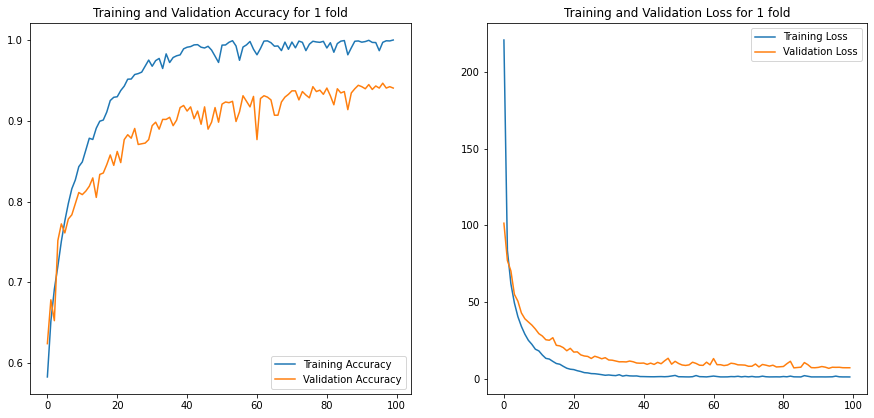

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

      NORMAL       0.94      0.94      0.94      1125
       COVID       0.96      0.96      0.96      1780

    accuracy                           0.95      2905
   macro avg       0.95      0.95      0.95      2905
weighted avg       0.95      0.95      0.95      2905

Training for fold 2 ...
Epoch 1/100
105/105 [==============================] - 19s 171ms/step - loss: 199.9976 - accuracy: 0.5634 - val_loss: 92.7435 - val_accuracy: 0.6224
Epoch 2/100
105/105 [==============================] - 18s 170ms/step - loss: 79.7062 - accuracy: 0.6586 - val_loss: 70.6987 - val_accuracy: 0.6629
Epoch 3/100
105/105 [==============================] - 18s 170ms/step - loss: 58.2152 - accuracy: 0.6932 - val_loss: 53.0924 - val_accuracy: 0.7155
Epoch 4/100
105/105 [==============================] - 18s 169ms/step - loss: 45.1800 - accuracy: 0.7309 - val_loss: 43.2595 - val_accuracy: 0.7336
Epoch 5/100
105/105 [==============================] - 1

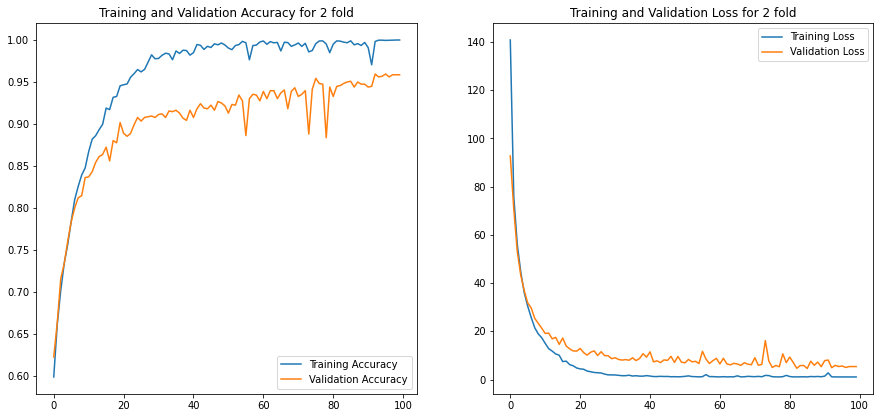

              precision    recall  f1-score   support

      NORMAL       0.95      0.92      0.94      1125
       COVID       0.95      0.97      0.96      1780

    accuracy                           0.95      2905
   macro avg       0.95      0.95      0.95      2905
weighted avg       0.95      0.95      0.95      2905

Training for fold 3 ...
Epoch 1/100
105/105 [==============================] - 19s 171ms/step - loss: 158.1789 - accuracy: 0.5495 - val_loss: 67.7886 - val_accuracy: 0.6362
Epoch 2/100
105/105 [==============================] - 18s 170ms/step - loss: 61.7008 - accuracy: 0.6310 - val_loss: 51.5275 - val_accuracy: 0.6897
Epoch 3/100
105/105 [==============================] - 18s 170ms/step - loss: 44.0985 - accuracy: 0.6915 - val_loss: 41.4070 - val_accuracy: 0.7026
Epoch 4/100
105/105 [==============================] - 18s 170ms/step - loss: 36.5295 - accuracy: 0.7088 - val_loss: 34.4284 - val_accuracy: 0.7259
Epoch 5/100
105/105 [==============================] - 1

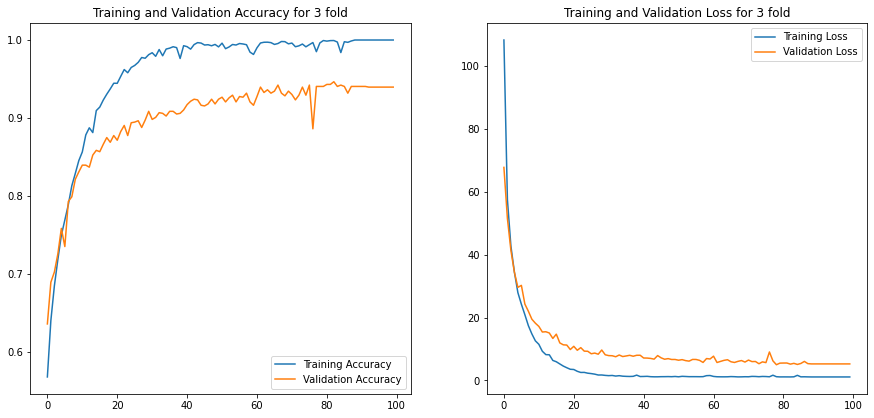

              precision    recall  f1-score   support

      NORMAL       0.94      0.91      0.92      1125
       COVID       0.94      0.96      0.95      1780

    accuracy                           0.94      2905
   macro avg       0.94      0.93      0.94      2905
weighted avg       0.94      0.94      0.94      2905

Training for fold 4 ...
Epoch 1/100
105/105 [==============================] - 19s 171ms/step - loss: 213.2003 - accuracy: 0.5648 - val_loss: 114.6514 - val_accuracy: 0.5828
Epoch 2/100
105/105 [==============================] - 18s 170ms/step - loss: 85.1957 - accuracy: 0.6518 - val_loss: 72.9030 - val_accuracy: 0.6578
Epoch 3/100
105/105 [==============================] - 18s 170ms/step - loss: 61.8026 - accuracy: 0.6956 - val_loss: 56.3914 - val_accuracy: 0.7276
Epoch 4/100
105/105 [==============================] - 18s 170ms/step - loss: 46.2057 - accuracy: 0.7268 - val_loss: 48.6676 - val_accuracy: 0.7509
Epoch 5/100
105/105 [==============================] - 

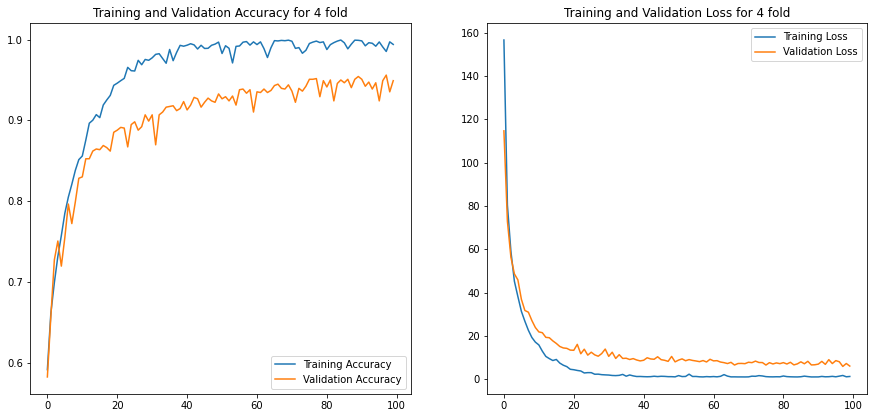

              precision    recall  f1-score   support

      NORMAL       0.93      0.95      0.94      1125
       COVID       0.97      0.95      0.96      1780

    accuracy                           0.95      2905
   macro avg       0.95      0.95      0.95      2905
weighted avg       0.95      0.95      0.95      2905

Training for fold 5 ...
Epoch 1/100
105/105 [==============================] - 19s 171ms/step - loss: 132.8990 - accuracy: 0.5606 - val_loss: 62.3229 - val_accuracy: 0.6267
Epoch 2/100
105/105 [==============================] - 18s 170ms/step - loss: 56.8922 - accuracy: 0.6541 - val_loss: 44.0198 - val_accuracy: 0.6698
Epoch 3/100
105/105 [==============================] - 18s 170ms/step - loss: 40.4941 - accuracy: 0.6940 - val_loss: 36.5826 - val_accuracy: 0.6845
Epoch 4/100
105/105 [==============================] - 18s 169ms/step - loss: 33.5062 - accuracy: 0.7240 - val_loss: 30.5474 - val_accuracy: 0.7319
Epoch 5/100
105/105 [==============================] - 1

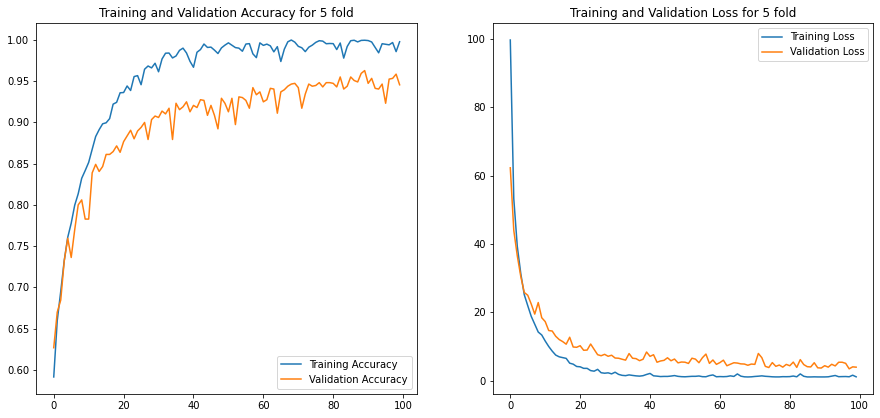

              precision    recall  f1-score   support

      NORMAL       0.91      0.96      0.93      1125
       COVID       0.97      0.94      0.96      1780

    accuracy                           0.95      2905
   macro avg       0.94      0.95      0.94      2905
weighted avg       0.95      0.95      0.95      2905

Training for fold 6 ...
Epoch 1/100
105/105 [==============================] - 19s 171ms/step - loss: 216.4002 - accuracy: 0.5621 - val_loss: 120.0782 - val_accuracy: 0.6103
Epoch 2/100
105/105 [==============================] - 18s 169ms/step - loss: 104.0720 - accuracy: 0.6378 - val_loss: 94.9330 - val_accuracy: 0.6810
Epoch 3/100
105/105 [==============================] - 18s 170ms/step - loss: 72.1002 - accuracy: 0.6958 - val_loss: 70.8333 - val_accuracy: 0.6905
Epoch 4/100
105/105 [==============================] - 18s 169ms/step - loss: 59.4872 - accuracy: 0.7234 - val_loss: 57.1217 - val_accuracy: 0.7147
Epoch 5/100
105/105 [==============================] -

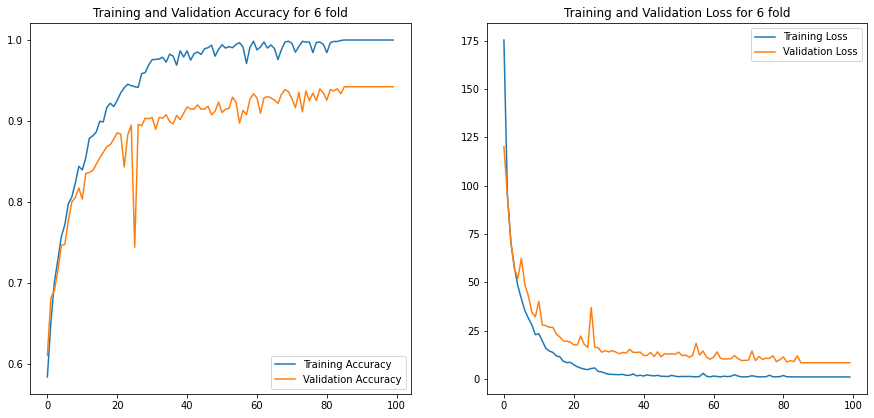

              precision    recall  f1-score   support

      NORMAL       0.94      0.92      0.93      1125
       COVID       0.95      0.96      0.96      1780

    accuracy                           0.94      2905
   macro avg       0.94      0.94      0.94      2905
weighted avg       0.94      0.94      0.94      2905

Training for fold 7 ...
Epoch 1/100
105/105 [==============================] - 19s 171ms/step - loss: 194.2820 - accuracy: 0.5344 - val_loss: 94.1962 - val_accuracy: 0.5983
Epoch 2/100
105/105 [==============================] - 18s 170ms/step - loss: 83.1663 - accuracy: 0.6546 - val_loss: 71.9676 - val_accuracy: 0.6802
Epoch 3/100
105/105 [==============================] - 18s 170ms/step - loss: 60.7969 - accuracy: 0.6971 - val_loss: 60.0281 - val_accuracy: 0.6690
Epoch 4/100
105/105 [==============================] - 18s 170ms/step - loss: 52.0372 - accuracy: 0.7192 - val_loss: 49.3662 - val_accuracy: 0.7034
Epoch 5/100
105/105 [==============================] - 1

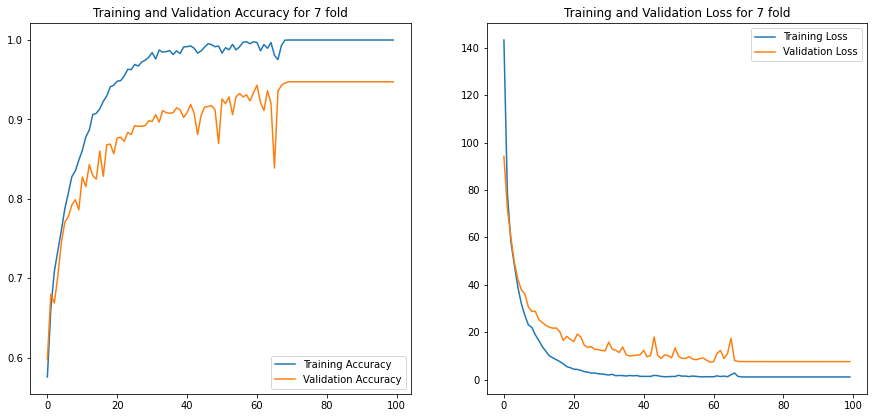

              precision    recall  f1-score   support

      NORMAL       0.96      0.90      0.93      1125
       COVID       0.94      0.98      0.96      1780

    accuracy                           0.95      2905
   macro avg       0.95      0.94      0.94      2905
weighted avg       0.95      0.95      0.95      2905

Training for fold 8 ...
Epoch 1/100
105/105 [==============================] - 21s 192ms/step - loss: 160.7942 - accuracy: 0.5642 - val_loss: 99.8329 - val_accuracy: 0.5910
Epoch 2/100
105/105 [==============================] - 18s 170ms/step - loss: 88.9667 - accuracy: 0.6468 - val_loss: 71.3220 - val_accuracy: 0.6626
Epoch 3/100
105/105 [==============================] - 18s 170ms/step - loss: 65.9496 - accuracy: 0.6984 - val_loss: 57.4914 - val_accuracy: 0.6747
Epoch 4/100
105/105 [==============================] - 18s 170ms/step - loss: 51.1598 - accuracy: 0.7266 - val_loss: 54.8518 - val_accuracy: 0.7558
Epoch 5/100
105/105 [==============================] - 1

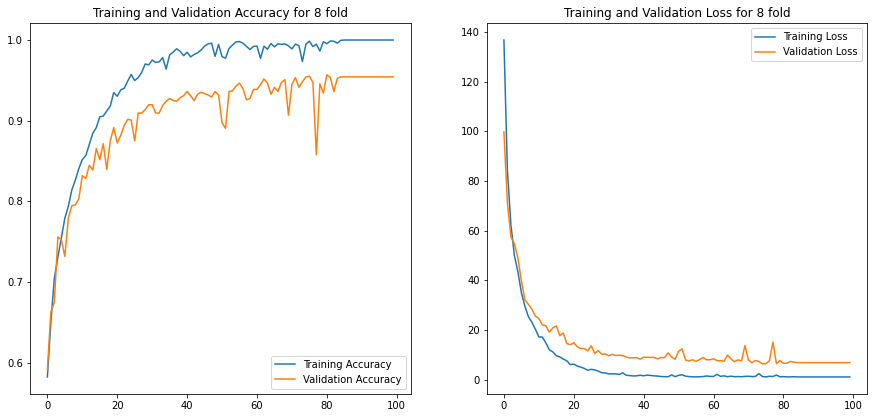

              precision    recall  f1-score   support

      NORMAL       0.94      0.92      0.93      1125
       COVID       0.95      0.96      0.96      1780

    accuracy                           0.95      2905
   macro avg       0.94      0.94      0.94      2905
weighted avg       0.95      0.95      0.95      2905

Training for fold 9 ...
Epoch 1/100
105/105 [==============================] - 19s 171ms/step - loss: 243.7311 - accuracy: 0.5386 - val_loss: 98.4251 - val_accuracy: 0.6169
Epoch 2/100
105/105 [==============================] - 18s 170ms/step - loss: 99.9279 - accuracy: 0.6273 - val_loss: 67.0870 - val_accuracy: 0.6859
Epoch 3/100
105/105 [==============================] - 18s 170ms/step - loss: 67.3493 - accuracy: 0.7046 - val_loss: 50.4579 - val_accuracy: 0.7118
Epoch 4/100
105/105 [==============================] - 18s 170ms/step - loss: 54.3886 - accuracy: 0.7432 - val_loss: 49.0255 - val_accuracy: 0.7135
Epoch 5/100
105/105 [==============================] - 1

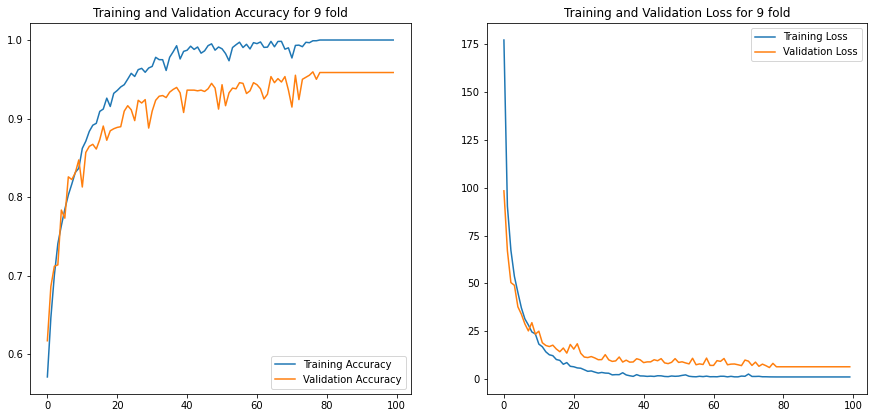

              precision    recall  f1-score   support

      NORMAL       0.96      0.91      0.93      1125
       COVID       0.94      0.98      0.96      1780

    accuracy                           0.95      2905
   macro avg       0.95      0.94      0.95      2905
weighted avg       0.95      0.95      0.95      2905

Training for fold 10 ...
Epoch 1/100
105/105 [==============================] - 19s 171ms/step - loss: 225.8632 - accuracy: 0.5423 - val_loss: 123.3282 - val_accuracy: 0.6178
Epoch 2/100
105/105 [==============================] - 18s 170ms/step - loss: 105.7188 - accuracy: 0.6465 - val_loss: 87.7482 - val_accuracy: 0.6730
Epoch 3/100
105/105 [==============================] - 18s 170ms/step - loss: 74.4400 - accuracy: 0.6946 - val_loss: 73.0893 - val_accuracy: 0.6833
Epoch 4/100
105/105 [==============================] - 18s 169ms/step - loss: 60.0850 - accuracy: 0.7333 - val_loss: 64.2723 - val_accuracy: 0.7489
Epoch 5/100
105/105 [==============================] 

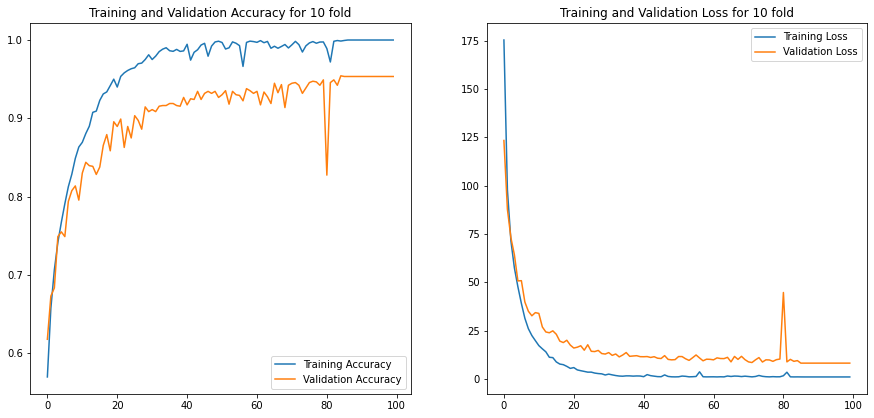

              precision    recall  f1-score   support

      NORMAL       0.95      0.92      0.93      1125
       COVID       0.95      0.97      0.96      1780

    accuracy                           0.95      2905
   macro avg       0.95      0.95      0.95      2905
weighted avg       0.95      0.95      0.95      2905



10 Fold's Score 

  Fold 1 - Loss: 5.987587928771973 - Accuracy: 95.18072009086609%

  Fold 2 - Loss: 6.079774856567383 - Accuracy: 95.3184187412262%

  Fold 3 - Loss: 5.187719345092773 - Accuracy: 94.07917261123657%

  Fold 4 - Loss: 5.998043537139893 - Accuracy: 95.07745504379272%

  Fold 5 - Loss: 4.499239444732666 - Accuracy: 94.66437101364136%

  Fold 6 - Loss: 7.991579532623291 - Accuracy: 94.45782899856567%

  Fold 7 - Loss: 7.488917827606201 - Accuracy: 94.62994933128357%

  Fold 8 - Loss: 7.079793930053711 - Accuracy: 94.52667832374573%

  Fold 9 - Loss: 8.017985343933105 - Accuracy: 95.07745504379272%

  Fold 10 - Loss: 8.752389907836914 - Accuracy: 95.

In [ ]:
precisionnormal,recallnormal,f1scorenormal,supportnormal,precisioncovid,recallcovid,f1scorecovid,supportcovid,f1scoreaccuracy,supportaccuracy,precisionmacroavg,recallmacroavg,f1scoremacroavg,supportmacroavg,precisionweightavg,recallweightavg,f1scoreweightavg,supportweightavg=[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
Accuracy = []
Losses = []
Folds = KFold(n_splits=10, shuffle=True)
inputs = np.concatenate((x_train, x_val), axis=0)
targets = np.concatenate((y_train, y_val), axis=0)
CountFold = 1
for train, test in Folds.split(inputs, targets):

    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001), input_shape=(224, 224,1)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', kernel_regularizer=l2(0.001)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', kernel_regularizer=l2(0.001)))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer = Adam(lr=0.000001) , loss = SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

    print(f'Training for fold {CountFold} ...')
    epochs=100
    history = model.fit(inputs[train], targets[train],validation_data = (inputs[test], targets[test]),batch_size=100,epochs=100,verbose=1)
    scores = model.evaluate(x_test, y_test, verbose=0)
    print(f'Score for fold {CountFold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    Accuracy.append(scores[1] * 100)
    Losses.append(scores[0])
    CountFold = CountFold + 1
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(100)                        #CHANGE value as per the epochs

    plt.figure(figsize=(15, 15))
    plt.subplot(2, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy for {} fold'.format(CountFold-1,))

    plt.subplot(2, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss for {} fold'.format(CountFold-1,))
    plt.show()

    predictions = model.predict_classes(x_test)
    predictions = predictions.reshape(1,-1)[0]
    print(classification_report(y_test, predictions,target_names = ['NORMAL','COVID']))
    confusions=classification_report(y_test, predictions,target_names = ['NORMAL','COVID'])
    
    precisionnormal.append(confusions[74:78])
    recallnormal.append(confusions[84:88])
    f1scorenormal.append(confusions[94:98])
    supportnormal.append(confusions[104:108])

    precisioncovid.append(confusions[128:132])
    recallcovid.append(confusions[138:142])
    f1scorecovid.append(confusions[148:152])
    supportcovid.append(confusions[158:162])

    f1scoreaccuracy.append(confusions[203:207])
    supportaccuracy.append(confusions[213:217])

    precisionmacroavg.append(confusions[237:241])
    recallmacroavg.append(confusions[247:251])
    f1scoremacroavg.append(confusions[257:261])
    supportmacroavg.append(confusions[267:271])

    precisionweightavg.append(confusions[291:295])
    recallweightavg.append(confusions[301:305])
    f1scoreweightavg.append(confusions[311:315])
    supportweightavg.append(confusions[321:325])
print()
print()
print(CountFold-1, "Fold's Score ")
for i in range(0, len(Accuracy)):
  print()
  print(f'  Fold {i+1} - Loss: {Losses[i]} - Accuracy: {Accuracy[i]}%')
print()
print()
print('Average scores for all folds:')
print(f'  Accuracy: {np.mean(Accuracy)} (+- {np.std(Accuracy)})')
print(f'  Loss: {np.mean(Losses)}')
print()
print()
avgconfusion = list(confusions)

precisionnormal =round(np.mean(np.array(precisionnormal,dtype=float)),2)
recallnormal =round(np.mean(np.array(recallnormal,dtype=float)),2)
f1scorenormal =round(np.mean(np.array(f1scorenormal,dtype=float)),2)
supportnormal =round(np.mean(np.array(supportnormal,dtype=float)))

precisioncovid =round(np.mean(np.array(precisioncovid,dtype=float)),2)
recallcovid =round(np.mean(np.array(recallcovid,dtype=float)),2)
f1scorecovid =round(np.mean(np.array(f1scorecovid,dtype=float)),2)
supportcovid =round(np.mean(np.array(supportcovid,dtype=float)))

f1scoreaccuracy =round(np.mean(np.array(f1scoreaccuracy,dtype=float)),2)
supportaccuracy =round(np.mean(np.array(supportaccuracy,dtype=float)))

precisionmacroavg =round(np.mean(np.array(precisionmacroavg,dtype=float)),2)
recallmacroavg =round(np.mean(np.array(recallmacroavg,dtype=float)),2)
f1scoremacroavg =round(np.mean(np.array(f1scoremacroavg,dtype=float)),2)
supportmacroavg =round(np.mean(np.array(supportmacroavg,dtype=float)))

precisionweightavg =round(np.mean(np.array(precisionweightavg,dtype=float)),2)
recallweightavg =round(np.mean(np.array(recallweightavg,dtype=float)),2)
f1scoreweightavg =round(np.mean(np.array(f1scoreweightavg,dtype=float)),2)
supportweightavg =round(np.mean(np.array(supportweightavg,dtype=float)))

avgconfusion[74:78]= str(precisionnormal)
avgconfusion[84:88]=str(recallnormal)
avgconfusion[94:98]=str(f1scorenormal)
avgconfusion[104:108]=str(supportnormal)

avgconfusion[128:132]= str(precisioncovid)
avgconfusion[138:142]=str(recallcovid)
avgconfusion[148:152]=str(f1scorecovid)
avgconfusion[158:162]=str(supportcovid)

avgconfusion[203:207]=str(f1scoreaccuracy)
avgconfusion[213:217]=str(supportaccuracy)

avgconfusion[237:241]=str(precisionmacroavg)
avgconfusion[247:251]=str(recallmacroavg)
avgconfusion[257:261]=str(f1scoremacroavg)
avgconfusion[267:271]=str(supportmacroavg)

avgconfusion[291:295]=str(precisionweightavg)
avgconfusion[301:305]=str(recallweightavg)
avgconfusion[311:315]=str(f1scoreweightavg)
avgconfusion[321:325]=str(supportweightavg)


print("Average Classification Report for " , CountFold-1," folds is :")
# print(''.join(avgconfusion))
print(confusions[0:74]+ str(precisionnormal)+confusions[78:84]+str(recallnormal)+confusions[88:94]+str(f1scorenormal)+confusions[98:104]+str(supportnormal)+
      confusions[108:126]+'  '+ str(precisioncovid) +confusions[132:136]+'  '+str(recallcovid) +confusions[142:146]+'  '+str(f1scorecovid) +confusions[152:156]+'  '+str(supportcovid)+
      confusions[162:203]+str(f1scoreaccuracy)+confusions[207:213]+str(supportaccuracy)+
      confusions[217:237]+str(precisionmacroavg)+confusions[241:247]+str(recallmacroavg)+confusions[251:257]+str(f1scoremacroavg)+confusions[261:267]+str(supportmacroavg)+
      confusions[271:291]+str(precisionweightavg)+confusions[295:301]+str(recallweightavg)+confusions[305:311]+str(f1scoreweightavg)+confusions[315:321]+str(supportweightavg)+
      confusions[325:])
    

#Pretrained Model

In [ ]:
def process_image(image):
    image = tf.convert_to_tensor(image, dtype=tf.uint8)
    image_rgb =  tf.cond(tf.rank(image) < 4,
                         lambda: tf.image.grayscale_to_rgb(tf.expand_dims(image, -1)),
                         lambda: tf.identity(image))
    # Add shape information
    s = image.shape
    image_rgb.set_shape(s)
    if s.ndims is not None and s.ndims < 4:
        image_rgb.set_shape(s.concatenate(3))
    return image_rgb

In [ ]:
def process_image(image):
    image = tf.convert_to_tensor(image, dtype=tf.uint8)
    image_rgb =  tf.cond(tf.rank(image) < 4,
                         lambda: tf.image.grayscale_to_rgb(tf.expand_dims(image, -1)),
                         lambda: tf.identity(image))
    
    return image_rgb


Loop to convert 3 channel

In [ ]:


imglist=[]
for i in train:
    a = tf.convert_to_tensor(i[0].reshape((*i[0].shape, 1)), dtype=tf.uint8)
    k = tf.image.grayscale_to_rgb(a)
    imglist.append(k)
imgtrainarray = np.array(imglist)



imglist=[]
for i in valid:
    a = tf.convert_to_tensor(i[0].reshape((*i[0].shape, 1)), dtype=tf.uint8)
    k = tf.image.grayscale_to_rgb(a)
    imglist.append(k)
imgvalarray = np.array(imglist)



imglist=[]
for i in test:
    a = tf.convert_to_tensor(i[0].reshape((*i[0].shape, 1)), dtype=tf.uint8)
    k = tf.image.grayscale_to_rgb(a)
    imglist.append(k)
imgtestarray = np.array(imglist)




In [ ]:
# len(imgarray)

In [ ]:
img = train[0][0] #.reshape(512, 512, 1)
a = tf.convert_to_tensor(img.reshape((*img.shape, 1)), dtype=tf.uint8)
k = tf.image.grayscale_to_rgb(a)

In [ ]:
k.shape

TensorShape([224, 224, 3])

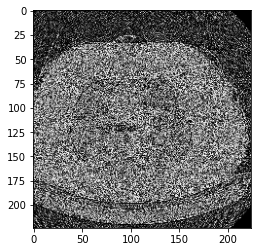

In [ ]:
plt.imshow(k.numpy() ) 

In [ ]:
# imglist = []
# for i in tqdm(train):
#     rgb = process_image(i[0])
#     imglist.append(rgb)    

    
    
    
    
    
    
#     input_tensor = Input(shape=(224,224,1) )
#     x = Conv2D(3,(3,3),padding='same')(input_tensor)   
#     out = resnet (x) 

#PreTrained

In [ ]:

from tensorflow.keras.applications import ResNet50 

from keras.models import Model
from keras.layers import Input 

resnet = ResNet50(weights='imagenet',include_top= 'TRUE') 

input_tensor = Input(shape=(224,224,1) )
x = Conv2D(3,(3,3),padding='same')(input_tensor)   
out = resnet (x) 

model = Model(inputs=input_tensor,outputs=out)




In [ ]:
import tensorflow
VGG19base_model  = tensorflow.keras.applications.VGG19(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

ResNetbase_model = tensorflow.keras.applications.ResNet50(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

VGG19base_model.trainable = False

model = Sequential([
                    
                    VGG19base_model,
                    GlobalAveragePooling2D(),
                    Dropout(0.2),
                    Dense(1, activation="softmax")
                    
                    ])


In [ ]:
base_learning_rate = 0.001
model.compile(
                    optimizer=   Adam(lr=base_learning_rate),
                    loss     =   BinaryCrossentropy(from_logits=True),
                    metrics  =   ['accuracy']                
            )

history = model.fit(imgtrainarray,y_train,epochs = 10 , validation_data = (imgvalarray, y_val))

Epoch 1/10
272/272 [==============================] - 405s 1s/step - loss: 1.7399 - accuracy: 0.6047 - val_loss: 0.6763 - val_accuracy: 0.6014
Epoch 2/10
272/272 [==============================] - 400s 1s/step - loss: 0.8609 - accuracy: 0.6127 - val_loss: 0.5704 - val_accuracy: 0.6014
Epoch 3/10
272/272 [==============================] - 404s 1s/step - loss: 0.6673 - accuracy: 0.6051 - val_loss: 0.5481 - val_accuracy: 0.6014
Epoch 4/10
272/272 [==============================] - 404s 1s/step - loss: 0.6187 - accuracy: 0.6010 - val_loss: 0.5390 - val_accuracy: 0.6014
Epoch 5/10
160/272 [================>.............] - ETA: 2:04 - loss: 0.5751 - accuracy: 0.6022

KeyboardInterrupt: ignored

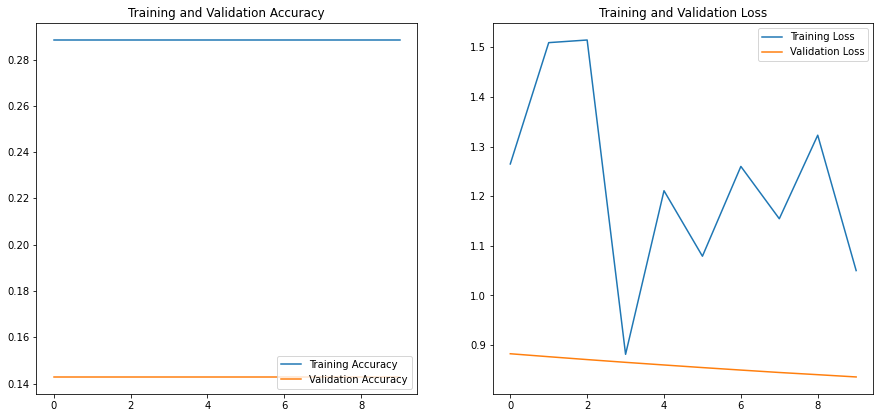

In [ ]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
predictions = model.predict_classes(imgtestarray)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_test, predictions, target_names = ['NORMAL','COVID']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00        50
       COVID       0.23      1.00      0.38        15

    accuracy                           0.23        65
   macro avg       0.12      0.50      0.19        65
weighted avg       0.05      0.23      0.09        65



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
